In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
import lightgbm as lgbm
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission.csv')


In [35]:
print(train.info())

print(train.describe())
train.apply(lambda x: x.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 342 entries, Id to SalePrice
dtypes: float64(6), int64(70), uint8(266)
memory usage: 1.2 MB
None
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.204057   10516.828082     6.099315   
std     421.610009    42.300571    22.049097    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    71.217937    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000

Id             0
MSSubClass     0
LotFrontage    0
LotArea        0
OverallQual    0
              ..
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
SalePrice      0
Length: 342, dtype: int64

In [13]:
categorical_vars= train.select_dtypes(include=['object']).columns
numerical_vars = test.select_dtypes(exclude=['object']).columns
#train[categorical_vars].describe().T


In [14]:
len(categorical_vars)

43

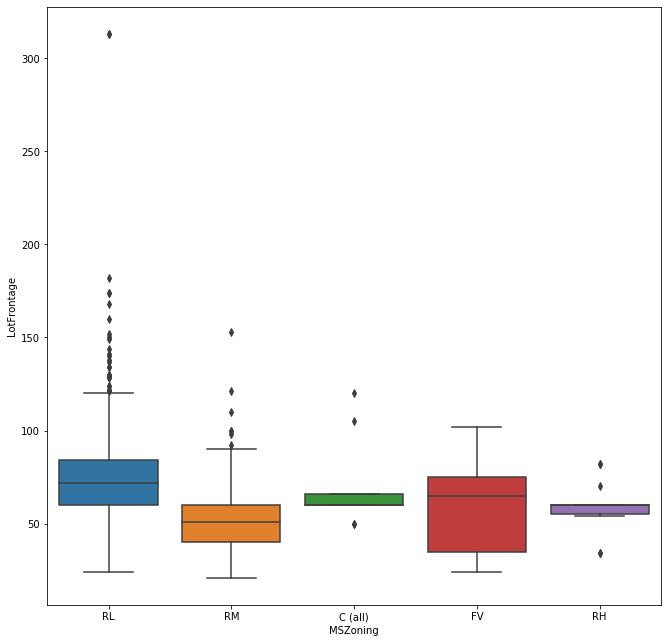

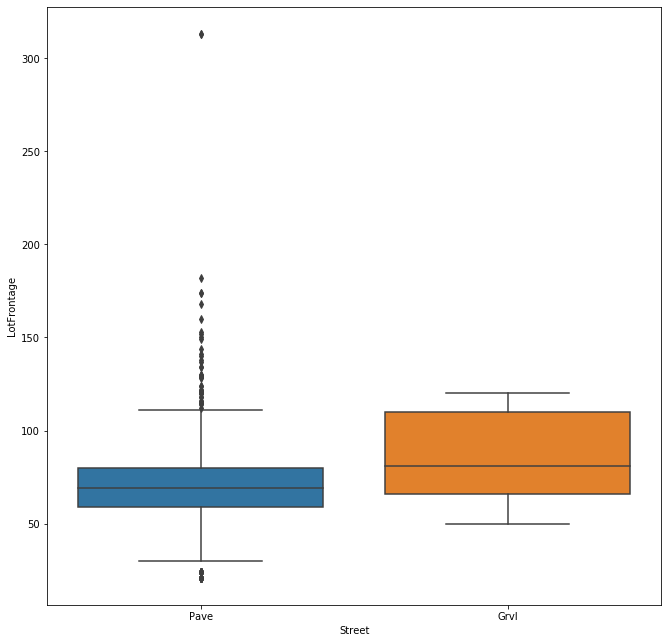

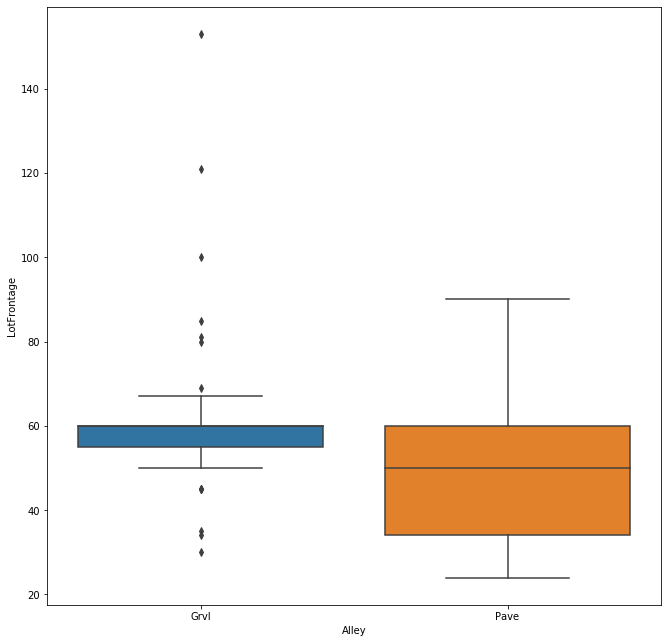

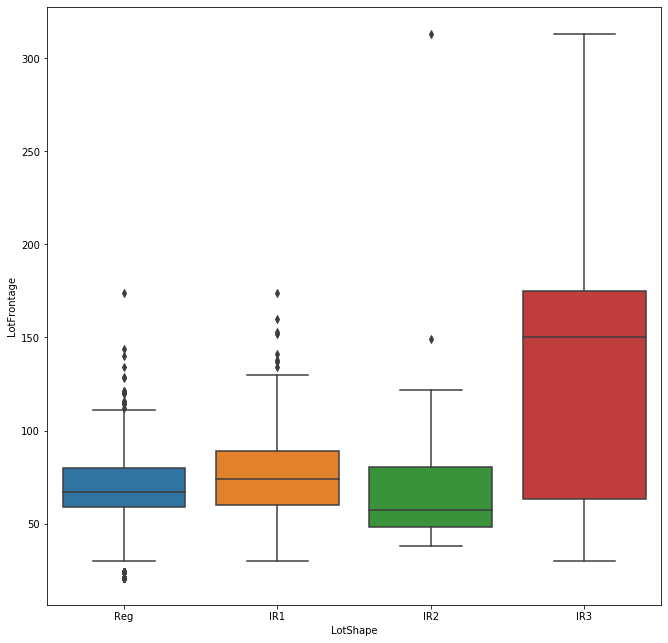

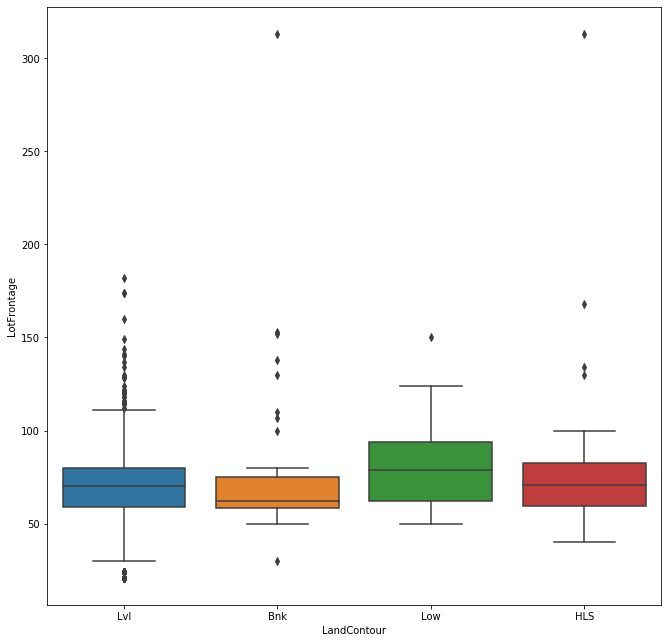

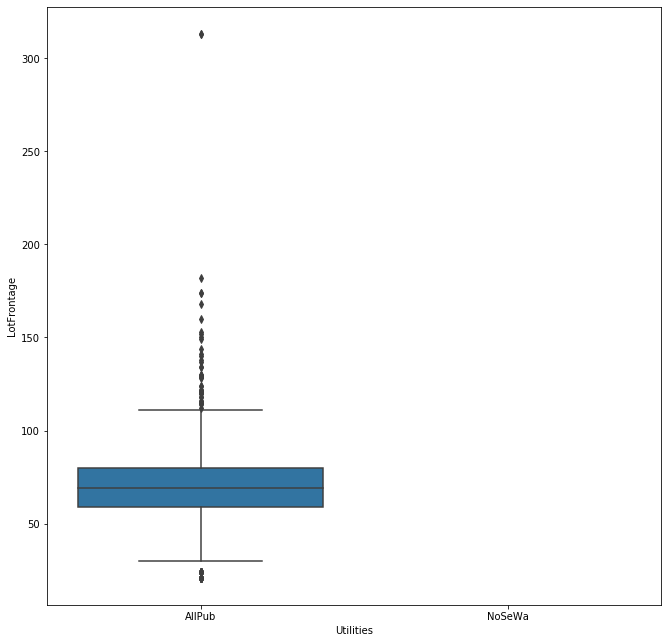

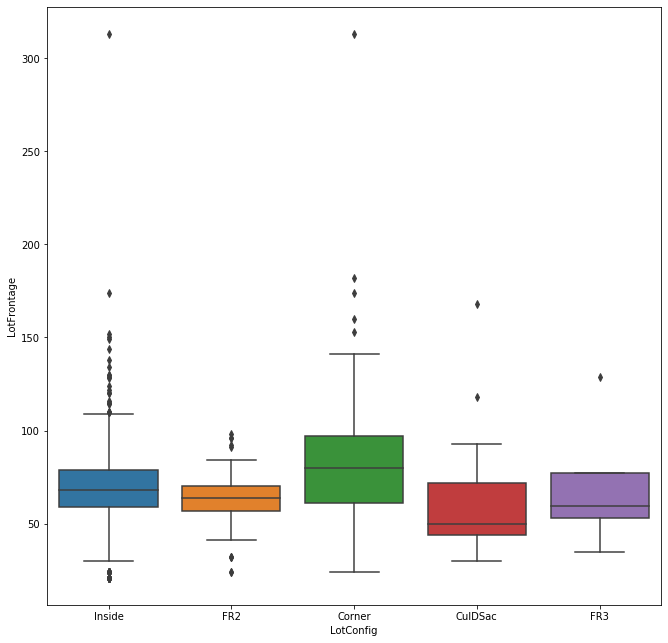

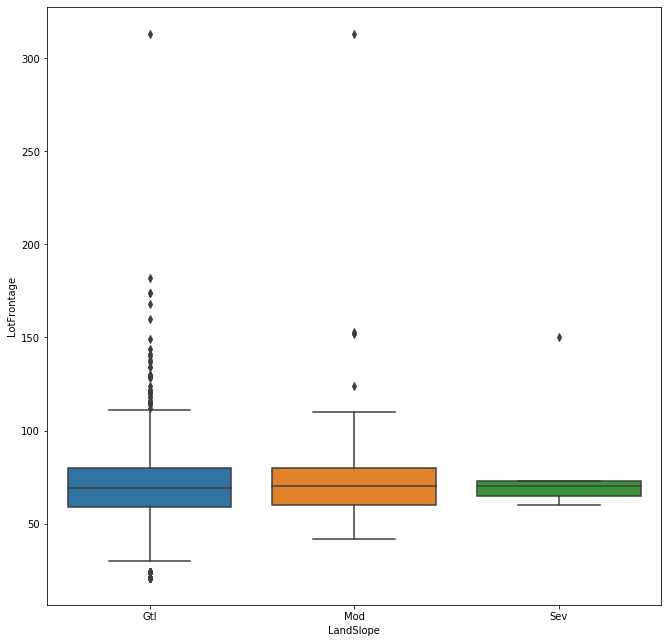

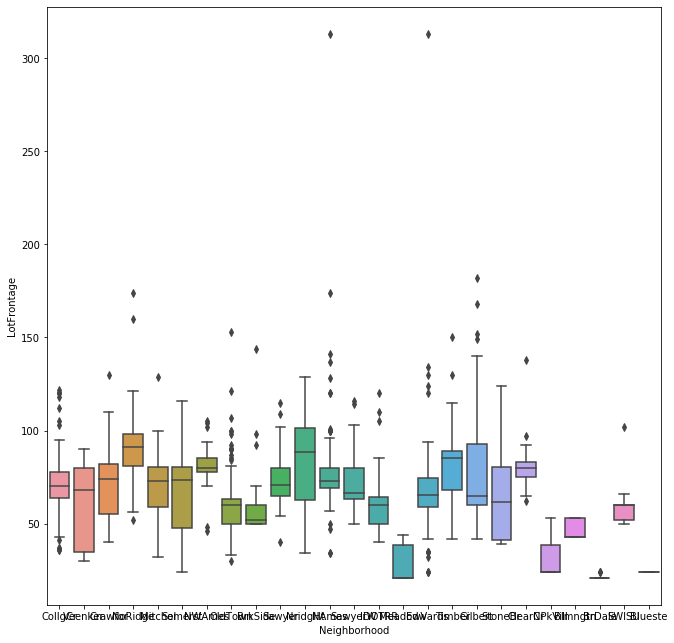

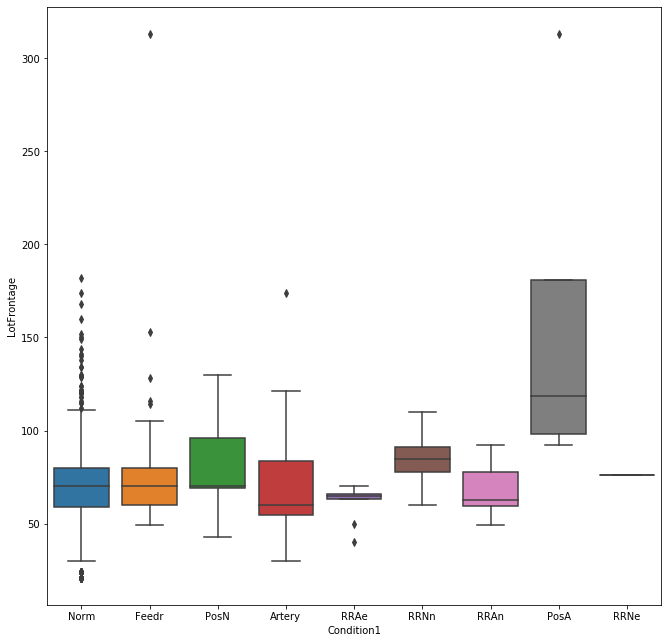

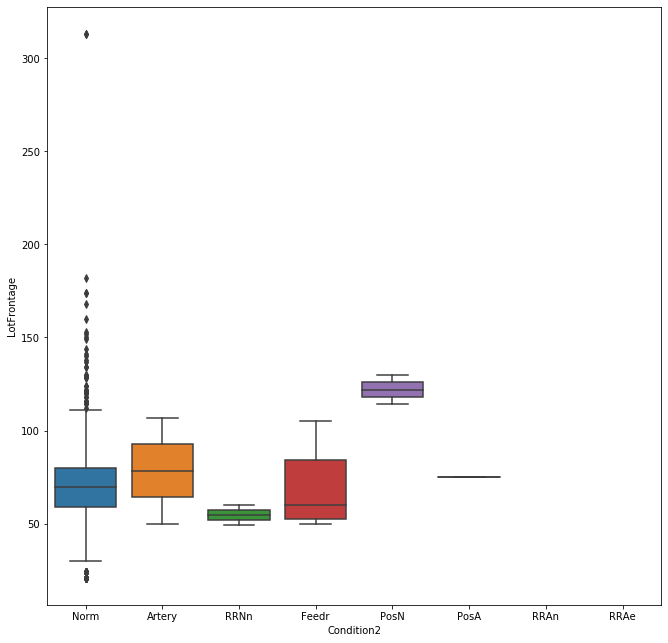

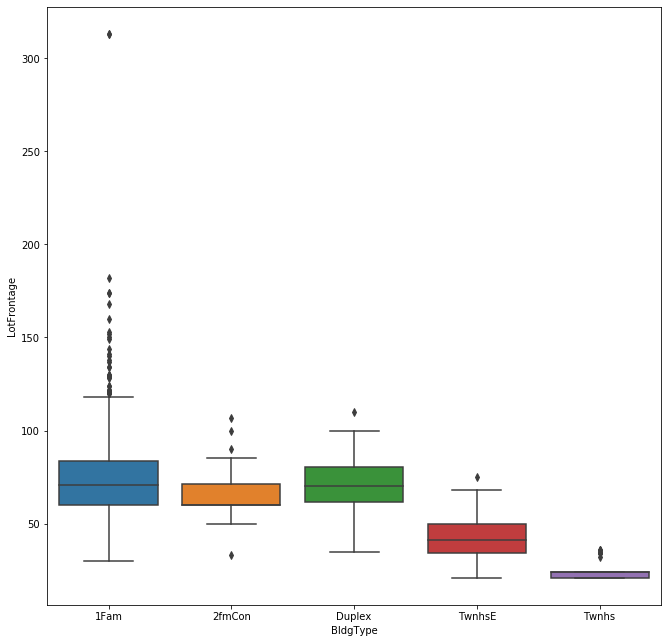

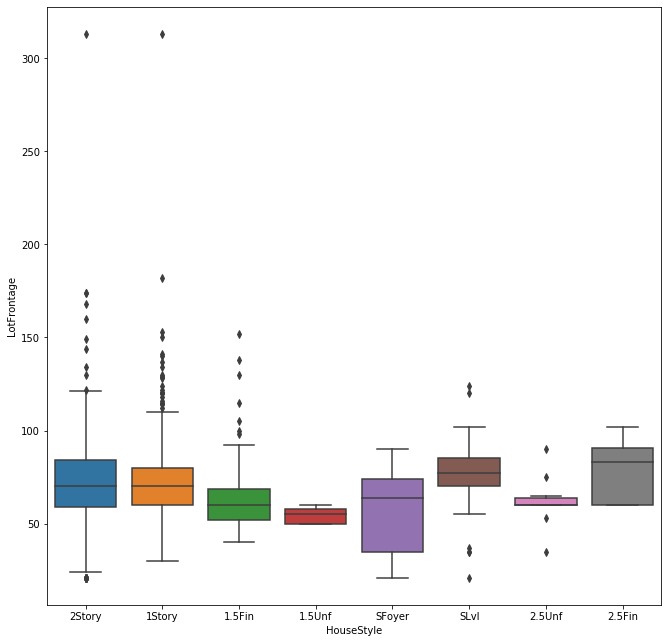

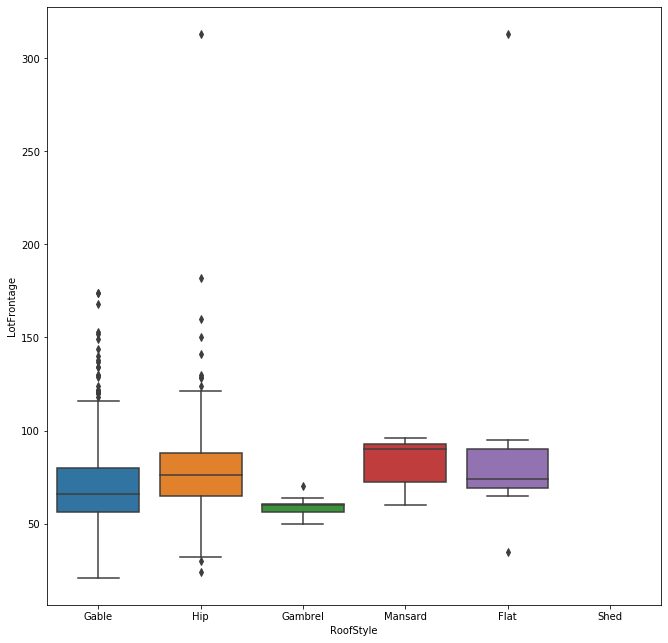

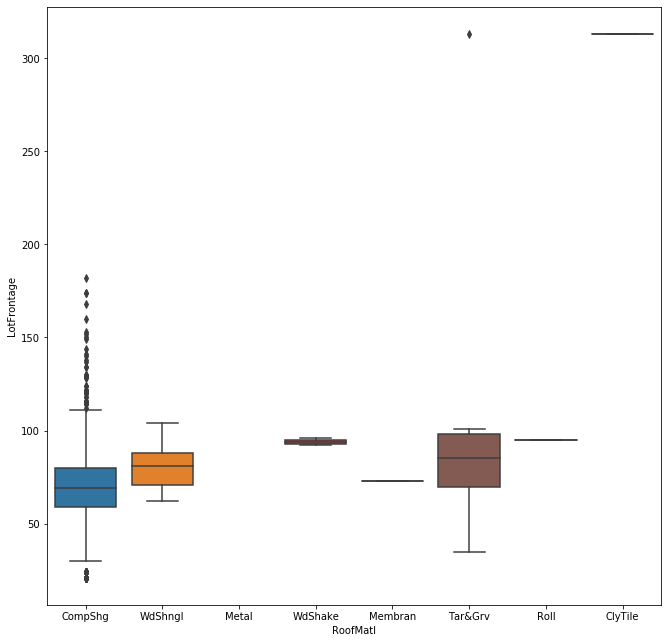

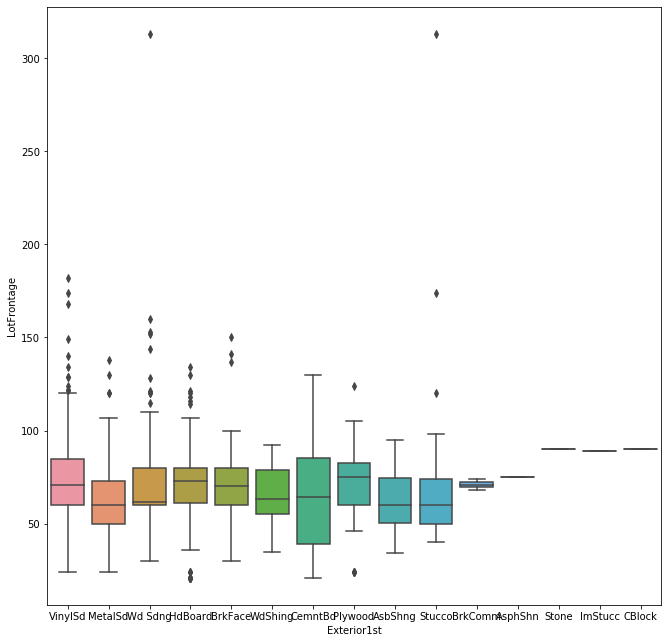

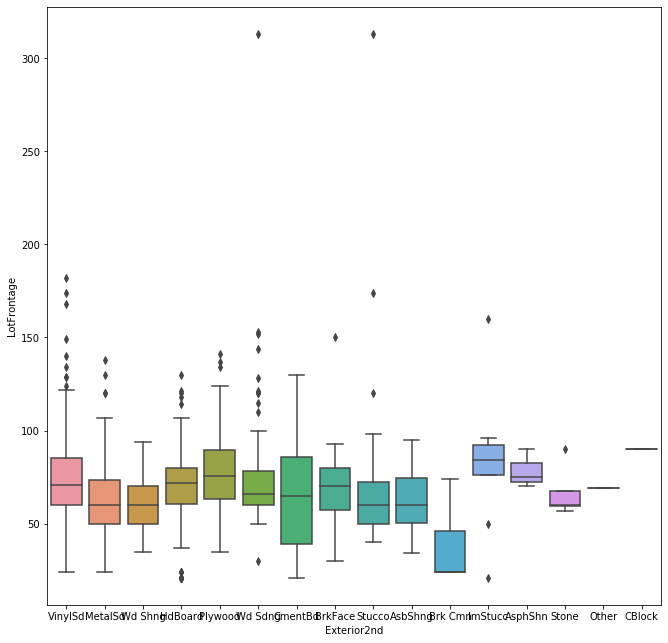

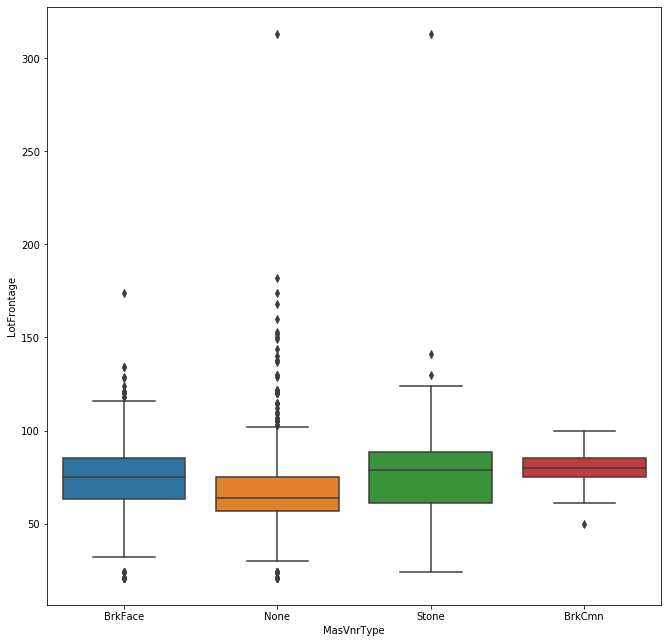

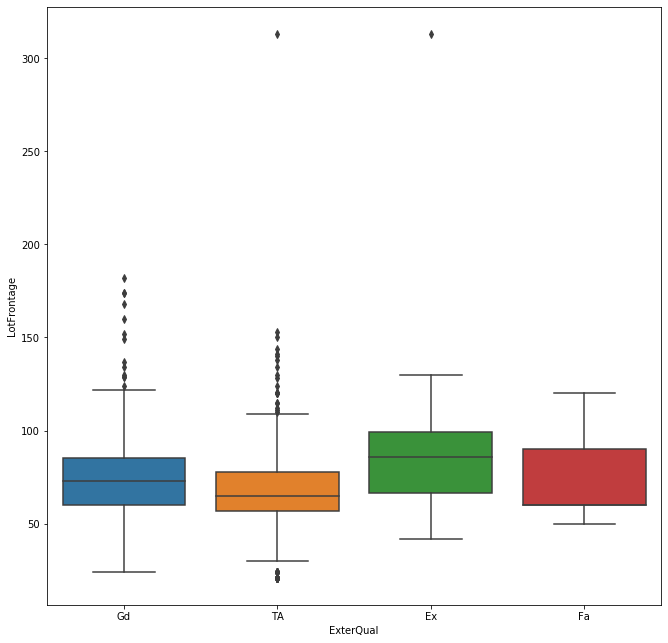

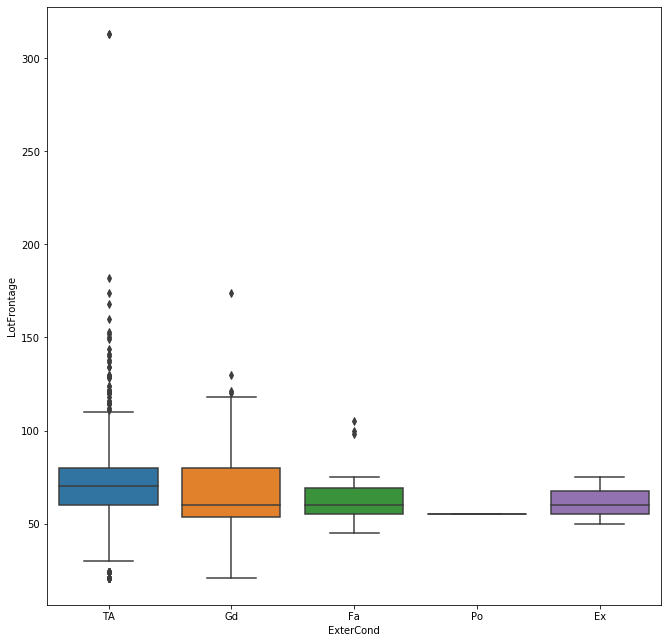

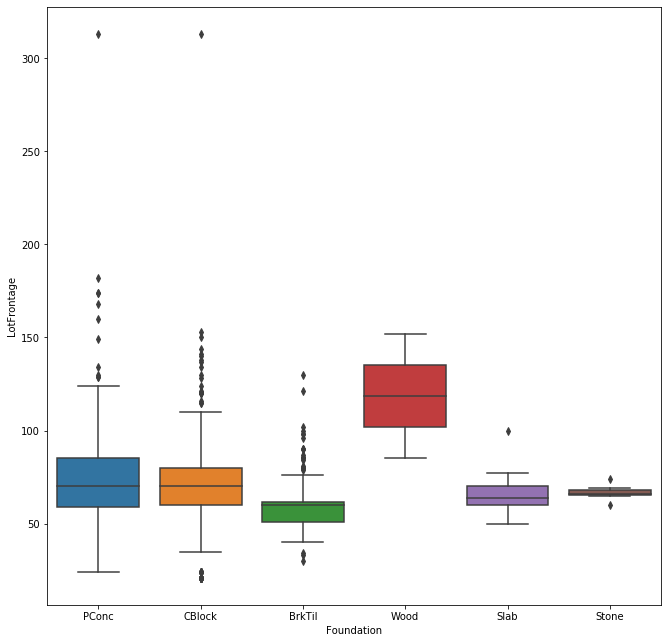

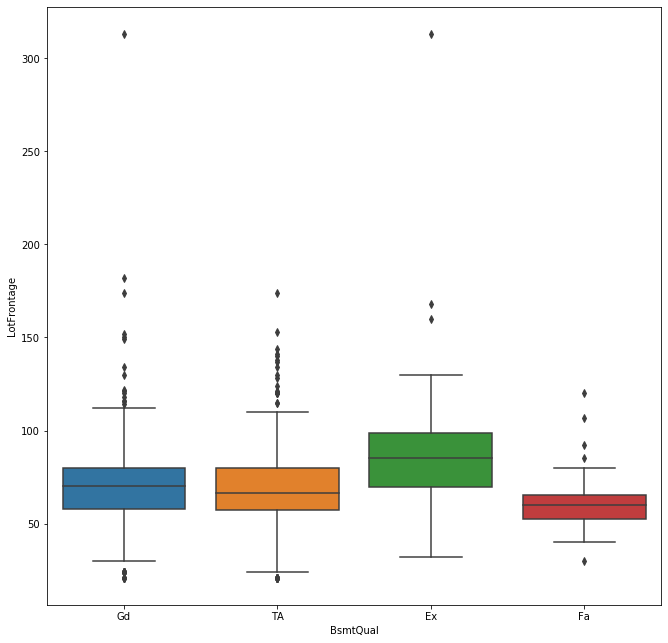

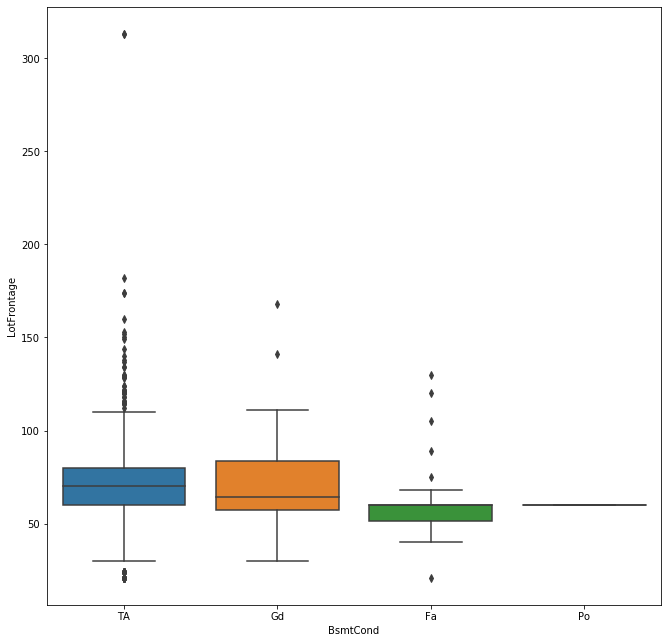

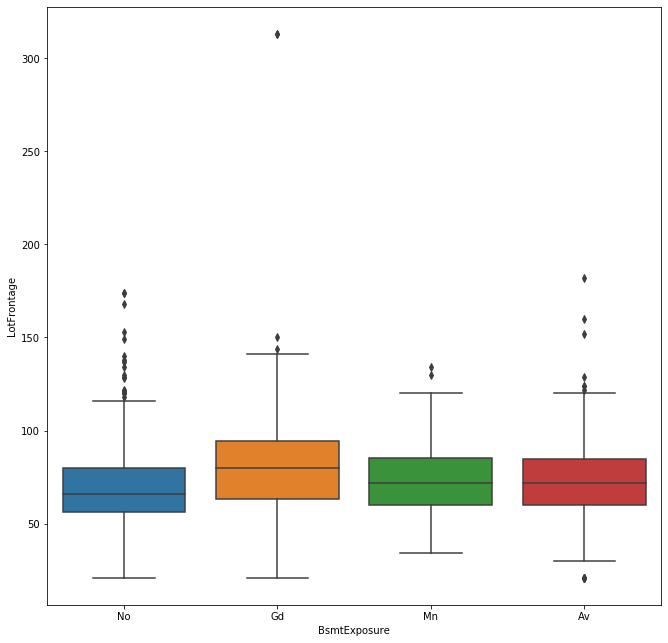

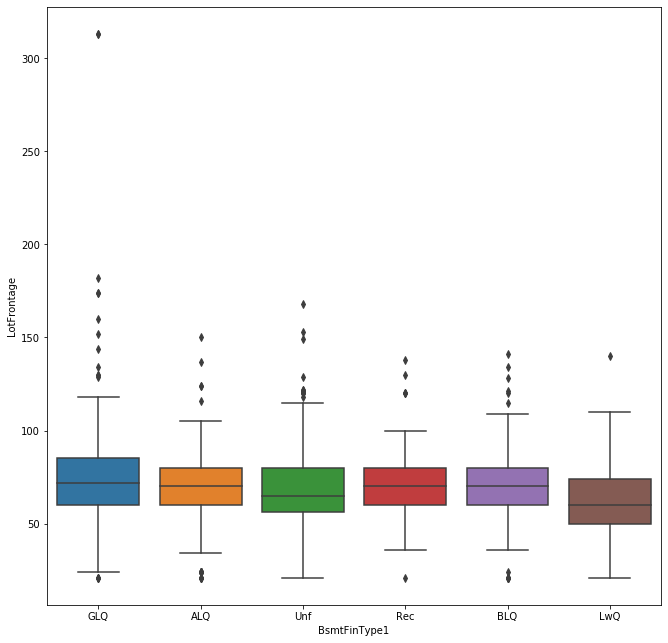

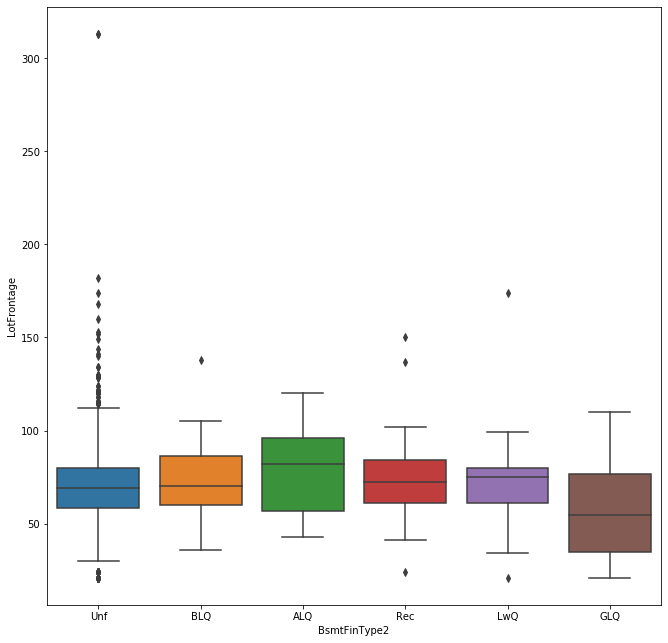

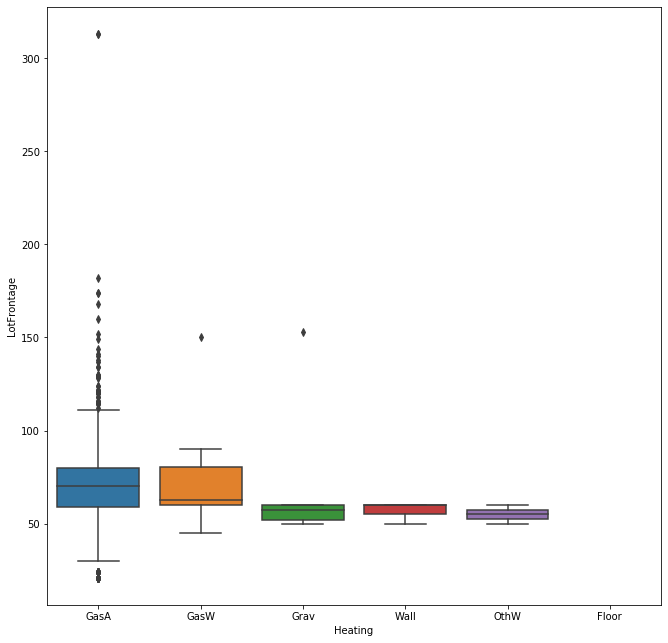

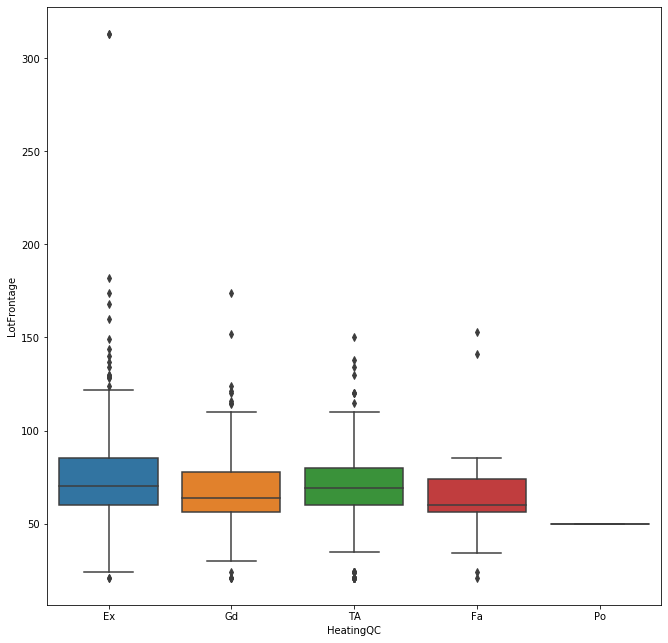

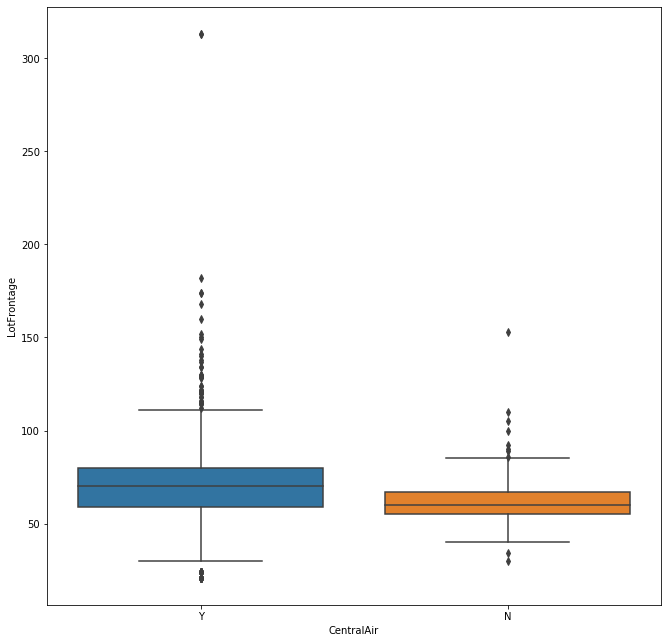

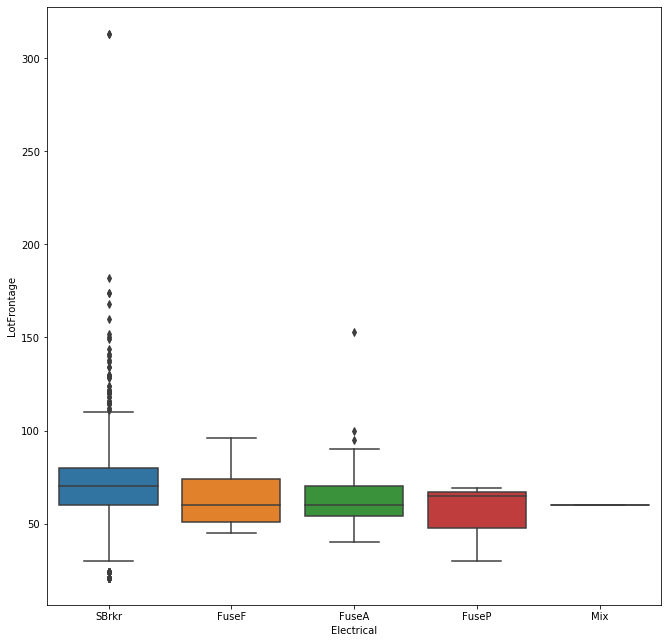

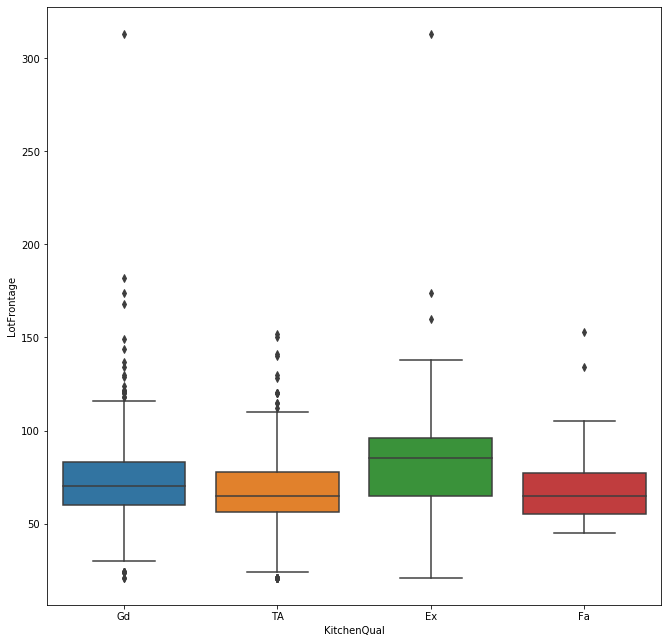

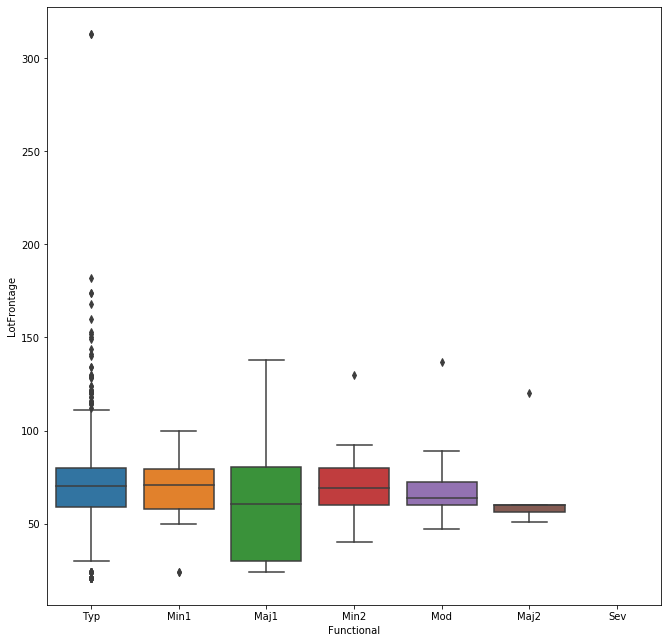

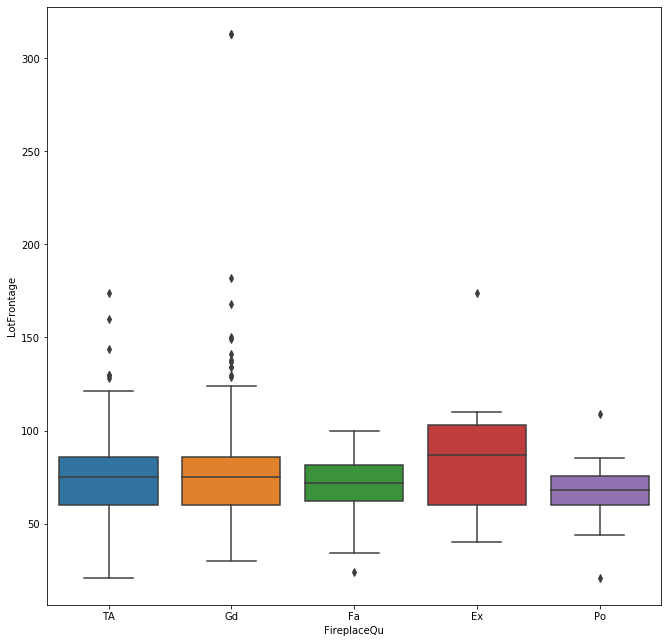

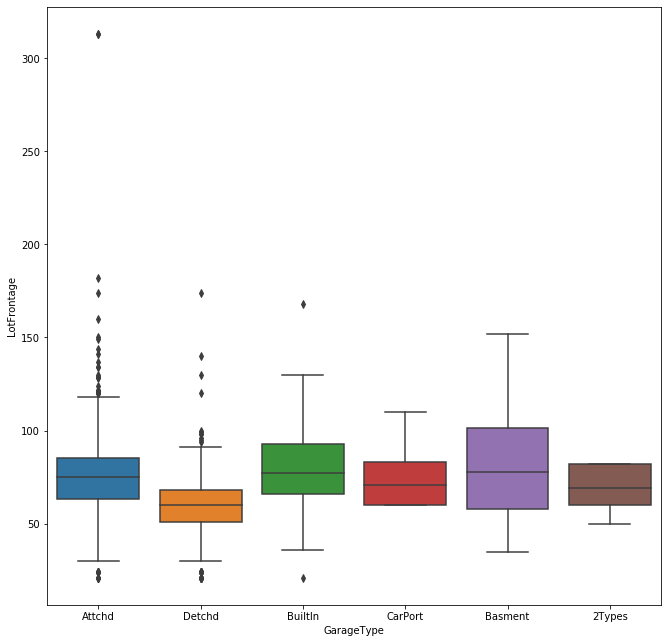

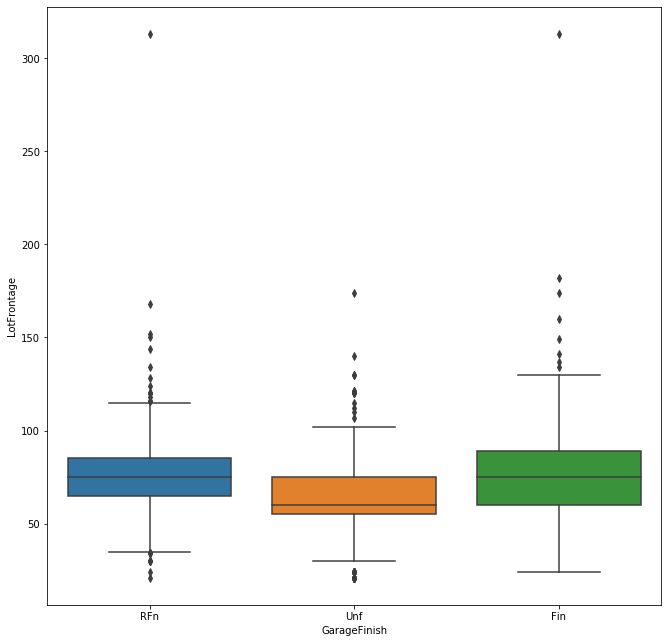

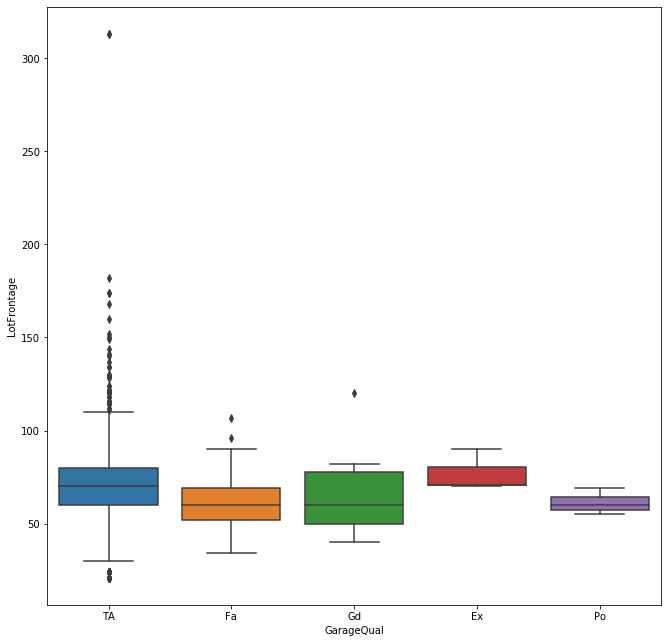

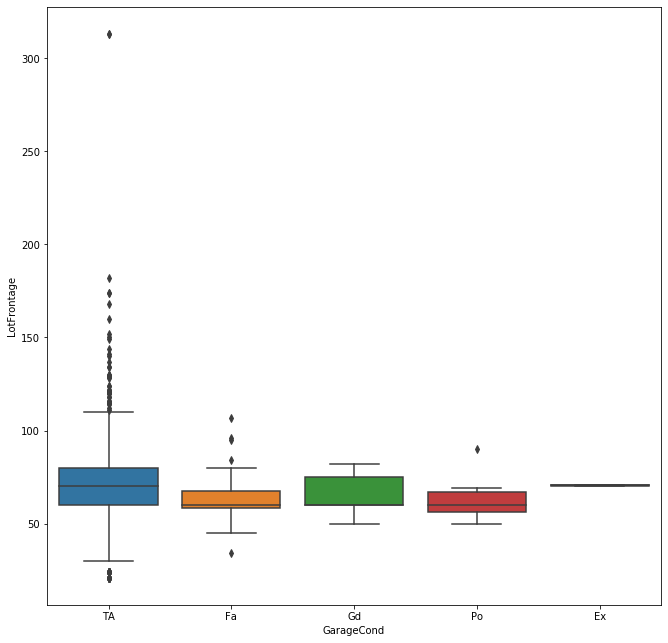

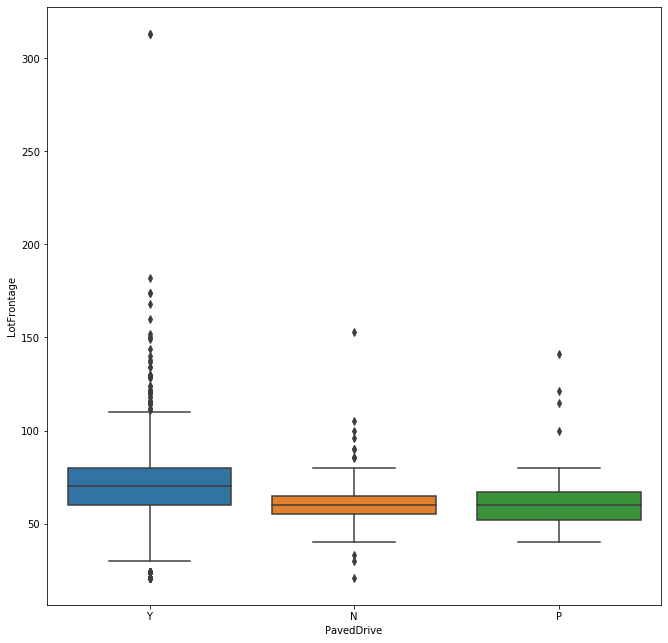

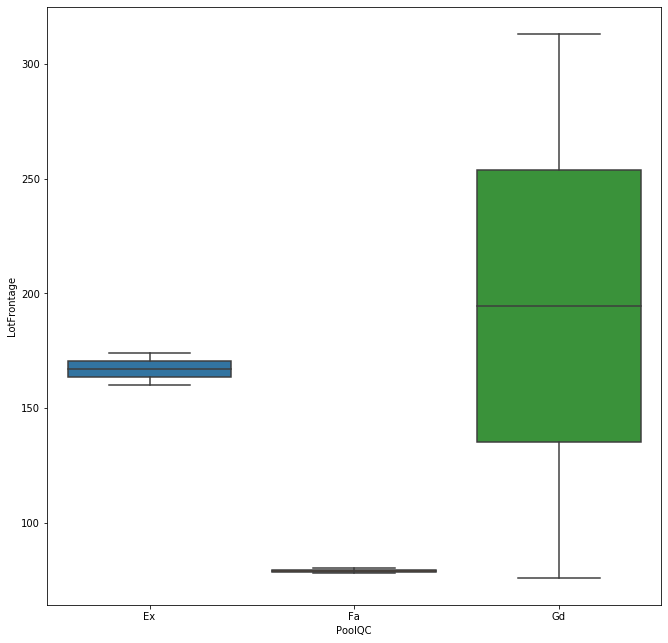

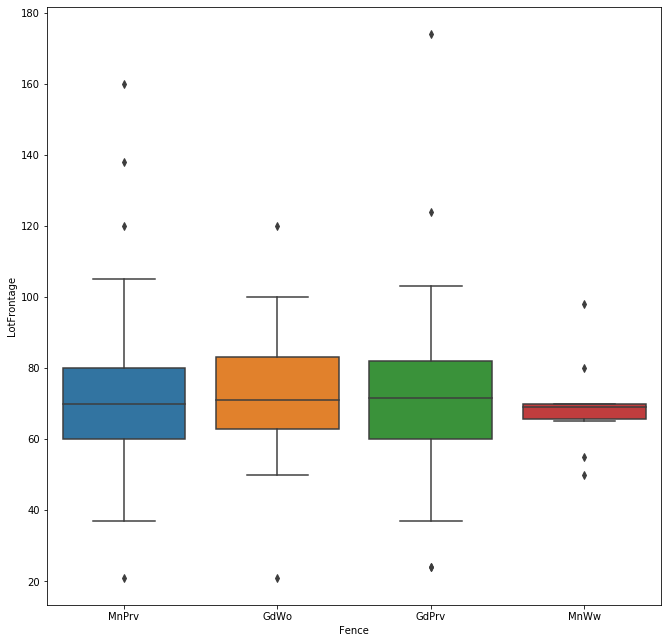

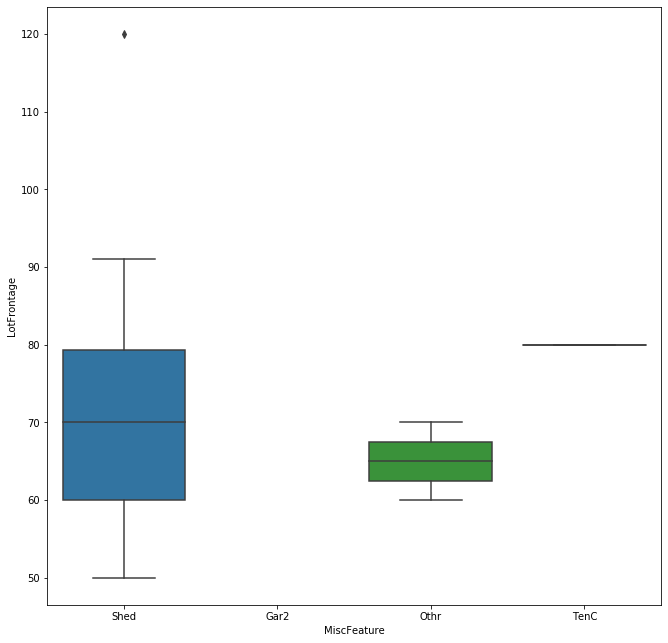

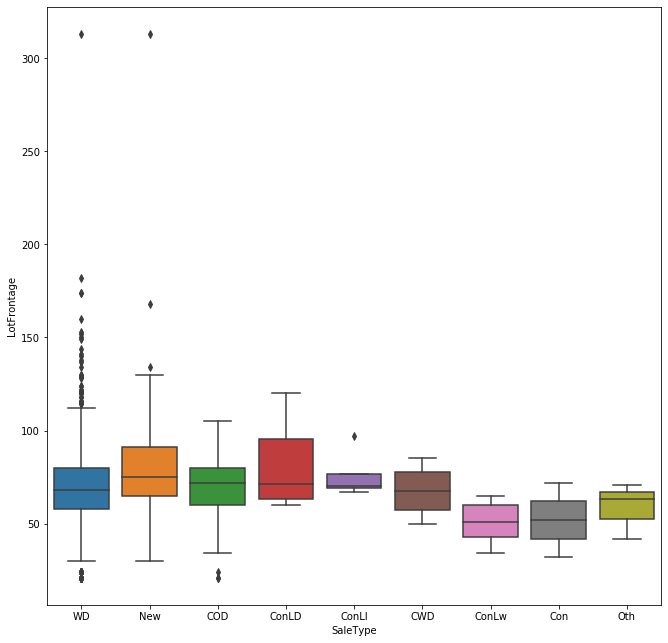

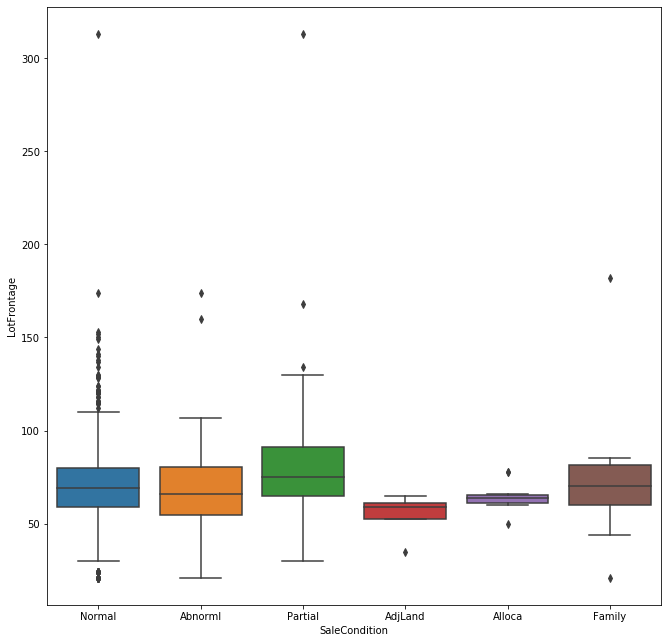

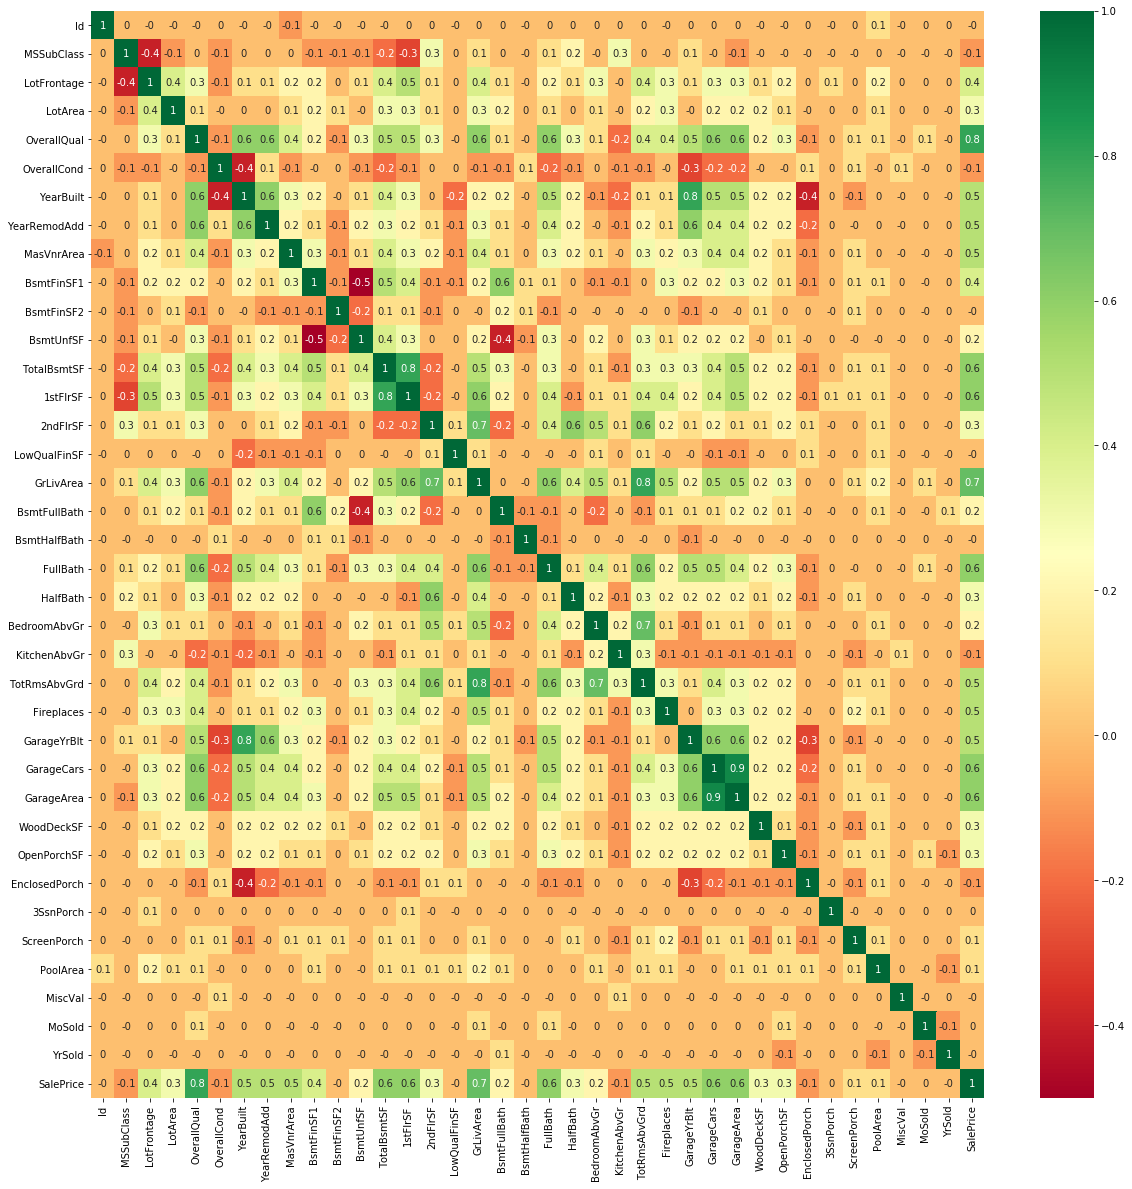

In [15]:
##missing value correction
#columns to check- PoolQC , Fence , MiscFeature, GarageCond, GarageQual, GarageFinish, GarageYrBlt , GarageType, Electrical 
#FireplaceQu , BsmtFinType2, BsmtFinType1, BsmtExposure, BsmtCond , BsmtQual, MasVnrType, MasVnrArea,  Alley, LotFrontage

train['BsmtExposure'].value_counts().index[0]
train['GarageYrBlt'].median()
#train['LotFrontage']
import seaborn as sns
from matplotlib.pyplot import yticks, xticks, subplots, set_cmap
import matplotlib.pyplot as plt
for i in categorical_vars:
    plt.figure(figsize=(11,11))
    sns.boxplot(x=train[i],y=train['LotFrontage'])
    plt.show()
    plt.close()
#train[train['LotFrontage']
corrmat = train.corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
train['Electrical'].value_counts()
train_null_counts=train.apply(lambda x: x.isnull().sum(axis=0))

In [16]:
#missing value imputation

train['PoolQC'].fillna('NA',inplace=True)
train['Fence'].fillna('None',inplace=True)
train['MiscFeature'].fillna('NA',inplace=True)
train['GarageCond'].fillna('NA',inplace=True)
train['GarageQual'].fillna('NA',inplace=True)
train['GarageFinish'].fillna('NA',inplace=True)
train['GarageYrBlt'].fillna(train['YearBuilt'],inplace=True)
train['GarageType'].fillna('NA',inplace=True)
train['FireplaceQu'].fillna('NA',inplace=True)
train['BsmtFinType2'].fillna('NA',inplace=True)
train['Electrical'].fillna(train['Electrical'].value_counts().index[0],inplace=True)
train['BsmtFinType1'].fillna('NA',inplace=True)
train['BsmtExposure']=np.where((train['BsmtExposure'].isnull()) & (train['BsmtFinType1']=='NA'),'NA',train['BsmtExposure'])
train['BsmtExposure'].fillna(train['BsmtExposure'].value_counts().index[0],inplace=True)
train['BsmtQual'].fillna('NA',inplace=True)
train['BsmtCond'].fillna('NA',inplace=True)
train['MasVnrType'].fillna('None',inplace=True)
train['MasVnrArea'].fillna(0.0,inplace=True)
train['Alley'].fillna('NA',inplace=True) 
train['LotFrontage']=np.where((train['LotFrontage'].isnull()) & (train['Alley']=='NA'),train[train['Alley']=='NA'].LotFrontage.mean(),train['LotFrontage'] )
train['LotFrontage']=np.where((train['LotFrontage'].isnull()) & (train['Alley']=='Grvl'),train[train['Alley']=='Grvl'].LotFrontage.mean(),train['LotFrontage'] )
train['LotFrontage']=np.where((train['LotFrontage'].isnull()) & (train['Alley']=='Pave'),train[train['Alley']=='Pave'].LotFrontage.mean(),train['LotFrontage'] )


train[train['Alley']=='NA']['LotFrontage'].fillna(train[train['Alley']=='NA'].LotFrontage.mean(),inplace=True)
train[train['Alley']=='Grvl']['LotFrontage'].fillna(train[train['Alley']=='Grvl'].LotFrontage.mean(),inplace=True)
train[train['Alley']=='Pave']['LotFrontage'].fillna(train[train['Alley']=='Pave'].LotFrontage.mean(),inplace=True)

C:\Users\Ankita\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
#One Hot Encoding of the Categorical features 
print(train)
list_df=[]
list_df.append(train)
for i in categorical_vars:
    locals()['df_' + str(i)]=pd.get_dummies(train[i])
    list_df.append(locals()['df_' + str(i)])
train.drop(categorical_vars,axis=1,inplace=True)
list_df.append(train)
train=pd.concat(list_df,axis=1)    


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave    NA      Reg   
1        2          20       RL         80.0     9600   Pave    NA      Reg   
2        3          60       RL         68.0    11250   Pave    NA      IR1   
3        4          70       RL         60.0     9550   Pave    NA      IR1   
4        5          60       RL         84.0    14260   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave    NA      Reg   
1456  1457          20       RL         85.0    13175   Pave    NA      Reg   
1457  1458          70       RL         66.0     9042   Pave    NA      Reg   
1458  1459          20       RL         68.0     9717   Pave    NA      Reg   
1459  1460          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [38]:
len(selected_columns)

16

In [37]:
selected_columns = train.columns[1:-1]
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                try:
                    if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                        x = np.delete(x, j, 1)
                        columns = np.delete(columns, j)
                except:
                    continue
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(train.iloc[:,1:-1].values, train.iloc[:,-1].values, SL, selected_columns)

[0.93331105 0.97959602 0.89303934 0.91246357 0.99513999 0.99722868
 0.97090997 0.97636361 0.94257502 0.95634389 0.98835508 0.9442325
 0.98078426 0.96772688 0.99678431 0.95313859 0.98330318 0.9563239
 0.99738621 0.98902358 0.98949981 0.96772061 0.93170135 0.93946128
 0.93667125 0.9495751  0.97717902 0.9200678  0.96508743 0.939761
 0.97794466 0.94988735 0.98421587 0.983481   0.94872201 0.9247435
 0.         0.9506247  0.96235324 0.92661058 0.93139032 0.96890998
 0.9470003  0.93126977 0.94832323 0.95769085 0.95078495 0.94061303
 0.9424303  0.95089668 0.94696371 0.94854565 0.92837657 0.93764665
 0.92817215 0.94641393 0.93877767 0.97283958 0.94047429 0.92518487
 0.93908809 0.94375264 0.94612559 0.95549841 0.96076135 0.99865468
 0.95223036 0.95077311 0.96395824 0.95723848 0.96940089 0.96927984
 0.95779919 0.95517958 0.94302568 0.93585803 0.96072683 0.94773382
 0.9443251  0.94154039 0.99672567 0.9267706  0.97427209 0.97616818
 0.9601253  0.97779638 0.94534244 0.96676979 0.95734458 0.9736794
 

[0.95505783 1.         0.74340244 0.90549416 0.9554596  0.95276713
 0.96944622 0.98599756 0.98283728 0.92240628 0.95028235 0.96281718
 0.83304711 0.94129258 0.97012778 0.86620279 0.94911612 0.94908851
 0.89334468 0.82740282 0.88729396 0.76547731 0.98633042 0.96323757
 0.8775479  0.88914212 0.87511006 0.99054597 0.81317644 0.89283948
 0.9563878  0.95387492 0.99552782 0.84123911 0.         0.88119539
 0.83247209 0.87516684 0.86502946 0.92205076 0.90635723 0.88188564
 0.89037297 0.92676366 0.90615732 0.92342663 0.93062669 0.87695006
 0.8615299  0.88559572 0.90291031 0.84789427 0.90959388 0.87714871
 0.94524369 0.89639665 0.87182063 0.84229981 0.8470136  0.87066969
 0.8544127  0.8905779  0.89216202 0.93641619 0.80506397 0.95949591
 0.89886892 0.88033661 0.93020076 0.99784287 0.88995148 0.91830966
 0.90099019 0.97360002 0.90362539 0.84566867 0.91642269 0.94632248
 0.90863268 0.9917089  0.88119023 0.97197494 0.93140966 0.85999988
 0.95356959 0.98581872 0.97220907 0.96248329 0.91805351 0.9162

[0.94688427 0.99765902 0.75713748 0.85174958 0.99728557 0.8491929
 0.89013525 0.96531918 0.86621644 0.97373378 0.99572036 0.93255669
 0.94628304 0.97493113 0.98657649 0.87634846 1.         0.91735843
 0.84294009 0.92704811 0.9495951  0.98864262 0.97474272 1.
 0.92356775 0.89794228 0.99347196 0.98645009 0.98657109 0.96992315
 0.99459037 0.96916227 0.98832022 0.         0.96762441 0.96702778
 0.95116503 0.90306491 0.97987555 0.98846008 0.92655456 0.95031423
 0.96329437 0.99554943 0.98963349 0.96009068 0.95860706 0.98090983
 0.97965948 0.93128913 0.97712072 0.98922805 0.97855515 0.97140533
 0.97865853 0.96769446 1.         0.96570081 0.98934214 0.96811343
 0.98749106 0.99700327 0.98572592 0.97663587 0.97866321 1.
 0.99327427 0.95103206 0.98444107 0.98731308 0.9245933  0.99182019
 0.9933539  0.98148456 0.96505424 0.94767105 0.95371027 0.95764227
 0.93333956 0.98190724 0.96158425 0.9138507  0.95996869 0.99163224
 0.97482661 0.95690176 0.95531059 0.93184869 0.97362044 0.9877891
 0.9950069  0

[0.98335378 0.89121595 0.78495847 0.88927525 0.88497745 0.87018695
 0.98913829 0.93839802 0.87184806 0.95423006 0.9831436  0.92166324
 0.81646975 0.78494396 0.99495652 0.98544376 0.77437394 0.99032282
 0.85734428 0.90489117 0.96807927 0.97319658 0.99497311 0.86135879
 0.92824222 0.86365577 0.88462841 0.9001733  0.         1.
 0.9475269  0.92799416 0.96873706 0.97652309 0.94123378 0.86458318
 0.91053167 0.90167742 0.92169425 0.95095927 0.94731489 0.98142644
 0.95311777 0.97070854 0.95602438 0.93424755 1.         0.98167065
 0.9596913  0.8622664  0.988858   0.96875783 0.85433463 0.93392435
 0.90973889 0.97492438 0.93243312 0.94188458 0.92480035 0.97200052
 0.86731203 0.91064038 0.8913558  0.91451118 0.98036427 0.93938316
 0.98553484 0.85009328 0.97546918 0.96594786 0.9616943  0.96472428
 0.98880828 0.9311241  0.91974676 0.98025555 0.94591644 0.96508325
 0.99390799 0.99062696 0.97807276 0.97900179 0.98883602 0.97093971
 0.9965842  0.96194439 0.94975342 0.98355409 0.96077461 0.96371434
 0.

[0.86796803 0.91356555 0.8841588  0.99644048 0.98995538 0.99414898
 0.88716332 0.98205591 0.98975091 0.96672238 0.97005104 0.98335885
 0.93569072 0.99522374 0.96386494 0.96951034 1.         0.95009402
 0.98486625 0.94870294 0.96962023 0.99809385 1.         0.99268905
 0.8343214  0.98913255 0.96876532 0.         0.9849695  0.96543074
 0.9667221  0.9920809  0.99715684 0.99806876 0.98930287 0.97650111
 0.97737183 0.9899435  0.95781738 0.98207628 0.98214075 0.99557711
 0.97236526 0.97781314 0.96950368 0.95101361 0.97409853 0.99802507
 0.977683   0.98602535 0.98860165 0.99160611 0.98172258 0.97155178
 0.9887672  0.9767794  0.96281036 0.98716067 0.97769588 0.99609384
 0.95568118 0.8865067  0.91651376 0.99185989 0.98522073 0.99429838
 0.9846382  0.97105826 0.973348   0.92379643 0.97928184 0.98594894
 0.9946397  0.98856416 0.9873123  0.95469503 0.97841269 0.95054382
 0.99321055 0.97347192 0.97779218 0.9866947  0.98065499 0.96298407
 0.97617257 1.         0.98046647 0.99803597 0.99747534 0.9859

[0.71349805 0.84868342 0.95942208 0.9848592  0.99148765 0.97845904
 0.93733302 0.99867177 0.98960906 0.93294168 0.98315261 0.99752733
 0.93626593 0.93632904 0.97203962 0.96141191 0.98723577 0.9572024
 0.97951373 0.92330981 0.94494209 0.91269703 0.95786446 0.
 0.96425924 0.99795612 0.95599494 0.98107748 0.98565459 0.98442874
 0.97137181 0.96366127 0.98639045 0.96679528 0.99644155 0.98455125
 0.97741253 0.98308475 0.96065163 0.98991228 0.95377791 0.98700196
 0.98634129 0.98897627 0.96115735 0.97472373 0.93770233 0.96207226
 0.98741831 0.98912511 0.97931046 0.97189603 0.98187223 0.97806826
 0.94320008 1.         0.98017561 0.99036973 0.94041602 0.98831449
 0.97087379 0.97313102 0.98761288 0.97079886 0.97524399 0.97323043
 0.99918233 0.95449722 0.9961239  0.98435668 0.94856361 0.98242374
 0.99299336 0.98886194 0.96752279 0.97460074 0.9935452  0.97254463
 0.96463231 0.98928196 0.98637439 0.9866634  1.         0.99613444
 0.99131789 0.97975527 0.98609551 0.99627323 0.99859187 0.96640238
 0.9

[0.39980586 0.935438   0.98413286 0.94976777 0.91138897 0.99426133
 0.99006952 0.99683236 0.97517357 0.93224157 0.95980001 0.98823447
 0.78789244 0.98172863 0.92341782 0.917359   0.94716606 0.99632685
 0.96350631 0.97181725 0.75303205 0.88024339 0.         0.91484103
 0.95589091 0.94722536 0.91025227 0.94917355 0.99080992 0.89652771
 0.9079252  0.89666683 0.85057015 0.97316949 0.99228092 0.95296234
 0.98282548 0.99302668 0.94810869 0.9729702  0.90026748 0.88231043
 0.97800469 0.97313864 0.91387119 0.98474547 0.82217977 0.9984291
 0.94130113 0.95277834 0.86025475 0.8922463  0.99109109 0.87264588
 0.94704624 0.95323942 0.96877955 0.9727588  0.97972647 0.94629097
 0.97509027 0.97294967 0.9112915  0.97216374 0.8777969  0.99584508
 0.98249671 0.90796105 0.92729343 0.89068446 0.96134518 0.97432291
 0.98046237 0.92839982 0.90314059 0.96571203 0.98947246 0.95652139
 0.92490922 0.98243706 0.99587942 0.98215656 0.93330892 0.99099662
 0.9415619  0.95964087 0.97038296 0.99674917 0.95912897 0.98117

[0.59831742 0.95952672 1.         0.97309256 0.96752351 0.96916128
 0.96287974 0.96261106 0.94917975 0.98933617 0.99364594 0.99667975
 0.98720178 0.97625706 0.99103668 0.95671911 0.98342507 0.97167712
 0.98151186 0.         0.97973707 0.99693657 0.98253471 0.97207074
 0.99166258 0.98023175 0.98297136 0.99265154 0.99800038 0.98777103
 0.97573028 0.96796176 0.98077582 0.99053774 0.99643805 0.98536316
 0.96572918 0.99170027 0.99129555 0.96932871 0.993843   0.99868262
 0.99764446 0.9918624  0.97500692 0.99804615 0.98252139 0.99773064
 0.98090042 0.9886976  0.9965121  0.96722775 0.98471711 0.99612104
 0.97885873 0.99014455 0.99311574 0.98409267 0.994892   0.9907876
 0.96862634 0.98565937 0.99929495 0.98135675 0.99691349 0.99601841
 0.99337729 0.98792643 0.99224725 0.98835649 0.98386741 0.98043795
 0.9832429  0.99052124 0.97821446 0.99850208 0.99186529 0.99006614
 0.98279682 0.99966052 0.9992838  0.99182334 0.99745918 0.99684144
 0.98272765 0.96890678 0.9980014  0.98911699 0.98061185 0.98540

[0.52855997 0.99508845 0.95961122 0.95903177 0.94998341 0.99571332
 0.98402882 0.94417597 0.90212474 0.88940485 0.95691288 0.99666046
 0.94191928 0.97188604 0.97195204 0.92549758 0.99056088 0.91819988
 0.         0.95288363 0.98553697 0.98267163 0.96760282 0.93070918
 0.93480403 0.94465856 0.99068732 0.97728769 0.99445895 0.95519967
 0.9289364  0.99908564 0.99049366 0.91457649 0.98898843 0.95202378
 0.99595399 0.98239673 0.95701842 0.95321863 0.97292161 0.97060857
 0.93906296 0.96007066 0.94201384 0.99566681 0.97757841 0.98156392
 0.92023616 0.98070411 0.99155753 0.96395983 0.95695992 0.96408002
 0.98287849 0.95822784 0.99191822 0.93727364 0.98118364 0.99227156
 0.9969869  0.97579174 0.95109013 1.         0.98953517 0.96232545
 0.98361729 0.9620949  0.97931177 0.98831992 0.98102825 0.95228872
 0.99589648 0.9100358  0.99176322 0.9862711  0.99822638 0.99538435
 0.99614281 0.95999044 0.9593299  0.9809377  0.9557682  0.95039486
 0.98524975 0.95455839 0.96137847 0.92382364 0.8778799  0.9866

 0.93784624 0.95541967 0.91516314 0.98836092 0.96329165 0.92078701]
[0.85945533 0.87731072 0.98268359 0.99419483 0.98359946 0.98165343
 0.98135196 0.99078811 0.95708086 0.96460797 0.95642986 0.98885479
 0.9577252  0.93315043 0.93802002 0.         0.97796984 0.99510294
 0.9901672  0.98685969 0.9514319  0.98171893 0.98746409 0.97869889
 0.97771089 0.94673766 0.98494712 0.98496763 0.97440013 0.98340882
 0.99209822 0.99316593 0.96312217 0.99322304 0.98530296 0.98567306
 0.96232831 0.98988386 0.97638384 0.96364816 0.97960081 0.97539928
 0.98742175 0.99789375 0.99738017 0.99822364 0.96247966 0.99019788
 0.98221127 0.98563053 0.98920098 0.99354858 0.98985399 0.98419768
 0.9849136  0.99571279 0.98929072 0.9636224  0.97348527 0.98806171
 0.97717658 0.97517713 0.96767773 0.99457253 0.97341942 0.99527428
 0.99693988 0.99742631 0.99302356 1.         0.99643653 0.99087954
 0.991501   0.97771026 0.98416802 0.96232029 0.96777249 0.98245721
 0.99491932 0.98800305 0.99643549 0.99496043 0.99861408 0.998

 2.20931383e-01 3.56921728e-02 5.10630520e-01]
[3.18297162e-08 4.61055820e-02 5.10332216e-01 3.87410918e-01
 7.98581329e-01 8.72776899e-01 5.07992628e-01 8.16698455e-01
 4.52211803e-01 8.88629085e-01 5.92465899e-01 6.30780966e-01
 2.99634597e-01 0.00000000e+00 9.35174076e-01 9.29826452e-01
 5.71598491e-01 9.59447652e-01 7.17176504e-01 9.44771161e-01
 7.54748184e-01 9.53356641e-01 9.40757986e-01 8.89012356e-01
 7.59885237e-01 7.01494744e-01 7.58340717e-01 7.99574338e-01
 8.69878913e-01 9.50554714e-01 6.68276293e-01 8.47358040e-01
 9.62043452e-01 9.09671775e-01 8.63886789e-01 9.80869873e-01
 6.61059937e-01 7.05798299e-01 8.34739603e-01 6.05922335e-01
 2.36070646e-01 9.77954551e-01 8.42098026e-01 9.79742249e-01
 8.17090292e-01 8.84099418e-01 5.03576208e-01 8.20702543e-01
 4.57251793e-01 9.78851371e-01 7.55588888e-01 1.00000000e+00
 8.08056733e-01 5.10944461e-01 5.71594082e-01 7.97234695e-01
 7.79157314e-01 8.47495712e-01 8.50299171e-01 9.19427006e-01
 6.09026194e-01 8.25921582e-01 8.17958

 0.73099976 0.40280539 0.52798469 0.64050096 0.84274382]
[1.12654757e-21 3.85811523e-11 2.66373366e-01 6.22250742e-05
 2.15024611e-01 5.89830164e-01 6.33850457e-01 8.50947947e-01
 7.35104230e-01 8.96596166e-02 9.50445971e-02 9.37967227e-01
 6.86609612e-01 0.00000000e+00 7.24783007e-01 2.77628725e-01
 7.60779824e-01 7.10749008e-01 3.09454308e-01 1.00000000e+00
 3.42933778e-01 7.24920184e-01 5.56362914e-01 9.34421376e-01
 5.00624057e-01 2.10638873e-01 8.29420830e-01 6.04301707e-01
 3.45580914e-01 4.00166077e-01 7.33637411e-01 1.00000000e+00
 9.75571091e-01 6.50763943e-01 8.96000480e-01 5.05863880e-01
 7.52446067e-01 1.00000000e+00 3.28595440e-01 5.97911768e-01
 7.32303913e-01 6.68011284e-01 7.50861593e-01 5.45827018e-01
 4.67030473e-01 4.50399668e-01 3.66107570e-01 1.00000000e+00
 5.03818454e-01 9.07761721e-01 6.64522660e-01 9.63840462e-01
 6.77426064e-01 8.65213272e-01 1.00000000e+00 3.77752136e-01
 5.15974702e-01 8.23137619e-01 4.53589771e-01 6.42723955e-01
 1.16603105e-01 3.36918772e-

 0.79884579]
[2.08896560e-10 2.80645492e-01 7.70908328e-01 3.09328620e-01
 8.89835614e-01 4.62241085e-02 1.21208805e-01 7.44200216e-01
 9.34491184e-01 6.72144871e-01 1.40017636e-01 1.03244686e-01
 7.57854299e-02 0.00000000e+00 3.66420620e-01 3.41002701e-01
 9.03835890e-01 6.16503897e-01 6.37533845e-01 6.06517054e-02
 3.96462782e-01 4.05571491e-01 9.54743833e-01 6.06562201e-01
 7.39890740e-01 8.07785072e-01 7.97027367e-02 7.03690942e-01
 5.05911126e-01 8.98310855e-01 8.36990632e-01 8.57083372e-01
 6.93155357e-01 2.06357170e-01 7.30470037e-01 5.76974294e-01
 5.53844177e-01 9.10131636e-01 9.77406550e-01 7.39261248e-01
 8.61974488e-01 1.00000000e+00 3.07991525e-01 8.22900092e-01
 7.45110374e-01 1.00000000e+00 1.83260952e-01 7.75253065e-01
 8.19605550e-01 4.58570140e-01 3.26507794e-02 3.57261363e-01
 4.92738547e-01 7.79509919e-01]
[0.03421159 0.90291252 0.91515206 0.29248745 0.84383386 0.9470467
 0.6225552  0.60537569 0.72827205 0.83534709 0.70229385 0.73257922
 0.58490804 0.         0.8225

 0.72547811 0.80683638 0.65163424 0.61694583 0.90333931 0.70393117]
[0.06415962 0.46375533 0.98970681 0.77498761 0.59239485 0.71340515
 0.85616018 0.98357224 0.83286161 0.33634919 0.         0.82669347
 0.82772485 0.9178364  0.6430677  0.78995472 0.56981075 0.96184397
 0.51992587 0.6140959  0.92590388 0.96318302 0.98784747 0.9710171
 0.99186864 0.90459057 0.93440825 0.78429854 0.85563739 0.94952069
 0.88788289 0.98387662 0.77349577 0.8160034 ]
[0.04258724 0.20737787 0.84437997 0.470647   0.88062201 0.62989124
 0.78696313 0.92667932 0.9396267  0.89689952 0.         0.97397229
 0.93581675 0.97548207 0.92309739 0.69673305 0.9614116  0.90464402
 0.75514255 0.84451886 0.97347584 0.80449273 0.95830389 0.832658
 0.94306361 1.         0.79970852 0.96753751 0.7772353  0.84289713
 0.85659473 0.86986311 0.92627613]
[1.59032890e-03 6.76034186e-04 3.17452998e-02 3.80614208e-04
 4.45829209e-01 3.14143733e-09 6.13742196e-03 1.61218022e-01
 3.36509154e-01 3.89995935e-03 0.00000000e+00 9.78258926e-02
 

 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51

 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51

 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51

 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51

[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50295306e-62 1.57720623e-21 3.75482265e-04
 3.19207672e-03 5.78455941e-08 0.00000000e+00 2.40254955e-15
 5.38027059e-04 2.69880434e-03 4.06184154e-02 3.13417429e-27
 7.89037434e-05 1.51478445e-06 3.40989758e-03 1.67558477e-13]
[5.18745249e-03 1.50

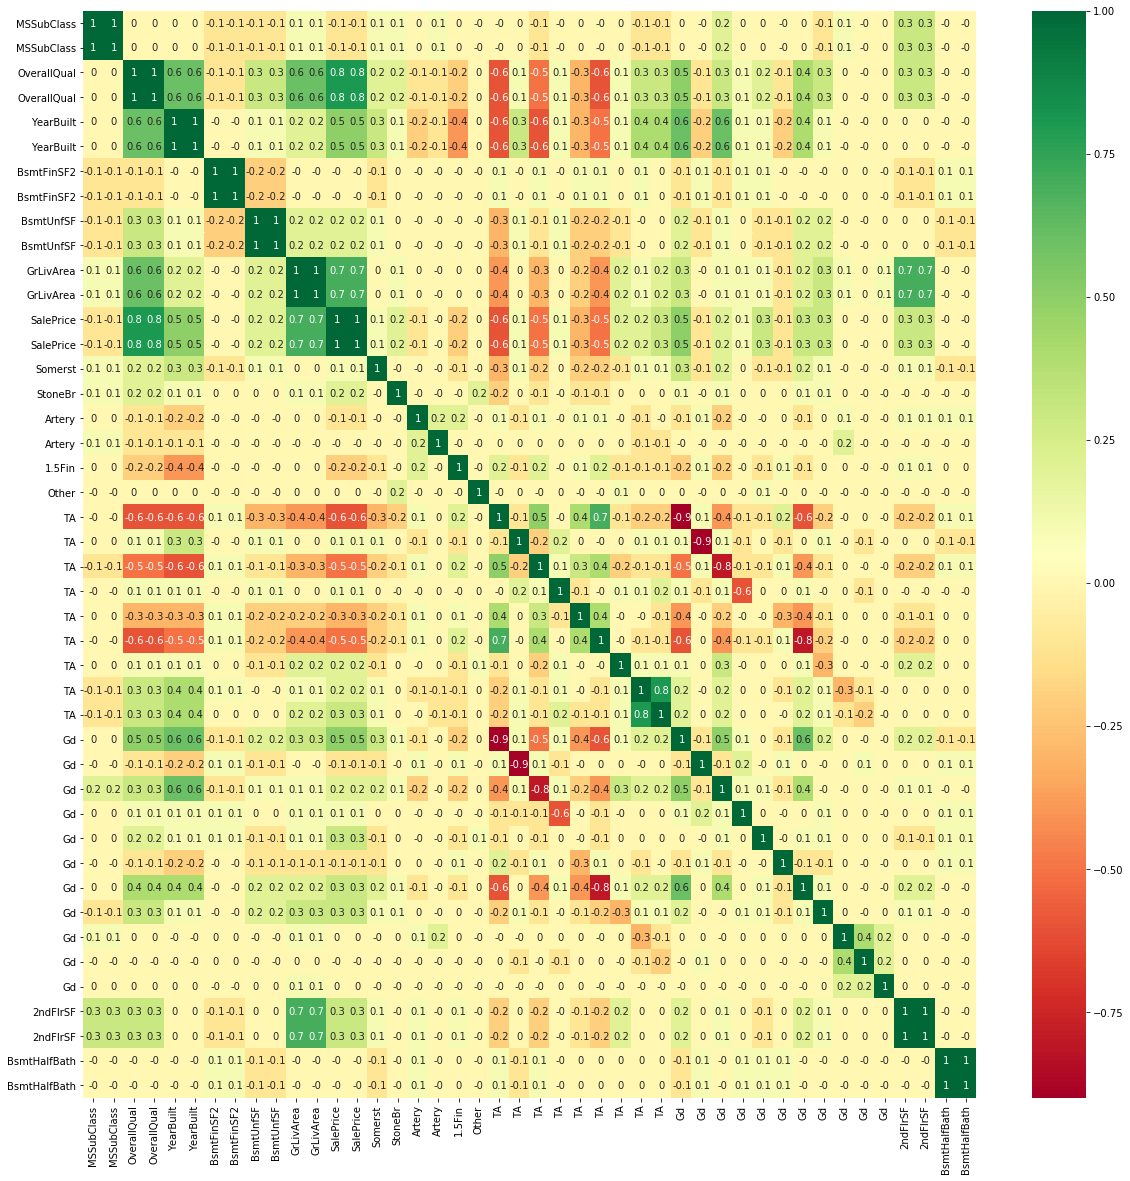

In [39]:
#check correlation
corrmat = train[selected_columns].corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [43]:
train=train[selected_columns]

In [44]:
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

In [270]:
len(selected_columns)
result = pd.DataFrame()
result['SalePrice'] = train.iloc[:,-1]
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data.drop(['PoolQC','TotalBsmtSF'],axis=1,inplace=True)

In [273]:
selected_columns=selected_columns.drop(['PoolQC','TotalBsmtSF'])

In [274]:
#split_data
x_train, x_test, y_train, y_test = train_test_split(data.values,result.values, test_size = 0.2)

In [275]:
scaler = StandardScaler()   
scaler=scaler.partial_fit(x_train)
pickle.dump(scaler,open('scaler.pkl','wb'))

scale=pickle.load(open('scaler.pkl','rb'))
x_train = scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [276]:
names = ["GBM","Neural Net","Naive Bayes","Decision Tree", "Random Forest","Nearest Neighbors","LogisticRegression"]
#XGBRegressor(max_delta_step=2,scale_pos_weight=100)   -  "XGB"
regressors = [GradientBoostingRegressor(n_estimators=100,random_state=0,verbose=1),
    MLPRegressor(alpha=0.00001,max_iter=20000,activation='logistic',batch_size=100,verbose=True,random_state=0),
    GaussianNB(),
    DecisionTreeRegressor(max_depth=5),
    RandomForestRegressor(max_depth=7, n_estimators=100,min_samples_split=2, max_features=3),
    KNeighborsRegressor(2),
    LogisticRegression(penalty='l2',class_weight='balanced', random_state=0, 
                                        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0,
                                        warm_start=False, n_jobs=None, l1_ratio=None)]

In [277]:
rmse=[]
for name,model in zip(names,regressors):
    print(name, model)
    model.fit(np.array(x_train), y_train)
    score = model.score(np.array(x_test), y_test)
    y_pred=model.predict(x_test)
    score=cross_val_score(model, x_test, y_test, cv=5, scoring='neg_root_mean_squared_error')
    print('Rmse',score.mean())
    rmse.append(score.mean())

GBM GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)
      Iter       Train Loss   Remaining Time 
         1  5541169229.5825            0.79s
         2  4813179311.5839            0.78s
         3  4204881613.0205            0.52s
         4  3702072406.0958            0.58s
         5  3285342877.6617            0.61s
         6  2920272329.8606            0.50s
         7  26243

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   489420321.4835            0.31s
        50   414462533.3878            0.26s
        60   359246082.6577            0.21s
        70   324685200.3006            0.15s
        80   299031680.6741            0.10s
        90   275002709.9021            0.05s
       100   255194995.6348            0.00s
      Iter       Train Loss   Remaining Time 
         1  4732131217.5894            0.79s
         2  4053699259.0652            0.39s
         3  3481421273.7686            0.26s
         4  3017858248.0636            0.19s
         5  2627630452.7577            0.15s
         6  2303362812.2357            0.13s
         7  2028605728.9066            0.21s
         8  1775434055.5090            0.18s
         9  1574381683.6033            0.16s
        10  1401155063.4490            0.14s
        20   520933264.1419            0.10s
        30   280112900.2840            0.09s
        40   183982901.8371            0.07s
        50   134882111.8832            0.06s
        6

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5091205841.6312            0.00s
         2  4356731563.9654            0.00s
         3  3754672096.3072            0.26s
         4  3247782532.2902            0.19s
         5  2825340407.2512            0.15s
         6  2461526087.9860            0.13s
         7  2173342071.9554            0.11s
         8  1909748440.9812            0.18s
         9  1675843925.5506            0.16s
        10  1482975599.6891            0.14s
        20   545010574.5726            0.13s
        30   290898390.2777            0.09s
        40   195560838.4986            0.07s
        50   149678581.5386            0.06s
        60   124053729.5109            0.05s
        70   104878838.6209            0.03s
        80    88379992.8695            0.02s
        90    73429167.4060            0.01s
       100    61630339.6971            0.00s
      Iter       Train Loss   Remaining Time 
         1  4861749427.0261            0.00s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        80    66035158.0442            0.02s
        90    56853225.1982            0.01s
       100    47789744.9720            0.00s
      Iter       Train Loss   Remaining Time 
         1  4907648102.6585            0.79s
         2  4238180689.1259            0.39s
         3  3649653808.9275            0.26s
         4  3165411128.3014            0.19s
         5  2776550288.5921            0.15s
         6  2439399536.8640            0.13s
         7  2155548497.5591            0.11s
         8  1907787040.7917            0.18s
         9  1699732113.0966            0.16s
        10  1523713536.5767            0.14s
        20   598478090.0581            0.10s
        30   323704810.8182            0.07s
        40   221474633.2452            0.06s
        50   166671543.7980            0.06s
        60   133483104.3052            0.04s
        70   108839065.6418            0.03s
        80    92880325.4870            0.02s
        90    77173856.3914            0.01s
       10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60   150202053.0136            0.04s
        70   121747287.6300            0.03s
        80   102442386.8627            0.02s
        90    88045657.7812            0.01s
       100    78071233.8112            0.00s
Rmse -31671.886124990444
Neural Net MLPRegressor(activation='logistic', alpha=1e-05, batch_size=100, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=20000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=0, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)
Iteration 1, loss = 19633486225.43302155
Iteration 2, loss = 19633361397.12140274
Iteration 3, loss = 19633235435.00624084
Iteration 4, loss = 19633109015.09617615
Iteration 5, loss = 19632982077.47350693
Iteration 6, loss 

Iteration 187, loss = 19590766446.63068390
Iteration 188, loss = 19590524388.05444717
Iteration 189, loss = 19590278987.21367645
Iteration 190, loss = 19590034957.82063675
Iteration 191, loss = 19589793076.86323929
Iteration 192, loss = 19589547238.75254440
Iteration 193, loss = 19589305016.03529358
Iteration 194, loss = 19589062918.55199814
Iteration 195, loss = 19588820063.33575058
Iteration 196, loss = 19588576427.04357147
Iteration 197, loss = 19588336161.56805801
Iteration 198, loss = 19588093774.98322678
Iteration 199, loss = 19587851332.07746887
Iteration 200, loss = 19587610164.45274353
Iteration 201, loss = 19587368984.09301758
Iteration 202, loss = 19587127576.38949966
Iteration 203, loss = 19586885930.53548813
Iteration 204, loss = 19586645518.99755478
Iteration 205, loss = 19586404754.44934845
Iteration 206, loss = 19586164228.26311874
Iteration 207, loss = 19585924078.04907990
Iteration 208, loss = 19585683023.50711441
Iteration 209, loss = 19585443312.79341507
Iteration 2

Iteration 393, loss = 19543290792.55418015
Iteration 394, loss = 19543068549.39049149
Iteration 395, loss = 19542845412.76148224
Iteration 396, loss = 19542624069.39414597
Iteration 397, loss = 19542401115.47857285
Iteration 398, loss = 19542179156.84238815
Iteration 399, loss = 19541958566.17450333
Iteration 400, loss = 19541736472.93254089
Iteration 401, loss = 19541513202.96746063
Iteration 402, loss = 19541292948.18954849
Iteration 403, loss = 19541071798.64052963
Iteration 404, loss = 19540848621.09608841
Iteration 405, loss = 19540627844.81658173
Iteration 406, loss = 19540406441.04544449
Iteration 407, loss = 19540184527.36618423
Iteration 408, loss = 19539963544.51896667
Iteration 409, loss = 19539741099.79132462
Iteration 410, loss = 19539520971.64697647
Iteration 411, loss = 19539299312.35249329
Iteration 412, loss = 19539078433.80561829
Iteration 413, loss = 19538856550.00444794
Iteration 414, loss = 19538636753.61679840
Iteration 415, loss = 19538414149.86290741
Iteration 4

Iteration 599, loss = 19498175012.34800720
Iteration 600, loss = 19497956516.91691589
Iteration 601, loss = 19497739996.23350143
Iteration 602, loss = 19497523733.27440643
Iteration 603, loss = 19497306123.25782776
Iteration 604, loss = 19497089702.54558563
Iteration 605, loss = 19496874143.90792084
Iteration 606, loss = 19496655070.01440430
Iteration 607, loss = 19496439655.44762039
Iteration 608, loss = 19496220603.85886765
Iteration 609, loss = 19496005330.25058746
Iteration 610, loss = 19495787448.31781769
Iteration 611, loss = 19495570560.59463120
Iteration 612, loss = 19495353663.77178574
Iteration 613, loss = 19495137111.43078995
Iteration 614, loss = 19494919202.36103058
Iteration 615, loss = 19494702502.23025131
Iteration 616, loss = 19494485456.02111053
Iteration 617, loss = 19494269071.19659424
Iteration 618, loss = 19494052016.36780167
Iteration 619, loss = 19493834765.37998962
Iteration 620, loss = 19493617600.18605042
Iteration 621, loss = 19493401211.25807190
Iteration 6

Iteration 793, loss = 19456226979.73809052
Iteration 794, loss = 19456010250.65414810
Iteration 795, loss = 19455795084.66886520
Iteration 796, loss = 19455579982.51890945
Iteration 797, loss = 19455364645.43894196
Iteration 798, loss = 19455149120.82834244
Iteration 799, loss = 19454933390.11726761
Iteration 800, loss = 19454716787.33073807
Iteration 801, loss = 19454502139.48659897
Iteration 802, loss = 19454285982.81142807
Iteration 803, loss = 19454070592.36560059
Iteration 804, loss = 19453854652.39536285
Iteration 805, loss = 19453639660.56902313
Iteration 806, loss = 19453422131.34748459
Iteration 807, loss = 19453207863.73712921
Iteration 808, loss = 19452991754.60026932
Iteration 809, loss = 19452776096.12595367
Iteration 810, loss = 19452560871.97368622
Iteration 811, loss = 19452345392.95167160
Iteration 812, loss = 19452129953.29947662
Iteration 813, loss = 19451914446.89850235
Iteration 814, loss = 19451698601.81356812
Iteration 815, loss = 19451482809.70241547
Iteration 8

Iteration 991, loss = 19413597447.69059372
Iteration 992, loss = 19413383064.48210907
Iteration 993, loss = 19413169409.40583038
Iteration 994, loss = 19412953383.99542236
Iteration 995, loss = 19412738918.80435944
Iteration 996, loss = 19412523551.86918259
Iteration 997, loss = 19412309356.48124695
Iteration 998, loss = 19412093576.07976532
Iteration 999, loss = 19411880433.20612335
Iteration 1000, loss = 19411663073.42699051
Iteration 1001, loss = 19411449600.65109634
Iteration 1002, loss = 19411234769.13038254
Iteration 1003, loss = 19411019353.14942551
Iteration 1004, loss = 19410804120.82360840
Iteration 1005, loss = 19410588693.36749649
Iteration 1006, loss = 19410376203.11050797
Iteration 1007, loss = 19410158846.42803574
Iteration 1008, loss = 19409944895.16642761
Iteration 1009, loss = 19409729840.69203568
Iteration 1010, loss = 19409514892.77554703
Iteration 1011, loss = 19409299149.40595245
Iteration 1012, loss = 19409085083.86545181
Iteration 1013, loss = 19408870818.260467

Iteration 1190, loss = 19370855926.47826385
Iteration 1191, loss = 19370642421.83224869
Iteration 1192, loss = 19370428064.32026291
Iteration 1193, loss = 19370213693.30665588
Iteration 1194, loss = 19369998390.99200821
Iteration 1195, loss = 19369783866.36604691
Iteration 1196, loss = 19369569185.04208755
Iteration 1197, loss = 19369355393.58709717
Iteration 1198, loss = 19369140068.97372818
Iteration 1199, loss = 19368924555.43115234
Iteration 1200, loss = 19368711039.11865234
Iteration 1201, loss = 19368495564.98624420
Iteration 1202, loss = 19368281687.70697403
Iteration 1203, loss = 19368065811.83764267
Iteration 1204, loss = 19367850619.01584244
Iteration 1205, loss = 19367636935.68207550
Iteration 1206, loss = 19367422079.08398056
Iteration 1207, loss = 19367207312.25883484
Iteration 1208, loss = 19366991864.62712860
Iteration 1209, loss = 19366777912.11474609
Iteration 1210, loss = 19366562832.63396454
Iteration 1211, loss = 19366347672.18506622
Iteration 1212, loss = 193661336

Iteration 1383, loss = 19329469862.65818787
Iteration 1384, loss = 19329255888.39413452
Iteration 1385, loss = 19329042762.41173935
Iteration 1386, loss = 19328827970.24510956
Iteration 1387, loss = 19328614625.02598572
Iteration 1388, loss = 19328400259.29142380
Iteration 1389, loss = 19328185865.27640152
Iteration 1390, loss = 19327971921.92848206
Iteration 1391, loss = 19327758555.64430237
Iteration 1392, loss = 19327543059.84341431
Iteration 1393, loss = 19327330272.92851639
Iteration 1394, loss = 19327114859.61555099
Iteration 1395, loss = 19326900539.50455475
Iteration 1396, loss = 19326686553.57698822
Iteration 1397, loss = 19326471365.91931152
Iteration 1398, loss = 19326258691.77953339
Iteration 1399, loss = 19326043376.34042740
Iteration 1400, loss = 19325829795.56862259
Iteration 1401, loss = 19325614711.13608170
Iteration 1402, loss = 19325400770.17359161
Iteration 1403, loss = 19325186617.81677628
Iteration 1404, loss = 19324972460.18758392
Iteration 1405, loss = 193247578

Iteration 1573, loss = 19288791965.77719879
Iteration 1574, loss = 19288578141.07070541
Iteration 1575, loss = 19288365628.15499115
Iteration 1576, loss = 19288150049.32662582
Iteration 1577, loss = 19287937035.40206909
Iteration 1578, loss = 19287721845.88205719
Iteration 1579, loss = 19287510002.55835342
Iteration 1580, loss = 19287295288.56962204
Iteration 1581, loss = 19287079496.48317719
Iteration 1582, loss = 19286866812.76614761
Iteration 1583, loss = 19286652351.77728271
Iteration 1584, loss = 19286437901.49431610
Iteration 1585, loss = 19286224277.31927109
Iteration 1586, loss = 19286009955.49906540
Iteration 1587, loss = 19285797162.15802002
Iteration 1588, loss = 19285581257.24411011
Iteration 1589, loss = 19285368821.40988159
Iteration 1590, loss = 19285154417.38343811
Iteration 1591, loss = 19284940140.30757523
Iteration 1592, loss = 19284726789.60331345
Iteration 1593, loss = 19284513594.71043777
Iteration 1594, loss = 19284298388.04069901
Iteration 1595, loss = 192840840

Iteration 1770, loss = 19246673269.34598541
Iteration 1771, loss = 19246460196.23663712
Iteration 1772, loss = 19246247358.79194641
Iteration 1773, loss = 19246032202.50880432
Iteration 1774, loss = 19245818661.81723404
Iteration 1775, loss = 19245604991.96318436
Iteration 1776, loss = 19245392522.24731064
Iteration 1777, loss = 19245177048.69512558
Iteration 1778, loss = 19244963809.64617157
Iteration 1779, loss = 19244750441.61465073
Iteration 1780, loss = 19244536608.99425888
Iteration 1781, loss = 19244322694.55694962
Iteration 1782, loss = 19244110561.08378220
Iteration 1783, loss = 19243895779.86853027
Iteration 1784, loss = 19243682296.53498840
Iteration 1785, loss = 19243469953.94474030
Iteration 1786, loss = 19243254322.56790924
Iteration 1787, loss = 19243041016.82835007
Iteration 1788, loss = 19242827319.01938629
Iteration 1789, loss = 19242614188.48028946
Iteration 1790, loss = 19242399329.27290726
Iteration 1791, loss = 19242186075.72397232
Iteration 1792, loss = 192419706

Iteration 1972, loss = 19203537895.58820724
Iteration 1973, loss = 19203322992.96562576
Iteration 1974, loss = 19203111755.81438065
Iteration 1975, loss = 19202898485.27400970
Iteration 1976, loss = 19202684640.68597794
Iteration 1977, loss = 19202471196.63087463
Iteration 1978, loss = 19202257321.69549942
Iteration 1979, loss = 19202044366.45413208
Iteration 1980, loss = 19201830920.06243515
Iteration 1981, loss = 19201617571.60273743
Iteration 1982, loss = 19201404480.35784531
Iteration 1983, loss = 19201190459.09487534
Iteration 1984, loss = 19200976960.70935440
Iteration 1985, loss = 19200763238.37038040
Iteration 1986, loss = 19200548699.23394394
Iteration 1987, loss = 19200336246.36946869
Iteration 1988, loss = 19200122862.03281784
Iteration 1989, loss = 19199909659.56983948
Iteration 1990, loss = 19199695626.22449493
Iteration 1991, loss = 19199481380.33813477
Iteration 1992, loss = 19199269131.67080688
Iteration 1993, loss = 19199054618.75196838
Iteration 1994, loss = 191988403

Iteration 2162, loss = 19163014960.92647934
Iteration 2163, loss = 19162802934.03327942
Iteration 2164, loss = 19162588318.24298859
Iteration 2165, loss = 19162375685.45218277
Iteration 2166, loss = 19162163190.44207001
Iteration 2167, loss = 19161950796.35650635
Iteration 2168, loss = 19161736384.96112823
Iteration 2169, loss = 19161523324.91626740
Iteration 2170, loss = 19161311006.25237274
Iteration 2171, loss = 19161097197.55619812
Iteration 2172, loss = 19160883783.35056305
Iteration 2173, loss = 19160671042.08441162
Iteration 2174, loss = 19160457604.40349579
Iteration 2175, loss = 19160244748.14391708
Iteration 2176, loss = 19160032685.43571091
Iteration 2177, loss = 19159818431.72979355
Iteration 2178, loss = 19159605276.41852951
Iteration 2179, loss = 19159391701.35683823
Iteration 2180, loss = 19159179185.88552856
Iteration 2181, loss = 19158965372.03581619
Iteration 2182, loss = 19158754042.34043121
Iteration 2183, loss = 19158538883.66024017
Iteration 2184, loss = 191583284

Iteration 2357, loss = 19121486331.49180603
Iteration 2358, loss = 19121273153.05980301
Iteration 2359, loss = 19121059482.50399017
Iteration 2360, loss = 19120846779.42675781
Iteration 2361, loss = 19120634743.61046219
Iteration 2362, loss = 19120420127.46600723
Iteration 2363, loss = 19120207697.46610260
Iteration 2364, loss = 19119994909.98666763
Iteration 2365, loss = 19119782070.59943390
Iteration 2366, loss = 19119569049.24435425
Iteration 2367, loss = 19119356400.75596619
Iteration 2368, loss = 19119142909.15979004
Iteration 2369, loss = 19118930376.26815033
Iteration 2370, loss = 19118716415.69678879
Iteration 2371, loss = 19118504268.52333450
Iteration 2372, loss = 19118290707.39280701
Iteration 2373, loss = 19118077318.20978546
Iteration 2374, loss = 19117865771.70794296
Iteration 2375, loss = 19117652665.97066879
Iteration 2376, loss = 19117439103.85735321
Iteration 2377, loss = 19117225633.34381104
Iteration 2378, loss = 19117013717.09072495
Iteration 2379, loss = 191168017

Iteration 2556, loss = 19079159676.65847778
Iteration 2557, loss = 19078947548.90615463
Iteration 2558, loss = 19078734469.98913574
Iteration 2559, loss = 19078521575.66091537
Iteration 2560, loss = 19078309778.35983276
Iteration 2561, loss = 19078096853.02100754
Iteration 2562, loss = 19077884827.30537796
Iteration 2563, loss = 19077671438.41563416
Iteration 2564, loss = 19077459077.67341232
Iteration 2565, loss = 19077246652.28252029
Iteration 2566, loss = 19077033809.36310959
Iteration 2567, loss = 19076821798.74454498
Iteration 2568, loss = 19076608895.67924118
Iteration 2569, loss = 19076396359.88667297
Iteration 2570, loss = 19076183082.49211121
Iteration 2571, loss = 19075971580.39130783
Iteration 2572, loss = 19075758198.63798523
Iteration 2573, loss = 19075546011.43088150
Iteration 2574, loss = 19075332606.64384079
Iteration 2575, loss = 19075120783.11207962
Iteration 2576, loss = 19074907520.59923553
Iteration 2577, loss = 19074694292.41767883
Iteration 2578, loss = 190744824

Iteration 2743, loss = 19039436686.91978455
Iteration 2744, loss = 19039223552.50298309
Iteration 2745, loss = 19039012749.51864624
Iteration 2746, loss = 19038800230.35486984
Iteration 2747, loss = 19038586736.55110931
Iteration 2748, loss = 19038375109.06159210
Iteration 2749, loss = 19038164135.09018707
Iteration 2750, loss = 19037950833.62803650
Iteration 2751, loss = 19037738123.91531372
Iteration 2752, loss = 19037525956.98191452
Iteration 2753, loss = 19037314553.63740158
Iteration 2754, loss = 19037101659.00524902
Iteration 2755, loss = 19036889324.31596756
Iteration 2756, loss = 19036677233.62522507
Iteration 2757, loss = 19036464505.35773468
Iteration 2758, loss = 19036252182.36373901
Iteration 2759, loss = 19036039474.82139969
Iteration 2760, loss = 19035828575.84517288
Iteration 2761, loss = 19035615690.26075745
Iteration 2762, loss = 19035403295.99842834
Iteration 2763, loss = 19035190269.04262924
Iteration 2764, loss = 19034979228.40987015
Iteration 2765, loss = 190347656

Iteration 2933, loss = 18999122993.26396942
Iteration 2934, loss = 18998912083.65686035
Iteration 2935, loss = 18998699603.51809311
Iteration 2936, loss = 18998487255.93172455
Iteration 2937, loss = 18998276225.79732132
Iteration 2938, loss = 18998063572.35277557
Iteration 2939, loss = 18997851173.64965820
Iteration 2940, loss = 18997639308.67656708
Iteration 2941, loss = 18997427075.40406799
Iteration 2942, loss = 18997215470.00644684
Iteration 2943, loss = 18997003886.27907181
Iteration 2944, loss = 18996790758.86024475
Iteration 2945, loss = 18996579397.95766449
Iteration 2946, loss = 18996368015.01786804
Iteration 2947, loss = 18996154693.03485489
Iteration 2948, loss = 18995944274.10416031
Iteration 2949, loss = 18995730085.32518768
Iteration 2950, loss = 18995519697.67299652
Iteration 2951, loss = 18995307029.15277863
Iteration 2952, loss = 18995094715.74887085
Iteration 2953, loss = 18994881593.76133728
Iteration 2954, loss = 18994670649.51264572
Iteration 2955, loss = 189944578

Iteration 3124, loss = 18958656867.85055161
Iteration 3125, loss = 18958446243.07907867
Iteration 3126, loss = 18958233530.07828522
Iteration 3127, loss = 18958022538.37428284
Iteration 3128, loss = 18957811358.63830948
Iteration 3129, loss = 18957598144.86595154
Iteration 3130, loss = 18957387681.12482452
Iteration 3131, loss = 18957174564.87433624
Iteration 3132, loss = 18956962997.07820129
Iteration 3133, loss = 18956751254.72362900
Iteration 3134, loss = 18956539559.29943848
Iteration 3135, loss = 18956327093.34368515
Iteration 3136, loss = 18956115678.54108047
Iteration 3137, loss = 18955903134.99072266
Iteration 3138, loss = 18955691496.75138474
Iteration 3139, loss = 18955480337.08683777
Iteration 3140, loss = 18955267437.51121521
Iteration 3141, loss = 18955057053.57005692
Iteration 3142, loss = 18954844948.33879852
Iteration 3143, loss = 18954632327.84843063
Iteration 3144, loss = 18954421311.06848145
Iteration 3145, loss = 18954209856.21762466
Iteration 3146, loss = 189539980

Iteration 3311, loss = 18919084187.48886490
Iteration 3312, loss = 18918871539.30125046
Iteration 3313, loss = 18918660329.65937805
Iteration 3314, loss = 18918449230.14720917
Iteration 3315, loss = 18918237314.81986237
Iteration 3316, loss = 18918025511.57316208
Iteration 3317, loss = 18917814500.59265518
Iteration 3318, loss = 18917603021.28456116
Iteration 3319, loss = 18917390827.06188965
Iteration 3320, loss = 18917180027.23202515
Iteration 3321, loss = 18916968991.16801834
Iteration 3322, loss = 18916757779.74650192
Iteration 3323, loss = 18916544296.28046036
Iteration 3324, loss = 18916334992.75519180
Iteration 3325, loss = 18916122834.92748260
Iteration 3326, loss = 18915911248.37784958
Iteration 3327, loss = 18915699322.37466431
Iteration 3328, loss = 18915487739.01781082
Iteration 3329, loss = 18915276345.20274353
Iteration 3330, loss = 18915064713.63327026
Iteration 3331, loss = 18914853281.53888702
Iteration 3332, loss = 18914641356.12961578
Iteration 3333, loss = 189144314

Iteration 3514, loss = 18876179645.51562500
Iteration 3515, loss = 18875967707.91109467
Iteration 3516, loss = 18875757914.25649643
Iteration 3517, loss = 18875546024.76410294
Iteration 3518, loss = 18875334249.93490219
Iteration 3519, loss = 18875123860.84567642
Iteration 3520, loss = 18874911344.92278290
Iteration 3521, loss = 18874701967.80065918
Iteration 3522, loss = 18874490810.68994522
Iteration 3523, loss = 18874277679.03480530
Iteration 3524, loss = 18874068014.11668396
Iteration 3525, loss = 18873855752.91472626
Iteration 3526, loss = 18873645680.79068756
Iteration 3527, loss = 18873433158.93291092
Iteration 3528, loss = 18873222765.27550888
Iteration 3529, loss = 18873011867.33023834
Iteration 3530, loss = 18872800199.30072021
Iteration 3531, loss = 18872588351.54126740
Iteration 3532, loss = 18872377106.43770218
Iteration 3533, loss = 18872166307.15559769
Iteration 3534, loss = 18871954789.30778885
Iteration 3535, loss = 18871743246.45276260
Iteration 3536, loss = 188715324

Iteration 3704, loss = 18836078527.94375610
Iteration 3705, loss = 18835867199.39125061
Iteration 3706, loss = 18835655901.80516815
Iteration 3707, loss = 18835445039.89538193
Iteration 3708, loss = 18835234331.28696060
Iteration 3709, loss = 18835023564.20119476
Iteration 3710, loss = 18834812591.40381622
Iteration 3711, loss = 18834602025.91814804
Iteration 3712, loss = 18834390136.63401413
Iteration 3713, loss = 18834180671.31916428
Iteration 3714, loss = 18833968955.78126144
Iteration 3715, loss = 18833758211.13935089
Iteration 3716, loss = 18833546834.65619659
Iteration 3717, loss = 18833336573.53520584
Iteration 3718, loss = 18833126634.21504974
Iteration 3719, loss = 18832914477.49330139
Iteration 3720, loss = 18832702949.25889206
Iteration 3721, loss = 18832492338.69107819
Iteration 3722, loss = 18832280759.75676727
Iteration 3723, loss = 18832071132.84116364
Iteration 3724, loss = 18831860141.54531479
Iteration 3725, loss = 18831649597.95744705
Iteration 3726, loss = 188314379

Iteration 3892, loss = 18796448836.30626678
Iteration 3893, loss = 18796238007.36625290
Iteration 3894, loss = 18796028576.90030289
Iteration 3895, loss = 18795816921.07668686
Iteration 3896, loss = 18795605940.02548218
Iteration 3897, loss = 18795395084.87279892
Iteration 3898, loss = 18795184959.98016739
Iteration 3899, loss = 18794974422.21312714
Iteration 3900, loss = 18794764612.97422791
Iteration 3901, loss = 18794553452.03750229
Iteration 3902, loss = 18794342125.28187943
Iteration 3903, loss = 18794131402.56473160
Iteration 3904, loss = 18793921579.50647736
Iteration 3905, loss = 18793709975.37589645
Iteration 3906, loss = 18793499658.88076782
Iteration 3907, loss = 18793289673.56794739
Iteration 3908, loss = 18793076477.85763550
Iteration 3909, loss = 18792867653.83999252
Iteration 3910, loss = 18792657333.07022858
Iteration 3911, loss = 18792445407.39968872
Iteration 3912, loss = 18792234554.82350922
Iteration 3913, loss = 18792024704.15230942
Iteration 3914, loss = 187918127

Iteration 4265, loss = 18717966947.90844345
Iteration 4266, loss = 18717756642.67455673
Iteration 4267, loss = 18717545994.83831406
Iteration 4268, loss = 18717336926.59730530
Iteration 4269, loss = 18717125687.80026627
Iteration 4270, loss = 18716915508.71117783
Iteration 4271, loss = 18716706011.86949158
Iteration 4272, loss = 18716495842.29290771
Iteration 4273, loss = 18716286622.66369629
Iteration 4274, loss = 18716074489.04482651
Iteration 4275, loss = 18715864716.03290176
Iteration 4276, loss = 18715655892.13072586
Iteration 4277, loss = 18715445232.97524643
Iteration 4278, loss = 18715235282.11005783
Iteration 4279, loss = 18715025011.18713760
Iteration 4280, loss = 18714815084.74502182
Iteration 4281, loss = 18714605894.61026382
Iteration 4282, loss = 18714394628.02550507
Iteration 4283, loss = 18714184643.39836502
Iteration 4284, loss = 18713974572.18126297
Iteration 4285, loss = 18713764843.16096115
Iteration 4286, loss = 18713554126.90653229
Iteration 4287, loss = 187133439

Iteration 4462, loss = 18676600174.62337875
Iteration 4463, loss = 18676390016.31222534
Iteration 4464, loss = 18676180825.18833923
Iteration 4465, loss = 18675970812.37325668
Iteration 4466, loss = 18675762078.72097778
Iteration 4467, loss = 18675550427.03230667
Iteration 4468, loss = 18675341645.71742249
Iteration 4469, loss = 18675131893.14548111
Iteration 4470, loss = 18674921120.73334885
Iteration 4471, loss = 18674711725.75045395
Iteration 4472, loss = 18674501116.02277374
Iteration 4473, loss = 18674292029.29140472
Iteration 4474, loss = 18674081442.24924850
Iteration 4475, loss = 18673871972.73679352
Iteration 4476, loss = 18673662267.94868088
Iteration 4477, loss = 18673451217.09794998
Iteration 4478, loss = 18673242747.55691528
Iteration 4479, loss = 18673033247.88101578
Iteration 4480, loss = 18672823356.96650696
Iteration 4481, loss = 18672613178.55862808
Iteration 4482, loss = 18672402354.76050186
Iteration 4483, loss = 18672194614.35487366
Iteration 4484, loss = 186719830

Iteration 4656, loss = 18635917846.78228378
Iteration 4657, loss = 18635709777.49411774
Iteration 4658, loss = 18635498337.65648270
Iteration 4659, loss = 18635290668.90170670
Iteration 4660, loss = 18635080287.71403122
Iteration 4661, loss = 18634870946.82899857
Iteration 4662, loss = 18634662370.43381500
Iteration 4663, loss = 18634451413.40591431
Iteration 4664, loss = 18634243331.02406311
Iteration 4665, loss = 18634033468.42075348
Iteration 4666, loss = 18633823647.62295914
Iteration 4667, loss = 18633614946.41708755
Iteration 4668, loss = 18633405351.82187653
Iteration 4669, loss = 18633195761.35562134
Iteration 4670, loss = 18632986159.61760330
Iteration 4671, loss = 18632777687.71723938
Iteration 4672, loss = 18632566962.05958939
Iteration 4673, loss = 18632358735.39554977
Iteration 4674, loss = 18632148644.36137772
Iteration 4675, loss = 18631939041.53343201
Iteration 4676, loss = 18631730120.77437210
Iteration 4677, loss = 18631519921.63933563
Iteration 4678, loss = 186313099

Iteration 4857, loss = 18593822574.50740433
Iteration 4858, loss = 18593613004.15214920
Iteration 4859, loss = 18593404272.14666748
Iteration 4860, loss = 18593195858.80721664
Iteration 4861, loss = 18592985366.89000702
Iteration 4862, loss = 18592776130.25540543
Iteration 4863, loss = 18592566395.51553726
Iteration 4864, loss = 18592357886.57667923
Iteration 4865, loss = 18592147996.15127182
Iteration 4866, loss = 18591939568.91890335
Iteration 4867, loss = 18591729214.91352844
Iteration 4868, loss = 18591520407.40240860
Iteration 4869, loss = 18591312685.54711151
Iteration 4870, loss = 18591101906.12556458
Iteration 4871, loss = 18590892642.68408585
Iteration 4872, loss = 18590682926.68981171
Iteration 4873, loss = 18590475332.05704117
Iteration 4874, loss = 18590265013.60140610
Iteration 4875, loss = 18590056562.04756546
Iteration 4876, loss = 18589847233.88280869
Iteration 4877, loss = 18589637666.40109634
Iteration 4878, loss = 18589427798.47749710
Iteration 4879, loss = 185892203

Iteration 5051, loss = 18553245487.06889725
Iteration 5052, loss = 18553035999.61862946
Iteration 5053, loss = 18552822347.23324966
Iteration 5054, loss = 18552611134.08688354
Iteration 5055, loss = 18552399271.02631378
Iteration 5056, loss = 18552186331.89988327
Iteration 5057, loss = 18551971807.97364807
Iteration 5058, loss = 18551760594.22918701
Iteration 5059, loss = 18551546293.93474579
Iteration 5060, loss = 18551334864.01248932
Iteration 5061, loss = 18551119917.29102325
Iteration 5062, loss = 18550906129.79490662
Iteration 5063, loss = 18550692462.10654831
Iteration 5064, loss = 18550478989.34743881
Iteration 5065, loss = 18550266152.70261002
Iteration 5066, loss = 18550053741.70570755
Iteration 5067, loss = 18549838709.26524353
Iteration 5068, loss = 18549626896.87874985
Iteration 5069, loss = 18549411689.27277756
Iteration 5070, loss = 18549196785.18241882
Iteration 5071, loss = 18548983932.99394989
Iteration 5072, loss = 18548766444.21054840
Iteration 5073, loss = 185485519

Iteration 5245, loss = 18510570929.81103516
Iteration 5246, loss = 18510337607.78735352
Iteration 5247, loss = 18510107194.51764679
Iteration 5248, loss = 18509875884.13206100
Iteration 5249, loss = 18509643424.40603638
Iteration 5250, loss = 18509414001.94410324
Iteration 5251, loss = 18509179188.49361420
Iteration 5252, loss = 18508944926.86862183
Iteration 5253, loss = 18508711888.45011902
Iteration 5254, loss = 18508481515.46070480
Iteration 5255, loss = 18508249930.47654724
Iteration 5256, loss = 18508025751.78111267
Iteration 5257, loss = 18507794990.56759262
Iteration 5258, loss = 18507569864.64855957
Iteration 5259, loss = 18507342559.73194885
Iteration 5260, loss = 18507115457.56740189
Iteration 5261, loss = 18506884210.22368622
Iteration 5262, loss = 18506656786.60981750
Iteration 5263, loss = 18506428429.46531296
Iteration 5264, loss = 18506203578.94598007
Iteration 5265, loss = 18505976315.92671585
Iteration 5266, loss = 18505751089.03639221
Iteration 5267, loss = 185055218

Iteration 5433, loss = 18464073785.61106873
Iteration 5434, loss = 18463795063.41529846
Iteration 5435, loss = 18463504812.66201019
Iteration 5436, loss = 18463225847.51691818
Iteration 5437, loss = 18462940319.49728012
Iteration 5438, loss = 18462656575.98807907
Iteration 5439, loss = 18462385865.71249771
Iteration 5440, loss = 18462106215.33690262
Iteration 5441, loss = 18461835759.18575668
Iteration 5442, loss = 18461570529.45141220
Iteration 5443, loss = 18461309620.13163757
Iteration 5444, loss = 18461040138.06995010
Iteration 5445, loss = 18460776867.61436462
Iteration 5446, loss = 18460521857.95733261
Iteration 5447, loss = 18460256608.02202225
Iteration 5448, loss = 18459992088.05920410
Iteration 5449, loss = 18459733558.86401749
Iteration 5450, loss = 18459480577.18323517
Iteration 5451, loss = 18459218987.43132401
Iteration 5452, loss = 18458959490.49603653
Iteration 5453, loss = 18458706370.35328674
Iteration 5454, loss = 18458455184.81440735
Iteration 5455, loss = 184582034

Iteration 5627, loss = 18420471428.15200806
Iteration 5628, loss = 18420259462.96456528
Iteration 5629, loss = 18420047492.03942871
Iteration 5630, loss = 18419834214.18056870
Iteration 5631, loss = 18419622650.95003891
Iteration 5632, loss = 18419411774.75814056
Iteration 5633, loss = 18419199232.21951675
Iteration 5634, loss = 18418987889.98617554
Iteration 5635, loss = 18418775277.38339615
Iteration 5636, loss = 18418564441.70484924
Iteration 5637, loss = 18418352544.04722977
Iteration 5638, loss = 18418142321.87109375
Iteration 5639, loss = 18417929662.40984726
Iteration 5640, loss = 18417718811.43890381
Iteration 5641, loss = 18417506831.22028351
Iteration 5642, loss = 18417295835.24798965
Iteration 5643, loss = 18417084698.61534500
Iteration 5644, loss = 18416873011.49948120
Iteration 5645, loss = 18416661428.15959549
Iteration 5646, loss = 18416450051.12614441
Iteration 5647, loss = 18416239469.82133865
Iteration 5648, loss = 18416027592.81179047
Iteration 5649, loss = 184158159

Iteration 5819, loss = 18379533714.95656967
Iteration 5820, loss = 18379316918.65390396
Iteration 5821, loss = 18379105191.16819382
Iteration 5822, loss = 18378891252.12736893
Iteration 5823, loss = 18378677834.72672653
Iteration 5824, loss = 18378465273.64666748
Iteration 5825, loss = 18378252537.37325287
Iteration 5826, loss = 18378040204.62718201
Iteration 5827, loss = 18377828096.41847229
Iteration 5828, loss = 18377615019.96339417
Iteration 5829, loss = 18377402744.47263718
Iteration 5830, loss = 18377189601.80735397
Iteration 5831, loss = 18376976350.10226440
Iteration 5832, loss = 18376762376.04903412
Iteration 5833, loss = 18376549308.23262405
Iteration 5834, loss = 18376332279.84326553
Iteration 5835, loss = 18376120614.60226059
Iteration 5836, loss = 18375903725.31357956
Iteration 5837, loss = 18375691876.04116058
Iteration 5838, loss = 18375477180.20571899
Iteration 5839, loss = 18375263590.70973587
Iteration 5840, loss = 18375050445.14566040
Iteration 5841, loss = 183748385

Iteration 6012, loss = 18338548595.92854309
Iteration 6013, loss = 18338332967.03166199
Iteration 6014, loss = 18338119808.70524597
Iteration 6015, loss = 18337907365.73955917
Iteration 6016, loss = 18337695095.59001541
Iteration 6017, loss = 18337482785.93329239
Iteration 6018, loss = 18337271436.36665726
Iteration 6019, loss = 18337059126.87154007
Iteration 6020, loss = 18336848521.89880371
Iteration 6021, loss = 18336635065.44613266
Iteration 6022, loss = 18336422447.64701462
Iteration 6023, loss = 18336210335.25042725
Iteration 6024, loss = 18335997172.55746460
Iteration 6025, loss = 18335784352.29995728
Iteration 6026, loss = 18335571345.13671494
Iteration 6027, loss = 18335358590.90425110
Iteration 6028, loss = 18335144161.15946960
Iteration 6029, loss = 18334933238.25472641
Iteration 6030, loss = 18334717802.04498672
Iteration 6031, loss = 18334504928.65136719
Iteration 6032, loss = 18334288727.74295807
Iteration 6033, loss = 18334072046.03293991
Iteration 6034, loss = 183338593

Iteration 6215, loss = 18294716012.07374573
Iteration 6216, loss = 18294500815.93959808
Iteration 6217, loss = 18294282029.39849854
Iteration 6218, loss = 18294068084.12298203
Iteration 6219, loss = 18293850164.90443039
Iteration 6220, loss = 18293632250.36570358
Iteration 6221, loss = 18293417247.06075668
Iteration 6222, loss = 18293196702.20763397
Iteration 6223, loss = 18292979668.88586426
Iteration 6224, loss = 18292759737.91065979
Iteration 6225, loss = 18292545805.40045166
Iteration 6226, loss = 18292327853.01178741
Iteration 6227, loss = 18292110654.92250443
Iteration 6228, loss = 18291895229.20313644
Iteration 6229, loss = 18291682717.07858658
Iteration 6230, loss = 18291464481.38488007
Iteration 6231, loss = 18291251175.87243652
Iteration 6232, loss = 18291034845.33246994
Iteration 6233, loss = 18290820593.33682632
Iteration 6234, loss = 18290606444.32207870
Iteration 6235, loss = 18290392236.81665421
Iteration 6236, loss = 18290178018.14727402
Iteration 6237, loss = 182899637

Iteration 6602, loss = 18213250643.18271255
Iteration 6603, loss = 18213041580.87267685
Iteration 6604, loss = 18212832654.27925110
Iteration 6605, loss = 18212624703.02848053
Iteration 6606, loss = 18212413621.61877441
Iteration 6607, loss = 18212205510.81552887
Iteration 6608, loss = 18211995951.56138229
Iteration 6609, loss = 18211786162.55607605
Iteration 6610, loss = 18211577685.98727798
Iteration 6611, loss = 18211367983.70307922
Iteration 6612, loss = 18211160254.14570618
Iteration 6613, loss = 18210950025.88779068
Iteration 6614, loss = 18210741289.69149017
Iteration 6615, loss = 18210532316.32970428
Iteration 6616, loss = 18210322210.21390533
Iteration 6617, loss = 18210114104.07840729
Iteration 6618, loss = 18209904275.67898178
Iteration 6619, loss = 18209694886.26473618
Iteration 6620, loss = 18209485669.74295425
Iteration 6621, loss = 18209277238.06859970
Iteration 6622, loss = 18209067197.20183563
Iteration 6623, loss = 18208858161.07195663
Iteration 6624, loss = 182086481

Iteration 6796, loss = 18172676974.33663177
Iteration 6797, loss = 18172467888.19889069
Iteration 6798, loss = 18172258775.31552505
Iteration 6799, loss = 18172049854.03222656
Iteration 6800, loss = 18171840612.53773499
Iteration 6801, loss = 18171631922.74214554
Iteration 6802, loss = 18171422835.38763809
Iteration 6803, loss = 18171212749.97542191
Iteration 6804, loss = 18171004528.03748322
Iteration 6805, loss = 18170794767.37933731
Iteration 6806, loss = 18170585099.42765427
Iteration 6807, loss = 18170377376.92503357
Iteration 6808, loss = 18170169016.12297821
Iteration 6809, loss = 18169958565.22194672
Iteration 6810, loss = 18169751676.05260086
Iteration 6811, loss = 18169541185.92699432
Iteration 6812, loss = 18169330684.70413589
Iteration 6813, loss = 18169123019.06929016
Iteration 6814, loss = 18168914241.84793091
Iteration 6815, loss = 18168704996.60244370
Iteration 6816, loss = 18168496227.00024414
Iteration 6817, loss = 18168286763.68498993
Iteration 6818, loss = 181680781

Iteration 6987, loss = 18132784407.98594666
Iteration 6988, loss = 18132574751.19434357
Iteration 6989, loss = 18132367279.98042297
Iteration 6990, loss = 18132157997.74367523
Iteration 6991, loss = 18131948909.77435303
Iteration 6992, loss = 18131741321.13325882
Iteration 6993, loss = 18131531797.08301926
Iteration 6994, loss = 18131323571.75389481
Iteration 6995, loss = 18131114943.87380981
Iteration 6996, loss = 18130906127.89915848
Iteration 6997, loss = 18130697552.49643707
Iteration 6998, loss = 18130489746.39015198
Iteration 6999, loss = 18130280445.15867615
Iteration 7000, loss = 18130073868.32321930
Iteration 7001, loss = 18129864444.16363907
Iteration 7002, loss = 18129655019.99875259
Iteration 7003, loss = 18129446960.85851288
Iteration 7004, loss = 18129238177.62475967
Iteration 7005, loss = 18129029987.67309189
Iteration 7006, loss = 18128821633.54339981
Iteration 7007, loss = 18128612806.96925735
Iteration 7008, loss = 18128403145.49212265
Iteration 7009, loss = 181281964

Iteration 7174, loss = 18093576247.06610870
Iteration 7175, loss = 18093365098.73408508
Iteration 7176, loss = 18093154960.90005112
Iteration 7177, loss = 18092941494.67176056
Iteration 7178, loss = 18092727043.47735977
Iteration 7179, loss = 18092509095.15858841
Iteration 7180, loss = 18092290614.59230042
Iteration 7181, loss = 18092076940.95549393
Iteration 7182, loss = 18091850425.84370804
Iteration 7183, loss = 18091635371.13393021
Iteration 7184, loss = 18091421207.82742691
Iteration 7185, loss = 18091208861.72472382
Iteration 7186, loss = 18090999557.18743134
Iteration 7187, loss = 18090788346.10652924
Iteration 7188, loss = 18090579468.14508438
Iteration 7189, loss = 18090368908.25384903
Iteration 7190, loss = 18090155515.04192734
Iteration 7191, loss = 18089940263.02708054
Iteration 7192, loss = 18089728027.60066605
Iteration 7193, loss = 18089514359.09001923
Iteration 7194, loss = 18089303394.18455505
Iteration 7195, loss = 18089094147.14481735
Iteration 7196, loss = 180888832

Iteration 7366, loss = 18053217997.08880234
Iteration 7367, loss = 18053010423.69210434
Iteration 7368, loss = 18052801901.62546158
Iteration 7369, loss = 18052592164.45533752
Iteration 7370, loss = 18052385607.85166168
Iteration 7371, loss = 18052175905.85574341
Iteration 7372, loss = 18051967007.59586334
Iteration 7373, loss = 18051760539.35417557
Iteration 7374, loss = 18051550861.03479004
Iteration 7375, loss = 18051342855.11489105
Iteration 7376, loss = 18051134859.85823822
Iteration 7377, loss = 18050926413.11888123
Iteration 7378, loss = 18050717711.11284637
Iteration 7379, loss = 18050509005.82210159
Iteration 7380, loss = 18050300836.80531311
Iteration 7381, loss = 18050091983.33394623
Iteration 7382, loss = 18049882501.24554062
Iteration 7383, loss = 18049672443.35817719
Iteration 7384, loss = 18049462591.73871994
Iteration 7385, loss = 18049252697.33127975
Iteration 7386, loss = 18049043086.66416168
Iteration 7387, loss = 18048833747.78755569
Iteration 7388, loss = 180486235

Iteration 7565, loss = 18011715728.25155258
Iteration 7566, loss = 18011508506.38689423
Iteration 7567, loss = 18011301399.44001770
Iteration 7568, loss = 18011091336.97484970
Iteration 7569, loss = 18010881507.44994354
Iteration 7570, loss = 18010672172.51861572
Iteration 7571, loss = 18010460140.17020798
Iteration 7572, loss = 18010248838.97732925
Iteration 7573, loss = 18010036522.04639435
Iteration 7574, loss = 18009822321.99000549
Iteration 7575, loss = 18009611910.53785706
Iteration 7576, loss = 18009402216.62107849
Iteration 7577, loss = 18009191763.86236954
Iteration 7578, loss = 18008982897.99156952
Iteration 7579, loss = 18008774224.38273621
Iteration 7580, loss = 18008565105.61227798
Iteration 7581, loss = 18008354249.18850327
Iteration 7582, loss = 18008144476.45445251
Iteration 7583, loss = 18007933454.80241013
Iteration 7584, loss = 18007723196.10768890
Iteration 7585, loss = 18007511573.15466690
Iteration 7586, loss = 18007300740.94565201
Iteration 7587, loss = 180070907

Iteration 7755, loss = 17972016338.13050842
Iteration 7756, loss = 17971806144.46907043
Iteration 7757, loss = 17971597854.16560364
Iteration 7758, loss = 17971389728.16428757
Iteration 7759, loss = 17971180104.35729218
Iteration 7760, loss = 17970972326.69202042
Iteration 7761, loss = 17970763181.23825073
Iteration 7762, loss = 17970555563.77184677
Iteration 7763, loss = 17970345463.15634155
Iteration 7764, loss = 17970137153.59004593
Iteration 7765, loss = 17969927286.61177444
Iteration 7766, loss = 17969718767.24768829
Iteration 7767, loss = 17969509810.54937363
Iteration 7768, loss = 17969301938.10873032
Iteration 7769, loss = 17969094358.17350769
Iteration 7770, loss = 17968885959.33650970
Iteration 7771, loss = 17968679011.35650253
Iteration 7772, loss = 17968469331.85664749
Iteration 7773, loss = 17968263143.36643219
Iteration 7774, loss = 17968055472.48191452
Iteration 7775, loss = 17967847704.53667831
Iteration 7776, loss = 17967640395.83017731
Iteration 7777, loss = 179674323

Iteration 7947, loss = 17931483007.41307831
Iteration 7948, loss = 17931271823.72561264
Iteration 7949, loss = 17931062620.64993286
Iteration 7950, loss = 17930853948.36727142
Iteration 7951, loss = 17930644422.81871033
Iteration 7952, loss = 17930434796.10122299
Iteration 7953, loss = 17930226005.33771133
Iteration 7954, loss = 17930016629.74274445
Iteration 7955, loss = 17929808942.91119385
Iteration 7956, loss = 17929599307.74892044
Iteration 7957, loss = 17929390358.09468079
Iteration 7958, loss = 17929182621.04191208
Iteration 7959, loss = 17928973774.37322235
Iteration 7960, loss = 17928765488.21274567
Iteration 7961, loss = 17928557554.47343826
Iteration 7962, loss = 17928348979.60325623
Iteration 7963, loss = 17928141464.73337936
Iteration 7964, loss = 17927931703.64875412
Iteration 7965, loss = 17927725216.09286880
Iteration 7966, loss = 17927518020.85099792
Iteration 7967, loss = 17927308974.44057465
Iteration 7968, loss = 17927101190.03620148
Iteration 7969, loss = 179268939

Iteration 8139, loss = 17891613466.05925751
Iteration 8140, loss = 17891405822.87501526
Iteration 8141, loss = 17891199342.57740021
Iteration 8142, loss = 17890990506.25887680
Iteration 8143, loss = 17890784359.21392059
Iteration 8144, loss = 17890577398.71631622
Iteration 8145, loss = 17890370158.91724396
Iteration 8146, loss = 17890162500.51213074
Iteration 8147, loss = 17889956087.40040970
Iteration 8148, loss = 17889749220.02174377
Iteration 8149, loss = 17889540704.49928665
Iteration 8150, loss = 17889335474.63558578
Iteration 8151, loss = 17889127652.84397507
Iteration 8152, loss = 17888920059.55711365
Iteration 8153, loss = 17888712795.79756546
Iteration 8154, loss = 17888506051.83305359
Iteration 8155, loss = 17888299680.61004639
Iteration 8156, loss = 17888091578.86161804
Iteration 8157, loss = 17887885057.37634277
Iteration 8158, loss = 17887676803.27976227
Iteration 8159, loss = 17887471042.49822235
Iteration 8160, loss = 17887263328.25214005
Iteration 8161, loss = 178870555

Iteration 8514, loss = 17813998247.70795441
Iteration 8515, loss = 17813791865.85094070
Iteration 8516, loss = 17813586108.47800064
Iteration 8517, loss = 17813378546.29852676
Iteration 8518, loss = 17813171723.95869446
Iteration 8519, loss = 17812965210.62678146
Iteration 8520, loss = 17812759812.23963547
Iteration 8521, loss = 17812551106.09249115
Iteration 8522, loss = 17812346562.76176071
Iteration 8523, loss = 17812138616.44314194
Iteration 8524, loss = 17811932338.81058502
Iteration 8525, loss = 17811726011.70709610
Iteration 8526, loss = 17811520085.02092361
Iteration 8527, loss = 17811312637.18952560
Iteration 8528, loss = 17811105761.16559982
Iteration 8529, loss = 17810899312.45314026
Iteration 8530, loss = 17810692681.65230179
Iteration 8531, loss = 17810486106.27793884
Iteration 8532, loss = 17810278693.04078674
Iteration 8533, loss = 17810072322.23331451
Iteration 8534, loss = 17809866525.84016418
Iteration 8535, loss = 17809659685.55667114
Iteration 8536, loss = 178094533

Iteration 8716, loss = 17772276800.84526062
Iteration 8717, loss = 17772069558.78369904
Iteration 8718, loss = 17771862573.66660690
Iteration 8719, loss = 17771657060.14564133
Iteration 8720, loss = 17771449720.04101562
Iteration 8721, loss = 17771244489.65418625
Iteration 8722, loss = 17771037483.75022507
Iteration 8723, loss = 17770830901.61804199
Iteration 8724, loss = 17770624927.69773102
Iteration 8725, loss = 17770418230.53522491
Iteration 8726, loss = 17770212399.76627350
Iteration 8727, loss = 17770006602.93259811
Iteration 8728, loss = 17769799692.86980820
Iteration 8729, loss = 17769593331.49647522
Iteration 8730, loss = 17769386784.42966843
Iteration 8731, loss = 17769181652.68375778
Iteration 8732, loss = 17768974559.64222336
Iteration 8733, loss = 17768769179.44466400
Iteration 8734, loss = 17768563028.31617737
Iteration 8735, loss = 17768355346.25765610
Iteration 8736, loss = 17768150211.27799225
Iteration 8737, loss = 17767943342.56392288
Iteration 8738, loss = 177677375

Iteration 8905, loss = 17733297151.52438354
Iteration 8906, loss = 17733092476.82905960
Iteration 8907, loss = 17732885261.45219040
Iteration 8908, loss = 17732679765.99887466
Iteration 8909, loss = 17732474266.80443573
Iteration 8910, loss = 17732267368.86389160
Iteration 8911, loss = 17732061646.94632721
Iteration 8912, loss = 17731855773.40342712
Iteration 8913, loss = 17731647845.11892319
Iteration 8914, loss = 17731442332.90911865
Iteration 8915, loss = 17731237632.92157364
Iteration 8916, loss = 17731031198.97747040
Iteration 8917, loss = 17730824318.76455688
Iteration 8918, loss = 17730617660.02334976
Iteration 8919, loss = 17730412613.29721451
Iteration 8920, loss = 17730207243.44763947
Iteration 8921, loss = 17730000620.45117569
Iteration 8922, loss = 17729793722.88535690
Iteration 8923, loss = 17729589683.43095779
Iteration 8924, loss = 17729382179.88151169
Iteration 8925, loss = 17729175743.66192245
Iteration 8926, loss = 17728970169.63715744
Iteration 8927, loss = 177287633

Iteration 9094, loss = 17694372995.21169662
Iteration 9095, loss = 17694166665.18603897
Iteration 9096, loss = 17693961288.14689636
Iteration 9097, loss = 17693754771.27052307
Iteration 9098, loss = 17693548830.26246643
Iteration 9099, loss = 17693343263.54914856
Iteration 9100, loss = 17693137060.00793076
Iteration 9101, loss = 17692931549.46995544
Iteration 9102, loss = 17692726190.36175919
Iteration 9103, loss = 17692518645.81382751
Iteration 9104, loss = 17692312754.58372116
Iteration 9105, loss = 17692107099.09593964
Iteration 9106, loss = 17691901801.32035446
Iteration 9107, loss = 17691696782.00270081
Iteration 9108, loss = 17691490165.67237854
Iteration 9109, loss = 17691283678.68629456
Iteration 9110, loss = 17691078297.76000595
Iteration 9111, loss = 17690873472.83167648
Iteration 9112, loss = 17690666056.09573364
Iteration 9113, loss = 17690461169.28939819
Iteration 9114, loss = 17690254827.16155624
Iteration 9115, loss = 17690048907.04678345
Iteration 9116, loss = 176898429

Iteration 9281, loss = 17655906172.77088928
Iteration 9282, loss = 17655699322.33705902
Iteration 9283, loss = 17655494202.64742279
Iteration 9284, loss = 17655287694.54550171
Iteration 9285, loss = 17655084046.44208527
Iteration 9286, loss = 17654876942.30570984
Iteration 9287, loss = 17654671988.96941757
Iteration 9288, loss = 17654466595.94665527
Iteration 9289, loss = 17654260852.83694077
Iteration 9290, loss = 17654054947.17631912
Iteration 9291, loss = 17653849563.72029114
Iteration 9292, loss = 17653644350.79985428
Iteration 9293, loss = 17653439058.86440659
Iteration 9294, loss = 17653234210.90641022
Iteration 9295, loss = 17653028351.29287720
Iteration 9296, loss = 17652822210.98180771
Iteration 9297, loss = 17652616821.24000931
Iteration 9298, loss = 17652412478.59384918
Iteration 9299, loss = 17652206130.84561920
Iteration 9300, loss = 17652000850.97609329
Iteration 9301, loss = 17651794935.64397430
Iteration 9302, loss = 17651588291.94459152
Iteration 9303, loss = 176513838

Iteration 9470, loss = 17617082637.76409912
Iteration 9471, loss = 17616877464.15042114
Iteration 9472, loss = 17616671563.24774170
Iteration 9473, loss = 17616466426.55899048
Iteration 9474, loss = 17616262159.13869858
Iteration 9475, loss = 17616056010.77075195
Iteration 9476, loss = 17615851072.28259277
Iteration 9477, loss = 17615645202.18830490
Iteration 9478, loss = 17615440713.70785904
Iteration 9479, loss = 17615234271.55908966
Iteration 9480, loss = 17615030334.65287399
Iteration 9481, loss = 17614824704.76241302
Iteration 9482, loss = 17614620405.79094315
Iteration 9483, loss = 17614414866.33387756
Iteration 9484, loss = 17614210201.62147141
Iteration 9485, loss = 17614004111.97421646
Iteration 9486, loss = 17613798849.30627060
Iteration 9487, loss = 17613594004.71510315
Iteration 9488, loss = 17613387583.51322937
Iteration 9489, loss = 17613183620.71551895
Iteration 9490, loss = 17612977333.77906799
Iteration 9491, loss = 17612771520.93613815
Iteration 9492, loss = 176125664

Iteration 9662, loss = 17577693450.52592850
Iteration 9663, loss = 17577487375.23468399
Iteration 9664, loss = 17577282196.39056015
Iteration 9665, loss = 17577078026.74835968
Iteration 9666, loss = 17576873385.53424835
Iteration 9667, loss = 17576666987.50334930
Iteration 9668, loss = 17576462676.16312790
Iteration 9669, loss = 17576257766.84843445
Iteration 9670, loss = 17576052945.58431244
Iteration 9671, loss = 17575847607.82899094
Iteration 9672, loss = 17575643118.20317841
Iteration 9673, loss = 17575439056.27530670
Iteration 9674, loss = 17575232970.66324234
Iteration 9675, loss = 17575029120.86486435
Iteration 9676, loss = 17574823405.62807465
Iteration 9677, loss = 17574617499.06290817
Iteration 9678, loss = 17574412695.62128830
Iteration 9679, loss = 17574208171.63462067
Iteration 9680, loss = 17574003904.75250626
Iteration 9681, loss = 17573800043.31779099
Iteration 9682, loss = 17573593110.14483643
Iteration 9683, loss = 17573388346.33128357
Iteration 9684, loss = 175731847

Iteration 9853, loss = 17538564167.42619324
Iteration 9854, loss = 17538360454.36177444
Iteration 9855, loss = 17538154204.91109848
Iteration 9856, loss = 17537949560.46426010
Iteration 9857, loss = 17537745863.58319092
Iteration 9858, loss = 17537540271.22729111
Iteration 9859, loss = 17537335891.24187469
Iteration 9860, loss = 17537131868.33849335
Iteration 9861, loss = 17536927383.57272720
Iteration 9862, loss = 17536722570.12385559
Iteration 9863, loss = 17536517265.06471634
Iteration 9864, loss = 17536313019.88071060
Iteration 9865, loss = 17536108333.10234833
Iteration 9866, loss = 17535904436.89104843
Iteration 9867, loss = 17535697404.38302612
Iteration 9868, loss = 17535493880.27172470
Iteration 9869, loss = 17535288886.06867981
Iteration 9870, loss = 17535082920.77485657
Iteration 9871, loss = 17534880396.20013046
Iteration 9872, loss = 17534674160.58764267
Iteration 9873, loss = 17534469384.22160339
Iteration 9874, loss = 17534264849.65982819
Iteration 9875, loss = 175340598

Iteration 10042, loss = 17499894402.60087204
Iteration 10043, loss = 17499690501.48511887
Iteration 10044, loss = 17499485171.29281998
Iteration 10045, loss = 17499281438.64420319
Iteration 10046, loss = 17499076780.70574570
Iteration 10047, loss = 17498872446.28402710
Iteration 10048, loss = 17498667710.82808304
Iteration 10049, loss = 17498463667.60880280
Iteration 10050, loss = 17498259406.64587402
Iteration 10051, loss = 17498054300.06177139
Iteration 10052, loss = 17497850335.15956116
Iteration 10053, loss = 17497645833.35893250
Iteration 10054, loss = 17497440902.52281952
Iteration 10055, loss = 17497237768.63894653
Iteration 10056, loss = 17497033269.13747025
Iteration 10057, loss = 17496826951.67459106
Iteration 10058, loss = 17496623918.09844208
Iteration 10059, loss = 17496419422.38327026
Iteration 10060, loss = 17496214130.32015991
Iteration 10061, loss = 17496011218.71345139
Iteration 10062, loss = 17495805808.01919174
Iteration 10063, loss = 17495600325.90186691
Iteration 

Iteration 10235, loss = 17460463218.46519089
Iteration 10236, loss = 17460258002.86817932
Iteration 10237, loss = 17460054632.99116516
Iteration 10238, loss = 17459850446.58954620
Iteration 10239, loss = 17459645320.87536621
Iteration 10240, loss = 17459441332.48067093
Iteration 10241, loss = 17459237279.27059937
Iteration 10242, loss = 17459032966.96236420
Iteration 10243, loss = 17458828063.88470459
Iteration 10244, loss = 17458625388.76346970
Iteration 10245, loss = 17458420016.18150711
Iteration 10246, loss = 17458215952.75503159
Iteration 10247, loss = 17458011541.62609100
Iteration 10248, loss = 17457807626.88426208
Iteration 10249, loss = 17457603714.42577744
Iteration 10250, loss = 17457399416.25448990
Iteration 10251, loss = 17457194754.67457581
Iteration 10252, loss = 17456992124.84190750
Iteration 10253, loss = 17456787510.15255356
Iteration 10254, loss = 17456583276.11391449
Iteration 10255, loss = 17456377365.63995743
Iteration 10256, loss = 17456175038.48561859
Iteration 

Iteration 10426, loss = 17421492959.02696228
Iteration 10427, loss = 17421288530.30544662
Iteration 10428, loss = 17421085213.24890900
Iteration 10429, loss = 17420880678.99127579
Iteration 10430, loss = 17420677986.10897446
Iteration 10431, loss = 17420472313.85378265
Iteration 10432, loss = 17420270422.44762039
Iteration 10433, loss = 17420066047.71013260
Iteration 10434, loss = 17419861918.79707718
Iteration 10435, loss = 17419657492.10696793
Iteration 10436, loss = 17419454574.95098114
Iteration 10437, loss = 17419250698.15135193
Iteration 10438, loss = 17419046794.21675110
Iteration 10439, loss = 17418842780.01031876
Iteration 10440, loss = 17418638069.99113083
Iteration 10441, loss = 17418433917.73438644
Iteration 10442, loss = 17418231009.33589172
Iteration 10443, loss = 17418028944.25212860
Iteration 10444, loss = 17417823259.39857483
Iteration 10445, loss = 17417619222.54435730
Iteration 10446, loss = 17417416880.49389267
Iteration 10447, loss = 17417211981.31050491
Iteration 

Iteration 10617, loss = 17382577135.79954147
Iteration 10618, loss = 17382373288.26063156
Iteration 10619, loss = 17382170969.55395889
Iteration 10620, loss = 17381967314.99236298
Iteration 10621, loss = 17381763192.82317734
Iteration 10622, loss = 17381559066.69340897
Iteration 10623, loss = 17381356173.15508270
Iteration 10624, loss = 17381150744.60271454
Iteration 10625, loss = 17380949428.15714645
Iteration 10626, loss = 17380745163.32423401
Iteration 10627, loss = 17380540775.02639008
Iteration 10628, loss = 17380338384.22052383
Iteration 10629, loss = 17380134010.92446136
Iteration 10630, loss = 17379930737.26314926
Iteration 10631, loss = 17379726996.79115677
Iteration 10632, loss = 17379523236.32431793
Iteration 10633, loss = 17379319996.04062653
Iteration 10634, loss = 17379115940.69404221
Iteration 10635, loss = 17378912305.57373810
Iteration 10636, loss = 17378709198.70850372
Iteration 10637, loss = 17378505404.99472809
Iteration 10638, loss = 17378302707.33208466
Iteration 

Iteration 10806, loss = 17344118841.42399979
Iteration 10807, loss = 17343915711.93015671
Iteration 10808, loss = 17343711358.33653641
Iteration 10809, loss = 17343507740.43735886
Iteration 10810, loss = 17343304818.75517654
Iteration 10811, loss = 17343101341.05839539
Iteration 10812, loss = 17342899035.44515610
Iteration 10813, loss = 17342694486.43445969
Iteration 10814, loss = 17342492093.46104431
Iteration 10815, loss = 17342287090.23596191
Iteration 10816, loss = 17342084224.43016052
Iteration 10817, loss = 17341880578.16036224
Iteration 10818, loss = 17341677068.00785446
Iteration 10819, loss = 17341474123.75674057
Iteration 10820, loss = 17341270941.92966080
Iteration 10821, loss = 17341066951.63620377
Iteration 10822, loss = 17340863724.57886124
Iteration 10823, loss = 17340661638.51250458
Iteration 10824, loss = 17340457337.45210648
Iteration 10825, loss = 17340254906.57523346
Iteration 10826, loss = 17340052176.61551666
Iteration 10827, loss = 17339847189.88173294
Iteration 

Iteration 10999, loss = 17304901717.43082047
Iteration 11000, loss = 17304697912.75659943
Iteration 11001, loss = 17304494669.97950363
Iteration 11002, loss = 17304291712.66415405
Iteration 11003, loss = 17304087922.71688080
Iteration 11004, loss = 17303886333.63822174
Iteration 11005, loss = 17303681979.66119766
Iteration 11006, loss = 17303479818.55922318
Iteration 11007, loss = 17303275387.76564407
Iteration 11008, loss = 17303074125.01293564
Iteration 11009, loss = 17302869744.72048569
Iteration 11010, loss = 17302667261.94048309
Iteration 11011, loss = 17302465299.35974503
Iteration 11012, loss = 17302261345.78428650
Iteration 11013, loss = 17302058215.65810776
Iteration 11014, loss = 17301856091.54712296
Iteration 11015, loss = 17301652827.53393936
Iteration 11016, loss = 17301449671.56319427
Iteration 11017, loss = 17301246852.38423538
Iteration 11018, loss = 17301044364.93472290
Iteration 11019, loss = 17300840927.61037445
Iteration 11020, loss = 17300638383.58560181
Iteration 

Iteration 11189, loss = 17266351323.60597229
Iteration 11190, loss = 17266148494.77713013
Iteration 11191, loss = 17265946247.44701767
Iteration 11192, loss = 17265742133.56784058
Iteration 11193, loss = 17265539094.15689087
Iteration 11194, loss = 17265337647.45555496
Iteration 11195, loss = 17265134421.22092438
Iteration 11196, loss = 17264931463.47044373
Iteration 11197, loss = 17264729311.76450348
Iteration 11198, loss = 17264526031.29005432
Iteration 11199, loss = 17264322610.49598694
Iteration 11200, loss = 17264119579.67645264
Iteration 11201, loss = 17263916495.29650879
Iteration 11202, loss = 17263714328.45579529
Iteration 11203, loss = 17263511538.16933441
Iteration 11204, loss = 17263308726.75763321
Iteration 11205, loss = 17263106279.03887177
Iteration 11206, loss = 17262903541.36611176
Iteration 11207, loss = 17262700251.78853226
Iteration 11208, loss = 17262497773.95854950
Iteration 11209, loss = 17262296916.81668091
Iteration 11210, loss = 17262092656.26971817
Iteration 

Iteration 11388, loss = 17226030129.19809341
Iteration 11389, loss = 17225828087.26658249
Iteration 11390, loss = 17225624755.59753036
Iteration 11391, loss = 17225423106.12961960
Iteration 11392, loss = 17225221068.51980972
Iteration 11393, loss = 17225017663.79043961
Iteration 11394, loss = 17224815954.52206421
Iteration 11395, loss = 17224613054.11592865
Iteration 11396, loss = 17224410721.04221344
Iteration 11397, loss = 17224209049.94795609
Iteration 11398, loss = 17224005218.96284485
Iteration 11399, loss = 17223803852.31199646
Iteration 11400, loss = 17223601003.96994781
Iteration 11401, loss = 17223399263.16855621
Iteration 11402, loss = 17223195544.24041748
Iteration 11403, loss = 17222995675.53651047
Iteration 11404, loss = 17222792477.58309555
Iteration 11405, loss = 17222588680.97041702
Iteration 11406, loss = 17222387526.33483887
Iteration 11407, loss = 17222185257.51878738
Iteration 11408, loss = 17221982600.02023315
Iteration 11409, loss = 17221779568.58683395
Iteration 

Iteration 11755, loss = 17151614342.22383308
Iteration 11756, loss = 17151413217.13823700
Iteration 11757, loss = 17151211053.66892433
Iteration 11758, loss = 17151009499.98925018
Iteration 11759, loss = 17150807172.89705658
Iteration 11760, loss = 17150604226.32061958
Iteration 11761, loss = 17150404027.47981262
Iteration 11762, loss = 17150201406.62818146
Iteration 11763, loss = 17149999529.37636375
Iteration 11764, loss = 17149798798.31636238
Iteration 11765, loss = 17149595722.39907265
Iteration 11766, loss = 17149394916.47270584
Iteration 11767, loss = 17149192668.77042770
Iteration 11768, loss = 17148991153.57311821
Iteration 11769, loss = 17148789472.51251411
Iteration 11770, loss = 17148586751.19742966
Iteration 11771, loss = 17148385266.11928368
Iteration 11772, loss = 17148182986.45660400
Iteration 11773, loss = 17147981061.70742989
Iteration 11774, loss = 17147778915.87131119
Iteration 11775, loss = 17147577903.41106987
Iteration 11776, loss = 17147374957.37855148
Iteration 

Iteration 11942, loss = 17113875863.73573685
Iteration 11943, loss = 17113674296.50904274
Iteration 11944, loss = 17113472080.69256401
Iteration 11945, loss = 17113270453.05236626
Iteration 11946, loss = 17113069424.96534920
Iteration 11947, loss = 17112866142.09816551
Iteration 11948, loss = 17112665430.97513199
Iteration 11949, loss = 17112462919.63548851
Iteration 11950, loss = 17112262558.65653801
Iteration 11951, loss = 17112060292.83015442
Iteration 11952, loss = 17111859373.97046852
Iteration 11953, loss = 17111656545.23269653
Iteration 11954, loss = 17111455070.54075432
Iteration 11955, loss = 17111253980.60462189
Iteration 11956, loss = 17111051737.86136818
Iteration 11957, loss = 17110850231.61878204
Iteration 11958, loss = 17110649257.86258888
Iteration 11959, loss = 17110446608.53097916
Iteration 11960, loss = 17110243769.65072250
Iteration 11961, loss = 17110043277.44168091
Iteration 11962, loss = 17109841121.47078705
Iteration 11963, loss = 17109639413.25391388
Iteration 

Iteration 12128, loss = 17076390711.79544067
Iteration 12129, loss = 17076188084.18029022
Iteration 12130, loss = 17075987790.84552574
Iteration 12131, loss = 17075786173.16007233
Iteration 12132, loss = 17075584009.86320496
Iteration 12133, loss = 17075383861.98379898
Iteration 12134, loss = 17075181963.96371651
Iteration 12135, loss = 17074980117.70260239
Iteration 12136, loss = 17074779554.35070992
Iteration 12137, loss = 17074577750.37188721
Iteration 12138, loss = 17074376541.36519814
Iteration 12139, loss = 17074174755.10319138
Iteration 12140, loss = 17073972474.42988396
Iteration 12141, loss = 17073772850.13560867
Iteration 12142, loss = 17073569769.98615456
Iteration 12143, loss = 17073368842.63003731
Iteration 12144, loss = 17073167863.37758255
Iteration 12145, loss = 17072966574.89887619
Iteration 12146, loss = 17072765560.01603317
Iteration 12147, loss = 17072563626.52667236
Iteration 12148, loss = 17072362689.40157700
Iteration 12149, loss = 17072162080.72351646
Iteration 

Iteration 12494, loss = 17002770691.66968536
Iteration 12495, loss = 17002571627.78054047
Iteration 12496, loss = 17002368627.09873009
Iteration 12497, loss = 17002168486.79004288
Iteration 12498, loss = 17001968421.21433449
Iteration 12499, loss = 17001766530.40742302
Iteration 12500, loss = 17001566363.29434013
Iteration 12501, loss = 17001363807.31435966
Iteration 12502, loss = 17001164266.08417130
Iteration 12503, loss = 17000963149.19300842
Iteration 12504, loss = 17000762105.38393974
Iteration 12505, loss = 17000561440.51636505
Iteration 12506, loss = 17000361837.42927933
Iteration 12507, loss = 17000159989.57271385
Iteration 12508, loss = 16999959017.06891060
Iteration 12509, loss = 16999759750.22997284
Iteration 12510, loss = 16999558268.23913765
Iteration 12511, loss = 16999356760.74104118
Iteration 12512, loss = 16999157059.34777069
Iteration 12513, loss = 16998955279.49772835
Iteration 12514, loss = 16998755164.74003029
Iteration 12515, loss = 16998553770.97876358
Iteration 

Iteration 12680, loss = 16965441408.63708305
Iteration 12681, loss = 16965239813.97072601
Iteration 12682, loss = 16965040130.55815506
Iteration 12683, loss = 16964839196.47356606
Iteration 12684, loss = 16964639225.24329376
Iteration 12685, loss = 16964439416.20964050
Iteration 12686, loss = 16964236848.79925537
Iteration 12687, loss = 16964036894.60522079
Iteration 12688, loss = 16963836070.30742073
Iteration 12689, loss = 16963636212.35689926
Iteration 12690, loss = 16963434295.81143379
Iteration 12691, loss = 16963234061.86272621
Iteration 12692, loss = 16963032757.30145645
Iteration 12693, loss = 16962832946.90873528
Iteration 12694, loss = 16962632001.13497543
Iteration 12695, loss = 16962431111.32787704
Iteration 12696, loss = 16962230665.66391182
Iteration 12697, loss = 16962030691.82379150
Iteration 12698, loss = 16961828993.85556602
Iteration 12699, loss = 16961628053.03383255
Iteration 12700, loss = 16961428303.20904160
Iteration 12701, loss = 16961228199.06829262
Iteration 

Iteration 12864, loss = 16928559499.41201973
Iteration 12865, loss = 16928358411.39581299
Iteration 12866, loss = 16928158661.87551117
Iteration 12867, loss = 16927958735.73892975
Iteration 12868, loss = 16927756927.21332932
Iteration 12869, loss = 16927555786.59865379
Iteration 12870, loss = 16927358054.63661194
Iteration 12871, loss = 16927155610.80742073
Iteration 12872, loss = 16926954666.80531883
Iteration 12873, loss = 16926755263.89688492
Iteration 12874, loss = 16926554971.77716255
Iteration 12875, loss = 16926354174.31604195
Iteration 12876, loss = 16926154714.92938232
Iteration 12877, loss = 16925953523.47309494
Iteration 12878, loss = 16925752942.75432396
Iteration 12879, loss = 16925552543.26588249
Iteration 12880, loss = 16925352906.38416100
Iteration 12881, loss = 16925152221.45200539
Iteration 12882, loss = 16924951010.60053635
Iteration 12883, loss = 16924751574.04141426
Iteration 12884, loss = 16924551360.66244125
Iteration 12885, loss = 16924350573.86691284
Iteration 

Iteration 13049, loss = 16891337961.58509827
Iteration 13050, loss = 16891138439.48251152
Iteration 13051, loss = 16890937158.81421852
Iteration 13052, loss = 16890737690.32496834
Iteration 13053, loss = 16890537167.32201767
Iteration 13054, loss = 16890336980.71580696
Iteration 13055, loss = 16890138101.90395164
Iteration 13056, loss = 16889936617.58386993
Iteration 13057, loss = 16889736370.81574821
Iteration 13058, loss = 16889537356.42673683
Iteration 13059, loss = 16889337663.38971519
Iteration 13060, loss = 16889135696.24952888
Iteration 13061, loss = 16888936916.71634483
Iteration 13062, loss = 16888735839.14160156
Iteration 13063, loss = 16888536439.41500854
Iteration 13064, loss = 16888336549.49638557
Iteration 13065, loss = 16888137670.71783447
Iteration 13066, loss = 16887935896.09060669
Iteration 13067, loss = 16887736900.82086754
Iteration 13068, loss = 16887536981.87694931
Iteration 13069, loss = 16887335744.22144318
Iteration 13070, loss = 16887136132.74272919
Iteration 

Iteration 13233, loss = 16854547194.83567238
Iteration 13234, loss = 16854347477.53493309
Iteration 13235, loss = 16854147100.91189957
Iteration 13236, loss = 16853947049.77546501
Iteration 13237, loss = 16853747585.94502831
Iteration 13238, loss = 16853546587.58332253
Iteration 13239, loss = 16853348192.45117950
Iteration 13240, loss = 16853147727.75740814
Iteration 13241, loss = 16852948067.70621872
Iteration 13242, loss = 16852748466.96625900
Iteration 13243, loss = 16852548191.19014168
Iteration 13244, loss = 16852348713.43519211
Iteration 13245, loss = 16852148233.30545998
Iteration 13246, loss = 16851948541.76751709
Iteration 13247, loss = 16851748717.13344765
Iteration 13248, loss = 16851549312.53981590
Iteration 13249, loss = 16851348851.71858025
Iteration 13250, loss = 16851149849.66052818
Iteration 13251, loss = 16850949663.74120140
Iteration 13252, loss = 16850750099.75863457
Iteration 13253, loss = 16850549301.47025871
Iteration 13254, loss = 16850350987.64603615
Iteration 

Iteration 13416, loss = 16817956421.39487839
Iteration 13417, loss = 16817757321.90447807
Iteration 13418, loss = 16817557573.93113899
Iteration 13419, loss = 16817357023.52872849
Iteration 13420, loss = 16817157690.10279655
Iteration 13421, loss = 16816956798.92329979
Iteration 13422, loss = 16816755339.14889145
Iteration 13423, loss = 16816555662.35550499
Iteration 13424, loss = 16816352721.08588409
Iteration 13425, loss = 16816151698.90339088
Iteration 13426, loss = 16815952000.94886017
Iteration 13427, loss = 16815751590.12994385
Iteration 13428, loss = 16815550401.00024033
Iteration 13429, loss = 16815350445.66956329
Iteration 13430, loss = 16815149548.32614899
Iteration 13431, loss = 16814950578.22333145
Iteration 13432, loss = 16814750185.85659218
Iteration 13433, loss = 16814546695.81740570
Iteration 13434, loss = 16814345262.64595222
Iteration 13435, loss = 16814144890.32283783
Iteration 13436, loss = 16813941511.18935204
Iteration 13437, loss = 16813737559.18535042
Iteration 

Iteration 13600, loss = 16781098841.10764313
Iteration 13601, loss = 16780898484.58514214
Iteration 13602, loss = 16780700297.34155273
Iteration 13603, loss = 16780501234.34052658
Iteration 13604, loss = 16780302429.27544785
Iteration 13605, loss = 16780101986.96662712
Iteration 13606, loss = 16779902861.42638969
Iteration 13607, loss = 16779705825.41551781
Iteration 13608, loss = 16779504667.34574699
Iteration 13609, loss = 16779305009.82838631
Iteration 13610, loss = 16779106558.73094749
Iteration 13611, loss = 16778906833.15339661
Iteration 13612, loss = 16778707235.98434448
Iteration 13613, loss = 16778508516.75058937
Iteration 13614, loss = 16778307999.45113182
Iteration 13615, loss = 16778109634.52599525
Iteration 13616, loss = 16777909130.22390747
Iteration 13617, loss = 16777710191.37527466
Iteration 13618, loss = 16777511904.86187935
Iteration 13619, loss = 16777311354.48137474
Iteration 13620, loss = 16777112131.45881081
Iteration 13621, loss = 16776914199.56832504
Iteration 

Iteration 13787, loss = 16743858037.29065514
Iteration 13788, loss = 16743658031.26619339
Iteration 13789, loss = 16743459895.27161217
Iteration 13790, loss = 16743260473.92741013
Iteration 13791, loss = 16743061962.81082726
Iteration 13792, loss = 16742863760.14181519
Iteration 13793, loss = 16742663311.63415337
Iteration 13794, loss = 16742465739.08448601
Iteration 13795, loss = 16742267307.88117027
Iteration 13796, loss = 16742068158.82040215
Iteration 13797, loss = 16741869116.60097313
Iteration 13798, loss = 16741667988.74771309
Iteration 13799, loss = 16741470887.50352478
Iteration 13800, loss = 16741270979.65469170
Iteration 13801, loss = 16741072724.58318520
Iteration 13802, loss = 16740873786.24962807
Iteration 13803, loss = 16740673530.45763588
Iteration 13804, loss = 16740476317.55072784
Iteration 13805, loss = 16740276841.08289719
Iteration 13806, loss = 16740078356.78100204
Iteration 13807, loss = 16739879634.24554253
Iteration 13808, loss = 16739679910.07706070
Iteration 

Iteration 13972, loss = 16707073109.07092476
Iteration 13973, loss = 16706875445.59523773
Iteration 13974, loss = 16706675584.30751419
Iteration 13975, loss = 16706478225.39049149
Iteration 13976, loss = 16706278830.19248581
Iteration 13977, loss = 16706081570.38546181
Iteration 13978, loss = 16705881297.91907883
Iteration 13979, loss = 16705683900.06745911
Iteration 13980, loss = 16705485244.47345161
Iteration 13981, loss = 16705286759.56667137
Iteration 13982, loss = 16705087746.79411888
Iteration 13983, loss = 16704889354.07530212
Iteration 13984, loss = 16704691701.91009903
Iteration 13985, loss = 16704491177.24850845
Iteration 13986, loss = 16704294163.87613297
Iteration 13987, loss = 16704094665.24754906
Iteration 13988, loss = 16703896586.28322601
Iteration 13989, loss = 16703697313.50578308
Iteration 13990, loss = 16703499741.81088066
Iteration 13991, loss = 16703300866.01436424
Iteration 13992, loss = 16703101252.72171974
Iteration 13993, loss = 16702902614.25512314
Iteration 

Iteration 14156, loss = 16670535318.33848190
Iteration 14157, loss = 16670335529.53377533
Iteration 14158, loss = 16670138288.97254181
Iteration 14159, loss = 16669938735.43428612
Iteration 14160, loss = 16669741286.40785789
Iteration 14161, loss = 16669541906.14388657
Iteration 14162, loss = 16669344361.29573441
Iteration 14163, loss = 16669144920.93156433
Iteration 14164, loss = 16668946374.75790024
Iteration 14165, loss = 16668749076.42318344
Iteration 14166, loss = 16668548754.94985771
Iteration 14167, loss = 16668350833.34769058
Iteration 14168, loss = 16668152787.24970818
Iteration 14169, loss = 16667954107.03314590
Iteration 14170, loss = 16667755833.26926613
Iteration 14171, loss = 16667558001.17182159
Iteration 14172, loss = 16667358793.61816025
Iteration 14173, loss = 16667161128.87164879
Iteration 14174, loss = 16666962182.52614021
Iteration 14175, loss = 16666762998.64245415
Iteration 14176, loss = 16666565812.79815292
Iteration 14177, loss = 16666366636.29467773
Iteration 

Iteration 14342, loss = 16633643435.61311340
Iteration 14343, loss = 16633445483.59265709
Iteration 14344, loss = 16633247691.02235413
Iteration 14345, loss = 16633049854.17800140
Iteration 14346, loss = 16632850802.99379539
Iteration 14347, loss = 16632652621.44447327
Iteration 14348, loss = 16632454977.39299011
Iteration 14349, loss = 16632256540.23019791
Iteration 14350, loss = 16632057847.56618500
Iteration 14351, loss = 16631860549.99521065
Iteration 14352, loss = 16631662092.19246292
Iteration 14353, loss = 16631464333.66205978
Iteration 14354, loss = 16631264851.10860252
Iteration 14355, loss = 16631066795.43871689
Iteration 14356, loss = 16630869288.07517433
Iteration 14357, loss = 16630671150.98587608
Iteration 14358, loss = 16630472486.99464226
Iteration 14359, loss = 16630273913.24077034
Iteration 14360, loss = 16630076213.98295975
Iteration 14361, loss = 16629878461.86721420
Iteration 14362, loss = 16629679750.22571373
Iteration 14363, loss = 16629481144.42136574
Iteration 

Iteration 14528, loss = 16596808578.65486908
Iteration 14529, loss = 16596610711.83815575
Iteration 14530, loss = 16596412201.26247215
Iteration 14531, loss = 16596214950.52549744
Iteration 14532, loss = 16596016917.14365768
Iteration 14533, loss = 16595819313.34604073
Iteration 14534, loss = 16595621618.10986710
Iteration 14535, loss = 16595422659.11852264
Iteration 14536, loss = 16595224142.34042549
Iteration 14537, loss = 16595028118.17855072
Iteration 14538, loss = 16594829409.56775665
Iteration 14539, loss = 16594631375.08257675
Iteration 14540, loss = 16594432056.08481789
Iteration 14541, loss = 16594235833.94464684
Iteration 14542, loss = 16594038081.87917137
Iteration 14543, loss = 16593840445.47789955
Iteration 14544, loss = 16593641677.58167648
Iteration 14545, loss = 16593444909.89705276
Iteration 14546, loss = 16593247511.77141762
Iteration 14547, loss = 16593048969.71497154
Iteration 14548, loss = 16592851606.59292793
Iteration 14549, loss = 16592653559.28135681
Iteration 

Iteration 14713, loss = 16560219388.20527267
Iteration 14714, loss = 16560020406.21098709
Iteration 14715, loss = 16559822790.63195038
Iteration 14716, loss = 16559625903.81545639
Iteration 14717, loss = 16559428320.63261223
Iteration 14718, loss = 16559229969.62638855
Iteration 14719, loss = 16559032990.04641342
Iteration 14720, loss = 16558834932.21406174
Iteration 14721, loss = 16558637362.21834183
Iteration 14722, loss = 16558439380.83661652
Iteration 14723, loss = 16558242741.07864380
Iteration 14724, loss = 16558044088.82971001
Iteration 14725, loss = 16557846278.68391800
Iteration 14726, loss = 16557649071.84576988
Iteration 14727, loss = 16557451987.49121094
Iteration 14728, loss = 16557253238.45194054
Iteration 14729, loss = 16557056491.87520409
Iteration 14730, loss = 16556859409.46748924
Iteration 14731, loss = 16556661284.12270546
Iteration 14732, loss = 16556462975.81679153
Iteration 14733, loss = 16556265537.38008690
Iteration 14734, loss = 16556068863.19174004
Iteration 

Iteration 14897, loss = 16523878158.73169327
Iteration 14898, loss = 16523680933.07835197
Iteration 14899, loss = 16523483744.94163322
Iteration 14900, loss = 16523287719.23928452
Iteration 14901, loss = 16523089887.65104294
Iteration 14902, loss = 16522892266.69670677
Iteration 14903, loss = 16522695752.78149796
Iteration 14904, loss = 16522498075.48196793
Iteration 14905, loss = 16522299384.08350945
Iteration 14906, loss = 16522103109.36534500
Iteration 14907, loss = 16521906360.12237167
Iteration 14908, loss = 16521708372.39923286
Iteration 14909, loss = 16521510470.67572403
Iteration 14910, loss = 16521313954.10062027
Iteration 14911, loss = 16521116290.44625473
Iteration 14912, loss = 16520919329.44671059
Iteration 14913, loss = 16520721258.98090744
Iteration 14914, loss = 16520523021.97929764
Iteration 14915, loss = 16520326152.39112091
Iteration 14916, loss = 16520128967.34803391
Iteration 14917, loss = 16519931435.19208908
Iteration 14918, loss = 16519734101.25695610
Iteration 

Iteration 15084, loss = 16486995772.32577324
Iteration 15085, loss = 16486797557.24038887
Iteration 15086, loss = 16486600744.21748924
Iteration 15087, loss = 16486403802.98817062
Iteration 15088, loss = 16486206776.32060623
Iteration 15089, loss = 16486010413.21822739
Iteration 15090, loss = 16485812927.86074638
Iteration 15091, loss = 16485616047.27682877
Iteration 15092, loss = 16485420056.87827492
Iteration 15093, loss = 16485221181.00238800
Iteration 15094, loss = 16485026303.23005676
Iteration 15095, loss = 16484827914.62294579
Iteration 15096, loss = 16484630818.10842896
Iteration 15097, loss = 16484433384.64286995
Iteration 15098, loss = 16484237510.82327271
Iteration 15099, loss = 16484038710.82963753
Iteration 15100, loss = 16483842306.42911148
Iteration 15101, loss = 16483645575.44844627
Iteration 15102, loss = 16483448408.64377213
Iteration 15103, loss = 16483251143.05157089
Iteration 15104, loss = 16483054436.48397446
Iteration 15105, loss = 16482856564.96919441
Iteration 

Iteration 15269, loss = 16450556978.96261215
Iteration 15270, loss = 16450360840.76892662
Iteration 15271, loss = 16450163315.56130600
Iteration 15272, loss = 16449967119.54134369
Iteration 15273, loss = 16449769545.31669426
Iteration 15274, loss = 16449573370.41988564
Iteration 15275, loss = 16449376313.76628304
Iteration 15276, loss = 16449180659.06182098
Iteration 15277, loss = 16448982212.81263733
Iteration 15278, loss = 16448785532.26872826
Iteration 15279, loss = 16448589622.91711998
Iteration 15280, loss = 16448391026.57510185
Iteration 15281, loss = 16448195607.59766006
Iteration 15282, loss = 16447998527.58208466
Iteration 15283, loss = 16447800820.19071388
Iteration 15284, loss = 16447604832.35754967
Iteration 15285, loss = 16447406948.04239082
Iteration 15286, loss = 16447210198.93667030
Iteration 15287, loss = 16447014335.14205360
Iteration 15288, loss = 16446815442.10048485
Iteration 15289, loss = 16446619637.64797020
Iteration 15290, loss = 16446422537.42271805
Iteration 

Iteration 15455, loss = 16413971336.96205711
Iteration 15456, loss = 16413775365.30808449
Iteration 15457, loss = 16413579231.87507439
Iteration 15458, loss = 16413382432.71177101
Iteration 15459, loss = 16413185757.35565948
Iteration 15460, loss = 16412988903.21445656
Iteration 15461, loss = 16412792523.14261818
Iteration 15462, loss = 16412596616.04114532
Iteration 15463, loss = 16412399360.36099434
Iteration 15464, loss = 16412203064.45956039
Iteration 15465, loss = 16412007794.31920815
Iteration 15466, loss = 16411809818.80102921
Iteration 15467, loss = 16411614002.80129051
Iteration 15468, loss = 16411417178.16652489
Iteration 15469, loss = 16411220013.03512573
Iteration 15470, loss = 16411024306.32792091
Iteration 15471, loss = 16410828522.56869125
Iteration 15472, loss = 16410628865.01011658
Iteration 15473, loss = 16410434938.75640488
Iteration 15474, loss = 16410237613.00522041
Iteration 15475, loss = 16410041528.62668610
Iteration 15476, loss = 16409845743.64379120
Iteration 

Iteration 15641, loss = 16377446576.71859550
Iteration 15642, loss = 16377248601.40029335
Iteration 15643, loss = 16377053606.44676781
Iteration 15644, loss = 16376857016.89567566
Iteration 15645, loss = 16376660588.30248642
Iteration 15646, loss = 16376463986.41609192
Iteration 15647, loss = 16376268876.46257210
Iteration 15648, loss = 16376072819.65781784
Iteration 15649, loss = 16375875646.33291817
Iteration 15650, loss = 16375679950.97401428
Iteration 15651, loss = 16375484912.44941902
Iteration 15652, loss = 16375288113.94886780
Iteration 15653, loss = 16375091774.24714470
Iteration 15654, loss = 16374894841.70325470
Iteration 15655, loss = 16374699753.38788223
Iteration 15656, loss = 16374503039.98521423
Iteration 15657, loss = 16374306498.73013496
Iteration 15658, loss = 16374110099.36152458
Iteration 15659, loss = 16373914258.15636444
Iteration 15660, loss = 16373718614.28072166
Iteration 15661, loss = 16373521210.50887680
Iteration 15662, loss = 16373325925.67581558
Iteration 

Iteration 15828, loss = 16340763740.85619736
Iteration 15829, loss = 16340567669.23155975
Iteration 15830, loss = 16340372968.26538086
Iteration 15831, loss = 16340175576.84126091
Iteration 15832, loss = 16339979796.25990868
Iteration 15833, loss = 16339782755.19577980
Iteration 15834, loss = 16339587733.73932838
Iteration 15835, loss = 16339390806.95711899
Iteration 15836, loss = 16339195002.89444733
Iteration 15837, loss = 16339000346.10571289
Iteration 15838, loss = 16338803177.05672455
Iteration 15839, loss = 16338606127.94841576
Iteration 15840, loss = 16338411522.04907227
Iteration 15841, loss = 16338214688.95557976
Iteration 15842, loss = 16338019852.38560867
Iteration 15843, loss = 16337823125.60558319
Iteration 15844, loss = 16337626188.07728958
Iteration 15845, loss = 16337431851.28743744
Iteration 15846, loss = 16337235021.33732796
Iteration 15847, loss = 16337040224.53012276
Iteration 15848, loss = 16336842856.13057518
Iteration 15849, loss = 16336647561.16092491
Iteration 

Iteration 16011, loss = 16304921301.54359436
Iteration 16012, loss = 16304726429.10750961
Iteration 16013, loss = 16304530295.64865494
Iteration 16014, loss = 16304333907.55352974
Iteration 16015, loss = 16304137946.59212112
Iteration 16016, loss = 16303943010.99014091
Iteration 16017, loss = 16303745627.05910301
Iteration 16018, loss = 16303551861.01592255
Iteration 16019, loss = 16303355205.17780113
Iteration 16020, loss = 16303159729.70248032
Iteration 16021, loss = 16302963126.33812523
Iteration 16022, loss = 16302769642.94614220
Iteration 16023, loss = 16302571548.40640068
Iteration 16024, loss = 16302376074.51301003
Iteration 16025, loss = 16302180366.95080376
Iteration 16026, loss = 16301985403.14464760
Iteration 16027, loss = 16301788625.34240532
Iteration 16028, loss = 16301593370.40785217
Iteration 16029, loss = 16301397905.54681396
Iteration 16030, loss = 16301201985.35948181
Iteration 16031, loss = 16301006347.17043114
Iteration 16032, loss = 16300810456.62566948
Iteration 

Iteration 16378, loss = 16233188746.07770729
Iteration 16379, loss = 16232993856.14880180
Iteration 16380, loss = 16232799025.75777245
Iteration 16381, loss = 16232603375.07650566
Iteration 16382, loss = 16232408655.07237625
Iteration 16383, loss = 16232213509.84061050
Iteration 16384, loss = 16232018461.15844727
Iteration 16385, loss = 16231823522.51540184
Iteration 16386, loss = 16231626506.72826195
Iteration 16387, loss = 16231433480.38356781
Iteration 16388, loss = 16231237134.33799171
Iteration 16389, loss = 16231042561.39373207
Iteration 16390, loss = 16230847356.05613518
Iteration 16391, loss = 16230652532.61589622
Iteration 16392, loss = 16230456673.41877556
Iteration 16393, loss = 16230262808.50794983
Iteration 16394, loss = 16230067692.35020828
Iteration 16395, loss = 16229872346.14340401
Iteration 16396, loss = 16229677186.26560402
Iteration 16397, loss = 16229481667.34810448
Iteration 16398, loss = 16229286207.07863998
Iteration 16399, loss = 16229091556.54004669
Iteration 

Iteration 16563, loss = 16197105707.45082664
Iteration 16564, loss = 16196910261.99901009
Iteration 16565, loss = 16196715782.74596405
Iteration 16566, loss = 16196521149.60873604
Iteration 16567, loss = 16196324977.76853180
Iteration 16568, loss = 16196130752.48964310
Iteration 16569, loss = 16195935812.91762161
Iteration 16570, loss = 16195740411.74612045
Iteration 16571, loss = 16195545858.17283440
Iteration 16572, loss = 16195351673.92349625
Iteration 16573, loss = 16195155850.03520012
Iteration 16574, loss = 16194960063.16377068
Iteration 16575, loss = 16194766321.32407188
Iteration 16576, loss = 16194571277.73212051
Iteration 16577, loss = 16194376042.43006897
Iteration 16578, loss = 16194180861.85112762
Iteration 16579, loss = 16193986572.96788788
Iteration 16580, loss = 16193791393.38649178
Iteration 16581, loss = 16193597916.78734016
Iteration 16582, loss = 16193402695.73517799
Iteration 16583, loss = 16193206320.01610947
Iteration 16584, loss = 16193013708.08785439
Iteration 

Iteration 16749, loss = 16160881523.02421379
Iteration 16750, loss = 16160685822.26091003
Iteration 16751, loss = 16160491305.49020004
Iteration 16752, loss = 16160296335.83515549
Iteration 16753, loss = 16160102003.89775276
Iteration 16754, loss = 16159907070.88704681
Iteration 16755, loss = 16159712096.37839699
Iteration 16756, loss = 16159518077.93153000
Iteration 16757, loss = 16159324147.18691444
Iteration 16758, loss = 16159128415.43413544
Iteration 16759, loss = 16158934631.95057297
Iteration 16760, loss = 16158738987.90629005
Iteration 16761, loss = 16158546291.33802795
Iteration 16762, loss = 16158350065.06508255
Iteration 16763, loss = 16158157071.36872673
Iteration 16764, loss = 16157960418.88215446
Iteration 16765, loss = 16157767692.98553467
Iteration 16766, loss = 16157571441.73240471
Iteration 16767, loss = 16157377443.07534599
Iteration 16768, loss = 16157183116.85153580
Iteration 16769, loss = 16156987859.12250519
Iteration 16770, loss = 16156793605.28941345
Iteration 

Iteration 16934, loss = 16124897756.63921738
Iteration 16935, loss = 16124705213.42330360
Iteration 16936, loss = 16124509774.28404236
Iteration 16937, loss = 16124315383.15689468
Iteration 16938, loss = 16124121564.11387253
Iteration 16939, loss = 16123926800.86032104
Iteration 16940, loss = 16123732273.17748070
Iteration 16941, loss = 16123536999.05448723
Iteration 16942, loss = 16123343961.27851486
Iteration 16943, loss = 16123149032.84804153
Iteration 16944, loss = 16122955096.09531593
Iteration 16945, loss = 16122760417.74768829
Iteration 16946, loss = 16122565929.63806725
Iteration 16947, loss = 16122371791.28552818
Iteration 16948, loss = 16122177511.41373825
Iteration 16949, loss = 16121982788.88968277
Iteration 16950, loss = 16121788034.66227722
Iteration 16951, loss = 16121594433.44831657
Iteration 16952, loss = 16121399791.91886139
Iteration 16953, loss = 16121205136.60428238
Iteration 16954, loss = 16121011134.70730972
Iteration 16955, loss = 16120816243.11499977
Iteration 

Iteration 17117, loss = 16089349301.27584839
Iteration 17118, loss = 16089156559.38656807
Iteration 17119, loss = 16088961743.22431183
Iteration 17120, loss = 16088768162.42532349
Iteration 17121, loss = 16088573625.57042694
Iteration 17122, loss = 16088380391.52294922
Iteration 17123, loss = 16088185858.10253525
Iteration 17124, loss = 16087991471.83806419
Iteration 17125, loss = 16087798818.20188713
Iteration 17126, loss = 16087605296.49752235
Iteration 17127, loss = 16087410499.41534996
Iteration 17128, loss = 16087216157.42820168
Iteration 17129, loss = 16087021913.25942421
Iteration 17130, loss = 16086828520.39084625
Iteration 17131, loss = 16086634765.67448425
Iteration 17132, loss = 16086440071.25639534
Iteration 17133, loss = 16086245784.82874107
Iteration 17134, loss = 16086052053.53364754
Iteration 17135, loss = 16085856716.52705956
Iteration 17136, loss = 16085663804.73820496
Iteration 17137, loss = 16085469457.73679924
Iteration 17138, loss = 16085275508.64439011
Iteration 

Iteration 17303, loss = 16053274662.70171356
Iteration 17304, loss = 16053080289.41285133
Iteration 17305, loss = 16052886760.78880501
Iteration 17306, loss = 16052691907.54467773
Iteration 17307, loss = 16052498600.34651947
Iteration 17308, loss = 16052304364.27063560
Iteration 17309, loss = 16052110379.62658119
Iteration 17310, loss = 16051916911.91764832
Iteration 17311, loss = 16051722395.11294746
Iteration 17312, loss = 16051528434.32127953
Iteration 17313, loss = 16051334656.81591797
Iteration 17314, loss = 16051142014.26449776
Iteration 17315, loss = 16050947472.41523552
Iteration 17316, loss = 16050753166.29234695
Iteration 17317, loss = 16050558093.68934250
Iteration 17318, loss = 16050364865.45758057
Iteration 17319, loss = 16050170214.56169319
Iteration 17320, loss = 16049978074.60144806
Iteration 17321, loss = 16049781797.16982079
Iteration 17322, loss = 16049588405.23621178
Iteration 17323, loss = 16049394715.90857506
Iteration 17324, loss = 16049200077.59313202
Iteration 

Iteration 17486, loss = 16017821052.67529678
Iteration 17487, loss = 16017628003.66326332
Iteration 17488, loss = 16017434631.12632751
Iteration 17489, loss = 16017241324.75514984
Iteration 17490, loss = 16017048242.97440529
Iteration 17491, loss = 16016854380.01234055
Iteration 17492, loss = 16016661615.36724091
Iteration 17493, loss = 16016467039.84705734
Iteration 17494, loss = 16016273191.57547569
Iteration 17495, loss = 16016080698.27644730
Iteration 17496, loss = 16015886465.22230148
Iteration 17497, loss = 16015693290.47434235
Iteration 17498, loss = 16015499038.01078224
Iteration 17499, loss = 16015305043.90749741
Iteration 17500, loss = 16015112595.74621773
Iteration 17501, loss = 16014919370.90038300
Iteration 17502, loss = 16014725020.32734299
Iteration 17503, loss = 16014530689.99880028
Iteration 17504, loss = 16014338680.94631004
Iteration 17505, loss = 16014144819.87510681
Iteration 17506, loss = 16013950837.39836311
Iteration 17507, loss = 16013757604.52082634
Iteration 

Iteration 17669, loss = 15982424080.65480804
Iteration 17670, loss = 15982230943.82815170
Iteration 17671, loss = 15982038363.68312645
Iteration 17672, loss = 15981845234.90499306
Iteration 17673, loss = 15981650905.57587433
Iteration 17674, loss = 15981458337.34824562
Iteration 17675, loss = 15981265110.84767914
Iteration 17676, loss = 15981071896.36081314
Iteration 17677, loss = 15980878372.10819054
Iteration 17678, loss = 15980685975.51687241
Iteration 17679, loss = 15980492302.38139153
Iteration 17680, loss = 15980298965.10965347
Iteration 17681, loss = 15980105652.78546715
Iteration 17682, loss = 15979912452.98863220
Iteration 17683, loss = 15979718698.35015869
Iteration 17684, loss = 15979525578.53017044
Iteration 17685, loss = 15979333305.34146500
Iteration 17686, loss = 15979139002.33857918
Iteration 17687, loss = 15978946761.70063972
Iteration 17688, loss = 15978752563.77016258
Iteration 17689, loss = 15978559916.83947563
Iteration 17690, loss = 15978365747.95946503
Iteration 

Iteration 17852, loss = 15947073223.26356506
Iteration 17853, loss = 15946880193.26819420
Iteration 17854, loss = 15946688470.13177299
Iteration 17855, loss = 15946495482.97585678
Iteration 17856, loss = 15946300792.81095886
Iteration 17857, loss = 15946109222.83643341
Iteration 17858, loss = 15945915508.37480354
Iteration 17859, loss = 15945722284.07186508
Iteration 17860, loss = 15945530419.69763947
Iteration 17861, loss = 15945337449.05334282
Iteration 17862, loss = 15945143206.42748070
Iteration 17863, loss = 15944951884.26837349
Iteration 17864, loss = 15944758300.64247131
Iteration 17865, loss = 15944565201.68161774
Iteration 17866, loss = 15944372964.26654434
Iteration 17867, loss = 15944179489.17229652
Iteration 17868, loss = 15943986563.78802872
Iteration 17869, loss = 15943793995.59554863
Iteration 17870, loss = 15943600787.11599350
Iteration 17871, loss = 15943409907.82847214
Iteration 17872, loss = 15943215243.92413330
Iteration 17873, loss = 15943022230.58500862
Iteration 

Iteration 18036, loss = 15911583632.23986053
Iteration 18037, loss = 15911391203.64740753
Iteration 18038, loss = 15911198419.95920563
Iteration 18039, loss = 15911004962.57712555
Iteration 18040, loss = 15910812059.92380142
Iteration 18041, loss = 15910618752.30208206
Iteration 18042, loss = 15910426911.74219513
Iteration 18043, loss = 15910234218.71548843
Iteration 18044, loss = 15910040470.75258827
Iteration 18045, loss = 15909847970.21684074
Iteration 18046, loss = 15909654847.89028740
Iteration 18047, loss = 15909462043.69718552
Iteration 18048, loss = 15909269995.87001419
Iteration 18049, loss = 15909076905.36438751
Iteration 18050, loss = 15908884565.00347519
Iteration 18051, loss = 15908690449.54876137
Iteration 18052, loss = 15908499668.54898834
Iteration 18053, loss = 15908306137.47071075
Iteration 18054, loss = 15908112815.70873642
Iteration 18055, loss = 15907920405.69049644
Iteration 18056, loss = 15907726645.30445290
Iteration 18057, loss = 15907535188.29190826
Iteration 

Iteration 18220, loss = 15876138796.83915138
Iteration 18221, loss = 15875946260.40213013
Iteration 18222, loss = 15875753212.96142197
Iteration 18223, loss = 15875561215.08296013
Iteration 18224, loss = 15875368773.66506195
Iteration 18225, loss = 15875174880.08250999
Iteration 18226, loss = 15874983420.89084244
Iteration 18227, loss = 15874790532.71459007
Iteration 18228, loss = 15874598824.41361046
Iteration 18229, loss = 15874405718.37910080
Iteration 18230, loss = 15874213203.60142136
Iteration 18231, loss = 15874020408.23559189
Iteration 18232, loss = 15873828062.21874619
Iteration 18233, loss = 15873636493.11104012
Iteration 18234, loss = 15873444542.52476883
Iteration 18235, loss = 15873251079.99015999
Iteration 18236, loss = 15873059680.38310623
Iteration 18237, loss = 15872866520.78364372
Iteration 18238, loss = 15872674439.55657768
Iteration 18239, loss = 15872481931.07361984
Iteration 18240, loss = 15872289996.75408363
Iteration 18241, loss = 15872097302.81472397
Iteration 

Iteration 18403, loss = 15840943104.96409798
Iteration 18404, loss = 15840751528.92828369
Iteration 18405, loss = 15840558084.86117744
Iteration 18406, loss = 15840366051.84272385
Iteration 18407, loss = 15840174741.41696930
Iteration 18408, loss = 15839981320.24383354
Iteration 18409, loss = 15839790396.08968925
Iteration 18410, loss = 15839597647.93318176
Iteration 18411, loss = 15839405027.79479218
Iteration 18412, loss = 15839213160.49687576
Iteration 18413, loss = 15839020596.16130066
Iteration 18414, loss = 15838829003.81892204
Iteration 18415, loss = 15838636620.25284958
Iteration 18416, loss = 15838445454.67752457
Iteration 18417, loss = 15838252485.29333687
Iteration 18418, loss = 15838059827.11018372
Iteration 18419, loss = 15837867690.13774300
Iteration 18420, loss = 15837675845.57393074
Iteration 18421, loss = 15837483753.29012299
Iteration 18422, loss = 15837290775.43951035
Iteration 18423, loss = 15837098497.36503410
Iteration 18424, loss = 15836906491.61958122
Iteration 

Iteration 18586, loss = 15805790033.08937836
Iteration 18587, loss = 15805597881.09203720
Iteration 18588, loss = 15805405878.42329025
Iteration 18589, loss = 15805213775.20463753
Iteration 18590, loss = 15805022010.51434326
Iteration 18591, loss = 15804828479.03639793
Iteration 18592, loss = 15804638170.34094429
Iteration 18593, loss = 15804445888.70532990
Iteration 18594, loss = 15804253606.06592178
Iteration 18595, loss = 15804062411.14631653
Iteration 18596, loss = 15803869905.57857704
Iteration 18597, loss = 15803677794.11741066
Iteration 18598, loss = 15803485041.98987961
Iteration 18599, loss = 15803294190.51840401
Iteration 18600, loss = 15803101647.81452751
Iteration 18601, loss = 15802909129.70244598
Iteration 18602, loss = 15802717299.31423187
Iteration 18603, loss = 15802525670.19932175
Iteration 18604, loss = 15802333045.47239494
Iteration 18605, loss = 15802142520.90312004
Iteration 18606, loss = 15801949163.50988007
Iteration 18607, loss = 15801756863.68455696
Iteration 

Iteration 18769, loss = 15770683778.60871696
Iteration 18770, loss = 15770492914.98020744
Iteration 18771, loss = 15770301043.97452164
Iteration 18772, loss = 15770109513.18572807
Iteration 18773, loss = 15769917430.88224792
Iteration 18774, loss = 15769726821.04762459
Iteration 18775, loss = 15769534280.22019196
Iteration 18776, loss = 15769342326.79188919
Iteration 18777, loss = 15769152295.20466995
Iteration 18778, loss = 15768961028.66946030
Iteration 18779, loss = 15768768910.62277603
Iteration 18780, loss = 15768577034.57809067
Iteration 18781, loss = 15768384811.88521767
Iteration 18782, loss = 15768193601.14116096
Iteration 18783, loss = 15768001651.07536888
Iteration 18784, loss = 15767810888.58856201
Iteration 18785, loss = 15767618088.66506004
Iteration 18786, loss = 15767427273.75000763
Iteration 18787, loss = 15767234500.12231445
Iteration 18788, loss = 15767043207.83491325
Iteration 18789, loss = 15766852298.19319534
Iteration 18790, loss = 15766658423.68597794
Iteration 

Iteration 18953, loss = 15735444526.98472977
Iteration 18954, loss = 15735253214.34495354
Iteration 18955, loss = 15735061245.54594612
Iteration 18956, loss = 15734870481.37316322
Iteration 18957, loss = 15734677909.62925339
Iteration 18958, loss = 15734487819.20439529
Iteration 18959, loss = 15734295921.55124855
Iteration 18960, loss = 15734103213.62917709
Iteration 18961, loss = 15733913050.52660370
Iteration 18962, loss = 15733721275.90413284
Iteration 18963, loss = 15733530165.91875839
Iteration 18964, loss = 15733339794.74838066
Iteration 18965, loss = 15733145657.50461197
Iteration 18966, loss = 15732956539.24177551
Iteration 18967, loss = 15732764582.02689171
Iteration 18968, loss = 15732572292.10100365
Iteration 18969, loss = 15732380756.27291870
Iteration 18970, loss = 15732189025.20771980
Iteration 18971, loss = 15731998663.20594025
Iteration 18972, loss = 15731807120.36355209
Iteration 18973, loss = 15731615983.88556862
Iteration 18974, loss = 15731424387.12723351
Iteration 

Iteration 19136, loss = 15700440121.58989334
Iteration 19137, loss = 15700248657.90370178
Iteration 19138, loss = 15700056722.54086494
Iteration 19139, loss = 15699867330.29094887
Iteration 19140, loss = 15699674763.15578270
Iteration 19141, loss = 15699483823.55083084
Iteration 19142, loss = 15699293255.93572044
Iteration 19143, loss = 15699102018.26115417
Iteration 19144, loss = 15698911420.01148224
Iteration 19145, loss = 15698720263.09085464
Iteration 19146, loss = 15698528685.05851936
Iteration 19147, loss = 15698337602.28535652
Iteration 19148, loss = 15698146377.13202667
Iteration 19149, loss = 15697956091.47236252
Iteration 19150, loss = 15697764975.93464661
Iteration 19151, loss = 15697574029.70607185
Iteration 19152, loss = 15697382313.19870949
Iteration 19153, loss = 15697192301.56316948
Iteration 19154, loss = 15697000832.42999840
Iteration 19155, loss = 15696809068.45670700
Iteration 19156, loss = 15696618906.48077965
Iteration 19157, loss = 15696427125.59050179
Iteration 

Iteration 19319, loss = 15665485592.20091438
Iteration 19320, loss = 15665293537.64175606
Iteration 19321, loss = 15665102897.77372932
Iteration 19322, loss = 15664912818.61339569
Iteration 19323, loss = 15664722473.27601624
Iteration 19324, loss = 15664532112.08620834
Iteration 19325, loss = 15664340356.73729706
Iteration 19326, loss = 15664148541.66230011
Iteration 19327, loss = 15663959298.75329399
Iteration 19328, loss = 15663767787.06317520
Iteration 19329, loss = 15663576797.71393394
Iteration 19330, loss = 15663386365.07945251
Iteration 19331, loss = 15663195603.20617867
Iteration 19332, loss = 15663003254.45028496
Iteration 19333, loss = 15662812406.62992668
Iteration 19334, loss = 15662623151.46942139
Iteration 19335, loss = 15662431240.03492928
Iteration 19336, loss = 15662241367.70257950
Iteration 19337, loss = 15662050449.32557297
Iteration 19338, loss = 15661860264.73405647
Iteration 19339, loss = 15661669910.30089188
Iteration 19340, loss = 15661477759.34588432
Iteration 

Iteration 19502, loss = 15630582856.42800903
Iteration 19503, loss = 15630392865.11165237
Iteration 19504, loss = 15630202096.40346718
Iteration 19505, loss = 15630011403.97421455
Iteration 19506, loss = 15629819841.55140305
Iteration 19507, loss = 15629630339.32639313
Iteration 19508, loss = 15629438611.76526451
Iteration 19509, loss = 15629248579.64029694
Iteration 19510, loss = 15629056881.52020073
Iteration 19511, loss = 15628867754.93449020
Iteration 19512, loss = 15628675311.87145233
Iteration 19513, loss = 15628486478.17283821
Iteration 19514, loss = 15628294795.51854515
Iteration 19515, loss = 15628104491.46713066
Iteration 19516, loss = 15627913770.36681557
Iteration 19517, loss = 15627724182.61401367
Iteration 19518, loss = 15627534061.67328262
Iteration 19519, loss = 15627341995.49509048
Iteration 19520, loss = 15627152772.65747452
Iteration 19521, loss = 15626962270.73568535
Iteration 19522, loss = 15626772354.55811882
Iteration 19523, loss = 15626581690.10747910
Iteration 

Iteration 19685, loss = 15595729263.34369659
Iteration 19686, loss = 15595537499.24167252
Iteration 19687, loss = 15595347272.88989639
Iteration 19688, loss = 15595157810.44229317
Iteration 19689, loss = 15594966394.98785973
Iteration 19690, loss = 15594776888.16645622
Iteration 19691, loss = 15594585029.98496437
Iteration 19692, loss = 15594396173.27000237
Iteration 19693, loss = 15594204168.11075211
Iteration 19694, loss = 15594014667.24368858
Iteration 19695, loss = 15593824843.03981590
Iteration 19696, loss = 15593633063.33543587
Iteration 19697, loss = 15593442913.76016045
Iteration 19698, loss = 15593252651.27874184
Iteration 19699, loss = 15593061984.28871155
Iteration 19700, loss = 15592873685.26450157
Iteration 19701, loss = 15592681970.75259590
Iteration 19702, loss = 15592491916.27831078
Iteration 19703, loss = 15592300755.49120712
Iteration 19704, loss = 15592110446.46091461
Iteration 19705, loss = 15591919195.55932236
Iteration 19706, loss = 15591729577.91928291
Iteration 

Iteration 19869, loss = 15560727705.58726883
Iteration 19870, loss = 15560537949.61718750
Iteration 19871, loss = 15560347387.97811508
Iteration 19872, loss = 15560157741.39884186
Iteration 19873, loss = 15559966864.03717995
Iteration 19874, loss = 15559776298.39257050
Iteration 19875, loss = 15559587278.12236404
Iteration 19876, loss = 15559397351.01586533
Iteration 19877, loss = 15559206442.57498550
Iteration 19878, loss = 15559015619.39211082
Iteration 19879, loss = 15558826478.19882011
Iteration 19880, loss = 15558636317.83172607
Iteration 19881, loss = 15558446093.43708801
Iteration 19882, loss = 15558256421.10277367
Iteration 19883, loss = 15558067209.13972473
Iteration 19884, loss = 15557875598.92145729
Iteration 19885, loss = 15557686712.21012878
Iteration 19886, loss = 15557497403.74559593
Iteration 19887, loss = 15557306075.02470207
Iteration 19888, loss = 15557116711.21147346
Iteration 19889, loss = 15556926127.44829941
Iteration 19890, loss = 15556736416.92244339
Iteration 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 16, loss = 18275145694.47608566
Iteration 17, loss = 18275115694.09613037
Iteration 18, loss = 18275085490.15252686
Iteration 19, loss = 18275055090.26028824
Iteration 20, loss = 18275024670.43432999
Iteration 21, loss = 18274994950.68805313
Iteration 22, loss = 18274963888.17313766
Iteration 23, loss = 18274933055.13731766
Iteration 24, loss = 18274902770.70536804
Iteration 25, loss = 18274871132.21498108
Iteration 26, loss = 18274840623.15562439
Iteration 27, loss = 18274809410.35399246
Iteration 28, loss = 18274777215.78405380
Iteration 29, loss = 18274745731.33909607
Iteration 30, loss = 18274713772.34443665
Iteration 31, loss = 18274682584.07651520
Iteration 32, loss = 18274650417.86681747
Iteration 33, loss = 18274617435.95450211
Iteration 34, loss = 18274585177.22125626
Iteration 35, loss = 18274553311.67996979
Iteration 36, loss = 18274520369.43303680
Iteration 37, loss = 18274487723.14275742
Iteration 38, loss = 18274454599.39853287
Iteration 39, loss = 18274421274.

Iteration 221, loss = 18265668699.31824493
Iteration 222, loss = 18265612593.18029404
Iteration 223, loss = 18265554532.03778458
Iteration 224, loss = 18265497514.52109909
Iteration 225, loss = 18265439992.33375931
Iteration 226, loss = 18265382897.22416687
Iteration 227, loss = 18265325304.93745041
Iteration 228, loss = 18265267284.27305984
Iteration 229, loss = 18265210200.99473190
Iteration 230, loss = 18265151965.84834290
Iteration 231, loss = 18265093570.44641495
Iteration 232, loss = 18265035107.59688950
Iteration 233, loss = 18264977203.11739731
Iteration 234, loss = 18264920193.51164627
Iteration 235, loss = 18264861768.01646805
Iteration 236, loss = 18264803839.60334778
Iteration 237, loss = 18264746883.55183411
Iteration 238, loss = 18264687787.65706253
Iteration 239, loss = 18264631813.36582565
Iteration 240, loss = 18264572255.89161682
Iteration 241, loss = 18264514213.13674164
Iteration 242, loss = 18264456144.82235718
Iteration 243, loss = 18264398644.27991104
Iteration 2

Iteration 420, loss = 18253767756.31887436
Iteration 421, loss = 18253706763.02456665
Iteration 422, loss = 18253645118.73003006
Iteration 423, loss = 18253584043.16539764
Iteration 424, loss = 18253522924.53982925
Iteration 425, loss = 18253461990.81678772
Iteration 426, loss = 18253400484.62656403
Iteration 427, loss = 18253339757.15367126
Iteration 428, loss = 18253278702.60300827
Iteration 429, loss = 18253217289.15688705
Iteration 430, loss = 18253156319.43446350
Iteration 431, loss = 18253095599.76810074
Iteration 432, loss = 18253034628.03720856
Iteration 433, loss = 18252973609.17971420
Iteration 434, loss = 18252912203.14274597
Iteration 435, loss = 18252851040.67449951
Iteration 436, loss = 18252789089.45732498
Iteration 437, loss = 18252727630.34904099
Iteration 438, loss = 18252665743.90035629
Iteration 439, loss = 18252604899.11629105
Iteration 440, loss = 18252541695.72506332
Iteration 441, loss = 18252480743.39939499
Iteration 442, loss = 18252418947.46584702
Iteration 4

Iteration 614, loss = 18241990301.53247452
Iteration 615, loss = 18241928851.34705734
Iteration 616, loss = 18241868631.72434616
Iteration 617, loss = 18241809209.94156265
Iteration 618, loss = 18241749779.77893066
Iteration 619, loss = 18241689789.57947922
Iteration 620, loss = 18241630381.25505066
Iteration 621, loss = 18241570625.25513458
Iteration 622, loss = 18241510944.89443588
Iteration 623, loss = 18241451696.91448975
Iteration 624, loss = 18241391743.54068375
Iteration 625, loss = 18241333000.60169220
Iteration 626, loss = 18241273914.29163361
Iteration 627, loss = 18241213518.58141708
Iteration 628, loss = 18241153891.18552399
Iteration 629, loss = 18241094207.37513351
Iteration 630, loss = 18241035692.54524231
Iteration 631, loss = 18240975501.05077362
Iteration 632, loss = 18240916281.60925293
Iteration 633, loss = 18240856135.18641281
Iteration 634, loss = 18240796207.12606049
Iteration 635, loss = 18240737162.83778763
Iteration 636, loss = 18240677957.86573792
Iteration 6

Iteration 814, loss = 18230300944.37477875
Iteration 815, loss = 18230242992.46610260
Iteration 816, loss = 18230186184.44731903
Iteration 817, loss = 18230128575.65198517
Iteration 818, loss = 18230071924.13141251
Iteration 819, loss = 18230014112.25896072
Iteration 820, loss = 18229957717.97430801
Iteration 821, loss = 18229899055.79604721
Iteration 822, loss = 18229842262.86284256
Iteration 823, loss = 18229784547.37674713
Iteration 824, loss = 18229727406.37378311
Iteration 825, loss = 18229669946.88062668
Iteration 826, loss = 18229613196.11880112
Iteration 827, loss = 18229556622.95390701
Iteration 828, loss = 18229500406.90176392
Iteration 829, loss = 18229443314.71273804
Iteration 830, loss = 18229387035.14339447
Iteration 831, loss = 18229330415.67543411
Iteration 832, loss = 18229273896.82294464
Iteration 833, loss = 18229217317.22951889
Iteration 834, loss = 18229160619.82673645
Iteration 835, loss = 18229104138.54131699
Iteration 836, loss = 18229046080.00152588
Iteration 8

Iteration 1010, loss = 18219280354.85208511
Iteration 1011, loss = 18219225088.74368286
Iteration 1012, loss = 18219169776.43400574
Iteration 1013, loss = 18219114264.27161407
Iteration 1014, loss = 18219058649.53482056
Iteration 1015, loss = 18219003420.41870880
Iteration 1016, loss = 18218947446.75276184
Iteration 1017, loss = 18218893222.92177963
Iteration 1018, loss = 18218837239.18171310
Iteration 1019, loss = 18218781982.02523804
Iteration 1020, loss = 18218727379.38492966
Iteration 1021, loss = 18218671717.30965042
Iteration 1022, loss = 18218616948.38618851
Iteration 1023, loss = 18218561950.20911407
Iteration 1024, loss = 18218506573.63605118
Iteration 1025, loss = 18218451124.04209900
Iteration 1026, loss = 18218396464.34304047
Iteration 1027, loss = 18218340430.44306946
Iteration 1028, loss = 18218285247.14647675
Iteration 1029, loss = 18218229660.47162247
Iteration 1030, loss = 18218174469.16440201
Iteration 1031, loss = 18218118894.74595261
Iteration 1032, loss = 182180639

Iteration 1214, loss = 18208085561.52379227
Iteration 1215, loss = 18208031020.40346146
Iteration 1216, loss = 18207977328.93453979
Iteration 1217, loss = 18207923370.46450043
Iteration 1218, loss = 18207868007.26724243
Iteration 1219, loss = 18207814516.43369675
Iteration 1220, loss = 18207760862.25728607
Iteration 1221, loss = 18207706653.57395172
Iteration 1222, loss = 18207651858.35502625
Iteration 1223, loss = 18207598117.22166824
Iteration 1224, loss = 18207543879.47069550
Iteration 1225, loss = 18207489888.26586151
Iteration 1226, loss = 18207435732.33503723
Iteration 1227, loss = 18207381494.37622833
Iteration 1228, loss = 18207326859.83615494
Iteration 1229, loss = 18207272797.43264008
Iteration 1230, loss = 18207219223.58876419
Iteration 1231, loss = 18207165714.05699921
Iteration 1232, loss = 18207111015.98025513
Iteration 1233, loss = 18207057312.87945557
Iteration 1234, loss = 18207003568.69020462
Iteration 1235, loss = 18206949281.77547073
Iteration 1236, loss = 182068949

Iteration 1410, loss = 18197546835.80791092
Iteration 1411, loss = 18197493638.88805771
Iteration 1412, loss = 18197439894.40721130
Iteration 1413, loss = 18197387125.03378296
Iteration 1414, loss = 18197333868.20477676
Iteration 1415, loss = 18197280097.69869614
Iteration 1416, loss = 18197227321.91632843
Iteration 1417, loss = 18197173408.14908981
Iteration 1418, loss = 18197120556.97586823
Iteration 1419, loss = 18197067756.17823410
Iteration 1420, loss = 18197015021.65334320
Iteration 1421, loss = 18196961673.88976669
Iteration 1422, loss = 18196908791.37403870
Iteration 1423, loss = 18196855945.62900543
Iteration 1424, loss = 18196802012.55997086
Iteration 1425, loss = 18196749752.96895981
Iteration 1426, loss = 18196695314.83219147
Iteration 1427, loss = 18196642618.25127792
Iteration 1428, loss = 18196589080.71543121
Iteration 1429, loss = 18196535808.81200027
Iteration 1430, loss = 18196482966.94000244
Iteration 1431, loss = 18196429401.76393890
Iteration 1432, loss = 181963761

Iteration 1611, loss = 18186839479.89985275
Iteration 1612, loss = 18186786915.30398941
Iteration 1613, loss = 18186734654.90245056
Iteration 1614, loss = 18186681760.27373886
Iteration 1615, loss = 18186628672.02183914
Iteration 1616, loss = 18186575953.82736588
Iteration 1617, loss = 18186522942.33935928
Iteration 1618, loss = 18186469760.69330215
Iteration 1619, loss = 18186416282.61619568
Iteration 1620, loss = 18186363138.05828476
Iteration 1621, loss = 18186310524.40099335
Iteration 1622, loss = 18186257753.45440292
Iteration 1623, loss = 18186204209.81305313
Iteration 1624, loss = 18186151342.25486374
Iteration 1625, loss = 18186097935.87297058
Iteration 1626, loss = 18186045609.05805588
Iteration 1627, loss = 18185992175.77478409
Iteration 1628, loss = 18185938891.14316559
Iteration 1629, loss = 18185886121.83753586
Iteration 1630, loss = 18185832635.88000488
Iteration 1631, loss = 18185779930.24938965
Iteration 1632, loss = 18185726244.75131989
Iteration 1633, loss = 181856732

Iteration 1810, loss = 18176348027.79325485
Iteration 1811, loss = 18176295326.05970001
Iteration 1812, loss = 18176242678.31147766
Iteration 1813, loss = 18176190183.81119537
Iteration 1814, loss = 18176137406.88223267
Iteration 1815, loss = 18176084483.67393494
Iteration 1816, loss = 18176031909.80926132
Iteration 1817, loss = 18175979101.90515137
Iteration 1818, loss = 18175926450.10021210
Iteration 1819, loss = 18175873841.60779572
Iteration 1820, loss = 18175819932.04780197
Iteration 1821, loss = 18175767718.21128082
Iteration 1822, loss = 18175715422.34778214
Iteration 1823, loss = 18175662337.39847183
Iteration 1824, loss = 18175609691.42710876
Iteration 1825, loss = 18175557634.91701889
Iteration 1826, loss = 18175505774.00800705
Iteration 1827, loss = 18175452631.99461365
Iteration 1828, loss = 18175400267.99247360
Iteration 1829, loss = 18175347651.33156967
Iteration 1830, loss = 18175295861.89730072
Iteration 1831, loss = 18175242524.08043289
Iteration 1832, loss = 181751903

Iteration 2009, loss = 18165896995.01956940
Iteration 2010, loss = 18165845477.08942032
Iteration 2011, loss = 18165793586.86509705
Iteration 2012, loss = 18165740289.09847641
Iteration 2013, loss = 18165688780.44319916
Iteration 2014, loss = 18165635702.49503708
Iteration 2015, loss = 18165583998.57866287
Iteration 2016, loss = 18165531539.61248398
Iteration 2017, loss = 18165478251.81600189
Iteration 2018, loss = 18165425750.84162903
Iteration 2019, loss = 18165373227.99098206
Iteration 2020, loss = 18165320615.57184219
Iteration 2021, loss = 18165268003.36458969
Iteration 2022, loss = 18165214448.31081772
Iteration 2023, loss = 18165161870.44173431
Iteration 2024, loss = 18165109213.42887878
Iteration 2025, loss = 18165056206.69672012
Iteration 2026, loss = 18165004052.06862640
Iteration 2027, loss = 18164951389.04938507
Iteration 2028, loss = 18164899066.23106766
Iteration 2029, loss = 18164847325.82953262
Iteration 2030, loss = 18164794619.90311050
Iteration 2031, loss = 181647421

Iteration 2206, loss = 18155593377.61445999
Iteration 2207, loss = 18155541168.39194870
Iteration 2208, loss = 18155489056.74037933
Iteration 2209, loss = 18155436986.66582870
Iteration 2210, loss = 18155385079.45589447
Iteration 2211, loss = 18155332188.49865723
Iteration 2212, loss = 18155280986.81396103
Iteration 2213, loss = 18155228649.10112762
Iteration 2214, loss = 18155176632.61782455
Iteration 2215, loss = 18155124377.43674088
Iteration 2216, loss = 18155072758.49615860
Iteration 2217, loss = 18155020660.32209396
Iteration 2218, loss = 18154967928.64129257
Iteration 2219, loss = 18154916015.25983047
Iteration 2220, loss = 18154864088.36563873
Iteration 2221, loss = 18154812127.90140152
Iteration 2222, loss = 18154759587.11470795
Iteration 2223, loss = 18154707677.76338196
Iteration 2224, loss = 18154656133.68163681
Iteration 2225, loss = 18154604185.02744293
Iteration 2226, loss = 18154552213.54829025
Iteration 2227, loss = 18154500805.00751114
Iteration 2228, loss = 181544482

Iteration 2401, loss = 18145422692.75261688
Iteration 2402, loss = 18145369058.48995209
Iteration 2403, loss = 18145317674.49148941
Iteration 2404, loss = 18145264452.47005844
Iteration 2405, loss = 18145213528.94708252
Iteration 2406, loss = 18145160929.21047211
Iteration 2407, loss = 18145108661.11228561
Iteration 2408, loss = 18145056009.95695496
Iteration 2409, loss = 18145004230.04458618
Iteration 2410, loss = 18144952481.23085403
Iteration 2411, loss = 18144900142.61620331
Iteration 2412, loss = 18144848597.59902191
Iteration 2413, loss = 18144795917.05782700
Iteration 2414, loss = 18144744263.92737579
Iteration 2415, loss = 18144691666.50052261
Iteration 2416, loss = 18144639724.93591309
Iteration 2417, loss = 18144587556.63220215
Iteration 2418, loss = 18144535371.92217636
Iteration 2419, loss = 18144482772.61555862
Iteration 2420, loss = 18144429198.76575851
Iteration 2421, loss = 18144377107.77626419
Iteration 2422, loss = 18144324152.16392899
Iteration 2423, loss = 181442708

Iteration 2602, loss = 18134990769.70060730
Iteration 2603, loss = 18134938806.50165558
Iteration 2604, loss = 18134887327.45103455
Iteration 2605, loss = 18134834150.95329666
Iteration 2606, loss = 18134782489.93064117
Iteration 2607, loss = 18134731189.90056229
Iteration 2608, loss = 18134678397.90944672
Iteration 2609, loss = 18134626953.29769516
Iteration 2610, loss = 18134574512.60679245
Iteration 2611, loss = 18134522860.04817581
Iteration 2612, loss = 18134470542.07185364
Iteration 2613, loss = 18134418680.90578461
Iteration 2614, loss = 18134365945.98878860
Iteration 2615, loss = 18134314071.97538376
Iteration 2616, loss = 18134261493.31603241
Iteration 2617, loss = 18134209881.32913208
Iteration 2618, loss = 18134157365.41774368
Iteration 2619, loss = 18134105986.16657257
Iteration 2620, loss = 18134053223.27469254
Iteration 2621, loss = 18134002240.81905365
Iteration 2622, loss = 18133950236.82087708
Iteration 2623, loss = 18133897776.13426590
Iteration 2624, loss = 181338468

Iteration 2798, loss = 18124701703.54179764
Iteration 2799, loss = 18124649157.07978821
Iteration 2800, loss = 18124596879.68935776
Iteration 2801, loss = 18124544115.00368118
Iteration 2802, loss = 18124490780.09150696
Iteration 2803, loss = 18124438076.04534912
Iteration 2804, loss = 18124385101.66044998
Iteration 2805, loss = 18124332806.20251083
Iteration 2806, loss = 18124280789.01612854
Iteration 2807, loss = 18124227773.85206223
Iteration 2808, loss = 18124176042.79770279
Iteration 2809, loss = 18124123761.20158386
Iteration 2810, loss = 18124070947.14154053
Iteration 2811, loss = 18124018884.32476807
Iteration 2812, loss = 18123966024.17467117
Iteration 2813, loss = 18123914208.49249268
Iteration 2814, loss = 18123860727.09527969
Iteration 2815, loss = 18123808157.60710144
Iteration 2816, loss = 18123755861.24945450
Iteration 2817, loss = 18123703391.38038254
Iteration 2818, loss = 18123651237.40488815
Iteration 2819, loss = 18123598793.14467621
Iteration 2820, loss = 181235471

Iteration 2998, loss = 18114303485.49097443
Iteration 2999, loss = 18114251992.85146713
Iteration 3000, loss = 18114200491.62034225
Iteration 3001, loss = 18114148948.04395676
Iteration 3002, loss = 18114097242.09505463
Iteration 3003, loss = 18114045592.47742844
Iteration 3004, loss = 18113994662.43365479
Iteration 3005, loss = 18113943440.59742737
Iteration 3006, loss = 18113891614.22404861
Iteration 3007, loss = 18113840408.50442505
Iteration 3008, loss = 18113788458.37675476
Iteration 3009, loss = 18113737122.54973602
Iteration 3010, loss = 18113685320.22977448
Iteration 3011, loss = 18113633466.14354706
Iteration 3012, loss = 18113581835.40332031
Iteration 3013, loss = 18113529348.91063309
Iteration 3014, loss = 18113477719.83697128
Iteration 3015, loss = 18113425639.96299362
Iteration 3016, loss = 18113373607.69671631
Iteration 3017, loss = 18113322354.65410233
Iteration 3018, loss = 18113270058.35501862
Iteration 3019, loss = 18113217831.61190033
Iteration 3020, loss = 181131666

Iteration 3195, loss = 18104084159.91261673
Iteration 3196, loss = 18104032742.05665207
Iteration 3197, loss = 18103980421.25481796
Iteration 3198, loss = 18103927586.23843002
Iteration 3199, loss = 18103876568.09927750
Iteration 3200, loss = 18103823971.86003876
Iteration 3201, loss = 18103771589.67869568
Iteration 3202, loss = 18103718796.38670731
Iteration 3203, loss = 18103667113.85968781
Iteration 3204, loss = 18103614338.70138168
Iteration 3205, loss = 18103561847.70915985
Iteration 3206, loss = 18103509939.38322449
Iteration 3207, loss = 18103458522.22826385
Iteration 3208, loss = 18103406441.64957047
Iteration 3209, loss = 18103354959.25712585
Iteration 3210, loss = 18103303205.58262253
Iteration 3211, loss = 18103250931.06539536
Iteration 3212, loss = 18103198566.31905365
Iteration 3213, loss = 18103146503.27635956
Iteration 3214, loss = 18103094686.00919724
Iteration 3215, loss = 18103042314.62964249
Iteration 3216, loss = 18102990161.01500320
Iteration 3217, loss = 181029379

Iteration 3389, loss = 18093897359.17662048
Iteration 3390, loss = 18093843185.92899704
Iteration 3391, loss = 18093790276.13159943
Iteration 3392, loss = 18093736423.60580444
Iteration 3393, loss = 18093682797.53506851
Iteration 3394, loss = 18093629705.89889526
Iteration 3395, loss = 18093575865.68856430
Iteration 3396, loss = 18093523496.20251846
Iteration 3397, loss = 18093469200.56607056
Iteration 3398, loss = 18093416698.40061569
Iteration 3399, loss = 18093362868.17223358
Iteration 3400, loss = 18093310054.62565231
Iteration 3401, loss = 18093255823.37593079
Iteration 3402, loss = 18093202060.74655533
Iteration 3403, loss = 18093148824.86179733
Iteration 3404, loss = 18093094267.95600128
Iteration 3405, loss = 18093040180.66269302
Iteration 3406, loss = 18092987430.96247864
Iteration 3407, loss = 18092933848.77409363
Iteration 3408, loss = 18092879934.81745529
Iteration 3409, loss = 18092826653.41595840
Iteration 3410, loss = 18092773729.85938263
Iteration 3411, loss = 180927208

Iteration 3585, loss = 18083579191.68009949
Iteration 3586, loss = 18083527349.10983276
Iteration 3587, loss = 18083475676.73022079
Iteration 3588, loss = 18083423746.47676086
Iteration 3589, loss = 18083371531.26181412
Iteration 3590, loss = 18083319501.90007782
Iteration 3591, loss = 18083267489.84777832
Iteration 3592, loss = 18083215599.50647736
Iteration 3593, loss = 18083162937.89128876
Iteration 3594, loss = 18083111749.38278198
Iteration 3595, loss = 18083059233.00037384
Iteration 3596, loss = 18083006631.51982117
Iteration 3597, loss = 18082955834.72954559
Iteration 3598, loss = 18082903444.86654663
Iteration 3599, loss = 18082852096.83875275
Iteration 3600, loss = 18082800053.47596359
Iteration 3601, loss = 18082748784.30687714
Iteration 3602, loss = 18082696031.42665482
Iteration 3603, loss = 18082644216.47473907
Iteration 3604, loss = 18082593047.83979416
Iteration 3605, loss = 18082541065.46632767
Iteration 3606, loss = 18082489146.56983948
Iteration 3607, loss = 180824376

Iteration 3786, loss = 18073153263.91786957
Iteration 3787, loss = 18073100786.29501343
Iteration 3788, loss = 18073049257.67961502
Iteration 3789, loss = 18072996999.68925476
Iteration 3790, loss = 18072944656.63618088
Iteration 3791, loss = 18072892380.97491837
Iteration 3792, loss = 18072840160.06800842
Iteration 3793, loss = 18072788461.03402328
Iteration 3794, loss = 18072736237.71980667
Iteration 3795, loss = 18072683721.37275314
Iteration 3796, loss = 18072631803.92135620
Iteration 3797, loss = 18072579538.08945847
Iteration 3798, loss = 18072527907.95374298
Iteration 3799, loss = 18072475570.68400192
Iteration 3800, loss = 18072423020.65195847
Iteration 3801, loss = 18072372155.27368927
Iteration 3802, loss = 18072319934.88674927
Iteration 3803, loss = 18072268443.93453217
Iteration 3804, loss = 18072216548.82224655
Iteration 3805, loss = 18072165626.72138596
Iteration 3806, loss = 18072113641.85660934
Iteration 3807, loss = 18072061987.56055832
Iteration 3808, loss = 180720113

Iteration 3984, loss = 18062893708.90590286
Iteration 3985, loss = 18062841062.10205460
Iteration 3986, loss = 18062789244.22560501
Iteration 3987, loss = 18062737755.35243607
Iteration 3988, loss = 18062685813.06397247
Iteration 3989, loss = 18062634723.54285431
Iteration 3990, loss = 18062582945.81683350
Iteration 3991, loss = 18062531419.84892654
Iteration 3992, loss = 18062480129.53989029
Iteration 3993, loss = 18062428027.81519699
Iteration 3994, loss = 18062377165.69224167
Iteration 3995, loss = 18062325341.20554733
Iteration 3996, loss = 18062273442.53359985
Iteration 3997, loss = 18062221869.03405380
Iteration 3998, loss = 18062169806.60027313
Iteration 3999, loss = 18062118159.19092560
Iteration 4000, loss = 18062066334.32743835
Iteration 4001, loss = 18062014633.57476044
Iteration 4002, loss = 18061962589.13471222
Iteration 4003, loss = 18061910874.73662949
Iteration 4004, loss = 18061859841.25442123
Iteration 4005, loss = 18061808243.21123886
Iteration 4006, loss = 180617570

Iteration 4180, loss = 18052762570.36004257
Iteration 4181, loss = 18052711213.59794998
Iteration 4182, loss = 18052659353.52572632
Iteration 4183, loss = 18052606575.85169601
Iteration 4184, loss = 18052554746.59182358
Iteration 4185, loss = 18052503766.88827896
Iteration 4186, loss = 18052451754.41355133
Iteration 4187, loss = 18052399649.18095016
Iteration 4188, loss = 18052348637.37537003
Iteration 4189, loss = 18052296553.85745239
Iteration 4190, loss = 18052244458.45048141
Iteration 4191, loss = 18052192543.83678818
Iteration 4192, loss = 18052140774.70450974
Iteration 4193, loss = 18052088496.19264221
Iteration 4194, loss = 18052037879.92794037
Iteration 4195, loss = 18051985108.80164719
Iteration 4196, loss = 18051933040.09540558
Iteration 4197, loss = 18051880967.07676315
Iteration 4198, loss = 18051829664.33472443
Iteration 4199, loss = 18051776692.33698654
Iteration 4200, loss = 18051724689.76658630
Iteration 4201, loss = 18051672778.82596970
Iteration 4202, loss = 180516212

Iteration 4379, loss = 18042447441.07911682
Iteration 4380, loss = 18042395557.99017715
Iteration 4381, loss = 18042343348.10929489
Iteration 4382, loss = 18042292010.98981476
Iteration 4383, loss = 18042239206.49510574
Iteration 4384, loss = 18042187128.44776154
Iteration 4385, loss = 18042135374.02764893
Iteration 4386, loss = 18042083265.89150238
Iteration 4387, loss = 18042031733.32082748
Iteration 4388, loss = 18041980019.50757217
Iteration 4389, loss = 18041928175.41039276
Iteration 4390, loss = 18041876592.83422852
Iteration 4391, loss = 18041823709.78929901
Iteration 4392, loss = 18041772002.32461548
Iteration 4393, loss = 18041720322.54685593
Iteration 4394, loss = 18041667756.63833237
Iteration 4395, loss = 18041616000.10505295
Iteration 4396, loss = 18041563887.37951279
Iteration 4397, loss = 18041511091.70051956
Iteration 4398, loss = 18041459461.85953140
Iteration 4399, loss = 18041407417.97319794
Iteration 4400, loss = 18041354095.81940842
Iteration 4401, loss = 180413035

Iteration 4570, loss = 18032573620.27701950
Iteration 4571, loss = 18032521963.98857880
Iteration 4572, loss = 18032470917.28614044
Iteration 4573, loss = 18032419564.39226913
Iteration 4574, loss = 18032368264.58628464
Iteration 4575, loss = 18032316328.77979279
Iteration 4576, loss = 18032265508.75287628
Iteration 4577, loss = 18032213765.15988922
Iteration 4578, loss = 18032162832.04011154
Iteration 4579, loss = 18032111704.14037323
Iteration 4580, loss = 18032060523.02202225
Iteration 4581, loss = 18032009808.01449966
Iteration 4582, loss = 18031958043.78163528
Iteration 4583, loss = 18031907422.67687225
Iteration 4584, loss = 18031856180.24657440
Iteration 4585, loss = 18031804686.38977432
Iteration 4586, loss = 18031753494.29816055
Iteration 4587, loss = 18031702444.98260880
Iteration 4588, loss = 18031650861.44893265
Iteration 4589, loss = 18031599378.00753403
Iteration 4590, loss = 18031548323.64183426
Iteration 4591, loss = 18031497804.78625870
Iteration 4592, loss = 180314459

Iteration 4770, loss = 18022238447.31662369
Iteration 4771, loss = 18022187708.47060776
Iteration 4772, loss = 18022135814.79008865
Iteration 4773, loss = 18022084099.89228821
Iteration 4774, loss = 18022032220.55660629
Iteration 4775, loss = 18021980463.26284409
Iteration 4776, loss = 18021928850.55825424
Iteration 4777, loss = 18021877001.33900070
Iteration 4778, loss = 18021825737.27434921
Iteration 4779, loss = 18021773096.95413971
Iteration 4780, loss = 18021722433.74552917
Iteration 4781, loss = 18021670500.07057571
Iteration 4782, loss = 18021618244.90385818
Iteration 4783, loss = 18021567422.72631454
Iteration 4784, loss = 18021515758.77588272
Iteration 4785, loss = 18021463803.43228531
Iteration 4786, loss = 18021412401.31520844
Iteration 4787, loss = 18021361071.91028976
Iteration 4788, loss = 18021309091.84164047
Iteration 4789, loss = 18021258492.29704285
Iteration 4790, loss = 18021206631.64422989
Iteration 4791, loss = 18021154913.34165573
Iteration 4792, loss = 180211030

Iteration 4968, loss = 18012018993.99625015
Iteration 4969, loss = 18011966921.96849442
Iteration 4970, loss = 18011916198.02759171
Iteration 4971, loss = 18011864329.41420364
Iteration 4972, loss = 18011811882.54394150
Iteration 4973, loss = 18011761181.12310791
Iteration 4974, loss = 18011709349.36577606
Iteration 4975, loss = 18011657319.55245209
Iteration 4976, loss = 18011605656.59066010
Iteration 4977, loss = 18011553921.12439346
Iteration 4978, loss = 18011502717.69334412
Iteration 4979, loss = 18011450102.80314636
Iteration 4980, loss = 18011397950.52603149
Iteration 4981, loss = 18011346859.30338287
Iteration 4982, loss = 18011295046.78114700
Iteration 4983, loss = 18011243094.76607895
Iteration 4984, loss = 18011191693.36746597
Iteration 4985, loss = 18011139139.77622604
Iteration 4986, loss = 18011087324.76202011
Iteration 4987, loss = 18011035635.36949539
Iteration 4988, loss = 18010984154.16378403
Iteration 4989, loss = 18010932917.11104965
Iteration 4990, loss = 180108803

Iteration 5166, loss = 18001801828.30627060
Iteration 5167, loss = 18001751099.06845093
Iteration 5168, loss = 18001699084.42909622
Iteration 5169, loss = 18001648276.23432541
Iteration 5170, loss = 18001596341.10296249
Iteration 5171, loss = 18001545511.11025238
Iteration 5172, loss = 18001493959.81295395
Iteration 5173, loss = 18001441904.13167572
Iteration 5174, loss = 18001391022.94931030
Iteration 5175, loss = 18001340025.60265350
Iteration 5176, loss = 18001288332.42142487
Iteration 5177, loss = 18001236649.55478287
Iteration 5178, loss = 18001185491.41012573
Iteration 5179, loss = 18001133971.65201950
Iteration 5180, loss = 18001082712.19285965
Iteration 5181, loss = 18001030687.94188690
Iteration 5182, loss = 18000980113.57654572
Iteration 5183, loss = 18000927559.66623306
Iteration 5184, loss = 18000876472.44853592
Iteration 5185, loss = 18000824145.68054962
Iteration 5186, loss = 18000772599.15318680
Iteration 5187, loss = 18000720739.29598999
Iteration 5188, loss = 180006685

Iteration 5368, loss = 17991369583.03746796
Iteration 5369, loss = 17991317610.58934021
Iteration 5370, loss = 17991266417.51359177
Iteration 5371, loss = 17991214262.73636246
Iteration 5372, loss = 17991163167.34895325
Iteration 5373, loss = 17991111206.01616287
Iteration 5374, loss = 17991059236.44990921
Iteration 5375, loss = 17991007427.39466476
Iteration 5376, loss = 17990955973.10996246
Iteration 5377, loss = 17990904546.23052597
Iteration 5378, loss = 17990852752.42752457
Iteration 5379, loss = 17990800638.91076660
Iteration 5380, loss = 17990747850.05142212
Iteration 5381, loss = 17990696408.59074783
Iteration 5382, loss = 17990644211.04311752
Iteration 5383, loss = 17990592090.09610367
Iteration 5384, loss = 17990540787.13378525
Iteration 5385, loss = 17990487671.54449081
Iteration 5386, loss = 17990436119.52696228
Iteration 5387, loss = 17990384167.99066544
Iteration 5388, loss = 17990332802.44231796
Iteration 5389, loss = 17990281095.93025970
Iteration 5390, loss = 179902296

Iteration 5749, loss = 17971709381.18811798
Iteration 5750, loss = 17971657866.53991318
Iteration 5751, loss = 17971604652.67774582
Iteration 5752, loss = 17971553279.38945389
Iteration 5753, loss = 17971500887.94932938
Iteration 5754, loss = 17971449907.83718872
Iteration 5755, loss = 17971398643.47106171
Iteration 5756, loss = 17971347163.49646378
Iteration 5757, loss = 17971295555.07896042
Iteration 5758, loss = 17971245390.76787186
Iteration 5759, loss = 17971193180.25899506
Iteration 5760, loss = 17971142114.18251801
Iteration 5761, loss = 17971090982.50887299
Iteration 5762, loss = 17971039395.99398041
Iteration 5763, loss = 17970987723.11040115
Iteration 5764, loss = 17970936547.07115555
Iteration 5765, loss = 17970885267.51153946
Iteration 5766, loss = 17970834268.66650772
Iteration 5767, loss = 17970782283.48096085
Iteration 5768, loss = 17970731451.68520737
Iteration 5769, loss = 17970680248.64006805
Iteration 5770, loss = 17970628788.29053497
Iteration 5771, loss = 179705785

Iteration 5954, loss = 17961146079.39266586
Iteration 5955, loss = 17961094884.47126389
Iteration 5956, loss = 17961043968.64104843
Iteration 5957, loss = 17960992688.30739212
Iteration 5958, loss = 17960940897.61764908
Iteration 5959, loss = 17960889995.88604736
Iteration 5960, loss = 17960838372.46931076
Iteration 5961, loss = 17960787319.08168793
Iteration 5962, loss = 17960735443.25699615
Iteration 5963, loss = 17960682920.85242081
Iteration 5964, loss = 17960631674.01689148
Iteration 5965, loss = 17960580431.05819321
Iteration 5966, loss = 17960527707.86388397
Iteration 5967, loss = 17960476919.79117966
Iteration 5968, loss = 17960424886.62652588
Iteration 5969, loss = 17960373404.62931442
Iteration 5970, loss = 17960322358.84396744
Iteration 5971, loss = 17960270631.88011169
Iteration 5972, loss = 17960219131.01295471
Iteration 5973, loss = 17960167724.44636536
Iteration 5974, loss = 17960115593.21084595
Iteration 5975, loss = 17960064160.15325165
Iteration 5976, loss = 179600120

Iteration 6146, loss = 17951241907.71358490
Iteration 6147, loss = 17951190731.92771912
Iteration 6148, loss = 17951138959.81549835
Iteration 6149, loss = 17951088441.91784286
Iteration 6150, loss = 17951036698.98423386
Iteration 6151, loss = 17950986381.15480042
Iteration 6152, loss = 17950934771.66991806
Iteration 6153, loss = 17950883703.06692886
Iteration 6154, loss = 17950831979.78389359
Iteration 6155, loss = 17950780887.01856613
Iteration 6156, loss = 17950729400.51305008
Iteration 6157, loss = 17950678696.55834198
Iteration 6158, loss = 17950627449.04686737
Iteration 6159, loss = 17950575944.40881348
Iteration 6160, loss = 17950525502.49640656
Iteration 6161, loss = 17950473836.97735977
Iteration 6162, loss = 17950422716.37366486
Iteration 6163, loss = 17950371697.92504501
Iteration 6164, loss = 17950320495.84766388
Iteration 6165, loss = 17950268923.84807968
Iteration 6166, loss = 17950218400.13311768
Iteration 6167, loss = 17950166431.47752762
Iteration 6168, loss = 179501156

Iteration 6340, loss = 17941256849.84291840
Iteration 6341, loss = 17941205636.68127441
Iteration 6342, loss = 17941154382.08163834
Iteration 6343, loss = 17941103528.04697037
Iteration 6344, loss = 17941052372.40058136
Iteration 6345, loss = 17941001040.80864334
Iteration 6346, loss = 17940950187.82441711
Iteration 6347, loss = 17940899225.81715393
Iteration 6348, loss = 17940847461.24956512
Iteration 6349, loss = 17940795888.58100128
Iteration 6350, loss = 17940744931.81788254
Iteration 6351, loss = 17940693734.20202637
Iteration 6352, loss = 17940642016.48095703
Iteration 6353, loss = 17940591030.86028290
Iteration 6354, loss = 17940539810.03264618
Iteration 6355, loss = 17940488093.56784439
Iteration 6356, loss = 17940437627.71279907
Iteration 6357, loss = 17940386531.38504410
Iteration 6358, loss = 17940335588.88843155
Iteration 6359, loss = 17940284476.47314072
Iteration 6360, loss = 17940233492.56763077
Iteration 6361, loss = 17940182503.78317642
Iteration 6362, loss = 179401317

Iteration 6527, loss = 17931627266.57160187
Iteration 6528, loss = 17931576141.74412918
Iteration 6529, loss = 17931524575.61976624
Iteration 6530, loss = 17931473109.91115189
Iteration 6531, loss = 17931422152.09956360
Iteration 6532, loss = 17931370939.77513123
Iteration 6533, loss = 17931319776.15243530
Iteration 6534, loss = 17931268440.19053650
Iteration 6535, loss = 17931217714.52354050
Iteration 6536, loss = 17931166056.16149139
Iteration 6537, loss = 17931115137.56437683
Iteration 6538, loss = 17931063613.16518402
Iteration 6539, loss = 17931012504.97533417
Iteration 6540, loss = 17930960806.65641022
Iteration 6541, loss = 17930909814.90348434
Iteration 6542, loss = 17930858682.98040009
Iteration 6543, loss = 17930806981.16591263
Iteration 6544, loss = 17930755197.29833603
Iteration 6545, loss = 17930703885.50948334
Iteration 6546, loss = 17930652657.19856644
Iteration 6547, loss = 17930601294.70848083
Iteration 6548, loss = 17930549762.47430420
Iteration 6549, loss = 179304986

Iteration 6723, loss = 17921540304.05658340
Iteration 6724, loss = 17921488561.41373444
Iteration 6725, loss = 17921437054.63286591
Iteration 6726, loss = 17921386323.42464828
Iteration 6727, loss = 17921334960.33321762
Iteration 6728, loss = 17921283156.25035858
Iteration 6729, loss = 17921231923.94583893
Iteration 6730, loss = 17921180307.71559143
Iteration 6731, loss = 17921128925.67659760
Iteration 6732, loss = 17921078069.85931778
Iteration 6733, loss = 17921026410.85069656
Iteration 6734, loss = 17920975277.45914078
Iteration 6735, loss = 17920924489.40321350
Iteration 6736, loss = 17920873841.93767548
Iteration 6737, loss = 17920821055.44269180
Iteration 6738, loss = 17920770245.99551010
Iteration 6739, loss = 17920718804.27005005
Iteration 6740, loss = 17920666653.01943970
Iteration 6741, loss = 17920615948.77968979
Iteration 6742, loss = 17920563465.75249481
Iteration 6743, loss = 17920512034.65496063
Iteration 6744, loss = 17920461045.31327820
Iteration 6745, loss = 179204088

Iteration 6912, loss = 17911803820.06194687
Iteration 6913, loss = 17911752913.84075165
Iteration 6914, loss = 17911701526.47682190
Iteration 6915, loss = 17911650103.07142639
Iteration 6916, loss = 17911598606.84912872
Iteration 6917, loss = 17911547975.56834793
Iteration 6918, loss = 17911497006.05004120
Iteration 6919, loss = 17911445552.88122559
Iteration 6920, loss = 17911394841.85002518
Iteration 6921, loss = 17911344227.22525787
Iteration 6922, loss = 17911293853.99869537
Iteration 6923, loss = 17911242311.18048477
Iteration 6924, loss = 17911191220.74439240
Iteration 6925, loss = 17911140728.12677002
Iteration 6926, loss = 17911089471.17756271
Iteration 6927, loss = 17911038063.17401505
Iteration 6928, loss = 17910987136.00734329
Iteration 6929, loss = 17910935791.55786514
Iteration 6930, loss = 17910884245.98541641
Iteration 6931, loss = 17910832432.88679886
Iteration 6932, loss = 17910781245.79364014
Iteration 6933, loss = 17910730371.59965897
Iteration 6934, loss = 179106790

Iteration 7105, loss = 17901852332.24350739
Iteration 7106, loss = 17901801431.85434723
Iteration 7107, loss = 17901749809.80861282
Iteration 7108, loss = 17901698868.22163391
Iteration 7109, loss = 17901646870.17661667
Iteration 7110, loss = 17901595954.45022202
Iteration 7111, loss = 17901544876.28137589
Iteration 7112, loss = 17901493958.44263077
Iteration 7113, loss = 17901442698.05159378
Iteration 7114, loss = 17901391573.14963913
Iteration 7115, loss = 17901340531.55577469
Iteration 7116, loss = 17901288982.07466125
Iteration 7117, loss = 17901237816.49580765
Iteration 7118, loss = 17901186010.53778076
Iteration 7119, loss = 17901133458.98379517
Iteration 7120, loss = 17901082583.64710999
Iteration 7121, loss = 17901029397.21336746
Iteration 7122, loss = 17900977959.35116196
Iteration 7123, loss = 17900926183.83209991
Iteration 7124, loss = 17900875521.94287491
Iteration 7125, loss = 17900824048.48960114
Iteration 7126, loss = 17900772586.27801514
Iteration 7127, loss = 179007220

Iteration 7299, loss = 17891869673.70103073
Iteration 7300, loss = 17891818454.75252914
Iteration 7301, loss = 17891766933.89070129
Iteration 7302, loss = 17891716169.94364548
Iteration 7303, loss = 17891665021.33433533
Iteration 7304, loss = 17891613850.29230118
Iteration 7305, loss = 17891562350.29084778
Iteration 7306, loss = 17891510903.13098907
Iteration 7307, loss = 17891459799.93968582
Iteration 7308, loss = 17891408009.64623642
Iteration 7309, loss = 17891356233.58198166
Iteration 7310, loss = 17891304973.54955673
Iteration 7311, loss = 17891253431.01571655
Iteration 7312, loss = 17891202660.63378143
Iteration 7313, loss = 17891150283.09433365
Iteration 7314, loss = 17891098979.15927505
Iteration 7315, loss = 17891047358.33653259
Iteration 7316, loss = 17890997603.51538467
Iteration 7317, loss = 17890945654.50231171
Iteration 7318, loss = 17890894076.23300934
Iteration 7319, loss = 17890842622.52280807
Iteration 7320, loss = 17890792361.32155991
Iteration 7321, loss = 178907406

Iteration 7502, loss = 17881462043.03403473
Iteration 7503, loss = 17881410957.45308685
Iteration 7504, loss = 17881359738.61370087
Iteration 7505, loss = 17881309272.31397247
Iteration 7506, loss = 17881258151.89755249
Iteration 7507, loss = 17881207302.23941803
Iteration 7508, loss = 17881156993.37973785
Iteration 7509, loss = 17881105243.63888931
Iteration 7510, loss = 17881054986.25579834
Iteration 7511, loss = 17881003257.47299194
Iteration 7512, loss = 17880952833.94593048
Iteration 7513, loss = 17880901060.85958481
Iteration 7514, loss = 17880849712.25376892
Iteration 7515, loss = 17880798520.39712524
Iteration 7516, loss = 17880748222.02670288
Iteration 7517, loss = 17880695881.98987579
Iteration 7518, loss = 17880645105.78327179
Iteration 7519, loss = 17880593697.93685150
Iteration 7520, loss = 17880542456.16312027
Iteration 7521, loss = 17880491536.33757019
Iteration 7522, loss = 17880440141.11617661
Iteration 7523, loss = 17880389247.08050156
Iteration 7524, loss = 178803385

Iteration 7696, loss = 17871484788.84488297
Iteration 7697, loss = 17871433833.17948914
Iteration 7698, loss = 17871382073.27767944
Iteration 7699, loss = 17871331317.38955307
Iteration 7700, loss = 17871279603.38087845
Iteration 7701, loss = 17871228255.19338989
Iteration 7702, loss = 17871177493.61784363
Iteration 7703, loss = 17871124617.09221268
Iteration 7704, loss = 17871073998.85656357
Iteration 7705, loss = 17871022186.83999252
Iteration 7706, loss = 17870971088.98659134
Iteration 7707, loss = 17870919358.86972427
Iteration 7708, loss = 17870867673.35855484
Iteration 7709, loss = 17870815658.09033966
Iteration 7710, loss = 17870764300.46503067
Iteration 7711, loss = 17870712571.35618973
Iteration 7712, loss = 17870660872.21083450
Iteration 7713, loss = 17870608412.54579926
Iteration 7714, loss = 17870557858.48052216
Iteration 7715, loss = 17870505495.67317963
Iteration 7716, loss = 17870454507.75165558
Iteration 7717, loss = 17870402372.13038635
Iteration 7718, loss = 178703505

Iteration 7893, loss = 17861357335.69723892
Iteration 7894, loss = 17861306316.28874969
Iteration 7895, loss = 17861255197.87419891
Iteration 7896, loss = 17861202490.20292282
Iteration 7897, loss = 17861151424.06634521
Iteration 7898, loss = 17861098916.42316055
Iteration 7899, loss = 17861047308.42171860
Iteration 7900, loss = 17860995838.73080826
Iteration 7901, loss = 17860943128.20115662
Iteration 7902, loss = 17860891058.60987473
Iteration 7903, loss = 17860838611.83297348
Iteration 7904, loss = 17860786990.01414108
Iteration 7905, loss = 17860735107.99170685
Iteration 7906, loss = 17860683142.40649796
Iteration 7907, loss = 17860631305.61144638
Iteration 7908, loss = 17860579681.75962448
Iteration 7909, loss = 17860529171.80354309
Iteration 7910, loss = 17860477749.88598251
Iteration 7911, loss = 17860426938.28498840
Iteration 7912, loss = 17860375584.82402039
Iteration 7913, loss = 17860324090.23122406
Iteration 7914, loss = 17860273226.40755844
Iteration 7915, loss = 178602214

Iteration 8091, loss = 17851192650.72756958
Iteration 8092, loss = 17851142175.24859238
Iteration 8093, loss = 17851090849.00326157
Iteration 8094, loss = 17851039497.21952438
Iteration 8095, loss = 17850988905.31988144
Iteration 8096, loss = 17850937521.67513275
Iteration 8097, loss = 17850886457.99262619
Iteration 8098, loss = 17850835863.86914444
Iteration 8099, loss = 17850784355.59182358
Iteration 8100, loss = 17850733122.89389420
Iteration 8101, loss = 17850681710.18697739
Iteration 8102, loss = 17850631013.18896866
Iteration 8103, loss = 17850579770.45572662
Iteration 8104, loss = 17850528114.45973969
Iteration 8105, loss = 17850476924.00294876
Iteration 8106, loss = 17850425803.62353134
Iteration 8107, loss = 17850374238.22412872
Iteration 8108, loss = 17850322896.49481583
Iteration 8109, loss = 17850272192.63742828
Iteration 8110, loss = 17850220664.46696472
Iteration 8111, loss = 17850169867.17595291
Iteration 8112, loss = 17850119112.87536621
Iteration 8113, loss = 178500677

Iteration 8293, loss = 17840818071.94626617
Iteration 8294, loss = 17840765544.68069458
Iteration 8295, loss = 17840715833.24143600
Iteration 8296, loss = 17840664415.79055786
Iteration 8297, loss = 17840613393.30023193
Iteration 8298, loss = 17840562056.35221100
Iteration 8299, loss = 17840512105.74291611
Iteration 8300, loss = 17840460694.78659439
Iteration 8301, loss = 17840410465.97722626
Iteration 8302, loss = 17840358766.18367004
Iteration 8303, loss = 17840309009.50820541
Iteration 8304, loss = 17840257337.16018677
Iteration 8305, loss = 17840207590.08974838
Iteration 8306, loss = 17840155944.85091019
Iteration 8307, loss = 17840106101.10281754
Iteration 8308, loss = 17840054858.61799240
Iteration 8309, loss = 17840003166.38734055
Iteration 8310, loss = 17839951892.80326080
Iteration 8311, loss = 17839900054.92500305
Iteration 8312, loss = 17839848473.98018265
Iteration 8313, loss = 17839797337.05984879
Iteration 8314, loss = 17839745735.83080673
Iteration 8315, loss = 178396936

Iteration 8495, loss = 17830452004.92062378
Iteration 8496, loss = 17830401284.51862335
Iteration 8497, loss = 17830349022.75295639
Iteration 8498, loss = 17830296997.20437622
Iteration 8499, loss = 17830245872.21714020
Iteration 8500, loss = 17830194040.14560699
Iteration 8501, loss = 17830142643.33746338
Iteration 8502, loss = 17830090835.93192673
Iteration 8503, loss = 17830039066.43125153
Iteration 8504, loss = 17829988787.27525711
Iteration 8505, loss = 17829937439.74700928
Iteration 8506, loss = 17829886263.59566498
Iteration 8507, loss = 17829834535.67356491
Iteration 8508, loss = 17829783717.20915222
Iteration 8509, loss = 17829731621.53398895
Iteration 8510, loss = 17829680181.53401566
Iteration 8511, loss = 17829628007.95742035
Iteration 8512, loss = 17829576136.20730209
Iteration 8513, loss = 17829524962.43942642
Iteration 8514, loss = 17829473263.39104843
Iteration 8515, loss = 17829421986.12228775
Iteration 8516, loss = 17829370806.84076691
Iteration 8517, loss = 178293190

Iteration 8694, loss = 17820231940.15012360
Iteration 8695, loss = 17820181171.42793655
Iteration 8696, loss = 17820129284.78747559
Iteration 8697, loss = 17820078236.24060440
Iteration 8698, loss = 17820026980.13447952
Iteration 8699, loss = 17819974660.62733841
Iteration 8700, loss = 17819924201.89766312
Iteration 8701, loss = 17819872512.80370712
Iteration 8702, loss = 17819821452.86171722
Iteration 8703, loss = 17819770156.60397720
Iteration 8704, loss = 17819719834.39753723
Iteration 8705, loss = 17819668474.65567780
Iteration 8706, loss = 17819617661.12282944
Iteration 8707, loss = 17819567150.35547638
Iteration 8708, loss = 17819516320.63876343
Iteration 8709, loss = 17819465767.70780945
Iteration 8710, loss = 17819414305.40551758
Iteration 8711, loss = 17819363493.89699936
Iteration 8712, loss = 17819312327.70143890
Iteration 8713, loss = 17819261440.54004288
Iteration 8714, loss = 17819209907.32380676
Iteration 8715, loss = 17819159089.09320068
Iteration 8716, loss = 178191065

Iteration 8887, loss = 17810325885.21909714
Iteration 8888, loss = 17810274093.33858109
Iteration 8889, loss = 17810223060.65407944
Iteration 8890, loss = 17810171656.82936478
Iteration 8891, loss = 17810120434.96837616
Iteration 8892, loss = 17810067883.64214325
Iteration 8893, loss = 17810016024.69664383
Iteration 8894, loss = 17809964629.62890625
Iteration 8895, loss = 17809912680.45028305
Iteration 8896, loss = 17809860378.63475037
Iteration 8897, loss = 17809808740.52126312
Iteration 8898, loss = 17809756405.92609024
Iteration 8899, loss = 17809704551.65760422
Iteration 8900, loss = 17809652883.38652420
Iteration 8901, loss = 17809601207.03858185
Iteration 8902, loss = 17809549485.16040039
Iteration 8903, loss = 17809497328.98260880
Iteration 8904, loss = 17809446279.04850006
Iteration 8905, loss = 17809394640.52901077
Iteration 8906, loss = 17809343601.25981140
Iteration 8907, loss = 17809292764.85030746
Iteration 8908, loss = 17809241784.33393097
Iteration 8909, loss = 178091909

Iteration 9087, loss = 17800053814.26359940
Iteration 9088, loss = 17800002151.99643707
Iteration 9089, loss = 17799951552.01450348
Iteration 9090, loss = 17799900185.71813965
Iteration 9091, loss = 17799849076.82033157
Iteration 9092, loss = 17799797328.93423843
Iteration 9093, loss = 17799746295.34050369
Iteration 9094, loss = 17799695156.57450867
Iteration 9095, loss = 17799644140.55776978
Iteration 9096, loss = 17799592859.29450989
Iteration 9097, loss = 17799542694.44285583
Iteration 9098, loss = 17799491205.40407562
Iteration 9099, loss = 17799439742.86539459
Iteration 9100, loss = 17799388824.82981491
Iteration 9101, loss = 17799337959.66613007
Iteration 9102, loss = 17799287349.84655762
Iteration 9103, loss = 17799236314.13608932
Iteration 9104, loss = 17799185495.93975067
Iteration 9105, loss = 17799135143.87836456
Iteration 9106, loss = 17799084733.47422409
Iteration 9107, loss = 17799033326.13467026
Iteration 9108, loss = 17798982955.09225845
Iteration 9109, loss = 177989319

Iteration 9286, loss = 17789880902.67279816
Iteration 9287, loss = 17789829589.29795456
Iteration 9288, loss = 17789778952.49192429
Iteration 9289, loss = 17789727195.17398071
Iteration 9290, loss = 17789675661.26168442
Iteration 9291, loss = 17789624657.70721436
Iteration 9292, loss = 17789572973.26095200
Iteration 9293, loss = 17789521933.13874435
Iteration 9294, loss = 17789470410.75001907
Iteration 9295, loss = 17789418333.63189316
Iteration 9296, loss = 17789367594.98437881
Iteration 9297, loss = 17789315533.65838242
Iteration 9298, loss = 17789263651.69742966
Iteration 9299, loss = 17789211805.15838242
Iteration 9300, loss = 17789159815.47275162
Iteration 9301, loss = 17789108274.70380402
Iteration 9302, loss = 17789056155.99711990
Iteration 9303, loss = 17789004983.43808365
Iteration 9304, loss = 17788953434.91713715
Iteration 9305, loss = 17788902227.95190048
Iteration 9306, loss = 17788850439.14656067
Iteration 9307, loss = 17788799251.75610352
Iteration 9308, loss = 177887474

Iteration 9480, loss = 17779930264.45819092
Iteration 9481, loss = 17779879941.34709549
Iteration 9482, loss = 17779828800.07960892
Iteration 9483, loss = 17779777163.37706375
Iteration 9484, loss = 17779726700.35995865
Iteration 9485, loss = 17779674771.47372818
Iteration 9486, loss = 17779623406.36889648
Iteration 9487, loss = 17779571730.02452469
Iteration 9488, loss = 17779520746.93437195
Iteration 9489, loss = 17779468426.17557144
Iteration 9490, loss = 17779417600.82981491
Iteration 9491, loss = 17779366501.31514740
Iteration 9492, loss = 17779315201.88082123
Iteration 9493, loss = 17779264401.88980865
Iteration 9494, loss = 17779213085.64276505
Iteration 9495, loss = 17779162747.54245377
Iteration 9496, loss = 17779111680.41438293
Iteration 9497, loss = 17779060290.19648743
Iteration 9498, loss = 17779009386.02885818
Iteration 9499, loss = 17778958470.57029343
Iteration 9500, loss = 17778907834.33019257
Iteration 9501, loss = 17778856984.53494263
Iteration 9502, loss = 177788059

Iteration 9668, loss = 17770314152.27335739
Iteration 9669, loss = 17770263128.53586197
Iteration 9670, loss = 17770211418.67288208
Iteration 9671, loss = 17770159482.53521347
Iteration 9672, loss = 17770108510.70768738
Iteration 9673, loss = 17770057794.14425659
Iteration 9674, loss = 17770005820.57198334
Iteration 9675, loss = 17769954589.03046036
Iteration 9676, loss = 17769903893.14672089
Iteration 9677, loss = 17769852174.41344070
Iteration 9678, loss = 17769801493.34141541
Iteration 9679, loss = 17769750240.69425583
Iteration 9680, loss = 17769699904.62056732
Iteration 9681, loss = 17769648789.90475082
Iteration 9682, loss = 17769597937.50060272
Iteration 9683, loss = 17769546957.34950638
Iteration 9684, loss = 17769496253.27774048
Iteration 9685, loss = 17769444788.68066406
Iteration 9686, loss = 17769393661.96163177
Iteration 9687, loss = 17769343101.14381409
Iteration 9688, loss = 17769291271.05336380
Iteration 9689, loss = 17769240357.25509644
Iteration 9690, loss = 177691896

Iteration 9866, loss = 17760176120.06205750
Iteration 9867, loss = 17760124102.66912460
Iteration 9868, loss = 17760074385.02727127
Iteration 9869, loss = 17760022304.23649597
Iteration 9870, loss = 17759971667.28680038
Iteration 9871, loss = 17759920436.48788834
Iteration 9872, loss = 17759868949.59641647
Iteration 9873, loss = 17759818783.47674942
Iteration 9874, loss = 17759766704.90912247
Iteration 9875, loss = 17759715837.78728867
Iteration 9876, loss = 17759665562.66510773
Iteration 9877, loss = 17759614071.74110031
Iteration 9878, loss = 17759562667.42655945
Iteration 9879, loss = 17759512266.56082535
Iteration 9880, loss = 17759461569.46423340
Iteration 9881, loss = 17759410101.32392502
Iteration 9882, loss = 17759359068.23649216
Iteration 9883, loss = 17759307750.04059601
Iteration 9884, loss = 17759256679.01285172
Iteration 9885, loss = 17759205647.64009476
Iteration 9886, loss = 17759154267.24646378
Iteration 9887, loss = 17759103551.44882584
Iteration 9888, loss = 177590529

Iteration 10067, loss = 17749889714.59548187
Iteration 10068, loss = 17749838665.96735382
Iteration 10069, loss = 17749788532.77013397
Iteration 10070, loss = 17749736843.26802063
Iteration 10071, loss = 17749686303.80042267
Iteration 10072, loss = 17749634836.55030060
Iteration 10073, loss = 17749583809.80741882
Iteration 10074, loss = 17749532736.58900452
Iteration 10075, loss = 17749480853.28198242
Iteration 10076, loss = 17749429682.72161102
Iteration 10077, loss = 17749379605.34115601
Iteration 10078, loss = 17749328214.86211014
Iteration 10079, loss = 17749277553.30361938
Iteration 10080, loss = 17749226968.21162796
Iteration 10081, loss = 17749175478.66141891
Iteration 10082, loss = 17749125312.02462006
Iteration 10083, loss = 17749073967.63474274
Iteration 10084, loss = 17749022774.41156769
Iteration 10085, loss = 17748971737.31994629
Iteration 10086, loss = 17748920221.03009796
Iteration 10087, loss = 17748868181.00670242
Iteration 10088, loss = 17748817198.31101227
Iteration 

Iteration 10267, loss = 17739652194.29877853
Iteration 10268, loss = 17739600926.72687531
Iteration 10269, loss = 17739549970.94553757
Iteration 10270, loss = 17739499128.45217514
Iteration 10271, loss = 17739448221.17052078
Iteration 10272, loss = 17739397446.37808228
Iteration 10273, loss = 17739346740.29357910
Iteration 10274, loss = 17739295978.44145966
Iteration 10275, loss = 17739243881.88272476
Iteration 10276, loss = 17739193720.31565857
Iteration 10277, loss = 17739142407.09722900
Iteration 10278, loss = 17739090980.59462357
Iteration 10279, loss = 17739039850.97629547
Iteration 10280, loss = 17738988259.27988434
Iteration 10281, loss = 17738937574.98980331
Iteration 10282, loss = 17738885953.30064774
Iteration 10283, loss = 17738835186.00923920
Iteration 10284, loss = 17738783325.62611389
Iteration 10285, loss = 17738732310.80957413
Iteration 10286, loss = 17738680997.38146591
Iteration 10287, loss = 17738629914.82362747
Iteration 10288, loss = 17738578859.32277298
Iteration 

Iteration 10467, loss = 17729413553.12236786
Iteration 10468, loss = 17729363116.09126663
Iteration 10469, loss = 17729311757.16980743
Iteration 10470, loss = 17729259998.87210083
Iteration 10471, loss = 17729209647.98621750
Iteration 10472, loss = 17729157659.98202133
Iteration 10473, loss = 17729106505.01800919
Iteration 10474, loss = 17729054512.71724701
Iteration 10475, loss = 17729004595.81414413
Iteration 10476, loss = 17728952873.43530655
Iteration 10477, loss = 17728901620.07288742
Iteration 10478, loss = 17728850672.39233398
Iteration 10479, loss = 17728799354.29351044
Iteration 10480, loss = 17728747757.90115738
Iteration 10481, loss = 17728695601.34884262
Iteration 10482, loss = 17728645011.19198990
Iteration 10483, loss = 17728592857.71056747
Iteration 10484, loss = 17728542181.89358902
Iteration 10485, loss = 17728490829.08657837
Iteration 10486, loss = 17728438000.31769562
Iteration 10487, loss = 17728388214.40996170
Iteration 10488, loss = 17728336176.91156387
Iteration 

Iteration 10666, loss = 17719238979.74920273
Iteration 10667, loss = 17719188132.20098495
Iteration 10668, loss = 17719136101.92466354
Iteration 10669, loss = 17719084416.15241623
Iteration 10670, loss = 17719033933.24044800
Iteration 10671, loss = 17718982519.13767624
Iteration 10672, loss = 17718930846.56599045
Iteration 10673, loss = 17718880099.19543076
Iteration 10674, loss = 17718828623.41507721
Iteration 10675, loss = 17718778080.73468399
Iteration 10676, loss = 17718725813.55736923
Iteration 10677, loss = 17718674344.93088531
Iteration 10678, loss = 17718622965.94951630
Iteration 10679, loss = 17718571719.57783508
Iteration 10680, loss = 17718519289.18346405
Iteration 10681, loss = 17718467822.71884918
Iteration 10682, loss = 17718415803.20538330
Iteration 10683, loss = 17718364736.26692200
Iteration 10684, loss = 17718312741.39714050
Iteration 10685, loss = 17718261994.83955002
Iteration 10686, loss = 17718209701.27991867
Iteration 10687, loss = 17718158877.98892212
Iteration 

Iteration 10858, loss = 17709426818.08644104
Iteration 10859, loss = 17709375449.52427673
Iteration 10860, loss = 17709323751.47975159
Iteration 10861, loss = 17709273125.00328445
Iteration 10862, loss = 17709221002.22012711
Iteration 10863, loss = 17709169694.96398163
Iteration 10864, loss = 17709117841.60192871
Iteration 10865, loss = 17709066801.37197876
Iteration 10866, loss = 17709015819.84529495
Iteration 10867, loss = 17708964985.18522644
Iteration 10868, loss = 17708913674.82400894
Iteration 10869, loss = 17708862773.56101227
Iteration 10870, loss = 17708812674.44050980
Iteration 10871, loss = 17708761270.28281784
Iteration 10872, loss = 17708709583.43942261
Iteration 10873, loss = 17708659174.54780960
Iteration 10874, loss = 17708607749.08095551
Iteration 10875, loss = 17708556778.19517517
Iteration 10876, loss = 17708505646.35390091
Iteration 10877, loss = 17708454599.56001282
Iteration 10878, loss = 17708402683.04525375
Iteration 10879, loss = 17708350587.35176849
Iteration 

Iteration 11237, loss = 17690049803.86778259
Iteration 11238, loss = 17689998629.92725754
Iteration 11239, loss = 17689946756.08480072
Iteration 11240, loss = 17689896455.68900299
Iteration 11241, loss = 17689844387.78156281
Iteration 11242, loss = 17689794124.21805573
Iteration 11243, loss = 17689742465.32652283
Iteration 11244, loss = 17689691505.50502777
Iteration 11245, loss = 17689640696.51779938
Iteration 11246, loss = 17689590203.51490784
Iteration 11247, loss = 17689538540.54200363
Iteration 11248, loss = 17689487940.74091721
Iteration 11249, loss = 17689436787.06721497
Iteration 11250, loss = 17689385262.08861923
Iteration 11251, loss = 17689333836.75093460
Iteration 11252, loss = 17689282506.47371292
Iteration 11253, loss = 17689231444.79429626
Iteration 11254, loss = 17689180142.58343124
Iteration 11255, loss = 17689128512.74649048
Iteration 11256, loss = 17689077121.55002594
Iteration 11257, loss = 17689026155.68648911
Iteration 11258, loss = 17688975097.25828552
Iteration 

Iteration 11431, loss = 17680125860.09893036
Iteration 11432, loss = 17680074795.96973419
Iteration 11433, loss = 17680023213.30826569
Iteration 11434, loss = 17679972111.21653748
Iteration 11435, loss = 17679920305.94768143
Iteration 11436, loss = 17679869698.47204971
Iteration 11437, loss = 17679818120.94274139
Iteration 11438, loss = 17679766615.03522491
Iteration 11439, loss = 17679715969.53249359
Iteration 11440, loss = 17679664898.77467346
Iteration 11441, loss = 17679613006.27236938
Iteration 11442, loss = 17679562585.56248093
Iteration 11443, loss = 17679511643.87139893
Iteration 11444, loss = 17679460624.87644958
Iteration 11445, loss = 17679409465.80059814
Iteration 11446, loss = 17679358682.91969681
Iteration 11447, loss = 17679307121.16204834
Iteration 11448, loss = 17679256875.26319122
Iteration 11449, loss = 17679205753.68632126
Iteration 11450, loss = 17679155801.90158844
Iteration 11451, loss = 17679104640.29158020
Iteration 11452, loss = 17679053650.15825272
Iteration 

Iteration 11627, loss = 17670130508.23449326
Iteration 11628, loss = 17670080574.93238068
Iteration 11629, loss = 17670029390.89313126
Iteration 11630, loss = 17669978229.45608521
Iteration 11631, loss = 17669927931.27981949
Iteration 11632, loss = 17669876105.68522263
Iteration 11633, loss = 17669825733.83943558
Iteration 11634, loss = 17669774229.77799988
Iteration 11635, loss = 17669723416.13679886
Iteration 11636, loss = 17669672500.77715302
Iteration 11637, loss = 17669621637.60683441
Iteration 11638, loss = 17669570652.29457474
Iteration 11639, loss = 17669520299.32766342
Iteration 11640, loss = 17669469155.27577972
Iteration 11641, loss = 17669418314.17600632
Iteration 11642, loss = 17669367580.74428940
Iteration 11643, loss = 17669316209.86711121
Iteration 11644, loss = 17669265137.15075302
Iteration 11645, loss = 17669213478.20101929
Iteration 11646, loss = 17669163608.53785324
Iteration 11647, loss = 17669112661.70021439
Iteration 11648, loss = 17669060708.10012436
Iteration 

Iteration 11827, loss = 17659918606.75334549
Iteration 11828, loss = 17659867545.03378296
Iteration 11829, loss = 17659816312.68125153
Iteration 11830, loss = 17659764223.78236389
Iteration 11831, loss = 17659713924.68167114
Iteration 11832, loss = 17659662353.76220322
Iteration 11833, loss = 17659611005.62003326
Iteration 11834, loss = 17659560253.49111176
Iteration 11835, loss = 17659509337.90486908
Iteration 11836, loss = 17659458097.18972015
Iteration 11837, loss = 17659407981.59292221
Iteration 11838, loss = 17659355872.75085068
Iteration 11839, loss = 17659304740.15238953
Iteration 11840, loss = 17659254657.00111771
Iteration 11841, loss = 17659204019.96876526
Iteration 11842, loss = 17659153266.65517807
Iteration 11843, loss = 17659101804.27124405
Iteration 11844, loss = 17659051334.97580719
Iteration 11845, loss = 17659000760.14696503
Iteration 11846, loss = 17658949735.75989151
Iteration 11847, loss = 17658899356.55913162
Iteration 11848, loss = 17658848815.40142822
Iteration 

Iteration 12024, loss = 17649869386.76485443
Iteration 12025, loss = 17649817130.48410416
Iteration 12026, loss = 17649765681.73988724
Iteration 12027, loss = 17649714742.82391357
Iteration 12028, loss = 17649662609.98875809
Iteration 12029, loss = 17649610722.51031113
Iteration 12030, loss = 17649558768.93461990
Iteration 12031, loss = 17649507505.48309708
Iteration 12032, loss = 17649455516.14360809
Iteration 12033, loss = 17649404152.73086929
Iteration 12034, loss = 17649352401.38121414
Iteration 12035, loss = 17649300925.70869446
Iteration 12036, loss = 17649250253.07568359
Iteration 12037, loss = 17649198941.93083572
Iteration 12038, loss = 17649147909.04689407
Iteration 12039, loss = 17649097096.88279343
Iteration 12040, loss = 17649046333.43010330
Iteration 12041, loss = 17648995072.96376801
Iteration 12042, loss = 17648943641.31196594
Iteration 12043, loss = 17648893755.50592804
Iteration 12044, loss = 17648842428.61066437
Iteration 12045, loss = 17648791754.96878433
Iteration 

Iteration 12217, loss = 17640028839.27968216
Iteration 12218, loss = 17639977829.24456024
Iteration 12219, loss = 17639926095.73796082
Iteration 12220, loss = 17639875285.62844467
Iteration 12221, loss = 17639823617.77313614
Iteration 12222, loss = 17639772209.70314026
Iteration 12223, loss = 17639721204.31823730
Iteration 12224, loss = 17639669920.34541321
Iteration 12225, loss = 17639618445.04718399
Iteration 12226, loss = 17639567244.49475098
Iteration 12227, loss = 17639517098.11745834
Iteration 12228, loss = 17639465312.89472580
Iteration 12229, loss = 17639415101.69141388
Iteration 12230, loss = 17639363541.04805374
Iteration 12231, loss = 17639312725.52669525
Iteration 12232, loss = 17639262320.40814209
Iteration 12233, loss = 17639212204.74690628
Iteration 12234, loss = 17639161657.37627792
Iteration 12235, loss = 17639111783.19477844
Iteration 12236, loss = 17639061753.42502975
Iteration 12237, loss = 17639011199.95097351
Iteration 12238, loss = 17638960906.70693588
Iteration 

Iteration 12413, loss = 17630037231.84683228
Iteration 12414, loss = 17629986459.50796890
Iteration 12415, loss = 17629935668.76866531
Iteration 12416, loss = 17629884190.56445694
Iteration 12417, loss = 17629833754.63711929
Iteration 12418, loss = 17629781764.59569168
Iteration 12419, loss = 17629731150.63660049
Iteration 12420, loss = 17629679011.13380051
Iteration 12421, loss = 17629627400.33535385
Iteration 12422, loss = 17629576206.71945953
Iteration 12423, loss = 17629524129.48690033
Iteration 12424, loss = 17629472268.50342178
Iteration 12425, loss = 17629421240.86491013
Iteration 12426, loss = 17629369640.65187073
Iteration 12427, loss = 17629318979.47910309
Iteration 12428, loss = 17629268141.15462494
Iteration 12429, loss = 17629217009.00616455
Iteration 12430, loss = 17629166314.17675400
Iteration 12431, loss = 17629114915.27088165
Iteration 12432, loss = 17629064980.60108185
Iteration 12433, loss = 17629014201.05899429
Iteration 12434, loss = 17628963236.04994965
Iteration 

Iteration 12609, loss = 17620044950.25581741
Iteration 12610, loss = 17619993892.40723038
Iteration 12611, loss = 17619943575.94190979
Iteration 12612, loss = 17619892035.15189362
Iteration 12613, loss = 17619841086.07450485
Iteration 12614, loss = 17619790778.16258240
Iteration 12615, loss = 17619739908.27319336
Iteration 12616, loss = 17619688609.47794342
Iteration 12617, loss = 17619638387.30642700
Iteration 12618, loss = 17619587723.79073715
Iteration 12619, loss = 17619536971.95011902
Iteration 12620, loss = 17619485126.04557037
Iteration 12621, loss = 17619433756.33522415
Iteration 12622, loss = 17619382862.39072418
Iteration 12623, loss = 17619331703.75834274
Iteration 12624, loss = 17619280586.90650177
Iteration 12625, loss = 17619228353.08403015
Iteration 12626, loss = 17619177629.85495377
Iteration 12627, loss = 17619126270.50576019
Iteration 12628, loss = 17619074849.46118927
Iteration 12629, loss = 17619024811.35573959
Iteration 12630, loss = 17618973813.26311493
Iteration 

Iteration 12795, loss = 17610568814.97603989
Iteration 12796, loss = 17610517832.52494812
Iteration 12797, loss = 17610467021.57849121
Iteration 12798, loss = 17610416282.78942108
Iteration 12799, loss = 17610365231.60232162
Iteration 12800, loss = 17610314448.42852783
Iteration 12801, loss = 17610263881.55916977
Iteration 12802, loss = 17610213466.57481003
Iteration 12803, loss = 17610162629.73915482
Iteration 12804, loss = 17610112745.61113358
Iteration 12805, loss = 17610061943.83891296
Iteration 12806, loss = 17610011963.49756241
Iteration 12807, loss = 17609961711.21080780
Iteration 12808, loss = 17609911460.95226288
Iteration 12809, loss = 17609860398.03499985
Iteration 12810, loss = 17609809439.80284500
Iteration 12811, loss = 17609758217.49626923
Iteration 12812, loss = 17609707292.08771133
Iteration 12813, loss = 17609657418.62485123
Iteration 12814, loss = 17609605983.75278854
Iteration 12815, loss = 17609554614.19482040
Iteration 12816, loss = 17609503233.65454483
Iteration 

Iteration 12980, loss = 17601160192.33332062
Iteration 12981, loss = 17601110235.49226761
Iteration 12982, loss = 17601060319.04961777
Iteration 12983, loss = 17601010035.58765030
Iteration 12984, loss = 17600959380.21516800
Iteration 12985, loss = 17600908600.32723236
Iteration 12986, loss = 17600858809.96118927
Iteration 12987, loss = 17600806860.80507660
Iteration 12988, loss = 17600756348.36201096
Iteration 12989, loss = 17600704877.71297073
Iteration 12990, loss = 17600653396.77856445
Iteration 12991, loss = 17600602589.85841751
Iteration 12992, loss = 17600551503.51927567
Iteration 12993, loss = 17600499913.47158432
Iteration 12994, loss = 17600448997.30849457
Iteration 12995, loss = 17600398676.24932861
Iteration 12996, loss = 17600347050.06193542
Iteration 12997, loss = 17600296625.85672760
Iteration 12998, loss = 17600245258.56380844
Iteration 12999, loss = 17600194113.70845413
Iteration 13000, loss = 17600143062.86554337
Iteration 13001, loss = 17600091974.22510529
Iteration 

Iteration 13177, loss = 17591120053.87603760
Iteration 13178, loss = 17591069297.38515854
Iteration 13179, loss = 17591018220.71834946
Iteration 13180, loss = 17590967348.87690353
Iteration 13181, loss = 17590916443.06792831
Iteration 13182, loss = 17590864678.35686493
Iteration 13183, loss = 17590814330.24877167
Iteration 13184, loss = 17590763097.58765411
Iteration 13185, loss = 17590712096.83087540
Iteration 13186, loss = 17590660580.44981766
Iteration 13187, loss = 17590610073.34555817
Iteration 13188, loss = 17590558274.56357956
Iteration 13189, loss = 17590507661.09471893
Iteration 13190, loss = 17590456364.66842651
Iteration 13191, loss = 17590405218.24746704
Iteration 13192, loss = 17590353394.58607483
Iteration 13193, loss = 17590303003.57726288
Iteration 13194, loss = 17590252506.43421936
Iteration 13195, loss = 17590200350.46538544
Iteration 13196, loss = 17590150203.51843643
Iteration 13197, loss = 17590098841.33426285
Iteration 13198, loss = 17590047975.82866669
Iteration 

Iteration 13374, loss = 17581085170.02836609
Iteration 13375, loss = 17581034421.70279694
Iteration 13376, loss = 17580982895.14133453
Iteration 13377, loss = 17580931992.40449524
Iteration 13378, loss = 17580881128.53445053
Iteration 13379, loss = 17580829655.79376602
Iteration 13380, loss = 17580778218.40397644
Iteration 13381, loss = 17580727608.18416214
Iteration 13382, loss = 17580675428.92366791
Iteration 13383, loss = 17580624563.26615906
Iteration 13384, loss = 17580573086.63800430
Iteration 13385, loss = 17580521872.60133743
Iteration 13386, loss = 17580470663.18344498
Iteration 13387, loss = 17580419848.64274597
Iteration 13388, loss = 17580368948.52515411
Iteration 13389, loss = 17580318209.44185257
Iteration 13390, loss = 17580267212.24778748
Iteration 13391, loss = 17580216174.46149063
Iteration 13392, loss = 17580165495.50376892
Iteration 13393, loss = 17580114596.62227631
Iteration 13394, loss = 17580064423.50811005
Iteration 13395, loss = 17580013540.69425201
Iteration 

Iteration 13571, loss = 17571069852.08174515
Iteration 13572, loss = 17571018059.11880493
Iteration 13573, loss = 17570967300.93395233
Iteration 13574, loss = 17570916633.87102509
Iteration 13575, loss = 17570865107.83626175
Iteration 13576, loss = 17570813849.88836670
Iteration 13577, loss = 17570763355.91539383
Iteration 13578, loss = 17570711756.48845673
Iteration 13579, loss = 17570660003.84454727
Iteration 13580, loss = 17570609403.19179535
Iteration 13581, loss = 17570559078.15315247
Iteration 13582, loss = 17570507044.67063141
Iteration 13583, loss = 17570456353.30943680
Iteration 13584, loss = 17570404717.58512497
Iteration 13585, loss = 17570353974.31903076
Iteration 13586, loss = 17570303309.20437241
Iteration 13587, loss = 17570251604.72438431
Iteration 13588, loss = 17570201221.55936050
Iteration 13589, loss = 17570149742.96535492
Iteration 13590, loss = 17570099535.89435577
Iteration 13591, loss = 17570048076.40736008
Iteration 13592, loss = 17569996728.22694016
Iteration 

Iteration 13771, loss = 17560886070.83142090
Iteration 13772, loss = 17560834933.34669495
Iteration 13773, loss = 17560784140.80470276
Iteration 13774, loss = 17560733657.72782135
Iteration 13775, loss = 17560682533.60015869
Iteration 13776, loss = 17560632188.56847000
Iteration 13777, loss = 17560580478.08847809
Iteration 13778, loss = 17560531105.22130585
Iteration 13779, loss = 17560478979.22584152
Iteration 13780, loss = 17560428551.17542267
Iteration 13781, loss = 17560377993.37560654
Iteration 13782, loss = 17560326662.66271210
Iteration 13783, loss = 17560276173.16744995
Iteration 13784, loss = 17560224732.33860397
Iteration 13785, loss = 17560174583.23479080
Iteration 13786, loss = 17560122827.09749985
Iteration 13787, loss = 17560072311.97237396
Iteration 13788, loss = 17560021442.79343796
Iteration 13789, loss = 17559969736.74826813
Iteration 13790, loss = 17559918958.60072708
Iteration 13791, loss = 17559868020.00114059
Iteration 13792, loss = 17559817564.42642212
Iteration 

Iteration 13964, loss = 17551065135.65015793
Iteration 13965, loss = 17551014780.35521698
Iteration 13966, loss = 17550964346.41052628
Iteration 13967, loss = 17550912920.67761230
Iteration 13968, loss = 17550862843.87585831
Iteration 13969, loss = 17550811910.55950546
Iteration 13970, loss = 17550760809.52253723
Iteration 13971, loss = 17550709209.79854965
Iteration 13972, loss = 17550659267.44995880
Iteration 13973, loss = 17550607810.29103470
Iteration 13974, loss = 17550556971.50181580
Iteration 13975, loss = 17550507133.53044510
Iteration 13976, loss = 17550456082.88585663
Iteration 13977, loss = 17550405146.14954376
Iteration 13978, loss = 17550354003.84473419
Iteration 13979, loss = 17550303246.16319656
Iteration 13980, loss = 17550252378.83333588
Iteration 13981, loss = 17550201500.24953842
Iteration 13982, loss = 17550150320.09972000
Iteration 13983, loss = 17550098755.01794815
Iteration 13984, loss = 17550047569.04517746
Iteration 13985, loss = 17549995879.28435516
Iteration 

Iteration 14157, loss = 17541254935.22447586
Iteration 14158, loss = 17541204666.58173752
Iteration 14159, loss = 17541154063.67655182
Iteration 14160, loss = 17541104067.50387573
Iteration 14161, loss = 17541052988.85495377
Iteration 14162, loss = 17541003006.11169434
Iteration 14163, loss = 17540952543.21555710
Iteration 14164, loss = 17540900368.18048096
Iteration 14165, loss = 17540850714.63426208
Iteration 14166, loss = 17540799400.62284851
Iteration 14167, loss = 17540748464.17353439
Iteration 14168, loss = 17540697164.06672287
Iteration 14169, loss = 17540646895.26541519
Iteration 14170, loss = 17540595338.73661041
Iteration 14171, loss = 17540545127.28367615
Iteration 14172, loss = 17540493147.75299835
Iteration 14173, loss = 17540442386.32520294
Iteration 14174, loss = 17540391716.05639267
Iteration 14175, loss = 17540341577.54907608
Iteration 14176, loss = 17540290663.52813339
Iteration 14177, loss = 17540239641.66563416
Iteration 14178, loss = 17540189793.09168243
Iteration 

Iteration 14352, loss = 17531340074.64307785
Iteration 14353, loss = 17531288991.81043243
Iteration 14354, loss = 17531237090.50952148
Iteration 14355, loss = 17531186007.27394104
Iteration 14356, loss = 17531134534.03026581
Iteration 14357, loss = 17531084054.88315201
Iteration 14358, loss = 17531033335.19314194
Iteration 14359, loss = 17530982853.05292130
Iteration 14360, loss = 17530931614.99795151
Iteration 14361, loss = 17530881495.68891907
Iteration 14362, loss = 17530831468.00741959
Iteration 14363, loss = 17530780828.43881226
Iteration 14364, loss = 17530729406.42746353
Iteration 14365, loss = 17530679274.55668640
Iteration 14366, loss = 17530628675.61776733
Iteration 14367, loss = 17530577752.65583801
Iteration 14368, loss = 17530526890.17103958
Iteration 14369, loss = 17530475482.88604355
Iteration 14370, loss = 17530425351.61648178
Iteration 14371, loss = 17530374460.49133301
Iteration 14372, loss = 17530323260.25219345
Iteration 14373, loss = 17530271904.40044022
Iteration 

Iteration 14546, loss = 17521473685.19898987
Iteration 14547, loss = 17521423464.79371643
Iteration 14548, loss = 17521372005.44700241
Iteration 14549, loss = 17521322011.57226181
Iteration 14550, loss = 17521270916.89672089
Iteration 14551, loss = 17521220938.82870102
Iteration 14552, loss = 17521171117.59632111
Iteration 14553, loss = 17521120023.47129822
Iteration 14554, loss = 17521069288.11581421
Iteration 14555, loss = 17521019819.21047974
Iteration 14556, loss = 17520968842.81587219
Iteration 14557, loss = 17520918282.78927231
Iteration 14558, loss = 17520866812.57331085
Iteration 14559, loss = 17520816919.04200745
Iteration 14560, loss = 17520765399.07422638
Iteration 14561, loss = 17520714945.34020996
Iteration 14562, loss = 17520664564.29026794
Iteration 14563, loss = 17520613494.61231232
Iteration 14564, loss = 17520562424.11528397
Iteration 14565, loss = 17520511775.95292282
Iteration 14566, loss = 17520460591.13324738
Iteration 14567, loss = 17520409980.41416550
Iteration 

Iteration 14741, loss = 17511569669.31754684
Iteration 14742, loss = 17511519030.40662766
Iteration 14743, loss = 17511467761.15542603
Iteration 14744, loss = 17511416550.97585678
Iteration 14745, loss = 17511365383.07671738
Iteration 14746, loss = 17511315317.98492432
Iteration 14747, loss = 17511263799.91871643
Iteration 14748, loss = 17511213938.82783127
Iteration 14749, loss = 17511162914.61446762
Iteration 14750, loss = 17511112355.45041656
Iteration 14751, loss = 17511061793.67424393
Iteration 14752, loss = 17511011785.79949188
Iteration 14753, loss = 17510961090.45473480
Iteration 14754, loss = 17510910383.10660172
Iteration 14755, loss = 17510859604.61113358
Iteration 14756, loss = 17510808592.02415848
Iteration 14757, loss = 17510757188.19893265
Iteration 14758, loss = 17510706984.95345688
Iteration 14759, loss = 17510655688.28246689
Iteration 14760, loss = 17510605473.79755020
Iteration 14761, loss = 17510554743.76295853
Iteration 14762, loss = 17510503951.82949829
Iteration 

Iteration 14937, loss = 17501634267.15979767
Iteration 14938, loss = 17501583968.41502762
Iteration 14939, loss = 17501532660.43455124
Iteration 14940, loss = 17501482062.37779617
Iteration 14941, loss = 17501432053.12827682
Iteration 14942, loss = 17501381003.33071136
Iteration 14943, loss = 17501330510.83440018
Iteration 14944, loss = 17501279774.53524780
Iteration 14945, loss = 17501228601.15702820
Iteration 14946, loss = 17501178348.13140869
Iteration 14947, loss = 17501127101.09397888
Iteration 14948, loss = 17501076942.64798355
Iteration 14949, loss = 17501025306.04561234
Iteration 14950, loss = 17500974730.99928665
Iteration 14951, loss = 17500924429.59784317
Iteration 14952, loss = 17500871969.11489487
Iteration 14953, loss = 17500821640.76238251
Iteration 14954, loss = 17500770259.11612320
Iteration 14955, loss = 17500720198.07740402
Iteration 14956, loss = 17500669631.13771439
Iteration 14957, loss = 17500618253.85214615
Iteration 14958, loss = 17500567609.45438385
Iteration 

Iteration 15137, loss = 17491490675.45313263
Iteration 15138, loss = 17491440474.38572693
Iteration 15139, loss = 17491389610.57920456
Iteration 15140, loss = 17491338727.59387970
Iteration 15141, loss = 17491288327.58367920
Iteration 15142, loss = 17491237830.26653290
Iteration 15143, loss = 17491186952.84271622
Iteration 15144, loss = 17491136381.34709930
Iteration 15145, loss = 17491085439.04726410
Iteration 15146, loss = 17491034753.66189957
Iteration 15147, loss = 17490984719.53866196
Iteration 15148, loss = 17490933275.26809311
Iteration 15149, loss = 17490883297.92745209
Iteration 15150, loss = 17490831968.32203293
Iteration 15151, loss = 17490782356.06794357
Iteration 15152, loss = 17490730457.80623627
Iteration 15153, loss = 17490680608.72914505
Iteration 15154, loss = 17490629670.36294556
Iteration 15155, loss = 17490578986.37780762
Iteration 15156, loss = 17490528779.46017456
Iteration 15157, loss = 17490477592.12257385
Iteration 15158, loss = 17490427027.18687820
Iteration 

Iteration 15333, loss = 17481547994.23006821
Iteration 15334, loss = 17481497544.49512100
Iteration 15335, loss = 17481445932.61579132
Iteration 15336, loss = 17481395666.72927856
Iteration 15337, loss = 17481344573.77830505
Iteration 15338, loss = 17481294208.31267548
Iteration 15339, loss = 17481243816.01506042
Iteration 15340, loss = 17481193187.39806366
Iteration 15341, loss = 17481142714.71543121
Iteration 15342, loss = 17481092395.49935150
Iteration 15343, loss = 17481041745.51277924
Iteration 15344, loss = 17480991218.22124100
Iteration 15345, loss = 17480939706.41709137
Iteration 15346, loss = 17480889350.50245667
Iteration 15347, loss = 17480838751.01572800
Iteration 15348, loss = 17480787780.22552490
Iteration 15349, loss = 17480737519.41448975
Iteration 15350, loss = 17480686469.67949295
Iteration 15351, loss = 17480635990.67215347
Iteration 15352, loss = 17480584698.25441360
Iteration 15353, loss = 17480534026.23931885
Iteration 15354, loss = 17480483338.23341751
Iteration 

Iteration 15530, loss = 17471541931.60581207
Iteration 15531, loss = 17471491312.13498306
Iteration 15532, loss = 17471440071.55625916
Iteration 15533, loss = 17471388968.62164307
Iteration 15534, loss = 17471338199.50297928
Iteration 15535, loss = 17471286606.74522018
Iteration 15536, loss = 17471236090.66880417
Iteration 15537, loss = 17471184203.14949799
Iteration 15538, loss = 17471133840.97628021
Iteration 15539, loss = 17471081624.15221024
Iteration 15540, loss = 17471031829.30278015
Iteration 15541, loss = 17470981084.03623199
Iteration 15542, loss = 17470930765.93359375
Iteration 15543, loss = 17470879756.08202362
Iteration 15544, loss = 17470829327.37702560
Iteration 15545, loss = 17470778366.40948868
Iteration 15546, loss = 17470727823.99016571
Iteration 15547, loss = 17470677284.20244980
Iteration 15548, loss = 17470626465.40662766
Iteration 15549, loss = 17470575861.67362595
Iteration 15550, loss = 17470525526.95643997
Iteration 15551, loss = 17470474444.33745193
Iteration 

Iteration 15715, loss = 17462163848.37381363
Iteration 15716, loss = 17462114220.17734146
Iteration 15717, loss = 17462063216.75098419
Iteration 15718, loss = 17462013497.14449310
Iteration 15719, loss = 17461963115.43212128
Iteration 15720, loss = 17461913038.74283600
Iteration 15721, loss = 17461862331.83696747
Iteration 15722, loss = 17461812413.35160828
Iteration 15723, loss = 17461762011.26290131
Iteration 15724, loss = 17461711919.86740112
Iteration 15725, loss = 17461660980.04787064
Iteration 15726, loss = 17461611488.03529739
Iteration 15727, loss = 17461561164.80149078
Iteration 15728, loss = 17461509407.46994781
Iteration 15729, loss = 17461459680.94453812
Iteration 15730, loss = 17461408624.76959991
Iteration 15731, loss = 17461357614.98096085
Iteration 15732, loss = 17461307065.19934845
Iteration 15733, loss = 17461255649.26451874
Iteration 15734, loss = 17461204892.09592438
Iteration 15735, loss = 17461153984.93673706
Iteration 15736, loss = 17461103144.89762878
Iteration 

Iteration 15914, loss = 17452089212.02311707
Iteration 15915, loss = 17452038076.90451813
Iteration 15916, loss = 17451987987.06713486
Iteration 15917, loss = 17451937322.70255661
Iteration 15918, loss = 17451887004.29581070
Iteration 15919, loss = 17451835523.18922424
Iteration 15920, loss = 17451785257.46501160
Iteration 15921, loss = 17451734398.67614746
Iteration 15922, loss = 17451683306.57670593
Iteration 15923, loss = 17451633540.66448975
Iteration 15924, loss = 17451582639.59017181
Iteration 15925, loss = 17451532097.06994629
Iteration 15926, loss = 17451481655.09259796
Iteration 15927, loss = 17451431151.01268387
Iteration 15928, loss = 17451381603.10134506
Iteration 15929, loss = 17451330594.35651398
Iteration 15930, loss = 17451279971.85407257
Iteration 15931, loss = 17451228584.44388580
Iteration 15932, loss = 17451178258.16285324
Iteration 15933, loss = 17451127472.79928970
Iteration 15934, loss = 17451075486.28751373
Iteration 15935, loss = 17451024720.53026962
Iteration 

Iteration 16099, loss = 17442716598.75634384
Iteration 16100, loss = 17442665556.63494873
Iteration 16101, loss = 17442615464.12327957
Iteration 16102, loss = 17442564979.75038910
Iteration 16103, loss = 17442513953.94231415
Iteration 16104, loss = 17442463879.20990753
Iteration 16105, loss = 17442412565.07886887
Iteration 16106, loss = 17442362040.53902817
Iteration 16107, loss = 17442311248.77717590
Iteration 16108, loss = 17442261015.07352066
Iteration 16109, loss = 17442211071.65857697
Iteration 16110, loss = 17442160106.22795486
Iteration 16111, loss = 17442109267.69479752
Iteration 16112, loss = 17442059328.81962967
Iteration 16113, loss = 17442008965.73796082
Iteration 16114, loss = 17441958005.55873489
Iteration 16115, loss = 17441907407.69779205
Iteration 16116, loss = 17441856186.71233368
Iteration 16117, loss = 17441805790.35905838
Iteration 16118, loss = 17441754967.48759460
Iteration 16119, loss = 17441704213.75998688
Iteration 16120, loss = 17441654396.15433502
Iteration 

Iteration 16289, loss = 17433082316.18180084
Iteration 16290, loss = 17433032070.21322250
Iteration 16291, loss = 17432981119.24423599
Iteration 16292, loss = 17432929368.81837463
Iteration 16293, loss = 17432878101.68379974
Iteration 16294, loss = 17432826943.42939758
Iteration 16295, loss = 17432776009.56563187
Iteration 16296, loss = 17432725274.45801163
Iteration 16297, loss = 17432674566.60749054
Iteration 16298, loss = 17432623490.91640472
Iteration 16299, loss = 17432572218.64439011
Iteration 16300, loss = 17432522483.93315506
Iteration 16301, loss = 17432471071.68414688
Iteration 16302, loss = 17432420727.45238495
Iteration 16303, loss = 17432369264.47446442
Iteration 16304, loss = 17432318194.06627655
Iteration 16305, loss = 17432266599.95464706
Iteration 16306, loss = 17432216240.84012222
Iteration 16307, loss = 17432164963.05751801
Iteration 16308, loss = 17432114223.00278854
Iteration 16309, loss = 17432062962.75348663
Iteration 16310, loss = 17432012803.82195282
Iteration 

Iteration 16473, loss = 17423757253.58406830
Iteration 16474, loss = 17423706647.32198334
Iteration 16475, loss = 17423656667.77035522
Iteration 16476, loss = 17423606094.94535828
Iteration 16477, loss = 17423556633.10211182
Iteration 16478, loss = 17423506809.94969559
Iteration 16479, loss = 17423456678.37031174
Iteration 16480, loss = 17423406881.37274551
Iteration 16481, loss = 17423357051.11238480
Iteration 16482, loss = 17423307213.64189529
Iteration 16483, loss = 17423256234.45906448
Iteration 16484, loss = 17423206801.75248718
Iteration 16485, loss = 17423155454.23670578
Iteration 16486, loss = 17423104574.65218735
Iteration 16487, loss = 17423054143.03754807
Iteration 16488, loss = 17423002621.61600113
Iteration 16489, loss = 17422952031.76094055
Iteration 16490, loss = 17422900870.11747742
Iteration 16491, loss = 17422850260.05555344
Iteration 16492, loss = 17422799971.59963989
Iteration 16493, loss = 17422748248.72340775
Iteration 16494, loss = 17422697785.52096176
Iteration 

Iteration 16667, loss = 17413955160.91720200
Iteration 16668, loss = 17413904476.34382248
Iteration 16669, loss = 17413853133.43534088
Iteration 16670, loss = 17413802277.73457718
Iteration 16671, loss = 17413751613.28911591
Iteration 16672, loss = 17413700550.11852264
Iteration 16673, loss = 17413650037.52790451
Iteration 16674, loss = 17413600147.29582977
Iteration 16675, loss = 17413549967.01642227
Iteration 16676, loss = 17413499989.80053711
Iteration 16677, loss = 17413449583.78187561
Iteration 16678, loss = 17413399367.39369965
Iteration 16679, loss = 17413349751.24137497
Iteration 16680, loss = 17413299778.53352356
Iteration 16681, loss = 17413250263.45633316
Iteration 16682, loss = 17413199166.14808655
Iteration 16683, loss = 17413149288.02485275
Iteration 16684, loss = 17413098669.32983398
Iteration 16685, loss = 17413048313.07299805
Iteration 16686, loss = 17412997383.16527557
Iteration 16687, loss = 17412947022.68358231
Iteration 16688, loss = 17412896462.62285233
Iteration 

Iteration 16857, loss = 17404353930.58568192
Iteration 16858, loss = 17404303552.14789200
Iteration 16859, loss = 17404252267.08742905
Iteration 16860, loss = 17404201824.18977356
Iteration 16861, loss = 17404149459.42270660
Iteration 16862, loss = 17404099282.59061432
Iteration 16863, loss = 17404047567.19944382
Iteration 16864, loss = 17403996478.52878189
Iteration 16865, loss = 17403945106.96479416
Iteration 16866, loss = 17403894691.24385071
Iteration 16867, loss = 17403843969.97026443
Iteration 16868, loss = 17403792573.12308884
Iteration 16869, loss = 17403742143.03258514
Iteration 16870, loss = 17403690839.11579514
Iteration 16871, loss = 17403640660.89534378
Iteration 16872, loss = 17403589537.64585114
Iteration 16873, loss = 17403539021.41260529
Iteration 16874, loss = 17403488619.79861832
Iteration 16875, loss = 17403437566.24744034
Iteration 16876, loss = 17403386948.43640900
Iteration 16877, loss = 17403335908.63200760
Iteration 16878, loss = 17403285178.69588089
Iteration 

Iteration 17050, loss = 17394588183.14792633
Iteration 17051, loss = 17394538044.13650131
Iteration 17052, loss = 17394487345.30109024
Iteration 17053, loss = 17394437257.33104706
Iteration 17054, loss = 17394386892.97757721
Iteration 17055, loss = 17394336335.23166275
Iteration 17056, loss = 17394285690.27690125
Iteration 17057, loss = 17394235992.65942383
Iteration 17058, loss = 17394185138.81562424
Iteration 17059, loss = 17394134250.67406082
Iteration 17060, loss = 17394083973.28663254
Iteration 17061, loss = 17394033139.96974945
Iteration 17062, loss = 17393982114.52748489
Iteration 17063, loss = 17393932221.73835754
Iteration 17064, loss = 17393881086.12625885
Iteration 17065, loss = 17393830843.01673126
Iteration 17066, loss = 17393779687.72727966
Iteration 17067, loss = 17393729274.97383118
Iteration 17068, loss = 17393678417.88409805
Iteration 17069, loss = 17393627543.62652588
Iteration 17070, loss = 17393576487.73115540
Iteration 17071, loss = 17393525624.59841919
Iteration 

Iteration 17243, loss = 17384826706.43232727
Iteration 17244, loss = 17384775635.63278580
Iteration 17245, loss = 17384724453.81459808
Iteration 17246, loss = 17384673403.23601913
Iteration 17247, loss = 17384621970.11151123
Iteration 17248, loss = 17384571582.04198837
Iteration 17249, loss = 17384520942.79508209
Iteration 17250, loss = 17384469789.67579651
Iteration 17251, loss = 17384419299.06448746
Iteration 17252, loss = 17384369256.32601166
Iteration 17253, loss = 17384319035.77977753
Iteration 17254, loss = 17384268026.43196869
Iteration 17255, loss = 17384217840.96763229
Iteration 17256, loss = 17384167124.43580627
Iteration 17257, loss = 17384116394.92057800
Iteration 17258, loss = 17384065900.52260590
Iteration 17259, loss = 17384015043.42594910
Iteration 17260, loss = 17383965041.68924332
Iteration 17261, loss = 17383914077.99979782
Iteration 17262, loss = 17383865234.15102386
Iteration 17263, loss = 17383813516.62813950
Iteration 17264, loss = 17383764042.20090485
Iteration 

Iteration 17434, loss = 17375164145.98894501
Iteration 17435, loss = 17375114267.12027359
Iteration 17436, loss = 17375063145.14379120
Iteration 17437, loss = 17375012346.01971436
Iteration 17438, loss = 17374963095.35857773
Iteration 17439, loss = 17374912380.64559555
Iteration 17440, loss = 17374862050.08259964
Iteration 17441, loss = 17374811575.03654099
Iteration 17442, loss = 17374761360.22435379
Iteration 17443, loss = 17374711144.60407639
Iteration 17444, loss = 17374659901.85776901
Iteration 17445, loss = 17374609363.22610092
Iteration 17446, loss = 17374559564.07709503
Iteration 17447, loss = 17374509030.20322418
Iteration 17448, loss = 17374458113.13897705
Iteration 17449, loss = 17374407826.13593292
Iteration 17450, loss = 17374357460.79712296
Iteration 17451, loss = 17374306777.74263000
Iteration 17452, loss = 17374256769.95304489
Iteration 17453, loss = 17374206614.00502014
Iteration 17454, loss = 17374155954.38089752
Iteration 17455, loss = 17374105025.46839523
Iteration 

Iteration 17627, loss = 17365410856.79594040
Iteration 17628, loss = 17365360417.05080032
Iteration 17629, loss = 17365309291.78056335
Iteration 17630, loss = 17365258678.40038300
Iteration 17631, loss = 17365208276.11070633
Iteration 17632, loss = 17365157750.83174896
Iteration 17633, loss = 17365107188.67069244
Iteration 17634, loss = 17365057372.52509689
Iteration 17635, loss = 17365006500.39936447
Iteration 17636, loss = 17364956167.38599014
Iteration 17637, loss = 17364905917.77115631
Iteration 17638, loss = 17364855583.82325745
Iteration 17639, loss = 17364805111.64841080
Iteration 17640, loss = 17364753884.83484268
Iteration 17641, loss = 17364703545.69094086
Iteration 17642, loss = 17364652848.03881836
Iteration 17643, loss = 17364602288.23461151
Iteration 17644, loss = 17364551572.55714035
Iteration 17645, loss = 17364501664.27628708
Iteration 17646, loss = 17364451195.18816376
Iteration 17647, loss = 17364401173.74119949
Iteration 17648, loss = 17364351515.98171234
Iteration 

Iteration 17811, loss = 17356114117.80743790
Iteration 17812, loss = 17356062623.33823395
Iteration 17813, loss = 17356012870.08563995
Iteration 17814, loss = 17355962543.52219009
Iteration 17815, loss = 17355912016.49583054
Iteration 17816, loss = 17355861208.25044632
Iteration 17817, loss = 17355810774.94693756
Iteration 17818, loss = 17355759713.38420105
Iteration 17819, loss = 17355709385.35544968
Iteration 17820, loss = 17355658179.77027893
Iteration 17821, loss = 17355607746.83396912
Iteration 17822, loss = 17355557299.06864166
Iteration 17823, loss = 17355507039.26502991
Iteration 17824, loss = 17355455964.76823044
Iteration 17825, loss = 17355405486.70130920
Iteration 17826, loss = 17355354580.44761658
Iteration 17827, loss = 17355304588.49357605
Iteration 17828, loss = 17355254020.31362152
Iteration 17829, loss = 17355203476.71595764
Iteration 17830, loss = 17355153702.55216599
Iteration 17831, loss = 17355103270.54800415
Iteration 17832, loss = 17355052692.15914154
Iteration 

Iteration 18004, loss = 17346362240.39564133
Iteration 18005, loss = 17346311880.91501236
Iteration 18006, loss = 17346261395.58732986
Iteration 18007, loss = 17346211250.51671600
Iteration 18008, loss = 17346159672.99581528
Iteration 18009, loss = 17346108715.55775833
Iteration 18010, loss = 17346058253.30489731
Iteration 18011, loss = 17346007293.72256851
Iteration 18012, loss = 17345956691.64384842
Iteration 18013, loss = 17345905870.66090012
Iteration 18014, loss = 17345855322.75294495
Iteration 18015, loss = 17345804709.35150909
Iteration 18016, loss = 17345753797.56972122
Iteration 18017, loss = 17345702324.20848465
Iteration 18018, loss = 17345652140.83514023
Iteration 18019, loss = 17345600272.40253067
Iteration 18020, loss = 17345550308.77526855
Iteration 18021, loss = 17345498748.08344650
Iteration 18022, loss = 17345448799.49517441
Iteration 18023, loss = 17345397613.90510559
Iteration 18024, loss = 17345346736.59314346
Iteration 18025, loss = 17345296936.14916611
Iteration 

Iteration 18202, loss = 17336363459.00751495
Iteration 18203, loss = 17336313373.95263290
Iteration 18204, loss = 17336262726.88860321
Iteration 18205, loss = 17336212873.14904404
Iteration 18206, loss = 17336162294.66942215
Iteration 18207, loss = 17336111717.92411423
Iteration 18208, loss = 17336061906.05263901
Iteration 18209, loss = 17336010670.97439957
Iteration 18210, loss = 17335960688.77052689
Iteration 18211, loss = 17335910357.82222748
Iteration 18212, loss = 17335859369.98511124
Iteration 18213, loss = 17335809370.11383820
Iteration 18214, loss = 17335758633.87704086
Iteration 18215, loss = 17335708454.10098648
Iteration 18216, loss = 17335657616.30768585
Iteration 18217, loss = 17335607299.18201065
Iteration 18218, loss = 17335556755.33087158
Iteration 18219, loss = 17335506101.92608643
Iteration 18220, loss = 17335455619.93178940
Iteration 18221, loss = 17335405029.68476868
Iteration 18222, loss = 17335353990.14222717
Iteration 18223, loss = 17335303254.95748901
Iteration 

Iteration 18399, loss = 17326423107.88948059
Iteration 18400, loss = 17326372044.71725845
Iteration 18401, loss = 17326322336.32997513
Iteration 18402, loss = 17326270694.91545868
Iteration 18403, loss = 17326219929.22994614
Iteration 18404, loss = 17326169639.39909744
Iteration 18405, loss = 17326119350.61276627
Iteration 18406, loss = 17326068453.04277420
Iteration 18407, loss = 17326017540.25463486
Iteration 18408, loss = 17325967535.61177063
Iteration 18409, loss = 17325917305.51130676
Iteration 18410, loss = 17325866802.92244339
Iteration 18411, loss = 17325816833.75381851
Iteration 18412, loss = 17325767015.46017838
Iteration 18413, loss = 17325716189.27358246
Iteration 18414, loss = 17325666036.24327469
Iteration 18415, loss = 17325615748.10984802
Iteration 18416, loss = 17325565434.99655914
Iteration 18417, loss = 17325514202.65637589
Iteration 18418, loss = 17325463835.21647644
Iteration 18419, loss = 17325412877.77969742
Iteration 18420, loss = 17325362119.72373199
Iteration 

Iteration 18593, loss = 17316638844.21555328
Iteration 18594, loss = 17316588546.17663193
Iteration 18595, loss = 17316538293.89322281
Iteration 18596, loss = 17316487432.33153152
Iteration 18597, loss = 17316437387.03329849
Iteration 18598, loss = 17316386620.31341934
Iteration 18599, loss = 17316336057.21778488
Iteration 18600, loss = 17316284929.21908188
Iteration 18601, loss = 17316235443.54650879
Iteration 18602, loss = 17316183283.93865585
Iteration 18603, loss = 17316132797.34352493
Iteration 18604, loss = 17316081715.82121658
Iteration 18605, loss = 17316030834.12366486
Iteration 18606, loss = 17315980869.84114456
Iteration 18607, loss = 17315930366.91844177
Iteration 18608, loss = 17315879058.54277420
Iteration 18609, loss = 17315829209.01593018
Iteration 18610, loss = 17315778299.75341415
Iteration 18611, loss = 17315727661.75439835
Iteration 18612, loss = 17315676714.03918457
Iteration 18613, loss = 17315627589.86613083
Iteration 18614, loss = 17315576155.87630844
Iteration 

Iteration 18777, loss = 17307355741.20665359
Iteration 18778, loss = 17307305166.85570908
Iteration 18779, loss = 17307253877.32922363
Iteration 18780, loss = 17307204529.44186020
Iteration 18781, loss = 17307153576.22334671
Iteration 18782, loss = 17307104116.26184082
Iteration 18783, loss = 17307053363.72938156
Iteration 18784, loss = 17307003076.04917145
Iteration 18785, loss = 17306952665.36396790
Iteration 18786, loss = 17306902398.29853439
Iteration 18787, loss = 17306852700.82894135
Iteration 18788, loss = 17306802543.08535767
Iteration 18789, loss = 17306752075.37133026
Iteration 18790, loss = 17306701770.38479614
Iteration 18791, loss = 17306651967.46549606
Iteration 18792, loss = 17306600958.19947052
Iteration 18793, loss = 17306551110.03516769
Iteration 18794, loss = 17306500329.98266983
Iteration 18795, loss = 17306450005.42617416
Iteration 18796, loss = 17306400801.35571671
Iteration 18797, loss = 17306349474.64151001
Iteration 18798, loss = 17306299633.25831223
Iteration 

Iteration 18971, loss = 17297592746.93300247
Iteration 18972, loss = 17297541825.70805740
Iteration 18973, loss = 17297491616.92593384
Iteration 18974, loss = 17297441215.92031860
Iteration 18975, loss = 17297390506.98635864
Iteration 18976, loss = 17297339876.07286453
Iteration 18977, loss = 17297289455.22271729
Iteration 18978, loss = 17297239692.39049149
Iteration 18979, loss = 17297188605.22422409
Iteration 18980, loss = 17297139337.43254471
Iteration 18981, loss = 17297088780.67804337
Iteration 18982, loss = 17297038691.22954941
Iteration 18983, loss = 17296988953.32675171
Iteration 18984, loss = 17296939056.48061371
Iteration 18985, loss = 17296888346.77228546
Iteration 18986, loss = 17296838533.66803741
Iteration 18987, loss = 17296787773.81388474
Iteration 18988, loss = 17296737424.08937454
Iteration 18989, loss = 17296687090.70891571
Iteration 18990, loss = 17296636543.11009598
Iteration 18991, loss = 17296586253.35479355
Iteration 18992, loss = 17296535815.68965530
Iteration 

Iteration 19161, loss = 17288008654.57054901
Iteration 19162, loss = 17287958519.09341049
Iteration 19163, loss = 17287907896.54588699
Iteration 19164, loss = 17287857529.89624023
Iteration 19165, loss = 17287807048.01288986
Iteration 19166, loss = 17287756311.87215424
Iteration 19167, loss = 17287706166.62136841
Iteration 19168, loss = 17287655813.98274231
Iteration 19169, loss = 17287605196.99158096
Iteration 19170, loss = 17287554896.25174713
Iteration 19171, loss = 17287504184.73683548
Iteration 19172, loss = 17287453614.40924072
Iteration 19173, loss = 17287402606.96445465
Iteration 19174, loss = 17287351877.64223099
Iteration 19175, loss = 17287301429.67817688
Iteration 19176, loss = 17287250796.53929901
Iteration 19177, loss = 17287199500.56558609
Iteration 19178, loss = 17287149236.29764938
Iteration 19179, loss = 17287099503.23529434
Iteration 19180, loss = 17287048921.52607727
Iteration 19181, loss = 17286997938.01736069
Iteration 19182, loss = 17286947522.73491287
Iteration 

Iteration 19356, loss = 17278191377.45236588
Iteration 19357, loss = 17278140573.15311050
Iteration 19358, loss = 17278089874.23609924
Iteration 19359, loss = 17278038957.81442261
Iteration 19360, loss = 17277988714.76213455
Iteration 19361, loss = 17277938440.45875931
Iteration 19362, loss = 17277888194.33488464
Iteration 19363, loss = 17277837418.78033447
Iteration 19364, loss = 17277787543.38715363
Iteration 19365, loss = 17277737061.74965668
Iteration 19366, loss = 17277687053.86255264
Iteration 19367, loss = 17277636869.46903992
Iteration 19368, loss = 17277586193.47266388
Iteration 19369, loss = 17277535760.39107895
Iteration 19370, loss = 17277485250.53919220
Iteration 19371, loss = 17277434595.93753052
Iteration 19372, loss = 17277384101.88636398
Iteration 19373, loss = 17277332905.07040787
Iteration 19374, loss = 17277282631.48193741
Iteration 19375, loss = 17277233047.22848511
Iteration 19376, loss = 17277182230.81378937
Iteration 19377, loss = 17277131774.90287781
Iteration 

Iteration 19548, loss = 17268516165.20581818
Iteration 19549, loss = 17268466933.41819000
Iteration 19550, loss = 17268416484.53813171
Iteration 19551, loss = 17268366523.51249695
Iteration 19552, loss = 17268315967.19454956
Iteration 19553, loss = 17268266802.93042755
Iteration 19554, loss = 17268216087.26833344
Iteration 19555, loss = 17268165845.91232681
Iteration 19556, loss = 17268115690.94106293
Iteration 19557, loss = 17268064769.30008698
Iteration 19558, loss = 17268014166.98538208
Iteration 19559, loss = 17267963023.88179016
Iteration 19560, loss = 17267913457.85324860
Iteration 19561, loss = 17267862803.90946960
Iteration 19562, loss = 17267811758.45891190
Iteration 19563, loss = 17267761968.81628036
Iteration 19564, loss = 17267711858.78097534
Iteration 19565, loss = 17267660625.11060333
Iteration 19566, loss = 17267609537.51381683
Iteration 19567, loss = 17267559262.88727951
Iteration 19568, loss = 17267508341.84103012
Iteration 19569, loss = 17267458265.80575943
Iteration 

Iteration 19738, loss = 17258940533.43101501
Iteration 19739, loss = 17258890001.71099091
Iteration 19740, loss = 17258838944.12638855
Iteration 19741, loss = 17258789101.91790771
Iteration 19742, loss = 17258738268.64024734
Iteration 19743, loss = 17258687634.36365509
Iteration 19744, loss = 17258637041.27537155
Iteration 19745, loss = 17258586941.69612885
Iteration 19746, loss = 17258535478.94116211
Iteration 19747, loss = 17258485623.12970352
Iteration 19748, loss = 17258435833.43944550
Iteration 19749, loss = 17258385141.53674316
Iteration 19750, loss = 17258335341.32531738
Iteration 19751, loss = 17258285370.89972305
Iteration 19752, loss = 17258235309.38190842
Iteration 19753, loss = 17258184818.15771103
Iteration 19754, loss = 17258135869.70080185
Iteration 19755, loss = 17258085335.38132477
Iteration 19756, loss = 17258035287.47929764
Iteration 19757, loss = 17257984412.46914291
Iteration 19758, loss = 17257935070.07149124
Iteration 19759, loss = 17257884814.83300018
Iteration 

Iteration 19928, loss = 17249383856.43540573
Iteration 19929, loss = 17249333625.97450638
Iteration 19930, loss = 17249283890.81803894
Iteration 19931, loss = 17249234167.51477814
Iteration 19932, loss = 17249183106.69094467
Iteration 19933, loss = 17249133827.31005478
Iteration 19934, loss = 17249083525.18368530
Iteration 19935, loss = 17249032966.25643539
Iteration 19936, loss = 17248982947.67619705
Iteration 19937, loss = 17248932689.53583145
Iteration 19938, loss = 17248882175.09782791
Iteration 19939, loss = 17248832087.97592163
Iteration 19940, loss = 17248781772.44561768
Iteration 19941, loss = 17248731555.41309738
Iteration 19942, loss = 17248681846.08634949
Iteration 19943, loss = 17248631631.86694336
Iteration 19944, loss = 17248582096.08594513
Iteration 19945, loss = 17248531892.59302139
Iteration 19946, loss = 17248481659.82008362
Iteration 19947, loss = 17248431891.98019791
Iteration 19948, loss = 17248381543.39742661
Iteration 19949, loss = 17248331760.95283890
Iteration 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 15, loss = 19610622142.47775269
Iteration 16, loss = 19610590735.46706009
Iteration 17, loss = 19610557909.35032654
Iteration 18, loss = 19610525795.47406769
Iteration 19, loss = 19610492789.91332626
Iteration 20, loss = 19610460252.62474442
Iteration 21, loss = 19610428174.29668045
Iteration 22, loss = 19610394431.68434906
Iteration 23, loss = 19610361510.56560516
Iteration 24, loss = 19610328275.54970169
Iteration 25, loss = 19610294737.36521912
Iteration 26, loss = 19610261301.56182861
Iteration 27, loss = 19610227382.02896500
Iteration 28, loss = 19610193184.26933289
Iteration 29, loss = 19610158863.08292007
Iteration 30, loss = 19610123925.22400665
Iteration 31, loss = 19610090274.35252762
Iteration 32, loss = 19610055405.44911957
Iteration 33, loss = 19610019619.48968506
Iteration 34, loss = 19609984930.02841187
Iteration 35, loss = 19609950148.74740601
Iteration 36, loss = 19609914595.31911850
Iteration 37, loss = 19609879496.60805893
Iteration 38, loss = 19609842761.

Iteration 208, loss = 19601354839.81521225
Iteration 209, loss = 19601296250.01706696
Iteration 210, loss = 19601239890.64976120
Iteration 211, loss = 19601180327.15042496
Iteration 212, loss = 19601122528.33967590
Iteration 213, loss = 19601065407.75186539
Iteration 214, loss = 19601007439.38080597
Iteration 215, loss = 19600949805.78452682
Iteration 216, loss = 19600892002.71589279
Iteration 217, loss = 19600834279.43639755
Iteration 218, loss = 19600777384.68909836
Iteration 219, loss = 19600719589.53076935
Iteration 220, loss = 19600662218.99968719
Iteration 221, loss = 19600604216.08538437
Iteration 222, loss = 19600546851.32178116
Iteration 223, loss = 19600488165.55086899
Iteration 224, loss = 19600429855.71037292
Iteration 225, loss = 19600371781.02849579
Iteration 226, loss = 19600313166.56894684
Iteration 227, loss = 19600254999.37740707
Iteration 228, loss = 19600196287.74054718
Iteration 229, loss = 19600136898.38614273
Iteration 230, loss = 19600077575.36917877
Iteration 2

Iteration 399, loss = 19589702903.23443222
Iteration 400, loss = 19589640005.24427414
Iteration 401, loss = 19589576886.49724960
Iteration 402, loss = 19589513444.98448944
Iteration 403, loss = 19589449844.82572937
Iteration 404, loss = 19589386894.63417816
Iteration 405, loss = 19589323363.68462372
Iteration 406, loss = 19589260427.79953384
Iteration 407, loss = 19589196531.22535706
Iteration 408, loss = 19589132677.98304367
Iteration 409, loss = 19589070479.74390030
Iteration 410, loss = 19589006211.60890579
Iteration 411, loss = 19588943033.75569534
Iteration 412, loss = 19588878945.95949936
Iteration 413, loss = 19588815261.15953445
Iteration 414, loss = 19588752439.21909332
Iteration 415, loss = 19588689125.42951965
Iteration 416, loss = 19588624940.59692383
Iteration 417, loss = 19588562228.67176056
Iteration 418, loss = 19588499295.32128906
Iteration 419, loss = 19588435251.32477570
Iteration 420, loss = 19588371525.65201950
Iteration 421, loss = 19588308642.83578491
Iteration 4

Iteration 595, loss = 19577348653.22832108
Iteration 596, loss = 19577285909.22598267
Iteration 597, loss = 19577222992.75298309
Iteration 598, loss = 19577160646.63939667
Iteration 599, loss = 19577099006.06741333
Iteration 600, loss = 19577036066.41027069
Iteration 601, loss = 19576974580.50879669
Iteration 602, loss = 19576911840.73685074
Iteration 603, loss = 19576849805.40480423
Iteration 604, loss = 19576787661.60384369
Iteration 605, loss = 19576726226.15195847
Iteration 606, loss = 19576663641.11647415
Iteration 607, loss = 19576601081.24065781
Iteration 608, loss = 19576539524.75186157
Iteration 609, loss = 19576477879.90553284
Iteration 610, loss = 19576415792.74373245
Iteration 611, loss = 19576353053.49196243
Iteration 612, loss = 19576291470.13251877
Iteration 613, loss = 19576228779.12572861
Iteration 614, loss = 19576168352.78519821
Iteration 615, loss = 19576104171.32628250
Iteration 616, loss = 19576042279.12674713
Iteration 617, loss = 19575979965.19314575
Iteration 6

Iteration 805, loss = 19564570986.08057404
Iteration 806, loss = 19564510484.52102280
Iteration 807, loss = 19564450730.87498474
Iteration 808, loss = 19564390804.65879440
Iteration 809, loss = 19564332056.44547272
Iteration 810, loss = 19564272262.79256821
Iteration 811, loss = 19564213013.98797226
Iteration 812, loss = 19564154301.50393677
Iteration 813, loss = 19564094529.06949234
Iteration 814, loss = 19564035109.70050430
Iteration 815, loss = 19563975465.82873535
Iteration 816, loss = 19563916028.30578995
Iteration 817, loss = 19563856229.56467819
Iteration 818, loss = 19563797130.32374191
Iteration 819, loss = 19563737277.90100098
Iteration 820, loss = 19563678482.42381668
Iteration 821, loss = 19563617582.80420303
Iteration 822, loss = 19563558252.01986694
Iteration 823, loss = 19563498558.39148712
Iteration 824, loss = 19563439902.13790131
Iteration 825, loss = 19563380100.78745651
Iteration 826, loss = 19563320980.71181870
Iteration 827, loss = 19563262397.12469101
Iteration 8

Iteration 1184, loss = 19542667431.02995300
Iteration 1185, loss = 19542611010.74610519
Iteration 1186, loss = 19542554603.53263855
Iteration 1187, loss = 19542498490.42269135
Iteration 1188, loss = 19542442079.48072815
Iteration 1189, loss = 19542385459.81791687
Iteration 1190, loss = 19542329278.50244904
Iteration 1191, loss = 19542272926.36182022
Iteration 1192, loss = 19542216662.22053528
Iteration 1193, loss = 19542160131.84951401
Iteration 1194, loss = 19542103454.93578720
Iteration 1195, loss = 19542047236.71014023
Iteration 1196, loss = 19541991646.70035934
Iteration 1197, loss = 19541934562.50778580
Iteration 1198, loss = 19541877688.71088791
Iteration 1199, loss = 19541821490.45072174
Iteration 1200, loss = 19541764279.63420868
Iteration 1201, loss = 19541707954.71933746
Iteration 1202, loss = 19541650709.01688385
Iteration 1203, loss = 19541592996.95271301
Iteration 1204, loss = 19541536674.50357819
Iteration 1205, loss = 19541479866.80479813
Iteration 1206, loss = 195414238

Iteration 1375, loss = 19531971451.58660126
Iteration 1376, loss = 19531915420.85946274
Iteration 1377, loss = 19531859872.20673370
Iteration 1378, loss = 19531803318.42664337
Iteration 1379, loss = 19531748644.86362457
Iteration 1380, loss = 19531692143.83061600
Iteration 1381, loss = 19531636719.66806030
Iteration 1382, loss = 19531580120.50256348
Iteration 1383, loss = 19531524887.02666855
Iteration 1384, loss = 19531468636.72088623
Iteration 1385, loss = 19531413793.24702835
Iteration 1386, loss = 19531357240.09591675
Iteration 1387, loss = 19531301405.42424774
Iteration 1388, loss = 19531246740.95817184
Iteration 1389, loss = 19531190328.76636505
Iteration 1390, loss = 19531135064.11266327
Iteration 1391, loss = 19531079577.34841156
Iteration 1392, loss = 19531023661.60465622
Iteration 1393, loss = 19530968002.25293350
Iteration 1394, loss = 19530912780.84118652
Iteration 1395, loss = 19530857664.23064423
Iteration 1396, loss = 19530801878.36540222
Iteration 1397, loss = 195307459

Iteration 1573, loss = 19520998740.17269516
Iteration 1574, loss = 19520943162.02833939
Iteration 1575, loss = 19520888085.74656677
Iteration 1576, loss = 19520832963.60988998
Iteration 1577, loss = 19520777370.91357040
Iteration 1578, loss = 19520722445.75103378
Iteration 1579, loss = 19520666926.95966721
Iteration 1580, loss = 19520611783.20204926
Iteration 1581, loss = 19520556780.33628464
Iteration 1582, loss = 19520502285.92067337
Iteration 1583, loss = 19520446771.31692886
Iteration 1584, loss = 19520392059.10779190
Iteration 1585, loss = 19520337715.92541122
Iteration 1586, loss = 19520281809.82659149
Iteration 1587, loss = 19520227632.86024857
Iteration 1588, loss = 19520172582.90693283
Iteration 1589, loss = 19520117255.77747345
Iteration 1590, loss = 19520062124.46012878
Iteration 1591, loss = 19520007537.65137100
Iteration 1592, loss = 19519951803.07786560
Iteration 1593, loss = 19519897108.93754196
Iteration 1594, loss = 19519842377.21381760
Iteration 1595, loss = 195197874

Iteration 1763, loss = 19510561733.60174179
Iteration 1764, loss = 19510506750.17596817
Iteration 1765, loss = 19510452494.01990891
Iteration 1766, loss = 19510397622.83551025
Iteration 1767, loss = 19510343764.93158340
Iteration 1768, loss = 19510287931.70720673
Iteration 1769, loss = 19510233960.89048767
Iteration 1770, loss = 19510179607.39643097
Iteration 1771, loss = 19510124275.00903320
Iteration 1772, loss = 19510070185.86010361
Iteration 1773, loss = 19510015252.94031525
Iteration 1774, loss = 19509961401.42656326
Iteration 1775, loss = 19509906401.73999405
Iteration 1776, loss = 19509852409.15363312
Iteration 1777, loss = 19509797438.52315140
Iteration 1778, loss = 19509743430.34717941
Iteration 1779, loss = 19509688650.38220978
Iteration 1780, loss = 19509634159.13366318
Iteration 1781, loss = 19509579626.21891403
Iteration 1782, loss = 19509524881.74158478
Iteration 1783, loss = 19509470918.04933548
Iteration 1784, loss = 19509415742.36573792
Iteration 1785, loss = 195093612

Iteration 1955, loss = 19500083248.92623520
Iteration 1956, loss = 19500029110.97847366
Iteration 1957, loss = 19499974420.63618469
Iteration 1958, loss = 19499919303.01593018
Iteration 1959, loss = 19499864763.01704407
Iteration 1960, loss = 19499810118.53451538
Iteration 1961, loss = 19499755604.46934128
Iteration 1962, loss = 19499700376.58074951
Iteration 1963, loss = 19499645856.98229218
Iteration 1964, loss = 19499590859.36250305
Iteration 1965, loss = 19499535733.11445236
Iteration 1966, loss = 19499481493.76094055
Iteration 1967, loss = 19499426987.21820450
Iteration 1968, loss = 19499372685.99460983
Iteration 1969, loss = 19499317128.89527893
Iteration 1970, loss = 19499263150.85184479
Iteration 1971, loss = 19499208996.47014618
Iteration 1972, loss = 19499153832.57551956
Iteration 1973, loss = 19499100367.63658905
Iteration 1974, loss = 19499045574.42252350
Iteration 1975, loss = 19498990571.83118439
Iteration 1976, loss = 19498936911.07665253
Iteration 1977, loss = 194988817

Iteration 2145, loss = 19489735914.26972961
Iteration 2146, loss = 19489681581.50859070
Iteration 2147, loss = 19489626172.56747818
Iteration 2148, loss = 19489572132.62571335
Iteration 2149, loss = 19489516378.14573288
Iteration 2150, loss = 19489462066.96129608
Iteration 2151, loss = 19489407480.67713928
Iteration 2152, loss = 19489353328.75049591
Iteration 2153, loss = 19489298655.82047653
Iteration 2154, loss = 19489244577.35434723
Iteration 2155, loss = 19489190390.77880096
Iteration 2156, loss = 19489135298.35216522
Iteration 2157, loss = 19489081717.87293625
Iteration 2158, loss = 19489026351.68339157
Iteration 2159, loss = 19488972545.73549652
Iteration 2160, loss = 19488917506.80060577
Iteration 2161, loss = 19488862647.71071243
Iteration 2162, loss = 19488808025.64210129
Iteration 2163, loss = 19488753682.91339111
Iteration 2164, loss = 19488699577.87605667
Iteration 2165, loss = 19488645248.30965805
Iteration 2166, loss = 19488591508.07328415
Iteration 2167, loss = 194885364

Iteration 2335, loss = 19479410336.85913086
Iteration 2336, loss = 19479355639.85388565
Iteration 2337, loss = 19479300737.65341568
Iteration 2338, loss = 19479245697.89738846
Iteration 2339, loss = 19479191018.12907028
Iteration 2340, loss = 19479135989.42721558
Iteration 2341, loss = 19479081585.11311340
Iteration 2342, loss = 19479026455.40895081
Iteration 2343, loss = 19478972783.41430283
Iteration 2344, loss = 19478916786.20929337
Iteration 2345, loss = 19478862072.56707382
Iteration 2346, loss = 19478807333.81438446
Iteration 2347, loss = 19478752306.91601562
Iteration 2348, loss = 19478698380.18566132
Iteration 2349, loss = 19478642883.74192429
Iteration 2350, loss = 19478589163.74721527
Iteration 2351, loss = 19478534365.61354065
Iteration 2352, loss = 19478480281.64533615
Iteration 2353, loss = 19478425493.53828049
Iteration 2354, loss = 19478371645.17135620
Iteration 2355, loss = 19478317966.07640076
Iteration 2356, loss = 19478262658.39882660
Iteration 2357, loss = 194782090

Iteration 2524, loss = 19469181254.23965836
Iteration 2525, loss = 19469126660.51516342
Iteration 2526, loss = 19469072816.11705780
Iteration 2527, loss = 19469018462.16360092
Iteration 2528, loss = 19468963890.64783096
Iteration 2529, loss = 19468910129.46447372
Iteration 2530, loss = 19468855538.36900330
Iteration 2531, loss = 19468801651.89991379
Iteration 2532, loss = 19468747484.95643234
Iteration 2533, loss = 19468693806.83065414
Iteration 2534, loss = 19468640199.97016144
Iteration 2535, loss = 19468586031.26256561
Iteration 2536, loss = 19468532879.17839813
Iteration 2537, loss = 19468479463.78158569
Iteration 2538, loss = 19468425240.65806961
Iteration 2539, loss = 19468370602.93468857
Iteration 2540, loss = 19468317613.32323074
Iteration 2541, loss = 19468263089.37038422
Iteration 2542, loss = 19468209350.50998688
Iteration 2543, loss = 19468155010.92586136
Iteration 2544, loss = 19468101582.50601959
Iteration 2545, loss = 19468047096.62453842
Iteration 2546, loss = 194679933

Iteration 2714, loss = 19458932096.38526917
Iteration 2715, loss = 19458878082.56015778
Iteration 2716, loss = 19458823627.99426270
Iteration 2717, loss = 19458769762.02856445
Iteration 2718, loss = 19458716318.29075623
Iteration 2719, loss = 19458662527.97718811
Iteration 2720, loss = 19458608119.85691833
Iteration 2721, loss = 19458554136.77945328
Iteration 2722, loss = 19458500238.35931778
Iteration 2723, loss = 19458445673.21994400
Iteration 2724, loss = 19458391368.30385208
Iteration 2725, loss = 19458337070.68025208
Iteration 2726, loss = 19458283203.69092178
Iteration 2727, loss = 19458229035.98783875
Iteration 2728, loss = 19458174269.07584763
Iteration 2729, loss = 19458120991.89783096
Iteration 2730, loss = 19458066117.14635086
Iteration 2731, loss = 19458012003.16284943
Iteration 2732, loss = 19457958177.99694824
Iteration 2733, loss = 19457903655.73949814
Iteration 2734, loss = 19457849819.68161011
Iteration 2735, loss = 19457795616.68529129
Iteration 2736, loss = 194577414

Iteration 3089, loss = 19438719966.34938812
Iteration 3090, loss = 19438665898.49226761
Iteration 3091, loss = 19438612237.14810181
Iteration 3092, loss = 19438557695.34970093
Iteration 3093, loss = 19438503311.52507019
Iteration 3094, loss = 19438450004.54544830
Iteration 3095, loss = 19438394938.48797226
Iteration 3096, loss = 19438341574.33382797
Iteration 3097, loss = 19438287113.01487350
Iteration 3098, loss = 19438233893.59024048
Iteration 3099, loss = 19438179309.21276093
Iteration 3100, loss = 19438124921.85381699
Iteration 3101, loss = 19438070934.85964584
Iteration 3102, loss = 19438016234.71871567
Iteration 3103, loss = 19437962928.12625504
Iteration 3104, loss = 19437907956.12111282
Iteration 3105, loss = 19437854399.83720398
Iteration 3106, loss = 19437800852.35620117
Iteration 3107, loss = 19437746460.66308212
Iteration 3108, loss = 19437692489.98393250
Iteration 3109, loss = 19437638037.85038757
Iteration 3110, loss = 19437584882.24601746
Iteration 3111, loss = 194375297

Iteration 3276, loss = 19428633825.66208267
Iteration 3277, loss = 19428580309.89199829
Iteration 3278, loss = 19428526252.53485107
Iteration 3279, loss = 19428472362.24303436
Iteration 3280, loss = 19428418244.77319717
Iteration 3281, loss = 19428365271.10215759
Iteration 3282, loss = 19428310846.16482162
Iteration 3283, loss = 19428256625.09679413
Iteration 3284, loss = 19428203343.24440765
Iteration 3285, loss = 19428148282.59427643
Iteration 3286, loss = 19428094879.14031601
Iteration 3287, loss = 19428039973.44064331
Iteration 3288, loss = 19427986426.54849243
Iteration 3289, loss = 19427932197.44513321
Iteration 3290, loss = 19427877753.15594101
Iteration 3291, loss = 19427824152.88223267
Iteration 3292, loss = 19427770067.72333527
Iteration 3293, loss = 19427716481.70100021
Iteration 3294, loss = 19427663171.58794022
Iteration 3295, loss = 19427609767.29239273
Iteration 3296, loss = 19427555934.54447937
Iteration 3297, loss = 19427503101.19131088
Iteration 3298, loss = 194274496

Iteration 3475, loss = 19417933957.79735184
Iteration 3476, loss = 19417880185.72893906
Iteration 3477, loss = 19417826711.83483124
Iteration 3478, loss = 19417773412.74083710
Iteration 3479, loss = 19417719649.51575089
Iteration 3480, loss = 19417666186.68556595
Iteration 3481, loss = 19417612750.91035080
Iteration 3482, loss = 19417559618.23667908
Iteration 3483, loss = 19417506092.72171783
Iteration 3484, loss = 19417452066.88736343
Iteration 3485, loss = 19417399474.58479691
Iteration 3486, loss = 19417346352.60184097
Iteration 3487, loss = 19417292618.26765442
Iteration 3488, loss = 19417239325.97155762
Iteration 3489, loss = 19417186773.15731812
Iteration 3490, loss = 19417132631.31792831
Iteration 3491, loss = 19417080271.81164169
Iteration 3492, loss = 19417026852.51720810
Iteration 3493, loss = 19416973468.57719803
Iteration 3494, loss = 19416919929.76888657
Iteration 3495, loss = 19416866918.59968567
Iteration 3496, loss = 19416812879.85152817
Iteration 3497, loss = 194167599

Iteration 3666, loss = 19407671361.84378052
Iteration 3667, loss = 19407617730.57215118
Iteration 3668, loss = 19407563626.29820633
Iteration 3669, loss = 19407510266.60995102
Iteration 3670, loss = 19407457494.61985016
Iteration 3671, loss = 19407403830.07262421
Iteration 3672, loss = 19407349648.67355728
Iteration 3673, loss = 19407297008.30740356
Iteration 3674, loss = 19407243764.26377106
Iteration 3675, loss = 19407189385.55832672
Iteration 3676, loss = 19407136248.55344009
Iteration 3677, loss = 19407081721.24682617
Iteration 3678, loss = 19407027722.53664017
Iteration 3679, loss = 19406974449.28223419
Iteration 3680, loss = 19406920330.80888748
Iteration 3681, loss = 19406866805.06239700
Iteration 3682, loss = 19406812930.40853119
Iteration 3683, loss = 19406759268.27004242
Iteration 3684, loss = 19406705884.61748505
Iteration 3685, loss = 19406651979.18380356
Iteration 3686, loss = 19406598381.18873978
Iteration 3687, loss = 19406543497.75249481
Iteration 3688, loss = 194064891

Iteration 3863, loss = 19397082390.95779800
Iteration 3864, loss = 19397028040.15391541
Iteration 3865, loss = 19396974897.74307632
Iteration 3866, loss = 19396920967.82667923
Iteration 3867, loss = 19396867108.29866791
Iteration 3868, loss = 19396813498.94302368
Iteration 3869, loss = 19396759178.25391388
Iteration 3870, loss = 19396705242.14311981
Iteration 3871, loss = 19396651334.57361221
Iteration 3872, loss = 19396597382.12644958
Iteration 3873, loss = 19396542995.85768890
Iteration 3874, loss = 19396489590.18170929
Iteration 3875, loss = 19396435114.26078033
Iteration 3876, loss = 19396380727.42041397
Iteration 3877, loss = 19396327911.21718216
Iteration 3878, loss = 19396273706.33775330
Iteration 3879, loss = 19396219843.40830612
Iteration 3880, loss = 19396166388.42826080
Iteration 3881, loss = 19396112809.19022751
Iteration 3882, loss = 19396058740.33691025
Iteration 3883, loss = 19396004922.05311584
Iteration 3884, loss = 19395951315.04554749
Iteration 3885, loss = 193958971

Iteration 4050, loss = 19387020375.27088928
Iteration 4051, loss = 19386968360.42533875
Iteration 4052, loss = 19386914211.30887985
Iteration 4053, loss = 19386861555.63055420
Iteration 4054, loss = 19386808389.44922638
Iteration 4055, loss = 19386754440.79153824
Iteration 4056, loss = 19386701925.07490540
Iteration 4057, loss = 19386648763.35158157
Iteration 4058, loss = 19386595526.08784866
Iteration 4059, loss = 19386541789.99786758
Iteration 4060, loss = 19386489651.79774094
Iteration 4061, loss = 19386434921.49630737
Iteration 4062, loss = 19386382081.27683258
Iteration 4063, loss = 19386327540.65179825
Iteration 4064, loss = 19386274354.71389771
Iteration 4065, loss = 19386220247.37261581
Iteration 4066, loss = 19386166727.94632721
Iteration 4067, loss = 19386113546.11960220
Iteration 4068, loss = 19386058874.54844284
Iteration 4069, loss = 19386005612.61941910
Iteration 4070, loss = 19385951086.43708801
Iteration 4071, loss = 19385897847.99565125
Iteration 4072, loss = 193858436

Iteration 4237, loss = 19376983775.87487030
Iteration 4238, loss = 19376931210.98663330
Iteration 4239, loss = 19376877544.30556870
Iteration 4240, loss = 19376823563.26849365
Iteration 4241, loss = 19376770686.08452225
Iteration 4242, loss = 19376717361.81454468
Iteration 4243, loss = 19376663537.95342255
Iteration 4244, loss = 19376610159.92161179
Iteration 4245, loss = 19376557744.23411179
Iteration 4246, loss = 19376503828.30767441
Iteration 4247, loss = 19376450781.26779938
Iteration 4248, loss = 19376397047.89431381
Iteration 4249, loss = 19376343188.53190231
Iteration 4250, loss = 19376289282.60760117
Iteration 4251, loss = 19376236132.63441467
Iteration 4252, loss = 19376181047.87724686
Iteration 4253, loss = 19376127440.38034439
Iteration 4254, loss = 19376073810.51943588
Iteration 4255, loss = 19376020105.34628296
Iteration 4256, loss = 19375965704.08309937
Iteration 4257, loss = 19375912129.84996033
Iteration 4258, loss = 19375858212.82827759
Iteration 4259, loss = 193758049

Iteration 4425, loss = 19366880861.16725922
Iteration 4426, loss = 19366827337.75416565
Iteration 4427, loss = 19366773876.75232697
Iteration 4428, loss = 19366719810.61697388
Iteration 4429, loss = 19366666515.77105713
Iteration 4430, loss = 19366613060.91311646
Iteration 4431, loss = 19366559706.52895355
Iteration 4432, loss = 19366505530.66346741
Iteration 4433, loss = 19366452431.46344757
Iteration 4434, loss = 19366398139.54936981
Iteration 4435, loss = 19366345090.65637207
Iteration 4436, loss = 19366291795.59438705
Iteration 4437, loss = 19366237578.98674774
Iteration 4438, loss = 19366184375.28144455
Iteration 4439, loss = 19366131333.45372009
Iteration 4440, loss = 19366076981.53852844
Iteration 4441, loss = 19366023844.41127014
Iteration 4442, loss = 19365970228.29980850
Iteration 4443, loss = 19365916203.09234619
Iteration 4444, loss = 19365862337.40523529
Iteration 4445, loss = 19365809160.71640778
Iteration 4446, loss = 19365755462.00480270
Iteration 4447, loss = 193657018

Iteration 4804, loss = 19346544533.19854736
Iteration 4805, loss = 19346490438.15289688
Iteration 4806, loss = 19346436990.98503113
Iteration 4807, loss = 19346382407.72922516
Iteration 4808, loss = 19346329710.07190704
Iteration 4809, loss = 19346275772.25573349
Iteration 4810, loss = 19346222280.00778580
Iteration 4811, loss = 19346168931.55098343
Iteration 4812, loss = 19346115320.06407547
Iteration 4813, loss = 19346061078.15734100
Iteration 4814, loss = 19346007572.59558487
Iteration 4815, loss = 19345954004.86811447
Iteration 4816, loss = 19345900465.52286911
Iteration 4817, loss = 19345846728.37181091
Iteration 4818, loss = 19345793386.91061401
Iteration 4819, loss = 19345738736.34367752
Iteration 4820, loss = 19345685453.28672028
Iteration 4821, loss = 19345631793.81104660
Iteration 4822, loss = 19345577658.09335327
Iteration 4823, loss = 19345524544.03334427
Iteration 4824, loss = 19345470436.10008240
Iteration 4825, loss = 19345416388.38150787
Iteration 4826, loss = 193453629

Iteration 4992, loss = 19336481054.31535339
Iteration 4993, loss = 19336426989.52505875
Iteration 4994, loss = 19336372850.68110275
Iteration 4995, loss = 19336318734.73984909
Iteration 4996, loss = 19336264656.03077316
Iteration 4997, loss = 19336210724.94585037
Iteration 4998, loss = 19336156537.67795563
Iteration 4999, loss = 19336102537.38690186
Iteration 5000, loss = 19336048749.33276749
Iteration 5001, loss = 19335994716.49565506
Iteration 5002, loss = 19335940902.17081833
Iteration 5003, loss = 19335887033.45405197
Iteration 5004, loss = 19335833034.69761658
Iteration 5005, loss = 19335778618.40739822
Iteration 5006, loss = 19335725250.98127365
Iteration 5007, loss = 19335671784.10419083
Iteration 5008, loss = 19335617811.01568604
Iteration 5009, loss = 19335563653.24235535
Iteration 5010, loss = 19335510361.08261108
Iteration 5011, loss = 19335456782.83250046
Iteration 5012, loss = 19335403283.40351868
Iteration 5013, loss = 19335349942.67227554
Iteration 5014, loss = 193352958

Iteration 5179, loss = 19326461054.88153839
Iteration 5180, loss = 19326407936.19939423
Iteration 5181, loss = 19326353951.53934097
Iteration 5182, loss = 19326300786.70235062
Iteration 5183, loss = 19326246744.02675247
Iteration 5184, loss = 19326192996.47562408
Iteration 5185, loss = 19326138455.87640762
Iteration 5186, loss = 19326084485.19330597
Iteration 5187, loss = 19326030473.56770706
Iteration 5188, loss = 19325976708.53981018
Iteration 5189, loss = 19325922466.45951080
Iteration 5190, loss = 19325869303.47854233
Iteration 5191, loss = 19325815357.68901443
Iteration 5192, loss = 19325761522.35091019
Iteration 5193, loss = 19325708979.70695877
Iteration 5194, loss = 19325654218.49640274
Iteration 5195, loss = 19325601347.67871475
Iteration 5196, loss = 19325547054.22859573
Iteration 5197, loss = 19325493249.84725952
Iteration 5198, loss = 19325439674.97894287
Iteration 5199, loss = 19325384910.60056686
Iteration 5200, loss = 19325331754.99769974
Iteration 5201, loss = 193252767

Iteration 5367, loss = 19316387782.58521652
Iteration 5368, loss = 19316333673.99951935
Iteration 5369, loss = 19316280293.15047073
Iteration 5370, loss = 19316227353.50111389
Iteration 5371, loss = 19316173794.82557678
Iteration 5372, loss = 19316120765.86104965
Iteration 5373, loss = 19316067170.22959518
Iteration 5374, loss = 19316013036.90282822
Iteration 5375, loss = 19315960136.61543274
Iteration 5376, loss = 19315906245.96787643
Iteration 5377, loss = 19315852880.33535767
Iteration 5378, loss = 19315799794.69857407
Iteration 5379, loss = 19315745972.00560760
Iteration 5380, loss = 19315691865.24615097
Iteration 5381, loss = 19315638770.56593704
Iteration 5382, loss = 19315584968.36678696
Iteration 5383, loss = 19315531468.85221481
Iteration 5384, loss = 19315478219.41625214
Iteration 5385, loss = 19315423881.95043564
Iteration 5386, loss = 19315370301.81174469
Iteration 5387, loss = 19315316707.24460983
Iteration 5388, loss = 19315263447.87304306
Iteration 5389, loss = 193152101

Iteration 5570, loss = 19305521028.94725800
Iteration 5571, loss = 19305468734.54301071
Iteration 5572, loss = 19305415145.08774948
Iteration 5573, loss = 19305362499.11930847
Iteration 5574, loss = 19305308639.18560791
Iteration 5575, loss = 19305255180.10435486
Iteration 5576, loss = 19305201375.37636185
Iteration 5577, loss = 19305148524.07862854
Iteration 5578, loss = 19305095315.29830551
Iteration 5579, loss = 19305041594.69361877
Iteration 5580, loss = 19304988587.13309860
Iteration 5581, loss = 19304935200.32232285
Iteration 5582, loss = 19304882533.38889694
Iteration 5583, loss = 19304828387.72221375
Iteration 5584, loss = 19304776356.34619522
Iteration 5585, loss = 19304722232.58035660
Iteration 5586, loss = 19304669468.12699127
Iteration 5587, loss = 19304615958.60424423
Iteration 5588, loss = 19304563164.46126556
Iteration 5589, loss = 19304509473.25714874
Iteration 5590, loss = 19304456132.23668671
Iteration 5591, loss = 19304403097.17285538
Iteration 5592, loss = 193043495

Iteration 5757, loss = 19295505913.11636734
Iteration 5758, loss = 19295453616.94636536
Iteration 5759, loss = 19295399425.53022766
Iteration 5760, loss = 19295346046.04951477
Iteration 5761, loss = 19295292892.52320862
Iteration 5762, loss = 19295239580.96767807
Iteration 5763, loss = 19295185861.84810638
Iteration 5764, loss = 19295132746.41928482
Iteration 5765, loss = 19295079154.10025406
Iteration 5766, loss = 19295026244.59336472
Iteration 5767, loss = 19294972499.75194168
Iteration 5768, loss = 19294919095.79904938
Iteration 5769, loss = 19294866115.22366333
Iteration 5770, loss = 19294811804.14646530
Iteration 5771, loss = 19294759336.47305298
Iteration 5772, loss = 19294705351.05821609
Iteration 5773, loss = 19294652325.02355576
Iteration 5774, loss = 19294598847.97327805
Iteration 5775, loss = 19294545435.99636078
Iteration 5776, loss = 19294492991.18585587
Iteration 5777, loss = 19294439385.22492218
Iteration 5778, loss = 19294385837.51018143
Iteration 5779, loss = 192943327

Iteration 5960, loss = 19284650537.50784683
Iteration 5961, loss = 19284597144.18404770
Iteration 5962, loss = 19284543791.60393143
Iteration 5963, loss = 19284489213.65802765
Iteration 5964, loss = 19284436083.03120041
Iteration 5965, loss = 19284382256.59251404
Iteration 5966, loss = 19284328107.85747147
Iteration 5967, loss = 19284275292.74362183
Iteration 5968, loss = 19284221531.85813522
Iteration 5969, loss = 19284168339.16218185
Iteration 5970, loss = 19284115168.60208893
Iteration 5971, loss = 19284061489.25860596
Iteration 5972, loss = 19284008331.93665314
Iteration 5973, loss = 19283954399.97404861
Iteration 5974, loss = 19283900244.00680161
Iteration 5975, loss = 19283846835.09975433
Iteration 5976, loss = 19283792715.41865158
Iteration 5977, loss = 19283738261.82781982
Iteration 5978, loss = 19283684720.30830002
Iteration 5979, loss = 19283630470.42535400
Iteration 5980, loss = 19283576459.53836823
Iteration 5981, loss = 19283522929.06923676
Iteration 5982, loss = 192834694

Iteration 6148, loss = 19274576778.71998978
Iteration 6149, loss = 19274524423.73655319
Iteration 6150, loss = 19274471544.08165359
Iteration 6151, loss = 19274418391.02399445
Iteration 6152, loss = 19274365505.13464737
Iteration 6153, loss = 19274313019.03892517
Iteration 6154, loss = 19274258762.46940613
Iteration 6155, loss = 19274205978.15519333
Iteration 6156, loss = 19274152224.19387436
Iteration 6157, loss = 19274099176.87337875
Iteration 6158, loss = 19274045741.71188736
Iteration 6159, loss = 19273991978.49460220
Iteration 6160, loss = 19273939463.66954422
Iteration 6161, loss = 19273885763.55015945
Iteration 6162, loss = 19273832925.07541275
Iteration 6163, loss = 19273779525.00263977
Iteration 6164, loss = 19273726368.33552551
Iteration 6165, loss = 19273673025.26269913
Iteration 6166, loss = 19273619915.71070099
Iteration 6167, loss = 19273565617.81502151
Iteration 6168, loss = 19273513257.46254730
Iteration 6169, loss = 19273459749.02568054
Iteration 6170, loss = 192734063

Iteration 6336, loss = 19264528703.59654999
Iteration 6337, loss = 19264475538.25924683
Iteration 6338, loss = 19264422670.72714233
Iteration 6339, loss = 19264369670.06327057
Iteration 6340, loss = 19264316745.25565338
Iteration 6341, loss = 19264264166.40141678
Iteration 6342, loss = 19264210815.62193298
Iteration 6343, loss = 19264158008.74224472
Iteration 6344, loss = 19264104606.34375763
Iteration 6345, loss = 19264051383.17891312
Iteration 6346, loss = 19263998832.71326828
Iteration 6347, loss = 19263945670.20069504
Iteration 6348, loss = 19263892333.93657303
Iteration 6349, loss = 19263839038.82592010
Iteration 6350, loss = 19263786574.93181610
Iteration 6351, loss = 19263733482.29222107
Iteration 6352, loss = 19263680253.28783417
Iteration 6353, loss = 19263627400.06528854
Iteration 6354, loss = 19263574438.33623123
Iteration 6355, loss = 19263520967.77996063
Iteration 6356, loss = 19263468514.59072495
Iteration 6357, loss = 19263415362.30410004
Iteration 6358, loss = 192633629

Iteration 6533, loss = 19253994482.98609161
Iteration 6534, loss = 19253941162.16802597
Iteration 6535, loss = 19253888310.64517975
Iteration 6536, loss = 19253834583.82326889
Iteration 6537, loss = 19253780923.42266846
Iteration 6538, loss = 19253727540.33963394
Iteration 6539, loss = 19253674317.55989456
Iteration 6540, loss = 19253620641.67862701
Iteration 6541, loss = 19253568040.34672928
Iteration 6542, loss = 19253513931.96646881
Iteration 6543, loss = 19253461130.66070175
Iteration 6544, loss = 19253407036.87784958
Iteration 6545, loss = 19253353354.21367264
Iteration 6546, loss = 19253299712.63823318
Iteration 6547, loss = 19253246760.28822708
Iteration 6548, loss = 19253192888.38602448
Iteration 6549, loss = 19253139383.24654770
Iteration 6550, loss = 19253086174.98420334
Iteration 6551, loss = 19253032584.59959793
Iteration 6552, loss = 19252979463.48036957
Iteration 6553, loss = 19252925891.98109436
Iteration 6554, loss = 19252872362.97233582
Iteration 6555, loss = 192528185

Iteration 6721, loss = 19243938944.81817245
Iteration 6722, loss = 19243884288.40265274
Iteration 6723, loss = 19243832294.49679184
Iteration 6724, loss = 19243778553.10692596
Iteration 6725, loss = 19243725835.85596466
Iteration 6726, loss = 19243672343.37911987
Iteration 6727, loss = 19243619539.05057526
Iteration 6728, loss = 19243566180.21113968
Iteration 6729, loss = 19243512186.39368439
Iteration 6730, loss = 19243458837.16881943
Iteration 6731, loss = 19243405079.37279129
Iteration 6732, loss = 19243351438.91079330
Iteration 6733, loss = 19243297536.35639954
Iteration 6734, loss = 19243243983.37242889
Iteration 6735, loss = 19243189940.08824158
Iteration 6736, loss = 19243137544.03285599
Iteration 6737, loss = 19243082702.78722763
Iteration 6738, loss = 19243029750.74538803
Iteration 6739, loss = 19242975610.47970963
Iteration 6740, loss = 19242921333.60636139
Iteration 6741, loss = 19242868590.92487335
Iteration 6742, loss = 19242814028.94447708
Iteration 6743, loss = 192427609

Iteration 6909, loss = 19233888981.37791061
Iteration 6910, loss = 19233835342.87303925
Iteration 6911, loss = 19233782700.86417007
Iteration 6912, loss = 19233728473.16099167
Iteration 6913, loss = 19233675248.45050430
Iteration 6914, loss = 19233621988.19530106
Iteration 6915, loss = 19233568928.09049225
Iteration 6916, loss = 19233515593.02619171
Iteration 6917, loss = 19233463040.44952011
Iteration 6918, loss = 19233410317.35785675
Iteration 6919, loss = 19233357051.84341049
Iteration 6920, loss = 19233304752.02553558
Iteration 6921, loss = 19233251778.83806229
Iteration 6922, loss = 19233199651.23985672
Iteration 6923, loss = 19233146248.35759735
Iteration 6924, loss = 19233092892.72109604
Iteration 6925, loss = 19233040230.80373001
Iteration 6926, loss = 19232987009.32957458
Iteration 6927, loss = 19232933192.93704987
Iteration 6928, loss = 19232880566.88225174
Iteration 6929, loss = 19232827575.95215225
Iteration 6930, loss = 19232774161.75227356
Iteration 6931, loss = 192327209

Iteration 7102, loss = 19223563647.31219101
Iteration 7103, loss = 19223509302.56509018
Iteration 7104, loss = 19223457076.71780777
Iteration 7105, loss = 19223403017.09000015
Iteration 7106, loss = 19223349717.76036453
Iteration 7107, loss = 19223296217.69523621
Iteration 7108, loss = 19223242915.98654556
Iteration 7109, loss = 19223189425.98884964
Iteration 7110, loss = 19223136422.91070175
Iteration 7111, loss = 19223084329.37717819
Iteration 7112, loss = 19223031160.91606522
Iteration 7113, loss = 19222978518.87622452
Iteration 7114, loss = 19222925538.72200012
Iteration 7115, loss = 19222872629.15592194
Iteration 7116, loss = 19222819637.50918579
Iteration 7117, loss = 19222766973.53474808
Iteration 7118, loss = 19222713646.63756943
Iteration 7119, loss = 19222659906.73948288
Iteration 7120, loss = 19222606853.87279892
Iteration 7121, loss = 19222552398.91703033
Iteration 7122, loss = 19222498796.60909271
Iteration 7123, loss = 19222446016.47486877
Iteration 7124, loss = 192223929

Iteration 7294, loss = 19213312079.34556961
Iteration 7295, loss = 19213258817.36717987
Iteration 7296, loss = 19213204625.63195801
Iteration 7297, loss = 19213151741.93436432
Iteration 7298, loss = 19213098750.43834305
Iteration 7299, loss = 19213046275.25024414
Iteration 7300, loss = 19212993001.77077484
Iteration 7301, loss = 19212939357.17005157
Iteration 7302, loss = 19212886949.33360291
Iteration 7303, loss = 19212833382.48438644
Iteration 7304, loss = 19212780188.38651657
Iteration 7305, loss = 19212726381.79519272
Iteration 7306, loss = 19212672794.50257492
Iteration 7307, loss = 19212619599.43824768
Iteration 7308, loss = 19212565905.11710358
Iteration 7309, loss = 19212511768.03586197
Iteration 7310, loss = 19212458510.17973709
Iteration 7311, loss = 19212405067.90964890
Iteration 7312, loss = 19212352477.01371765
Iteration 7313, loss = 19212298096.19121170
Iteration 7314, loss = 19212244395.64588547
Iteration 7315, loss = 19212190956.79215240
Iteration 7316, loss = 192121389

Iteration 7485, loss = 19203137243.21850586
Iteration 7486, loss = 19203083572.69189072
Iteration 7487, loss = 19203031508.13050461
Iteration 7488, loss = 19202977941.73817062
Iteration 7489, loss = 19202925132.50786209
Iteration 7490, loss = 19202871798.55604553
Iteration 7491, loss = 19202819599.05596161
Iteration 7492, loss = 19202766791.49353027
Iteration 7493, loss = 19202713591.66228867
Iteration 7494, loss = 19202661386.38375854
Iteration 7495, loss = 19202607886.85208130
Iteration 7496, loss = 19202554729.24721146
Iteration 7497, loss = 19202501086.38545990
Iteration 7498, loss = 19202447809.57269287
Iteration 7499, loss = 19202394215.07430267
Iteration 7500, loss = 19202340228.45476532
Iteration 7501, loss = 19202287745.72974014
Iteration 7502, loss = 19202233426.49629974
Iteration 7503, loss = 19202180849.44765472
Iteration 7504, loss = 19202127462.93272018
Iteration 7505, loss = 19202075256.31882858
Iteration 7506, loss = 19202022246.17559814
Iteration 7507, loss = 192019697

Iteration 7681, loss = 19192681063.63404846
Iteration 7682, loss = 19192626993.15502548
Iteration 7683, loss = 19192574021.40099716
Iteration 7684, loss = 19192519997.48359680
Iteration 7685, loss = 19192467042.78978729
Iteration 7686, loss = 19192413865.53813171
Iteration 7687, loss = 19192360731.15946579
Iteration 7688, loss = 19192307461.61690521
Iteration 7689, loss = 19192254802.35140228
Iteration 7690, loss = 19192201128.59752274
Iteration 7691, loss = 19192148084.34813309
Iteration 7692, loss = 19192095040.82872391
Iteration 7693, loss = 19192040809.44431686
Iteration 7694, loss = 19191987748.91485214
Iteration 7695, loss = 19191933738.19239426
Iteration 7696, loss = 19191880200.96834946
Iteration 7697, loss = 19191827147.75288391
Iteration 7698, loss = 19191773999.80855179
Iteration 7699, loss = 19191721937.52516174
Iteration 7700, loss = 19191667928.98561096
Iteration 7701, loss = 19191615566.50231934
Iteration 7702, loss = 19191562866.19377136
Iteration 7703, loss = 191915087

Iteration 7875, loss = 19182319841.76731491
Iteration 7876, loss = 19182267056.65520096
Iteration 7877, loss = 19182213873.25776291
Iteration 7878, loss = 19182160822.60760880
Iteration 7879, loss = 19182107616.16751099
Iteration 7880, loss = 19182055356.48074722
Iteration 7881, loss = 19182001463.06221390
Iteration 7882, loss = 19181947604.09109116
Iteration 7883, loss = 19181895534.98426437
Iteration 7884, loss = 19181841798.80574417
Iteration 7885, loss = 19181789298.32701111
Iteration 7886, loss = 19181735917.11124420
Iteration 7887, loss = 19181682891.20800781
Iteration 7888, loss = 19181629712.74110031
Iteration 7889, loss = 19181576527.97098160
Iteration 7890, loss = 19181523004.02922440
Iteration 7891, loss = 19181469957.81124115
Iteration 7892, loss = 19181416021.00949860
Iteration 7893, loss = 19181362588.81919861
Iteration 7894, loss = 19181309150.70365143
Iteration 7895, loss = 19181255577.56172943
Iteration 7896, loss = 19181201609.35671616
Iteration 7897, loss = 191811484

Iteration 8078, loss = 19171490982.23291397
Iteration 8079, loss = 19171437707.56344604
Iteration 8080, loss = 19171384436.17536163
Iteration 8081, loss = 19171330950.44363022
Iteration 8082, loss = 19171277844.63939285
Iteration 8083, loss = 19171223732.67127228
Iteration 8084, loss = 19171171689.73877716
Iteration 8085, loss = 19171118090.91011810
Iteration 8086, loss = 19171064361.53758621
Iteration 8087, loss = 19171010669.16355515
Iteration 8088, loss = 19170958144.70983124
Iteration 8089, loss = 19170905221.17194366
Iteration 8090, loss = 19170851748.93344879
Iteration 8091, loss = 19170798199.69772720
Iteration 8092, loss = 19170745921.17120361
Iteration 8093, loss = 19170693080.07561874
Iteration 8094, loss = 19170639913.68445969
Iteration 8095, loss = 19170587380.09340668
Iteration 8096, loss = 19170533821.20444107
Iteration 8097, loss = 19170481077.97810364
Iteration 8098, loss = 19170428190.16198730
Iteration 8099, loss = 19170374215.53226089
Iteration 8100, loss = 191703206

Iteration 8266, loss = 19161477280.25551605
Iteration 8267, loss = 19161423682.00160599
Iteration 8268, loss = 19161370990.02569199
Iteration 8269, loss = 19161316536.59898758
Iteration 8270, loss = 19161262974.11760330
Iteration 8271, loss = 19161209634.20652008
Iteration 8272, loss = 19161155915.18642044
Iteration 8273, loss = 19161102869.14872742
Iteration 8274, loss = 19161048997.68413544
Iteration 8275, loss = 19160995632.87176514
Iteration 8276, loss = 19160942847.40991211
Iteration 8277, loss = 19160889001.03756332
Iteration 8278, loss = 19160835173.63976288
Iteration 8279, loss = 19160782829.17757797
Iteration 8280, loss = 19160728610.82061386
Iteration 8281, loss = 19160675514.72191620
Iteration 8282, loss = 19160621958.14488220
Iteration 8283, loss = 19160568497.81846237
Iteration 8284, loss = 19160514791.26014709
Iteration 8285, loss = 19160462220.36572647
Iteration 8286, loss = 19160407969.47957993
Iteration 8287, loss = 19160354638.68783188
Iteration 8288, loss = 191603014

Iteration 8471, loss = 19150540783.12545776
Iteration 8472, loss = 19150486868.88360214
Iteration 8473, loss = 19150433775.77896881
Iteration 8474, loss = 19150379882.50933838
Iteration 8475, loss = 19150325533.75462341
Iteration 8476, loss = 19150271388.48293304
Iteration 8477, loss = 19150218633.73342896
Iteration 8478, loss = 19150164990.02392960
Iteration 8479, loss = 19150111380.14286423
Iteration 8480, loss = 19150058738.37639236
Iteration 8481, loss = 19150004695.41032028
Iteration 8482, loss = 19149951977.06138611
Iteration 8483, loss = 19149898698.00573730
Iteration 8484, loss = 19149845843.64130402
Iteration 8485, loss = 19149792177.09809875
Iteration 8486, loss = 19149739027.89686584
Iteration 8487, loss = 19149685725.46852875
Iteration 8488, loss = 19149633070.07312012
Iteration 8489, loss = 19149579124.29897308
Iteration 8490, loss = 19149525461.08345795
Iteration 8491, loss = 19149472100.86483765
Iteration 8492, loss = 19149418519.07415009
Iteration 8493, loss = 191493648

Iteration 8658, loss = 19140570049.59890366
Iteration 8659, loss = 19140516684.82964325
Iteration 8660, loss = 19140462763.54152298
Iteration 8661, loss = 19140409462.34925461
Iteration 8662, loss = 19140355675.31445694
Iteration 8663, loss = 19140302032.65755463
Iteration 8664, loss = 19140248722.13745880
Iteration 8665, loss = 19140195928.15121460
Iteration 8666, loss = 19140141727.81283188
Iteration 8667, loss = 19140089493.85620880
Iteration 8668, loss = 19140035191.34290314
Iteration 8669, loss = 19139982888.82083893
Iteration 8670, loss = 19139929330.57445526
Iteration 8671, loss = 19139876364.02288818
Iteration 8672, loss = 19139822544.88603973
Iteration 8673, loss = 19139769408.53087997
Iteration 8674, loss = 19139715394.53537750
Iteration 8675, loss = 19139662228.21188736
Iteration 8676, loss = 19139609267.98005295
Iteration 8677, loss = 19139554773.90504837
Iteration 8678, loss = 19139502146.45281982
Iteration 8679, loss = 19139448467.58211136
Iteration 8680, loss = 191393964

Iteration 8851, loss = 19130289781.28331757
Iteration 8852, loss = 19130237394.40124893
Iteration 8853, loss = 19130184637.10329437
Iteration 8854, loss = 19130131782.86458969
Iteration 8855, loss = 19130079188.37532043
Iteration 8856, loss = 19130026704.00492477
Iteration 8857, loss = 19129973985.76859283
Iteration 8858, loss = 19129920986.25560379
Iteration 8859, loss = 19129868197.69247437
Iteration 8860, loss = 19129814790.10988235
Iteration 8861, loss = 19129762218.47150040
Iteration 8862, loss = 19129708845.59434509
Iteration 8863, loss = 19129655015.40353012
Iteration 8864, loss = 19129601315.47917938
Iteration 8865, loss = 19129547586.86374283
Iteration 8866, loss = 19129493516.38295364
Iteration 8867, loss = 19129440030.78851318
Iteration 8868, loss = 19129386674.95683670
Iteration 8869, loss = 19129332763.51638412
Iteration 8870, loss = 19129279763.54824829
Iteration 8871, loss = 19129226890.29705811
Iteration 8872, loss = 19129173350.02288437
Iteration 8873, loss = 191291203

Iteration 9043, loss = 19120063069.25870132
Iteration 9044, loss = 19120009802.98840714
Iteration 9045, loss = 19119956116.76202011
Iteration 9046, loss = 19119902814.72930908
Iteration 9047, loss = 19119850114.91971207
Iteration 9048, loss = 19119796239.03652954
Iteration 9049, loss = 19119742703.19064331
Iteration 9050, loss = 19119689740.28850555
Iteration 9051, loss = 19119636182.13612366
Iteration 9052, loss = 19119582750.61510468
Iteration 9053, loss = 19119529587.33300018
Iteration 9054, loss = 19119476630.78528976
Iteration 9055, loss = 19119423819.32989883
Iteration 9056, loss = 19119370631.22614288
Iteration 9057, loss = 19119317214.36295319
Iteration 9058, loss = 19119264793.05111313
Iteration 9059, loss = 19119211776.27717590
Iteration 9060, loss = 19119158879.82533264
Iteration 9061, loss = 19119106599.50410843
Iteration 9062, loss = 19119053230.58667755
Iteration 9063, loss = 19119000995.06971359
Iteration 9064, loss = 19118948353.98452759
Iteration 9065, loss = 191188947

Iteration 9238, loss = 19109719013.55853271
Iteration 9239, loss = 19109665491.20273590
Iteration 9240, loss = 19109613112.81513214
Iteration 9241, loss = 19109561035.71860504
Iteration 9242, loss = 19109508159.94449234
Iteration 9243, loss = 19109454021.90828323
Iteration 9244, loss = 19109402292.06315231
Iteration 9245, loss = 19109349318.92236710
Iteration 9246, loss = 19109295885.61708832
Iteration 9247, loss = 19109243666.87743378
Iteration 9248, loss = 19109190463.45927048
Iteration 9249, loss = 19109137455.47941208
Iteration 9250, loss = 19109084783.97257614
Iteration 9251, loss = 19109031956.14572144
Iteration 9252, loss = 19108979740.55607224
Iteration 9253, loss = 19108926527.10173798
Iteration 9254, loss = 19108874147.69384003
Iteration 9255, loss = 19108820974.63756561
Iteration 9256, loss = 19108768682.27819824
Iteration 9257, loss = 19108715268.90633392
Iteration 9258, loss = 19108662047.13566971
Iteration 9259, loss = 19108608207.06983566
Iteration 9260, loss = 191085551

Iteration 9430, loss = 19099506834.73425674
Iteration 9431, loss = 19099453436.27291107
Iteration 9432, loss = 19099399794.13812637
Iteration 9433, loss = 19099346843.28264236
Iteration 9434, loss = 19099292966.93293762
Iteration 9435, loss = 19099239590.25208664
Iteration 9436, loss = 19099186765.88320923
Iteration 9437, loss = 19099133179.77224350
Iteration 9438, loss = 19099079833.94918442
Iteration 9439, loss = 19099027207.53030014
Iteration 9440, loss = 19098973859.75951385
Iteration 9441, loss = 19098920419.92472458
Iteration 9442, loss = 19098867368.85019684
Iteration 9443, loss = 19098814036.95022202
Iteration 9444, loss = 19098761120.16630554
Iteration 9445, loss = 19098707356.72766113
Iteration 9446, loss = 19098653486.90369415
Iteration 9447, loss = 19098600117.33542633
Iteration 9448, loss = 19098547033.79718018
Iteration 9449, loss = 19098493110.33094025
Iteration 9450, loss = 19098439643.68667984
Iteration 9451, loss = 19098386614.12602615
Iteration 9452, loss = 190983333

Iteration 9618, loss = 19089514474.93066025
Iteration 9619, loss = 19089461190.07924271
Iteration 9620, loss = 19089408337.10044861
Iteration 9621, loss = 19089355429.59607315
Iteration 9622, loss = 19089302404.93333817
Iteration 9623, loss = 19089248990.65845490
Iteration 9624, loss = 19089195376.65289688
Iteration 9625, loss = 19089141850.52917862
Iteration 9626, loss = 19089087936.66693115
Iteration 9627, loss = 19089034808.49370193
Iteration 9628, loss = 19088981504.90279388
Iteration 9629, loss = 19088928132.60664749
Iteration 9630, loss = 19088873891.02625275
Iteration 9631, loss = 19088821077.37773514
Iteration 9632, loss = 19088766959.85657501
Iteration 9633, loss = 19088714646.42836380
Iteration 9634, loss = 19088660059.43421173
Iteration 9635, loss = 19088606612.91985321
Iteration 9636, loss = 19088553106.19961929
Iteration 9637, loss = 19088499585.06716537
Iteration 9638, loss = 19088446220.01571655
Iteration 9639, loss = 19088392641.79740906
Iteration 9640, loss = 190883394

Iteration 9813, loss = 19079137004.54942703
Iteration 9814, loss = 19079083580.60610962
Iteration 9815, loss = 19079030492.13373947
Iteration 9816, loss = 19078978094.17009354
Iteration 9817, loss = 19078925174.19113541
Iteration 9818, loss = 19078871513.24979782
Iteration 9819, loss = 19078818329.18394470
Iteration 9820, loss = 19078765333.27322006
Iteration 9821, loss = 19078712308.08420181
Iteration 9822, loss = 19078658609.35423279
Iteration 9823, loss = 19078605510.13297272
Iteration 9824, loss = 19078551579.65186310
Iteration 9825, loss = 19078498262.31006241
Iteration 9826, loss = 19078444437.88943100
Iteration 9827, loss = 19078390247.63514709
Iteration 9828, loss = 19078336828.71607971
Iteration 9829, loss = 19078283760.83604813
Iteration 9830, loss = 19078229204.82590485
Iteration 9831, loss = 19078175836.39307785
Iteration 9832, loss = 19078122822.54438400
Iteration 9833, loss = 19078069863.82245255
Iteration 9834, loss = 19078016787.17203522
Iteration 9835, loss = 190779635

Iteration 10005, loss = 19068929714.64902878
Iteration 10006, loss = 19068877479.66357040
Iteration 10007, loss = 19068823318.13347626
Iteration 10008, loss = 19068770921.05983353
Iteration 10009, loss = 19068718147.15638351
Iteration 10010, loss = 19068664648.25915909
Iteration 10011, loss = 19068611782.10708618
Iteration 10012, loss = 19068559534.36621475
Iteration 10013, loss = 19068506062.72690964
Iteration 10014, loss = 19068453422.46797180
Iteration 10015, loss = 19068400254.41253662
Iteration 10016, loss = 19068346836.12302780
Iteration 10017, loss = 19068294020.45726776
Iteration 10018, loss = 19068241749.39079285
Iteration 10019, loss = 19068188238.24636459
Iteration 10020, loss = 19068134864.80625153
Iteration 10021, loss = 19068082507.41124344
Iteration 10022, loss = 19068030042.33038712
Iteration 10023, loss = 19067976599.04887009
Iteration 10024, loss = 19067924437.69395447
Iteration 10025, loss = 19067870983.81283569
Iteration 10026, loss = 19067818019.55018616
Iteration 

Iteration 10195, loss = 19058821976.40065384
Iteration 10196, loss = 19058768580.29103088
Iteration 10197, loss = 19058714390.19263840
Iteration 10198, loss = 19058662094.21908569
Iteration 10199, loss = 19058607377.62801361
Iteration 10200, loss = 19058554624.39406586
Iteration 10201, loss = 19058501756.96028900
Iteration 10202, loss = 19058448845.42113495
Iteration 10203, loss = 19058395663.70388412
Iteration 10204, loss = 19058343146.04357529
Iteration 10205, loss = 19058289995.06122208
Iteration 10206, loss = 19058237611.00761795
Iteration 10207, loss = 19058184892.54759598
Iteration 10208, loss = 19058131315.29040527
Iteration 10209, loss = 19058079207.28136826
Iteration 10210, loss = 19058025411.38476562
Iteration 10211, loss = 19057971549.46911621
Iteration 10212, loss = 19057919050.64623642
Iteration 10213, loss = 19057865207.27161026
Iteration 10214, loss = 19057811964.38293457
Iteration 10215, loss = 19057758436.92986679
Iteration 10216, loss = 19057705529.63972855
Iteration 

Iteration 10387, loss = 19048614761.44879150
Iteration 10388, loss = 19048561963.24200821
Iteration 10389, loss = 19048507809.42657852
Iteration 10390, loss = 19048455154.72006989
Iteration 10391, loss = 19048401817.84821701
Iteration 10392, loss = 19048347777.42606735
Iteration 10393, loss = 19048294884.86657715
Iteration 10394, loss = 19048241258.99759293
Iteration 10395, loss = 19048188378.26479340
Iteration 10396, loss = 19048134611.74581528
Iteration 10397, loss = 19048080479.87349701
Iteration 10398, loss = 19048028525.28031540
Iteration 10399, loss = 19047974338.79342651
Iteration 10400, loss = 19047920740.62107468
Iteration 10401, loss = 19047867321.20092773
Iteration 10402, loss = 19047813154.51377106
Iteration 10403, loss = 19047759919.56758881
Iteration 10404, loss = 19047705559.35068130
Iteration 10405, loss = 19047652811.81903458
Iteration 10406, loss = 19047598970.61008453
Iteration 10407, loss = 19047544740.84879303
Iteration 10408, loss = 19047492778.88821030
Iteration 

Iteration 10578, loss = 19038468746.17199707
Iteration 10579, loss = 19038415664.79590988
Iteration 10580, loss = 19038362867.73895645
Iteration 10581, loss = 19038309487.31253815
Iteration 10582, loss = 19038257070.49503708
Iteration 10583, loss = 19038203808.17613220
Iteration 10584, loss = 19038150375.86769867
Iteration 10585, loss = 19038096667.59761810
Iteration 10586, loss = 19038044233.71788788
Iteration 10587, loss = 19037991100.37180710
Iteration 10588, loss = 19037937904.81034470
Iteration 10589, loss = 19037885098.83337402
Iteration 10590, loss = 19037831574.07112503
Iteration 10591, loss = 19037778858.42918396
Iteration 10592, loss = 19037725242.62904739
Iteration 10593, loss = 19037672467.43138123
Iteration 10594, loss = 19037618886.41999054
Iteration 10595, loss = 19037566726.98131180
Iteration 10596, loss = 19037513758.39196014
Iteration 10597, loss = 19037460587.95539093
Iteration 10598, loss = 19037407652.30391693
Iteration 10599, loss = 19037354425.97380829
Iteration 

Iteration 10767, loss = 19028450431.96133423
Iteration 10768, loss = 19028397131.91404343
Iteration 10769, loss = 19028344598.31549072
Iteration 10770, loss = 19028291301.05841446
Iteration 10771, loss = 19028238781.28266144
Iteration 10772, loss = 19028185072.06939697
Iteration 10773, loss = 19028132520.83826065
Iteration 10774, loss = 19028079533.91525650
Iteration 10775, loss = 19028026377.20156479
Iteration 10776, loss = 19027973050.95943451
Iteration 10777, loss = 19027919834.55273056
Iteration 10778, loss = 19027867341.39317322
Iteration 10779, loss = 19027814416.66708755
Iteration 10780, loss = 19027760611.64102554
Iteration 10781, loss = 19027707974.93386459
Iteration 10782, loss = 19027654942.49272156
Iteration 10783, loss = 19027601420.12831116
Iteration 10784, loss = 19027549501.21182632
Iteration 10785, loss = 19027495723.76662064
Iteration 10786, loss = 19027442724.76454544
Iteration 10787, loss = 19027390225.97503281
Iteration 10788, loss = 19027336887.24470139
Iteration 

Iteration 10957, loss = 19018369476.11974335
Iteration 10958, loss = 19018317259.58806610
Iteration 10959, loss = 19018264379.61142349
Iteration 10960, loss = 19018211243.10226822
Iteration 10961, loss = 19018158447.89027405
Iteration 10962, loss = 19018105003.28964615
Iteration 10963, loss = 19018052909.13916779
Iteration 10964, loss = 19017999866.18232346
Iteration 10965, loss = 19017946035.51403809
Iteration 10966, loss = 19017894090.15195084
Iteration 10967, loss = 19017839329.18920135
Iteration 10968, loss = 19017786568.54382324
Iteration 10969, loss = 19017732410.73881912
Iteration 10970, loss = 19017679480.66593170
Iteration 10971, loss = 19017625834.08673096
Iteration 10972, loss = 19017572521.03023529
Iteration 10973, loss = 19017519435.88360977
Iteration 10974, loss = 19017465886.68889618
Iteration 10975, loss = 19017412963.04277420
Iteration 10976, loss = 19017358833.43770599
Iteration 10977, loss = 19017306013.49137878
Iteration 10978, loss = 19017252136.76493454
Iteration 

Iteration 11148, loss = 19008218431.96346664
Iteration 11149, loss = 19008164398.77803040
Iteration 11150, loss = 19008111031.51865768
Iteration 11151, loss = 19008057716.62997055
Iteration 11152, loss = 19008004259.03070068
Iteration 11153, loss = 19007951080.94577026
Iteration 11154, loss = 19007899175.33251572
Iteration 11155, loss = 19007845866.99790573
Iteration 11156, loss = 19007792887.18251801
Iteration 11157, loss = 19007739823.32057190
Iteration 11158, loss = 19007686474.82309723
Iteration 11159, loss = 19007634028.89284515
Iteration 11160, loss = 19007580808.06325531
Iteration 11161, loss = 19007527794.42307663
Iteration 11162, loss = 19007474425.15960693
Iteration 11163, loss = 19007421955.03565598
Iteration 11164, loss = 19007368845.97463608
Iteration 11165, loss = 19007315804.75949478
Iteration 11166, loss = 19007262508.24797058
Iteration 11167, loss = 19007210404.54678345
Iteration 11168, loss = 19007157459.84371567
Iteration 11169, loss = 19007105280.71292114
Iteration 

Iteration 11336, loss = 18998231546.05527115
Iteration 11337, loss = 18998178141.25405884
Iteration 11338, loss = 18998125532.22294235
Iteration 11339, loss = 18998072113.60266495
Iteration 11340, loss = 18998018953.52093124
Iteration 11341, loss = 18997965903.64775085
Iteration 11342, loss = 18997913843.68018341
Iteration 11343, loss = 18997860776.17331696
Iteration 11344, loss = 18997808008.13145065
Iteration 11345, loss = 18997754256.80192947
Iteration 11346, loss = 18997701408.25644684
Iteration 11347, loss = 18997648473.57067871
Iteration 11348, loss = 18997595071.91579819
Iteration 11349, loss = 18997541827.76441193
Iteration 11350, loss = 18997489534.75725937
Iteration 11351, loss = 18997435942.55706024
Iteration 11352, loss = 18997383506.40380096
Iteration 11353, loss = 18997330849.28696823
Iteration 11354, loss = 18997278289.42404938
Iteration 11355, loss = 18997225479.56738281
Iteration 11356, loss = 18997172716.25633621
Iteration 11357, loss = 18997120729.86316299
Iteration 

Iteration 11524, loss = 18988275399.94257736
Iteration 11525, loss = 18988222074.99292374
Iteration 11526, loss = 18988168775.13983154
Iteration 11527, loss = 18988116111.63525772
Iteration 11528, loss = 18988063466.61497498
Iteration 11529, loss = 18988010094.52104568
Iteration 11530, loss = 18987957667.73345184
Iteration 11531, loss = 18987904310.46264648
Iteration 11532, loss = 18987851261.82981873
Iteration 11533, loss = 18987798645.27301788
Iteration 11534, loss = 18987746168.76255798
Iteration 11535, loss = 18987693631.66693115
Iteration 11536, loss = 18987640282.14149857
Iteration 11537, loss = 18987588455.84931564
Iteration 11538, loss = 18987534806.93897247
Iteration 11539, loss = 18987482777.20857239
Iteration 11540, loss = 18987429262.81811523
Iteration 11541, loss = 18987376995.02728271
Iteration 11542, loss = 18987323483.10507202
Iteration 11543, loss = 18987269784.20219040
Iteration 11544, loss = 18987217873.71791840
Iteration 11545, loss = 18987164387.45301437
Iteration 

Iteration 11713, loss = 18978262517.11738968
Iteration 11714, loss = 18978209329.51234055
Iteration 11715, loss = 18978157580.85781097
Iteration 11716, loss = 18978105771.10656357
Iteration 11717, loss = 18978051983.71781540
Iteration 11718, loss = 18977999126.40288162
Iteration 11719, loss = 18977946662.79964066
Iteration 11720, loss = 18977893518.28774643
Iteration 11721, loss = 18977840336.13226318
Iteration 11722, loss = 18977786831.61274338
Iteration 11723, loss = 18977733341.20631409
Iteration 11724, loss = 18977680613.68681335
Iteration 11725, loss = 18977627815.32202148
Iteration 11726, loss = 18977574643.01239395
Iteration 11727, loss = 18977521160.74232101
Iteration 11728, loss = 18977468429.97359085
Iteration 11729, loss = 18977415088.03113937
Iteration 11730, loss = 18977361396.50300217
Iteration 11731, loss = 18977308111.71422577
Iteration 11732, loss = 18977255365.77603912
Iteration 11733, loss = 18977202433.43596268
Iteration 11734, loss = 18977149043.96115875
Iteration 

Iteration 11903, loss = 18968190572.47113037
Iteration 11904, loss = 18968138038.99016190
Iteration 11905, loss = 18968084499.41086578
Iteration 11906, loss = 18968031442.64324188
Iteration 11907, loss = 18967979142.25689697
Iteration 11908, loss = 18967926063.31452560
Iteration 11909, loss = 18967874011.65609741
Iteration 11910, loss = 18967820842.56077576
Iteration 11911, loss = 18967768521.03281021
Iteration 11912, loss = 18967715120.77276611
Iteration 11913, loss = 18967663439.98335266
Iteration 11914, loss = 18967610643.97162247
Iteration 11915, loss = 18967558329.81915665
Iteration 11916, loss = 18967506029.86457825
Iteration 11917, loss = 18967453601.15382767
Iteration 11918, loss = 18967401282.77675247
Iteration 11919, loss = 18967349609.19880676
Iteration 11920, loss = 18967296798.30345535
Iteration 11921, loss = 18967244675.14871597
Iteration 11922, loss = 18967191871.75499344
Iteration 11923, loss = 18967139222.96360397
Iteration 11924, loss = 18967086367.48561478
Iteration 

Iteration 12089, loss = 18958331440.98381424
Iteration 12090, loss = 18958279099.77076340
Iteration 12091, loss = 18958225691.12060928
Iteration 12092, loss = 18958172708.46215057
Iteration 12093, loss = 18958118914.59959030
Iteration 12094, loss = 18958065602.62109756
Iteration 12095, loss = 18958012094.92055130
Iteration 12096, loss = 18957958798.61584091
Iteration 12097, loss = 18957905460.05083084
Iteration 12098, loss = 18957852539.83596420
Iteration 12099, loss = 18957799296.08793259
Iteration 12100, loss = 18957745899.79341888
Iteration 12101, loss = 18957693264.71878815
Iteration 12102, loss = 18957639995.27003860
Iteration 12103, loss = 18957587656.25025558
Iteration 12104, loss = 18957534811.52895355
Iteration 12105, loss = 18957482346.03401184
Iteration 12106, loss = 18957429815.82448959
Iteration 12107, loss = 18957377927.46220398
Iteration 12108, loss = 18957324084.08839035
Iteration 12109, loss = 18957272598.23692703
Iteration 12110, loss = 18957219000.06279373
Iteration 

Iteration 12284, loss = 18948011433.82593155
Iteration 12285, loss = 18947958523.87127304
Iteration 12286, loss = 18947906243.19157791
Iteration 12287, loss = 18947852741.57545471
Iteration 12288, loss = 18947799922.73043060
Iteration 12289, loss = 18947747735.59934235
Iteration 12290, loss = 18947694666.77635193
Iteration 12291, loss = 18947642430.88127899
Iteration 12292, loss = 18947590424.16773224
Iteration 12293, loss = 18947537036.53126526
Iteration 12294, loss = 18947485378.22294235
Iteration 12295, loss = 18947431972.75261688
Iteration 12296, loss = 18947379453.12697983
Iteration 12297, loss = 18947326164.80124664
Iteration 12298, loss = 18947273463.57076645
Iteration 12299, loss = 18947220099.19607925
Iteration 12300, loss = 18947167965.85665894
Iteration 12301, loss = 18947115469.50355148
Iteration 12302, loss = 18947062591.68236923
Iteration 12303, loss = 18947009623.62910080
Iteration 12304, loss = 18946957658.52425003
Iteration 12305, loss = 18946904303.59171677
Iteration 

Iteration 12483, loss = 18937477082.70096588
Iteration 12484, loss = 18937423609.23922729
Iteration 12485, loss = 18937371662.42065048
Iteration 12486, loss = 18937318525.67296600
Iteration 12487, loss = 18937265927.90352631
Iteration 12488, loss = 18937213026.71332550
Iteration 12489, loss = 18937160347.74934387
Iteration 12490, loss = 18937107197.77254105
Iteration 12491, loss = 18937053806.86053467
Iteration 12492, loss = 18937000738.11392212
Iteration 12493, loss = 18936948358.90311432
Iteration 12494, loss = 18936894793.65157318
Iteration 12495, loss = 18936842719.30299759
Iteration 12496, loss = 18936789105.78049469
Iteration 12497, loss = 18936737092.01586914
Iteration 12498, loss = 18936684068.54393768
Iteration 12499, loss = 18936631208.99772644
Iteration 12500, loss = 18936579088.19355774
Iteration 12501, loss = 18936525614.64292908
Iteration 12502, loss = 18936473136.58651352
Iteration 12503, loss = 18936420341.04641342
Iteration 12504, loss = 18936367470.51543808
Iteration 

Iteration 12674, loss = 18927364848.93574905
Iteration 12675, loss = 18927312222.58259964
Iteration 12676, loss = 18927259046.63901520
Iteration 12677, loss = 18927206109.80434418
Iteration 12678, loss = 18927153423.99667358
Iteration 12679, loss = 18927100683.67531967
Iteration 12680, loss = 18927046713.57380295
Iteration 12681, loss = 18926994954.98139572
Iteration 12682, loss = 18926941703.95601654
Iteration 12683, loss = 18926889397.89074707
Iteration 12684, loss = 18926835688.60110474
Iteration 12685, loss = 18926782382.19767761
Iteration 12686, loss = 18926729210.12368393
Iteration 12687, loss = 18926675891.00349426
Iteration 12688, loss = 18926623499.76498795
Iteration 12689, loss = 18926570233.56927490
Iteration 12690, loss = 18926517562.55706024
Iteration 12691, loss = 18926464706.18086243
Iteration 12692, loss = 18926410933.38537598
Iteration 12693, loss = 18926359384.61912918
Iteration 12694, loss = 18926305655.28289795
Iteration 12695, loss = 18926253513.87573624
Iteration 

Iteration 12862, loss = 18917425811.40636063
Iteration 12863, loss = 18917374457.79154205
Iteration 12864, loss = 18917321525.74092865
Iteration 12865, loss = 18917268489.29370880
Iteration 12866, loss = 18917215549.86298752
Iteration 12867, loss = 18917162778.17620087
Iteration 12868, loss = 18917109375.86264038
Iteration 12869, loss = 18917055617.98141479
Iteration 12870, loss = 18917003251.52987671
Iteration 12871, loss = 18916949761.71177292
Iteration 12872, loss = 18916896970.27045059
Iteration 12873, loss = 18916843961.77523422
Iteration 12874, loss = 18916791481.52720642
Iteration 12875, loss = 18916738733.29701614
Iteration 12876, loss = 18916686360.33053970
Iteration 12877, loss = 18916634177.87542343
Iteration 12878, loss = 18916581398.52380753
Iteration 12879, loss = 18916529434.36017609
Iteration 12880, loss = 18916476527.62128067
Iteration 12881, loss = 18916423954.81968307
Iteration 12882, loss = 18916371778.29759216
Iteration 12883, loss = 18916319876.29511642
Iteration 

Iteration 13055, loss = 18907224386.52271652
Iteration 13056, loss = 18907170993.66318130
Iteration 13057, loss = 18907118000.14383698
Iteration 13058, loss = 18907065845.52639771
Iteration 13059, loss = 18907012654.30222702
Iteration 13060, loss = 18906959040.26169205
Iteration 13061, loss = 18906906155.94585419
Iteration 13062, loss = 18906852420.83892822
Iteration 13063, loss = 18906800189.16442871
Iteration 13064, loss = 18906746217.54259109
Iteration 13065, loss = 18906694145.00567245
Iteration 13066, loss = 18906640997.09486389
Iteration 13067, loss = 18906588184.82043076
Iteration 13068, loss = 18906534901.10556793
Iteration 13069, loss = 18906482003.31745529
Iteration 13070, loss = 18906429105.15135574
Iteration 13071, loss = 18906376264.69847107
Iteration 13072, loss = 18906322682.98535919
Iteration 13073, loss = 18906270044.48655701
Iteration 13074, loss = 18906216657.43959808
Iteration 13075, loss = 18906163692.67972183
Iteration 13076, loss = 18906110681.39233780
Iteration 

Iteration 13242, loss = 18897327891.61038589
Iteration 13243, loss = 18897274787.59967041
Iteration 13244, loss = 18897221669.83073044
Iteration 13245, loss = 18897169507.97252274
Iteration 13246, loss = 18897116815.91022873
Iteration 13247, loss = 18897063523.13729477
Iteration 13248, loss = 18897010906.20812988
Iteration 13249, loss = 18896958028.69068527
Iteration 13250, loss = 18896904687.17913818
Iteration 13251, loss = 18896852093.00166321
Iteration 13252, loss = 18896798734.74529648
Iteration 13253, loss = 18896746146.11417007
Iteration 13254, loss = 18896693126.21773529
Iteration 13255, loss = 18896639225.03043365
Iteration 13256, loss = 18896586655.70801926
Iteration 13257, loss = 18896532991.60596466
Iteration 13258, loss = 18896479763.62545395
Iteration 13259, loss = 18896427205.48846436
Iteration 13260, loss = 18896373739.29462433
Iteration 13261, loss = 18896320400.76955795
Iteration 13262, loss = 18896267790.35842896
Iteration 13263, loss = 18896214607.03850937
Iteration 

Iteration 13432, loss = 18887278303.47648621
Iteration 13433, loss = 18887225167.26337433
Iteration 13434, loss = 18887171690.23331833
Iteration 13435, loss = 18887119476.83205795
Iteration 13436, loss = 18887065747.92845917
Iteration 13437, loss = 18887013947.76835251
Iteration 13438, loss = 18886961042.77002716
Iteration 13439, loss = 18886908950.55348587
Iteration 13440, loss = 18886856280.48913574
Iteration 13441, loss = 18886803602.95902634
Iteration 13442, loss = 18886751081.74346161
Iteration 13443, loss = 18886697992.70465088
Iteration 13444, loss = 18886645278.58575058
Iteration 13445, loss = 18886592531.56185150
Iteration 13446, loss = 18886540297.23781586
Iteration 13447, loss = 18886486521.39686203
Iteration 13448, loss = 18886434117.49425125
Iteration 13449, loss = 18886380911.60231400
Iteration 13450, loss = 18886327119.08686066
Iteration 13451, loss = 18886275416.68044662
Iteration 13452, loss = 18886221533.32872009
Iteration 13453, loss = 18886167573.07356262
Iteration 

Iteration 13625, loss = 18877071063.33089828
Iteration 13626, loss = 18877018904.54521561
Iteration 13627, loss = 18876966393.52943802
Iteration 13628, loss = 18876913994.45400620
Iteration 13629, loss = 18876861027.44941711
Iteration 13630, loss = 18876808298.50308228
Iteration 13631, loss = 18876755880.68320084
Iteration 13632, loss = 18876702612.34605789
Iteration 13633, loss = 18876650010.84358215
Iteration 13634, loss = 18876596737.54000092
Iteration 13635, loss = 18876544301.63936996
Iteration 13636, loss = 18876491119.89242172
Iteration 13637, loss = 18876438910.01063156
Iteration 13638, loss = 18876385772.55007172
Iteration 13639, loss = 18876333539.85375214
Iteration 13640, loss = 18876280068.07609940
Iteration 13641, loss = 18876227461.74517441
Iteration 13642, loss = 18876174183.82125092
Iteration 13643, loss = 18876121103.51557541
Iteration 13644, loss = 18876067722.43146896
Iteration 13645, loss = 18876014433.80242920
Iteration 13646, loss = 18875961079.99872589
Iteration 

Iteration 13810, loss = 18867300162.12200165
Iteration 13811, loss = 18867247241.61390686
Iteration 13812, loss = 18867194761.37657928
Iteration 13813, loss = 18867142321.94227219
Iteration 13814, loss = 18867089733.46557999
Iteration 13815, loss = 18867036848.69948578
Iteration 13816, loss = 18866983985.88315964
Iteration 13817, loss = 18866931123.64107513
Iteration 13818, loss = 18866877718.29004288
Iteration 13819, loss = 18866825188.73054504
Iteration 13820, loss = 18866772212.19196701
Iteration 13821, loss = 18866718712.25982666
Iteration 13822, loss = 18866665769.50283432
Iteration 13823, loss = 18866612715.67087173
Iteration 13824, loss = 18866559658.04141617
Iteration 13825, loss = 18866506673.64479446
Iteration 13826, loss = 18866453735.88018036
Iteration 13827, loss = 18866401640.87752533
Iteration 13828, loss = 18866348683.00819778
Iteration 13829, loss = 18866295576.93094254
Iteration 13830, loss = 18866243094.98322296
Iteration 13831, loss = 18866190526.54788589
Iteration 

Iteration 14006, loss = 18856947564.11149216
Iteration 14007, loss = 18856895578.46577454
Iteration 14008, loss = 18856842385.07735062
Iteration 14009, loss = 18856789977.24842834
Iteration 14010, loss = 18856737972.24533844
Iteration 14011, loss = 18856686048.10271454
Iteration 14012, loss = 18856633191.64236450
Iteration 14013, loss = 18856580878.66901016
Iteration 14014, loss = 18856528190.00650024
Iteration 14015, loss = 18856475586.23539734
Iteration 14016, loss = 18856422551.40432739
Iteration 14017, loss = 18856370121.27466202
Iteration 14018, loss = 18856316864.42410660
Iteration 14019, loss = 18856263888.69651794
Iteration 14020, loss = 18856211150.86931610
Iteration 14021, loss = 18856158056.77377701
Iteration 14022, loss = 18856104708.24616241
Iteration 14023, loss = 18856051926.38378525
Iteration 14024, loss = 18855998952.44192123
Iteration 14025, loss = 18855945535.77382278
Iteration 14026, loss = 18855893080.78105545
Iteration 14027, loss = 18855839190.63120270
Iteration 

Iteration 14194, loss = 18847024634.52361679
Iteration 14195, loss = 18846972375.26190567
Iteration 14196, loss = 18846919226.07865143
Iteration 14197, loss = 18846867362.83100128
Iteration 14198, loss = 18846814043.85709381
Iteration 14199, loss = 18846761753.63127899
Iteration 14200, loss = 18846709764.66994095
Iteration 14201, loss = 18846656205.00179291
Iteration 14202, loss = 18846603956.95075607
Iteration 14203, loss = 18846551034.03964233
Iteration 14204, loss = 18846498375.76224899
Iteration 14205, loss = 18846445453.37519455
Iteration 14206, loss = 18846392460.74607468
Iteration 14207, loss = 18846339225.30271530
Iteration 14208, loss = 18846285794.28277969
Iteration 14209, loss = 18846233475.75113297
Iteration 14210, loss = 18846180637.16122818
Iteration 14211, loss = 18846127642.58512115
Iteration 14212, loss = 18846075198.41326523
Iteration 14213, loss = 18846022196.46054077
Iteration 14214, loss = 18845969934.60768127
Iteration 14215, loss = 18845916419.43117905
Iteration 

Iteration 14378, loss = 18837298105.90840149
Iteration 14379, loss = 18837245003.49918747
Iteration 14380, loss = 18837192981.48447800
Iteration 14381, loss = 18837140022.75592804
Iteration 14382, loss = 18837087849.15422440
Iteration 14383, loss = 18837035312.88903046
Iteration 14384, loss = 18836982445.87276077
Iteration 14385, loss = 18836930416.99137878
Iteration 14386, loss = 18836877580.39413452
Iteration 14387, loss = 18836824266.26405716
Iteration 14388, loss = 18836772412.01447678
Iteration 14389, loss = 18836718549.27057266
Iteration 14390, loss = 18836665901.70293045
Iteration 14391, loss = 18836612634.65120316
Iteration 14392, loss = 18836559374.67969131
Iteration 14393, loss = 18836506044.22739410
Iteration 14394, loss = 18836453189.42665100
Iteration 14395, loss = 18836400314.28040314
Iteration 14396, loss = 18836347630.14358139
Iteration 14397, loss = 18836294341.61312866
Iteration 14398, loss = 18836241590.93040085
Iteration 14399, loss = 18836188939.87398529
Iteration 

Iteration 14753, loss = 18817510143.26574707
Iteration 14754, loss = 18817456865.30916214
Iteration 14755, loss = 18817404819.16459656
Iteration 14756, loss = 18817351550.95421982
Iteration 14757, loss = 18817298289.58592606
Iteration 14758, loss = 18817246442.50354767
Iteration 14759, loss = 18817193440.30757904
Iteration 14760, loss = 18817141090.18157959
Iteration 14761, loss = 18817088210.90131760
Iteration 14762, loss = 18817035539.08634949
Iteration 14763, loss = 18816983029.60507584
Iteration 14764, loss = 18816930636.23337555
Iteration 14765, loss = 18816877844.49260330
Iteration 14766, loss = 18816826414.37384033
Iteration 14767, loss = 18816772644.04980850
Iteration 14768, loss = 18816720585.10054398
Iteration 14769, loss = 18816668304.51984024
Iteration 14770, loss = 18816615298.04952621
Iteration 14771, loss = 18816563618.32207870
Iteration 14772, loss = 18816510642.56681442
Iteration 14773, loss = 18816457997.43007278
Iteration 14774, loss = 18816405480.08475113
Iteration 

Iteration 14936, loss = 18807877335.02639771
Iteration 14937, loss = 18807824571.85505676
Iteration 14938, loss = 18807771808.28096008
Iteration 14939, loss = 18807718531.04534531
Iteration 14940, loss = 18807665924.37569809
Iteration 14941, loss = 18807613820.11639023
Iteration 14942, loss = 18807559975.39727402
Iteration 14943, loss = 18807507425.32368469
Iteration 14944, loss = 18807455197.00730133
Iteration 14945, loss = 18807401841.37247849
Iteration 14946, loss = 18807349686.63250351
Iteration 14947, loss = 18807296291.39862442
Iteration 14948, loss = 18807244472.26148987
Iteration 14949, loss = 18807191027.08902359
Iteration 14950, loss = 18807139100.44441605
Iteration 14951, loss = 18807086380.57128525
Iteration 14952, loss = 18807032259.67432022
Iteration 14953, loss = 18806979463.82289886
Iteration 14954, loss = 18806926233.80594635
Iteration 14955, loss = 18806874340.83916855
Iteration 14956, loss = 18806821109.17082214
Iteration 14957, loss = 18806768006.47290802
Iteration 

Iteration 15125, loss = 18797920570.08313751
Iteration 15126, loss = 18797867370.51866913
Iteration 15127, loss = 18797814748.60027313
Iteration 15128, loss = 18797762320.06130600
Iteration 15129, loss = 18797709691.50934982
Iteration 15130, loss = 18797657690.14399719
Iteration 15131, loss = 18797605192.92089462
Iteration 15132, loss = 18797552531.18575287
Iteration 15133, loss = 18797500300.63825226
Iteration 15134, loss = 18797448325.98076248
Iteration 15135, loss = 18797394406.42351532
Iteration 15136, loss = 18797342771.87344742
Iteration 15137, loss = 18797290174.81099701
Iteration 15138, loss = 18797237692.92210388
Iteration 15139, loss = 18797185006.34242630
Iteration 15140, loss = 18797132159.18311310
Iteration 15141, loss = 18797080113.94823837
Iteration 15142, loss = 18797028174.59409332
Iteration 15143, loss = 18796975152.77748871
Iteration 15144, loss = 18796923004.04352951
Iteration 15145, loss = 18796870032.52014160
Iteration 15146, loss = 18796817931.15887451
Iteration 

Iteration 15311, loss = 18788132385.03707504
Iteration 15312, loss = 18788080159.04757309
Iteration 15313, loss = 18788028388.57981110
Iteration 15314, loss = 18787976151.10976028
Iteration 15315, loss = 18787923452.61192703
Iteration 15316, loss = 18787871128.92591095
Iteration 15317, loss = 18787818068.66585159
Iteration 15318, loss = 18787766063.48955154
Iteration 15319, loss = 18787713182.30412292
Iteration 15320, loss = 18787660276.25866699
Iteration 15321, loss = 18787607777.64128876
Iteration 15322, loss = 18787555228.66915131
Iteration 15323, loss = 18787503217.38958740
Iteration 15324, loss = 18787451476.90316772
Iteration 15325, loss = 18787398419.20559692
Iteration 15326, loss = 18787345762.01626205
Iteration 15327, loss = 18787293571.43629837
Iteration 15328, loss = 18787240986.65943146
Iteration 15329, loss = 18787190032.06922150
Iteration 15330, loss = 18787136286.37317276
Iteration 15331, loss = 18787084218.33660889
Iteration 15332, loss = 18787031622.06920242
Iteration 

Iteration 15496, loss = 18778371669.26712418
Iteration 15497, loss = 18778319434.86413574
Iteration 15498, loss = 18778266382.52239609
Iteration 15499, loss = 18778214163.01902771
Iteration 15500, loss = 18778161083.28934479
Iteration 15501, loss = 18778107934.53186035
Iteration 15502, loss = 18778055796.65897751
Iteration 15503, loss = 18778002539.30054474
Iteration 15504, loss = 18777949278.54013062
Iteration 15505, loss = 18777896812.14791870
Iteration 15506, loss = 18777843009.66886520
Iteration 15507, loss = 18777790111.58185959
Iteration 15508, loss = 18777736912.45312881
Iteration 15509, loss = 18777684195.86838531
Iteration 15510, loss = 18777630926.68663788
Iteration 15511, loss = 18777578276.27583694
Iteration 15512, loss = 18777525754.67154694
Iteration 15513, loss = 18777472986.45246124
Iteration 15514, loss = 18777419993.31019974
Iteration 15515, loss = 18777367231.15551376
Iteration 15516, loss = 18777314790.27151871
Iteration 15517, loss = 18777262024.48037338
Iteration 

Iteration 15684, loss = 18768462943.53103256
Iteration 15685, loss = 18768409848.43110275
Iteration 15686, loss = 18768358006.97383881
Iteration 15687, loss = 18768304760.92965698
Iteration 15688, loss = 18768252392.26586533
Iteration 15689, loss = 18768199888.04174042
Iteration 15690, loss = 18768147198.49075699
Iteration 15691, loss = 18768094333.72760010
Iteration 15692, loss = 18768041513.07161713
Iteration 15693, loss = 18767989320.25694275
Iteration 15694, loss = 18767935040.80518341
Iteration 15695, loss = 18767883274.51927185
Iteration 15696, loss = 18767829849.98003769
Iteration 15697, loss = 18767776913.18034744
Iteration 15698, loss = 18767723313.74082565
Iteration 15699, loss = 18767670703.73852921
Iteration 15700, loss = 18767618152.57612228
Iteration 15701, loss = 18767564692.54393387
Iteration 15702, loss = 18767511543.40980530
Iteration 15703, loss = 18767458477.56243134
Iteration 15704, loss = 18767405648.17318726
Iteration 15705, loss = 18767353398.52169800
Iteration 

Iteration 15871, loss = 18758617041.81467438
Iteration 15872, loss = 18758564092.97536850
Iteration 15873, loss = 18758512243.66844940
Iteration 15874, loss = 18758460387.14070511
Iteration 15875, loss = 18758407752.83238983
Iteration 15876, loss = 18758355516.30987167
Iteration 15877, loss = 18758303303.06760788
Iteration 15878, loss = 18758251178.71084595
Iteration 15879, loss = 18758199185.19873428
Iteration 15880, loss = 18758147247.75300598
Iteration 15881, loss = 18758094228.13681412
Iteration 15882, loss = 18758042350.68529510
Iteration 15883, loss = 18757989991.50845718
Iteration 15884, loss = 18757937649.67861938
Iteration 15885, loss = 18757885764.53247070
Iteration 15886, loss = 18757833298.75828934
Iteration 15887, loss = 18757780978.35110855
Iteration 15888, loss = 18757728576.17309952
Iteration 15889, loss = 18757676297.21450806
Iteration 15890, loss = 18757623399.57115936
Iteration 15891, loss = 18757570957.44385529
Iteration 15892, loss = 18757518498.36962128
Iteration 

Iteration 16064, loss = 18748466610.27245331
Iteration 16065, loss = 18748414211.77515793
Iteration 16066, loss = 18748361283.44879532
Iteration 16067, loss = 18748309011.64561844
Iteration 16068, loss = 18748256170.52229309
Iteration 16069, loss = 18748204028.31429291
Iteration 16070, loss = 18748152066.39630890
Iteration 16071, loss = 18748099966.68732452
Iteration 16072, loss = 18748046986.50167465
Iteration 16073, loss = 18747995333.53896332
Iteration 16074, loss = 18747942652.44049072
Iteration 16075, loss = 18747890049.51380157
Iteration 16076, loss = 18747837952.75281906
Iteration 16077, loss = 18747785433.81774139
Iteration 16078, loss = 18747732792.01450348
Iteration 16079, loss = 18747679802.71481323
Iteration 16080, loss = 18747627197.42137909
Iteration 16081, loss = 18747574282.45435333
Iteration 16082, loss = 18747520419.66027832
Iteration 16083, loss = 18747467851.57398605
Iteration 16084, loss = 18747415557.37661743
Iteration 16085, loss = 18747362428.51106644
Iteration 

Iteration 16258, loss = 18738257170.05784607
Iteration 16259, loss = 18738204722.81135178
Iteration 16260, loss = 18738151290.44741821
Iteration 16261, loss = 18738098300.58691025
Iteration 16262, loss = 18738044292.51081467
Iteration 16263, loss = 18737991909.45800400
Iteration 16264, loss = 18737938202.17242813
Iteration 16265, loss = 18737884898.11903763
Iteration 16266, loss = 18737831506.48581314
Iteration 16267, loss = 18737778768.41926193
Iteration 16268, loss = 18737725754.35628510
Iteration 16269, loss = 18737672031.16074753
Iteration 16270, loss = 18737618741.91841125
Iteration 16271, loss = 18737565550.66749191
Iteration 16272, loss = 18737512219.75630951
Iteration 16273, loss = 18737460446.35735321
Iteration 16274, loss = 18737407077.57469940
Iteration 16275, loss = 18737354368.83773804
Iteration 16276, loss = 18737301936.91777802
Iteration 16277, loss = 18737250046.05278015
Iteration 16278, loss = 18737196708.51561356
Iteration 16279, loss = 18737145393.67884064
Iteration 

Iteration 16445, loss = 18728422141.85026169
Iteration 16446, loss = 18728368595.06298828
Iteration 16447, loss = 18728317266.40778732
Iteration 16448, loss = 18728263816.02191162
Iteration 16449, loss = 18728211578.48442841
Iteration 16450, loss = 18728158905.02890396
Iteration 16451, loss = 18728105743.91371536
Iteration 16452, loss = 18728053719.46369934
Iteration 16453, loss = 18727999930.82158279
Iteration 16454, loss = 18727947948.09062195
Iteration 16455, loss = 18727895507.03601837
Iteration 16456, loss = 18727842473.57739258
Iteration 16457, loss = 18727790048.05196381
Iteration 16458, loss = 18727737766.94735718
Iteration 16459, loss = 18727685544.15535736
Iteration 16460, loss = 18727631891.05603027
Iteration 16461, loss = 18727578976.84324646
Iteration 16462, loss = 18727526515.30656815
Iteration 16463, loss = 18727473281.54430771
Iteration 16464, loss = 18727420698.86495209
Iteration 16465, loss = 18727367672.33802032
Iteration 16466, loss = 18727315934.78497696
Iteration 

Iteration 16638, loss = 18718287018.64307022
Iteration 16639, loss = 18718234376.65364838
Iteration 16640, loss = 18718182565.11106110
Iteration 16641, loss = 18718129625.44008255
Iteration 16642, loss = 18718076378.88728714
Iteration 16643, loss = 18718023860.70360184
Iteration 16644, loss = 18717971668.44314575
Iteration 16645, loss = 18717919083.90460587
Iteration 16646, loss = 18717865726.15407944
Iteration 16647, loss = 18717813170.42412567
Iteration 16648, loss = 18717761473.37572098
Iteration 16649, loss = 18717708692.26973343
Iteration 16650, loss = 18717655863.00442123
Iteration 16651, loss = 18717604164.06369019
Iteration 16652, loss = 18717551798.66733551
Iteration 16653, loss = 18717499158.25915146
Iteration 16654, loss = 18717447080.68903351
Iteration 16655, loss = 18717394596.54454422
Iteration 16656, loss = 18717341331.13927460
Iteration 16657, loss = 18717289042.28104782
Iteration 16658, loss = 18717237051.30350876
Iteration 16659, loss = 18717184333.58353043
Iteration 

Iteration 16824, loss = 18708505480.42299652
Iteration 16825, loss = 18708452383.92274094
Iteration 16826, loss = 18708400260.22739792
Iteration 16827, loss = 18708346765.35432816
Iteration 16828, loss = 18708294591.61983871
Iteration 16829, loss = 18708240835.23631668
Iteration 16830, loss = 18708187706.38224411
Iteration 16831, loss = 18708134963.71504211
Iteration 16832, loss = 18708081566.75855255
Iteration 16833, loss = 18708028689.95675278
Iteration 16834, loss = 18707975030.77666855
Iteration 16835, loss = 18707922675.08534622
Iteration 16836, loss = 18707869980.89669037
Iteration 16837, loss = 18707817674.65836716
Iteration 16838, loss = 18707764907.54951477
Iteration 16839, loss = 18707712882.63822937
Iteration 16840, loss = 18707660391.93192673
Iteration 16841, loss = 18707608328.87571716
Iteration 16842, loss = 18707555885.93513870
Iteration 16843, loss = 18707504517.98503113
Iteration 16844, loss = 18707452354.65928268
Iteration 16845, loss = 18707400236.01898575
Iteration 

Iteration 17012, loss = 18698627633.35835266
Iteration 17013, loss = 18698575193.68240738
Iteration 17014, loss = 18698523099.86456680
Iteration 17015, loss = 18698470577.81198120
Iteration 17016, loss = 18698417316.90504837
Iteration 17017, loss = 18698365402.52414322
Iteration 17018, loss = 18698312403.93983078
Iteration 17019, loss = 18698259375.62632751
Iteration 17020, loss = 18698206738.03402328
Iteration 17021, loss = 18698154341.99002457
Iteration 17022, loss = 18698101680.04473495
Iteration 17023, loss = 18698048971.14031601
Iteration 17024, loss = 18697995680.82567978
Iteration 17025, loss = 18697943342.81372070
Iteration 17026, loss = 18697890986.53808594
Iteration 17027, loss = 18697838008.89682770
Iteration 17028, loss = 18697784900.17147064
Iteration 17029, loss = 18697732595.06301880
Iteration 17030, loss = 18697680583.42723465
Iteration 17031, loss = 18697627947.66533279
Iteration 17032, loss = 18697575433.67114639
Iteration 17033, loss = 18697522258.35994339
Iteration 

Iteration 17201, loss = 18688698635.52851486
Iteration 17202, loss = 18688645958.63794708
Iteration 17203, loss = 18688593048.67172241
Iteration 17204, loss = 18688540463.16754532
Iteration 17205, loss = 18688488035.44037628
Iteration 17206, loss = 18688435161.22871399
Iteration 17207, loss = 18688383162.93718719
Iteration 17208, loss = 18688330061.79079819
Iteration 17209, loss = 18688277345.62033463
Iteration 17210, loss = 18688225204.83576584
Iteration 17211, loss = 18688172876.44538879
Iteration 17212, loss = 18688120771.84418869
Iteration 17213, loss = 18688068670.95143127
Iteration 17214, loss = 18688016344.10379791
Iteration 17215, loss = 18687964314.09219360
Iteration 17216, loss = 18687911562.33624268
Iteration 17217, loss = 18687858908.43443298
Iteration 17218, loss = 18687806563.28501129
Iteration 17219, loss = 18687753671.88488770
Iteration 17220, loss = 18687700822.28701782
Iteration 17221, loss = 18687648984.46658707
Iteration 17222, loss = 18687597116.93821335
Iteration 

Iteration 17389, loss = 18678829585.63276672
Iteration 17390, loss = 18678777660.31805038
Iteration 17391, loss = 18678724996.35429382
Iteration 17392, loss = 18678671936.94597626
Iteration 17393, loss = 18678619943.87693787
Iteration 17394, loss = 18678567888.46340561
Iteration 17395, loss = 18678514535.09255981
Iteration 17396, loss = 18678462384.43759155
Iteration 17397, loss = 18678409541.25046158
Iteration 17398, loss = 18678355756.44355774
Iteration 17399, loss = 18678304061.76607513
Iteration 17400, loss = 18678250391.81576157
Iteration 17401, loss = 18678197816.09053040
Iteration 17402, loss = 18678144782.29101944
Iteration 17403, loss = 18678092044.23707581
Iteration 17404, loss = 18678038854.77209091
Iteration 17405, loss = 18677985513.27928162
Iteration 17406, loss = 18677932953.56742096
Iteration 17407, loss = 18677879155.99691010
Iteration 17408, loss = 18677825538.20351410
Iteration 17409, loss = 18677773614.62381744
Iteration 17410, loss = 18677719377.55854034
Iteration 

Iteration 17574, loss = 18669101610.30236053
Iteration 17575, loss = 18669049588.84821701
Iteration 17576, loss = 18668996708.18060684
Iteration 17577, loss = 18668943294.77735138
Iteration 17578, loss = 18668891393.30955124
Iteration 17579, loss = 18668839005.45682907
Iteration 17580, loss = 18668786153.57410812
Iteration 17581, loss = 18668733934.89974213
Iteration 17582, loss = 18668681703.24663544
Iteration 17583, loss = 18668629000.84447098
Iteration 17584, loss = 18668577184.30357361
Iteration 17585, loss = 18668524322.65229797
Iteration 17586, loss = 18668472566.29446793
Iteration 17587, loss = 18668419820.18476868
Iteration 17588, loss = 18668367213.80662537
Iteration 17589, loss = 18668315859.41154480
Iteration 17590, loss = 18668262650.34152603
Iteration 17591, loss = 18668210005.61110687
Iteration 17592, loss = 18668156981.32781601
Iteration 17593, loss = 18668104891.53261185
Iteration 17594, loss = 18668051926.58967590
Iteration 17595, loss = 18667999773.66143417
Iteration 

Iteration 17759, loss = 18659391290.57747650
Iteration 17760, loss = 18659337588.10985565
Iteration 17761, loss = 18659285292.63206100
Iteration 17762, loss = 18659232117.52289200
Iteration 17763, loss = 18659180503.16854477
Iteration 17764, loss = 18659127783.62034607
Iteration 17765, loss = 18659074782.93941116
Iteration 17766, loss = 18659022055.84690857
Iteration 17767, loss = 18658969401.06703949
Iteration 17768, loss = 18658916101.85645676
Iteration 17769, loss = 18658863995.52402115
Iteration 17770, loss = 18658810536.62072372
Iteration 17771, loss = 18658758673.30093384
Iteration 17772, loss = 18658705225.33557129
Iteration 17773, loss = 18658653487.44079590
Iteration 17774, loss = 18658600764.95360184
Iteration 17775, loss = 18658547997.32837677
Iteration 17776, loss = 18658496498.37415695
Iteration 17777, loss = 18658445071.35538864
Iteration 17778, loss = 18658393000.84611893
Iteration 17779, loss = 18658340970.02556992
Iteration 17780, loss = 18658289305.51601410
Iteration 

Iteration 17943, loss = 18649745202.29952240
Iteration 17944, loss = 18649694087.26027298
Iteration 17945, loss = 18649641264.93615723
Iteration 17946, loss = 18649589349.45594406
Iteration 17947, loss = 18649537419.50474930
Iteration 17948, loss = 18649485096.26811981
Iteration 17949, loss = 18649433324.04287338
Iteration 17950, loss = 18649380737.40311050
Iteration 17951, loss = 18649328822.14775085
Iteration 17952, loss = 18649276501.02459717
Iteration 17953, loss = 18649224751.77755356
Iteration 17954, loss = 18649172249.37674332
Iteration 17955, loss = 18649120297.13922882
Iteration 17956, loss = 18649068226.35589218
Iteration 17957, loss = 18649015056.50061798
Iteration 17958, loss = 18648963261.89174652
Iteration 17959, loss = 18648910226.09162521
Iteration 17960, loss = 18648858627.20298004
Iteration 17961, loss = 18648805383.26315689
Iteration 17962, loss = 18648753249.37254715
Iteration 17963, loss = 18648701290.47373581
Iteration 17964, loss = 18648648149.66174316
Iteration 

Iteration 18128, loss = 18640028037.01603699
Iteration 18129, loss = 18639975346.75863266
Iteration 18130, loss = 18639923186.11813354
Iteration 18131, loss = 18639870390.44047928
Iteration 18132, loss = 18639817629.85253906
Iteration 18133, loss = 18639764946.70698166
Iteration 18134, loss = 18639712129.75862122
Iteration 18135, loss = 18639659605.69944382
Iteration 18136, loss = 18639606617.17029572
Iteration 18137, loss = 18639553546.60803604
Iteration 18138, loss = 18639501416.64608383
Iteration 18139, loss = 18639448569.81459808
Iteration 18140, loss = 18639395838.00926971
Iteration 18141, loss = 18639343877.15175629
Iteration 18142, loss = 18639291174.44079590
Iteration 18143, loss = 18639239647.82831955
Iteration 18144, loss = 18639186318.95639801
Iteration 18145, loss = 18639134051.37117386
Iteration 18146, loss = 18639082231.56718063
Iteration 18147, loss = 18639029442.35394669
Iteration 18148, loss = 18638977622.86092377
Iteration 18149, loss = 18638924747.36892319
Iteration 

Iteration 18315, loss = 18630227901.84504700
Iteration 18316, loss = 18630176205.61270523
Iteration 18317, loss = 18630124096.16228485
Iteration 18318, loss = 18630071359.60297012
Iteration 18319, loss = 18630018644.46463013
Iteration 18320, loss = 18629966822.55108643
Iteration 18321, loss = 18629913908.50695801
Iteration 18322, loss = 18629861062.81044388
Iteration 18323, loss = 18629809251.08161926
Iteration 18324, loss = 18629757099.15391541
Iteration 18325, loss = 18629704825.80793762
Iteration 18326, loss = 18629651990.51980209
Iteration 18327, loss = 18629600269.45201874
Iteration 18328, loss = 18629548050.18203354
Iteration 18329, loss = 18629495101.20243073
Iteration 18330, loss = 18629443427.11388779
Iteration 18331, loss = 18629391171.11986923
Iteration 18332, loss = 18629338885.69250488
Iteration 18333, loss = 18629286138.00501633
Iteration 18334, loss = 18629233879.44192886
Iteration 18335, loss = 18629181634.57988358
Iteration 18336, loss = 18629129519.36040115
Iteration 

Iteration 18506, loss = 18620223605.77011871
Iteration 18507, loss = 18620170745.57204056
Iteration 18508, loss = 18620118584.07236862
Iteration 18509, loss = 18620066082.89948273
Iteration 18510, loss = 18620013692.65102386
Iteration 18511, loss = 18619962011.57647705
Iteration 18512, loss = 18619910065.18655014
Iteration 18513, loss = 18619857160.70325470
Iteration 18514, loss = 18619804873.64347839
Iteration 18515, loss = 18619752586.60583878
Iteration 18516, loss = 18619700115.96569443
Iteration 18517, loss = 18619647533.96457291
Iteration 18518, loss = 18619596052.79467773
Iteration 18519, loss = 18619543311.90142059
Iteration 18520, loss = 18619491130.62842560
Iteration 18521, loss = 18619438710.48542023
Iteration 18522, loss = 18619386679.70903015
Iteration 18523, loss = 18619333085.45581436
Iteration 18524, loss = 18619280275.62021637
Iteration 18525, loss = 18619227302.40767670
Iteration 18526, loss = 18619174138.84747696
Iteration 18527, loss = 18619121018.12050247
Iteration 

Iteration 18689, loss = 18610634879.95409012
Iteration 18690, loss = 18610582842.51774216
Iteration 18691, loss = 18610530182.46850204
Iteration 18692, loss = 18610478263.54718781
Iteration 18693, loss = 18610425439.89723206
Iteration 18694, loss = 18610372265.57884979
Iteration 18695, loss = 18610319905.52981567
Iteration 18696, loss = 18610267060.16283798
Iteration 18697, loss = 18610213541.79898834
Iteration 18698, loss = 18610160844.31850052
Iteration 18699, loss = 18610108944.07023621
Iteration 18700, loss = 18610055474.31734848
Iteration 18701, loss = 18610002360.82324982
Iteration 18702, loss = 18609950565.20502090
Iteration 18703, loss = 18609898272.57505035
Iteration 18704, loss = 18609845707.19333267
Iteration 18705, loss = 18609793305.00544739
Iteration 18706, loss = 18609740891.34657669
Iteration 18707, loss = 18609688731.82961273
Iteration 18708, loss = 18609635714.12466812
Iteration 18709, loss = 18609583263.77305222
Iteration 18710, loss = 18609531618.34525681
Iteration 

Iteration 18885, loss = 18600366196.54127884
Iteration 18886, loss = 18600314022.83258057
Iteration 18887, loss = 18600261542.41817856
Iteration 18888, loss = 18600208716.09406281
Iteration 18889, loss = 18600156347.47106552
Iteration 18890, loss = 18600103908.83905792
Iteration 18891, loss = 18600051727.91567993
Iteration 18892, loss = 18599999048.87652969
Iteration 18893, loss = 18599947373.83968353
Iteration 18894, loss = 18599894926.17485046
Iteration 18895, loss = 18599843338.97805023
Iteration 18896, loss = 18599791016.41560745
Iteration 18897, loss = 18599738665.81050873
Iteration 18898, loss = 18599687360.05803680
Iteration 18899, loss = 18599635647.00136566
Iteration 18900, loss = 18599583005.74970627
Iteration 18901, loss = 18599530984.66815186
Iteration 18902, loss = 18599479469.36636353
Iteration 18903, loss = 18599427194.70333481
Iteration 18904, loss = 18599374843.08092117
Iteration 18905, loss = 18599322952.25606155
Iteration 18906, loss = 18599270426.67207718
Iteration 

Iteration 19071, loss = 18590637205.95260239
Iteration 19072, loss = 18590584775.20068359
Iteration 19073, loss = 18590532281.75600433
Iteration 19074, loss = 18590480546.88521194
Iteration 19075, loss = 18590428114.44332504
Iteration 19076, loss = 18590375222.15219879
Iteration 19077, loss = 18590321937.76493454
Iteration 19078, loss = 18590269975.35271454
Iteration 19079, loss = 18590216711.91525269
Iteration 19080, loss = 18590163894.53139496
Iteration 19081, loss = 18590111315.01074982
Iteration 19082, loss = 18590058802.04606247
Iteration 19083, loss = 18590005475.76391220
Iteration 19084, loss = 18589953714.65608978
Iteration 19085, loss = 18589900751.14604568
Iteration 19086, loss = 18589847859.16480255
Iteration 19087, loss = 18589794841.32159042
Iteration 19088, loss = 18589742855.11219406
Iteration 19089, loss = 18589690108.36937332
Iteration 19090, loss = 18589638345.61465454
Iteration 19091, loss = 18589585423.69511032
Iteration 19092, loss = 18589532997.39049911
Iteration 

Iteration 19259, loss = 18580787296.60883331
Iteration 19260, loss = 18580734354.22394562
Iteration 19261, loss = 18580683142.18286896
Iteration 19262, loss = 18580630031.76045609
Iteration 19263, loss = 18580579122.37020874
Iteration 19264, loss = 18580526701.82532120
Iteration 19265, loss = 18580474433.74345016
Iteration 19266, loss = 18580422264.04476929
Iteration 19267, loss = 18580370180.53588104
Iteration 19268, loss = 18580317772.40776825
Iteration 19269, loss = 18580264603.06262970
Iteration 19270, loss = 18580212137.17778015
Iteration 19271, loss = 18580160668.01089859
Iteration 19272, loss = 18580107497.84459305
Iteration 19273, loss = 18580055762.02009583
Iteration 19274, loss = 18580003478.30880356
Iteration 19275, loss = 18579951251.40993118
Iteration 19276, loss = 18579899140.57252502
Iteration 19277, loss = 18579846410.03565598
Iteration 19278, loss = 18579794174.21289825
Iteration 19279, loss = 18579743068.71514511
Iteration 19280, loss = 18579690104.68505478
Iteration 

Iteration 19443, loss = 18571168384.63011551
Iteration 19444, loss = 18571116048.44398880
Iteration 19445, loss = 18571064872.62525177
Iteration 19446, loss = 18571011735.54077530
Iteration 19447, loss = 18570959591.57528305
Iteration 19448, loss = 18570906944.29826355
Iteration 19449, loss = 18570854257.91363525
Iteration 19450, loss = 18570802701.02247238
Iteration 19451, loss = 18570750292.68813324
Iteration 19452, loss = 18570698390.88777161
Iteration 19453, loss = 18570645671.06582260
Iteration 19454, loss = 18570593202.72535706
Iteration 19455, loss = 18570540592.96258163
Iteration 19456, loss = 18570488630.18638992
Iteration 19457, loss = 18570436056.85843277
Iteration 19458, loss = 18570383556.64392471
Iteration 19459, loss = 18570330918.65768814
Iteration 19460, loss = 18570278359.50864792
Iteration 19461, loss = 18570226046.87873077
Iteration 19462, loss = 18570173417.27627563
Iteration 19463, loss = 18570122363.56930542
Iteration 19464, loss = 18570068370.01250076
Iteration 

Iteration 19631, loss = 18561329846.93561935
Iteration 19632, loss = 18561278061.45580292
Iteration 19633, loss = 18561225635.01613235
Iteration 19634, loss = 18561173466.97815704
Iteration 19635, loss = 18561122041.04866409
Iteration 19636, loss = 18561069954.33657455
Iteration 19637, loss = 18561017530.48142624
Iteration 19638, loss = 18560965583.81091309
Iteration 19639, loss = 18560914303.77214813
Iteration 19640, loss = 18560862325.75841141
Iteration 19641, loss = 18560810235.73094177
Iteration 19642, loss = 18560757431.28956604
Iteration 19643, loss = 18560705606.06331635
Iteration 19644, loss = 18560652593.66888046
Iteration 19645, loss = 18560600475.04755402
Iteration 19646, loss = 18560547609.44331360
Iteration 19647, loss = 18560494809.64301300
Iteration 19648, loss = 18560441981.13624191
Iteration 19649, loss = 18560389879.86892319
Iteration 19650, loss = 18560336924.60350800
Iteration 19651, loss = 18560284407.76779556
Iteration 19652, loss = 18560231133.18231583
Iteration 

Iteration 19831, loss = 18550872433.74221420
Iteration 19832, loss = 18550819168.36053467
Iteration 19833, loss = 18550766428.71717072
Iteration 19834, loss = 18550713626.75517273
Iteration 19835, loss = 18550660680.61343384
Iteration 19836, loss = 18550609024.49325180
Iteration 19837, loss = 18550555390.69306183
Iteration 19838, loss = 18550503518.35019302
Iteration 19839, loss = 18550450264.21014404
Iteration 19840, loss = 18550397879.69772339
Iteration 19841, loss = 18550345633.89405823
Iteration 19842, loss = 18550293230.49791718
Iteration 19843, loss = 18550240116.13176346
Iteration 19844, loss = 18550188490.64100266
Iteration 19845, loss = 18550136643.30932999
Iteration 19846, loss = 18550084243.77920914
Iteration 19847, loss = 18550032330.92040634
Iteration 19848, loss = 18549979856.51154327
Iteration 19849, loss = 18549927820.56314468
Iteration 19850, loss = 18549875742.35174561
Iteration 19851, loss = 18549823624.24627304
Iteration 19852, loss = 18549772262.79359436
Iteration 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 18913720558.23505783
Iteration 2, loss = 18913689552.40896988
Iteration 3, loss = 18913658326.45069504
Iteration 4, loss = 18913627616.37340927
Iteration 5, loss = 18913596944.94908142
Iteration 6, loss = 18913566540.88641739
Iteration 7, loss = 18913535705.93815994
Iteration 8, loss = 18913505230.49591064
Iteration 9, loss = 18913473980.18917084
Iteration 10, loss = 18913443202.49392700
Iteration 11, loss = 18913412566.94775772
Iteration 12, loss = 18913381200.86589813
Iteration 13, loss = 18913350604.95985413
Iteration 14, loss = 18913318980.59791565
Iteration 15, loss = 18913288030.36896896
Iteration 16, loss = 18913257014.94627380
Iteration 17, loss = 18913225091.37519455
Iteration 18, loss = 18913193805.10305786
Iteration 19, loss = 18913162520.80256271
Iteration 20, loss = 18913130363.64969635
Iteration 21, loss = 18913098525.48698044
Iteration 22, loss = 18913066315.20244217
Iteration 23, loss = 18913034749.84516907
Iteration 24, loss = 18913002215.30958176
I

Iteration 201, loss = 18904615136.83446503
Iteration 202, loss = 18904558139.98454666
Iteration 203, loss = 18904500823.23480988
Iteration 204, loss = 18904443888.85440063
Iteration 205, loss = 18904387196.82348251
Iteration 206, loss = 18904330624.04736710
Iteration 207, loss = 18904273865.03129196
Iteration 208, loss = 18904216741.28491974
Iteration 209, loss = 18904158929.17178726
Iteration 210, loss = 18904102788.21673965
Iteration 211, loss = 18904046719.65460587
Iteration 212, loss = 18903988100.80694580
Iteration 213, loss = 18903932107.45077515
Iteration 214, loss = 18903873578.05356598
Iteration 215, loss = 18903817632.35754013
Iteration 216, loss = 18903760496.40961456
Iteration 217, loss = 18903703017.83542252
Iteration 218, loss = 18903645425.06847382
Iteration 219, loss = 18903588230.43305969
Iteration 220, loss = 18903531259.83082962
Iteration 221, loss = 18903473741.26482391
Iteration 222, loss = 18903416100.53728104
Iteration 223, loss = 18903358716.48367310
Iteration 2

Iteration 402, loss = 18892493384.04425049
Iteration 403, loss = 18892431390.73280334
Iteration 404, loss = 18892368619.48788452
Iteration 405, loss = 18892306188.85283661
Iteration 406, loss = 18892242940.93930435
Iteration 407, loss = 18892180238.87762833
Iteration 408, loss = 18892117454.30170059
Iteration 409, loss = 18892053864.86896896
Iteration 410, loss = 18891991425.07307434
Iteration 411, loss = 18891928715.67161942
Iteration 412, loss = 18891863940.72570038
Iteration 413, loss = 18891801306.90053940
Iteration 414, loss = 18891739183.67869949
Iteration 415, loss = 18891675026.67690277
Iteration 416, loss = 18891612950.41572189
Iteration 417, loss = 18891549251.77632141
Iteration 418, loss = 18891486830.70209122
Iteration 419, loss = 18891423050.73898697
Iteration 420, loss = 18891359631.35449219
Iteration 421, loss = 18891296278.03603363
Iteration 422, loss = 18891233022.63378143
Iteration 423, loss = 18891170600.44692230
Iteration 424, loss = 18891106865.99249268
Iteration 4

Iteration 602, loss = 18879940442.65799332
Iteration 603, loss = 18879878091.85880280
Iteration 604, loss = 18879815621.81868744
Iteration 605, loss = 18879752972.56308365
Iteration 606, loss = 18879691324.69030762
Iteration 607, loss = 18879628154.12173080
Iteration 608, loss = 18879566027.25833893
Iteration 609, loss = 18879503409.73916626
Iteration 610, loss = 18879441068.11859894
Iteration 611, loss = 18879378958.24075699
Iteration 612, loss = 18879316781.36849213
Iteration 613, loss = 18879255155.25593185
Iteration 614, loss = 18879192664.10011292
Iteration 615, loss = 18879130906.83493423
Iteration 616, loss = 18879069151.95211029
Iteration 617, loss = 18879007484.66830826
Iteration 618, loss = 18878945431.12484741
Iteration 619, loss = 18878883388.49617386
Iteration 620, loss = 18878821920.89306259
Iteration 621, loss = 18878760066.20240402
Iteration 622, loss = 18878698732.29660034
Iteration 623, loss = 18878636991.30445480
Iteration 624, loss = 18878575220.58696365
Iteration 6

Iteration 798, loss = 18867950583.66251755
Iteration 799, loss = 18867891065.32832718
Iteration 800, loss = 18867831224.15589905
Iteration 801, loss = 18867771833.81028366
Iteration 802, loss = 18867711906.90937424
Iteration 803, loss = 18867651903.36481857
Iteration 804, loss = 18867592317.38673782
Iteration 805, loss = 18867533150.12702942
Iteration 806, loss = 18867473140.53157043
Iteration 807, loss = 18867413265.18421936
Iteration 808, loss = 18867352857.02104950
Iteration 809, loss = 18867293858.72536850
Iteration 810, loss = 18867233806.81824493
Iteration 811, loss = 18867173926.22807693
Iteration 812, loss = 18867113958.98371124
Iteration 813, loss = 18867055055.45646286
Iteration 814, loss = 18866995183.04286957
Iteration 815, loss = 18866935425.01380920
Iteration 816, loss = 18866875496.52046585
Iteration 817, loss = 18866816386.15214920
Iteration 818, loss = 18866756227.39731598
Iteration 819, loss = 18866695984.60725784
Iteration 820, loss = 18866636616.65502167
Iteration 8

Iteration 1005, loss = 18855820665.36730957
Iteration 1006, loss = 18855762218.97938538
Iteration 1007, loss = 18855704908.55662155
Iteration 1008, loss = 18855646653.91946411
Iteration 1009, loss = 18855588638.01813889
Iteration 1010, loss = 18855531162.05242538
Iteration 1011, loss = 18855473814.34151840
Iteration 1012, loss = 18855415723.67454147
Iteration 1013, loss = 18855358091.22748947
Iteration 1014, loss = 18855300666.07056808
Iteration 1015, loss = 18855243484.40104294
Iteration 1016, loss = 18855185447.17605972
Iteration 1017, loss = 18855128552.38187027
Iteration 1018, loss = 18855070867.69831848
Iteration 1019, loss = 18855013094.23758698
Iteration 1020, loss = 18854956748.57506180
Iteration 1021, loss = 18854898649.72604752
Iteration 1022, loss = 18854841462.63111115
Iteration 1023, loss = 18854784462.48078918
Iteration 1024, loss = 18854726545.84897232
Iteration 1025, loss = 18854669245.18840408
Iteration 1026, loss = 18854611917.32348251
Iteration 1027, loss = 188545542

Iteration 1193, loss = 18845118204.37734985
Iteration 1194, loss = 18845062542.64964676
Iteration 1195, loss = 18845006121.32144928
Iteration 1196, loss = 18844950107.34951782
Iteration 1197, loss = 18844892822.38005829
Iteration 1198, loss = 18844837733.22847366
Iteration 1199, loss = 18844781199.21910095
Iteration 1200, loss = 18844724481.98641586
Iteration 1201, loss = 18844669089.32248688
Iteration 1202, loss = 18844612623.32772827
Iteration 1203, loss = 18844556543.28232574
Iteration 1204, loss = 18844500635.51558304
Iteration 1205, loss = 18844444264.43378830
Iteration 1206, loss = 18844387861.17596436
Iteration 1207, loss = 18844332206.31735229
Iteration 1208, loss = 18844276271.18935013
Iteration 1209, loss = 18844220081.06174850
Iteration 1210, loss = 18844163457.55657196
Iteration 1211, loss = 18844107679.93322372
Iteration 1212, loss = 18844050950.26143265
Iteration 1213, loss = 18843994624.15031815
Iteration 1214, loss = 18843938077.88422775
Iteration 1215, loss = 188438816

Iteration 1396, loss = 18833768915.51833725
Iteration 1397, loss = 18833714338.75950241
Iteration 1398, loss = 18833658393.88162613
Iteration 1399, loss = 18833603218.26920700
Iteration 1400, loss = 18833547480.72312546
Iteration 1401, loss = 18833492476.71310043
Iteration 1402, loss = 18833436699.57973862
Iteration 1403, loss = 18833381203.26279831
Iteration 1404, loss = 18833326199.49695206
Iteration 1405, loss = 18833270447.25743866
Iteration 1406, loss = 18833215686.60001755
Iteration 1407, loss = 18833159731.66944122
Iteration 1408, loss = 18833104542.78464127
Iteration 1409, loss = 18833049217.45627594
Iteration 1410, loss = 18832993124.38797760
Iteration 1411, loss = 18832938024.09957123
Iteration 1412, loss = 18832882422.48971558
Iteration 1413, loss = 18832826503.47946548
Iteration 1414, loss = 18832770858.24507141
Iteration 1415, loss = 18832715957.18275833
Iteration 1416, loss = 18832660318.12703705
Iteration 1417, loss = 18832605388.09546661
Iteration 1418, loss = 188325505

Iteration 1599, loss = 18822577795.12186432
Iteration 1600, loss = 18822522756.95402527
Iteration 1601, loss = 18822467619.99244308
Iteration 1602, loss = 18822412661.34049225
Iteration 1603, loss = 18822357445.57612991
Iteration 1604, loss = 18822302139.97479630
Iteration 1605, loss = 18822247910.93319321
Iteration 1606, loss = 18822191957.24054718
Iteration 1607, loss = 18822136880.58546829
Iteration 1608, loss = 18822081486.76839447
Iteration 1609, loss = 18822026847.08822632
Iteration 1610, loss = 18821970906.72868347
Iteration 1611, loss = 18821915715.96603775
Iteration 1612, loss = 18821860760.88016510
Iteration 1613, loss = 18821805643.60048676
Iteration 1614, loss = 18821750315.02421951
Iteration 1615, loss = 18821695128.14026642
Iteration 1616, loss = 18821639965.78417206
Iteration 1617, loss = 18821585371.10184860
Iteration 1618, loss = 18821529927.24670792
Iteration 1619, loss = 18821475084.08592606
Iteration 1620, loss = 18821419120.75968170
Iteration 1621, loss = 188213651

Iteration 1798, loss = 18811708501.96481705
Iteration 1799, loss = 18811654478.69177246
Iteration 1800, loss = 18811599400.76855469
Iteration 1801, loss = 18811545049.55066681
Iteration 1802, loss = 18811490286.24860382
Iteration 1803, loss = 18811436301.32385635
Iteration 1804, loss = 18811381368.88446426
Iteration 1805, loss = 18811326481.43238449
Iteration 1806, loss = 18811271999.01498795
Iteration 1807, loss = 18811216801.54411697
Iteration 1808, loss = 18811162849.07383347
Iteration 1809, loss = 18811108300.84457779
Iteration 1810, loss = 18811053490.02875519
Iteration 1811, loss = 18810999179.44919968
Iteration 1812, loss = 18810944796.04214096
Iteration 1813, loss = 18810890044.56852341
Iteration 1814, loss = 18810835583.54144287
Iteration 1815, loss = 18810781745.23304749
Iteration 1816, loss = 18810727066.95051193
Iteration 1817, loss = 18810672846.81502151
Iteration 1818, loss = 18810618282.54616547
Iteration 1819, loss = 18810564186.27085114
Iteration 1820, loss = 188105096

Iteration 1988, loss = 18801390940.59130096
Iteration 1989, loss = 18801336932.99008560
Iteration 1990, loss = 18801282624.63870239
Iteration 1991, loss = 18801228034.68415451
Iteration 1992, loss = 18801174398.58839035
Iteration 1993, loss = 18801120560.31275558
Iteration 1994, loss = 18801065417.99513626
Iteration 1995, loss = 18801012375.46515656
Iteration 1996, loss = 18800957470.52460098
Iteration 1997, loss = 18800903364.88946915
Iteration 1998, loss = 18800849508.75227737
Iteration 1999, loss = 18800795787.13254166
Iteration 2000, loss = 18800741170.77300262
Iteration 2001, loss = 18800687830.89258957
Iteration 2002, loss = 18800632743.69227982
Iteration 2003, loss = 18800578671.27176666
Iteration 2004, loss = 18800524225.31180573
Iteration 2005, loss = 18800469998.53630066
Iteration 2006, loss = 18800415532.50473404
Iteration 2007, loss = 18800361802.93732834
Iteration 2008, loss = 18800307268.40931320
Iteration 2009, loss = 18800253008.45941925
Iteration 2010, loss = 188001986

Iteration 2177, loss = 18791167061.14466858
Iteration 2178, loss = 18791113285.28059006
Iteration 2179, loss = 18791059492.82971573
Iteration 2180, loss = 18791005224.26253128
Iteration 2181, loss = 18790950687.01792145
Iteration 2182, loss = 18790897586.40354538
Iteration 2183, loss = 18790842941.39073944
Iteration 2184, loss = 18790789751.54976654
Iteration 2185, loss = 18790735568.21075058
Iteration 2186, loss = 18790681383.44761658
Iteration 2187, loss = 18790626793.13068771
Iteration 2188, loss = 18790572942.07398987
Iteration 2189, loss = 18790518914.48768997
Iteration 2190, loss = 18790465021.72819901
Iteration 2191, loss = 18790410289.99359131
Iteration 2192, loss = 18790356423.05284882
Iteration 2193, loss = 18790301615.63933182
Iteration 2194, loss = 18790247563.91760635
Iteration 2195, loss = 18790192635.09095383
Iteration 2196, loss = 18790138777.91130066
Iteration 2197, loss = 18790083387.11100769
Iteration 2198, loss = 18790029469.96078491
Iteration 2199, loss = 187899749

Iteration 2366, loss = 18780941502.27470016
Iteration 2367, loss = 18780887392.52287292
Iteration 2368, loss = 18780832553.51083755
Iteration 2369, loss = 18780778711.25117493
Iteration 2370, loss = 18780725161.59563065
Iteration 2371, loss = 18780670737.98432159
Iteration 2372, loss = 18780616639.81958771
Iteration 2373, loss = 18780562942.44956207
Iteration 2374, loss = 18780509425.05262756
Iteration 2375, loss = 18780455569.95254135
Iteration 2376, loss = 18780402007.23269272
Iteration 2377, loss = 18780348251.07951736
Iteration 2378, loss = 18780293974.46726608
Iteration 2379, loss = 18780240361.01471710
Iteration 2380, loss = 18780185800.06503677
Iteration 2381, loss = 18780132119.02853394
Iteration 2382, loss = 18780079005.56570435
Iteration 2383, loss = 18780024782.82869720
Iteration 2384, loss = 18779970996.33642960
Iteration 2385, loss = 18779917498.71790314
Iteration 2386, loss = 18779863798.43374252
Iteration 2387, loss = 18779810225.94784546
Iteration 2388, loss = 187797566

Iteration 2754, loss = 18760092725.80096054
Iteration 2755, loss = 18760039032.46008301
Iteration 2756, loss = 18759985502.47906494
Iteration 2757, loss = 18759932116.30230713
Iteration 2758, loss = 18759879229.62755585
Iteration 2759, loss = 18759825634.42718506
Iteration 2760, loss = 18759773147.19872665
Iteration 2761, loss = 18759719796.18119431
Iteration 2762, loss = 18759666885.07383728
Iteration 2763, loss = 18759613296.83426666
Iteration 2764, loss = 18759560703.13361740
Iteration 2765, loss = 18759507867.99326706
Iteration 2766, loss = 18759454506.61654282
Iteration 2767, loss = 18759401312.18824005
Iteration 2768, loss = 18759347941.89181519
Iteration 2769, loss = 18759294936.47970963
Iteration 2770, loss = 18759241042.33305740
Iteration 2771, loss = 18759187226.82329559
Iteration 2772, loss = 18759134318.49445343
Iteration 2773, loss = 18759080013.54070282
Iteration 2774, loss = 18759026344.60606003
Iteration 2775, loss = 18758973124.21030807
Iteration 2776, loss = 187589196

Iteration 3137, loss = 18739550393.68096924
Iteration 3138, loss = 18739496939.85156631
Iteration 3139, loss = 18739443061.88486481
Iteration 3140, loss = 18739389130.52348709
Iteration 3141, loss = 18739335815.22943115
Iteration 3142, loss = 18739281921.54144669
Iteration 3143, loss = 18739227848.46754074
Iteration 3144, loss = 18739174702.16745377
Iteration 3145, loss = 18739120700.31100464
Iteration 3146, loss = 18739067477.95965958
Iteration 3147, loss = 18739014477.67908478
Iteration 3148, loss = 18738960835.85954666
Iteration 3149, loss = 18738907633.98314285
Iteration 3150, loss = 18738854122.77077103
Iteration 3151, loss = 18738801134.35320663
Iteration 3152, loss = 18738747734.22930527
Iteration 3153, loss = 18738694545.20962143
Iteration 3154, loss = 18738641095.39684296
Iteration 3155, loss = 18738587513.87157059
Iteration 3156, loss = 18738533779.00548935
Iteration 3157, loss = 18738480113.39980698
Iteration 3158, loss = 18738426599.84848404
Iteration 3159, loss = 187383725

Iteration 3325, loss = 18729478428.68040085
Iteration 3326, loss = 18729425660.71612930
Iteration 3327, loss = 18729371478.25231934
Iteration 3328, loss = 18729317639.86228561
Iteration 3329, loss = 18729264477.01025009
Iteration 3330, loss = 18729210780.08548355
Iteration 3331, loss = 18729156534.53040314
Iteration 3332, loss = 18729102678.95252609
Iteration 3333, loss = 18729048530.28159714
Iteration 3334, loss = 18728995079.88323593
Iteration 3335, loss = 18728941508.21803284
Iteration 3336, loss = 18728887610.52135086
Iteration 3337, loss = 18728834257.18524170
Iteration 3338, loss = 18728781111.51988602
Iteration 3339, loss = 18728726736.72284698
Iteration 3340, loss = 18728673510.65330887
Iteration 3341, loss = 18728620031.15122604
Iteration 3342, loss = 18728566167.50431824
Iteration 3343, loss = 18728512628.24163055
Iteration 3344, loss = 18728458963.82745743
Iteration 3345, loss = 18728405505.36588669
Iteration 3346, loss = 18728351488.61933136
Iteration 3347, loss = 187282976

Iteration 3513, loss = 18719410495.53946304
Iteration 3514, loss = 18719357020.43865967
Iteration 3515, loss = 18719303718.07860947
Iteration 3516, loss = 18719250494.41661072
Iteration 3517, loss = 18719196467.27558136
Iteration 3518, loss = 18719142454.74702072
Iteration 3519, loss = 18719089505.95450592
Iteration 3520, loss = 18719035288.71879196
Iteration 3521, loss = 18718981427.42771912
Iteration 3522, loss = 18718927690.42214966
Iteration 3523, loss = 18718874289.97642517
Iteration 3524, loss = 18718820011.52065277
Iteration 3525, loss = 18718766919.69376373
Iteration 3526, loss = 18718713455.68825531
Iteration 3527, loss = 18718659714.27762222
Iteration 3528, loss = 18718606312.20111465
Iteration 3529, loss = 18718552078.46357346
Iteration 3530, loss = 18718498405.35059738
Iteration 3531, loss = 18718445031.31259537
Iteration 3532, loss = 18718391756.84965515
Iteration 3533, loss = 18718337248.11041260
Iteration 3534, loss = 18718284272.21240997
Iteration 3535, loss = 187182313

Iteration 3701, loss = 18709361260.07931137
Iteration 3702, loss = 18709307487.83618927
Iteration 3703, loss = 18709253966.73769379
Iteration 3704, loss = 18709200626.72735596
Iteration 3705, loss = 18709146940.26461029
Iteration 3706, loss = 18709093619.52147675
Iteration 3707, loss = 18709039530.73125076
Iteration 3708, loss = 18708986620.24031067
Iteration 3709, loss = 18708932182.67671204
Iteration 3710, loss = 18708878669.45183945
Iteration 3711, loss = 18708825145.17602921
Iteration 3712, loss = 18708770974.13706589
Iteration 3713, loss = 18708717006.55752563
Iteration 3714, loss = 18708663212.37406158
Iteration 3715, loss = 18708609168.85980225
Iteration 3716, loss = 18708554975.78471375
Iteration 3717, loss = 18708500746.28689194
Iteration 3718, loss = 18708447185.84188843
Iteration 3719, loss = 18708393068.78350830
Iteration 3720, loss = 18708339109.97987366
Iteration 3721, loss = 18708286805.14458084
Iteration 3722, loss = 18708232318.27009201
Iteration 3723, loss = 187081791

Iteration 3894, loss = 18699067122.18653107
Iteration 3895, loss = 18699013506.48611832
Iteration 3896, loss = 18698960956.57345963
Iteration 3897, loss = 18698907386.14588547
Iteration 3898, loss = 18698854410.08302689
Iteration 3899, loss = 18698801143.71643066
Iteration 3900, loss = 18698748214.84247589
Iteration 3901, loss = 18698694711.58033371
Iteration 3902, loss = 18698642046.14197159
Iteration 3903, loss = 18698588109.17572021
Iteration 3904, loss = 18698534857.55583191
Iteration 3905, loss = 18698481995.00589752
Iteration 3906, loss = 18698427456.06420135
Iteration 3907, loss = 18698374563.15408325
Iteration 3908, loss = 18698321194.99323654
Iteration 3909, loss = 18698267632.46722412
Iteration 3910, loss = 18698213857.69136429
Iteration 3911, loss = 18698161299.27816772
Iteration 3912, loss = 18698107134.67411804
Iteration 3913, loss = 18698054016.10126114
Iteration 3914, loss = 18698000977.42457962
Iteration 3915, loss = 18697946834.62196350
Iteration 3916, loss = 186978926

Iteration 4096, loss = 18688297471.87589645
Iteration 4097, loss = 18688243885.42059326
Iteration 4098, loss = 18688191234.95579147
Iteration 4099, loss = 18688137387.51902771
Iteration 4100, loss = 18688085094.06007004
Iteration 4101, loss = 18688031896.80871582
Iteration 4102, loss = 18687978020.89945221
Iteration 4103, loss = 18687924676.50656128
Iteration 4104, loss = 18687870707.16409683
Iteration 4105, loss = 18687816922.07459259
Iteration 4106, loss = 18687762935.62395477
Iteration 4107, loss = 18687709811.09078979
Iteration 4108, loss = 18687656510.54741287
Iteration 4109, loss = 18687602728.65464401
Iteration 4110, loss = 18687549673.41780472
Iteration 4111, loss = 18687495825.53114319
Iteration 4112, loss = 18687441801.59579849
Iteration 4113, loss = 18687388865.12252426
Iteration 4114, loss = 18687335368.35153198
Iteration 4115, loss = 18687281422.58767700
Iteration 4116, loss = 18687228646.55513000
Iteration 4117, loss = 18687175408.83497238
Iteration 4118, loss = 186871221

Iteration 4295, loss = 18677676900.08456421
Iteration 4296, loss = 18677623800.13546371
Iteration 4297, loss = 18677570259.75912094
Iteration 4298, loss = 18677517568.33555222
Iteration 4299, loss = 18677464062.60961151
Iteration 4300, loss = 18677410688.36464691
Iteration 4301, loss = 18677356451.62584305
Iteration 4302, loss = 18677303480.23008347
Iteration 4303, loss = 18677250833.79946136
Iteration 4304, loss = 18677197112.56245422
Iteration 4305, loss = 18677143691.34433746
Iteration 4306, loss = 18677090390.46429062
Iteration 4307, loss = 18677037427.67512512
Iteration 4308, loss = 18676984802.96681595
Iteration 4309, loss = 18676931138.91170120
Iteration 4310, loss = 18676878935.30981064
Iteration 4311, loss = 18676825863.17561340
Iteration 4312, loss = 18676772996.44856644
Iteration 4313, loss = 18676718815.51200104
Iteration 4314, loss = 18676666638.09170914
Iteration 4315, loss = 18676613102.55147552
Iteration 4316, loss = 18676559814.75154495
Iteration 4317, loss = 186765068

Iteration 4497, loss = 18666903354.52881622
Iteration 4498, loss = 18666850246.35116577
Iteration 4499, loss = 18666795793.53074646
Iteration 4500, loss = 18666742274.18930435
Iteration 4501, loss = 18666689612.86295700
Iteration 4502, loss = 18666635757.59684753
Iteration 4503, loss = 18666582868.72235489
Iteration 4504, loss = 18666529034.84273529
Iteration 4505, loss = 18666475858.17839813
Iteration 4506, loss = 18666421847.37412262
Iteration 4507, loss = 18666368917.73161697
Iteration 4508, loss = 18666314062.03250885
Iteration 4509, loss = 18666261461.45221710
Iteration 4510, loss = 18666207471.36882019
Iteration 4511, loss = 18666153959.01312637
Iteration 4512, loss = 18666100628.13638306
Iteration 4513, loss = 18666047161.20580292
Iteration 4514, loss = 18665993424.80745316
Iteration 4515, loss = 18665941577.24884033
Iteration 4516, loss = 18665887414.58488846
Iteration 4517, loss = 18665834930.48224258
Iteration 4518, loss = 18665780909.16999817
Iteration 4519, loss = 186657279

Iteration 4873, loss = 18646848808.32051086
Iteration 4874, loss = 18646795251.35125732
Iteration 4875, loss = 18646742503.66021729
Iteration 4876, loss = 18646688464.33417892
Iteration 4877, loss = 18646635538.35137558
Iteration 4878, loss = 18646582131.34544373
Iteration 4879, loss = 18646528816.84391785
Iteration 4880, loss = 18646474828.20407104
Iteration 4881, loss = 18646421528.82964325
Iteration 4882, loss = 18646368499.61883926
Iteration 4883, loss = 18646314226.28465271
Iteration 4884, loss = 18646261904.85480499
Iteration 4885, loss = 18646207600.58656693
Iteration 4886, loss = 18646154519.67333221
Iteration 4887, loss = 18646100542.98273087
Iteration 4888, loss = 18646047160.48694611
Iteration 4889, loss = 18645994048.62371445
Iteration 4890, loss = 18645940804.17220306
Iteration 4891, loss = 18645886866.95318604
Iteration 4892, loss = 18645833506.71029663
Iteration 4893, loss = 18645780492.43155289
Iteration 4894, loss = 18645726972.02735901
Iteration 4895, loss = 186456738

Iteration 5061, loss = 18636844371.54124069
Iteration 5062, loss = 18636791516.73444366
Iteration 5063, loss = 18636738574.27460098
Iteration 5064, loss = 18636685983.67414093
Iteration 5065, loss = 18636632166.09759521
Iteration 5066, loss = 18636579219.49354935
Iteration 5067, loss = 18636525418.68897247
Iteration 5068, loss = 18636472069.94892883
Iteration 5069, loss = 18636418517.98740387
Iteration 5070, loss = 18636365162.11810303
Iteration 5071, loss = 18636311871.94032669
Iteration 5072, loss = 18636257223.59550095
Iteration 5073, loss = 18636204643.67914581
Iteration 5074, loss = 18636150523.31270981
Iteration 5075, loss = 18636096729.28789139
Iteration 5076, loss = 18636042688.47829437
Iteration 5077, loss = 18635989640.23920441
Iteration 5078, loss = 18635935813.70944595
Iteration 5079, loss = 18635881826.82679749
Iteration 5080, loss = 18635828367.28722763
Iteration 5081, loss = 18635775287.40891647
Iteration 5082, loss = 18635721616.97563553
Iteration 5083, loss = 186356679

Iteration 5436, loss = 18616892370.31455612
Iteration 5437, loss = 18616838878.71491623
Iteration 5438, loss = 18616785545.25177002
Iteration 5439, loss = 18616732539.31570053
Iteration 5440, loss = 18616679949.64166260
Iteration 5441, loss = 18616626701.36840439
Iteration 5442, loss = 18616573453.43378830
Iteration 5443, loss = 18616519834.69108582
Iteration 5444, loss = 18616467383.30468369
Iteration 5445, loss = 18616413491.32857513
Iteration 5446, loss = 18616360951.53162384
Iteration 5447, loss = 18616308006.98442078
Iteration 5448, loss = 18616255271.04954147
Iteration 5449, loss = 18616201894.22228622
Iteration 5450, loss = 18616149428.22193909
Iteration 5451, loss = 18616096528.66582108
Iteration 5452, loss = 18616043111.40221024
Iteration 5453, loss = 18615989828.35901642
Iteration 5454, loss = 18615937281.86977386
Iteration 5455, loss = 18615882886.08227158
Iteration 5456, loss = 18615828931.26846313
Iteration 5457, loss = 18615775381.51029587
Iteration 5458, loss = 186157209

Iteration 5626, loss = 18606794079.72192764
Iteration 5627, loss = 18606740681.68659973
Iteration 5628, loss = 18606687546.59326935
Iteration 5629, loss = 18606634148.33649445
Iteration 5630, loss = 18606581323.84904099
Iteration 5631, loss = 18606526676.83133698
Iteration 5632, loss = 18606473979.70468903
Iteration 5633, loss = 18606420554.68464661
Iteration 5634, loss = 18606367076.92761230
Iteration 5635, loss = 18606313660.78211594
Iteration 5636, loss = 18606260123.63354111
Iteration 5637, loss = 18606206593.72526932
Iteration 5638, loss = 18606153646.20706177
Iteration 5639, loss = 18606100070.60066986
Iteration 5640, loss = 18606047227.47468948
Iteration 5641, loss = 18605993949.71828461
Iteration 5642, loss = 18605940359.24868774
Iteration 5643, loss = 18605887954.75352478
Iteration 5644, loss = 18605835181.55892181
Iteration 5645, loss = 18605781512.41594315
Iteration 5646, loss = 18605728639.53814316
Iteration 5647, loss = 18605675592.86106873
Iteration 5648, loss = 186056230

Iteration 5815, loss = 18596731602.09156799
Iteration 5816, loss = 18596678679.29362106
Iteration 5817, loss = 18596625648.47920609
Iteration 5818, loss = 18596572805.23363495
Iteration 5819, loss = 18596519150.03562164
Iteration 5820, loss = 18596466235.65876389
Iteration 5821, loss = 18596413004.95909119
Iteration 5822, loss = 18596359693.69527435
Iteration 5823, loss = 18596305260.36051559
Iteration 5824, loss = 18596252816.28571320
Iteration 5825, loss = 18596198533.02524948
Iteration 5826, loss = 18596144510.95180893
Iteration 5827, loss = 18596091223.98716736
Iteration 5828, loss = 18596037704.88721085
Iteration 5829, loss = 18595983836.96854019
Iteration 5830, loss = 18595930238.21990967
Iteration 5831, loss = 18595877485.07121658
Iteration 5832, loss = 18595824459.41339111
Iteration 5833, loss = 18595771001.88380432
Iteration 5834, loss = 18595718043.75320053
Iteration 5835, loss = 18595664477.99457550
Iteration 5836, loss = 18595612025.37179184
Iteration 5837, loss = 185955584

Iteration 6017, loss = 18585974321.80184937
Iteration 6018, loss = 18585920540.13217163
Iteration 6019, loss = 18585867042.91773224
Iteration 6020, loss = 18585813615.10745239
Iteration 6021, loss = 18585760518.04846954
Iteration 6022, loss = 18585706129.33382034
Iteration 6023, loss = 18585653037.07986832
Iteration 6024, loss = 18585599598.02103424
Iteration 6025, loss = 18585545254.03588104
Iteration 6026, loss = 18585492228.22276306
Iteration 6027, loss = 18585439135.81059265
Iteration 6028, loss = 18585385807.77510452
Iteration 6029, loss = 18585332228.85911179
Iteration 6030, loss = 18585278217.61830139
Iteration 6031, loss = 18585225510.25035095
Iteration 6032, loss = 18585172096.83120346
Iteration 6033, loss = 18585118645.41130447
Iteration 6034, loss = 18585064718.71555328
Iteration 6035, loss = 18585011211.66668701
Iteration 6036, loss = 18584957703.68160629
Iteration 6037, loss = 18584903403.81272888
Iteration 6038, loss = 18584850726.97882843
Iteration 6039, loss = 185847966

Iteration 6208, loss = 18575825098.06719971
Iteration 6209, loss = 18575772325.47914886
Iteration 6210, loss = 18575719761.42361069
Iteration 6211, loss = 18575666857.91948700
Iteration 6212, loss = 18575614564.51285553
Iteration 6213, loss = 18575561799.76979065
Iteration 6214, loss = 18575508711.12425995
Iteration 6215, loss = 18575456307.69652176
Iteration 6216, loss = 18575402822.30747986
Iteration 6217, loss = 18575350340.58746338
Iteration 6218, loss = 18575298040.34331894
Iteration 6219, loss = 18575244914.81420135
Iteration 6220, loss = 18575192536.91747665
Iteration 6221, loss = 18575139583.36090851
Iteration 6222, loss = 18575086927.13827515
Iteration 6223, loss = 18575033219.55766678
Iteration 6224, loss = 18574980510.32083511
Iteration 6225, loss = 18574927122.59605026
Iteration 6226, loss = 18574873554.24254227
Iteration 6227, loss = 18574820232.95928192
Iteration 6228, loss = 18574766828.43496704
Iteration 6229, loss = 18574714080.91842270
Iteration 6230, loss = 185746611

Iteration 6408, loss = 18565209801.33937836
Iteration 6409, loss = 18565157331.67655182
Iteration 6410, loss = 18565104611.71272278
Iteration 6411, loss = 18565050680.79239273
Iteration 6412, loss = 18564998244.50956345
Iteration 6413, loss = 18564945254.03343201
Iteration 6414, loss = 18564892305.60766220
Iteration 6415, loss = 18564839126.27848816
Iteration 6416, loss = 18564785838.58110046
Iteration 6417, loss = 18564733430.32451630
Iteration 6418, loss = 18564679507.79256439
Iteration 6419, loss = 18564627235.61040497
Iteration 6420, loss = 18564573030.30113220
Iteration 6421, loss = 18564520328.87853622
Iteration 6422, loss = 18564466822.33515549
Iteration 6423, loss = 18564413457.99818420
Iteration 6424, loss = 18564359752.08945084
Iteration 6425, loss = 18564306764.72822189
Iteration 6426, loss = 18564253242.16851044
Iteration 6427, loss = 18564200037.62679291
Iteration 6428, loss = 18564146609.30035400
Iteration 6429, loss = 18564093122.30311966
Iteration 6430, loss = 185640398

Iteration 6596, loss = 18555207851.89655304
Iteration 6597, loss = 18555154692.45565796
Iteration 6598, loss = 18555101351.73688507
Iteration 6599, loss = 18555048001.35022736
Iteration 6600, loss = 18554995313.09798813
Iteration 6601, loss = 18554941717.41842270
Iteration 6602, loss = 18554888497.66683197
Iteration 6603, loss = 18554835427.27893829
Iteration 6604, loss = 18554782073.46335983
Iteration 6605, loss = 18554729110.07899475
Iteration 6606, loss = 18554676229.19528198
Iteration 6607, loss = 18554623051.57304001
Iteration 6608, loss = 18554570352.40302277
Iteration 6609, loss = 18554517052.77664185
Iteration 6610, loss = 18554464540.65726089
Iteration 6611, loss = 18554411865.87236786
Iteration 6612, loss = 18554359294.58940125
Iteration 6613, loss = 18554306810.59522629
Iteration 6614, loss = 18554254448.81316376
Iteration 6615, loss = 18554201800.58916855
Iteration 6616, loss = 18554149598.60725784
Iteration 6617, loss = 18554096856.58803558
Iteration 6618, loss = 185540439

Iteration 6798, loss = 18544485827.97345352
Iteration 6799, loss = 18544432226.41950989
Iteration 6800, loss = 18544379438.15515518
Iteration 6801, loss = 18544325965.18974686
Iteration 6802, loss = 18544273276.90412903
Iteration 6803, loss = 18544219382.62317657
Iteration 6804, loss = 18544166195.57479477
Iteration 6805, loss = 18544113257.54237747
Iteration 6806, loss = 18544060344.67967606
Iteration 6807, loss = 18544006028.44266891
Iteration 6808, loss = 18543953506.37729645
Iteration 6809, loss = 18543901393.47646713
Iteration 6810, loss = 18543847836.51448822
Iteration 6811, loss = 18543795500.80313492
Iteration 6812, loss = 18543742153.12596512
Iteration 6813, loss = 18543689274.81358719
Iteration 6814, loss = 18543637394.62561035
Iteration 6815, loss = 18543583536.11633682
Iteration 6816, loss = 18543531593.90586090
Iteration 6817, loss = 18543478806.24553299
Iteration 6818, loss = 18543425329.97904205
Iteration 6819, loss = 18543372752.49809647
Iteration 6820, loss = 185433201

Iteration 6996, loss = 18533976982.06631088
Iteration 6997, loss = 18533924340.74312592
Iteration 6998, loss = 18533869775.56436539
Iteration 6999, loss = 18533818073.26301575
Iteration 7000, loss = 18533764165.75997543
Iteration 7001, loss = 18533710395.49557114
Iteration 7002, loss = 18533657567.56865692
Iteration 7003, loss = 18533605344.93950653
Iteration 7004, loss = 18533552115.64646530
Iteration 7005, loss = 18533499562.14091492
Iteration 7006, loss = 18533446561.51359940
Iteration 7007, loss = 18533393653.79035950
Iteration 7008, loss = 18533340038.04607391
Iteration 7009, loss = 18533286492.24487686
Iteration 7010, loss = 18533233830.76568222
Iteration 7011, loss = 18533180088.98290253
Iteration 7012, loss = 18533126775.15407944
Iteration 7013, loss = 18533073167.30192947
Iteration 7014, loss = 18533020713.19573975
Iteration 7015, loss = 18532966829.15077972
Iteration 7016, loss = 18532913703.01431274
Iteration 7017, loss = 18532860351.07900238
Iteration 7018, loss = 185328071

Iteration 7183, loss = 18524038994.54990387
Iteration 7184, loss = 18523985785.93760681
Iteration 7185, loss = 18523933351.15146637
Iteration 7186, loss = 18523880460.76169968
Iteration 7187, loss = 18523827216.95488358
Iteration 7188, loss = 18523774358.77754211
Iteration 7189, loss = 18523720517.96728897
Iteration 7190, loss = 18523668497.05057907
Iteration 7191, loss = 18523615341.68914795
Iteration 7192, loss = 18523561143.05353928
Iteration 7193, loss = 18523508660.61827087
Iteration 7194, loss = 18523455663.54341507
Iteration 7195, loss = 18523402225.32931900
Iteration 7196, loss = 18523349503.24761581
Iteration 7197, loss = 18523296171.24681854
Iteration 7198, loss = 18523242936.21445847
Iteration 7199, loss = 18523190128.36122513
Iteration 7200, loss = 18523136418.34412003
Iteration 7201, loss = 18523082977.50297165
Iteration 7202, loss = 18523029632.28612137
Iteration 7203, loss = 18522976629.20524216
Iteration 7204, loss = 18522922727.61218262
Iteration 7205, loss = 185228696

Iteration 7570, loss = 18503528154.13875961
Iteration 7571, loss = 18503475218.12807846
Iteration 7572, loss = 18503421758.45937347
Iteration 7573, loss = 18503369200.50779724
Iteration 7574, loss = 18503316456.57313538
Iteration 7575, loss = 18503263188.65293884
Iteration 7576, loss = 18503210166.51651382
Iteration 7577, loss = 18503157277.59711456
Iteration 7578, loss = 18503105085.58020782
Iteration 7579, loss = 18503051299.93151474
Iteration 7580, loss = 18502999192.13305283
Iteration 7581, loss = 18502945475.08131790
Iteration 7582, loss = 18502893445.29460907
Iteration 7583, loss = 18502840342.87348938
Iteration 7584, loss = 18502787412.03032303
Iteration 7585, loss = 18502734777.62878036
Iteration 7586, loss = 18502680846.43862152
Iteration 7587, loss = 18502628504.24775314
Iteration 7588, loss = 18502574920.66026306
Iteration 7589, loss = 18502521355.77444839
Iteration 7590, loss = 18502468771.93923569
Iteration 7591, loss = 18502415116.52595901
Iteration 7592, loss = 185023620

Iteration 7775, loss = 18492655730.52382278
Iteration 7776, loss = 18492602755.37236786
Iteration 7777, loss = 18492549802.87473679
Iteration 7778, loss = 18492497044.74154282
Iteration 7779, loss = 18492444104.81337738
Iteration 7780, loss = 18492390371.74937820
Iteration 7781, loss = 18492336784.86436081
Iteration 7782, loss = 18492284275.17188263
Iteration 7783, loss = 18492231016.65689850
Iteration 7784, loss = 18492177238.47367477
Iteration 7785, loss = 18492124501.19059753
Iteration 7786, loss = 18492070950.53415298
Iteration 7787, loss = 18492017497.21958923
Iteration 7788, loss = 18491964654.12137604
Iteration 7789, loss = 18491911755.62182617
Iteration 7790, loss = 18491856957.09983826
Iteration 7791, loss = 18491805075.38473892
Iteration 7792, loss = 18491750940.92020416
Iteration 7793, loss = 18491697561.01940155
Iteration 7794, loss = 18491644750.37509537
Iteration 7795, loss = 18491591091.15386581
Iteration 7796, loss = 18491537477.68822098
Iteration 7797, loss = 184914836

Iteration 7980, loss = 18481786265.01934052
Iteration 7981, loss = 18481733535.69215012
Iteration 7982, loss = 18481681148.89977646
Iteration 7983, loss = 18481628868.71216583
Iteration 7984, loss = 18481575992.97909164
Iteration 7985, loss = 18481523729.33507538
Iteration 7986, loss = 18481470806.26060486
Iteration 7987, loss = 18481418224.45869827
Iteration 7988, loss = 18481365196.28797913
Iteration 7989, loss = 18481312910.90205002
Iteration 7990, loss = 18481260401.30070877
Iteration 7991, loss = 18481207575.31608963
Iteration 7992, loss = 18481154608.53564072
Iteration 7993, loss = 18481102414.03991318
Iteration 7994, loss = 18481049599.16690826
Iteration 7995, loss = 18480995554.51785278
Iteration 7996, loss = 18480943368.31086349
Iteration 7997, loss = 18480890436.15208054
Iteration 7998, loss = 18480837936.17734909
Iteration 7999, loss = 18480784324.61476135
Iteration 8000, loss = 18480731438.16482925
Iteration 8001, loss = 18480678320.70050049
Iteration 8002, loss = 184806254

Iteration 8167, loss = 18471869452.64601517
Iteration 8168, loss = 18471816463.96183014
Iteration 8169, loss = 18471763809.16147995
Iteration 8170, loss = 18471711294.21564484
Iteration 8171, loss = 18471658354.24715424
Iteration 8172, loss = 18471605881.90640259
Iteration 8173, loss = 18471553788.01609421
Iteration 8174, loss = 18471500701.46398926
Iteration 8175, loss = 18471448186.12238693
Iteration 8176, loss = 18471396187.54050064
Iteration 8177, loss = 18471343711.39205170
Iteration 8178, loss = 18471291801.04923248
Iteration 8179, loss = 18471239431.70647049
Iteration 8180, loss = 18471186578.91967010
Iteration 8181, loss = 18471134204.69304276
Iteration 8182, loss = 18471082567.99405289
Iteration 8183, loss = 18471029770.92155838
Iteration 8184, loss = 18470977282.71775436
Iteration 8185, loss = 18470924558.43072128
Iteration 8186, loss = 18470873429.40642548
Iteration 8187, loss = 18470819945.58972549
Iteration 8188, loss = 18470767777.22529984
Iteration 8189, loss = 184707149

Iteration 8370, loss = 18461132058.50181580
Iteration 8371, loss = 18461078625.16649246
Iteration 8372, loss = 18461026443.33766174
Iteration 8373, loss = 18460973216.35674286
Iteration 8374, loss = 18460920747.49821472
Iteration 8375, loss = 18460866896.31742859
Iteration 8376, loss = 18460814291.12068176
Iteration 8377, loss = 18460761228.12588120
Iteration 8378, loss = 18460707922.45180511
Iteration 8379, loss = 18460655117.19068146
Iteration 8380, loss = 18460601835.36325836
Iteration 8381, loss = 18460549684.51641083
Iteration 8382, loss = 18460496231.08352661
Iteration 8383, loss = 18460442164.66926956
Iteration 8384, loss = 18460389734.81120300
Iteration 8385, loss = 18460336101.84603882
Iteration 8386, loss = 18460282767.53916550
Iteration 8387, loss = 18460229899.84554672
Iteration 8388, loss = 18460176238.62810898
Iteration 8389, loss = 18460122619.18260574
Iteration 8390, loss = 18460069344.56795120
Iteration 8391, loss = 18460016090.81859207
Iteration 8392, loss = 184599623

Iteration 8570, loss = 18450550126.57109833
Iteration 8571, loss = 18450498406.98433304
Iteration 8572, loss = 18450445146.16498184
Iteration 8573, loss = 18450391446.90419006
Iteration 8574, loss = 18450338617.87376404
Iteration 8575, loss = 18450287224.38607025
Iteration 8576, loss = 18450232962.16622543
Iteration 8577, loss = 18450180042.92127228
Iteration 8578, loss = 18450126688.02396011
Iteration 8579, loss = 18450073680.42560959
Iteration 8580, loss = 18450019881.05081940
Iteration 8581, loss = 18449966783.15836334
Iteration 8582, loss = 18449913584.57036209
Iteration 8583, loss = 18449859125.66534042
Iteration 8584, loss = 18449806269.48207855
Iteration 8585, loss = 18449753441.25759506
Iteration 8586, loss = 18449700300.70182419
Iteration 8587, loss = 18449647294.70142746
Iteration 8588, loss = 18449594098.19814301
Iteration 8589, loss = 18449542018.76037598
Iteration 8590, loss = 18449488739.41704941
Iteration 8591, loss = 18449436100.42527771
Iteration 8592, loss = 184493832

Iteration 8772, loss = 18439850726.48389435
Iteration 8773, loss = 18439797448.60194397
Iteration 8774, loss = 18439745214.10856247
Iteration 8775, loss = 18439692562.26221466
Iteration 8776, loss = 18439640338.96107101
Iteration 8777, loss = 18439587000.38140869
Iteration 8778, loss = 18439535032.51932144
Iteration 8779, loss = 18439482497.22943497
Iteration 8780, loss = 18439429547.29964066
Iteration 8781, loss = 18439376886.52160263
Iteration 8782, loss = 18439324068.23608398
Iteration 8783, loss = 18439271125.79713058
Iteration 8784, loss = 18439219067.34500504
Iteration 8785, loss = 18439165745.96205521
Iteration 8786, loss = 18439112979.67994308
Iteration 8787, loss = 18439059680.61150360
Iteration 8788, loss = 18439006562.25532150
Iteration 8789, loss = 18438953596.68214035
Iteration 8790, loss = 18438899957.33423615
Iteration 8791, loss = 18438846691.00813675
Iteration 8792, loss = 18438794462.14864349
Iteration 8793, loss = 18438740498.80101395
Iteration 8794, loss = 184386880

Iteration 8975, loss = 18429120174.14006424
Iteration 8976, loss = 18429067057.73994827
Iteration 8977, loss = 18429014590.77925110
Iteration 8978, loss = 18428961561.63246155
Iteration 8979, loss = 18428909318.66050720
Iteration 8980, loss = 18428855860.87773895
Iteration 8981, loss = 18428803233.97789383
Iteration 8982, loss = 18428750467.86011505
Iteration 8983, loss = 18428697926.76291275
Iteration 8984, loss = 18428645896.81787872
Iteration 8985, loss = 18428592039.96478271
Iteration 8986, loss = 18428539256.95505905
Iteration 8987, loss = 18428486483.02141190
Iteration 8988, loss = 18428433332.03251266
Iteration 8989, loss = 18428380519.63783646
Iteration 8990, loss = 18428327300.19205475
Iteration 8991, loss = 18428274497.24271774
Iteration 8992, loss = 18428220736.65658951
Iteration 8993, loss = 18428168014.36676788
Iteration 8994, loss = 18428114495.60686111
Iteration 8995, loss = 18428061688.87083435
Iteration 8996, loss = 18428007857.24960709
Iteration 8997, loss = 184279544

Iteration 9178, loss = 18418373420.17044067
Iteration 9179, loss = 18418320216.98591995
Iteration 9180, loss = 18418268673.81352997
Iteration 9181, loss = 18418214401.81745911
Iteration 9182, loss = 18418162392.24879456
Iteration 9183, loss = 18418109396.70647430
Iteration 9184, loss = 18418056273.63233185
Iteration 9185, loss = 18418003094.04605484
Iteration 9186, loss = 18417950052.23672867
Iteration 9187, loss = 18417896986.28548431
Iteration 9188, loss = 18417844087.55488968
Iteration 9189, loss = 18417790552.41587830
Iteration 9190, loss = 18417738162.42713928
Iteration 9191, loss = 18417685478.79086304
Iteration 9192, loss = 18417632143.48831940
Iteration 9193, loss = 18417579520.79726410
Iteration 9194, loss = 18417527506.00329971
Iteration 9195, loss = 18417473911.89245987
Iteration 9196, loss = 18417422047.37373352
Iteration 9197, loss = 18417368998.26459885
Iteration 9198, loss = 18417316234.83181381
Iteration 9199, loss = 18417263215.10260010
Iteration 9200, loss = 184172106

Iteration 9368, loss = 18408317898.48829651
Iteration 9369, loss = 18408265261.21142960
Iteration 9370, loss = 18408211619.86254120
Iteration 9371, loss = 18408159867.97953796
Iteration 9372, loss = 18408106479.58666611
Iteration 9373, loss = 18408053599.56988525
Iteration 9374, loss = 18408000912.96966553
Iteration 9375, loss = 18407947554.75172424
Iteration 9376, loss = 18407895388.51708221
Iteration 9377, loss = 18407842628.14852905
Iteration 9378, loss = 18407789734.40707016
Iteration 9379, loss = 18407737379.39654160
Iteration 9380, loss = 18407684455.94677734
Iteration 9381, loss = 18407632237.46021271
Iteration 9382, loss = 18407579467.31096268
Iteration 9383, loss = 18407525991.46159744
Iteration 9384, loss = 18407473725.40214920
Iteration 9385, loss = 18407420918.82729340
Iteration 9386, loss = 18407368220.81826401
Iteration 9387, loss = 18407315494.34453583
Iteration 9388, loss = 18407262882.47405243
Iteration 9389, loss = 18407209457.22418976
Iteration 9390, loss = 184071569

Iteration 9562, loss = 18398066705.58514786
Iteration 9563, loss = 18398014162.54835129
Iteration 9564, loss = 18397960735.87058258
Iteration 9565, loss = 18397907115.31245422
Iteration 9566, loss = 18397854226.44142151
Iteration 9567, loss = 18397801203.16155243
Iteration 9568, loss = 18397747398.37320709
Iteration 9569, loss = 18397694080.92886353
Iteration 9570, loss = 18397641133.85336685
Iteration 9571, loss = 18397587745.01724243
Iteration 9572, loss = 18397535559.72175598
Iteration 9573, loss = 18397482076.98918533
Iteration 9574, loss = 18397428997.68482590
Iteration 9575, loss = 18397376628.33976746
Iteration 9576, loss = 18397323865.98192215
Iteration 9577, loss = 18397270866.82127380
Iteration 9578, loss = 18397217068.92892838
Iteration 9579, loss = 18397164395.31308746
Iteration 9580, loss = 18397111013.78691864
Iteration 9581, loss = 18397058188.36949158
Iteration 9582, loss = 18397005372.20656967
Iteration 9583, loss = 18396952405.99241638
Iteration 9584, loss = 183968990

Iteration 9764, loss = 18387385457.25683212
Iteration 9765, loss = 18387332669.41340256
Iteration 9766, loss = 18387279832.22524643
Iteration 9767, loss = 18387226688.91505814
Iteration 9768, loss = 18387174073.96609879
Iteration 9769, loss = 18387120483.74370193
Iteration 9770, loss = 18387068112.37926102
Iteration 9771, loss = 18387014556.29470444
Iteration 9772, loss = 18386961773.77905655
Iteration 9773, loss = 18386907398.19752121
Iteration 9774, loss = 18386854984.12131882
Iteration 9775, loss = 18386801155.04807663
Iteration 9776, loss = 18386748787.11536407
Iteration 9777, loss = 18386695007.01511002
Iteration 9778, loss = 18386641598.05188751
Iteration 9779, loss = 18386588488.73698807
Iteration 9780, loss = 18386535364.12615967
Iteration 9781, loss = 18386482188.54449844
Iteration 9782, loss = 18386429109.18899155
Iteration 9783, loss = 18386376701.76237488
Iteration 9784, loss = 18386323234.42827606
Iteration 9785, loss = 18386270922.07013702
Iteration 9786, loss = 183862176

Iteration 9953, loss = 18377397407.86204147
Iteration 9954, loss = 18377344287.25041962
Iteration 9955, loss = 18377291683.45687866
Iteration 9956, loss = 18377238925.91950226
Iteration 9957, loss = 18377184786.01104355
Iteration 9958, loss = 18377132092.04735565
Iteration 9959, loss = 18377079016.39978027
Iteration 9960, loss = 18377025388.82499695
Iteration 9961, loss = 18376972695.67671204
Iteration 9962, loss = 18376919876.50506210
Iteration 9963, loss = 18376866492.29675674
Iteration 9964, loss = 18376814136.65565872
Iteration 9965, loss = 18376761038.33469772
Iteration 9966, loss = 18376708603.78760910
Iteration 9967, loss = 18376655710.57453918
Iteration 9968, loss = 18376602799.04637146
Iteration 9969, loss = 18376550286.44551086
Iteration 9970, loss = 18376497574.38668442
Iteration 9971, loss = 18376444922.90830231
Iteration 9972, loss = 18376391490.54931641
Iteration 9973, loss = 18376338895.90968704
Iteration 9974, loss = 18376286435.25279617
Iteration 9975, loss = 183762333

Iteration 10137, loss = 18367686542.62341690
Iteration 10138, loss = 18367634605.99187851
Iteration 10139, loss = 18367581014.73105240
Iteration 10140, loss = 18367528982.07014465
Iteration 10141, loss = 18367476838.39172745
Iteration 10142, loss = 18367423480.88773346
Iteration 10143, loss = 18367370657.98672104
Iteration 10144, loss = 18367318041.21651840
Iteration 10145, loss = 18367265319.73871231
Iteration 10146, loss = 18367211734.09362793
Iteration 10147, loss = 18367160063.87376022
Iteration 10148, loss = 18367106416.58432388
Iteration 10149, loss = 18367053728.14620590
Iteration 10150, loss = 18367000537.84968948
Iteration 10151, loss = 18366947938.60343552
Iteration 10152, loss = 18366894892.32348251
Iteration 10153, loss = 18366842460.14332581
Iteration 10154, loss = 18366789681.09811020
Iteration 10155, loss = 18366736451.05601120
Iteration 10156, loss = 18366684039.16326904
Iteration 10157, loss = 18366631784.68322754
Iteration 10158, loss = 18366579289.23854828
Iteration 

Iteration 10330, loss = 18357486094.03771210
Iteration 10331, loss = 18357432534.99761581
Iteration 10332, loss = 18357379718.64125061
Iteration 10333, loss = 18357325912.68827438
Iteration 10334, loss = 18357273517.95663071
Iteration 10335, loss = 18357220098.86633682
Iteration 10336, loss = 18357166984.23267365
Iteration 10337, loss = 18357113607.08534622
Iteration 10338, loss = 18357061458.96592712
Iteration 10339, loss = 18357008481.65494537
Iteration 10340, loss = 18356955442.55799866
Iteration 10341, loss = 18356902811.70116806
Iteration 10342, loss = 18356849864.31837463
Iteration 10343, loss = 18356797347.37003708
Iteration 10344, loss = 18356745043.54758072
Iteration 10345, loss = 18356691755.92681503
Iteration 10346, loss = 18356639302.63331223
Iteration 10347, loss = 18356587124.71750641
Iteration 10348, loss = 18356534086.00981140
Iteration 10349, loss = 18356480295.78876495
Iteration 10350, loss = 18356428427.19089890
Iteration 10351, loss = 18356375429.70051575
Iteration 

Iteration 10519, loss = 18347521194.37391663
Iteration 10520, loss = 18347468303.78520203
Iteration 10521, loss = 18347415004.28480911
Iteration 10522, loss = 18347362354.46194458
Iteration 10523, loss = 18347309181.16030502
Iteration 10524, loss = 18347256759.97828674
Iteration 10525, loss = 18347202934.26581192
Iteration 10526, loss = 18347150666.12923050
Iteration 10527, loss = 18347097779.09595871
Iteration 10528, loss = 18347044463.19675064
Iteration 10529, loss = 18346991380.82810593
Iteration 10530, loss = 18346939211.09650421
Iteration 10531, loss = 18346886346.64439774
Iteration 10532, loss = 18346834105.40422440
Iteration 10533, loss = 18346782549.60565186
Iteration 10534, loss = 18346729914.24117661
Iteration 10535, loss = 18346677617.42027283
Iteration 10536, loss = 18346625183.52610779
Iteration 10537, loss = 18346573547.39354324
Iteration 10538, loss = 18346520851.39445496
Iteration 10539, loss = 18346468534.82254410
Iteration 10540, loss = 18346415485.23904419
Iteration 

Iteration 10703, loss = 18337817889.83505249
Iteration 10704, loss = 18337766206.50091934
Iteration 10705, loss = 18337713272.12099075
Iteration 10706, loss = 18337660815.16785431
Iteration 10707, loss = 18337607985.59772491
Iteration 10708, loss = 18337555151.41574860
Iteration 10709, loss = 18337502456.24144745
Iteration 10710, loss = 18337448737.64070511
Iteration 10711, loss = 18337396377.80135727
Iteration 10712, loss = 18337343297.27563095
Iteration 10713, loss = 18337290460.71800232
Iteration 10714, loss = 18337237618.10860825
Iteration 10715, loss = 18337185137.40548325
Iteration 10716, loss = 18337132711.99494934
Iteration 10717, loss = 18337080828.16487122
Iteration 10718, loss = 18337028448.10853577
Iteration 10719, loss = 18336976234.99504852
Iteration 10720, loss = 18336923702.76856995
Iteration 10721, loss = 18336871410.58498764
Iteration 10722, loss = 18336819320.14669418
Iteration 10723, loss = 18336765814.89774323
Iteration 10724, loss = 18336713304.16187668
Iteration 

Iteration 10900, loss = 18327441897.83419800
Iteration 10901, loss = 18327389006.85667038
Iteration 10902, loss = 18327336689.81096649
Iteration 10903, loss = 18327284701.38388443
Iteration 10904, loss = 18327230815.11161041
Iteration 10905, loss = 18327179019.82316971
Iteration 10906, loss = 18327126408.88397980
Iteration 10907, loss = 18327074274.76899719
Iteration 10908, loss = 18327020895.70479965
Iteration 10909, loss = 18326969912.36418533
Iteration 10910, loss = 18326917451.99954605
Iteration 10911, loss = 18326864810.24306107
Iteration 10912, loss = 18326812857.52434540
Iteration 10913, loss = 18326760658.73504257
Iteration 10914, loss = 18326708953.62467575
Iteration 10915, loss = 18326656039.82330322
Iteration 10916, loss = 18326603795.69051361
Iteration 10917, loss = 18326551895.71440506
Iteration 10918, loss = 18326499267.42647552
Iteration 10919, loss = 18326446817.45772552
Iteration 10920, loss = 18326394776.19970322
Iteration 10921, loss = 18326342080.00558472
Iteration 

Iteration 11084, loss = 18317757366.52923584
Iteration 11085, loss = 18317704164.78507233
Iteration 11086, loss = 18317652107.85328674
Iteration 11087, loss = 18317598844.03462219
Iteration 11088, loss = 18317546205.37895966
Iteration 11089, loss = 18317493587.38376236
Iteration 11090, loss = 18317441255.56040955
Iteration 11091, loss = 18317388123.40169525
Iteration 11092, loss = 18317335687.17472076
Iteration 11093, loss = 18317282875.52389526
Iteration 11094, loss = 18317230955.40821457
Iteration 11095, loss = 18317177852.32551956
Iteration 11096, loss = 18317125155.62012482
Iteration 11097, loss = 18317072757.15819931
Iteration 11098, loss = 18317020639.04514694
Iteration 11099, loss = 18316967512.44943237
Iteration 11100, loss = 18316915064.02606964
Iteration 11101, loss = 18316862719.11353683
Iteration 11102, loss = 18316810007.44478226
Iteration 11103, loss = 18316756635.11692810
Iteration 11104, loss = 18316704287.57333374
Iteration 11105, loss = 18316651052.58403015
Iteration 

Iteration 11268, loss = 18308055220.18316269
Iteration 11269, loss = 18308002065.91774368
Iteration 11270, loss = 18307948622.50013733
Iteration 11271, loss = 18307896719.51405716
Iteration 11272, loss = 18307843428.41693497
Iteration 11273, loss = 18307791054.22662354
Iteration 11274, loss = 18307737699.97366333
Iteration 11275, loss = 18307684690.26585388
Iteration 11276, loss = 18307632338.38377762
Iteration 11277, loss = 18307579376.96523666
Iteration 11278, loss = 18307526668.62037659
Iteration 11279, loss = 18307473639.19739532
Iteration 11280, loss = 18307421630.42163849
Iteration 11281, loss = 18307368833.69230652
Iteration 11282, loss = 18307315925.23000717
Iteration 11283, loss = 18307263346.10787964
Iteration 11284, loss = 18307210174.23416138
Iteration 11285, loss = 18307157772.97340012
Iteration 11286, loss = 18307104658.97367477
Iteration 11287, loss = 18307051706.76844406
Iteration 11288, loss = 18306998143.89861298
Iteration 11289, loss = 18306945290.05648041
Iteration 

Iteration 11461, loss = 18297887599.33182526
Iteration 11462, loss = 18297835338.73864365
Iteration 11463, loss = 18297781975.52469635
Iteration 11464, loss = 18297729603.99453354
Iteration 11465, loss = 18297677069.62670517
Iteration 11466, loss = 18297623820.31904984
Iteration 11467, loss = 18297571142.78505707
Iteration 11468, loss = 18297518101.17373657
Iteration 11469, loss = 18297465539.15479279
Iteration 11470, loss = 18297412500.98077011
Iteration 11471, loss = 18297359100.45654678
Iteration 11472, loss = 18297306837.56700516
Iteration 11473, loss = 18297253760.00076675
Iteration 11474, loss = 18297201553.66085052
Iteration 11475, loss = 18297148569.80242920
Iteration 11476, loss = 18297096367.16493225
Iteration 11477, loss = 18297043357.81825638
Iteration 11478, loss = 18296990264.93985367
Iteration 11479, loss = 18296937802.04862213
Iteration 11480, loss = 18296884387.10391235
Iteration 11481, loss = 18296832266.30658722
Iteration 11482, loss = 18296779224.00522232
Iteration 

Iteration 11829, loss = 18278509650.43693924
Iteration 11830, loss = 18278457196.71229935
Iteration 11831, loss = 18278404516.65707779
Iteration 11832, loss = 18278353163.09329987
Iteration 11833, loss = 18278299763.58427811
Iteration 11834, loss = 18278247525.32343674
Iteration 11835, loss = 18278194828.77823639
Iteration 11836, loss = 18278142785.35479355
Iteration 11837, loss = 18278089645.62093353
Iteration 11838, loss = 18278037476.15390396
Iteration 11839, loss = 18277984834.62353134
Iteration 11840, loss = 18277931669.67932129
Iteration 11841, loss = 18277879369.49805069
Iteration 11842, loss = 18277826741.08602142
Iteration 11843, loss = 18277773454.82511139
Iteration 11844, loss = 18277721803.50930023
Iteration 11845, loss = 18277668749.35274506
Iteration 11846, loss = 18277615426.76552582
Iteration 11847, loss = 18277562500.02303314
Iteration 11848, loss = 18277509758.17284393
Iteration 11849, loss = 18277456518.70917130
Iteration 11850, loss = 18277402854.96929932
Iteration 

Iteration 12013, loss = 18268814735.58345413
Iteration 12014, loss = 18268760978.13711548
Iteration 12015, loss = 18268708750.45916748
Iteration 12016, loss = 18268657309.55454254
Iteration 12017, loss = 18268604346.36299133
Iteration 12018, loss = 18268550898.77147293
Iteration 12019, loss = 18268499053.37318802
Iteration 12020, loss = 18268446435.96828842
Iteration 12021, loss = 18268393340.34021759
Iteration 12022, loss = 18268340463.47597504
Iteration 12023, loss = 18268287655.74938965
Iteration 12024, loss = 18268235012.67012787
Iteration 12025, loss = 18268182643.64424133
Iteration 12026, loss = 18268128711.77511597
Iteration 12027, loss = 18268077462.56180954
Iteration 12028, loss = 18268024518.52133560
Iteration 12029, loss = 18267971298.84355164
Iteration 12030, loss = 18267918622.53432083
Iteration 12031, loss = 18267866890.53734589
Iteration 12032, loss = 18267813649.49227524
Iteration 12033, loss = 18267761278.68724060
Iteration 12034, loss = 18267708473.89358139
Iteration 

Iteration 12201, loss = 18258923306.59856796
Iteration 12202, loss = 18258872050.87661743
Iteration 12203, loss = 18258818915.75756073
Iteration 12204, loss = 18258765866.91789246
Iteration 12205, loss = 18258713699.02694321
Iteration 12206, loss = 18258660422.99697113
Iteration 12207, loss = 18258608038.79061890
Iteration 12208, loss = 18258554965.15954590
Iteration 12209, loss = 18258502181.26416779
Iteration 12210, loss = 18258449054.70012283
Iteration 12211, loss = 18258395957.68443298
Iteration 12212, loss = 18258343213.89666748
Iteration 12213, loss = 18258290995.05125046
Iteration 12214, loss = 18258238013.39021301
Iteration 12215, loss = 18258185315.75047302
Iteration 12216, loss = 18258133003.82641220
Iteration 12217, loss = 18258080686.88132858
Iteration 12218, loss = 18258027929.14234924
Iteration 12219, loss = 18257975822.93160248
Iteration 12220, loss = 18257923416.93748093
Iteration 12221, loss = 18257870451.41601181
Iteration 12222, loss = 18257818093.26430511
Iteration 

Iteration 12399, loss = 18248500320.49991226
Iteration 12400, loss = 18248447497.59871674
Iteration 12401, loss = 18248394188.79679871
Iteration 12402, loss = 18248341440.97825241
Iteration 12403, loss = 18248288455.59415054
Iteration 12404, loss = 18248236146.96871948
Iteration 12405, loss = 18248183482.96449280
Iteration 12406, loss = 18248130351.31238556
Iteration 12407, loss = 18248077851.03080368
Iteration 12408, loss = 18248026131.90037155
Iteration 12409, loss = 18247973829.80477905
Iteration 12410, loss = 18247921108.43430710
Iteration 12411, loss = 18247868275.48199463
Iteration 12412, loss = 18247815872.54304886
Iteration 12413, loss = 18247762664.94569778
Iteration 12414, loss = 18247710712.34542084
Iteration 12415, loss = 18247657540.13894272
Iteration 12416, loss = 18247604310.53772736
Iteration 12417, loss = 18247551761.80454636
Iteration 12418, loss = 18247498726.94221115
Iteration 12419, loss = 18247446727.69016647
Iteration 12420, loss = 18247393276.73753738
Iteration 

Iteration 12582, loss = 18238876547.18508530
Iteration 12583, loss = 18238823763.44713974
Iteration 12584, loss = 18238771358.02090454
Iteration 12585, loss = 18238719089.51570511
Iteration 12586, loss = 18238666383.65310669
Iteration 12587, loss = 18238613975.81596375
Iteration 12588, loss = 18238561468.16360092
Iteration 12589, loss = 18238509015.91318893
Iteration 12590, loss = 18238456512.56213760
Iteration 12591, loss = 18238403499.10655212
Iteration 12592, loss = 18238351398.49612045
Iteration 12593, loss = 18238298282.27741241
Iteration 12594, loss = 18238246065.71994019
Iteration 12595, loss = 18238192862.58510208
Iteration 12596, loss = 18238140506.62218857
Iteration 12597, loss = 18238087420.00217438
Iteration 12598, loss = 18238035438.02694321
Iteration 12599, loss = 18237982341.46521378
Iteration 12600, loss = 18237929971.05326080
Iteration 12601, loss = 18237876442.95375061
Iteration 12602, loss = 18237825080.25024796
Iteration 12603, loss = 18237771685.16319275
Iteration 

Iteration 12768, loss = 18229114392.18178558
Iteration 12769, loss = 18229061728.85322189
Iteration 12770, loss = 18229010099.26586533
Iteration 12771, loss = 18228957255.30244827
Iteration 12772, loss = 18228905000.16828156
Iteration 12773, loss = 18228852161.72999573
Iteration 12774, loss = 18228799685.48429108
Iteration 12775, loss = 18228746847.12359238
Iteration 12776, loss = 18228694304.78087997
Iteration 12777, loss = 18228641993.19633865
Iteration 12778, loss = 18228589127.60103226
Iteration 12779, loss = 18228536818.27183914
Iteration 12780, loss = 18228484448.50744629
Iteration 12781, loss = 18228432022.97434998
Iteration 12782, loss = 18228379297.70888138
Iteration 12783, loss = 18228327121.62028122
Iteration 12784, loss = 18228274460.53251266
Iteration 12785, loss = 18228222424.43304825
Iteration 12786, loss = 18228170531.69279480
Iteration 12787, loss = 18228117794.84716034
Iteration 12788, loss = 18228065748.80543900
Iteration 12789, loss = 18228013498.78837967
Iteration 

Iteration 12952, loss = 18219429650.48698425
Iteration 12953, loss = 18219377501.51553345
Iteration 12954, loss = 18219325024.41970062
Iteration 12955, loss = 18219272185.42435455
Iteration 12956, loss = 18219219807.05866241
Iteration 12957, loss = 18219167365.11316299
Iteration 12958, loss = 18219115072.00177002
Iteration 12959, loss = 18219062147.15047455
Iteration 12960, loss = 18219009919.97234726
Iteration 12961, loss = 18218956651.67996216
Iteration 12962, loss = 18218904488.59165955
Iteration 12963, loss = 18218852328.30944824
Iteration 12964, loss = 18218798859.52970505
Iteration 12965, loss = 18218746796.10996628
Iteration 12966, loss = 18218694662.61831284
Iteration 12967, loss = 18218641958.02233124
Iteration 12968, loss = 18218589674.89467621
Iteration 12969, loss = 18218536912.94326782
Iteration 12970, loss = 18218484454.41127014
Iteration 12971, loss = 18218431676.39302444
Iteration 12972, loss = 18218379155.36129761
Iteration 12973, loss = 18218326868.46253204
Iteration 

Iteration 13148, loss = 18209117592.64539337
Iteration 13149, loss = 18209065491.75948334
Iteration 13150, loss = 18209012914.36041641
Iteration 13151, loss = 18208959797.88467026
Iteration 13152, loss = 18208907365.00917816
Iteration 13153, loss = 18208854875.19469070
Iteration 13154, loss = 18208802111.93479538
Iteration 13155, loss = 18208749429.23636246
Iteration 13156, loss = 18208697048.50102997
Iteration 13157, loss = 18208644205.04195023
Iteration 13158, loss = 18208591938.59770584
Iteration 13159, loss = 18208539914.80615997
Iteration 13160, loss = 18208487322.36774826
Iteration 13161, loss = 18208435281.18733597
Iteration 13162, loss = 18208382424.50956345
Iteration 13163, loss = 18208330604.96034241
Iteration 13164, loss = 18208277810.14756775
Iteration 13165, loss = 18208226382.77185822
Iteration 13166, loss = 18208174042.21300507
Iteration 13167, loss = 18208120632.52495193
Iteration 13168, loss = 18208068909.50114441
Iteration 13169, loss = 18208016591.37567139
Iteration 

Iteration 13345, loss = 18198784595.18442154
Iteration 13346, loss = 18198731728.67266846
Iteration 13347, loss = 18198679042.33744431
Iteration 13348, loss = 18198626819.11351013
Iteration 13349, loss = 18198573381.46409988
Iteration 13350, loss = 18198521063.85441589
Iteration 13351, loss = 18198468398.96096802
Iteration 13352, loss = 18198415955.17598343
Iteration 13353, loss = 18198363163.78804016
Iteration 13354, loss = 18198310705.85436249
Iteration 13355, loss = 18198258108.71026230
Iteration 13356, loss = 18198205306.98082352
Iteration 13357, loss = 18198152515.91536331
Iteration 13358, loss = 18198099815.80989456
Iteration 13359, loss = 18198047690.34563065
Iteration 13360, loss = 18197994243.33206940
Iteration 13361, loss = 18197942290.66706848
Iteration 13362, loss = 18197888517.64957047
Iteration 13363, loss = 18197837325.50778580
Iteration 13364, loss = 18197784248.54047012
Iteration 13365, loss = 18197731512.79143143
Iteration 13366, loss = 18197679129.94364166
Iteration 

Iteration 13536, loss = 18188751980.99463272
Iteration 13537, loss = 18188699186.07237244
Iteration 13538, loss = 18188646667.04434586
Iteration 13539, loss = 18188594076.57664108
Iteration 13540, loss = 18188540891.18708801
Iteration 13541, loss = 18188488870.05296707
Iteration 13542, loss = 18188435584.73857880
Iteration 13543, loss = 18188382971.91095734
Iteration 13544, loss = 18188330565.89587021
Iteration 13545, loss = 18188278182.03155136
Iteration 13546, loss = 18188224911.12241745
Iteration 13547, loss = 18188172568.01867676
Iteration 13548, loss = 18188119671.92680359
Iteration 13549, loss = 18188067052.27970505
Iteration 13550, loss = 18188015315.29582596
Iteration 13551, loss = 18187963121.72714233
Iteration 13552, loss = 18187910281.38982010
Iteration 13553, loss = 18187857803.80282593
Iteration 13554, loss = 18187805135.73685074
Iteration 13555, loss = 18187752927.96986389
Iteration 13556, loss = 18187701022.79568481
Iteration 13557, loss = 18187648280.56326675
Iteration 

Iteration 13725, loss = 18178828747.59069824
Iteration 13726, loss = 18178775760.27759171
Iteration 13727, loss = 18178723074.97143173
Iteration 13728, loss = 18178670916.84795761
Iteration 13729, loss = 18178617799.27750778
Iteration 13730, loss = 18178565351.78078079
Iteration 13731, loss = 18178512872.66413879
Iteration 13732, loss = 18178460186.79445267
Iteration 13733, loss = 18178407895.61381531
Iteration 13734, loss = 18178355882.81220627
Iteration 13735, loss = 18178303278.87874603
Iteration 13736, loss = 18178251234.45024109
Iteration 13737, loss = 18178199225.43429947
Iteration 13738, loss = 18178147229.90422440
Iteration 13739, loss = 18178094844.97989273
Iteration 13740, loss = 18178043090.28577423
Iteration 13741, loss = 18177990238.52469635
Iteration 13742, loss = 18177937207.62723541
Iteration 13743, loss = 18177884910.38994980
Iteration 13744, loss = 18177831536.95240784
Iteration 13745, loss = 18177779767.40106201
Iteration 13746, loss = 18177727503.22515488
Iteration 

Iteration 13910, loss = 18169115809.79358292
Iteration 13911, loss = 18169063737.61285782
Iteration 13912, loss = 18169011618.59494400
Iteration 13913, loss = 18168958927.92753220
Iteration 13914, loss = 18168906649.47990036
Iteration 13915, loss = 18168854646.61425018
Iteration 13916, loss = 18168802053.14736176
Iteration 13917, loss = 18168748821.14116669
Iteration 13918, loss = 18168696770.16876221
Iteration 13919, loss = 18168644337.87163544
Iteration 13920, loss = 18168591181.57310104
Iteration 13921, loss = 18168538992.99531937
Iteration 13922, loss = 18168486913.27444458
Iteration 13923, loss = 18168433963.67778015
Iteration 13924, loss = 18168381996.35479355
Iteration 13925, loss = 18168329100.22660065
Iteration 13926, loss = 18168276802.28679276
Iteration 13927, loss = 18168225248.86551666
Iteration 13928, loss = 18168172489.40949249
Iteration 13929, loss = 18168119749.12189484
Iteration 13930, loss = 18168068401.56479263
Iteration 13931, loss = 18168016188.65000534
Iteration 

Iteration 14097, loss = 18159303819.74575424
Iteration 14098, loss = 18159250434.81605911
Iteration 14099, loss = 18159197371.60379028
Iteration 14100, loss = 18159145560.35536957
Iteration 14101, loss = 18159092181.48316574
Iteration 14102, loss = 18159039521.73152161
Iteration 14103, loss = 18158987816.02843857
Iteration 14104, loss = 18158934756.72018051
Iteration 14105, loss = 18158882956.95533371
Iteration 14106, loss = 18158830243.16382599
Iteration 14107, loss = 18158778608.82842636
Iteration 14108, loss = 18158725285.71816635
Iteration 14109, loss = 18158673506.55183411
Iteration 14110, loss = 18158621210.63261795
Iteration 14111, loss = 18158568821.11025238
Iteration 14112, loss = 18158516939.24778748
Iteration 14113, loss = 18158464304.46607208
Iteration 14114, loss = 18158411966.79511642
Iteration 14115, loss = 18158360166.06296921
Iteration 14116, loss = 18158307126.79972076
Iteration 14117, loss = 18158255249.00110245
Iteration 14118, loss = 18158202619.45196533
Iteration 

Iteration 14295, loss = 18148944367.53182220
Iteration 14296, loss = 18148891198.83935928
Iteration 14297, loss = 18148838447.03296280
Iteration 14298, loss = 18148785624.92360687
Iteration 14299, loss = 18148733555.34459686
Iteration 14300, loss = 18148680734.60680771
Iteration 14301, loss = 18148628126.62272263
Iteration 14302, loss = 18148575444.26608658
Iteration 14303, loss = 18148523173.92587662
Iteration 14304, loss = 18148470654.72212982
Iteration 14305, loss = 18148418133.74911499
Iteration 14306, loss = 18148365623.66777802
Iteration 14307, loss = 18148313697.14875793
Iteration 14308, loss = 18148261502.56166077
Iteration 14309, loss = 18148209467.86413193
Iteration 14310, loss = 18148156572.55886459
Iteration 14311, loss = 18148103672.86617661
Iteration 14312, loss = 18148052067.26059341
Iteration 14313, loss = 18147999111.32468033
Iteration 14314, loss = 18147946711.66383362
Iteration 14315, loss = 18147893631.36868286
Iteration 14316, loss = 18147841342.70264435
Iteration 

Iteration 14481, loss = 18139187603.95970535
Iteration 14482, loss = 18139134855.89698410
Iteration 14483, loss = 18139082813.36616516
Iteration 14484, loss = 18139030403.19137955
Iteration 14485, loss = 18138978567.17854309
Iteration 14486, loss = 18138926122.31532669
Iteration 14487, loss = 18138874429.79537582
Iteration 14488, loss = 18138822115.06505585
Iteration 14489, loss = 18138769565.32136917
Iteration 14490, loss = 18138717738.59388351
Iteration 14491, loss = 18138664866.13676071
Iteration 14492, loss = 18138612979.83377457
Iteration 14493, loss = 18138560093.12698364
Iteration 14494, loss = 18138507916.19366455
Iteration 14495, loss = 18138455859.00806046
Iteration 14496, loss = 18138402117.87941742
Iteration 14497, loss = 18138350360.68598938
Iteration 14498, loss = 18138297810.85475540
Iteration 14499, loss = 18138244937.31848526
Iteration 14500, loss = 18138192224.93913651
Iteration 14501, loss = 18138139830.18262863
Iteration 14502, loss = 18138087307.02220917
Iteration 

Iteration 14676, loss = 18128964708.08012390
Iteration 14677, loss = 18128911943.09497833
Iteration 14678, loss = 18128860041.41317368
Iteration 14679, loss = 18128807492.21860504
Iteration 14680, loss = 18128755352.68542480
Iteration 14681, loss = 18128702470.10916519
Iteration 14682, loss = 18128650887.68427277
Iteration 14683, loss = 18128598153.33714676
Iteration 14684, loss = 18128546481.32649612
Iteration 14685, loss = 18128493577.75074768
Iteration 14686, loss = 18128441049.51789093
Iteration 14687, loss = 18128388177.98937225
Iteration 14688, loss = 18128336147.18612671
Iteration 14689, loss = 18128283133.07515335
Iteration 14690, loss = 18128230669.54442596
Iteration 14691, loss = 18128178022.49430466
Iteration 14692, loss = 18128125271.18431473
Iteration 14693, loss = 18128072779.38434601
Iteration 14694, loss = 18128020175.03176117
Iteration 14695, loss = 18127967917.03537369
Iteration 14696, loss = 18127916275.44547272
Iteration 14697, loss = 18127863674.66030121
Iteration 

Iteration 14876, loss = 18118499407.68169403
Iteration 14877, loss = 18118445771.55962753
Iteration 14878, loss = 18118393643.78805542
Iteration 14879, loss = 18118340706.98516464
Iteration 14880, loss = 18118288783.02039719
Iteration 14881, loss = 18118236102.81922150
Iteration 14882, loss = 18118183735.10345459
Iteration 14883, loss = 18118131086.76579666
Iteration 14884, loss = 18118078286.67768478
Iteration 14885, loss = 18118026337.43858337
Iteration 14886, loss = 18117973078.75625229
Iteration 14887, loss = 18117920493.75145340
Iteration 14888, loss = 18117867707.11165619
Iteration 14889, loss = 18117814377.91548920
Iteration 14890, loss = 18117761814.29639053
Iteration 14891, loss = 18117709260.07570648
Iteration 14892, loss = 18117655725.38894272
Iteration 14893, loss = 18117603378.59530640
Iteration 14894, loss = 18117549830.67325592
Iteration 14895, loss = 18117497500.25305557
Iteration 14896, loss = 18117444384.32282639
Iteration 14897, loss = 18117392300.94127274
Iteration 

Iteration 15244, loss = 18099212508.19135666
Iteration 15245, loss = 18099159678.93025208
Iteration 15246, loss = 18099107062.19210434
Iteration 15247, loss = 18099054775.07238770
Iteration 15248, loss = 18099002053.84556198
Iteration 15249, loss = 18098949878.56002045
Iteration 15250, loss = 18098898223.91030502
Iteration 15251, loss = 18098845073.20839691
Iteration 15252, loss = 18098792849.01077652
Iteration 15253, loss = 18098740023.41044998
Iteration 15254, loss = 18098687755.84496689
Iteration 15255, loss = 18098635427.39895630
Iteration 15256, loss = 18098584547.37352371
Iteration 15257, loss = 18098531470.15610886
Iteration 15258, loss = 18098479470.25322723
Iteration 15259, loss = 18098427958.41901398
Iteration 15260, loss = 18098375780.49775696
Iteration 15261, loss = 18098323593.61279297
Iteration 15262, loss = 18098270761.96136475
Iteration 15263, loss = 18098218509.83774185
Iteration 15264, loss = 18098166449.14210892
Iteration 15265, loss = 18098113911.34233475
Iteration 

Iteration 15441, loss = 18088905608.24190521
Iteration 15442, loss = 18088853179.04401398
Iteration 15443, loss = 18088801172.22021484
Iteration 15444, loss = 18088749323.46505737
Iteration 15445, loss = 18088697403.52666473
Iteration 15446, loss = 18088645236.24143982
Iteration 15447, loss = 18088593210.02906799
Iteration 15448, loss = 18088541230.85039520
Iteration 15449, loss = 18088488864.20962143
Iteration 15450, loss = 18088436534.95218277
Iteration 15451, loss = 18088384199.40797806
Iteration 15452, loss = 18088331722.37696075
Iteration 15453, loss = 18088279428.33278656
Iteration 15454, loss = 18088227283.38915634
Iteration 15455, loss = 18088173788.83653259
Iteration 15456, loss = 18088121485.25897217
Iteration 15457, loss = 18088069220.18589020
Iteration 15458, loss = 18088016818.95988846
Iteration 15459, loss = 18087964429.48211288
Iteration 15460, loss = 18087912636.76384735
Iteration 15461, loss = 18087860198.90381622
Iteration 15462, loss = 18087808288.41574478
Iteration 

Iteration 15638, loss = 18078589480.68236160
Iteration 15639, loss = 18078536308.27304840
Iteration 15640, loss = 18078484018.64101791
Iteration 15641, loss = 18078431778.24054718
Iteration 15642, loss = 18078380086.42611694
Iteration 15643, loss = 18078326223.32945251
Iteration 15644, loss = 18078274781.24099731
Iteration 15645, loss = 18078222573.13579178
Iteration 15646, loss = 18078169805.58441162
Iteration 15647, loss = 18078118091.70567703
Iteration 15648, loss = 18078065596.39093781
Iteration 15649, loss = 18078012647.98678970
Iteration 15650, loss = 18077961659.34157181
Iteration 15651, loss = 18077908676.24992371
Iteration 15652, loss = 18077857005.51535034
Iteration 15653, loss = 18077804968.64143372
Iteration 15654, loss = 18077752228.48783493
Iteration 15655, loss = 18077699716.31003189
Iteration 15656, loss = 18077648079.99319077
Iteration 15657, loss = 18077595794.67943573
Iteration 15658, loss = 18077542879.78058624
Iteration 15659, loss = 18077491047.05895233
Iteration 

Iteration 15836, loss = 18068247331.12764740
Iteration 15837, loss = 18068195303.97591019
Iteration 15838, loss = 18068143389.73909760
Iteration 15839, loss = 18068090963.96101379
Iteration 15840, loss = 18068038977.71622086
Iteration 15841, loss = 18067986963.97903442
Iteration 15842, loss = 18067934841.03744507
Iteration 15843, loss = 18067882648.71711731
Iteration 15844, loss = 18067830693.19497681
Iteration 15845, loss = 18067778912.41439056
Iteration 15846, loss = 18067727027.60539246
Iteration 15847, loss = 18067674932.41751099
Iteration 15848, loss = 18067623304.73556519
Iteration 15849, loss = 18067571040.96120453
Iteration 15850, loss = 18067518929.58332062
Iteration 15851, loss = 18067467054.30196381
Iteration 15852, loss = 18067413718.24365234
Iteration 15853, loss = 18067361738.35998154
Iteration 15854, loss = 18067309783.61593246
Iteration 15855, loss = 18067255881.57942200
Iteration 15856, loss = 18067204469.81171417
Iteration 15857, loss = 18067151391.24037170
Iteration 

Iteration 16021, loss = 18058582885.22873306
Iteration 16022, loss = 18058531108.95225143
Iteration 16023, loss = 18058477960.86523819
Iteration 16024, loss = 18058426336.42493057
Iteration 16025, loss = 18058373473.28263092
Iteration 16026, loss = 18058322388.47479248
Iteration 16027, loss = 18058269772.34867477
Iteration 16028, loss = 18058217732.25915527
Iteration 16029, loss = 18058165487.18464279
Iteration 16030, loss = 18058113200.20547104
Iteration 16031, loss = 18058061067.32441330
Iteration 16032, loss = 18058009126.49884796
Iteration 16033, loss = 18057956626.11504364
Iteration 16034, loss = 18057904109.68653107
Iteration 16035, loss = 18057852022.58766556
Iteration 16036, loss = 18057799741.00223160
Iteration 16037, loss = 18057747268.24878311
Iteration 16038, loss = 18057695116.23819351
Iteration 16039, loss = 18057643730.53045273
Iteration 16040, loss = 18057589812.27167892
Iteration 16041, loss = 18057537960.68100739
Iteration 16042, loss = 18057485584.29193115
Iteration 

Iteration 16213, loss = 18048554443.01494980
Iteration 16214, loss = 18048502097.71154785
Iteration 16215, loss = 18048449678.71297073
Iteration 16216, loss = 18048397869.88526535
Iteration 16217, loss = 18048344724.64383316
Iteration 16218, loss = 18048292390.92930603
Iteration 16219, loss = 18048239683.65847397
Iteration 16220, loss = 18048187207.28365326
Iteration 16221, loss = 18048135307.03967285
Iteration 16222, loss = 18048082606.34718704
Iteration 16223, loss = 18048030665.49559021
Iteration 16224, loss = 18047978071.33162689
Iteration 16225, loss = 18047925540.11190796
Iteration 16226, loss = 18047873240.53136444
Iteration 16227, loss = 18047821043.30844116
Iteration 16228, loss = 18047769024.66055298
Iteration 16229, loss = 18047716633.62398148
Iteration 16230, loss = 18047664270.69474411
Iteration 16231, loss = 18047612821.50237274
Iteration 16232, loss = 18047560434.63191986
Iteration 16233, loss = 18047508210.31235504
Iteration 16234, loss = 18047455812.38725662
Iteration 

Iteration 16411, loss = 18038203362.31102371
Iteration 16412, loss = 18038151456.49191284
Iteration 16413, loss = 18038099745.22434998
Iteration 16414, loss = 18038047074.31948471
Iteration 16415, loss = 18037995606.21114349
Iteration 16416, loss = 18037943382.79937363
Iteration 16417, loss = 18037891218.53924561
Iteration 16418, loss = 18037838812.56306076
Iteration 16419, loss = 18037786712.52551270
Iteration 16420, loss = 18037734888.39183426
Iteration 16421, loss = 18037682399.52634048
Iteration 16422, loss = 18037629859.04035950
Iteration 16423, loss = 18037577312.79855728
Iteration 16424, loss = 18037525142.33052444
Iteration 16425, loss = 18037472729.25345612
Iteration 16426, loss = 18037420707.91519165
Iteration 16427, loss = 18037368072.38543701
Iteration 16428, loss = 18037315872.09915924
Iteration 16429, loss = 18037263632.51997757
Iteration 16430, loss = 18037211870.05765533
Iteration 16431, loss = 18037159225.44412231
Iteration 16432, loss = 18037106869.60415649
Iteration 

Iteration 16595, loss = 18028607026.38531113
Iteration 16596, loss = 18028554214.84361267
Iteration 16597, loss = 18028502823.96195221
Iteration 16598, loss = 18028450974.41564178
Iteration 16599, loss = 18028399095.91249466
Iteration 16600, loss = 18028346864.79814529
Iteration 16601, loss = 18028294808.15287399
Iteration 16602, loss = 18028242911.78272629
Iteration 16603, loss = 18028190673.35169983
Iteration 16604, loss = 18028138249.42443848
Iteration 16605, loss = 18028085239.40499878
Iteration 16606, loss = 18028033035.38044357
Iteration 16607, loss = 18027980022.58164597
Iteration 16608, loss = 18027926656.46640015
Iteration 16609, loss = 18027873874.75274277
Iteration 16610, loss = 18027821364.42654037
Iteration 16611, loss = 18027769095.22598267
Iteration 16612, loss = 18027716065.87614822
Iteration 16613, loss = 18027663302.16576004
Iteration 16614, loss = 18027611499.40242386
Iteration 16615, loss = 18027558563.05378342
Iteration 16616, loss = 18027506063.35174561
Iteration 

Iteration 16781, loss = 18018888706.52517700
Iteration 16782, loss = 18018837750.91623688
Iteration 16783, loss = 18018785649.36648560
Iteration 16784, loss = 18018733439.55987167
Iteration 16785, loss = 18018681836.87334061
Iteration 16786, loss = 18018629263.19949722
Iteration 16787, loss = 18018576642.07204819
Iteration 16788, loss = 18018525158.34595108
Iteration 16789, loss = 18018472524.40396881
Iteration 16790, loss = 18018420078.68425751
Iteration 16791, loss = 18018367877.20870209
Iteration 16792, loss = 18018315832.97447205
Iteration 16793, loss = 18018263427.09407043
Iteration 16794, loss = 18018211042.24234009
Iteration 16795, loss = 18018158820.14469910
Iteration 16796, loss = 18018106699.32127380
Iteration 16797, loss = 18018053979.68312836
Iteration 16798, loss = 18018001429.71909332
Iteration 16799, loss = 18017949056.05879593
Iteration 16800, loss = 18017895868.67038345
Iteration 16801, loss = 18017844120.54102707
Iteration 16802, loss = 18017791214.35179138
Iteration 

Iteration 16965, loss = 18009291106.46493149
Iteration 16966, loss = 18009239407.32369614
Iteration 16967, loss = 18009186565.86091995
Iteration 16968, loss = 18009135642.74688339
Iteration 16969, loss = 18009082955.66464233
Iteration 16970, loss = 18009030882.83270645
Iteration 16971, loss = 18008978609.90628052
Iteration 16972, loss = 18008926130.19120789
Iteration 16973, loss = 18008874211.81384277
Iteration 16974, loss = 18008821991.81464767
Iteration 16975, loss = 18008769165.43317795
Iteration 16976, loss = 18008717469.79801559
Iteration 16977, loss = 18008665208.46873093
Iteration 16978, loss = 18008612724.88180161
Iteration 16979, loss = 18008561427.08414841
Iteration 16980, loss = 18008508672.46630859
Iteration 16981, loss = 18008456552.08363724
Iteration 16982, loss = 18008404670.16078949
Iteration 16983, loss = 18008351771.82577133
Iteration 16984, loss = 18008299662.79671478
Iteration 16985, loss = 18008247489.64152908
Iteration 16986, loss = 18008194429.94299316
Iteration 

Iteration 17163, loss = 17998969591.29737091
Iteration 17164, loss = 17998917764.58362579
Iteration 17165, loss = 17998865093.30824661
Iteration 17166, loss = 17998813514.32264709
Iteration 17167, loss = 17998760971.51470947
Iteration 17168, loss = 17998708559.44547653
Iteration 17169, loss = 17998655938.68606949
Iteration 17170, loss = 17998603394.42699051
Iteration 17171, loss = 17998550940.25995255
Iteration 17172, loss = 17998498739.16263199
Iteration 17173, loss = 17998446762.94172668
Iteration 17174, loss = 17998394445.11109924
Iteration 17175, loss = 17998342444.92956543
Iteration 17176, loss = 17998290307.61768723
Iteration 17177, loss = 17998238137.00313568
Iteration 17178, loss = 17998185915.89250183
Iteration 17179, loss = 17998133691.58477402
Iteration 17180, loss = 17998081717.47679138
Iteration 17181, loss = 17998030165.22605515
Iteration 17182, loss = 17997977728.38238907
Iteration 17183, loss = 17997926431.28697968
Iteration 17184, loss = 17997874675.23281860
Iteration 

Iteration 17363, loss = 17988529174.47053146
Iteration 17364, loss = 17988476913.48285294
Iteration 17365, loss = 17988425024.93822479
Iteration 17366, loss = 17988372229.64438248
Iteration 17367, loss = 17988320051.42765045
Iteration 17368, loss = 17988268330.68547440
Iteration 17369, loss = 17988216431.91576767
Iteration 17370, loss = 17988164613.54346848
Iteration 17371, loss = 17988112508.43381119
Iteration 17372, loss = 17988061039.55302811
Iteration 17373, loss = 17988008965.60287476
Iteration 17374, loss = 17987957084.24446106
Iteration 17375, loss = 17987904801.93860245
Iteration 17376, loss = 17987852978.32638550
Iteration 17377, loss = 17987800818.38925171
Iteration 17378, loss = 17987748637.62389374
Iteration 17379, loss = 17987696645.39329910
Iteration 17380, loss = 17987643754.84924316
Iteration 17381, loss = 17987591473.01222229
Iteration 17382, loss = 17987539824.36307144
Iteration 17383, loss = 17987486870.01962280
Iteration 17384, loss = 17987434720.49331665
Iteration 

Iteration 17548, loss = 17978882406.98063660
Iteration 17549, loss = 17978830480.23600006
Iteration 17550, loss = 17978778633.65658188
Iteration 17551, loss = 17978725944.66146088
Iteration 17552, loss = 17978674420.04938889
Iteration 17553, loss = 17978622448.37823486
Iteration 17554, loss = 17978569719.99710464
Iteration 17555, loss = 17978517985.25648117
Iteration 17556, loss = 17978465537.39989853
Iteration 17557, loss = 17978413351.48553467
Iteration 17558, loss = 17978360841.99436569
Iteration 17559, loss = 17978308849.24859619
Iteration 17560, loss = 17978256560.40890884
Iteration 17561, loss = 17978204056.05365753
Iteration 17562, loss = 17978152210.25046921
Iteration 17563, loss = 17978100147.39942932
Iteration 17564, loss = 17978048382.42870712
Iteration 17565, loss = 17977995359.87747574
Iteration 17566, loss = 17977943814.21392822
Iteration 17567, loss = 17977892337.86706924
Iteration 17568, loss = 17977839769.38306046
Iteration 17569, loss = 17977787707.19905853
Iteration 

Iteration 17735, loss = 17969124031.34418869
Iteration 17736, loss = 17969072693.17766953
Iteration 17737, loss = 17969020159.76023865
Iteration 17738, loss = 17968968820.96743774
Iteration 17739, loss = 17968916938.85448074
Iteration 17740, loss = 17968865439.39149475
Iteration 17741, loss = 17968814473.13265991
Iteration 17742, loss = 17968762776.33406830
Iteration 17743, loss = 17968711203.04516983
Iteration 17744, loss = 17968659287.55564880
Iteration 17745, loss = 17968607522.97751999
Iteration 17746, loss = 17968555210.50475311
Iteration 17747, loss = 17968503047.75652313
Iteration 17748, loss = 17968450328.85110474
Iteration 17749, loss = 17968398205.61347580
Iteration 17750, loss = 17968345928.75115967
Iteration 17751, loss = 17968293550.30512619
Iteration 17752, loss = 17968241807.52917099
Iteration 17753, loss = 17968190466.64684296
Iteration 17754, loss = 17968138208.00946045
Iteration 17755, loss = 17968086144.17630768
Iteration 17756, loss = 17968034387.74067688
Iteration 

Iteration 17926, loss = 17959167585.86457443
Iteration 17927, loss = 17959115861.02341080
Iteration 17928, loss = 17959063651.87506104
Iteration 17929, loss = 17959011470.89343643
Iteration 17930, loss = 17958958953.01475525
Iteration 17931, loss = 17958906821.86891174
Iteration 17932, loss = 17958854761.34981155
Iteration 17933, loss = 17958802309.25936508
Iteration 17934, loss = 17958750673.50315857
Iteration 17935, loss = 17958698315.74652100
Iteration 17936, loss = 17958645825.45976639
Iteration 17937, loss = 17958594617.43777847
Iteration 17938, loss = 17958542209.17705154
Iteration 17939, loss = 17958490065.66836166
Iteration 17940, loss = 17958438539.18483353
Iteration 17941, loss = 17958385513.03179550
Iteration 17942, loss = 17958333073.40616226
Iteration 17943, loss = 17958281830.40962219
Iteration 17944, loss = 17958228146.05384827
Iteration 17945, loss = 17958175981.39744949
Iteration 17946, loss = 17958124513.53798294
Iteration 17947, loss = 17958071474.97950745
Iteration 

Iteration 18120, loss = 17949066560.95573807
Iteration 18121, loss = 17949015042.76689529
Iteration 18122, loss = 17948963383.69593430
Iteration 18123, loss = 17948911323.94264221
Iteration 18124, loss = 17948859563.92921448
Iteration 18125, loss = 17948807899.63117981
Iteration 18126, loss = 17948755420.23006058
Iteration 18127, loss = 17948703742.76662064
Iteration 18128, loss = 17948652074.16019440
Iteration 18129, loss = 17948599608.28622818
Iteration 18130, loss = 17948547659.73625183
Iteration 18131, loss = 17948495690.62551880
Iteration 18132, loss = 17948443405.99510193
Iteration 18133, loss = 17948391195.16929245
Iteration 18134, loss = 17948338372.86702347
Iteration 18135, loss = 17948286589.89187241
Iteration 18136, loss = 17948234400.46622467
Iteration 18137, loss = 17948181494.75939560
Iteration 18138, loss = 17948129738.79109573
Iteration 18139, loss = 17948076880.09669495
Iteration 18140, loss = 17948024633.48957825
Iteration 18141, loss = 17947972878.37163925
Iteration 

Iteration 18303, loss = 17939538294.62439346
Iteration 18304, loss = 17939484991.16403580
Iteration 18305, loss = 17939433448.00537872
Iteration 18306, loss = 17939380743.71764755
Iteration 18307, loss = 17939328492.69994354
Iteration 18308, loss = 17939275202.41009903
Iteration 18309, loss = 17939223475.62335205
Iteration 18310, loss = 17939170720.69859314
Iteration 18311, loss = 17939118333.79354858
Iteration 18312, loss = 17939065846.81957245
Iteration 18313, loss = 17939013985.67983627
Iteration 18314, loss = 17938962111.55160904
Iteration 18315, loss = 17938909797.27304077
Iteration 18316, loss = 17938858319.56109238
Iteration 18317, loss = 17938806327.16576385
Iteration 18318, loss = 17938753830.23630142
Iteration 18319, loss = 17938702767.89494324
Iteration 18320, loss = 17938649888.44412994
Iteration 18321, loss = 17938598191.54901886
Iteration 18322, loss = 17938546459.23719788
Iteration 18323, loss = 17938494361.43252945
Iteration 18324, loss = 17938442826.15680695
Iteration 

Iteration 18492, loss = 17929704558.97159195
Iteration 18493, loss = 17929653659.44683075
Iteration 18494, loss = 17929600703.29890442
Iteration 18495, loss = 17929548587.70085526
Iteration 18496, loss = 17929496562.23736191
Iteration 18497, loss = 17929444802.67731857
Iteration 18498, loss = 17929393026.57701492
Iteration 18499, loss = 17929340493.67620468
Iteration 18500, loss = 17929288245.48639679
Iteration 18501, loss = 17929236081.62595749
Iteration 18502, loss = 17929183956.38406754
Iteration 18503, loss = 17929131971.41254044
Iteration 18504, loss = 17929079258.98727036
Iteration 18505, loss = 17929026704.77376175
Iteration 18506, loss = 17928974977.18062592
Iteration 18507, loss = 17928922136.42303848
Iteration 18508, loss = 17928870023.91041946
Iteration 18509, loss = 17928817080.71586227
Iteration 18510, loss = 17928766261.77311325
Iteration 18511, loss = 17928713791.12175751
Iteration 18512, loss = 17928661385.38908386
Iteration 18513, loss = 17928609120.10058594
Iteration 

Iteration 18690, loss = 17919390145.22862625
Iteration 18691, loss = 17919338700.94740295
Iteration 18692, loss = 17919287098.65748978
Iteration 18693, loss = 17919236025.61658096
Iteration 18694, loss = 17919184088.48977280
Iteration 18695, loss = 17919133182.79220200
Iteration 18696, loss = 17919081343.15546417
Iteration 18697, loss = 17919029526.83743286
Iteration 18698, loss = 17918979089.80649948
Iteration 18699, loss = 17918926216.46258545
Iteration 18700, loss = 17918875609.16769791
Iteration 18701, loss = 17918823010.41609573
Iteration 18702, loss = 17918771323.04224396
Iteration 18703, loss = 17918719910.40302277
Iteration 18704, loss = 17918668428.40126801
Iteration 18705, loss = 17918616443.79292679
Iteration 18706, loss = 17918564206.20842361
Iteration 18707, loss = 17918513087.86283112
Iteration 18708, loss = 17918460817.06769943
Iteration 18709, loss = 17918409096.68526840
Iteration 18710, loss = 17918356500.71815491
Iteration 18711, loss = 17918304000.71206665
Iteration 

Iteration 18876, loss = 17909706317.80601501
Iteration 18877, loss = 17909654545.02069855
Iteration 18878, loss = 17909601771.07520676
Iteration 18879, loss = 17909550175.48498154
Iteration 18880, loss = 17909497808.51717758
Iteration 18881, loss = 17909445993.78458405
Iteration 18882, loss = 17909393348.16805267
Iteration 18883, loss = 17909341713.09362793
Iteration 18884, loss = 17909290009.31907654
Iteration 18885, loss = 17909237992.76265335
Iteration 18886, loss = 17909186021.73154068
Iteration 18887, loss = 17909134306.29916382
Iteration 18888, loss = 17909082719.97783661
Iteration 18889, loss = 17909030752.86240005
Iteration 18890, loss = 17908979025.40746307
Iteration 18891, loss = 17908926894.04386902
Iteration 18892, loss = 17908875568.51742554
Iteration 18893, loss = 17908822392.41299820
Iteration 18894, loss = 17908771136.26525116
Iteration 18895, loss = 17908718154.94291306
Iteration 18896, loss = 17908666380.09465027
Iteration 18897, loss = 17908613372.73763275
Iteration 

Iteration 19070, loss = 17899629765.83748627
Iteration 19071, loss = 17899578189.73396301
Iteration 19072, loss = 17899526287.89509964
Iteration 19073, loss = 17899474926.41410828
Iteration 19074, loss = 17899422376.17196655
Iteration 19075, loss = 17899370911.54384232
Iteration 19076, loss = 17899319435.01129913
Iteration 19077, loss = 17899267670.72708893
Iteration 19078, loss = 17899215327.15534973
Iteration 19079, loss = 17899163524.88654709
Iteration 19080, loss = 17899111742.21815491
Iteration 19081, loss = 17899059396.61659241
Iteration 19082, loss = 17899007346.65141296
Iteration 19083, loss = 17898954402.67079544
Iteration 19084, loss = 17898902566.63930511
Iteration 19085, loss = 17898850492.18450165
Iteration 19086, loss = 17898798482.09420776
Iteration 19087, loss = 17898745683.35122681
Iteration 19088, loss = 17898694338.86619568
Iteration 19089, loss = 17898642209.49823380
Iteration 19090, loss = 17898590003.01405716
Iteration 19091, loss = 17898538069.27392578
Iteration 

Iteration 19261, loss = 17889697842.58114243
Iteration 19262, loss = 17889646117.52897263
Iteration 19263, loss = 17889593286.56875229
Iteration 19264, loss = 17889541823.41391373
Iteration 19265, loss = 17889490102.33984756
Iteration 19266, loss = 17889437842.30193710
Iteration 19267, loss = 17889386546.05373001
Iteration 19268, loss = 17889334508.69772720
Iteration 19269, loss = 17889282631.99993515
Iteration 19270, loss = 17889230778.54718781
Iteration 19271, loss = 17889178394.98703384
Iteration 19272, loss = 17889126319.37358856
Iteration 19273, loss = 17889074309.48430634
Iteration 19274, loss = 17889022262.64246368
Iteration 19275, loss = 17888969450.11837387
Iteration 19276, loss = 17888916606.45914841
Iteration 19277, loss = 17888865278.54328918
Iteration 19278, loss = 17888813467.58383942
Iteration 19279, loss = 17888760791.71926498
Iteration 19280, loss = 17888709076.52267075
Iteration 19281, loss = 17888658373.03820419
Iteration 19282, loss = 17888606261.37731934
Iteration 

Iteration 19448, loss = 17879982229.51182556
Iteration 19449, loss = 17879929256.17783356
Iteration 19450, loss = 17879877678.03994751
Iteration 19451, loss = 17879825368.34367371
Iteration 19452, loss = 17879773788.91122818
Iteration 19453, loss = 17879721712.62011719
Iteration 19454, loss = 17879669943.07202148
Iteration 19455, loss = 17879618365.35678101
Iteration 19456, loss = 17879566188.68672562
Iteration 19457, loss = 17879514698.31542587
Iteration 19458, loss = 17879461863.08925629
Iteration 19459, loss = 17879410655.52735138
Iteration 19460, loss = 17879358509.97185135
Iteration 19461, loss = 17879307265.69717789
Iteration 19462, loss = 17879254297.71569443
Iteration 19463, loss = 17879202632.06706238
Iteration 19464, loss = 17879150516.19646072
Iteration 19465, loss = 17879097805.64457321
Iteration 19466, loss = 17879046358.44297791
Iteration 19467, loss = 17878993853.85592651
Iteration 19468, loss = 17878942113.43841171
Iteration 19469, loss = 17878890388.56418228
Iteration 

Iteration 19631, loss = 17870440222.52314758
Iteration 19632, loss = 17870388437.99171448
Iteration 19633, loss = 17870335216.32498550
Iteration 19634, loss = 17870282985.38277054
Iteration 19635, loss = 17870231145.62192535
Iteration 19636, loss = 17870179343.94683838
Iteration 19637, loss = 17870127487.15226746
Iteration 19638, loss = 17870076068.08240128
Iteration 19639, loss = 17870024028.32319260
Iteration 19640, loss = 17869972214.15573120
Iteration 19641, loss = 17869920597.64178467
Iteration 19642, loss = 17869868594.15135574
Iteration 19643, loss = 17869816943.71834564
Iteration 19644, loss = 17869765333.79545593
Iteration 19645, loss = 17869714006.89632416
Iteration 19646, loss = 17869662660.99910355
Iteration 19647, loss = 17869609996.43961716
Iteration 19648, loss = 17869559087.68071365
Iteration 19649, loss = 17869507108.46659088
Iteration 19650, loss = 17869455717.50267029
Iteration 19651, loss = 17869404216.20787048
Iteration 19652, loss = 17869352659.89562225
Iteration 

Iteration 19816, loss = 17860828458.04919052
Iteration 19817, loss = 17860776364.73898697
Iteration 19818, loss = 17860725276.89086151
Iteration 19819, loss = 17860672601.64513779
Iteration 19820, loss = 17860620120.94618225
Iteration 19821, loss = 17860568501.22745514
Iteration 19822, loss = 17860516747.35752106
Iteration 19823, loss = 17860464682.15200424
Iteration 19824, loss = 17860413670.27757263
Iteration 19825, loss = 17860361791.42277527
Iteration 19826, loss = 17860309653.29088593
Iteration 19827, loss = 17860258257.97038269
Iteration 19828, loss = 17860205899.26678467
Iteration 19829, loss = 17860154932.11412430
Iteration 19830, loss = 17860101822.75257111
Iteration 19831, loss = 17860050356.83806229
Iteration 19832, loss = 17859998484.79811478
Iteration 19833, loss = 17859946511.23863983
Iteration 19834, loss = 17859894024.22008133
Iteration 19835, loss = 17859842507.19241333
Iteration 19836, loss = 17859789396.03351593
Iteration 19837, loss = 17859738210.71627808
Iteration 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 16, loss = 19557799991.60720825
Iteration 17, loss = 19557767259.58997345
Iteration 18, loss = 19557735627.13290405
Iteration 19, loss = 19557703799.66981888
Iteration 20, loss = 19557670332.47383499
Iteration 21, loss = 19557638080.20775223
Iteration 22, loss = 19557605518.18140793
Iteration 23, loss = 19557572479.42878342
Iteration 24, loss = 19557539432.55078506
Iteration 25, loss = 19557505520.66735840
Iteration 26, loss = 19557472290.64226913
Iteration 27, loss = 19557439401.26581955
Iteration 28, loss = 19557405414.36449432
Iteration 29, loss = 19557371708.85619736
Iteration 30, loss = 19557337487.58798599
Iteration 31, loss = 19557304268.38322830
Iteration 32, loss = 19557269414.42068863
Iteration 33, loss = 19557235662.15531540
Iteration 34, loss = 19557201117.80121994
Iteration 35, loss = 19557167163.16024780
Iteration 36, loss = 19557131693.54821777
Iteration 37, loss = 19557097871.69912720
Iteration 38, loss = 19557062280.35826492
Iteration 39, loss = 19557027691.

Iteration 211, loss = 19548416625.34658051
Iteration 212, loss = 19548356853.40531158
Iteration 213, loss = 19548298650.54179001
Iteration 214, loss = 19548239486.46442795
Iteration 215, loss = 19548180653.27825928
Iteration 216, loss = 19548122697.38285828
Iteration 217, loss = 19548063721.97772980
Iteration 218, loss = 19548004080.51474762
Iteration 219, loss = 19547946098.90140152
Iteration 220, loss = 19547886511.13206100
Iteration 221, loss = 19547827560.37754059
Iteration 222, loss = 19547768080.12552643
Iteration 223, loss = 19547708972.04211807
Iteration 224, loss = 19547649086.66288376
Iteration 225, loss = 19547590524.36272049
Iteration 226, loss = 19547530075.43066025
Iteration 227, loss = 19547470730.98526764
Iteration 228, loss = 19547410724.48143768
Iteration 229, loss = 19547351538.54804230
Iteration 230, loss = 19547291232.55988312
Iteration 231, loss = 19547231399.26442719
Iteration 232, loss = 19547171510.83370590
Iteration 233, loss = 19547111294.99842072
Iteration 2

Iteration 411, loss = 19535927397.50375366
Iteration 412, loss = 19535862646.38743210
Iteration 413, loss = 19535798799.43340302
Iteration 414, loss = 19535735311.05546188
Iteration 415, loss = 19535670542.40872574
Iteration 416, loss = 19535607056.00468826
Iteration 417, loss = 19535542805.55305862
Iteration 418, loss = 19535479557.31259918
Iteration 419, loss = 19535414277.43336868
Iteration 420, loss = 19535349472.42224884
Iteration 421, loss = 19535285621.72792435
Iteration 422, loss = 19535221109.97372818
Iteration 423, loss = 19535157359.25347900
Iteration 424, loss = 19535093062.77387619
Iteration 425, loss = 19535029590.51012802
Iteration 426, loss = 19534966483.50605392
Iteration 427, loss = 19534902774.11606979
Iteration 428, loss = 19534838908.38351440
Iteration 429, loss = 19534774898.35958862
Iteration 430, loss = 19534712614.47015381
Iteration 431, loss = 19534648906.62561035
Iteration 432, loss = 19534584889.77475739
Iteration 433, loss = 19534520687.60940552
Iteration 4

Iteration 613, loss = 19523241770.73698425
Iteration 614, loss = 19523179233.89962387
Iteration 615, loss = 19523117836.62772751
Iteration 616, loss = 19523056072.80429459
Iteration 617, loss = 19522994316.89766693
Iteration 618, loss = 19522933011.02722549
Iteration 619, loss = 19522871004.41923141
Iteration 620, loss = 19522809704.68513870
Iteration 621, loss = 19522748435.62565613
Iteration 622, loss = 19522687231.14332199
Iteration 623, loss = 19522625702.81940460
Iteration 624, loss = 19522564018.31569290
Iteration 625, loss = 19522502099.25819397
Iteration 626, loss = 19522440454.63947296
Iteration 627, loss = 19522378804.45715332
Iteration 628, loss = 19522317551.59115982
Iteration 629, loss = 19522256906.88940048
Iteration 630, loss = 19522194426.15153503
Iteration 631, loss = 19522133204.18334198
Iteration 632, loss = 19522071836.11980820
Iteration 633, loss = 19522010331.85213470
Iteration 634, loss = 19521948776.43058777
Iteration 635, loss = 19521886628.63631821
Iteration 6

Iteration 816, loss = 19510931738.98252869
Iteration 817, loss = 19510872352.47305679
Iteration 818, loss = 19510813282.51273727
Iteration 819, loss = 19510753220.18284988
Iteration 820, loss = 19510694102.33876419
Iteration 821, loss = 19510635437.90634155
Iteration 822, loss = 19510576307.57347488
Iteration 823, loss = 19510515942.75032043
Iteration 824, loss = 19510457889.71746826
Iteration 825, loss = 19510398893.28837204
Iteration 826, loss = 19510339648.78507614
Iteration 827, loss = 19510280397.77131653
Iteration 828, loss = 19510220656.02535629
Iteration 829, loss = 19510162018.28211212
Iteration 830, loss = 19510102269.21964264
Iteration 831, loss = 19510043356.40798569
Iteration 832, loss = 19509984251.98593521
Iteration 833, loss = 19509925117.40056229
Iteration 834, loss = 19509865560.93036270
Iteration 835, loss = 19509806853.26510620
Iteration 836, loss = 19509746874.26372147
Iteration 837, loss = 19509688698.44998932
Iteration 838, loss = 19509628155.07404327
Iteration 8

Iteration 1010, loss = 19499612739.29360580
Iteration 1011, loss = 19499555828.02198792
Iteration 1012, loss = 19499497999.89918137
Iteration 1013, loss = 19499440250.19391632
Iteration 1014, loss = 19499383117.29327011
Iteration 1015, loss = 19499326612.35097504
Iteration 1016, loss = 19499268909.42877197
Iteration 1017, loss = 19499211399.41590118
Iteration 1018, loss = 19499153618.47478867
Iteration 1019, loss = 19499096744.07221603
Iteration 1020, loss = 19499040048.34105682
Iteration 1021, loss = 19498982125.71387482
Iteration 1022, loss = 19498924964.88659668
Iteration 1023, loss = 19498867685.55390167
Iteration 1024, loss = 19498810559.81190872
Iteration 1025, loss = 19498753347.47908401
Iteration 1026, loss = 19498695250.68515015
Iteration 1027, loss = 19498637728.03018188
Iteration 1028, loss = 19498579970.60780716
Iteration 1029, loss = 19498522285.92352676
Iteration 1030, loss = 19498465233.36950302
Iteration 1031, loss = 19498408408.71694565
Iteration 1032, loss = 194983502

Iteration 1212, loss = 19488137393.93872833
Iteration 1213, loss = 19488080992.35378265
Iteration 1214, loss = 19488024984.03015518
Iteration 1215, loss = 19487969033.12487411
Iteration 1216, loss = 19487912178.21821976
Iteration 1217, loss = 19487856326.32036972
Iteration 1218, loss = 19487800458.51906967
Iteration 1219, loss = 19487745057.99809265
Iteration 1220, loss = 19487689011.05199814
Iteration 1221, loss = 19487633054.16461945
Iteration 1222, loss = 19487577817.10294724
Iteration 1223, loss = 19487521943.43781281
Iteration 1224, loss = 19487465571.59254456
Iteration 1225, loss = 19487410226.24709702
Iteration 1226, loss = 19487354222.84585190
Iteration 1227, loss = 19487298228.77834702
Iteration 1228, loss = 19487242194.13424683
Iteration 1229, loss = 19487186007.93436050
Iteration 1230, loss = 19487129847.74211121
Iteration 1231, loss = 19487074431.20302963
Iteration 1232, loss = 19487017297.21675873
Iteration 1233, loss = 19486961461.78834915
Iteration 1234, loss = 194869053

Iteration 1414, loss = 19476865394.79096603
Iteration 1415, loss = 19476810710.39720917
Iteration 1416, loss = 19476755627.17757416
Iteration 1417, loss = 19476700306.22401810
Iteration 1418, loss = 19476644655.74216080
Iteration 1419, loss = 19476589537.29024887
Iteration 1420, loss = 19476533357.39669037
Iteration 1421, loss = 19476478466.35172272
Iteration 1422, loss = 19476422122.96837997
Iteration 1423, loss = 19476367272.55310059
Iteration 1424, loss = 19476311743.12730408
Iteration 1425, loss = 19476256307.94866943
Iteration 1426, loss = 19476200721.59463120
Iteration 1427, loss = 19476145653.97395706
Iteration 1428, loss = 19476090903.13478088
Iteration 1429, loss = 19476034935.76732254
Iteration 1430, loss = 19475980265.70207977
Iteration 1431, loss = 19475925112.96735764
Iteration 1432, loss = 19475870101.85862350
Iteration 1433, loss = 19475815056.21472549
Iteration 1434, loss = 19475759840.70818710
Iteration 1435, loss = 19475704850.72980118
Iteration 1436, loss = 194756498

Iteration 1603, loss = 19466392258.16243744
Iteration 1604, loss = 19466337074.87541199
Iteration 1605, loss = 19466282466.70534515
Iteration 1606, loss = 19466226109.95495605
Iteration 1607, loss = 19466170123.21128082
Iteration 1608, loss = 19466115145.28506088
Iteration 1609, loss = 19466059329.61396408
Iteration 1610, loss = 19466004156.85219193
Iteration 1611, loss = 19465948574.51431274
Iteration 1612, loss = 19465893525.21037674
Iteration 1613, loss = 19465838909.58082199
Iteration 1614, loss = 19465783636.95904541
Iteration 1615, loss = 19465728898.42061234
Iteration 1616, loss = 19465673223.58702850
Iteration 1617, loss = 19465618307.80492783
Iteration 1618, loss = 19465562579.02850342
Iteration 1619, loss = 19465507749.07307053
Iteration 1620, loss = 19465450959.44628906
Iteration 1621, loss = 19465396889.97692490
Iteration 1622, loss = 19465341000.74431992
Iteration 1623, loss = 19465285427.38884354
Iteration 1624, loss = 19465231250.58050537
Iteration 1625, loss = 194651755

Iteration 1804, loss = 19455378209.17082977
Iteration 1805, loss = 19455323634.42438507
Iteration 1806, loss = 19455269530.81005859
Iteration 1807, loss = 19455214208.44779205
Iteration 1808, loss = 19455160651.12202835
Iteration 1809, loss = 19455105557.40909958
Iteration 1810, loss = 19455051111.07683182
Iteration 1811, loss = 19454996252.11932755
Iteration 1812, loss = 19454941806.33410645
Iteration 1813, loss = 19454887008.98802948
Iteration 1814, loss = 19454831974.57727814
Iteration 1815, loss = 19454777289.76131058
Iteration 1816, loss = 19454722796.76432419
Iteration 1817, loss = 19454667962.00711823
Iteration 1818, loss = 19454612630.88023376
Iteration 1819, loss = 19454558395.85707092
Iteration 1820, loss = 19454503426.26920319
Iteration 1821, loss = 19454448821.47415161
Iteration 1822, loss = 19454393305.51318741
Iteration 1823, loss = 19454339166.61673737
Iteration 1824, loss = 19454284531.25404739
Iteration 1825, loss = 19454229206.40233231
Iteration 1826, loss = 194541753

Iteration 1993, loss = 19445075247.02505112
Iteration 1994, loss = 19445019282.70042801
Iteration 1995, loss = 19444965662.58723068
Iteration 1996, loss = 19444910701.23908997
Iteration 1997, loss = 19444855671.96300888
Iteration 1998, loss = 19444801519.29578018
Iteration 1999, loss = 19444746803.98710251
Iteration 2000, loss = 19444692349.88151550
Iteration 2001, loss = 19444638210.38840485
Iteration 2002, loss = 19444583321.23957062
Iteration 2003, loss = 19444529280.09363556
Iteration 2004, loss = 19444474597.64354324
Iteration 2005, loss = 19444420315.46368027
Iteration 2006, loss = 19444365886.11153030
Iteration 2007, loss = 19444311917.27274323
Iteration 2008, loss = 19444257973.99335861
Iteration 2009, loss = 19444203663.60847473
Iteration 2010, loss = 19444149722.73476028
Iteration 2011, loss = 19444095650.17415619
Iteration 2012, loss = 19444040860.40568542
Iteration 2013, loss = 19443986614.77317429
Iteration 2014, loss = 19443932072.48568726
Iteration 2015, loss = 194438780

Iteration 2184, loss = 19434695366.74556351
Iteration 2185, loss = 19434640417.52609253
Iteration 2186, loss = 19434585556.03870773
Iteration 2187, loss = 19434530885.49003983
Iteration 2188, loss = 19434475916.92817688
Iteration 2189, loss = 19434422188.80044556
Iteration 2190, loss = 19434367354.75288773
Iteration 2191, loss = 19434313162.01260757
Iteration 2192, loss = 19434258681.09358978
Iteration 2193, loss = 19434203602.33705902
Iteration 2194, loss = 19434149110.97006226
Iteration 2195, loss = 19434094300.54788589
Iteration 2196, loss = 19434039355.26847839
Iteration 2197, loss = 19433984292.78293228
Iteration 2198, loss = 19433929402.90066147
Iteration 2199, loss = 19433875015.19947815
Iteration 2200, loss = 19433819327.23188782
Iteration 2201, loss = 19433765170.43071365
Iteration 2202, loss = 19433710339.66567993
Iteration 2203, loss = 19433656227.35081863
Iteration 2204, loss = 19433601476.91899109
Iteration 2205, loss = 19433547600.03696442
Iteration 2206, loss = 194334939

Iteration 2569, loss = 19413812742.37219238
Iteration 2570, loss = 19413758431.94225693
Iteration 2571, loss = 19413704309.00730515
Iteration 2572, loss = 19413649150.64007950
Iteration 2573, loss = 19413595601.39350510
Iteration 2574, loss = 19413540362.31332397
Iteration 2575, loss = 19413486646.70263672
Iteration 2576, loss = 19413431930.23452377
Iteration 2577, loss = 19413378132.94978714
Iteration 2578, loss = 19413324254.64320374
Iteration 2579, loss = 19413270649.70148087
Iteration 2580, loss = 19413216933.16894150
Iteration 2581, loss = 19413162798.81647873
Iteration 2582, loss = 19413109052.75545502
Iteration 2583, loss = 19413054589.30229568
Iteration 2584, loss = 19413000608.91229630
Iteration 2585, loss = 19412946839.04661560
Iteration 2586, loss = 19412894228.68416977
Iteration 2587, loss = 19412840054.69405365
Iteration 2588, loss = 19412786207.98863983
Iteration 2589, loss = 19412732302.54954147
Iteration 2590, loss = 19412678385.35982513
Iteration 2591, loss = 194126251

Iteration 2756, loss = 19403725773.92618561
Iteration 2757, loss = 19403672476.76531982
Iteration 2758, loss = 19403619384.34439087
Iteration 2759, loss = 19403565423.40596771
Iteration 2760, loss = 19403512279.75556564
Iteration 2761, loss = 19403459078.14375687
Iteration 2762, loss = 19403405492.21987534
Iteration 2763, loss = 19403351480.48392105
Iteration 2764, loss = 19403298348.73922348
Iteration 2765, loss = 19403245035.83007050
Iteration 2766, loss = 19403191759.40619278
Iteration 2767, loss = 19403138062.82550430
Iteration 2768, loss = 19403084244.58531570
Iteration 2769, loss = 19403031513.26111603
Iteration 2770, loss = 19402976758.15324020
Iteration 2771, loss = 19402923422.28293991
Iteration 2772, loss = 19402869777.45040894
Iteration 2773, loss = 19402814855.67929459
Iteration 2774, loss = 19402761214.30539322
Iteration 2775, loss = 19402707419.86202240
Iteration 2776, loss = 19402653129.27418518
Iteration 2777, loss = 19402599481.41666794
Iteration 2778, loss = 194025459

Iteration 2961, loss = 19392680672.59947586
Iteration 2962, loss = 19392626474.11985779
Iteration 2963, loss = 19392572222.01427841
Iteration 2964, loss = 19392518303.17622375
Iteration 2965, loss = 19392465030.31052017
Iteration 2966, loss = 19392410500.84469604
Iteration 2967, loss = 19392356810.80602264
Iteration 2968, loss = 19392302813.60253143
Iteration 2969, loss = 19392249186.69583130
Iteration 2970, loss = 19392195576.34033966
Iteration 2971, loss = 19392141820.44907761
Iteration 2972, loss = 19392088151.82841873
Iteration 2973, loss = 19392035518.26401138
Iteration 2974, loss = 19391980248.98496246
Iteration 2975, loss = 19391927206.16588593
Iteration 2976, loss = 19391873200.66347885
Iteration 2977, loss = 19391819039.18582535
Iteration 2978, loss = 19391765510.24875641
Iteration 2979, loss = 19391711340.51535034
Iteration 2980, loss = 19391656920.70325089
Iteration 2981, loss = 19391603595.59556961
Iteration 2982, loss = 19391550432.62943649
Iteration 2983, loss = 193914964

Iteration 3164, loss = 19381720765.37991714
Iteration 3165, loss = 19381666290.69054794
Iteration 3166, loss = 19381611428.67030716
Iteration 3167, loss = 19381557385.32611465
Iteration 3168, loss = 19381502781.66444397
Iteration 3169, loss = 19381447817.53490067
Iteration 3170, loss = 19381394647.66858673
Iteration 3171, loss = 19381340648.15209579
Iteration 3172, loss = 19381286382.78583145
Iteration 3173, loss = 19381233010.89859772
Iteration 3174, loss = 19381178279.02233505
Iteration 3175, loss = 19381124672.08352280
Iteration 3176, loss = 19381071276.01190186
Iteration 3177, loss = 19381017492.26662827
Iteration 3178, loss = 19380963562.11217880
Iteration 3179, loss = 19380909816.99575043
Iteration 3180, loss = 19380856457.39934158
Iteration 3181, loss = 19380802846.36674118
Iteration 3182, loss = 19380748747.60152817
Iteration 3183, loss = 19380695188.84072113
Iteration 3184, loss = 19380642106.01136780
Iteration 3185, loss = 19380588056.46443176
Iteration 3186, loss = 193805346

Iteration 3351, loss = 19371654741.62470245
Iteration 3352, loss = 19371600438.67982101
Iteration 3353, loss = 19371547090.44751358
Iteration 3354, loss = 19371493196.75154877
Iteration 3355, loss = 19371438824.88931274
Iteration 3356, loss = 19371384716.64559174
Iteration 3357, loss = 19371330694.08761215
Iteration 3358, loss = 19371276660.68296432
Iteration 3359, loss = 19371222773.73574448
Iteration 3360, loss = 19371168306.63917160
Iteration 3361, loss = 19371114004.82761765
Iteration 3362, loss = 19371060213.01816559
Iteration 3363, loss = 19371006010.64354324
Iteration 3364, loss = 19370951687.55303955
Iteration 3365, loss = 19370897696.00160217
Iteration 3366, loss = 19370843081.31064224
Iteration 3367, loss = 19370788661.97211456
Iteration 3368, loss = 19370734629.71897507
Iteration 3369, loss = 19370680922.54367065
Iteration 3370, loss = 19370626743.75808716
Iteration 3371, loss = 19370573061.35891724
Iteration 3372, loss = 19370518863.13792801
Iteration 3373, loss = 193704645

Iteration 3549, loss = 19360976571.46456146
Iteration 3550, loss = 19360921965.43517303
Iteration 3551, loss = 19360867959.31027222
Iteration 3552, loss = 19360813720.48593521
Iteration 3553, loss = 19360760361.23211670
Iteration 3554, loss = 19360706374.59979630
Iteration 3555, loss = 19360651753.73906326
Iteration 3556, loss = 19360599186.44178009
Iteration 3557, loss = 19360545628.43362045
Iteration 3558, loss = 19360491608.76118469
Iteration 3559, loss = 19360438038.46836853
Iteration 3560, loss = 19360383647.71608734
Iteration 3561, loss = 19360330390.27289963
Iteration 3562, loss = 19360275992.15132523
Iteration 3563, loss = 19360222876.06322861
Iteration 3564, loss = 19360169025.45647049
Iteration 3565, loss = 19360114494.79655457
Iteration 3566, loss = 19360061118.56360245
Iteration 3567, loss = 19360007258.40517044
Iteration 3568, loss = 19359951486.20288849
Iteration 3569, loss = 19359897890.08091354
Iteration 3570, loss = 19359843453.76518631
Iteration 3571, loss = 193597887

Iteration 3751, loss = 19350113684.21127319
Iteration 3752, loss = 19350059983.37264633
Iteration 3753, loss = 19350005747.49650955
Iteration 3754, loss = 19349951692.89525223
Iteration 3755, loss = 19349898244.87674713
Iteration 3756, loss = 19349844258.01575851
Iteration 3757, loss = 19349789276.66902924
Iteration 3758, loss = 19349735626.78283691
Iteration 3759, loss = 19349681821.87705612
Iteration 3760, loss = 19349627645.86227036
Iteration 3761, loss = 19349572829.87828064
Iteration 3762, loss = 19349518357.94887161
Iteration 3763, loss = 19349465150.12137222
Iteration 3764, loss = 19349410839.88740158
Iteration 3765, loss = 19349357481.21253204
Iteration 3766, loss = 19349302998.23783493
Iteration 3767, loss = 19349249427.25549316
Iteration 3768, loss = 19349195746.22277451
Iteration 3769, loss = 19349142172.62199783
Iteration 3770, loss = 19349088972.26452255
Iteration 3771, loss = 19349034605.14172363
Iteration 3772, loss = 19348981564.68830109
Iteration 3773, loss = 193489283

Iteration 3949, loss = 19339482223.69096756
Iteration 3950, loss = 19339429667.32257462
Iteration 3951, loss = 19339375537.19970322
Iteration 3952, loss = 19339322056.14191818
Iteration 3953, loss = 19339269195.88296127
Iteration 3954, loss = 19339214248.20111465
Iteration 3955, loss = 19339161105.30176544
Iteration 3956, loss = 19339107467.32510757
Iteration 3957, loss = 19339054114.74011993
Iteration 3958, loss = 19339000408.41144180
Iteration 3959, loss = 19338946366.46376419
Iteration 3960, loss = 19338893086.05956650
Iteration 3961, loss = 19338839295.03352737
Iteration 3962, loss = 19338786093.76233673
Iteration 3963, loss = 19338732044.57723236
Iteration 3964, loss = 19338678809.56578064
Iteration 3965, loss = 19338624352.04015350
Iteration 3966, loss = 19338571841.56291199
Iteration 3967, loss = 19338518169.37987518
Iteration 3968, loss = 19338464700.01433945
Iteration 3969, loss = 19338411478.93175507
Iteration 3970, loss = 19338357847.32295990
Iteration 3971, loss = 193383052

Iteration 4147, loss = 19328860497.07543564
Iteration 4148, loss = 19328806851.34192276
Iteration 4149, loss = 19328753305.82652283
Iteration 4150, loss = 19328700352.24243927
Iteration 4151, loss = 19328645799.64651108
Iteration 4152, loss = 19328591956.96483231
Iteration 4153, loss = 19328538220.30399323
Iteration 4154, loss = 19328483925.89494324
Iteration 4155, loss = 19328429640.49264526
Iteration 4156, loss = 19328375976.20156479
Iteration 4157, loss = 19328322202.33370590
Iteration 4158, loss = 19328268196.71186829
Iteration 4159, loss = 19328215411.80963898
Iteration 4160, loss = 19328161460.55955505
Iteration 4161, loss = 19328107667.27775192
Iteration 4162, loss = 19328054248.77753067
Iteration 4163, loss = 19328000757.44313049
Iteration 4164, loss = 19327946100.00804520
Iteration 4165, loss = 19327892807.68412781
Iteration 4166, loss = 19327837912.01635361
Iteration 4167, loss = 19327783851.41902542
Iteration 4168, loss = 19327730224.74315643
Iteration 4169, loss = 193276766

Iteration 4345, loss = 19318230887.57276535
Iteration 4346, loss = 19318177151.17908096
Iteration 4347, loss = 19318123737.01982498
Iteration 4348, loss = 19318069273.12540436
Iteration 4349, loss = 19318015226.58940506
Iteration 4350, loss = 19317961044.97842026
Iteration 4351, loss = 19317906930.42381668
Iteration 4352, loss = 19317852690.87194061
Iteration 4353, loss = 19317799444.90256500
Iteration 4354, loss = 19317744934.61411285
Iteration 4355, loss = 19317691624.72279358
Iteration 4356, loss = 19317638409.10208511
Iteration 4357, loss = 19317584316.41500473
Iteration 4358, loss = 19317530223.01751709
Iteration 4359, loss = 19317476592.55201340
Iteration 4360, loss = 19317421878.17053986
Iteration 4361, loss = 19317369379.04332733
Iteration 4362, loss = 19317314621.68673706
Iteration 4363, loss = 19317261477.69908142
Iteration 4364, loss = 19317207577.29172134
Iteration 4365, loss = 19317153517.21794510
Iteration 4366, loss = 19317101155.52548981
Iteration 4367, loss = 193170463

Iteration 4542, loss = 19307647793.93440628
Iteration 4543, loss = 19307594385.72216415
Iteration 4544, loss = 19307540836.41682816
Iteration 4545, loss = 19307487141.80956268
Iteration 4546, loss = 19307433435.65941238
Iteration 4547, loss = 19307380019.59943771
Iteration 4548, loss = 19307327089.17499161
Iteration 4549, loss = 19307273093.70503998
Iteration 4550, loss = 19307219649.35433197
Iteration 4551, loss = 19307165942.14835358
Iteration 4552, loss = 19307113029.01574707
Iteration 4553, loss = 19307058495.07764053
Iteration 4554, loss = 19307005735.50887680
Iteration 4555, loss = 19306952034.03769684
Iteration 4556, loss = 19306898532.95475388
Iteration 4557, loss = 19306845333.67628479
Iteration 4558, loss = 19306792303.14680099
Iteration 4559, loss = 19306738863.32360458
Iteration 4560, loss = 19306686103.53390503
Iteration 4561, loss = 19306632265.41908646
Iteration 4562, loss = 19306579316.07132339
Iteration 4563, loss = 19306525880.94958496
Iteration 4564, loss = 193064719

Iteration 4736, loss = 19297243813.41082001
Iteration 4737, loss = 19297191011.85987091
Iteration 4738, loss = 19297136776.21416855
Iteration 4739, loss = 19297084416.96772385
Iteration 4740, loss = 19297031246.11511993
Iteration 4741, loss = 19296977225.25982666
Iteration 4742, loss = 19296924204.71661377
Iteration 4743, loss = 19296870613.73922348
Iteration 4744, loss = 19296817396.71131897
Iteration 4745, loss = 19296763326.52503967
Iteration 4746, loss = 19296709627.50666046
Iteration 4747, loss = 19296656285.76575089
Iteration 4748, loss = 19296601525.63060379
Iteration 4749, loss = 19296548715.62562180
Iteration 4750, loss = 19296494680.14673615
Iteration 4751, loss = 19296441538.56894302
Iteration 4752, loss = 19296386980.40591431
Iteration 4753, loss = 19296333522.23716354
Iteration 4754, loss = 19296280116.87452698
Iteration 4755, loss = 19296225806.40927505
Iteration 4756, loss = 19296171917.92586517
Iteration 4757, loss = 19296118468.56914902
Iteration 4758, loss = 192960649

Iteration 4935, loss = 19286548488.67634201
Iteration 4936, loss = 19286493735.82014084
Iteration 4937, loss = 19286439979.98915863
Iteration 4938, loss = 19286386561.65605545
Iteration 4939, loss = 19286331786.84186554
Iteration 4940, loss = 19286278711.73115921
Iteration 4941, loss = 19286224971.03018188
Iteration 4942, loss = 19286171637.00374222
Iteration 4943, loss = 19286117925.87503433
Iteration 4944, loss = 19286064685.26482391
Iteration 4945, loss = 19286010512.88420868
Iteration 4946, loss = 19285957868.33288193
Iteration 4947, loss = 19285903797.56246567
Iteration 4948, loss = 19285850802.77062225
Iteration 4949, loss = 19285797676.84391022
Iteration 4950, loss = 19285744564.19583511
Iteration 4951, loss = 19285691217.78846741
Iteration 4952, loss = 19285638006.43083191
Iteration 4953, loss = 19285584028.29357147
Iteration 4954, loss = 19285531156.17782974
Iteration 4955, loss = 19285477520.40315628
Iteration 4956, loss = 19285424318.20170593
Iteration 4957, loss = 192853702

Iteration 5137, loss = 19275738632.92121124
Iteration 5138, loss = 19275685392.18236542
Iteration 5139, loss = 19275631363.47549438
Iteration 5140, loss = 19275577586.81394958
Iteration 5141, loss = 19275524166.23823166
Iteration 5142, loss = 19275471304.96688843
Iteration 5143, loss = 19275417342.65580750
Iteration 5144, loss = 19275363200.80849457
Iteration 5145, loss = 19275309911.32819366
Iteration 5146, loss = 19275256157.02621841
Iteration 5147, loss = 19275202561.25075150
Iteration 5148, loss = 19275148926.83263397
Iteration 5149, loss = 19275095379.28312302
Iteration 5150, loss = 19275042575.39653397
Iteration 5151, loss = 19274989571.52486801
Iteration 5152, loss = 19274935915.11156845
Iteration 5153, loss = 19274882537.04575348
Iteration 5154, loss = 19274829511.73607254
Iteration 5155, loss = 19274775839.11275101
Iteration 5156, loss = 19274721556.84976959
Iteration 5157, loss = 19274668671.96245575
Iteration 5158, loss = 19274615431.13352203
Iteration 5159, loss = 192745618

Iteration 5339, loss = 19264915010.16701126
Iteration 5340, loss = 19264861217.14160156
Iteration 5341, loss = 19264806936.31926346
Iteration 5342, loss = 19264753180.64081192
Iteration 5343, loss = 19264700205.24870300
Iteration 5344, loss = 19264646108.35569382
Iteration 5345, loss = 19264593138.98840714
Iteration 5346, loss = 19264539814.28628540
Iteration 5347, loss = 19264487387.29466629
Iteration 5348, loss = 19264433734.07530975
Iteration 5349, loss = 19264379501.17821884
Iteration 5350, loss = 19264326243.56312943
Iteration 5351, loss = 19264272290.87618637
Iteration 5352, loss = 19264218926.75351334
Iteration 5353, loss = 19264166031.71425629
Iteration 5354, loss = 19264111898.60425949
Iteration 5355, loss = 19264059060.96829987
Iteration 5356, loss = 19264004987.70019913
Iteration 5357, loss = 19263951870.79381180
Iteration 5358, loss = 19263898510.11577225
Iteration 5359, loss = 19263843453.61465454
Iteration 5360, loss = 19263791329.21800995
Iteration 5361, loss = 192637369

Iteration 5536, loss = 19254369156.97157669
Iteration 5537, loss = 19254314540.29764175
Iteration 5538, loss = 19254261840.13747406
Iteration 5539, loss = 19254207668.11576080
Iteration 5540, loss = 19254154268.42985916
Iteration 5541, loss = 19254101048.74157715
Iteration 5542, loss = 19254047392.19036102
Iteration 5543, loss = 19253993138.64771652
Iteration 5544, loss = 19253940240.83464432
Iteration 5545, loss = 19253886692.32541275
Iteration 5546, loss = 19253833259.24892426
Iteration 5547, loss = 19253780385.67289352
Iteration 5548, loss = 19253726699.38028717
Iteration 5549, loss = 19253673489.98810577
Iteration 5550, loss = 19253619948.27010727
Iteration 5551, loss = 19253566580.87353897
Iteration 5552, loss = 19253513650.83350372
Iteration 5553, loss = 19253459322.53077316
Iteration 5554, loss = 19253405618.09389496
Iteration 5555, loss = 19253352106.05627060
Iteration 5556, loss = 19253297911.06100082
Iteration 5557, loss = 19253244971.48546982
Iteration 5558, loss = 192531911

Iteration 5734, loss = 19243773125.88044357
Iteration 5735, loss = 19243719808.14462280
Iteration 5736, loss = 19243666674.70359802
Iteration 5737, loss = 19243612488.62975311
Iteration 5738, loss = 19243558852.85026169
Iteration 5739, loss = 19243505168.45300674
Iteration 5740, loss = 19243451997.08727646
Iteration 5741, loss = 19243397965.54718399
Iteration 5742, loss = 19243343729.23367691
Iteration 5743, loss = 19243290428.77051544
Iteration 5744, loss = 19243236552.76171112
Iteration 5745, loss = 19243182788.02091980
Iteration 5746, loss = 19243129157.47028351
Iteration 5747, loss = 19243074947.08958435
Iteration 5748, loss = 19243020711.60632706
Iteration 5749, loss = 19242967457.81641769
Iteration 5750, loss = 19242912923.23472595
Iteration 5751, loss = 19242859268.93914795
Iteration 5752, loss = 19242805360.72657013
Iteration 5753, loss = 19242751838.76858902
Iteration 5754, loss = 19242698023.34730911
Iteration 5755, loss = 19242643871.38633728
Iteration 5756, loss = 192425909

Iteration 5921, loss = 19233744603.69738388
Iteration 5922, loss = 19233690505.97855377
Iteration 5923, loss = 19233636194.98706818
Iteration 5924, loss = 19233581996.84445572
Iteration 5925, loss = 19233528400.91223145
Iteration 5926, loss = 19233474689.91717148
Iteration 5927, loss = 19233421657.98613739
Iteration 5928, loss = 19233367201.48263168
Iteration 5929, loss = 19233313411.91635895
Iteration 5930, loss = 19233259982.92227936
Iteration 5931, loss = 19233206534.04336929
Iteration 5932, loss = 19233152355.59278107
Iteration 5933, loss = 19233098918.16542435
Iteration 5934, loss = 19233045706.44947815
Iteration 5935, loss = 19232991988.56264114
Iteration 5936, loss = 19232938473.15557480
Iteration 5937, loss = 19232885561.12646484
Iteration 5938, loss = 19232832260.25603867
Iteration 5939, loss = 19232777796.07326889
Iteration 5940, loss = 19232724826.95941925
Iteration 5941, loss = 19232670812.21549988
Iteration 5942, loss = 19232616645.39993668
Iteration 5943, loss = 192325631

Iteration 6119, loss = 19223139311.94696045
Iteration 6120, loss = 19223086474.00556183
Iteration 6121, loss = 19223033896.86695099
Iteration 6122, loss = 19222980577.21520233
Iteration 6123, loss = 19222926641.12675095
Iteration 6124, loss = 19222873513.34708786
Iteration 6125, loss = 19222820657.25224686
Iteration 6126, loss = 19222767035.27307129
Iteration 6127, loss = 19222712706.92250061
Iteration 6128, loss = 19222659893.56700897
Iteration 6129, loss = 19222604994.76071167
Iteration 6130, loss = 19222552652.38335037
Iteration 6131, loss = 19222498092.34262466
Iteration 6132, loss = 19222444610.29948807
Iteration 6133, loss = 19222390461.88821793
Iteration 6134, loss = 19222337060.60657501
Iteration 6135, loss = 19222283952.97550201
Iteration 6136, loss = 19222229789.32576370
Iteration 6137, loss = 19222176888.39533997
Iteration 6138, loss = 19222123020.45792007
Iteration 6139, loss = 19222069551.76020432
Iteration 6140, loss = 19222016125.48032761
Iteration 6141, loss = 192219627

Iteration 6321, loss = 19212351368.79799271
Iteration 6322, loss = 19212297717.26405716
Iteration 6323, loss = 19212244899.07529068
Iteration 6324, loss = 19212190421.42441940
Iteration 6325, loss = 19212137048.71311188
Iteration 6326, loss = 19212083094.32786560
Iteration 6327, loss = 19212029603.32825851
Iteration 6328, loss = 19211976767.61408615
Iteration 6329, loss = 19211923281.80440903
Iteration 6330, loss = 19211869695.66009903
Iteration 6331, loss = 19211815969.56000519
Iteration 6332, loss = 19211763445.80276108
Iteration 6333, loss = 19211709830.55728149
Iteration 6334, loss = 19211656127.18884659
Iteration 6335, loss = 19211602658.95361710
Iteration 6336, loss = 19211549030.29851913
Iteration 6337, loss = 19211495583.35812759
Iteration 6338, loss = 19211442056.43481064
Iteration 6339, loss = 19211388306.55618286
Iteration 6340, loss = 19211334175.80654144
Iteration 6341, loss = 19211280852.39080811
Iteration 6342, loss = 19211227299.41706085
Iteration 6343, loss = 192111729

Iteration 6520, loss = 19201704182.90600967
Iteration 6521, loss = 19201651818.18133545
Iteration 6522, loss = 19201598031.57346725
Iteration 6523, loss = 19201544556.31241608
Iteration 6524, loss = 19201492314.15767288
Iteration 6525, loss = 19201438397.68992996
Iteration 6526, loss = 19201385616.79812622
Iteration 6527, loss = 19201332636.21600723
Iteration 6528, loss = 19201279498.85939407
Iteration 6529, loss = 19201226504.14248657
Iteration 6530, loss = 19201172712.70209122
Iteration 6531, loss = 19201119327.22719574
Iteration 6532, loss = 19201065238.57651520
Iteration 6533, loss = 19201012838.71535110
Iteration 6534, loss = 19200959097.65504456
Iteration 6535, loss = 19200904795.94805908
Iteration 6536, loss = 19200851078.82836533
Iteration 6537, loss = 19200797944.76087952
Iteration 6538, loss = 19200744941.40272903
Iteration 6539, loss = 19200690758.99070740
Iteration 6540, loss = 19200636622.19781494
Iteration 6541, loss = 19200583442.98424530
Iteration 6542, loss = 192005299

Iteration 6723, loss = 19190842901.22700119
Iteration 6724, loss = 19190789439.88679504
Iteration 6725, loss = 19190735738.31052780
Iteration 6726, loss = 19190682637.94961929
Iteration 6727, loss = 19190628697.55313110
Iteration 6728, loss = 19190575482.53085709
Iteration 6729, loss = 19190521801.16730881
Iteration 6730, loss = 19190467599.97273636
Iteration 6731, loss = 19190414234.27280807
Iteration 6732, loss = 19190360847.45137405
Iteration 6733, loss = 19190306740.22597885
Iteration 6734, loss = 19190254140.38188553
Iteration 6735, loss = 19190200212.63196564
Iteration 6736, loss = 19190145815.84294891
Iteration 6737, loss = 19190093132.02677917
Iteration 6738, loss = 19190039539.68313599
Iteration 6739, loss = 19189986226.16413116
Iteration 6740, loss = 19189932483.62095261
Iteration 6741, loss = 19189879556.52560043
Iteration 6742, loss = 19189825589.36686325
Iteration 6743, loss = 19189772316.32123947
Iteration 6744, loss = 19189718330.31678009
Iteration 6745, loss = 191896651

Iteration 6923, loss = 19180148678.13859558
Iteration 6924, loss = 19180095122.57295990
Iteration 6925, loss = 19180040934.87128448
Iteration 6926, loss = 19179987584.46117783
Iteration 6927, loss = 19179933723.65200043
Iteration 6928, loss = 19179880314.67206573
Iteration 6929, loss = 19179826634.81591034
Iteration 6930, loss = 19179772829.52038193
Iteration 6931, loss = 19179719490.73667908
Iteration 6932, loss = 19179666032.63846207
Iteration 6933, loss = 19179613571.38325500
Iteration 6934, loss = 19179559084.39561462
Iteration 6935, loss = 19179504966.50427246
Iteration 6936, loss = 19179451518.40555573
Iteration 6937, loss = 19179398296.96160889
Iteration 6938, loss = 19179344020.35845566
Iteration 6939, loss = 19179290478.52906799
Iteration 6940, loss = 19179237284.38386917
Iteration 6941, loss = 19179183831.92160034
Iteration 6942, loss = 19179130356.30996323
Iteration 6943, loss = 19179076662.39702225
Iteration 6944, loss = 19179023356.09121323
Iteration 6945, loss = 191789699

Iteration 7116, loss = 19169821395.18689728
Iteration 7117, loss = 19169768203.78705215
Iteration 7118, loss = 19169714345.74252319
Iteration 7119, loss = 19169660423.43610382
Iteration 7120, loss = 19169607587.40759659
Iteration 7121, loss = 19169552994.39017487
Iteration 7122, loss = 19169500439.12123489
Iteration 7123, loss = 19169447258.92262650
Iteration 7124, loss = 19169393915.52981567
Iteration 7125, loss = 19169340759.42311478
Iteration 7126, loss = 19169287876.45964432
Iteration 7127, loss = 19169234695.53365326
Iteration 7128, loss = 19169181163.04419708
Iteration 7129, loss = 19169128343.75370026
Iteration 7130, loss = 19169075290.19117737
Iteration 7131, loss = 19169022471.56029510
Iteration 7132, loss = 19168969038.55860138
Iteration 7133, loss = 19168916105.46949005
Iteration 7134, loss = 19168862698.01121521
Iteration 7135, loss = 19168809686.66593552
Iteration 7136, loss = 19168756754.50253296
Iteration 7137, loss = 19168704188.80608368
Iteration 7138, loss = 191686506

Iteration 7315, loss = 19159199366.67401123
Iteration 7316, loss = 19159145170.92815399
Iteration 7317, loss = 19159092165.83780289
Iteration 7318, loss = 19159037522.08667374
Iteration 7319, loss = 19158983980.13818359
Iteration 7320, loss = 19158930384.18941879
Iteration 7321, loss = 19158876829.90248489
Iteration 7322, loss = 19158822517.21430206
Iteration 7323, loss = 19158770500.75115967
Iteration 7324, loss = 19158715468.35135269
Iteration 7325, loss = 19158662999.96406174
Iteration 7326, loss = 19158609222.80035019
Iteration 7327, loss = 19158556251.08546829
Iteration 7328, loss = 19158502840.80614471
Iteration 7329, loss = 19158449374.59241867
Iteration 7330, loss = 19158395931.38762283
Iteration 7331, loss = 19158343099.28927994
Iteration 7332, loss = 19158289862.98620605
Iteration 7333, loss = 19158236383.35198975
Iteration 7334, loss = 19158183447.36049271
Iteration 7335, loss = 19158129535.34413910
Iteration 7336, loss = 19158076893.36178589
Iteration 7337, loss = 191580232

Iteration 7516, loss = 19148470270.05281067
Iteration 7517, loss = 19148416830.49164581
Iteration 7518, loss = 19148363609.70020294
Iteration 7519, loss = 19148310044.26037979
Iteration 7520, loss = 19148257223.34397507
Iteration 7521, loss = 19148203983.61438370
Iteration 7522, loss = 19148150240.12414932
Iteration 7523, loss = 19148097409.26546478
Iteration 7524, loss = 19148043933.63870239
Iteration 7525, loss = 19147990270.71292496
Iteration 7526, loss = 19147936892.38937759
Iteration 7527, loss = 19147884120.73925018
Iteration 7528, loss = 19147830400.51373291
Iteration 7529, loss = 19147776480.75976181
Iteration 7530, loss = 19147723407.08157730
Iteration 7531, loss = 19147669275.67404556
Iteration 7532, loss = 19147615829.05109024
Iteration 7533, loss = 19147563034.42588425
Iteration 7534, loss = 19147509074.84107208
Iteration 7535, loss = 19147456374.74750519
Iteration 7536, loss = 19147403097.10778046
Iteration 7537, loss = 19147349594.97117996
Iteration 7538, loss = 191472964

Iteration 7708, loss = 19138213165.16345596
Iteration 7709, loss = 19138159134.91828156
Iteration 7710, loss = 19138106015.77352142
Iteration 7711, loss = 19138051849.07860947
Iteration 7712, loss = 19137999233.90817642
Iteration 7713, loss = 19137944990.31343842
Iteration 7714, loss = 19137892006.83962631
Iteration 7715, loss = 19137838486.85680771
Iteration 7716, loss = 19137785481.68909454
Iteration 7717, loss = 19137731940.11645889
Iteration 7718, loss = 19137678391.90438461
Iteration 7719, loss = 19137625533.76586151
Iteration 7720, loss = 19137571963.90499878
Iteration 7721, loss = 19137519250.90961838
Iteration 7722, loss = 19137465855.58009720
Iteration 7723, loss = 19137411801.51155090
Iteration 7724, loss = 19137358296.04708481
Iteration 7725, loss = 19137305499.65988922
Iteration 7726, loss = 19137251513.08275604
Iteration 7727, loss = 19137197732.75929642
Iteration 7728, loss = 19137143679.77814484
Iteration 7729, loss = 19137090656.39156342
Iteration 7730, loss = 191370374

Iteration 7903, loss = 19127800614.95657349
Iteration 7904, loss = 19127747489.70966721
Iteration 7905, loss = 19127693689.86507416
Iteration 7906, loss = 19127640400.75338745
Iteration 7907, loss = 19127586642.30032730
Iteration 7908, loss = 19127534116.48634720
Iteration 7909, loss = 19127480553.87953568
Iteration 7910, loss = 19127426532.57126999
Iteration 7911, loss = 19127373737.04378510
Iteration 7912, loss = 19127320434.28267670
Iteration 7913, loss = 19127267316.43770218
Iteration 7914, loss = 19127213778.08849335
Iteration 7915, loss = 19127160420.04662704
Iteration 7916, loss = 19127107975.07343292
Iteration 7917, loss = 19127054151.12919998
Iteration 7918, loss = 19127001365.48803329
Iteration 7919, loss = 19126948789.36584091
Iteration 7920, loss = 19126894810.18595505
Iteration 7921, loss = 19126841783.52904129
Iteration 7922, loss = 19126788989.34619141
Iteration 7923, loss = 19126734200.06091690
Iteration 7924, loss = 19126681006.06783295
Iteration 7925, loss = 191266281

Iteration 8106, loss = 19116965645.73957825
Iteration 8107, loss = 19116911444.31370544
Iteration 8108, loss = 19116858578.92871857
Iteration 8109, loss = 19116804641.83253479
Iteration 8110, loss = 19116751081.64910507
Iteration 8111, loss = 19116697446.69813538
Iteration 8112, loss = 19116643371.72490311
Iteration 8113, loss = 19116589190.49824142
Iteration 8114, loss = 19116536800.61602020
Iteration 8115, loss = 19116482788.86922836
Iteration 8116, loss = 19116429179.79593658
Iteration 8117, loss = 19116375619.07099152
Iteration 8118, loss = 19116322470.60467148
Iteration 8119, loss = 19116269598.23806000
Iteration 8120, loss = 19116216945.67914200
Iteration 8121, loss = 19116163158.98888397
Iteration 8122, loss = 19116109819.59228516
Iteration 8123, loss = 19116057293.30611420
Iteration 8124, loss = 19116004182.62931442
Iteration 8125, loss = 19115950803.55649185
Iteration 8126, loss = 19115898280.29903030
Iteration 8127, loss = 19115844313.13659668
Iteration 8128, loss = 191157917

Iteration 8305, loss = 19106362794.68350220
Iteration 8306, loss = 19106308956.11478806
Iteration 8307, loss = 19106255595.37519455
Iteration 8308, loss = 19106201531.25050735
Iteration 8309, loss = 19106148386.30092621
Iteration 8310, loss = 19106095213.07786560
Iteration 8311, loss = 19106041703.70643997
Iteration 8312, loss = 19105988277.41930008
Iteration 8313, loss = 19105935121.76096725
Iteration 8314, loss = 19105882150.10616302
Iteration 8315, loss = 19105828045.45022964
Iteration 8316, loss = 19105774247.82481003
Iteration 8317, loss = 19105720575.96480942
Iteration 8318, loss = 19105667383.32725525
Iteration 8319, loss = 19105613696.62648010
Iteration 8320, loss = 19105559802.79027939
Iteration 8321, loss = 19105506259.01344299
Iteration 8322, loss = 19105452698.01836014
Iteration 8323, loss = 19105398918.15880966
Iteration 8324, loss = 19105345150.51364517
Iteration 8325, loss = 19105291996.12322235
Iteration 8326, loss = 19105238306.42323685
Iteration 8327, loss = 191051854

Iteration 8507, loss = 19095593728.73380661
Iteration 8508, loss = 19095540329.24116898
Iteration 8509, loss = 19095486767.82374191
Iteration 8510, loss = 19095433779.64106369
Iteration 8511, loss = 19095380687.68370819
Iteration 8512, loss = 19095327869.93440247
Iteration 8513, loss = 19095275687.06612396
Iteration 8514, loss = 19095222041.44097137
Iteration 8515, loss = 19095169981.27722168
Iteration 8516, loss = 19095117035.59853363
Iteration 8517, loss = 19095064094.25585938
Iteration 8518, loss = 19095011380.64661407
Iteration 8519, loss = 19094958657.08348846
Iteration 8520, loss = 19094905225.16551590
Iteration 8521, loss = 19094852369.37564087
Iteration 8522, loss = 19094799132.15607452
Iteration 8523, loss = 19094747064.74343491
Iteration 8524, loss = 19094693537.33076859
Iteration 8525, loss = 19094640324.65438461
Iteration 8526, loss = 19094587929.47543335
Iteration 8527, loss = 19094534157.09948349
Iteration 8528, loss = 19094480486.56524277
Iteration 8529, loss = 190944277

Iteration 8704, loss = 19085083963.62142944
Iteration 8705, loss = 19085030563.63766479
Iteration 8706, loss = 19084975746.40750504
Iteration 8707, loss = 19084921974.78206253
Iteration 8708, loss = 19084867626.43496704
Iteration 8709, loss = 19084813685.10887146
Iteration 8710, loss = 19084759255.07434464
Iteration 8711, loss = 19084705372.77025986
Iteration 8712, loss = 19084651603.82881927
Iteration 8713, loss = 19084598109.82366180
Iteration 8714, loss = 19084544062.14623642
Iteration 8715, loss = 19084490362.61059189
Iteration 8716, loss = 19084437066.44438553
Iteration 8717, loss = 19084383670.76186752
Iteration 8718, loss = 19084329994.31413651
Iteration 8719, loss = 19084276838.63937759
Iteration 8720, loss = 19084223338.12044144
Iteration 8721, loss = 19084169758.19583130
Iteration 8722, loss = 19084116363.81435394
Iteration 8723, loss = 19084063752.44984055
Iteration 8724, loss = 19084010908.62483597
Iteration 8725, loss = 19083957802.26162720
Iteration 8726, loss = 190839047

Iteration 8904, loss = 19074428955.29152298
Iteration 8905, loss = 19074375673.43950653
Iteration 8906, loss = 19074323182.38699341
Iteration 8907, loss = 19074269375.89411163
Iteration 8908, loss = 19074217517.87201691
Iteration 8909, loss = 19074164791.96598434
Iteration 8910, loss = 19074111803.43207169
Iteration 8911, loss = 19074058745.16166306
Iteration 8912, loss = 19074006813.05159760
Iteration 8913, loss = 19073953686.96977615
Iteration 8914, loss = 19073900848.75852203
Iteration 8915, loss = 19073848675.91614151
Iteration 8916, loss = 19073795060.67623520
Iteration 8917, loss = 19073742279.30998611
Iteration 8918, loss = 19073688790.18220901
Iteration 8919, loss = 19073635873.76368332
Iteration 8920, loss = 19073582795.80530167
Iteration 8921, loss = 19073529111.53022766
Iteration 8922, loss = 19073476604.54063034
Iteration 8923, loss = 19073423338.21008682
Iteration 8924, loss = 19073370642.07396317
Iteration 8925, loss = 19073317740.45469666
Iteration 8926, loss = 190732638

Iteration 9092, loss = 19064406190.44650269
Iteration 9093, loss = 19064352816.38847733
Iteration 9094, loss = 19064299725.41688538
Iteration 9095, loss = 19064245895.39002228
Iteration 9096, loss = 19064192845.17852402
Iteration 9097, loss = 19064139197.58219910
Iteration 9098, loss = 19064085899.94547653
Iteration 9099, loss = 19064032739.79692841
Iteration 9100, loss = 19063980131.24010468
Iteration 9101, loss = 19063926593.91839600
Iteration 9102, loss = 19063873120.02216339
Iteration 9103, loss = 19063820686.87196732
Iteration 9104, loss = 19063766724.84065247
Iteration 9105, loss = 19063713694.62211609
Iteration 9106, loss = 19063659616.69690323
Iteration 9107, loss = 19063606391.89433670
Iteration 9108, loss = 19063552804.91437912
Iteration 9109, loss = 19063499719.69554520
Iteration 9110, loss = 19063446025.18835068
Iteration 9111, loss = 19063393392.72557831
Iteration 9112, loss = 19063339607.19039917
Iteration 9113, loss = 19063286236.36801147
Iteration 9114, loss = 190632337

Iteration 9292, loss = 19053771428.83143997
Iteration 9293, loss = 19053719124.92402267
Iteration 9294, loss = 19053666156.57144928
Iteration 9295, loss = 19053613244.41594696
Iteration 9296, loss = 19053560831.50337219
Iteration 9297, loss = 19053507284.57100677
Iteration 9298, loss = 19053454712.47227478
Iteration 9299, loss = 19053401051.77890015
Iteration 9300, loss = 19053347561.36944962
Iteration 9301, loss = 19053294027.01405716
Iteration 9302, loss = 19053240714.03696060
Iteration 9303, loss = 19053187767.61069870
Iteration 9304, loss = 19053133212.78600693
Iteration 9305, loss = 19053080139.79264069
Iteration 9306, loss = 19053027053.86951065
Iteration 9307, loss = 19052973237.13604736
Iteration 9308, loss = 19052919960.18726730
Iteration 9309, loss = 19052867018.56989670
Iteration 9310, loss = 19052814135.00876999
Iteration 9311, loss = 19052761167.71297836
Iteration 9312, loss = 19052707137.53310394
Iteration 9313, loss = 19052654085.42310715
Iteration 9314, loss = 190526013

Iteration 9489, loss = 19043293365.29098892
Iteration 9490, loss = 19043240711.63353348
Iteration 9491, loss = 19043187891.79486084
Iteration 9492, loss = 19043135631.13377762
Iteration 9493, loss = 19043082781.77383041
Iteration 9494, loss = 19043029850.72605896
Iteration 9495, loss = 19042976766.66370392
Iteration 9496, loss = 19042924842.81469345
Iteration 9497, loss = 19042871369.15573502
Iteration 9498, loss = 19042818251.57901382
Iteration 9499, loss = 19042765093.03419113
Iteration 9500, loss = 19042712564.95790100
Iteration 9501, loss = 19042658905.93436050
Iteration 9502, loss = 19042604873.88102722
Iteration 9503, loss = 19042552100.66838074
Iteration 9504, loss = 19042498221.67243576
Iteration 9505, loss = 19042444490.27351761
Iteration 9506, loss = 19042392294.05470657
Iteration 9507, loss = 19042338954.74882126
Iteration 9508, loss = 19042285799.10010529
Iteration 9509, loss = 19042232669.97719193
Iteration 9510, loss = 19042180057.06627274
Iteration 9511, loss = 190421273

Iteration 9690, loss = 19032597759.19198608
Iteration 9691, loss = 19032544359.71228790
Iteration 9692, loss = 19032491097.73504639
Iteration 9693, loss = 19032437635.08462143
Iteration 9694, loss = 19032384883.15061951
Iteration 9695, loss = 19032330557.71248245
Iteration 9696, loss = 19032278066.13476562
Iteration 9697, loss = 19032224221.21141434
Iteration 9698, loss = 19032171459.48234940
Iteration 9699, loss = 19032117249.94146347
Iteration 9700, loss = 19032063998.30540848
Iteration 9701, loss = 19032010383.52986145
Iteration 9702, loss = 19031956182.56158447
Iteration 9703, loss = 19031903182.64693451
Iteration 9704, loss = 19031848729.91958618
Iteration 9705, loss = 19031795316.87253189
Iteration 9706, loss = 19031741890.21667099
Iteration 9707, loss = 19031688358.99232483
Iteration 9708, loss = 19031634157.87614822
Iteration 9709, loss = 19031581986.50897980
Iteration 9710, loss = 19031527863.75006866
Iteration 9711, loss = 19031473668.53009033
Iteration 9712, loss = 190314199

Iteration 9879, loss = 19022526581.60616684
Iteration 9880, loss = 19022474224.29301071
Iteration 9881, loss = 19022420430.79564285
Iteration 9882, loss = 19022368127.73073959
Iteration 9883, loss = 19022314465.44841766
Iteration 9884, loss = 19022262440.91712189
Iteration 9885, loss = 19022208981.64093399
Iteration 9886, loss = 19022155602.20554733
Iteration 9887, loss = 19022102964.00537491
Iteration 9888, loss = 19022049488.30563354
Iteration 9889, loss = 19021996131.25981522
Iteration 9890, loss = 19021943370.89676285
Iteration 9891, loss = 19021889438.17268372
Iteration 9892, loss = 19021836284.34625244
Iteration 9893, loss = 19021782018.90691376
Iteration 9894, loss = 19021728990.24610901
Iteration 9895, loss = 19021675400.91194153
Iteration 9896, loss = 19021621513.78123093
Iteration 9897, loss = 19021569071.99033356
Iteration 9898, loss = 19021516111.52445984
Iteration 9899, loss = 19021463019.75542068
Iteration 9900, loss = 19021409069.55264664
Iteration 9901, loss = 190213571

Iteration 10075, loss = 19012107720.95596695
Iteration 10076, loss = 19012054856.19793701
Iteration 10077, loss = 19012001808.24103546
Iteration 10078, loss = 19011948197.59143448
Iteration 10079, loss = 19011893964.13291168
Iteration 10080, loss = 19011840740.51541138
Iteration 10081, loss = 19011787001.71390915
Iteration 10082, loss = 19011733282.09642029
Iteration 10083, loss = 19011680386.70722580
Iteration 10084, loss = 19011627408.67602158
Iteration 10085, loss = 19011573910.52015686
Iteration 10086, loss = 19011520613.29213715
Iteration 10087, loss = 19011468157.89240646
Iteration 10088, loss = 19011414868.56501007
Iteration 10089, loss = 19011361973.30582809
Iteration 10090, loss = 19011308788.42531204
Iteration 10091, loss = 19011255376.66109085
Iteration 10092, loss = 19011202677.82363129
Iteration 10093, loss = 19011150099.03382111
Iteration 10094, loss = 19011096819.30465698
Iteration 10095, loss = 19011042878.65153885
Iteration 10096, loss = 19010989965.31755447
Iteration 

Iteration 10269, loss = 19001815405.68867874
Iteration 10270, loss = 19001761274.75323105
Iteration 10271, loss = 19001708237.11768723
Iteration 10272, loss = 19001654970.60477066
Iteration 10273, loss = 19001602244.87655640
Iteration 10274, loss = 19001549552.38656998
Iteration 10275, loss = 19001495503.32554245
Iteration 10276, loss = 19001442973.83112335
Iteration 10277, loss = 19001389291.11089325
Iteration 10278, loss = 19001336182.94593811
Iteration 10279, loss = 19001282550.17350006
Iteration 10280, loss = 19001229108.32042694
Iteration 10281, loss = 19001175435.78084183
Iteration 10282, loss = 19001122322.95006561
Iteration 10283, loss = 19001068869.17900848
Iteration 10284, loss = 19001014834.95628738
Iteration 10285, loss = 19000962386.10727692
Iteration 10286, loss = 19000908497.43194962
Iteration 10287, loss = 19000855919.62977600
Iteration 10288, loss = 19000803268.76256561
Iteration 10289, loss = 19000750122.75775146
Iteration 10290, loss = 19000696435.72804642
Iteration 

Iteration 10461, loss = 18991601118.24858093
Iteration 10462, loss = 18991547443.42630005
Iteration 10463, loss = 18991495429.44093323
Iteration 10464, loss = 18991442226.56024933
Iteration 10465, loss = 18991389021.41133499
Iteration 10466, loss = 18991335741.72931671
Iteration 10467, loss = 18991282580.86557007
Iteration 10468, loss = 18991229898.40625763
Iteration 10469, loss = 18991177183.77504349
Iteration 10470, loss = 18991123990.65782928
Iteration 10471, loss = 18991070725.82585907
Iteration 10472, loss = 18991017847.23935699
Iteration 10473, loss = 18990965191.21521378
Iteration 10474, loss = 18990911320.50091553
Iteration 10475, loss = 18990859092.33352280
Iteration 10476, loss = 18990805812.90940857
Iteration 10477, loss = 18990752971.08819580
Iteration 10478, loss = 18990700609.52364731
Iteration 10479, loss = 18990646332.67691803
Iteration 10480, loss = 18990594029.83458710
Iteration 10481, loss = 18990541500.43005371
Iteration 10482, loss = 18990488419.02189255
Iteration 

Iteration 10655, loss = 18981294213.06470108
Iteration 10656, loss = 18981241875.50945282
Iteration 10657, loss = 18981188886.54013062
Iteration 10658, loss = 18981136748.79845810
Iteration 10659, loss = 18981084201.24881744
Iteration 10660, loss = 18981031336.64785767
Iteration 10661, loss = 18980978710.65468979
Iteration 10662, loss = 18980926115.88309479
Iteration 10663, loss = 18980873113.01076889
Iteration 10664, loss = 18980820224.83552170
Iteration 10665, loss = 18980767384.92721939
Iteration 10666, loss = 18980714693.36986923
Iteration 10667, loss = 18980661572.71097183
Iteration 10668, loss = 18980608393.95589447
Iteration 10669, loss = 18980555184.94108200
Iteration 10670, loss = 18980502473.76643372
Iteration 10671, loss = 18980448666.88568497
Iteration 10672, loss = 18980395702.61674118
Iteration 10673, loss = 18980342277.02966690
Iteration 10674, loss = 18980288945.65360260
Iteration 10675, loss = 18980235047.58621216
Iteration 10676, loss = 18980181452.31988525
Iteration 

Iteration 11019, loss = 18961982356.51988602
Iteration 11020, loss = 18961929372.49040985
Iteration 11021, loss = 18961876790.27489090
Iteration 11022, loss = 18961824805.73524475
Iteration 11023, loss = 18961771712.85336304
Iteration 11024, loss = 18961719333.70827866
Iteration 11025, loss = 18961666803.16113663
Iteration 11026, loss = 18961613934.09428406
Iteration 11027, loss = 18961561238.13201141
Iteration 11028, loss = 18961508508.10517120
Iteration 11029, loss = 18961456645.21911240
Iteration 11030, loss = 18961403142.33195114
Iteration 11031, loss = 18961350448.16695404
Iteration 11032, loss = 18961298142.86008835
Iteration 11033, loss = 18961245678.57692337
Iteration 11034, loss = 18961192775.01200104
Iteration 11035, loss = 18961139836.28162384
Iteration 11036, loss = 18961087456.11950684
Iteration 11037, loss = 18961034148.62522125
Iteration 11038, loss = 18960981733.28108215
Iteration 11039, loss = 18960928919.14623642
Iteration 11040, loss = 18960875687.08718491
Iteration 

Iteration 11202, loss = 18952261478.16661835
Iteration 11203, loss = 18952208199.26688385
Iteration 11204, loss = 18952154686.92288208
Iteration 11205, loss = 18952102109.69446945
Iteration 11206, loss = 18952048370.93120575
Iteration 11207, loss = 18951995624.61374283
Iteration 11208, loss = 18951943000.64210892
Iteration 11209, loss = 18951889392.10863876
Iteration 11210, loss = 18951838182.99023819
Iteration 11211, loss = 18951784668.33707809
Iteration 11212, loss = 18951731689.27952957
Iteration 11213, loss = 18951680033.13071442
Iteration 11214, loss = 18951627253.66196442
Iteration 11215, loss = 18951574225.57532120
Iteration 11216, loss = 18951521716.68180847
Iteration 11217, loss = 18951468651.05357742
Iteration 11218, loss = 18951415864.59814072
Iteration 11219, loss = 18951363063.37105942
Iteration 11220, loss = 18951309463.41804123
Iteration 11221, loss = 18951257075.44504166
Iteration 11222, loss = 18951203140.41644669
Iteration 11223, loss = 18951149905.20633698
Iteration 

Iteration 11400, loss = 18941744919.54196548
Iteration 11401, loss = 18941691712.66219711
Iteration 11402, loss = 18941638321.77453995
Iteration 11403, loss = 18941584895.06649780
Iteration 11404, loss = 18941531507.36124420
Iteration 11405, loss = 18941478501.80300522
Iteration 11406, loss = 18941425634.89577103
Iteration 11407, loss = 18941371884.85453415
Iteration 11408, loss = 18941319467.35528183
Iteration 11409, loss = 18941266735.63600540
Iteration 11410, loss = 18941213498.44557953
Iteration 11411, loss = 18941159902.03416443
Iteration 11412, loss = 18941107594.07033157
Iteration 11413, loss = 18941054934.04648209
Iteration 11414, loss = 18941002118.57393265
Iteration 11415, loss = 18940950180.30389404
Iteration 11416, loss = 18940896865.21043396
Iteration 11417, loss = 18940844616.00296783
Iteration 11418, loss = 18940790883.94336700
Iteration 11419, loss = 18940738774.94266510
Iteration 11420, loss = 18940686572.86029434
Iteration 11421, loss = 18940633420.41873169
Iteration 

Iteration 11597, loss = 18931295193.69031525
Iteration 11598, loss = 18931241810.14034653
Iteration 11599, loss = 18931187958.88975525
Iteration 11600, loss = 18931135659.84468842
Iteration 11601, loss = 18931083031.47052765
Iteration 11602, loss = 18931029058.46042252
Iteration 11603, loss = 18930976998.51109314
Iteration 11604, loss = 18930924989.33919144
Iteration 11605, loss = 18930871615.87301254
Iteration 11606, loss = 18930820087.68204117
Iteration 11607, loss = 18930766452.66423035
Iteration 11608, loss = 18930714259.70095444
Iteration 11609, loss = 18930661489.02416229
Iteration 11610, loss = 18930607898.60839081
Iteration 11611, loss = 18930555090.92085648
Iteration 11612, loss = 18930502758.56942749
Iteration 11613, loss = 18930449426.77113724
Iteration 11614, loss = 18930396755.09555435
Iteration 11615, loss = 18930344171.99914169
Iteration 11616, loss = 18930291262.64287186
Iteration 11617, loss = 18930237803.37126923
Iteration 11618, loss = 18930184463.55204391
Iteration 

Iteration 11796, loss = 18920753541.78200150
Iteration 11797, loss = 18920700284.82542419
Iteration 11798, loss = 18920646954.82260895
Iteration 11799, loss = 18920594075.12668228
Iteration 11800, loss = 18920541097.40657425
Iteration 11801, loss = 18920488327.04293442
Iteration 11802, loss = 18920434925.80434418
Iteration 11803, loss = 18920383033.64567566
Iteration 11804, loss = 18920329364.36000824
Iteration 11805, loss = 18920276328.72745514
Iteration 11806, loss = 18920223646.64791107
Iteration 11807, loss = 18920171074.90760803
Iteration 11808, loss = 18920117823.18571472
Iteration 11809, loss = 18920064922.46847153
Iteration 11810, loss = 18920012448.80468750
Iteration 11811, loss = 18919959243.19430923
Iteration 11812, loss = 18919906504.50803757
Iteration 11813, loss = 18919852502.17086411
Iteration 11814, loss = 18919799846.25537491
Iteration 11815, loss = 18919746030.09920120
Iteration 11816, loss = 18919692457.73565292
Iteration 11817, loss = 18919638850.74702072
Iteration 

Iteration 11993, loss = 18910299293.44402695
Iteration 11994, loss = 18910245489.85412598
Iteration 11995, loss = 18910192037.41099548
Iteration 11996, loss = 18910139551.36188889
Iteration 11997, loss = 18910085496.92373276
Iteration 11998, loss = 18910031958.08455658
Iteration 11999, loss = 18909978480.68637085
Iteration 12000, loss = 18909924435.80269241
Iteration 12001, loss = 18909870633.96460724
Iteration 12002, loss = 18909817486.84016037
Iteration 12003, loss = 18909764214.74364090
Iteration 12004, loss = 18909711530.10492325
Iteration 12005, loss = 18909658191.57931900
Iteration 12006, loss = 18909605302.89448929
Iteration 12007, loss = 18909552581.25995255
Iteration 12008, loss = 18909499762.73443222
Iteration 12009, loss = 18909447066.36077118
Iteration 12010, loss = 18909393693.43575668
Iteration 12011, loss = 18909341107.68272400
Iteration 12012, loss = 18909288150.94677353
Iteration 12013, loss = 18909235642.30269241
Iteration 12014, loss = 18909182135.56669998
Iteration 

Iteration 12191, loss = 18899805421.67216873
Iteration 12192, loss = 18899752067.13855362
Iteration 12193, loss = 18899699969.19470596
Iteration 12194, loss = 18899647288.63582611
Iteration 12195, loss = 18899594765.76161957
Iteration 12196, loss = 18899542432.93962097
Iteration 12197, loss = 18899489947.66450500
Iteration 12198, loss = 18899437089.61814880
Iteration 12199, loss = 18899384941.88774490
Iteration 12200, loss = 18899333203.02966309
Iteration 12201, loss = 18899279596.01973343
Iteration 12202, loss = 18899227784.01473618
Iteration 12203, loss = 18899175382.06377029
Iteration 12204, loss = 18899123001.29887390
Iteration 12205, loss = 18899070699.20159912
Iteration 12206, loss = 18899017726.72001266
Iteration 12207, loss = 18898965102.53130722
Iteration 12208, loss = 18898912259.53210831
Iteration 12209, loss = 18898858539.75924683
Iteration 12210, loss = 18898805957.76229858
Iteration 12211, loss = 18898752560.45776749
Iteration 12212, loss = 18898699922.35506821
Iteration 

Iteration 12382, loss = 18889696407.37099838
Iteration 12383, loss = 18889642755.14776611
Iteration 12384, loss = 18889590653.47308350
Iteration 12385, loss = 18889537571.12367249
Iteration 12386, loss = 18889484087.22173309
Iteration 12387, loss = 18889431581.96337509
Iteration 12388, loss = 18889379265.55478287
Iteration 12389, loss = 18889325902.04771423
Iteration 12390, loss = 18889273166.86695480
Iteration 12391, loss = 18889220376.91368866
Iteration 12392, loss = 18889167228.91300201
Iteration 12393, loss = 18889113883.37194824
Iteration 12394, loss = 18889060870.26609802
Iteration 12395, loss = 18889007254.44512177
Iteration 12396, loss = 18888954401.67065048
Iteration 12397, loss = 18888900176.46627808
Iteration 12398, loss = 18888847391.74652481
Iteration 12399, loss = 18888793929.45982742
Iteration 12400, loss = 18888740256.82129669
Iteration 12401, loss = 18888686604.28490829
Iteration 12402, loss = 18888633504.39882278
Iteration 12403, loss = 18888579869.73591232
Iteration 

Iteration 12578, loss = 18879310646.45265579
Iteration 12579, loss = 18879256568.59615707
Iteration 12580, loss = 18879203885.62619019
Iteration 12581, loss = 18879150731.63366699
Iteration 12582, loss = 18879097913.89619064
Iteration 12583, loss = 18879044200.51472855
Iteration 12584, loss = 18878991346.29455185
Iteration 12585, loss = 18878938234.39470291
Iteration 12586, loss = 18878886011.41307449
Iteration 12587, loss = 18878832520.95684814
Iteration 12588, loss = 18878779733.56379318
Iteration 12589, loss = 18878727406.88976288
Iteration 12590, loss = 18878674398.72926712
Iteration 12591, loss = 18878621730.94607925
Iteration 12592, loss = 18878568739.93641663
Iteration 12593, loss = 18878515355.74179077
Iteration 12594, loss = 18878463462.85380936
Iteration 12595, loss = 18878409343.94030380
Iteration 12596, loss = 18878356234.27382278
Iteration 12597, loss = 18878303134.65467072
Iteration 12598, loss = 18878249880.56584549
Iteration 12599, loss = 18878197267.27545929
Iteration 

Iteration 12764, loss = 18869466255.31103134
Iteration 12765, loss = 18869413584.79554367
Iteration 12766, loss = 18869360829.96609879
Iteration 12767, loss = 18869307333.54726028
Iteration 12768, loss = 18869254945.49342346
Iteration 12769, loss = 18869202429.51767731
Iteration 12770, loss = 18869149595.92082596
Iteration 12771, loss = 18869096581.30694199
Iteration 12772, loss = 18869043524.68370056
Iteration 12773, loss = 18868990748.77193451
Iteration 12774, loss = 18868937539.42883682
Iteration 12775, loss = 18868885027.64680099
Iteration 12776, loss = 18868832297.98850632
Iteration 12777, loss = 18868779921.73445892
Iteration 12778, loss = 18868726888.17208099
Iteration 12779, loss = 18868674052.44216919
Iteration 12780, loss = 18868621378.56181717
Iteration 12781, loss = 18868568456.81129074
Iteration 12782, loss = 18868515147.24259186
Iteration 12783, loss = 18868462363.61877441
Iteration 12784, loss = 18868409571.82661438
Iteration 12785, loss = 18868356657.16657639
Iteration 

Iteration 12963, loss = 18858930003.01944351
Iteration 12964, loss = 18858875594.91650009
Iteration 12965, loss = 18858823790.22095490
Iteration 12966, loss = 18858770778.24367905
Iteration 12967, loss = 18858717053.32804489
Iteration 12968, loss = 18858664683.45801544
Iteration 12969, loss = 18858611896.85892487
Iteration 12970, loss = 18858558735.73340225
Iteration 12971, loss = 18858506528.78813934
Iteration 12972, loss = 18858453413.46588135
Iteration 12973, loss = 18858400961.76790237
Iteration 12974, loss = 18858348288.63601303
Iteration 12975, loss = 18858295898.91640091
Iteration 12976, loss = 18858243835.74401474
Iteration 12977, loss = 18858189810.69157410
Iteration 12978, loss = 18858138757.73471832
Iteration 12979, loss = 18858085381.85799026
Iteration 12980, loss = 18858032495.00913239
Iteration 12981, loss = 18857979879.32164764
Iteration 12982, loss = 18857926898.44322586
Iteration 12983, loss = 18857875035.54153061
Iteration 12984, loss = 18857822755.16780472
Iteration 

Iteration 13146, loss = 18849242107.62188721
Iteration 13147, loss = 18849189653.89041519
Iteration 13148, loss = 18849136639.33975601
Iteration 13149, loss = 18849083479.52825928
Iteration 13150, loss = 18849030992.93793488
Iteration 13151, loss = 18848978031.85807037
Iteration 13152, loss = 18848924342.87020493
Iteration 13153, loss = 18848872083.74026871
Iteration 13154, loss = 18848818142.59965897
Iteration 13155, loss = 18848765344.92714310
Iteration 13156, loss = 18848713028.65773010
Iteration 13157, loss = 18848659422.61571503
Iteration 13158, loss = 18848606628.54819489
Iteration 13159, loss = 18848554451.56148911
Iteration 13160, loss = 18848501401.01900482
Iteration 13161, loss = 18848449146.43048859
Iteration 13162, loss = 18848396517.80326080
Iteration 13163, loss = 18848344432.00922012
Iteration 13164, loss = 18848291881.96732330
Iteration 13165, loss = 18848240011.94088364
Iteration 13166, loss = 18848187755.37327194
Iteration 13167, loss = 18848134649.10338974
Iteration 

Iteration 13339, loss = 18839052613.60986710
Iteration 13340, loss = 18838998734.28093338
Iteration 13341, loss = 18838946094.44496155
Iteration 13342, loss = 18838893199.89526749
Iteration 13343, loss = 18838839240.91125488
Iteration 13344, loss = 18838786495.13817978
Iteration 13345, loss = 18838733748.93167114
Iteration 13346, loss = 18838680243.97206497
Iteration 13347, loss = 18838627118.65039825
Iteration 13348, loss = 18838575476.52865982
Iteration 13349, loss = 18838521343.95362473
Iteration 13350, loss = 18838468815.14637756
Iteration 13351, loss = 18838416088.11822128
Iteration 13352, loss = 18838363004.70284653
Iteration 13353, loss = 18838310223.36777496
Iteration 13354, loss = 18838257236.00141144
Iteration 13355, loss = 18838204720.99996567
Iteration 13356, loss = 18838151737.47300720
Iteration 13357, loss = 18838098670.11666870
Iteration 13358, loss = 18838046115.71348190
Iteration 13359, loss = 18837993128.51561737
Iteration 13360, loss = 18837940053.30628204
Iteration 

Iteration 13522, loss = 18829371905.05527496
Iteration 13523, loss = 18829318637.43961334
Iteration 13524, loss = 18829266068.05952072
Iteration 13525, loss = 18829212780.31299210
Iteration 13526, loss = 18829159627.28215790
Iteration 13527, loss = 18829106686.53555679
Iteration 13528, loss = 18829053554.28520966
Iteration 13529, loss = 18829000891.09183884
Iteration 13530, loss = 18828947161.36425400
Iteration 13531, loss = 18828894971.71787262
Iteration 13532, loss = 18828842514.35613632
Iteration 13533, loss = 18828789206.04372787
Iteration 13534, loss = 18828735806.50219345
Iteration 13535, loss = 18828683083.19744873
Iteration 13536, loss = 18828629852.49830246
Iteration 13537, loss = 18828576968.84222412
Iteration 13538, loss = 18828524017.46680450
Iteration 13539, loss = 18828471501.86371613
Iteration 13540, loss = 18828418680.28865814
Iteration 13541, loss = 18828365911.87110901
Iteration 13542, loss = 18828312714.09803009
Iteration 13543, loss = 18828259721.99554825
Iteration 

Iteration 13706, loss = 18819651159.18091583
Iteration 13707, loss = 18819598209.69257355
Iteration 13708, loss = 18819545273.51568222
Iteration 13709, loss = 18819492774.22278214
Iteration 13710, loss = 18819440571.48565674
Iteration 13711, loss = 18819387209.38917542
Iteration 13712, loss = 18819334275.65866089
Iteration 13713, loss = 18819281127.04877472
Iteration 13714, loss = 18819229092.11661148
Iteration 13715, loss = 18819175682.50251389
Iteration 13716, loss = 18819123261.61421585
Iteration 13717, loss = 18819069672.01568222
Iteration 13718, loss = 18819016719.32369232
Iteration 13719, loss = 18818964245.62739944
Iteration 13720, loss = 18818910514.61261368
Iteration 13721, loss = 18818857090.44572449
Iteration 13722, loss = 18818804254.87214661
Iteration 13723, loss = 18818750729.61594391
Iteration 13724, loss = 18818698693.34683228
Iteration 13725, loss = 18818645348.13974380
Iteration 13726, loss = 18818591790.47237778
Iteration 13727, loss = 18818539170.51037598
Iteration 

Iteration 13896, loss = 18809597561.94477081
Iteration 13897, loss = 18809544820.06684113
Iteration 13898, loss = 18809492559.12803650
Iteration 13899, loss = 18809439844.44876099
Iteration 13900, loss = 18809386571.89971924
Iteration 13901, loss = 18809333830.13855362
Iteration 13902, loss = 18809280525.41260147
Iteration 13903, loss = 18809227831.69545746
Iteration 13904, loss = 18809174608.36330795
Iteration 13905, loss = 18809121207.23086548
Iteration 13906, loss = 18809068523.99920273
Iteration 13907, loss = 18809015263.05798340
Iteration 13908, loss = 18808962408.51142502
Iteration 13909, loss = 18808909488.59500885
Iteration 13910, loss = 18808856531.04971313
Iteration 13911, loss = 18808803897.62887955
Iteration 13912, loss = 18808751488.01091003
Iteration 13913, loss = 18808697726.19019318
Iteration 13914, loss = 18808645133.08626556
Iteration 13915, loss = 18808592588.38710403
Iteration 13916, loss = 18808539604.36760712
Iteration 13917, loss = 18808486687.82183838
Iteration 

Iteration 14265, loss = 18790111752.14725876
Iteration 14266, loss = 18790059339.06182861
Iteration 14267, loss = 18790006446.90829849
Iteration 14268, loss = 18789953567.22634506
Iteration 14269, loss = 18789900996.18820572
Iteration 14270, loss = 18789848465.28697968
Iteration 14271, loss = 18789795067.33164978
Iteration 14272, loss = 18789742633.81753540
Iteration 14273, loss = 18789689869.31885147
Iteration 14274, loss = 18789637293.63439560
Iteration 14275, loss = 18789584467.88153839
Iteration 14276, loss = 18789532462.11357498
Iteration 14277, loss = 18789479997.44509506
Iteration 14278, loss = 18789426886.35395432
Iteration 14279, loss = 18789374143.31555939
Iteration 14280, loss = 18789321492.35163498
Iteration 14281, loss = 18789269399.96506882
Iteration 14282, loss = 18789216322.18285751
Iteration 14283, loss = 18789164488.87821960
Iteration 14284, loss = 18789112052.38788986
Iteration 14285, loss = 18789060122.91877747
Iteration 14286, loss = 18789007186.17144775
Iteration 

Iteration 14451, loss = 18780299682.11069870
Iteration 14452, loss = 18780247684.33454132
Iteration 14453, loss = 18780194321.75609970
Iteration 14454, loss = 18780141349.45827866
Iteration 14455, loss = 18780089272.16590881
Iteration 14456, loss = 18780036203.33590698
Iteration 14457, loss = 18779983662.80437088
Iteration 14458, loss = 18779930846.53443909
Iteration 14459, loss = 18779877445.70781326
Iteration 14460, loss = 18779825407.71143341
Iteration 14461, loss = 18779772398.84541321
Iteration 14462, loss = 18779719393.16397858
Iteration 14463, loss = 18779667202.36463165
Iteration 14464, loss = 18779613884.53999710
Iteration 14465, loss = 18779561545.79086685
Iteration 14466, loss = 18779508414.19787979
Iteration 14467, loss = 18779455622.04999542
Iteration 14468, loss = 18779402767.97510529
Iteration 14469, loss = 18779349752.88101578
Iteration 14470, loss = 18779296849.45796204
Iteration 14471, loss = 18779244024.83026123
Iteration 14472, loss = 18779191203.89324188
Iteration 

Iteration 14643, loss = 18770162387.95274734
Iteration 14644, loss = 18770110161.13127518
Iteration 14645, loss = 18770058255.03987885
Iteration 14646, loss = 18770005929.59019089
Iteration 14647, loss = 18769954361.06273651
Iteration 14648, loss = 18769902169.71258926
Iteration 14649, loss = 18769849963.22255325
Iteration 14650, loss = 18769797328.05596161
Iteration 14651, loss = 18769745679.54552460
Iteration 14652, loss = 18769692937.22900391
Iteration 14653, loss = 18769640879.25156784
Iteration 14654, loss = 18769587683.41447449
Iteration 14655, loss = 18769535117.26151657
Iteration 14656, loss = 18769482420.31439972
Iteration 14657, loss = 18769429901.43674850
Iteration 14658, loss = 18769377152.84720993
Iteration 14659, loss = 18769324931.58095551
Iteration 14660, loss = 18769271665.19694901
Iteration 14661, loss = 18769218789.98704529
Iteration 14662, loss = 18769167284.20476532
Iteration 14663, loss = 18769113594.61008453
Iteration 14664, loss = 18769061531.19772339
Iteration 

Iteration 14831, loss = 18760248495.63228989
Iteration 14832, loss = 18760195846.29225540
Iteration 14833, loss = 18760143425.07671738
Iteration 14834, loss = 18760089335.16517258
Iteration 14835, loss = 18760037357.47263718
Iteration 14836, loss = 18759984313.39007568
Iteration 14837, loss = 18759931337.57837677
Iteration 14838, loss = 18759878689.01617432
Iteration 14839, loss = 18759825153.23966217
Iteration 14840, loss = 18759772485.68668365
Iteration 14841, loss = 18759719799.48686981
Iteration 14842, loss = 18759667243.75573730
Iteration 14843, loss = 18759614147.12215424
Iteration 14844, loss = 18759562012.31452942
Iteration 14845, loss = 18759509420.84983063
Iteration 14846, loss = 18759456925.39350128
Iteration 14847, loss = 18759404396.84674835
Iteration 14848, loss = 18759352402.14820862
Iteration 14849, loss = 18759300057.13379288
Iteration 14850, loss = 18759246902.10607910
Iteration 14851, loss = 18759194770.74873734
Iteration 14852, loss = 18759141922.11302567
Iteration 

Iteration 15027, loss = 18749902573.18962097
Iteration 15028, loss = 18749850555.84127808
Iteration 15029, loss = 18749797698.71203995
Iteration 15030, loss = 18749744472.21282196
Iteration 15031, loss = 18749691908.86385345
Iteration 15032, loss = 18749639630.63397980
Iteration 15033, loss = 18749586469.69279480
Iteration 15034, loss = 18749532686.37796021
Iteration 15035, loss = 18749479623.09664536
Iteration 15036, loss = 18749426898.31776810
Iteration 15037, loss = 18749373963.32418823
Iteration 15038, loss = 18749321442.57254028
Iteration 15039, loss = 18749267765.49609756
Iteration 15040, loss = 18749215271.31067276
Iteration 15041, loss = 18749162466.37064743
Iteration 15042, loss = 18749109365.27960968
Iteration 15043, loss = 18749056735.76596069
Iteration 15044, loss = 18749004314.93981552
Iteration 15045, loss = 18748951146.21177292
Iteration 15046, loss = 18748898389.69600296
Iteration 15047, loss = 18748845459.95294952
Iteration 15048, loss = 18748793213.03847504
Iteration 

Iteration 15214, loss = 18740033962.69494247
Iteration 15215, loss = 18739980401.04292297
Iteration 15216, loss = 18739927570.77786636
Iteration 15217, loss = 18739875246.01448441
Iteration 15218, loss = 18739822625.14922714
Iteration 15219, loss = 18739769450.60778809
Iteration 15220, loss = 18739717348.18154144
Iteration 15221, loss = 18739664952.08144760
Iteration 15222, loss = 18739612247.23744583
Iteration 15223, loss = 18739559713.93278503
Iteration 15224, loss = 18739507288.65382004
Iteration 15225, loss = 18739454723.19468689
Iteration 15226, loss = 18739401576.46353531
Iteration 15227, loss = 18739349031.16251755
Iteration 15228, loss = 18739296879.55083466
Iteration 15229, loss = 18739243893.05440903
Iteration 15230, loss = 18739191427.99539185
Iteration 15231, loss = 18739138988.69641876
Iteration 15232, loss = 18739086021.42773819
Iteration 15233, loss = 18739034231.47475815
Iteration 15234, loss = 18738981754.37239838
Iteration 15235, loss = 18738927859.87300873
Iteration 

Iteration 15400, loss = 18730228413.97227097
Iteration 15401, loss = 18730175771.39694595
Iteration 15402, loss = 18730123455.21878815
Iteration 15403, loss = 18730070690.57542801
Iteration 15404, loss = 18730017767.35025787
Iteration 15405, loss = 18729965871.44340515
Iteration 15406, loss = 18729912062.29867935
Iteration 15407, loss = 18729860084.66028214
Iteration 15408, loss = 18729808009.70868301
Iteration 15409, loss = 18729755423.73011780
Iteration 15410, loss = 18729702673.98103714
Iteration 15411, loss = 18729650828.04215622
Iteration 15412, loss = 18729598837.16551208
Iteration 15413, loss = 18729545694.12792206
Iteration 15414, loss = 18729494331.30250931
Iteration 15415, loss = 18729441565.05390167
Iteration 15416, loss = 18729389240.73065567
Iteration 15417, loss = 18729336848.66973877
Iteration 15418, loss = 18729284184.59807205
Iteration 15419, loss = 18729231046.09555054
Iteration 15420, loss = 18729178488.81028748
Iteration 15421, loss = 18729125499.54875565
Iteration 

Iteration 15591, loss = 18720178269.31824493
Iteration 15592, loss = 18720125332.03853989
Iteration 15593, loss = 18720072788.27362061
Iteration 15594, loss = 18720019809.45369720
Iteration 15595, loss = 18719967104.60856247
Iteration 15596, loss = 18719915571.71429825
Iteration 15597, loss = 18719863224.65504837
Iteration 15598, loss = 18719809846.94330215
Iteration 15599, loss = 18719758282.32288361
Iteration 15600, loss = 18719704762.52829361
Iteration 15601, loss = 18719652765.90658188
Iteration 15602, loss = 18719599794.88876343
Iteration 15603, loss = 18719547274.00714874
Iteration 15604, loss = 18719494108.83917999
Iteration 15605, loss = 18719441390.67227936
Iteration 15606, loss = 18719388628.94884872
Iteration 15607, loss = 18719335984.16316986
Iteration 15608, loss = 18719282511.04547882
Iteration 15609, loss = 18719229864.79816437
Iteration 15610, loss = 18719176790.97614670
Iteration 15611, loss = 18719123785.26222992
Iteration 15612, loss = 18719071328.21607971
Iteration 

Iteration 15785, loss = 18709967222.86680984
Iteration 15786, loss = 18709915200.13248444
Iteration 15787, loss = 18709861620.55329514
Iteration 15788, loss = 18709809105.69586182
Iteration 15789, loss = 18709755546.87904739
Iteration 15790, loss = 18709703269.62699127
Iteration 15791, loss = 18709649974.42321396
Iteration 15792, loss = 18709597274.13797760
Iteration 15793, loss = 18709544504.72309494
Iteration 15794, loss = 18709491843.05417633
Iteration 15795, loss = 18709439396.24878693
Iteration 15796, loss = 18709386073.55332947
Iteration 15797, loss = 18709334257.46963120
Iteration 15798, loss = 18709281309.52432251
Iteration 15799, loss = 18709228431.61572647
Iteration 15800, loss = 18709176059.07719421
Iteration 15801, loss = 18709123084.93074417
Iteration 15802, loss = 18709071324.71765137
Iteration 15803, loss = 18709018337.30127335
Iteration 15804, loss = 18708965204.00792694
Iteration 15805, loss = 18708912898.43566895
Iteration 15806, loss = 18708859621.78764343
Iteration 

Iteration 15980, loss = 18699692085.05882645
Iteration 15981, loss = 18699639606.93655777
Iteration 15982, loss = 18699587683.35126495
Iteration 15983, loss = 18699535199.26784134
Iteration 15984, loss = 18699482446.18111420
Iteration 15985, loss = 18699429835.22668457
Iteration 15986, loss = 18699378106.56453705
Iteration 15987, loss = 18699325596.15987015
Iteration 15988, loss = 18699272275.50100327
Iteration 15989, loss = 18699219899.94938660
Iteration 15990, loss = 18699167236.67683411
Iteration 15991, loss = 18699114600.21844864
Iteration 15992, loss = 18699062495.69081497
Iteration 15993, loss = 18699009227.67250443
Iteration 15994, loss = 18698956742.94105911
Iteration 15995, loss = 18698905255.76279068
Iteration 15996, loss = 18698852342.24190521
Iteration 15997, loss = 18698800379.87771606
Iteration 15998, loss = 18698748384.45516968
Iteration 15999, loss = 18698696046.74739838
Iteration 16000, loss = 18698643346.46355820
Iteration 16001, loss = 18698591111.20825577
Iteration 

Iteration 16164, loss = 18689997093.28447342
Iteration 16165, loss = 18689944257.37525558
Iteration 16166, loss = 18689892450.25470352
Iteration 16167, loss = 18689839579.80916595
Iteration 16168, loss = 18689786998.28097534
Iteration 16169, loss = 18689734186.04398346
Iteration 16170, loss = 18689681929.38361359
Iteration 16171, loss = 18689628922.50231934
Iteration 16172, loss = 18689575668.47708130
Iteration 16173, loss = 18689523231.26347351
Iteration 16174, loss = 18689470682.19238281
Iteration 16175, loss = 18689417179.06464005
Iteration 16176, loss = 18689364627.33243942
Iteration 16177, loss = 18689311588.66975021
Iteration 16178, loss = 18689258405.63002777
Iteration 16179, loss = 18689205359.62829590
Iteration 16180, loss = 18689152810.96310043
Iteration 16181, loss = 18689099369.14736557
Iteration 16182, loss = 18689047024.75715637
Iteration 16183, loss = 18688993581.48104858
Iteration 16184, loss = 18688941036.56572723
Iteration 16185, loss = 18688888055.42861557
Iteration 

Iteration 16347, loss = 18680361392.30191422
Iteration 16348, loss = 18680308940.58535385
Iteration 16349, loss = 18680256319.22792053
Iteration 16350, loss = 18680203715.96093750
Iteration 16351, loss = 18680152297.36444473
Iteration 16352, loss = 18680098765.53720093
Iteration 16353, loss = 18680045783.07540512
Iteration 16354, loss = 18679993830.75992966
Iteration 16355, loss = 18679940644.66580963
Iteration 16356, loss = 18679888269.15224838
Iteration 16357, loss = 18679835418.22258759
Iteration 16358, loss = 18679782965.87492371
Iteration 16359, loss = 18679730191.93578339
Iteration 16360, loss = 18679676939.31404114
Iteration 16361, loss = 18679624290.30765533
Iteration 16362, loss = 18679571223.92049789
Iteration 16363, loss = 18679520131.84382248
Iteration 16364, loss = 18679467191.79973984
Iteration 16365, loss = 18679415186.72917175
Iteration 16366, loss = 18679362369.87179947
Iteration 16367, loss = 18679309792.45127106
Iteration 16368, loss = 18679258346.44643402
Iteration 

Iteration 16533, loss = 18670579041.70179367
Iteration 16534, loss = 18670526503.32722092
Iteration 16535, loss = 18670474197.03971481
Iteration 16536, loss = 18670421270.12182999
Iteration 16537, loss = 18670368061.44397736
Iteration 16538, loss = 18670315126.61256027
Iteration 16539, loss = 18670263653.56117630
Iteration 16540, loss = 18670210460.09188461
Iteration 16541, loss = 18670157928.13171768
Iteration 16542, loss = 18670105316.78643417
Iteration 16543, loss = 18670053179.40415192
Iteration 16544, loss = 18670000499.40071869
Iteration 16545, loss = 18669948591.78318787
Iteration 16546, loss = 18669896567.48443985
Iteration 16547, loss = 18669843820.30249405
Iteration 16548, loss = 18669792178.01394272
Iteration 16549, loss = 18669740010.84272003
Iteration 16550, loss = 18669687589.13771057
Iteration 16551, loss = 18669635470.28631210
Iteration 16552, loss = 18669583248.57955551
Iteration 16553, loss = 18669530585.86724854
Iteration 16554, loss = 18669477863.38935089
Iteration 

Iteration 16728, loss = 18660320957.08219910
Iteration 16729, loss = 18660268093.37269211
Iteration 16730, loss = 18660214163.47349548
Iteration 16731, loss = 18660162234.15937805
Iteration 16732, loss = 18660108771.23055649
Iteration 16733, loss = 18660056177.95853424
Iteration 16734, loss = 18660003898.91530991
Iteration 16735, loss = 18659951048.01399994
Iteration 16736, loss = 18659898514.67364120
Iteration 16737, loss = 18659845988.83602905
Iteration 16738, loss = 18659792753.49703598
Iteration 16739, loss = 18659740833.65612411
Iteration 16740, loss = 18659688025.02412796
Iteration 16741, loss = 18659634824.34088898
Iteration 16742, loss = 18659582766.61259460
Iteration 16743, loss = 18659530119.05631256
Iteration 16744, loss = 18659477281.97642136
Iteration 16745, loss = 18659424188.89897919
Iteration 16746, loss = 18659371495.20303726
Iteration 16747, loss = 18659319277.00791931
Iteration 16748, loss = 18659266932.53149796
Iteration 16749, loss = 18659213582.65497971
Iteration 

Iteration 16926, loss = 18649921661.01078033
Iteration 16927, loss = 18649870013.88338852
Iteration 16928, loss = 18649817127.42916489
Iteration 16929, loss = 18649764975.67575073
Iteration 16930, loss = 18649712221.22053528
Iteration 16931, loss = 18649659428.09995651
Iteration 16932, loss = 18649607019.78597260
Iteration 16933, loss = 18649554523.07107544
Iteration 16934, loss = 18649502393.29957199
Iteration 16935, loss = 18649449398.39909363
Iteration 16936, loss = 18649396934.55402374
Iteration 16937, loss = 18649344709.63403320
Iteration 16938, loss = 18649291821.17139053
Iteration 16939, loss = 18649239446.91371536
Iteration 16940, loss = 18649187267.11597443
Iteration 16941, loss = 18649135008.21736908
Iteration 16942, loss = 18649082153.44123077
Iteration 16943, loss = 18649029157.23913193
Iteration 16944, loss = 18648977032.10852432
Iteration 16945, loss = 18648924835.43908691
Iteration 16946, loss = 18648871217.94659424
Iteration 16947, loss = 18648817744.45804214
Iteration 

Iteration 17119, loss = 18639791766.08443451
Iteration 17120, loss = 18639738948.07091522
Iteration 17121, loss = 18639686797.35461044
Iteration 17122, loss = 18639634631.51626205
Iteration 17123, loss = 18639582026.27188110
Iteration 17124, loss = 18639529576.46434402
Iteration 17125, loss = 18639477492.48144913
Iteration 17126, loss = 18639425344.10828400
Iteration 17127, loss = 18639372733.79855347
Iteration 17128, loss = 18639320444.43498611
Iteration 17129, loss = 18639268573.82189560
Iteration 17130, loss = 18639215561.89309311
Iteration 17131, loss = 18639163877.22484589
Iteration 17132, loss = 18639110784.37348938
Iteration 17133, loss = 18639059400.29375458
Iteration 17134, loss = 18639007202.16804504
Iteration 17135, loss = 18638955113.41771317
Iteration 17136, loss = 18638903211.45927811
Iteration 17137, loss = 18638850449.98632050
Iteration 17138, loss = 18638798739.47171021
Iteration 17139, loss = 18638746631.44673538
Iteration 17140, loss = 18638693069.77919769
Iteration 

Iteration 17317, loss = 18629386615.38788986
Iteration 17318, loss = 18629333361.44853973
Iteration 17319, loss = 18629281905.09676361
Iteration 17320, loss = 18629228296.94267654
Iteration 17321, loss = 18629175969.01014709
Iteration 17322, loss = 18629123816.57364273
Iteration 17323, loss = 18629070872.07006454
Iteration 17324, loss = 18629019750.09489059
Iteration 17325, loss = 18628966511.01279449
Iteration 17326, loss = 18628913918.41050339
Iteration 17327, loss = 18628862426.53482819
Iteration 17328, loss = 18628808408.21778488
Iteration 17329, loss = 18628756759.22452164
Iteration 17330, loss = 18628703359.42343521
Iteration 17331, loss = 18628650570.37349319
Iteration 17332, loss = 18628598253.68716431
Iteration 17333, loss = 18628545729.65722275
Iteration 17334, loss = 18628493422.95438766
Iteration 17335, loss = 18628440989.09857178
Iteration 17336, loss = 18628388481.57091141
Iteration 17337, loss = 18628336371.48743057
Iteration 17338, loss = 18628283411.22480392
Iteration 

Iteration 17513, loss = 18619084112.22115326
Iteration 17514, loss = 18619030802.35553741
Iteration 17515, loss = 18618978125.95093155
Iteration 17516, loss = 18618925154.54077148
Iteration 17517, loss = 18618871894.17704010
Iteration 17518, loss = 18618817998.42936707
Iteration 17519, loss = 18618765555.53752136
Iteration 17520, loss = 18618713457.70690155
Iteration 17521, loss = 18618659964.89075470
Iteration 17522, loss = 18618608436.78335571
Iteration 17523, loss = 18618555026.72394562
Iteration 17524, loss = 18618503419.13377762
Iteration 17525, loss = 18618450561.83749771
Iteration 17526, loss = 18618398418.23349380
Iteration 17527, loss = 18618346002.22450256
Iteration 17528, loss = 18618293982.57328796
Iteration 17529, loss = 18618241086.95700836
Iteration 17530, loss = 18618189189.70338058
Iteration 17531, loss = 18618136342.90413666
Iteration 17532, loss = 18618083989.11983871
Iteration 17533, loss = 18618030900.72171021
Iteration 17534, loss = 18617978827.47333145
Iteration 

Iteration 17712, loss = 18608622255.19502258
Iteration 17713, loss = 18608569566.06409836
Iteration 17714, loss = 18608517009.15692139
Iteration 17715, loss = 18608465652.21426392
Iteration 17716, loss = 18608412769.84762573
Iteration 17717, loss = 18608360182.24815369
Iteration 17718, loss = 18608308179.69982529
Iteration 17719, loss = 18608255898.41492844
Iteration 17720, loss = 18608203095.34555054
Iteration 17721, loss = 18608150781.63359070
Iteration 17722, loss = 18608098701.47100830
Iteration 17723, loss = 18608046034.28764343
Iteration 17724, loss = 18607993500.35774231
Iteration 17725, loss = 18607941639.65639114
Iteration 17726, loss = 18607888796.80167007
Iteration 17727, loss = 18607836477.58594513
Iteration 17728, loss = 18607784623.41117477
Iteration 17729, loss = 18607731608.30339813
Iteration 17730, loss = 18607680033.26929855
Iteration 17731, loss = 18607626994.77201462
Iteration 17732, loss = 18607574581.42940903
Iteration 17733, loss = 18607522701.95893478
Iteration 

Iteration 17908, loss = 18598332910.60372543
Iteration 17909, loss = 18598281075.32985306
Iteration 17910, loss = 18598228174.30416870
Iteration 17911, loss = 18598176092.34135818
Iteration 17912, loss = 18598123513.49570847
Iteration 17913, loss = 18598071525.50440979
Iteration 17914, loss = 18598019547.67855835
Iteration 17915, loss = 18597966862.82649231
Iteration 17916, loss = 18597913863.71443558
Iteration 17917, loss = 18597862044.06699371
Iteration 17918, loss = 18597808879.61568451
Iteration 17919, loss = 18597756015.02397537
Iteration 17920, loss = 18597702853.51315689
Iteration 17921, loss = 18597650756.75445175
Iteration 17922, loss = 18597598558.99505997
Iteration 17923, loss = 18597544648.41186905
Iteration 17924, loss = 18597492706.77563095
Iteration 17925, loss = 18597439663.77287674
Iteration 17926, loss = 18597386977.57486725
Iteration 17927, loss = 18597334024.38695145
Iteration 17928, loss = 18597282383.82850266
Iteration 17929, loss = 18597229430.70141983
Iteration 

Iteration 18092, loss = 18588689021.58996582
Iteration 18093, loss = 18588636404.14035034
Iteration 18094, loss = 18588584261.88741684
Iteration 18095, loss = 18588531080.22690964
Iteration 18096, loss = 18588479577.71194839
Iteration 18097, loss = 18588426960.66857529
Iteration 18098, loss = 18588374688.58936310
Iteration 18099, loss = 18588322660.29078293
Iteration 18100, loss = 18588270602.94579315
Iteration 18101, loss = 18588218342.17247009
Iteration 18102, loss = 18588166033.63454819
Iteration 18103, loss = 18588114432.12880707
Iteration 18104, loss = 18588061906.73333740
Iteration 18105, loss = 18588010229.35604858
Iteration 18106, loss = 18587957856.19925690
Iteration 18107, loss = 18587905144.72979736
Iteration 18108, loss = 18587853863.69796371
Iteration 18109, loss = 18587801053.58740616
Iteration 18110, loss = 18587748334.53674698
Iteration 18111, loss = 18587696937.20649338
Iteration 18112, loss = 18587644039.30251694
Iteration 18113, loss = 18587591576.75383759
Iteration 

Iteration 18289, loss = 18578358141.44566345
Iteration 18290, loss = 18578305617.29969025
Iteration 18291, loss = 18578253064.29750824
Iteration 18292, loss = 18578199982.93422699
Iteration 18293, loss = 18578147944.27563095
Iteration 18294, loss = 18578095155.34380722
Iteration 18295, loss = 18578042590.01326752
Iteration 18296, loss = 18577988963.61402893
Iteration 18297, loss = 18577937245.84078979
Iteration 18298, loss = 18577883903.08103180
Iteration 18299, loss = 18577831601.39110947
Iteration 18300, loss = 18577777951.52772522
Iteration 18301, loss = 18577725135.01347351
Iteration 18302, loss = 18577673154.81877136
Iteration 18303, loss = 18577619994.63739395
Iteration 18304, loss = 18577566946.98676682
Iteration 18305, loss = 18577514736.91729736
Iteration 18306, loss = 18577462180.83724976
Iteration 18307, loss = 18577410215.83326721
Iteration 18308, loss = 18577357498.67047119
Iteration 18309, loss = 18577305630.29333115
Iteration 18310, loss = 18577253194.45164490
Iteration 

Iteration 18485, loss = 18568084603.80615616
Iteration 18486, loss = 18568032912.22023773
Iteration 18487, loss = 18567980742.91265106
Iteration 18488, loss = 18567928337.30809402
Iteration 18489, loss = 18567875415.30882263
Iteration 18490, loss = 18567824006.21993256
Iteration 18491, loss = 18567771541.48731995
Iteration 18492, loss = 18567718333.25060654
Iteration 18493, loss = 18567666500.25844574
Iteration 18494, loss = 18567613035.23028183
Iteration 18495, loss = 18567560531.05199432
Iteration 18496, loss = 18567508137.93552017
Iteration 18497, loss = 18567455394.52684021
Iteration 18498, loss = 18567403406.43745804
Iteration 18499, loss = 18567350329.20511627
Iteration 18500, loss = 18567297613.74138641
Iteration 18501, loss = 18567244708.53108978
Iteration 18502, loss = 18567192997.83007050
Iteration 18503, loss = 18567140324.09164429
Iteration 18504, loss = 18567087378.02747726
Iteration 18505, loss = 18567035020.54294968
Iteration 18506, loss = 18566983084.38280487
Iteration 

Iteration 18684, loss = 18557639824.78993607
Iteration 18685, loss = 18557587457.03389359
Iteration 18686, loss = 18557534830.15094757
Iteration 18687, loss = 18557482812.22760010
Iteration 18688, loss = 18557429336.36672211
Iteration 18689, loss = 18557377800.69190598
Iteration 18690, loss = 18557325211.44784546
Iteration 18691, loss = 18557273903.37265396
Iteration 18692, loss = 18557221852.55229950
Iteration 18693, loss = 18557169927.15225220
Iteration 18694, loss = 18557117956.70948029
Iteration 18695, loss = 18557066489.38892365
Iteration 18696, loss = 18557014109.74920273
Iteration 18697, loss = 18556962106.55052567
Iteration 18698, loss = 18556911153.12803650
Iteration 18699, loss = 18556858086.25341415
Iteration 18700, loss = 18556806621.61504745
Iteration 18701, loss = 18556754116.53106308
Iteration 18702, loss = 18556701923.57689285
Iteration 18703, loss = 18556650635.24298859
Iteration 18704, loss = 18556598683.86989975
Iteration 18705, loss = 18556546242.78712463
Iteration 

Iteration 18868, loss = 18547996500.42265320
Iteration 18869, loss = 18547943988.86479187
Iteration 18870, loss = 18547891924.78709412
Iteration 18871, loss = 18547838441.07592392
Iteration 18872, loss = 18547786059.27177429
Iteration 18873, loss = 18547733403.39921188
Iteration 18874, loss = 18547680739.80561447
Iteration 18875, loss = 18547628361.88764191
Iteration 18876, loss = 18547575578.85320282
Iteration 18877, loss = 18547523102.38746643
Iteration 18878, loss = 18547470397.62975693
Iteration 18879, loss = 18547418311.77401733
Iteration 18880, loss = 18547366247.09002686
Iteration 18881, loss = 18547313637.31083679
Iteration 18882, loss = 18547261106.13188553
Iteration 18883, loss = 18547209093.68383026
Iteration 18884, loss = 18547156575.85501480
Iteration 18885, loss = 18547104539.63880920
Iteration 18886, loss = 18547052399.49739456
Iteration 18887, loss = 18547000159.38738632
Iteration 18888, loss = 18546949156.05184174
Iteration 18889, loss = 18546896670.94707108
Iteration 

Iteration 19063, loss = 18537798698.01235962
Iteration 19064, loss = 18537746243.71266556
Iteration 19065, loss = 18537694610.92718887
Iteration 19066, loss = 18537642050.61856842
Iteration 19067, loss = 18537590634.29922104
Iteration 19068, loss = 18537538634.43745422
Iteration 19069, loss = 18537485806.67196655
Iteration 19070, loss = 18537434304.99893951
Iteration 19071, loss = 18537382071.02366257
Iteration 19072, loss = 18537329931.52862167
Iteration 19073, loss = 18537277772.98566437
Iteration 19074, loss = 18537224866.25417709
Iteration 19075, loss = 18537173331.53833389
Iteration 19076, loss = 18537120962.18569565
Iteration 19077, loss = 18537068810.38200378
Iteration 19078, loss = 18537015850.35639572
Iteration 19079, loss = 18536963849.77713776
Iteration 19080, loss = 18536911811.83336258
Iteration 19081, loss = 18536859056.33045197
Iteration 19082, loss = 18536806798.20318222
Iteration 19083, loss = 18536753615.16136169
Iteration 19084, loss = 18536701235.51421356
Iteration 

Iteration 19259, loss = 18527538278.42036057
Iteration 19260, loss = 18527484867.20214081
Iteration 19261, loss = 18527433091.00041962
Iteration 19262, loss = 18527380600.73869705
Iteration 19263, loss = 18527327916.97761917
Iteration 19264, loss = 18527276033.94575882
Iteration 19265, loss = 18527224066.40591431
Iteration 19266, loss = 18527170969.23006439
Iteration 19267, loss = 18527119466.77445984
Iteration 19268, loss = 18527066486.84651566
Iteration 19269, loss = 18527014170.96791840
Iteration 19270, loss = 18526962054.22091293
Iteration 19271, loss = 18526909063.23622513
Iteration 19272, loss = 18526856347.45463562
Iteration 19273, loss = 18526803423.97427368
Iteration 19274, loss = 18526751531.25175858
Iteration 19275, loss = 18526698855.34713364
Iteration 19276, loss = 18526645567.14674377
Iteration 19277, loss = 18526593630.25022125
Iteration 19278, loss = 18526541489.60453415
Iteration 19279, loss = 18526488840.37279129
Iteration 19280, loss = 18526436239.10886002
Iteration 

Iteration 19442, loss = 18517954007.91809845
Iteration 19443, loss = 18517901971.55618668
Iteration 19444, loss = 18517850033.65116119
Iteration 19445, loss = 18517796967.90995026
Iteration 19446, loss = 18517745077.79092026
Iteration 19447, loss = 18517693203.64301682
Iteration 19448, loss = 18517641692.35435867
Iteration 19449, loss = 18517588780.78993225
Iteration 19450, loss = 18517537411.67584991
Iteration 19451, loss = 18517485181.07812119
Iteration 19452, loss = 18517433585.61563873
Iteration 19453, loss = 18517381587.85776520
Iteration 19454, loss = 18517329287.17679596
Iteration 19455, loss = 18517277251.20655823
Iteration 19456, loss = 18517225291.14240646
Iteration 19457, loss = 18517173504.53448868
Iteration 19458, loss = 18517120777.63635635
Iteration 19459, loss = 18517068909.89506149
Iteration 19460, loss = 18517016871.05825806
Iteration 19461, loss = 18516965048.50567245
Iteration 19462, loss = 18516911959.57276917
Iteration 19463, loss = 18516860517.61986542
Iteration 

Iteration 19625, loss = 18508347629.39498138
Iteration 19626, loss = 18508295702.72880936
Iteration 19627, loss = 18508243366.02323532
Iteration 19628, loss = 18508191135.37392426
Iteration 19629, loss = 18508138567.90353775
Iteration 19630, loss = 18508086206.37981796
Iteration 19631, loss = 18508033912.16532135
Iteration 19632, loss = 18507981201.26160812
Iteration 19633, loss = 18507927758.98386002
Iteration 19634, loss = 18507875298.69960403
Iteration 19635, loss = 18507822448.80078506
Iteration 19636, loss = 18507770021.84818649
Iteration 19637, loss = 18507718246.13499832
Iteration 19638, loss = 18507665608.79869843
Iteration 19639, loss = 18507613771.17315674
Iteration 19640, loss = 18507561589.18932343
Iteration 19641, loss = 18507509487.62370682
Iteration 19642, loss = 18507457469.30739594
Iteration 19643, loss = 18507405927.76261520
Iteration 19644, loss = 18507353760.56028366
Iteration 19645, loss = 18507302825.88336563
Iteration 19646, loss = 18507250559.04523849
Iteration 

Iteration 19812, loss = 18498551466.89034271
Iteration 19813, loss = 18498499320.79154587
Iteration 19814, loss = 18498446424.65756226
Iteration 19815, loss = 18498394671.11136246
Iteration 19816, loss = 18498341864.04539490
Iteration 19817, loss = 18498289332.43885803
Iteration 19818, loss = 18498237439.94030380
Iteration 19819, loss = 18498184327.86029434
Iteration 19820, loss = 18498131755.82493973
Iteration 19821, loss = 18498079110.99102020
Iteration 19822, loss = 18498027202.08039093
Iteration 19823, loss = 18497974397.27556610
Iteration 19824, loss = 18497922351.64847565
Iteration 19825, loss = 18497869289.35900116
Iteration 19826, loss = 18497816992.48671722
Iteration 19827, loss = 18497764021.97858429
Iteration 19828, loss = 18497711854.05730820
Iteration 19829, loss = 18497659316.45449066
Iteration 19830, loss = 18497606330.24914551
Iteration 19831, loss = 18497553936.72940445
Iteration 19832, loss = 18497501657.71833801
Iteration 19833, loss = 18497448715.66809845
Iteration 

Iteration 19997, loss = 18488556364.54352188
Iteration 19998, loss = 18488482472.52105713
Iteration 19999, loss = 18488423884.12747192
Iteration 20000, loss = 18488350482.07107162
Iteration 1, loss = 18961030878.47258377
Iteration 2, loss = 18961000197.87055206
Iteration 3, loss = 18960969225.58195496
Iteration 4, loss = 18960939187.21499252
Iteration 5, loss = 18960908628.92144775
Iteration 6, loss = 18960877816.87747574
Iteration 7, loss = 18960847429.16413498
Iteration 8, loss = 18960817541.31424332
Iteration 9, loss = 18960786594.02679443
Iteration 10, loss = 18960755833.17239761
Iteration 11, loss = 18960725632.64089584

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 12, loss = 18960694860.60573959
Iteration 13, loss = 18960664682.32806396
Iteration 14, loss = 18960633513.86334991
Iteration 15, loss = 18960603182.62828445
Iteration 16, loss = 18960572774.90984344
Iteration 17, loss = 18960541649.31825638
Iteration 18, loss = 18960510957.20136642
Iteration 19, loss = 18960480259.55796051
Iteration 20, loss = 18960448196.40922165
Iteration 21, loss = 18960416963.90127563
Iteration 22, loss = 18960385400.29536057
Iteration 23, loss = 18960353965.23868942
Iteration 24, loss = 18960321853.72652054
Iteration 25, loss = 18960289727.80620575
Iteration 26, loss = 18960257764.15260315
Iteration 27, loss = 18960225798.08887863
Iteration 28, loss = 18960193540.11179733
Iteration 29, loss = 18960162410.86185074
Iteration 30, loss = 18960128907.80310059
Iteration 31, loss = 18960097046.79633331
Iteration 32, loss = 18960063955.37548065
Iteration 33, loss = 18960031017.16556549
Iteration 34, loss = 18959997975.05624390
Iteration 35, loss = 18959964743.

Iteration 218, loss = 18950993063.22446060
Iteration 219, loss = 18950934904.47119522
Iteration 220, loss = 18950875493.38405609
Iteration 221, loss = 18950816932.10202026
Iteration 222, loss = 18950757879.38710785
Iteration 223, loss = 18950698698.23109436
Iteration 224, loss = 18950638827.26891327
Iteration 225, loss = 18950580970.08221436
Iteration 226, loss = 18950520176.42314911
Iteration 227, loss = 18950460494.45901489
Iteration 228, loss = 18950400520.55165863
Iteration 229, loss = 18950341806.04801559
Iteration 230, loss = 18950281424.05356979
Iteration 231, loss = 18950221692.08990097
Iteration 232, loss = 18950161939.28653336
Iteration 233, loss = 18950101252.32567215
Iteration 234, loss = 18950042084.65877151
Iteration 235, loss = 18949982255.56069565
Iteration 236, loss = 18949922561.28297043
Iteration 237, loss = 18949862092.24792099
Iteration 238, loss = 18949803019.90108490
Iteration 239, loss = 18949743350.25656128
Iteration 240, loss = 18949683107.91793442
Iteration 2

Iteration 410, loss = 18939046242.81051636
Iteration 411, loss = 18938982822.61647797
Iteration 412, loss = 18938918218.36194611
Iteration 413, loss = 18938854319.51950455
Iteration 414, loss = 18938790678.00545120
Iteration 415, loss = 18938727213.59533691
Iteration 416, loss = 18938663440.67887878
Iteration 417, loss = 18938599782.79962540
Iteration 418, loss = 18938536499.60727310
Iteration 419, loss = 18938472140.48751068
Iteration 420, loss = 18938407704.48695374
Iteration 421, loss = 18938345254.62332916
Iteration 422, loss = 18938280735.82484436
Iteration 423, loss = 18938217411.91929245
Iteration 424, loss = 18938153073.07280350
Iteration 425, loss = 18938089419.50407028
Iteration 426, loss = 18938026442.40295029
Iteration 427, loss = 18937962644.42181778
Iteration 428, loss = 18937899722.93745804
Iteration 429, loss = 18937835269.13466644
Iteration 430, loss = 18937772497.92901993
Iteration 431, loss = 18937709131.72176361
Iteration 432, loss = 18937644815.12441635
Iteration 4

Iteration 603, loss = 18926913898.83863449
Iteration 604, loss = 18926850992.58515549
Iteration 605, loss = 18926789221.49265671
Iteration 606, loss = 18926727465.10172653
Iteration 607, loss = 18926664992.62017059
Iteration 608, loss = 18926602492.24156570
Iteration 609, loss = 18926540845.85290909
Iteration 610, loss = 18926479058.42186737
Iteration 611, loss = 18926416799.50541687
Iteration 612, loss = 18926355106.62482834
Iteration 613, loss = 18926294066.94785309
Iteration 614, loss = 18926231711.69220734
Iteration 615, loss = 18926170022.41195679
Iteration 616, loss = 18926108088.06511688
Iteration 617, loss = 18926046524.28298569
Iteration 618, loss = 18925985692.52485275
Iteration 619, loss = 18925923585.45064545
Iteration 620, loss = 18925862313.82062531
Iteration 621, loss = 18925801062.21479034
Iteration 622, loss = 18925740736.38644791
Iteration 623, loss = 18925679062.80309677
Iteration 624, loss = 18925617623.61576462
Iteration 625, loss = 18925556700.39639282
Iteration 6

Iteration 798, loss = 18915057387.34548950
Iteration 799, loss = 18914998648.01119614
Iteration 800, loss = 18914938013.21194077
Iteration 801, loss = 18914879273.21208191
Iteration 802, loss = 18914820014.16387558
Iteration 803, loss = 18914760161.22946167
Iteration 804, loss = 18914701194.63292694
Iteration 805, loss = 18914642039.82946396
Iteration 806, loss = 18914583154.87773514
Iteration 807, loss = 18914523494.25584793
Iteration 808, loss = 18914463947.09960938
Iteration 809, loss = 18914404787.35394669
Iteration 810, loss = 18914345316.26602936
Iteration 811, loss = 18914286118.43080521
Iteration 812, loss = 18914226710.17499542
Iteration 813, loss = 18914167279.35400772
Iteration 814, loss = 18914108240.43631363
Iteration 815, loss = 18914048794.16052246
Iteration 816, loss = 18913989319.32522202
Iteration 817, loss = 18913930039.45392990
Iteration 818, loss = 18913870983.53702164
Iteration 819, loss = 18913810484.19567108
Iteration 820, loss = 18913751697.05708313
Iteration 8

Iteration 1003, loss = 18903077752.11584854
Iteration 1004, loss = 18903019546.54873276
Iteration 1005, loss = 18902961339.99006653
Iteration 1006, loss = 18902903541.52601624
Iteration 1007, loss = 18902845717.21332550
Iteration 1008, loss = 18902787650.13420868
Iteration 1009, loss = 18902729992.84773636
Iteration 1010, loss = 18902672862.63138580
Iteration 1011, loss = 18902615926.16032410
Iteration 1012, loss = 18902557998.06928253
Iteration 1013, loss = 18902499985.55288315
Iteration 1014, loss = 18902442095.74990082
Iteration 1015, loss = 18902384980.52126694
Iteration 1016, loss = 18902327066.77416229
Iteration 1017, loss = 18902268441.62064362
Iteration 1018, loss = 18902210815.20138168
Iteration 1019, loss = 18902153160.44962692
Iteration 1020, loss = 18902095028.29243469
Iteration 1021, loss = 18902036878.41243744
Iteration 1022, loss = 18901979347.51531219
Iteration 1023, loss = 18901921095.04051590
Iteration 1024, loss = 18901863134.22935486
Iteration 1025, loss = 189018054

Iteration 1193, loss = 18892252475.46760941
Iteration 1194, loss = 18892196705.92587662
Iteration 1195, loss = 18892140980.80849457
Iteration 1196, loss = 18892084342.78402710
Iteration 1197, loss = 18892027726.70636749
Iteration 1198, loss = 18891972544.57798386
Iteration 1199, loss = 18891915529.47731018
Iteration 1200, loss = 18891859306.92776489
Iteration 1201, loss = 18891802912.37496567
Iteration 1202, loss = 18891746891.94790649
Iteration 1203, loss = 18891690502.26856232
Iteration 1204, loss = 18891634370.12781525
Iteration 1205, loss = 18891577577.09791946
Iteration 1206, loss = 18891522129.56115723
Iteration 1207, loss = 18891465410.98545074
Iteration 1208, loss = 18891409721.08158112
Iteration 1209, loss = 18891353828.85249329
Iteration 1210, loss = 18891297714.40962982
Iteration 1211, loss = 18891241899.47280121
Iteration 1212, loss = 18891186470.65687561
Iteration 1213, loss = 18891130183.41457748
Iteration 1214, loss = 18891074719.20458603
Iteration 1215, loss = 188910191

Iteration 1387, loss = 18881405448.31282043
Iteration 1388, loss = 18881349268.20566177
Iteration 1389, loss = 18881293202.08094788
Iteration 1390, loss = 18881238387.76265717
Iteration 1391, loss = 18881182531.63315964
Iteration 1392, loss = 18881127393.66522598
Iteration 1393, loss = 18881072314.32816315
Iteration 1394, loss = 18881016633.22710037
Iteration 1395, loss = 18880962017.94400024
Iteration 1396, loss = 18880906522.52456665
Iteration 1397, loss = 18880851604.47679520
Iteration 1398, loss = 18880796208.27338791
Iteration 1399, loss = 18880740441.62211990
Iteration 1400, loss = 18880685231.79598618
Iteration 1401, loss = 18880629120.97212219
Iteration 1402, loss = 18880573428.34989548
Iteration 1403, loss = 18880517682.75980377
Iteration 1404, loss = 18880463247.34081650
Iteration 1405, loss = 18880407257.62590408
Iteration 1406, loss = 18880353050.84006119
Iteration 1407, loss = 18880297980.79150391
Iteration 1408, loss = 18880242833.14864349
Iteration 1409, loss = 188801876

Iteration 1578, loss = 18870861718.34354019
Iteration 1579, loss = 18870806688.87531662
Iteration 1580, loss = 18870753238.08547974
Iteration 1581, loss = 18870697711.12349701
Iteration 1582, loss = 18870644566.63671875
Iteration 1583, loss = 18870589926.50323486
Iteration 1584, loss = 18870536052.06920624
Iteration 1585, loss = 18870481448.98406219
Iteration 1586, loss = 18870427246.95539093
Iteration 1587, loss = 18870372442.58275986
Iteration 1588, loss = 18870317960.48220825
Iteration 1589, loss = 18870263206.32234573
Iteration 1590, loss = 18870208899.63664246
Iteration 1591, loss = 18870153348.22846222
Iteration 1592, loss = 18870097920.51184082
Iteration 1593, loss = 18870043391.82413101
Iteration 1594, loss = 18869989269.54396057
Iteration 1595, loss = 18869934156.53936005
Iteration 1596, loss = 18869879390.44830322
Iteration 1597, loss = 18869824570.95129013
Iteration 1598, loss = 18869769461.97398376
Iteration 1599, loss = 18869713934.28959274
Iteration 1600, loss = 188696595

Iteration 1768, loss = 18860482831.28372192
Iteration 1769, loss = 18860427114.36077881
Iteration 1770, loss = 18860372337.84050369
Iteration 1771, loss = 18860317152.18608856
Iteration 1772, loss = 18860263085.42444229
Iteration 1773, loss = 18860207423.91531754
Iteration 1774, loss = 18860153227.69168091
Iteration 1775, loss = 18860098246.19560623
Iteration 1776, loss = 18860043250.17085266
Iteration 1777, loss = 18859988652.22153091
Iteration 1778, loss = 18859934075.43744278
Iteration 1779, loss = 18859879043.40314865
Iteration 1780, loss = 18859824357.96322632
Iteration 1781, loss = 18859769553.71401215
Iteration 1782, loss = 18859714028.18877792
Iteration 1783, loss = 18859659060.88031769
Iteration 1784, loss = 18859604145.15237808
Iteration 1785, loss = 18859549507.35898590
Iteration 1786, loss = 18859494541.02769470
Iteration 1787, loss = 18859439613.41486359
Iteration 1788, loss = 18859385358.05112457
Iteration 1789, loss = 18859331458.54980087
Iteration 1790, loss = 188592758

Iteration 1959, loss = 18850097193.66761017
Iteration 1960, loss = 18850043364.04423904
Iteration 1961, loss = 18849989347.14622116
Iteration 1962, loss = 18849934525.36500168
Iteration 1963, loss = 18849880863.90024948
Iteration 1964, loss = 18849826333.06316757
Iteration 1965, loss = 18849772311.30104828
Iteration 1966, loss = 18849717775.70601654
Iteration 1967, loss = 18849663570.23295975
Iteration 1968, loss = 18849608687.29965210
Iteration 1969, loss = 18849554277.26787949
Iteration 1970, loss = 18849499864.99504471
Iteration 1971, loss = 18849445634.54478073
Iteration 1972, loss = 18849390301.35135651
Iteration 1973, loss = 18849336230.96958160
Iteration 1974, loss = 18849281848.18778229
Iteration 1975, loss = 18849227877.31243896
Iteration 1976, loss = 18849172895.55178452
Iteration 1977, loss = 18849119133.46120834
Iteration 1978, loss = 18849064535.07533646
Iteration 1979, loss = 18849010228.79193497
Iteration 1980, loss = 18848955264.20220566
Iteration 1981, loss = 188489012

Iteration 2148, loss = 18839861203.03967667
Iteration 2149, loss = 18839808127.91778564
Iteration 2150, loss = 18839754251.15334702
Iteration 2151, loss = 18839700693.29897308
Iteration 2152, loss = 18839646785.65626144
Iteration 2153, loss = 18839592957.45976639
Iteration 2154, loss = 18839538941.95427704
Iteration 2155, loss = 18839485046.09147644
Iteration 2156, loss = 18839431242.68395615
Iteration 2157, loss = 18839377746.25899124
Iteration 2158, loss = 18839323363.40575790
Iteration 2159, loss = 18839269721.69929123
Iteration 2160, loss = 18839215644.33834839
Iteration 2161, loss = 18839162379.91962433
Iteration 2162, loss = 18839107664.27510452
Iteration 2163, loss = 18839053892.96608734
Iteration 2164, loss = 18838999875.19051361
Iteration 2165, loss = 18838945863.25067902
Iteration 2166, loss = 18838892078.65428925
Iteration 2167, loss = 18838837293.42446899
Iteration 2168, loss = 18838783401.31992722
Iteration 2169, loss = 18838729525.52658844
Iteration 2170, loss = 188386755

Iteration 2340, loss = 18829478630.52521896
Iteration 2341, loss = 18829425896.66857147
Iteration 2342, loss = 18829370983.16001129
Iteration 2343, loss = 18829317097.48826218
Iteration 2344, loss = 18829263662.92018509
Iteration 2345, loss = 18829209762.53913879
Iteration 2346, loss = 18829156542.91054153
Iteration 2347, loss = 18829102325.95641327
Iteration 2348, loss = 18829048984.33349228
Iteration 2349, loss = 18828995289.40921783
Iteration 2350, loss = 18828941696.96284103
Iteration 2351, loss = 18828887569.49540329
Iteration 2352, loss = 18828834318.42640305
Iteration 2353, loss = 18828780566.97302628
Iteration 2354, loss = 18828727060.63898849
Iteration 2355, loss = 18828672286.38171005
Iteration 2356, loss = 18828619037.33641052
Iteration 2357, loss = 18828565011.40939713
Iteration 2358, loss = 18828510254.35122681
Iteration 2359, loss = 18828456660.61708832
Iteration 2360, loss = 18828402123.76279449
Iteration 2361, loss = 18828348384.58590317
Iteration 2362, loss = 188282942

Iteration 2533, loss = 18819082607.92707443
Iteration 2534, loss = 18819028933.43851852
Iteration 2535, loss = 18818974222.67407990
Iteration 2536, loss = 18818920788.84072876
Iteration 2537, loss = 18818867632.53324509
Iteration 2538, loss = 18818813739.86597061
Iteration 2539, loss = 18818759885.24502563
Iteration 2540, loss = 18818706806.50397491
Iteration 2541, loss = 18818652886.92244339
Iteration 2542, loss = 18818598748.96685028
Iteration 2543, loss = 18818545024.30414200
Iteration 2544, loss = 18818490375.63293076
Iteration 2545, loss = 18818436606.41516113
Iteration 2546, loss = 18818382645.30556107
Iteration 2547, loss = 18818328573.61952209
Iteration 2548, loss = 18818274407.74613571
Iteration 2549, loss = 18818221015.60210037
Iteration 2550, loss = 18818166732.23378372
Iteration 2551, loss = 18818113472.89492798
Iteration 2552, loss = 18818059562.88117218
Iteration 2553, loss = 18818005448.35366058
Iteration 2554, loss = 18817951787.83864594
Iteration 2555, loss = 188178981

Iteration 2729, loss = 18808542951.90941238
Iteration 2730, loss = 18808489422.89496994
Iteration 2731, loss = 18808435731.25291061
Iteration 2732, loss = 18808381669.55397034
Iteration 2733, loss = 18808327697.22489548
Iteration 2734, loss = 18808273709.39649963
Iteration 2735, loss = 18808219969.58481216
Iteration 2736, loss = 18808165565.55706787
Iteration 2737, loss = 18808112433.26899719
Iteration 2738, loss = 18808058302.76531219
Iteration 2739, loss = 18808004658.12569427
Iteration 2740, loss = 18807951068.59940338
Iteration 2741, loss = 18807896841.67494202
Iteration 2742, loss = 18807844303.86191559
Iteration 2743, loss = 18807790114.78926849
Iteration 2744, loss = 18807736746.17532349
Iteration 2745, loss = 18807683627.88165665
Iteration 2746, loss = 18807629818.26745224
Iteration 2747, loss = 18807577071.77410889
Iteration 2748, loss = 18807522914.41863251
Iteration 2749, loss = 18807469580.35953903
Iteration 2750, loss = 18807416421.82421494
Iteration 2751, loss = 188073617

Iteration 2928, loss = 18797890034.34910965
Iteration 2929, loss = 18797837046.61620712
Iteration 2930, loss = 18797783068.33301163
Iteration 2931, loss = 18797729877.75788498
Iteration 2932, loss = 18797675753.83456421
Iteration 2933, loss = 18797622021.68477249
Iteration 2934, loss = 18797569111.50282669
Iteration 2935, loss = 18797515182.31333923
Iteration 2936, loss = 18797461519.04072189
Iteration 2937, loss = 18797408072.58135605
Iteration 2938, loss = 18797354392.68907928
Iteration 2939, loss = 18797300814.89536285
Iteration 2940, loss = 18797246256.86806107
Iteration 2941, loss = 18797192551.12743759
Iteration 2942, loss = 18797138547.39720917
Iteration 2943, loss = 18797084978.49068069
Iteration 2944, loss = 18797031768.89984131
Iteration 2945, loss = 18796977585.19285202
Iteration 2946, loss = 18796924188.63312912
Iteration 2947, loss = 18796870091.11240387
Iteration 2948, loss = 18796816104.87689972
Iteration 2949, loss = 18796762635.12772751
Iteration 2950, loss = 187967090

Iteration 3120, loss = 18787584143.63644791
Iteration 3121, loss = 18787530691.37215805
Iteration 3122, loss = 18787476580.02555466
Iteration 3123, loss = 18787423156.11013794
Iteration 3124, loss = 18787369261.01581192
Iteration 3125, loss = 18787316088.44878006
Iteration 3126, loss = 18787261986.94646072
Iteration 3127, loss = 18787208202.52595520
Iteration 3128, loss = 18787154425.12339783
Iteration 3129, loss = 18787100792.59218216
Iteration 3130, loss = 18787046876.14046478
Iteration 3131, loss = 18786993357.32088470
Iteration 3132, loss = 18786939220.76400757
Iteration 3133, loss = 18786885603.60256958
Iteration 3134, loss = 18786832262.51108170
Iteration 3135, loss = 18786777323.46361160
Iteration 3136, loss = 18786724879.17522430
Iteration 3137, loss = 18786669482.66262436
Iteration 3138, loss = 18786615899.02151108
Iteration 3139, loss = 18786561926.23476028
Iteration 3140, loss = 18786507229.93990326
Iteration 3141, loss = 18786453877.76983643
Iteration 3142, loss = 187863996

Iteration 3317, loss = 18777026943.88055801
Iteration 3318, loss = 18776973664.98290634
Iteration 3319, loss = 18776919115.78734207
Iteration 3320, loss = 18776865377.84639740
Iteration 3321, loss = 18776812657.05332565
Iteration 3322, loss = 18776758260.63991165
Iteration 3323, loss = 18776704582.22401810
Iteration 3324, loss = 18776650962.29574585
Iteration 3325, loss = 18776597577.24636841
Iteration 3326, loss = 18776544305.60874939
Iteration 3327, loss = 18776490428.74686050
Iteration 3328, loss = 18776436431.10351562
Iteration 3329, loss = 18776383586.59447861
Iteration 3330, loss = 18776329028.98506927
Iteration 3331, loss = 18776276145.17892838
Iteration 3332, loss = 18776222262.40424347
Iteration 3333, loss = 18776168445.97864151
Iteration 3334, loss = 18776115602.71363449
Iteration 3335, loss = 18776061325.84197998
Iteration 3336, loss = 18776008209.87043762
Iteration 3337, loss = 18775954131.06516266
Iteration 3338, loss = 18775900702.52788162
Iteration 3339, loss = 187758465

Iteration 3518, loss = 18766262334.28684616
Iteration 3519, loss = 18766209099.50806808
Iteration 3520, loss = 18766155728.40616226
Iteration 3521, loss = 18766102019.43166733
Iteration 3522, loss = 18766048365.37836456
Iteration 3523, loss = 18765995311.86013794
Iteration 3524, loss = 18765941466.84129715
Iteration 3525, loss = 18765888374.09580994
Iteration 3526, loss = 18765834552.48540497
Iteration 3527, loss = 18765780951.24075699
Iteration 3528, loss = 18765727967.51741028
Iteration 3529, loss = 18765673416.43553543
Iteration 3530, loss = 18765619982.34609604
Iteration 3531, loss = 18765566902.47318649
Iteration 3532, loss = 18765513262.43707657
Iteration 3533, loss = 18765458878.21424866
Iteration 3534, loss = 18765405349.40886307
Iteration 3535, loss = 18765352288.46381378
Iteration 3536, loss = 18765298201.21518326
Iteration 3537, loss = 18765244108.89422989
Iteration 3538, loss = 18765190179.17379379
Iteration 3539, loss = 18765136773.92955017
Iteration 3540, loss = 187650824

Iteration 3712, loss = 18755896809.87336731
Iteration 3713, loss = 18755843433.61662674
Iteration 3714, loss = 18755790175.13113403
Iteration 3715, loss = 18755735670.17669678
Iteration 3716, loss = 18755683066.39104080
Iteration 3717, loss = 18755629144.90023804
Iteration 3718, loss = 18755575663.96309280
Iteration 3719, loss = 18755521893.81379700
Iteration 3720, loss = 18755467479.54917526
Iteration 3721, loss = 18755414849.23067093
Iteration 3722, loss = 18755360476.19982529
Iteration 3723, loss = 18755306474.16058350
Iteration 3724, loss = 18755253442.18771362
Iteration 3725, loss = 18755199087.26838684
Iteration 3726, loss = 18755145739.50684357
Iteration 3727, loss = 18755091359.78877640
Iteration 3728, loss = 18755038843.67135239
Iteration 3729, loss = 18754984765.23963547
Iteration 3730, loss = 18754930897.17408752
Iteration 3731, loss = 18754877049.97789764
Iteration 3732, loss = 18754823788.50490952
Iteration 3733, loss = 18754770246.11010742
Iteration 3734, loss = 187547167

Iteration 3904, loss = 18745647792.00751114
Iteration 3905, loss = 18745593986.41354370
Iteration 3906, loss = 18745540140.42475891
Iteration 3907, loss = 18745487448.33145905
Iteration 3908, loss = 18745433359.02559662
Iteration 3909, loss = 18745378877.56182480
Iteration 3910, loss = 18745324674.54722595
Iteration 3911, loss = 18745271537.19754028
Iteration 3912, loss = 18745216577.91968536
Iteration 3913, loss = 18745163870.83869934
Iteration 3914, loss = 18745109757.00459671
Iteration 3915, loss = 18745055508.17963791
Iteration 3916, loss = 18745001712.97913361
Iteration 3917, loss = 18744948204.91466141
Iteration 3918, loss = 18744894293.97480774
Iteration 3919, loss = 18744840432.91400528
Iteration 3920, loss = 18744786223.78348160
Iteration 3921, loss = 18744732649.98478699
Iteration 3922, loss = 18744679101.96657181
Iteration 3923, loss = 18744625440.19527435
Iteration 3924, loss = 18744571794.77456665
Iteration 3925, loss = 18744517885.61986160
Iteration 3926, loss = 187444646

Iteration 4099, loss = 18735233646.68025589
Iteration 4100, loss = 18735180185.02043533
Iteration 4101, loss = 18735127512.94934082
Iteration 4102, loss = 18735073688.22692871
Iteration 4103, loss = 18735020413.54966354
Iteration 4104, loss = 18734966554.62995911
Iteration 4105, loss = 18734913079.03686905
Iteration 4106, loss = 18734859214.94218063
Iteration 4107, loss = 18734805925.19647217
Iteration 4108, loss = 18734753123.91515732
Iteration 4109, loss = 18734698905.50202179
Iteration 4110, loss = 18734645274.37956238
Iteration 4111, loss = 18734592202.83119202
Iteration 4112, loss = 18734537685.22942352
Iteration 4113, loss = 18734484245.06328583
Iteration 4114, loss = 18734430160.58710480
Iteration 4115, loss = 18734376522.42442322
Iteration 4116, loss = 18734322841.33148193
Iteration 4117, loss = 18734269974.81384277
Iteration 4118, loss = 18734215622.55825424
Iteration 4119, loss = 18734162491.77904129
Iteration 4120, loss = 18734109053.01022720
Iteration 4121, loss = 187340556

Iteration 4294, loss = 18724821693.55991745
Iteration 4295, loss = 18724768440.98889923
Iteration 4296, loss = 18724714944.90511322
Iteration 4297, loss = 18724661089.90606308
Iteration 4298, loss = 18724607598.10074615
Iteration 4299, loss = 18724553213.91404724
Iteration 4300, loss = 18724500004.78147507
Iteration 4301, loss = 18724445475.83858490
Iteration 4302, loss = 18724392052.49196243
Iteration 4303, loss = 18724338428.74008560
Iteration 4304, loss = 18724285140.76059341
Iteration 4305, loss = 18724231756.02327728
Iteration 4306, loss = 18724178059.05921936
Iteration 4307, loss = 18724124887.14586639
Iteration 4308, loss = 18724071579.36486053
Iteration 4309, loss = 18724018896.04242325
Iteration 4310, loss = 18723966030.56785583
Iteration 4311, loss = 18723912667.40739059
Iteration 4312, loss = 18723860398.17441559
Iteration 4313, loss = 18723806838.63556671
Iteration 4314, loss = 18723754732.17543793
Iteration 4315, loss = 18723701668.40643311
Iteration 4316, loss = 187236485

Iteration 4489, loss = 18714413711.21243668
Iteration 4490, loss = 18714359906.65073776
Iteration 4491, loss = 18714306446.28440475
Iteration 4492, loss = 18714253212.80257797
Iteration 4493, loss = 18714199370.72002792
Iteration 4494, loss = 18714145621.71669388
Iteration 4495, loss = 18714092399.81827545
Iteration 4496, loss = 18714037694.45358658
Iteration 4497, loss = 18713984257.57089996
Iteration 4498, loss = 18713930548.86377716
Iteration 4499, loss = 18713876334.53316116
Iteration 4500, loss = 18713822575.03747177
Iteration 4501, loss = 18713769313.63393784
Iteration 4502, loss = 18713715547.89016724
Iteration 4503, loss = 18713662744.53120041
Iteration 4504, loss = 18713609404.77851486
Iteration 4505, loss = 18713555910.00103378
Iteration 4506, loss = 18713502164.08830643
Iteration 4507, loss = 18713449219.73528290
Iteration 4508, loss = 18713395178.96112823
Iteration 4509, loss = 18713342167.90264511
Iteration 4510, loss = 18713289169.71492767
Iteration 4511, loss = 187132356

Iteration 4678, loss = 18704326363.52930450
Iteration 4679, loss = 18704273249.47894287
Iteration 4680, loss = 18704219419.96482849
Iteration 4681, loss = 18704166015.28091431
Iteration 4682, loss = 18704112209.52952576
Iteration 4683, loss = 18704058545.99796295
Iteration 4684, loss = 18704004885.94262695
Iteration 4685, loss = 18703951495.13344574
Iteration 4686, loss = 18703897681.44992447
Iteration 4687, loss = 18703843601.43411255
Iteration 4688, loss = 18703789807.15049744
Iteration 4689, loss = 18703736751.93214035
Iteration 4690, loss = 18703682698.37473679
Iteration 4691, loss = 18703629428.46227646
Iteration 4692, loss = 18703575643.29993439
Iteration 4693, loss = 18703522538.06982803
Iteration 4694, loss = 18703468615.84035492
Iteration 4695, loss = 18703415229.47501755
Iteration 4696, loss = 18703362320.08246231
Iteration 4697, loss = 18703308628.25833130
Iteration 4698, loss = 18703255766.90420151
Iteration 4699, loss = 18703202584.65549088
Iteration 4700, loss = 187031489

Iteration 4873, loss = 18693912008.77753067
Iteration 4874, loss = 18693860213.56977844
Iteration 4875, loss = 18693806504.74720001
Iteration 4876, loss = 18693753251.04806900
Iteration 4877, loss = 18693699967.64863586
Iteration 4878, loss = 18693646994.83967590
Iteration 4879, loss = 18693593429.59113693
Iteration 4880, loss = 18693539886.01038742
Iteration 4881, loss = 18693485566.52997971
Iteration 4882, loss = 18693432647.97130966
Iteration 4883, loss = 18693378467.09160233
Iteration 4884, loss = 18693325717.64791107
Iteration 4885, loss = 18693271751.82034302
Iteration 4886, loss = 18693218559.47725677
Iteration 4887, loss = 18693164466.42179489
Iteration 4888, loss = 18693111689.74652481
Iteration 4889, loss = 18693058351.73395920
Iteration 4890, loss = 18693005395.67240143
Iteration 4891, loss = 18692952196.70357132
Iteration 4892, loss = 18692899142.65439224
Iteration 4893, loss = 18692845605.82258606
Iteration 4894, loss = 18692792579.71068954
Iteration 4895, loss = 186927399

Iteration 5067, loss = 18683572240.94507217
Iteration 5068, loss = 18683519379.21571732
Iteration 5069, loss = 18683466191.19491959
Iteration 5070, loss = 18683413447.20809555
Iteration 5071, loss = 18683360384.36186218
Iteration 5072, loss = 18683306590.92110443
Iteration 5073, loss = 18683254006.72924423
Iteration 5074, loss = 18683199681.25463486
Iteration 5075, loss = 18683146609.81183624
Iteration 5076, loss = 18683093055.44837952
Iteration 5077, loss = 18683039904.86855316
Iteration 5078, loss = 18682986473.30524445
Iteration 5079, loss = 18682932529.13892746
Iteration 5080, loss = 18682879234.40208054
Iteration 5081, loss = 18682825920.71414185
Iteration 5082, loss = 18682773078.48754120
Iteration 5083, loss = 18682719056.60627747
Iteration 5084, loss = 18682665592.42707443
Iteration 5085, loss = 18682611629.06494904
Iteration 5086, loss = 18682558686.69298553
Iteration 5087, loss = 18682505212.53254318
Iteration 5088, loss = 18682452419.35085297
Iteration 5089, loss = 186824002

Iteration 5262, loss = 18673195150.36363220
Iteration 5263, loss = 18673143139.52873993
Iteration 5264, loss = 18673089916.81399155
Iteration 5265, loss = 18673036058.80795670
Iteration 5266, loss = 18672983365.25338364
Iteration 5267, loss = 18672929744.34224701
Iteration 5268, loss = 18672876076.02693939
Iteration 5269, loss = 18672823360.96086502
Iteration 5270, loss = 18672769490.51699829
Iteration 5271, loss = 18672716840.57844925
Iteration 5272, loss = 18672663752.38669205
Iteration 5273, loss = 18672610170.90359116
Iteration 5274, loss = 18672556968.24458313
Iteration 5275, loss = 18672503033.78700638
Iteration 5276, loss = 18672450408.68392944
Iteration 5277, loss = 18672395932.64483643
Iteration 5278, loss = 18672343260.61157227
Iteration 5279, loss = 18672289483.61186981
Iteration 5280, loss = 18672235749.99232864
Iteration 5281, loss = 18672182640.07225418
Iteration 5282, loss = 18672128801.54504013
Iteration 5283, loss = 18672075720.39401627
Iteration 5284, loss = 186720209

Iteration 5463, loss = 18662476721.59909058
Iteration 5464, loss = 18662422935.83310318
Iteration 5465, loss = 18662370441.83300018
Iteration 5466, loss = 18662317041.07089615
Iteration 5467, loss = 18662264295.12643814
Iteration 5468, loss = 18662210975.64524460
Iteration 5469, loss = 18662158128.20235443
Iteration 5470, loss = 18662105407.64512253
Iteration 5471, loss = 18662052244.77227783
Iteration 5472, loss = 18661999226.63036346
Iteration 5473, loss = 18661945880.61736298
Iteration 5474, loss = 18661893118.13101196
Iteration 5475, loss = 18661838836.25834274
Iteration 5476, loss = 18661786739.10652542
Iteration 5477, loss = 18661732586.97238541
Iteration 5478, loss = 18661678796.00175476
Iteration 5479, loss = 18661626205.65192032
Iteration 5480, loss = 18661572565.24320602
Iteration 5481, loss = 18661518260.78548431
Iteration 5482, loss = 18661464889.09732819
Iteration 5483, loss = 18661411825.28171158
Iteration 5484, loss = 18661358388.74814987
Iteration 5485, loss = 186613045

Iteration 5660, loss = 18651994802.82778168
Iteration 5661, loss = 18651941676.61228943
Iteration 5662, loss = 18651888735.80453110
Iteration 5663, loss = 18651836096.14346313
Iteration 5664, loss = 18651783006.26179123
Iteration 5665, loss = 18651730406.42924118
Iteration 5666, loss = 18651677516.13808823
Iteration 5667, loss = 18651624408.13071060
Iteration 5668, loss = 18651572031.80776215
Iteration 5669, loss = 18651518155.04182053
Iteration 5670, loss = 18651465638.20058823
Iteration 5671, loss = 18651412469.77416229
Iteration 5672, loss = 18651359256.22981262
Iteration 5673, loss = 18651306452.24365234
Iteration 5674, loss = 18651253083.08037186
Iteration 5675, loss = 18651200839.30368042
Iteration 5676, loss = 18651147250.71553421
Iteration 5677, loss = 18651094449.86535263
Iteration 5678, loss = 18651041265.71484375
Iteration 5679, loss = 18650987921.63543701
Iteration 5680, loss = 18650934769.75975418
Iteration 5681, loss = 18650882518.24117279
Iteration 5682, loss = 186508287

Iteration 5859, loss = 18641407901.71622849
Iteration 5860, loss = 18641354896.43456268
Iteration 5861, loss = 18641302346.90557480
Iteration 5862, loss = 18641248588.62191010
Iteration 5863, loss = 18641195252.13452911
Iteration 5864, loss = 18641142308.10754395
Iteration 5865, loss = 18641088243.77934647
Iteration 5866, loss = 18641035153.66073227
Iteration 5867, loss = 18640981460.25627136
Iteration 5868, loss = 18640927816.61615372
Iteration 5869, loss = 18640874542.38490295
Iteration 5870, loss = 18640820687.71332932
Iteration 5871, loss = 18640767437.49722290
Iteration 5872, loss = 18640714887.62977219
Iteration 5873, loss = 18640660868.91191483
Iteration 5874, loss = 18640607462.08855438
Iteration 5875, loss = 18640554717.76628113
Iteration 5876, loss = 18640501839.32282639
Iteration 5877, loss = 18640448675.58776474
Iteration 5878, loss = 18640395463.13182068
Iteration 5879, loss = 18640342505.07096863
Iteration 5880, loss = 18640289369.37916565
Iteration 5881, loss = 186402358

Iteration 6055, loss = 18630974961.46882629
Iteration 6056, loss = 18630922196.62144852
Iteration 6057, loss = 18630868401.95294952
Iteration 6058, loss = 18630815959.14913940
Iteration 6059, loss = 18630763136.87970734
Iteration 6060, loss = 18630709629.55265045
Iteration 6061, loss = 18630657118.02592087
Iteration 6062, loss = 18630604343.56368637
Iteration 6063, loss = 18630551181.86597443
Iteration 6064, loss = 18630498111.03930283
Iteration 6065, loss = 18630445156.12088394
Iteration 6066, loss = 18630392043.00989532
Iteration 6067, loss = 18630337897.47949600
Iteration 6068, loss = 18630285149.56543732
Iteration 6069, loss = 18630231873.57025528
Iteration 6070, loss = 18630178345.63795853
Iteration 6071, loss = 18630125245.10120773
Iteration 6072, loss = 18630072176.96295166
Iteration 6073, loss = 18630018312.57559586
Iteration 6074, loss = 18629965158.67087936
Iteration 6075, loss = 18629912695.63319397
Iteration 6076, loss = 18629859987.45240021
Iteration 6077, loss = 186298070

Iteration 6252, loss = 18620492268.64991760
Iteration 6253, loss = 18620439258.44823074
Iteration 6254, loss = 18620386934.09901047
Iteration 6255, loss = 18620334085.29738998
Iteration 6256, loss = 18620282307.96579742
Iteration 6257, loss = 18620228578.36763763
Iteration 6258, loss = 18620175486.56108856
Iteration 6259, loss = 18620121603.61206436
Iteration 6260, loss = 18620068732.87334061
Iteration 6261, loss = 18620014822.85862350
Iteration 6262, loss = 18619961466.47898865
Iteration 6263, loss = 18619908438.09798050
Iteration 6264, loss = 18619855717.18088913
Iteration 6265, loss = 18619801552.22889328
Iteration 6266, loss = 18619748910.12668228
Iteration 6267, loss = 18619695919.80350113
Iteration 6268, loss = 18619642610.33244705
Iteration 6269, loss = 18619589370.06814957
Iteration 6270, loss = 18619536452.90586472
Iteration 6271, loss = 18619484418.59523392
Iteration 6272, loss = 18619430266.62868500
Iteration 6273, loss = 18619377774.27948761
Iteration 6274, loss = 186193251

Iteration 6446, loss = 18610188045.82707596
Iteration 6447, loss = 18610135743.84729004
Iteration 6448, loss = 18610081737.02449036
Iteration 6449, loss = 18610028234.91332245
Iteration 6450, loss = 18609975276.08980179
Iteration 6451, loss = 18609921678.20053864
Iteration 6452, loss = 18609868807.09911728
Iteration 6453, loss = 18609815982.91366196
Iteration 6454, loss = 18609762939.53276443
Iteration 6455, loss = 18609709908.88944244
Iteration 6456, loss = 18609656549.99085236
Iteration 6457, loss = 18609604026.46288681
Iteration 6458, loss = 18609550625.56557846
Iteration 6459, loss = 18609498447.13825989
Iteration 6460, loss = 18609444864.37617111
Iteration 6461, loss = 18609392901.65897751
Iteration 6462, loss = 18609339786.32024384
Iteration 6463, loss = 18609286827.06148529
Iteration 6464, loss = 18609234335.34395218
Iteration 6465, loss = 18609181270.10436249
Iteration 6466, loss = 18609127962.37491989
Iteration 6467, loss = 18609075688.67834854
Iteration 6468, loss = 186090230

Iteration 6642, loss = 18599785945.58865738
Iteration 6643, loss = 18599732442.04053879
Iteration 6644, loss = 18599679577.42689133
Iteration 6645, loss = 18599626160.37375641
Iteration 6646, loss = 18599573014.33977509
Iteration 6647, loss = 18599519252.39760971
Iteration 6648, loss = 18599465720.08663940
Iteration 6649, loss = 18599411077.19523239
Iteration 6650, loss = 18599358122.62187576
Iteration 6651, loss = 18599303803.47476578
Iteration 6652, loss = 18599250410.33778381
Iteration 6653, loss = 18599196434.47204208
Iteration 6654, loss = 18599142974.13429260
Iteration 6655, loss = 18599089318.66405106
Iteration 6656, loss = 18599035495.53893661
Iteration 6657, loss = 18598982765.51286697
Iteration 6658, loss = 18598928854.78844070
Iteration 6659, loss = 18598875572.26198196
Iteration 6660, loss = 18598822471.89398575
Iteration 6661, loss = 18598768375.12275314
Iteration 6662, loss = 18598714933.11630630
Iteration 6663, loss = 18598661442.30163193
Iteration 6664, loss = 185986077

Iteration 6838, loss = 18589365516.92973709
Iteration 6839, loss = 18589313068.87966537
Iteration 6840, loss = 18589259758.77530670
Iteration 6841, loss = 18589206411.31742096
Iteration 6842, loss = 18589153549.76631546
Iteration 6843, loss = 18589100921.06069946
Iteration 6844, loss = 18589047362.05232620
Iteration 6845, loss = 18588993934.28932571
Iteration 6846, loss = 18588940314.93516541
Iteration 6847, loss = 18588886958.34096146
Iteration 6848, loss = 18588833446.44653702
Iteration 6849, loss = 18588779500.26291656
Iteration 6850, loss = 18588726380.83845901
Iteration 6851, loss = 18588672449.70263672
Iteration 6852, loss = 18588618994.44670868
Iteration 6853, loss = 18588566218.81378174
Iteration 6854, loss = 18588512905.93521500
Iteration 6855, loss = 18588459782.67381287
Iteration 6856, loss = 18588406824.14777374
Iteration 6857, loss = 18588354466.68648148
Iteration 6858, loss = 18588300762.05136108
Iteration 6859, loss = 18588247772.35108566
Iteration 6860, loss = 185881950

Iteration 7035, loss = 18578880017.68586731
Iteration 7036, loss = 18578827578.08784485
Iteration 7037, loss = 18578773848.27376175
Iteration 7038, loss = 18578721656.28247070
Iteration 7039, loss = 18578667822.97444153
Iteration 7040, loss = 18578615153.89889526
Iteration 7041, loss = 18578562383.16583252
Iteration 7042, loss = 18578509179.27195740
Iteration 7043, loss = 18578456588.05571365
Iteration 7044, loss = 18578403176.82834625
Iteration 7045, loss = 18578351080.24580765
Iteration 7046, loss = 18578297638.96232224
Iteration 7047, loss = 18578245632.21789932
Iteration 7048, loss = 18578192562.29923630
Iteration 7049, loss = 18578140114.44974518
Iteration 7050, loss = 18578087388.23239136
Iteration 7051, loss = 18578034369.20517731
Iteration 7052, loss = 18577982113.96788788
Iteration 7053, loss = 18577928711.57825470
Iteration 7054, loss = 18577875467.22278976
Iteration 7055, loss = 18577822872.38552475
Iteration 7056, loss = 18577769992.97878265
Iteration 7057, loss = 185777169

Iteration 7230, loss = 18568527997.11512756
Iteration 7231, loss = 18568475595.05794907
Iteration 7232, loss = 18568422042.11470413
Iteration 7233, loss = 18568368828.61944962
Iteration 7234, loss = 18568315574.62604904
Iteration 7235, loss = 18568262390.43515778
Iteration 7236, loss = 18568209521.06231689
Iteration 7237, loss = 18568156451.14493942
Iteration 7238, loss = 18568103138.23930740
Iteration 7239, loss = 18568049928.13206100
Iteration 7240, loss = 18567996592.02966690
Iteration 7241, loss = 18567942902.85047150
Iteration 7242, loss = 18567890062.87327957
Iteration 7243, loss = 18567836807.05593872
Iteration 7244, loss = 18567783924.33847427
Iteration 7245, loss = 18567731251.85923767
Iteration 7246, loss = 18567677450.97618103
Iteration 7247, loss = 18567624873.70681763
Iteration 7248, loss = 18567571592.84171295
Iteration 7249, loss = 18567517974.68333435
Iteration 7250, loss = 18567464628.25352478
Iteration 7251, loss = 18567411239.28852081
Iteration 7252, loss = 185673581

Iteration 7425, loss = 18558175398.76820374
Iteration 7426, loss = 18558122782.21807098
Iteration 7427, loss = 18558069572.08777618
Iteration 7428, loss = 18558017332.33705902
Iteration 7429, loss = 18557964592.01987457
Iteration 7430, loss = 18557911351.57625580
Iteration 7431, loss = 18557858119.93195343
Iteration 7432, loss = 18557805241.37582397
Iteration 7433, loss = 18557752151.22362137
Iteration 7434, loss = 18557699564.76387405
Iteration 7435, loss = 18557646114.35863495
Iteration 7436, loss = 18557592948.35147858
Iteration 7437, loss = 18557540296.23149490
Iteration 7438, loss = 18557487364.01211929
Iteration 7439, loss = 18557434510.48693085
Iteration 7440, loss = 18557381170.90864182
Iteration 7441, loss = 18557327669.66791916
Iteration 7442, loss = 18557274841.23416138
Iteration 7443, loss = 18557220942.99407959
Iteration 7444, loss = 18557167760.55094147
Iteration 7445, loss = 18557114562.95048523
Iteration 7446, loss = 18557061042.37253952
Iteration 7447, loss = 185570076

Iteration 7626, loss = 18547522071.46587372
Iteration 7627, loss = 18547469014.17462158
Iteration 7628, loss = 18547415945.36384964
Iteration 7629, loss = 18547362525.27674103
Iteration 7630, loss = 18547309301.82984543
Iteration 7631, loss = 18547256401.02323532
Iteration 7632, loss = 18547203495.86955643
Iteration 7633, loss = 18547150277.56206131
Iteration 7634, loss = 18547096648.07203674
Iteration 7635, loss = 18547043755.46092987
Iteration 7636, loss = 18546990125.65499115
Iteration 7637, loss = 18546937845.02050781
Iteration 7638, loss = 18546884362.50363159
Iteration 7639, loss = 18546831056.87654495
Iteration 7640, loss = 18546777292.00912476
Iteration 7641, loss = 18546724566.77231216
Iteration 7642, loss = 18546671525.17134476
Iteration 7643, loss = 18546618035.29781342
Iteration 7644, loss = 18546565049.96675873
Iteration 7645, loss = 18546511849.06185150
Iteration 7646, loss = 18546458838.61219025
Iteration 7647, loss = 18546404861.83944702
Iteration 7648, loss = 185463517

Iteration 7822, loss = 18537115993.16964340
Iteration 7823, loss = 18537062909.26111603
Iteration 7824, loss = 18537009988.66778946
Iteration 7825, loss = 18536957700.42328644
Iteration 7826, loss = 18536904056.97200775
Iteration 7827, loss = 18536851529.17712784
Iteration 7828, loss = 18536797750.18751526
Iteration 7829, loss = 18536745915.63152313
Iteration 7830, loss = 18536692375.24160767
Iteration 7831, loss = 18536638763.86339951
Iteration 7832, loss = 18536586207.57973862
Iteration 7833, loss = 18536533016.72479248
Iteration 7834, loss = 18536480556.27193069
Iteration 7835, loss = 18536427977.08506012
Iteration 7836, loss = 18536375059.93496323
Iteration 7837, loss = 18536322403.04879379
Iteration 7838, loss = 18536269852.58111954
Iteration 7839, loss = 18536217205.65767288
Iteration 7840, loss = 18536165057.66837692
Iteration 7841, loss = 18536112330.08405304
Iteration 7842, loss = 18536058949.26531219
Iteration 7843, loss = 18536006541.64937210
Iteration 7844, loss = 185359531

Iteration 8009, loss = 18527197320.55146027
Iteration 8010, loss = 18527143761.22499466
Iteration 8011, loss = 18527090586.68891907
Iteration 8012, loss = 18527037138.32163620
Iteration 8013, loss = 18526984475.70337677
Iteration 8014, loss = 18526931165.80729294
Iteration 8015, loss = 18526877793.28632736
Iteration 8016, loss = 18526825427.29471588
Iteration 8017, loss = 18526772539.53459930
Iteration 8018, loss = 18526719605.50886536
Iteration 8019, loss = 18526666300.40391541
Iteration 8020, loss = 18526613375.89940262
Iteration 8021, loss = 18526560133.56317139
Iteration 8022, loss = 18526506937.64941406
Iteration 8023, loss = 18526454466.02105331
Iteration 8024, loss = 18526400548.65146255
Iteration 8025, loss = 18526348275.20499802
Iteration 8026, loss = 18526294966.39196396
Iteration 8027, loss = 18526241956.07862473
Iteration 8028, loss = 18526189907.82916260
Iteration 8029, loss = 18526136482.06507874
Iteration 8030, loss = 18526083318.50402451
Iteration 8031, loss = 185260311

Iteration 8203, loss = 18516909362.45422745
Iteration 8204, loss = 18516856608.80680084
Iteration 8205, loss = 18516803723.63268661
Iteration 8206, loss = 18516751297.81338501
Iteration 8207, loss = 18516699104.68528366
Iteration 8208, loss = 18516646715.58137894
Iteration 8209, loss = 18516592848.44416046
Iteration 8210, loss = 18516541123.44371796
Iteration 8211, loss = 18516488051.91149902
Iteration 8212, loss = 18516434620.93328857
Iteration 8213, loss = 18516382380.85342026
Iteration 8214, loss = 18516329603.74234009
Iteration 8215, loss = 18516276774.86716080
Iteration 8216, loss = 18516224402.77547073
Iteration 8217, loss = 18516171412.26099396
Iteration 8218, loss = 18516118964.30602264
Iteration 8219, loss = 18516066610.01652527
Iteration 8220, loss = 18516013082.28882599
Iteration 8221, loss = 18515960787.70623016
Iteration 8222, loss = 18515907786.50105667
Iteration 8223, loss = 18515854574.02082825
Iteration 8224, loss = 18515802492.22926712
Iteration 8225, loss = 185157486

Iteration 8400, loss = 18506460693.97611237
Iteration 8401, loss = 18506408260.00801849
Iteration 8402, loss = 18506355518.60957718
Iteration 8403, loss = 18506302947.62348557
Iteration 8404, loss = 18506250957.15281296
Iteration 8405, loss = 18506198316.35562134
Iteration 8406, loss = 18506146175.20016098
Iteration 8407, loss = 18506093264.62245941
Iteration 8408, loss = 18506041163.58561325
Iteration 8409, loss = 18505988397.00948334
Iteration 8410, loss = 18505935495.27214050
Iteration 8411, loss = 18505882443.25278473
Iteration 8412, loss = 18505828563.86005020
Iteration 8413, loss = 18505775511.35723114
Iteration 8414, loss = 18505722881.56819916
Iteration 8415, loss = 18505668672.16807556
Iteration 8416, loss = 18505615142.38652039
Iteration 8417, loss = 18505562363.86218262
Iteration 8418, loss = 18505508203.49763870
Iteration 8419, loss = 18505454525.22343063
Iteration 8420, loss = 18505401595.66197205
Iteration 8421, loss = 18505348138.49409103
Iteration 8422, loss = 185052947

Iteration 8594, loss = 18496194104.49472809
Iteration 8595, loss = 18496141061.43860245
Iteration 8596, loss = 18496088233.40689850
Iteration 8597, loss = 18496034841.27063751
Iteration 8598, loss = 18495982835.06042480
Iteration 8599, loss = 18495929187.14866257
Iteration 8600, loss = 18495876893.63441849
Iteration 8601, loss = 18495823893.41341400
Iteration 8602, loss = 18495771276.66058350
Iteration 8603, loss = 18495716986.72100067
Iteration 8604, loss = 18495663630.24839020
Iteration 8605, loss = 18495610215.73413086
Iteration 8606, loss = 18495557339.43738937
Iteration 8607, loss = 18495503818.00955963
Iteration 8608, loss = 18495450559.02056122
Iteration 8609, loss = 18495397984.31060028
Iteration 8610, loss = 18495345002.26633835
Iteration 8611, loss = 18495291136.20411682
Iteration 8612, loss = 18495237996.67740250
Iteration 8613, loss = 18495185462.03616333
Iteration 8614, loss = 18495132211.78059387
Iteration 8615, loss = 18495079141.11460495
Iteration 8616, loss = 184950265

Iteration 8787, loss = 18485969283.24818039
Iteration 8788, loss = 18485916985.60645294
Iteration 8789, loss = 18485864125.45018005
Iteration 8790, loss = 18485810543.27183914
Iteration 8791, loss = 18485757945.09420013
Iteration 8792, loss = 18485704455.46314240
Iteration 8793, loss = 18485651534.82116699
Iteration 8794, loss = 18485598938.41996765
Iteration 8795, loss = 18485545813.67406464
Iteration 8796, loss = 18485493289.32946777
Iteration 8797, loss = 18485439533.79217911
Iteration 8798, loss = 18485387608.97858047
Iteration 8799, loss = 18485333621.26962280
Iteration 8800, loss = 18485280985.69567871
Iteration 8801, loss = 18485228017.26364136
Iteration 8802, loss = 18485175235.10375595
Iteration 8803, loss = 18485122265.30527878
Iteration 8804, loss = 18485068619.69714737
Iteration 8805, loss = 18485016655.33279800
Iteration 8806, loss = 18484963094.56261826
Iteration 8807, loss = 18484910597.03848648
Iteration 8808, loss = 18484858042.48935699
Iteration 8809, loss = 184848055

Iteration 8986, loss = 18475433527.40488815
Iteration 8987, loss = 18475380707.53415680
Iteration 8988, loss = 18475327521.67803574
Iteration 8989, loss = 18475274881.31801224
Iteration 8990, loss = 18475221825.54504013
Iteration 8991, loss = 18475169259.58432770
Iteration 8992, loss = 18475115950.41355515
Iteration 8993, loss = 18475063607.77605820
Iteration 8994, loss = 18475010539.26674271
Iteration 8995, loss = 18474957527.69242859
Iteration 8996, loss = 18474905097.25323486
Iteration 8997, loss = 18474851798.05271530
Iteration 8998, loss = 18474798349.77534866
Iteration 8999, loss = 18474746148.10821915
Iteration 9000, loss = 18474692586.48047638
Iteration 9001, loss = 18474639182.25470352
Iteration 9002, loss = 18474585486.76550674
Iteration 9003, loss = 18474531971.98574829
Iteration 9004, loss = 18474477838.15220261
Iteration 9005, loss = 18474424740.41156387
Iteration 9006, loss = 18474371720.00714111
Iteration 9007, loss = 18474318671.91593170
Iteration 9008, loss = 184742656

Iteration 9178, loss = 18465265767.97058868
Iteration 9179, loss = 18465213531.67618561
Iteration 9180, loss = 18465161151.06710052
Iteration 9181, loss = 18465108502.13839722
Iteration 9182, loss = 18465056456.98181534
Iteration 9183, loss = 18465003114.91806030
Iteration 9184, loss = 18464951085.91295242
Iteration 9185, loss = 18464897468.91893005
Iteration 9186, loss = 18464844233.56285858
Iteration 9187, loss = 18464791083.04106522
Iteration 9188, loss = 18464738267.62995148
Iteration 9189, loss = 18464684856.87048340
Iteration 9190, loss = 18464631675.23493195
Iteration 9191, loss = 18464579041.85236359
Iteration 9192, loss = 18464525642.35237503
Iteration 9193, loss = 18464473065.57978058
Iteration 9194, loss = 18464421002.57518005
Iteration 9195, loss = 18464367950.31661606
Iteration 9196, loss = 18464316225.84183121
Iteration 9197, loss = 18464262656.72176361
Iteration 9198, loss = 18464210230.21322632
Iteration 9199, loss = 18464157673.11905670
Iteration 9200, loss = 184641046

Iteration 9380, loss = 18454592685.61796570
Iteration 9381, loss = 18454539648.42126083
Iteration 9382, loss = 18454487137.81677246
Iteration 9383, loss = 18454433434.76903534
Iteration 9384, loss = 18454380542.72618484
Iteration 9385, loss = 18454327980.70918274
Iteration 9386, loss = 18454274937.17422104
Iteration 9387, loss = 18454221908.25929642
Iteration 9388, loss = 18454169301.01042175
Iteration 9389, loss = 18454116332.47507095
Iteration 9390, loss = 18454063869.88580322
Iteration 9391, loss = 18454010903.83950043
Iteration 9392, loss = 18453958452.64339066
Iteration 9393, loss = 18453905394.61888504
Iteration 9394, loss = 18453853659.11820602
Iteration 9395, loss = 18453800929.14622498
Iteration 9396, loss = 18453747840.73065948
Iteration 9397, loss = 18453694846.48772049
Iteration 9398, loss = 18453642230.56806946
Iteration 9399, loss = 18453588974.37863922
Iteration 9400, loss = 18453536806.59074783
Iteration 9401, loss = 18453483846.50242233
Iteration 9402, loss = 184534315

Iteration 9576, loss = 18444230059.64107132
Iteration 9577, loss = 18444177814.69344330
Iteration 9578, loss = 18444125302.31140900
Iteration 9579, loss = 18444072693.22286606
Iteration 9580, loss = 18444019551.02713013
Iteration 9581, loss = 18443967624.27686691
Iteration 9582, loss = 18443914779.76455688
Iteration 9583, loss = 18443861667.85106659
Iteration 9584, loss = 18443808951.51115799
Iteration 9585, loss = 18443755396.35756683
Iteration 9586, loss = 18443703235.30422211
Iteration 9587, loss = 18443648974.27815628
Iteration 9588, loss = 18443595976.09921646
Iteration 9589, loss = 18443542528.57511902
Iteration 9590, loss = 18443490137.62089157
Iteration 9591, loss = 18443436085.81649780
Iteration 9592, loss = 18443384479.28195190
Iteration 9593, loss = 18443331137.70038605
Iteration 9594, loss = 18443277325.44443130
Iteration 9595, loss = 18443225198.17152023
Iteration 9596, loss = 18443172827.41846085
Iteration 9597, loss = 18443119807.35720825
Iteration 9598, loss = 184430674

Iteration 9774, loss = 18433749099.87915421
Iteration 9775, loss = 18433695604.63572311
Iteration 9776, loss = 18433643481.79777908
Iteration 9777, loss = 18433589743.60000229
Iteration 9778, loss = 18433536480.70557785
Iteration 9779, loss = 18433483309.91949081
Iteration 9780, loss = 18433429970.67969131
Iteration 9781, loss = 18433377007.41248322
Iteration 9782, loss = 18433323537.11671448
Iteration 9783, loss = 18433269865.57991028
Iteration 9784, loss = 18433217561.52098465
Iteration 9785, loss = 18433164422.26170349
Iteration 9786, loss = 18433111068.18787003
Iteration 9787, loss = 18433058409.81988525
Iteration 9788, loss = 18433005852.19269562
Iteration 9789, loss = 18432953364.81243515
Iteration 9790, loss = 18432901319.63316727
Iteration 9791, loss = 18432848422.31720734
Iteration 9792, loss = 18432796139.19446945
Iteration 9793, loss = 18432743257.56544495
Iteration 9794, loss = 18432691686.15492630
Iteration 9795, loss = 18432638870.18708801
Iteration 9796, loss = 184325851

Iteration 9974, loss = 18423175516.68019485
Iteration 9975, loss = 18423122774.48241806
Iteration 9976, loss = 18423069748.02251434
Iteration 9977, loss = 18423017242.86029816
Iteration 9978, loss = 18422964822.23353577
Iteration 9979, loss = 18422912169.81983948
Iteration 9980, loss = 18422858556.82300568
Iteration 9981, loss = 18422806148.60393143
Iteration 9982, loss = 18422753036.03991318
Iteration 9983, loss = 18422699254.58556366
Iteration 9984, loss = 18422646525.26900101
Iteration 9985, loss = 18422593178.69395447
Iteration 9986, loss = 18422539483.21690369
Iteration 9987, loss = 18422486792.01190948
Iteration 9988, loss = 18422433166.98897934
Iteration 9989, loss = 18422379298.97641754
Iteration 9990, loss = 18422326273.46450806
Iteration 9991, loss = 18422273096.90992355
Iteration 9992, loss = 18422219850.79410934
Iteration 9993, loss = 18422166767.47557449
Iteration 9994, loss = 18422113822.08031464
Iteration 9995, loss = 18422060717.98686600
Iteration 9996, loss = 184220076

Iteration 10170, loss = 18412816045.03123093
Iteration 10171, loss = 18412762981.84360123
Iteration 10172, loss = 18412710728.95789719
Iteration 10173, loss = 18412658492.06685257
Iteration 10174, loss = 18412606293.47923660
Iteration 10175, loss = 18412553652.27488327
Iteration 10176, loss = 18412501134.34362030
Iteration 10177, loss = 18412449238.21213150
Iteration 10178, loss = 18412396274.40916443
Iteration 10179, loss = 18412344327.12524796
Iteration 10180, loss = 18412291906.32702255
Iteration 10181, loss = 18412239283.04937363
Iteration 10182, loss = 18412186718.55109787
Iteration 10183, loss = 18412134108.04143143
Iteration 10184, loss = 18412081698.81125641
Iteration 10185, loss = 18412028653.54536819
Iteration 10186, loss = 18411976454.37374878
Iteration 10187, loss = 18411922758.40299606
Iteration 10188, loss = 18411869358.06748581
Iteration 10189, loss = 18411816299.17883301
Iteration 10190, loss = 18411763312.39358139
Iteration 10191, loss = 18411709962.86048126
Iteration 

Iteration 10363, loss = 18402624849.89521027
Iteration 10364, loss = 18402572404.30369186
Iteration 10365, loss = 18402519095.41034698
Iteration 10366, loss = 18402465701.20335388
Iteration 10367, loss = 18402412532.59650803
Iteration 10368, loss = 18402359111.33162689
Iteration 10369, loss = 18402306273.49427414
Iteration 10370, loss = 18402253190.16117096
Iteration 10371, loss = 18402199736.74240494
Iteration 10372, loss = 18402147473.08806229
Iteration 10373, loss = 18402093961.90892029
Iteration 10374, loss = 18402041211.41812134
Iteration 10375, loss = 18401988775.40470886
Iteration 10376, loss = 18401935831.47145081
Iteration 10377, loss = 18401882202.40532303
Iteration 10378, loss = 18401830004.55136108
Iteration 10379, loss = 18401776864.22295380
Iteration 10380, loss = 18401724136.19136047
Iteration 10381, loss = 18401670776.12414169
Iteration 10382, loss = 18401617911.47433472
Iteration 10383, loss = 18401565355.11466980
Iteration 10384, loss = 18401512139.51224899
Iteration 

Iteration 10555, loss = 18392484158.92113876
Iteration 10556, loss = 18392430745.61484909
Iteration 10557, loss = 18392377631.80776978
Iteration 10558, loss = 18392324989.83491516
Iteration 10559, loss = 18392271511.80602646
Iteration 10560, loss = 18392218972.38616180
Iteration 10561, loss = 18392165968.69260406
Iteration 10562, loss = 18392112506.49961472
Iteration 10563, loss = 18392059218.59582901
Iteration 10564, loss = 18392006357.59098434
Iteration 10565, loss = 18391952967.69585419
Iteration 10566, loss = 18391899684.77271652
Iteration 10567, loss = 18391846155.41068649
Iteration 10568, loss = 18391793239.75436020
Iteration 10569, loss = 18391740391.40218735
Iteration 10570, loss = 18391687869.43001938
Iteration 10571, loss = 18391634367.09505463
Iteration 10572, loss = 18391582195.21899796
Iteration 10573, loss = 18391529023.10116196
Iteration 10574, loss = 18391475819.58273697
Iteration 10575, loss = 18391423013.13307571
Iteration 10576, loss = 18391371991.75870514
Iteration 

Iteration 10751, loss = 18382132543.42485809
Iteration 10752, loss = 18382079503.79733276
Iteration 10753, loss = 18382026767.90073013
Iteration 10754, loss = 18381974268.43481445
Iteration 10755, loss = 18381920497.24807358
Iteration 10756, loss = 18381867370.83993530
Iteration 10757, loss = 18381814831.81970215
Iteration 10758, loss = 18381761799.63030243
Iteration 10759, loss = 18381708891.48136902
Iteration 10760, loss = 18381655483.51072311
Iteration 10761, loss = 18381602484.06155014
Iteration 10762, loss = 18381549415.04272842
Iteration 10763, loss = 18381496990.82758331
Iteration 10764, loss = 18381443722.51180649
Iteration 10765, loss = 18381390891.54378510
Iteration 10766, loss = 18381338314.01372528
Iteration 10767, loss = 18381285443.13803864
Iteration 10768, loss = 18381231781.35553741
Iteration 10769, loss = 18381179839.64332962
Iteration 10770, loss = 18381126049.70241547
Iteration 10771, loss = 18381072850.33916092
Iteration 10772, loss = 18381019753.62514496
Iteration 

Iteration 10936, loss = 18372383507.59630966
Iteration 10937, loss = 18372330604.16172409
Iteration 10938, loss = 18372277917.84264374
Iteration 10939, loss = 18372225218.87660599
Iteration 10940, loss = 18372172683.12796021
Iteration 10941, loss = 18372120108.59811020
Iteration 10942, loss = 18372066983.20627213
Iteration 10943, loss = 18372013838.53622055
Iteration 10944, loss = 18371960895.84201431
Iteration 10945, loss = 18371908380.70581436
Iteration 10946, loss = 18371854421.52202225
Iteration 10947, loss = 18371801751.09677124
Iteration 10948, loss = 18371748543.21821213
Iteration 10949, loss = 18371696595.37160110
Iteration 10950, loss = 18371643231.67390442
Iteration 10951, loss = 18371590051.10110855
Iteration 10952, loss = 18371537479.62420654
Iteration 10953, loss = 18371485201.52542496
Iteration 10954, loss = 18371432008.03127670
Iteration 10955, loss = 18371379720.15351105
Iteration 10956, loss = 18371327038.87494278
Iteration 10957, loss = 18371273813.06172180
Iteration 

Iteration 11128, loss = 18362257707.27828217
Iteration 11129, loss = 18362205666.16218567
Iteration 11130, loss = 18362152935.11494064
Iteration 11131, loss = 18362100715.07264709
Iteration 11132, loss = 18362048569.60407639
Iteration 11133, loss = 18361995937.58650589
Iteration 11134, loss = 18361942451.04344559
Iteration 11135, loss = 18361891304.46556091
Iteration 11136, loss = 18361838750.81104279
Iteration 11137, loss = 18361786215.78956985
Iteration 11138, loss = 18361733201.55841827
Iteration 11139, loss = 18361680605.48923111
Iteration 11140, loss = 18361627515.62218475
Iteration 11141, loss = 18361575214.80924606
Iteration 11142, loss = 18361522002.96702194
Iteration 11143, loss = 18361469725.32431030
Iteration 11144, loss = 18361416263.71074677
Iteration 11145, loss = 18361363109.96378708
Iteration 11146, loss = 18361310839.78687668
Iteration 11147, loss = 18361257928.95179749
Iteration 11148, loss = 18361204997.43739319
Iteration 11149, loss = 18361152147.33510971
Iteration 

Iteration 11325, loss = 18351870361.80288315
Iteration 11326, loss = 18351817907.95838928
Iteration 11327, loss = 18351764860.01922989
Iteration 11328, loss = 18351712777.54819489
Iteration 11329, loss = 18351660563.87625122
Iteration 11330, loss = 18351606487.06625366
Iteration 11331, loss = 18351554786.47686386
Iteration 11332, loss = 18351501257.21216965
Iteration 11333, loss = 18351448359.27690887
Iteration 11334, loss = 18351394787.96355438
Iteration 11335, loss = 18351341834.03093719
Iteration 11336, loss = 18351288837.61351013
Iteration 11337, loss = 18351235925.53277588
Iteration 11338, loss = 18351182084.76031113
Iteration 11339, loss = 18351129871.58750916
Iteration 11340, loss = 18351076351.42093658
Iteration 11341, loss = 18351023950.22191238
Iteration 11342, loss = 18350970683.05365372
Iteration 11343, loss = 18350918349.31528091
Iteration 11344, loss = 18350865893.98596191
Iteration 11345, loss = 18350812954.56328964
Iteration 11346, loss = 18350759993.63922119
Iteration 

Iteration 11520, loss = 18341600775.87421799
Iteration 11521, loss = 18341547768.64327240
Iteration 11522, loss = 18341495314.60159683
Iteration 11523, loss = 18341443307.56376266
Iteration 11524, loss = 18341390518.56282425
Iteration 11525, loss = 18341337390.47680283
Iteration 11526, loss = 18341285400.29423904
Iteration 11527, loss = 18341232474.75386429
Iteration 11528, loss = 18341180535.32931900
Iteration 11529, loss = 18341127353.83086395
Iteration 11530, loss = 18341075334.47160339
Iteration 11531, loss = 18341022877.77747726
Iteration 11532, loss = 18340970370.90837479
Iteration 11533, loss = 18340917944.17594528
Iteration 11534, loss = 18340864194.60021210
Iteration 11535, loss = 18340811765.20930099
Iteration 11536, loss = 18340757552.79313660
Iteration 11537, loss = 18340704639.19739914
Iteration 11538, loss = 18340651565.73483276
Iteration 11539, loss = 18340598541.18313980
Iteration 11540, loss = 18340544896.51479340
Iteration 11541, loss = 18340491907.93626404
Iteration 

Iteration 11718, loss = 18331174752.26132965
Iteration 11719, loss = 18331121789.75079727
Iteration 11720, loss = 18331069049.64904785
Iteration 11721, loss = 18331016477.83614731
Iteration 11722, loss = 18330963627.88402176
Iteration 11723, loss = 18330911483.53390884
Iteration 11724, loss = 18330858415.51325989
Iteration 11725, loss = 18330806184.06172562
Iteration 11726, loss = 18330753712.67371750
Iteration 11727, loss = 18330700828.52988434
Iteration 11728, loss = 18330648612.02880096
Iteration 11729, loss = 18330596013.33586884
Iteration 11730, loss = 18330544000.13995743
Iteration 11731, loss = 18330490793.88178253
Iteration 11732, loss = 18330439192.50043869
Iteration 11733, loss = 18330386263.90681076
Iteration 11734, loss = 18330334148.83652115
Iteration 11735, loss = 18330281402.10474396
Iteration 11736, loss = 18330228825.62144089
Iteration 11737, loss = 18330176782.61491776
Iteration 11738, loss = 18330124203.07308197
Iteration 11739, loss = 18330071266.11526489
Iteration 

Iteration 11912, loss = 18320940009.75686264
Iteration 11913, loss = 18320886373.39757538
Iteration 11914, loss = 18320833745.04103851
Iteration 11915, loss = 18320780422.88512421
Iteration 11916, loss = 18320727154.18064880
Iteration 11917, loss = 18320674266.88751984
Iteration 11918, loss = 18320621385.60034561
Iteration 11919, loss = 18320568782.33506012
Iteration 11920, loss = 18320516222.25986862
Iteration 11921, loss = 18320463855.78462601
Iteration 11922, loss = 18320412267.49709702
Iteration 11923, loss = 18320360158.82403183
Iteration 11924, loss = 18320307872.46643066
Iteration 11925, loss = 18320254901.09113693
Iteration 11926, loss = 18320203204.43071747
Iteration 11927, loss = 18320150789.94004059
Iteration 11928, loss = 18320098405.11886597
Iteration 11929, loss = 18320045942.50893402
Iteration 11930, loss = 18319993337.49220276
Iteration 11931, loss = 18319940714.75755310
Iteration 11932, loss = 18319888940.56479263
Iteration 11933, loss = 18319836089.62902069
Iteration 

Iteration 12106, loss = 18310720277.08355331
Iteration 12107, loss = 18310667981.62782288
Iteration 12108, loss = 18310615475.89110184
Iteration 12109, loss = 18310562747.80872726
Iteration 12110, loss = 18310509483.80106354
Iteration 12111, loss = 18310457757.94974899
Iteration 12112, loss = 18310404672.72747040
Iteration 12113, loss = 18310351653.90428925
Iteration 12114, loss = 18310298729.55672455
Iteration 12115, loss = 18310246409.17861938
Iteration 12116, loss = 18310193081.34407043
Iteration 12117, loss = 18310140725.46614838
Iteration 12118, loss = 18310088267.96285629
Iteration 12119, loss = 18310035806.51008606
Iteration 12120, loss = 18309982652.86656189
Iteration 12121, loss = 18309929370.97412872
Iteration 12122, loss = 18309877008.92466354
Iteration 12123, loss = 18309823919.39691544
Iteration 12124, loss = 18309771360.27526855
Iteration 12125, loss = 18309718256.98218918
Iteration 12126, loss = 18309665600.31679153
Iteration 12127, loss = 18309612904.35837555
Iteration 

Iteration 12304, loss = 18300304450.37388992
Iteration 12305, loss = 18300251346.39596939
Iteration 12306, loss = 18300198771.09691620
Iteration 12307, loss = 18300145997.71213150
Iteration 12308, loss = 18300093890.10082626
Iteration 12309, loss = 18300041117.26526260
Iteration 12310, loss = 18299987324.99104309
Iteration 12311, loss = 18299934589.32362366
Iteration 12312, loss = 18299881673.01677704
Iteration 12313, loss = 18299829371.22317886
Iteration 12314, loss = 18299776266.37106323
Iteration 12315, loss = 18299722702.54246902
Iteration 12316, loss = 18299670831.76099014
Iteration 12317, loss = 18299617390.44416809
Iteration 12318, loss = 18299564090.18585968
Iteration 12319, loss = 18299512520.52435684
Iteration 12320, loss = 18299459347.84465408
Iteration 12321, loss = 18299406171.62211227
Iteration 12322, loss = 18299354314.18705368
Iteration 12323, loss = 18299301417.24578857
Iteration 12324, loss = 18299248697.35315323
Iteration 12325, loss = 18299195813.13982391
Iteration 

Iteration 12492, loss = 18290402663.55812073
Iteration 12493, loss = 18290350214.87564468
Iteration 12494, loss = 18290296875.94236374
Iteration 12495, loss = 18290244173.24257660
Iteration 12496, loss = 18290190318.62591553
Iteration 12497, loss = 18290137892.39718246
Iteration 12498, loss = 18290084273.49619293
Iteration 12499, loss = 18290031748.59548950
Iteration 12500, loss = 18289978480.24828339
Iteration 12501, loss = 18289924839.10129166
Iteration 12502, loss = 18289871897.24835205
Iteration 12503, loss = 18289818701.71987915
Iteration 12504, loss = 18289766040.19812393
Iteration 12505, loss = 18289713207.68294525
Iteration 12506, loss = 18289659721.35617065
Iteration 12507, loss = 18289607698.05347824
Iteration 12508, loss = 18289555446.25532150
Iteration 12509, loss = 18289503322.61222458
Iteration 12510, loss = 18289450000.89987564
Iteration 12511, loss = 18289398721.65399933
Iteration 12512, loss = 18289345606.06847382
Iteration 12513, loss = 18289293376.74114227
Iteration 

Iteration 12688, loss = 18280087357.69478226
Iteration 12689, loss = 18280034912.60451889
Iteration 12690, loss = 18279982367.07943726
Iteration 12691, loss = 18279929057.12081146
Iteration 12692, loss = 18279876880.85431671
Iteration 12693, loss = 18279823282.74324417
Iteration 12694, loss = 18279771510.18257904
Iteration 12695, loss = 18279718035.55148315
Iteration 12696, loss = 18279664746.93716049
Iteration 12697, loss = 18279611714.41989517
Iteration 12698, loss = 18279559732.59228516
Iteration 12699, loss = 18279505485.88111877
Iteration 12700, loss = 18279453019.38972855
Iteration 12701, loss = 18279400251.25995255
Iteration 12702, loss = 18279347294.08531189
Iteration 12703, loss = 18279293523.49190140
Iteration 12704, loss = 18279240961.87281036
Iteration 12705, loss = 18279188437.74359131
Iteration 12706, loss = 18279135550.79285049
Iteration 12707, loss = 18279082626.08017349
Iteration 12708, loss = 18279030387.57595825
Iteration 12709, loss = 18278977491.82760620
Iteration 

Iteration 13067, loss = 18260158086.75868988
Iteration 13068, loss = 18260105204.15663910
Iteration 13069, loss = 18260052930.42700195
Iteration 13070, loss = 18260000711.24758911
Iteration 13071, loss = 18259947359.26183319
Iteration 13072, loss = 18259895271.05020905
Iteration 13073, loss = 18259843563.63626480
Iteration 13074, loss = 18259790968.73925781
Iteration 13075, loss = 18259738908.55310822
Iteration 13076, loss = 18259686138.89907455
Iteration 13077, loss = 18259634255.41050339
Iteration 13078, loss = 18259582111.04151154
Iteration 13079, loss = 18259529724.88178635
Iteration 13080, loss = 18259477422.35448837
Iteration 13081, loss = 18259424810.82919312
Iteration 13082, loss = 18259371590.60262299
Iteration 13083, loss = 18259319226.62083435
Iteration 13084, loss = 18259266496.65263748
Iteration 13085, loss = 18259213387.70608139
Iteration 13086, loss = 18259160515.51001740
Iteration 13087, loss = 18259108092.90059662
Iteration 13088, loss = 18259055087.51100159
Iteration 

Iteration 13265, loss = 18249776228.55241394
Iteration 13266, loss = 18249723022.07125854
Iteration 13267, loss = 18249670709.70313644
Iteration 13268, loss = 18249617314.87785339
Iteration 13269, loss = 18249564031.45177460
Iteration 13270, loss = 18249511413.11961365
Iteration 13271, loss = 18249458716.45770264
Iteration 13272, loss = 18249406660.76372147
Iteration 13273, loss = 18249353042.61169815
Iteration 13274, loss = 18249301081.74146271
Iteration 13275, loss = 18249248881.54921722
Iteration 13276, loss = 18249196040.44132614
Iteration 13277, loss = 18249144156.80259705
Iteration 13278, loss = 18249092278.16698456
Iteration 13279, loss = 18249039355.81521988
Iteration 13280, loss = 18248987754.74339676
Iteration 13281, loss = 18248935089.17341232
Iteration 13282, loss = 18248883039.92353058
Iteration 13283, loss = 18248830432.18640137
Iteration 13284, loss = 18248778089.84234238
Iteration 13285, loss = 18248725377.86333084
Iteration 13286, loss = 18248673360.52339935
Iteration 

Iteration 13463, loss = 18239379233.42874908
Iteration 13464, loss = 18239326297.79383087
Iteration 13465, loss = 18239274150.56815720
Iteration 13466, loss = 18239220897.08106232
Iteration 13467, loss = 18239168719.46733856
Iteration 13468, loss = 18239116262.79080200
Iteration 13469, loss = 18239063571.74659729
Iteration 13470, loss = 18239010924.66400909
Iteration 13471, loss = 18238958791.32897186
Iteration 13472, loss = 18238906514.13846207
Iteration 13473, loss = 18238854794.88982010
Iteration 13474, loss = 18238802563.59292603
Iteration 13475, loss = 18238750368.06861496
Iteration 13476, loss = 18238698090.22123337
Iteration 13477, loss = 18238646376.80838776
Iteration 13478, loss = 18238593485.02336121
Iteration 13479, loss = 18238541438.63777924
Iteration 13480, loss = 18238488829.30101395
Iteration 13481, loss = 18238436949.23310089
Iteration 13482, loss = 18238384031.12623978
Iteration 13483, loss = 18238331297.39085388
Iteration 13484, loss = 18238278990.80136871
Iteration 

Iteration 13660, loss = 18229028288.97377396
Iteration 13661, loss = 18228975136.66202164
Iteration 13662, loss = 18228923040.80631638
Iteration 13663, loss = 18228869909.12752533
Iteration 13664, loss = 18228816474.97293854
Iteration 13665, loss = 18228764480.53139114
Iteration 13666, loss = 18228711148.65302658
Iteration 13667, loss = 18228659739.64375687
Iteration 13668, loss = 18228606035.07188416
Iteration 13669, loss = 18228553385.84698486
Iteration 13670, loss = 18228499979.49735641
Iteration 13671, loss = 18228448563.62425995
Iteration 13672, loss = 18228394835.86939240
Iteration 13673, loss = 18228342897.86387634
Iteration 13674, loss = 18228289774.25328827
Iteration 13675, loss = 18228237401.51523972
Iteration 13676, loss = 18228184261.40472794
Iteration 13677, loss = 18228130831.88247681
Iteration 13678, loss = 18228078769.91045380
Iteration 13679, loss = 18228025419.67821884
Iteration 13680, loss = 18227972583.74081421
Iteration 13681, loss = 18227919068.61416245
Iteration 

Iteration 13858, loss = 18218608782.91345978
Iteration 13859, loss = 18218555216.08251953
Iteration 13860, loss = 18218503004.30094910
Iteration 13861, loss = 18218450341.56536102
Iteration 13862, loss = 18218398111.50381470
Iteration 13863, loss = 18218345722.46041107
Iteration 13864, loss = 18218292408.26935196
Iteration 13865, loss = 18218239625.66465378
Iteration 13866, loss = 18218186753.19952393
Iteration 13867, loss = 18218135638.08391571
Iteration 13868, loss = 18218082621.41775513
Iteration 13869, loss = 18218030269.97750854
Iteration 13870, loss = 18217977143.99804306
Iteration 13871, loss = 18217924442.81222916
Iteration 13872, loss = 18217872369.41341782
Iteration 13873, loss = 18217818819.38268661
Iteration 13874, loss = 18217767169.24164581
Iteration 13875, loss = 18217714900.29386139
Iteration 13876, loss = 18217662334.74652100
Iteration 13877, loss = 18217610491.24481964
Iteration 13878, loss = 18217558422.51367569
Iteration 13879, loss = 18217506079.21129227
Iteration 

Iteration 14045, loss = 18208788383.70213699
Iteration 14046, loss = 18208736225.26352310
Iteration 14047, loss = 18208683582.08348465
Iteration 14048, loss = 18208631289.02792740
Iteration 14049, loss = 18208579774.67406464
Iteration 14050, loss = 18208526811.90539169
Iteration 14051, loss = 18208475066.92727280
Iteration 14052, loss = 18208422915.92175674
Iteration 14053, loss = 18208370962.68816376
Iteration 14054, loss = 18208319834.66339874
Iteration 14055, loss = 18208267018.34585953
Iteration 14056, loss = 18208215578.07506561
Iteration 14057, loss = 18208163805.16147614
Iteration 14058, loss = 18208111648.36629486
Iteration 14059, loss = 18208058828.29423904
Iteration 14060, loss = 18208006632.33317184
Iteration 14061, loss = 18207954466.68295288
Iteration 14062, loss = 18207901940.02545547
Iteration 14063, loss = 18207848684.66925430
Iteration 14064, loss = 18207797045.78254318
Iteration 14065, loss = 18207744611.38803864
Iteration 14066, loss = 18207691549.70132446
Iteration 

Iteration 14238, loss = 18198665849.84387589
Iteration 14239, loss = 18198613719.83088684
Iteration 14240, loss = 18198561149.64400101
Iteration 14241, loss = 18198508933.65035629
Iteration 14242, loss = 18198456349.16355515
Iteration 14243, loss = 18198404101.43573380
Iteration 14244, loss = 18198350947.16822815
Iteration 14245, loss = 18198298852.89186096
Iteration 14246, loss = 18198246106.71333313
Iteration 14247, loss = 18198193615.95104980
Iteration 14248, loss = 18198139826.61741638
Iteration 14249, loss = 18198086883.00289536
Iteration 14250, loss = 18198034299.48438263
Iteration 14251, loss = 18197982036.18338776
Iteration 14252, loss = 18197928960.85061646
Iteration 14253, loss = 18197876364.86861420
Iteration 14254, loss = 18197824417.65166473
Iteration 14255, loss = 18197771614.51326370
Iteration 14256, loss = 18197718856.97967529
Iteration 14257, loss = 18197667013.21702576
Iteration 14258, loss = 18197614079.37159348
Iteration 14259, loss = 18197562125.78145599
Iteration 

Iteration 14426, loss = 18188821031.67357635
Iteration 14427, loss = 18188769059.90201187
Iteration 14428, loss = 18188716033.82707977
Iteration 14429, loss = 18188663309.04315567
Iteration 14430, loss = 18188611399.48726654
Iteration 14431, loss = 18188558287.45439911
Iteration 14432, loss = 18188505829.08653259
Iteration 14433, loss = 18188454151.83175278
Iteration 14434, loss = 18188401286.69210815
Iteration 14435, loss = 18188349259.58261108
Iteration 14436, loss = 18188296461.90494156
Iteration 14437, loss = 18188244235.70819855
Iteration 14438, loss = 18188191160.73611069
Iteration 14439, loss = 18188138371.29952240
Iteration 14440, loss = 18188086044.20981216
Iteration 14441, loss = 18188033108.94968033
Iteration 14442, loss = 18187981399.31967163
Iteration 14443, loss = 18187928095.98532104
Iteration 14444, loss = 18187875765.29669571
Iteration 14445, loss = 18187823269.18477631
Iteration 14446, loss = 18187770943.69557571
Iteration 14447, loss = 18187718758.67407227
Iteration 

Iteration 14624, loss = 18178426398.58574677
Iteration 14625, loss = 18178374024.12142181
Iteration 14626, loss = 18178321540.55030441
Iteration 14627, loss = 18178269446.36858749
Iteration 14628, loss = 18178217644.42419815
Iteration 14629, loss = 18178165064.94297791
Iteration 14630, loss = 18178112813.66608429
Iteration 14631, loss = 18178060835.42176819
Iteration 14632, loss = 18178007889.07236481
Iteration 14633, loss = 18177955616.96979523
Iteration 14634, loss = 18177902668.68431091
Iteration 14635, loss = 18177851112.51163864
Iteration 14636, loss = 18177798242.34810638
Iteration 14637, loss = 18177746312.26433563
Iteration 14638, loss = 18177694289.79280090
Iteration 14639, loss = 18177642141.39271164
Iteration 14640, loss = 18177590183.77268219
Iteration 14641, loss = 18177538678.92366791
Iteration 14642, loss = 18177486650.46171188
Iteration 14643, loss = 18177434530.89508057
Iteration 14644, loss = 18177383816.67867661
Iteration 14645, loss = 18177331721.14946365
Iteration 

Iteration 14816, loss = 18168374667.14359665
Iteration 14817, loss = 18168323068.01099396
Iteration 14818, loss = 18168271006.02791214
Iteration 14819, loss = 18168218942.36834335
Iteration 14820, loss = 18168166700.42670441
Iteration 14821, loss = 18168114111.49578476
Iteration 14822, loss = 18168061888.24737549
Iteration 14823, loss = 18168009523.20914841
Iteration 14824, loss = 18167957769.30351639
Iteration 14825, loss = 18167904390.55838013
Iteration 14826, loss = 18167852002.06663513
Iteration 14827, loss = 18167799406.40885925
Iteration 14828, loss = 18167746278.94850159
Iteration 14829, loss = 18167692900.50872421
Iteration 14830, loss = 18167640856.42970657
Iteration 14831, loss = 18167588099.16810989
Iteration 14832, loss = 18167535224.79095078
Iteration 14833, loss = 18167482877.21836472
Iteration 14834, loss = 18167429553.09617233
Iteration 14835, loss = 18167376866.98608780
Iteration 14836, loss = 18167324818.34062958
Iteration 14837, loss = 18167271908.57833099
Iteration 

Iteration 15012, loss = 18158095045.44207001
Iteration 15013, loss = 18158042687.58992767
Iteration 15014, loss = 18157989881.14691162
Iteration 15015, loss = 18157937544.97159195
Iteration 15016, loss = 18157885032.09379196
Iteration 15017, loss = 18157832343.12960052
Iteration 15018, loss = 18157779206.25879288
Iteration 15019, loss = 18157726502.86156845
Iteration 15020, loss = 18157674447.51243591
Iteration 15021, loss = 18157621779.10546112
Iteration 15022, loss = 18157569327.28076553
Iteration 15023, loss = 18157517516.77376556
Iteration 15024, loss = 18157464799.19758224
Iteration 15025, loss = 18157412222.03897858
Iteration 15026, loss = 18157360060.05021667
Iteration 15027, loss = 18157307194.47587204
Iteration 15028, loss = 18157255380.98534393
Iteration 15029, loss = 18157202604.44315338
Iteration 15030, loss = 18157149811.25248718
Iteration 15031, loss = 18157097183.88299179
Iteration 15032, loss = 18157045215.42562103
Iteration 15033, loss = 18156992906.92969513
Iteration 

Iteration 15200, loss = 18148237368.52194595
Iteration 15201, loss = 18148184837.60660553
Iteration 15202, loss = 18148132295.90016174
Iteration 15203, loss = 18148079306.29949188
Iteration 15204, loss = 18148027109.98152161
Iteration 15205, loss = 18147974312.53024292
Iteration 15206, loss = 18147921815.36878204
Iteration 15207, loss = 18147869370.67082214
Iteration 15208, loss = 18147817357.50384140
Iteration 15209, loss = 18147764035.66098404
Iteration 15210, loss = 18147710980.40275955
Iteration 15211, loss = 18147658887.58950043
Iteration 15212, loss = 18147605159.02182007
Iteration 15213, loss = 18147552992.63529587
Iteration 15214, loss = 18147500793.93280792
Iteration 15215, loss = 18147447926.85563278
Iteration 15216, loss = 18147395379.63826370
Iteration 15217, loss = 18147342960.63824081
Iteration 15218, loss = 18147290877.96541595
Iteration 15219, loss = 18147238588.44428253
Iteration 15220, loss = 18147186193.31981277
Iteration 15221, loss = 18147134351.79810715
Iteration 

Iteration 15391, loss = 18138237666.93648529
Iteration 15392, loss = 18138184739.58720779
Iteration 15393, loss = 18138133220.26161957
Iteration 15394, loss = 18138080245.23413467
Iteration 15395, loss = 18138028508.20125580
Iteration 15396, loss = 18137975931.16969299
Iteration 15397, loss = 18137922916.91098404
Iteration 15398, loss = 18137871081.10823822
Iteration 15399, loss = 18137818520.28261566
Iteration 15400, loss = 18137765407.69184494
Iteration 15401, loss = 18137712853.41263199
Iteration 15402, loss = 18137660751.03360748
Iteration 15403, loss = 18137609164.07897949
Iteration 15404, loss = 18137555897.25663376
Iteration 15405, loss = 18137504150.43420792
Iteration 15406, loss = 18137451676.05661392
Iteration 15407, loss = 18137399330.03250122
Iteration 15408, loss = 18137347923.66295624
Iteration 15409, loss = 18137295884.74169540
Iteration 15410, loss = 18137243370.93723297
Iteration 15411, loss = 18137191905.99789429
Iteration 15412, loss = 18137140146.27273560
Iteration 

Iteration 15585, loss = 18128084849.55704117
Iteration 15586, loss = 18128032575.48315811
Iteration 15587, loss = 18127980437.09072113
Iteration 15588, loss = 18127928715.50189590
Iteration 15589, loss = 18127875891.21067429
Iteration 15590, loss = 18127823688.02910995
Iteration 15591, loss = 18127771662.94524002
Iteration 15592, loss = 18127719452.43991470
Iteration 15593, loss = 18127667091.51132202
Iteration 15594, loss = 18127614702.85019684
Iteration 15595, loss = 18127562155.09546280
Iteration 15596, loss = 18127510934.59262085
Iteration 15597, loss = 18127458729.97041702
Iteration 15598, loss = 18127405765.28561401
Iteration 15599, loss = 18127354204.69003677
Iteration 15600, loss = 18127301451.46540070
Iteration 15601, loss = 18127249760.21987534
Iteration 15602, loss = 18127197514.45552063
Iteration 15603, loss = 18127145113.12504196
Iteration 15604, loss = 18127092905.47703552
Iteration 15605, loss = 18127040310.19248962
Iteration 15606, loss = 18126988643.91128540
Iteration 

Iteration 15782, loss = 18117786615.60187531
Iteration 15783, loss = 18117734442.84984970
Iteration 15784, loss = 18117681442.57453537
Iteration 15785, loss = 18117628656.05466080
Iteration 15786, loss = 18117576958.10198975
Iteration 15787, loss = 18117524111.83053207
Iteration 15788, loss = 18117471474.23804474
Iteration 15789, loss = 18117419264.43374634
Iteration 15790, loss = 18117367165.34962082
Iteration 15791, loss = 18117314566.72269058
Iteration 15792, loss = 18117261979.56832504
Iteration 15793, loss = 18117209879.47349167
Iteration 15794, loss = 18117157443.65913391
Iteration 15795, loss = 18117105886.99837494
Iteration 15796, loss = 18117052659.69939041
Iteration 15797, loss = 18117001008.65318680
Iteration 15798, loss = 18116948311.83368683
Iteration 15799, loss = 18116896086.98591995
Iteration 15800, loss = 18116844145.41604233
Iteration 15801, loss = 18116791366.49005127
Iteration 15802, loss = 18116739302.44358444
Iteration 15803, loss = 18116687103.02339554
Iteration 

Iteration 15975, loss = 18107685907.11389160
Iteration 15976, loss = 18107632352.79400253
Iteration 15977, loss = 18107580206.95032883
Iteration 15978, loss = 18107528359.95258713
Iteration 15979, loss = 18107475863.04000854
Iteration 15980, loss = 18107424008.15748596
Iteration 15981, loss = 18107371304.51415634
Iteration 15982, loss = 18107319551.86668777
Iteration 15983, loss = 18107267787.84118271
Iteration 15984, loss = 18107215151.43196106
Iteration 15985, loss = 18107163346.19586945
Iteration 15986, loss = 18107111648.43609619
Iteration 15987, loss = 18107059408.09697723
Iteration 15988, loss = 18107006843.05149841
Iteration 15989, loss = 18106954841.98178101
Iteration 15990, loss = 18106902500.96498871
Iteration 15991, loss = 18106850631.38365936
Iteration 15992, loss = 18106798898.68172073
Iteration 15993, loss = 18106746009.80443192
Iteration 15994, loss = 18106694149.01989365
Iteration 15995, loss = 18106642467.95763397
Iteration 15996, loss = 18106589563.40708923
Iteration 

Iteration 16163, loss = 18097848811.75129700
Iteration 16164, loss = 18097796539.32789993
Iteration 16165, loss = 18097744209.15404510
Iteration 16166, loss = 18097692415.69949341
Iteration 16167, loss = 18097640158.94309998
Iteration 16168, loss = 18097587858.07536316
Iteration 16169, loss = 18097534979.82098389
Iteration 16170, loss = 18097483412.15936279
Iteration 16171, loss = 18097430829.00134277
Iteration 16172, loss = 18097377606.70629120
Iteration 16173, loss = 18097325891.50949478
Iteration 16174, loss = 18097273782.41271973
Iteration 16175, loss = 18097220399.16057205
Iteration 16176, loss = 18097168715.74712753
Iteration 16177, loss = 18097116160.65998459
Iteration 16178, loss = 18097063512.28419876
Iteration 16179, loss = 18097011397.46785355
Iteration 16180, loss = 18096958827.93622208
Iteration 16181, loss = 18096905995.04602432
Iteration 16182, loss = 18096853472.34303665
Iteration 16183, loss = 18096800208.22745895
Iteration 16184, loss = 18096748246.20848083
Iteration 

Iteration 16353, loss = 18087914117.97732544
Iteration 16354, loss = 18087862270.63819885
Iteration 16355, loss = 18087809056.78468704
Iteration 16356, loss = 18087757417.63895798
Iteration 16357, loss = 18087704909.48686600
Iteration 16358, loss = 18087652749.84085083
Iteration 16359, loss = 18087599937.68225861
Iteration 16360, loss = 18087546530.95775223
Iteration 16361, loss = 18087494315.35949707
Iteration 16362, loss = 18087440754.68004990
Iteration 16363, loss = 18087389382.55504227
Iteration 16364, loss = 18087336608.34280014
Iteration 16365, loss = 18087284431.53230667
Iteration 16366, loss = 18087231904.57147980
Iteration 16367, loss = 18087179483.84064865
Iteration 16368, loss = 18087127593.05480576
Iteration 16369, loss = 18087076032.08804321
Iteration 16370, loss = 18087023472.14207840
Iteration 16371, loss = 18086970774.19982529
Iteration 16372, loss = 18086918352.67096710
Iteration 16373, loss = 18086866813.50205231
Iteration 16374, loss = 18086813913.06106567
Iteration 

Iteration 16548, loss = 18077731180.21407318
Iteration 16549, loss = 18077679224.57622528
Iteration 16550, loss = 18077627650.52885818
Iteration 16551, loss = 18077575450.71895218
Iteration 16552, loss = 18077523544.31393051
Iteration 16553, loss = 18077471392.10993958
Iteration 16554, loss = 18077418925.26373291
Iteration 16555, loss = 18077366908.93785095
Iteration 16556, loss = 18077313989.98489761
Iteration 16557, loss = 18077261798.12417221
Iteration 16558, loss = 18077209459.23499680
Iteration 16559, loss = 18077156835.56676102
Iteration 16560, loss = 18077104706.90979004
Iteration 16561, loss = 18077052263.32127762
Iteration 16562, loss = 18077000932.90267563
Iteration 16563, loss = 18076948378.86553574
Iteration 16564, loss = 18076896075.56931686
Iteration 16565, loss = 18076843864.19069290
Iteration 16566, loss = 18076792742.09964371
Iteration 16567, loss = 18076739787.71065140
Iteration 16568, loss = 18076688420.30789566
Iteration 16569, loss = 18076636659.10022354
Iteration 

Iteration 16745, loss = 18067434782.31481552
Iteration 16746, loss = 18067381988.78719330
Iteration 16747, loss = 18067330742.98368835
Iteration 16748, loss = 18067278581.78969955
Iteration 16749, loss = 18067225926.53507614
Iteration 16750, loss = 18067174491.37533951
Iteration 16751, loss = 18067122803.91662216
Iteration 16752, loss = 18067071631.28476334
Iteration 16753, loss = 18067019829.47834015
Iteration 16754, loss = 18066968195.73055267
Iteration 16755, loss = 18066915951.79499054
Iteration 16756, loss = 18066865096.99960709
Iteration 16757, loss = 18066812858.04483032
Iteration 16758, loss = 18066760630.03948212
Iteration 16759, loss = 18066708103.17715454
Iteration 16760, loss = 18066656538.76277542
Iteration 16761, loss = 18066603841.29894638
Iteration 16762, loss = 18066552420.96786880
Iteration 16763, loss = 18066500686.00022507
Iteration 16764, loss = 18066448008.40037155
Iteration 16765, loss = 18066396229.13582611
Iteration 16766, loss = 18066343762.86170197
Iteration 

Iteration 16941, loss = 18057221302.26519012
Iteration 16942, loss = 18057168381.65291214
Iteration 16943, loss = 18057116050.58572769
Iteration 16944, loss = 18057063372.81187820
Iteration 16945, loss = 18057011871.52484131
Iteration 16946, loss = 18056958480.18302536
Iteration 16947, loss = 18056905577.40340805
Iteration 16948, loss = 18056853891.11668396
Iteration 16949, loss = 18056801434.66894913
Iteration 16950, loss = 18056748472.73684311
Iteration 16951, loss = 18056697613.31109238
Iteration 16952, loss = 18056644920.44549942
Iteration 16953, loss = 18056592524.51798630
Iteration 16954, loss = 18056540005.44074631
Iteration 16955, loss = 18056487525.29605865
Iteration 16956, loss = 18056435732.05599976
Iteration 16957, loss = 18056383292.23820496
Iteration 16958, loss = 18056330888.69318008
Iteration 16959, loss = 18056278514.80014420
Iteration 16960, loss = 18056226527.12377548
Iteration 16961, loss = 18056175078.65324020
Iteration 16962, loss = 18056122442.41062164
Iteration 

Iteration 17321, loss = 18037378704.78986740
Iteration 17322, loss = 18037327223.58310318
Iteration 17323, loss = 18037273962.24248123
Iteration 17324, loss = 18037222729.62614822
Iteration 17325, loss = 18037169973.59510422
Iteration 17326, loss = 18037118051.09733582
Iteration 17327, loss = 18037066916.48812103
Iteration 17328, loss = 18037013418.28375626
Iteration 17329, loss = 18036962410.56097794
Iteration 17330, loss = 18036909687.23886871
Iteration 17331, loss = 18036857113.18914032
Iteration 17332, loss = 18036805060.50251770
Iteration 17333, loss = 18036752749.93386841
Iteration 17334, loss = 18036700170.71488571
Iteration 17335, loss = 18036647882.49131775
Iteration 17336, loss = 18036595301.97547531
Iteration 17337, loss = 18036543411.45109558
Iteration 17338, loss = 18036491622.91586304
Iteration 17339, loss = 18036439137.29172897
Iteration 17340, loss = 18036387800.02913284
Iteration 17341, loss = 18036334977.80503464
Iteration 17342, loss = 18036282583.26576233
Iteration 

Iteration 17512, loss = 18027408934.37712097
Iteration 17513, loss = 18027357484.93886566
Iteration 17514, loss = 18027304289.63828278
Iteration 17515, loss = 18027251949.78158569
Iteration 17516, loss = 18027199612.32482147
Iteration 17517, loss = 18027147001.38394547
Iteration 17518, loss = 18027094312.45310974
Iteration 17519, loss = 18027042722.46952438
Iteration 17520, loss = 18026990711.55935287
Iteration 17521, loss = 18026938365.57975388
Iteration 17522, loss = 18026886075.80474854
Iteration 17523, loss = 18026833626.33966064
Iteration 17524, loss = 18026781528.68030167
Iteration 17525, loss = 18026729249.04560089
Iteration 17526, loss = 18026676543.51509857
Iteration 17527, loss = 18026624583.79527664
Iteration 17528, loss = 18026572655.06756973
Iteration 17529, loss = 18026519512.16007233
Iteration 17530, loss = 18026468218.95135117
Iteration 17531, loss = 18026415650.39957428
Iteration 17532, loss = 18026363635.75448608
Iteration 17533, loss = 18026310910.82254410
Iteration 

Iteration 17709, loss = 18017116633.43915558
Iteration 17710, loss = 18017064624.54820251
Iteration 17711, loss = 18017012553.20369720
Iteration 17712, loss = 18016961733.36933517
Iteration 17713, loss = 18016909038.57271957
Iteration 17714, loss = 18016857168.77911758
Iteration 17715, loss = 18016805675.34120941
Iteration 17716, loss = 18016753555.81578445
Iteration 17717, loss = 18016701135.35080719
Iteration 17718, loss = 18016649314.79588318
Iteration 17719, loss = 18016597253.74317169
Iteration 17720, loss = 18016544574.65816116
Iteration 17721, loss = 18016492635.29507065
Iteration 17722, loss = 18016440243.48110962
Iteration 17723, loss = 18016388436.72087860
Iteration 17724, loss = 18016335917.79590225
Iteration 17725, loss = 18016284500.67856216
Iteration 17726, loss = 18016231999.02667618
Iteration 17727, loss = 18016180652.39651108
Iteration 17728, loss = 18016129321.83264542
Iteration 17729, loss = 18016077272.22845840
Iteration 17730, loss = 18016026181.63133621
Iteration 

Iteration 17901, loss = 18007117818.54884720
Iteration 17902, loss = 18007065770.70471191
Iteration 17903, loss = 18007013882.44385147
Iteration 17904, loss = 18006961941.17543793
Iteration 17905, loss = 18006909377.26704788
Iteration 17906, loss = 18006858339.99524307
Iteration 17907, loss = 18006805628.19976807
Iteration 17908, loss = 18006753338.67408752
Iteration 17909, loss = 18006701983.49954605
Iteration 17910, loss = 18006649539.72601318
Iteration 17911, loss = 18006598048.32954788
Iteration 17912, loss = 18006545689.82618332
Iteration 17913, loss = 18006494109.92989731
Iteration 17914, loss = 18006442062.94110489
Iteration 17915, loss = 18006389805.44054794
Iteration 17916, loss = 18006337466.01047516
Iteration 17917, loss = 18006285698.53181076
Iteration 17918, loss = 18006232970.93649673
Iteration 17919, loss = 18006180809.21805573
Iteration 17920, loss = 18006127393.47290421
Iteration 17921, loss = 18006075762.17007065
Iteration 17922, loss = 18006023650.74201202
Iteration 

Iteration 18090, loss = 17997263652.61355972
Iteration 18091, loss = 17997211673.34356308
Iteration 18092, loss = 17997158940.33620071
Iteration 18093, loss = 17997106780.30747223
Iteration 18094, loss = 17997054035.74016190
Iteration 18095, loss = 17997002054.66246796
Iteration 18096, loss = 17996951003.79588699
Iteration 18097, loss = 17996898679.92858505
Iteration 18098, loss = 17996847164.18884277
Iteration 18099, loss = 17996795600.26543045
Iteration 18100, loss = 17996743895.16325760
Iteration 18101, loss = 17996691933.85728836
Iteration 18102, loss = 17996639820.62623978
Iteration 18103, loss = 17996588419.04418564
Iteration 18104, loss = 17996535491.25470352
Iteration 18105, loss = 17996483901.99417877
Iteration 18106, loss = 17996431481.16929626
Iteration 18107, loss = 17996379291.34075165
Iteration 18108, loss = 17996327288.98846054
Iteration 18109, loss = 17996275234.59841537
Iteration 18110, loss = 17996222863.42385101
Iteration 18111, loss = 17996171680.76184082
Iteration 

Iteration 18283, loss = 17987208716.62827301
Iteration 18284, loss = 17987156211.52482224
Iteration 18285, loss = 17987104041.69698715
Iteration 18286, loss = 17987051674.30003738
Iteration 18287, loss = 17987000089.49417496
Iteration 18288, loss = 17986947948.82273865
Iteration 18289, loss = 17986895679.09841156
Iteration 18290, loss = 17986843631.50376511
Iteration 18291, loss = 17986791404.00708771
Iteration 18292, loss = 17986739103.09500504
Iteration 18293, loss = 17986687187.78241348
Iteration 18294, loss = 17986634647.45825958
Iteration 18295, loss = 17986582309.64522171
Iteration 18296, loss = 17986529636.36617661
Iteration 18297, loss = 17986477852.22591782
Iteration 18298, loss = 17986425219.76139069
Iteration 18299, loss = 17986372769.74279785
Iteration 18300, loss = 17986319656.43983841
Iteration 18301, loss = 17986268116.90724564
Iteration 18302, loss = 17986215833.26163483
Iteration 18303, loss = 17986163573.45417404
Iteration 18304, loss = 17986111684.60143661
Iteration 

Iteration 18476, loss = 17977162141.59549332
Iteration 18477, loss = 17977109282.03765488
Iteration 18478, loss = 17977056735.15753555
Iteration 18479, loss = 17977005856.44584656
Iteration 18480, loss = 17976953631.45512390
Iteration 18481, loss = 17976900982.68586731
Iteration 18482, loss = 17976849931.57920837
Iteration 18483, loss = 17976797593.77898026
Iteration 18484, loss = 17976746227.75431824
Iteration 18485, loss = 17976693690.47331619
Iteration 18486, loss = 17976642293.71450806
Iteration 18487, loss = 17976590809.99567413
Iteration 18488, loss = 17976538575.22124481
Iteration 18489, loss = 17976486019.15361404
Iteration 18490, loss = 17976434592.50913239
Iteration 18491, loss = 17976382761.67342377
Iteration 18492, loss = 17976329946.59472275
Iteration 18493, loss = 17976278750.67531204
Iteration 18494, loss = 17976225434.50049973
Iteration 18495, loss = 17976174016.60129166
Iteration 18496, loss = 17976121523.05646896
Iteration 18497, loss = 17976068923.57616806
Iteration 

Iteration 18666, loss = 17967254500.29359818
Iteration 18667, loss = 17967203362.94079971
Iteration 18668, loss = 17967151144.59679413
Iteration 18669, loss = 17967099054.81783676
Iteration 18670, loss = 17967046985.23787689
Iteration 18671, loss = 17966995248.26586533
Iteration 18672, loss = 17966943235.26557922
Iteration 18673, loss = 17966890997.84186172
Iteration 18674, loss = 17966838811.67399979
Iteration 18675, loss = 17966787496.41201782
Iteration 18676, loss = 17966735108.61272049
Iteration 18677, loss = 17966683215.24195099
Iteration 18678, loss = 17966631310.25588608
Iteration 18679, loss = 17966579193.23314285
Iteration 18680, loss = 17966528154.59548569
Iteration 18681, loss = 17966475280.47346115
Iteration 18682, loss = 17966423578.77242279
Iteration 18683, loss = 17966372032.26495361
Iteration 18684, loss = 17966319195.03034973
Iteration 18685, loss = 17966267378.58372116
Iteration 18686, loss = 17966215380.92827225
Iteration 18687, loss = 17966163514.81095505
Iteration 

Iteration 18861, loss = 17957101746.31643677
Iteration 18862, loss = 17957049475.20952606
Iteration 18863, loss = 17956997456.06710815
Iteration 18864, loss = 17956944995.03318405
Iteration 18865, loss = 17956892148.83188629
Iteration 18866, loss = 17956840463.37668610
Iteration 18867, loss = 17956788777.17856216
Iteration 18868, loss = 17956736474.79854584
Iteration 18869, loss = 17956684340.16443634
Iteration 18870, loss = 17956632861.05611038
Iteration 18871, loss = 17956580062.95638275
Iteration 18872, loss = 17956528398.47190475
Iteration 18873, loss = 17956476052.77852631
Iteration 18874, loss = 17956423407.75722504
Iteration 18875, loss = 17956371310.95741653
Iteration 18876, loss = 17956318972.53381729
Iteration 18877, loss = 17956266446.37080002
Iteration 18878, loss = 17956213431.33173370
Iteration 18879, loss = 17956161977.32539368
Iteration 18880, loss = 17956109418.62303162
Iteration 18881, loss = 17956057723.73104477
Iteration 18882, loss = 17956005166.04135132
Iteration 

Iteration 19052, loss = 17947178543.88898468
Iteration 19053, loss = 17947125991.17365265
Iteration 19054, loss = 17947074778.84031677
Iteration 19055, loss = 17947021902.45866776
Iteration 19056, loss = 17946970602.29065323
Iteration 19057, loss = 17946919378.08825302
Iteration 19058, loss = 17946867348.76197052
Iteration 19059, loss = 17946815425.01423264
Iteration 19060, loss = 17946764451.61383057
Iteration 19061, loss = 17946712168.32275009
Iteration 19062, loss = 17946661068.42610931
Iteration 19063, loss = 17946609721.56758881
Iteration 19064, loss = 17946557764.20344925
Iteration 19065, loss = 17946506321.26322937
Iteration 19066, loss = 17946453998.02684784
Iteration 19067, loss = 17946402362.57172394
Iteration 19068, loss = 17946350493.16761780
Iteration 19069, loss = 17946298399.15903854
Iteration 19070, loss = 17946246703.07076645
Iteration 19071, loss = 17946194726.35019684
Iteration 19072, loss = 17946143092.25292969
Iteration 19073, loss = 17946091189.94772720
Iteration 

Iteration 19245, loss = 17937144654.91318130
Iteration 19246, loss = 17937093846.41165161
Iteration 19247, loss = 17937041084.41901398
Iteration 19248, loss = 17936988630.64191437
Iteration 19249, loss = 17936937582.07142258
Iteration 19250, loss = 17936885141.91004944
Iteration 19251, loss = 17936833630.81854248
Iteration 19252, loss = 17936781400.20584869
Iteration 19253, loss = 17936729830.95269012
Iteration 19254, loss = 17936677327.92992401
Iteration 19255, loss = 17936625521.22300720
Iteration 19256, loss = 17936573349.41463470
Iteration 19257, loss = 17936520365.17390060
Iteration 19258, loss = 17936467631.88941193
Iteration 19259, loss = 17936416349.01783752
Iteration 19260, loss = 17936362977.50299072
Iteration 19261, loss = 17936311394.30827713
Iteration 19262, loss = 17936259594.70275116
Iteration 19263, loss = 17936206669.06119537
Iteration 19264, loss = 17936155551.65201950
Iteration 19265, loss = 17936103844.32625961
Iteration 19266, loss = 17936051265.02851105
Iteration 

Iteration 19440, loss = 17926990559.34176254
Iteration 19441, loss = 17926939080.80117416
Iteration 19442, loss = 17926886597.60168839
Iteration 19443, loss = 17926835485.53047562
Iteration 19444, loss = 17926783632.13975525
Iteration 19445, loss = 17926731165.16626358
Iteration 19446, loss = 17926679611.94526291
Iteration 19447, loss = 17926627996.64921951
Iteration 19448, loss = 17926576552.97313690
Iteration 19449, loss = 17926524138.43091202
Iteration 19450, loss = 17926473102.92668915
Iteration 19451, loss = 17926421264.63806534
Iteration 19452, loss = 17926369836.16654587
Iteration 19453, loss = 17926318065.76818085
Iteration 19454, loss = 17926266075.43177795
Iteration 19455, loss = 17926213982.96369171
Iteration 19456, loss = 17926162654.31992340
Iteration 19457, loss = 17926111190.33700562
Iteration 19458, loss = 17926058806.63458252
Iteration 19459, loss = 17926007121.21384430
Iteration 19460, loss = 17925955373.02148056
Iteration 19461, loss = 17925903745.07860947
Iteration 

Iteration 19637, loss = 17916730332.94265747
Iteration 19638, loss = 17916678255.02968216
Iteration 19639, loss = 17916626356.11243820
Iteration 19640, loss = 17916574640.20751953
Iteration 19641, loss = 17916522700.02558136
Iteration 19642, loss = 17916471734.03070831
Iteration 19643, loss = 17916420536.10248184
Iteration 19644, loss = 17916369188.63223648
Iteration 19645, loss = 17916318155.12209320
Iteration 19646, loss = 17916267143.68708420
Iteration 19647, loss = 17916215511.52024460
Iteration 19648, loss = 17916163976.18859100
Iteration 19649, loss = 17916112369.76623535
Iteration 19650, loss = 17916061180.71131897
Iteration 19651, loss = 17916009984.04297256
Iteration 19652, loss = 17915958028.51829910
Iteration 19653, loss = 17915906613.76254654
Iteration 19654, loss = 17915855360.06023407
Iteration 19655, loss = 17915803081.88501740
Iteration 19656, loss = 17915751161.82036209
Iteration 19657, loss = 17915700379.35867310
Iteration 19658, loss = 17915647638.26274109
Iteration 

Iteration 19833, loss = 17906391362.36523819
Iteration 19834, loss = 17906339265.92156601
Iteration 19835, loss = 17906285294.22621155
Iteration 19836, loss = 17906229845.44718170
Iteration 19837, loss = 17906175613.12685013
Iteration 19838, loss = 17906120795.83735275
Iteration 19839, loss = 17906062574.00460815
Iteration 19840, loss = 17906007759.84241486
Iteration 19841, loss = 17905951637.79853058
Iteration 19842, loss = 17905898341.15595627
Iteration 19843, loss = 17905843573.84537888
Iteration 19844, loss = 17905790076.17676926
Iteration 19845, loss = 17905737317.37314987
Iteration 19846, loss = 17905683748.48324585
Iteration 19847, loss = 17905632673.91893768
Iteration 19848, loss = 17905579008.68383789
Iteration 19849, loss = 17905527140.79473495
Iteration 19850, loss = 17905474804.68901443
Iteration 19851, loss = 17905423306.00328827
Iteration 19852, loss = 17905371044.45093155
Iteration 19853, loss = 17905319546.23577881
Iteration 19854, loss = 17905268011.39909744
Iteration 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

Rmse -72505.98063787617
Decision Tree DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Rmse -44015.70053434704
Random Forest RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d arra

Rmse -35827.00308720544
Nearest Neighbors KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')
Rmse -43040.371427160375
LogisticRegression LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_

Rmse -47340.960503800874


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [280]:

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,7],'min_samples_split':[2,5,10], 'max_features':[3,4],'n_estimators':[100,150,200,250]}
model=GradientBoostingRegressor(n_estimators=100,random_state=0,verbose=1)
model = GridSearchCV(model, param_grid=parameters,cv=5,verbose=10,scoring='neg_root_mean_squared_error')
print(model)
model.fit(x_train, y_train)

cv_result=[sorted(model.cv_results_.keys())]

print(sorted(model.cv_results_.keys()))
#score = model.score(np.array(x_test), y_test)
#y_pred=model.predict(x_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60   483459043.7218            0.13s
        70   438583387.8941            0.10s
        80   401032459.9689            0.06s
        90   374731243.3508            0.03s
       100   353222242.0129            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, score=-33823.052, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.20s
         2  4812749003.9876            0.24s
         3  4321537396.5221            0.26s
         4  3933226312.6008            0.26s
         5  3545786421.5951            0.27s
         6  3260449982.6501            0.27s
         7  2963245716.5897            0.28s
         8  2716499556.8993            0.28s
         9  2497257883.1337            0.27s
        10  2335351922.1353            0.26s
        20  1311043038.9761            0.20s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        30   911198150.6074            0.18s
        40   708603857.2895            0.15s
        50   574894201.5015            0.13s
        60   481833817.2717            0.10s
        70   428017158.3274            0.07s
        80   391120703.7067            0.05s
        90   357637677.0624            0.02s
       100   336300742.4170            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, score=-31696.179, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.30s
         2  4838495942.4166            0.39s
         3  4349963053.3200            0.42s
         4  3962963387.6083            0.41s
         5  3575503195.0071            0.38s
         6  3298926939.8005            0.38s
         7  2994562059.0410            0.38s
         8  2751005886.5086            0.38s
         9  2529342783.8999            0.36s
        1

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        80   438029055.9014            0.05s
        90   400757652.2691            0.02s
       100   375248655.6794            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, score=-30726.121, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.20s
         2  5126071516.3090            0.24s
         3  4576962345.7979            0.26s
         4  4147816681.0376            0.26s
         5  3723271906.0614            0.28s
         6  3424706366.7155            0.28s
         7  3110776495.1660            0.29s
         8  2842591128.6551            0.29s
         9  2622997822.5650            0.31s
        10  2435610311.9243            0.31s
        20  1351299759.6186            0.23s
        30   931589676.3461            0.18s
        40   746313683.8394            0.15s
        50   622469636.4892            0.12s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60   542406077.6210            0.10s
        70   492008531.4216            0.07s
        80   449671784.3647            0.05s
        90   419346288.5290            0.03s
       100   392493151.6877            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, score=-30222.488, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.20s
         2  5342586337.3428            0.20s
         3  4764317684.4370            0.23s
         4  4319210178.9545            0.24s
         5  3872002923.5708            0.25s
         6  3546629544.1831            0.25s
         7  3210590471.7011            0.27s
         8  2930130582.2884            0.26s
         9  2682312638.6093            0.25s
        10  2511065103.4314            0.25s
        20  1352705070.9180            0.21s
        30   922409785.3527            0.17s

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        40   701841001.2515            0.15s
        50   600099722.9894            0.13s
        60   521836693.5163            0.12s
        70   470330495.1154            0.10s
        80   428284773.3376            0.07s
        90   393566919.5666            0.03s
       100   368837482.8426            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, score=-32330.981, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.74s
         2  5333617230.0611            0.59s
         3  4740696954.9274            0.54s
         4  4279098858.2957            0.58s
         5  3847133306.6022            0.52s
         6  3518992180.6582            0.50s
         7  3170022543.0489            0.49s
         8  2878697896.7631            0.48s
         9  2628330549.1387            0.49s
        10  2434668197.3172            0.46s
        2

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        50   555035052.4268            0.26s
        60   483459043.7218            0.24s
        70   438583387.8941            0.23s
        80   401032459.9689            0.20s
        90   374731243.3508            0.17s
       100   353222242.0129            0.14s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=150, score=-33290.007, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.45s
         2  4812749003.9876            0.52s
         3  4321537396.5221            0.49s
         4  3933226312.6008            0.47s
         5  3545786421.5951            0.46s
         6  3260449982.6501            0.50s
         7  2963245716.5897            0.51s
         8  2716499556.8993            0.50s
         9  2497257883.1337            0.50s
        10  2335351922.1353            0.49s
        20  1311043038.9761            0.39s
        3

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.8s remaining:    0.0s
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        70   428017158.3274            0.26s
        80   391120703.7067            0.23s
        90   357637677.0624            0.20s
       100   336300742.4170            0.16s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=150, score=-31606.526, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.45s
         2  4838495942.4166            0.44s
         3  4349963053.3200            0.59s
         4  3962963387.6083            0.58s
         5  3575503195.0071            0.58s
         6  3298926939.8005            0.55s
         7  2994562059.0410            0.57s
         8  2751005886.5086            0.57s
         9  2529342783.8999            0.55s
        10  2354753951.9049            0.55s
        20  1341585437.1901            0.41s
        30   916504172.8251            0.34s
        40   721199111.1384            0.31s
        5

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.3s remaining:    0.0s
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        80   438029055.9014            0.18s
        90   400757652.2691            0.16s
       100   375248655.6794            0.13s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=150, score=-29674.552, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.45s
         2  5126071516.3090            0.37s

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.6s remaining:    0.0s
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



         3  4576962345.7979            0.49s
         4  4147816681.0376            0.47s
         5  3723271906.0614            0.52s
         6  3424706366.7155            0.50s
         7  3110776495.1660            0.51s
         8  2842591128.6551            0.51s
         9  2622997822.5650            0.53s
        10  2435610311.9243            0.53s
        20  1351299759.6186            0.40s
        30   931589676.3461            0.32s
        40   746313683.8394            0.28s
        50   622469636.4892            0.25s
        60   542406077.6210            0.22s
        70   492008531.4216            0.19s
        80   449671784.3647            0.16s
        90   419346288.5290            0.15s
       100   392493151.6877            0.12s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=150, score=-28961.453, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.0s remaining:    0.0s
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   922409785.3527            0.30s
        40   701841001.2515            0.28s
        50   600099722.9894            0.25s
        60   521836693.5163            0.24s
        70   470330495.1154            0.21s
        80   428284773.3376            0.19s
        90   393566919.5666            0.16s
       100   368837482.8426            0.13s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=150, score=-31837.952, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.40s
         2  5333617230.0611            0.40s
         3  4740696954.9274            0.46s
         4  4279098858.2957            0.54s
         5  3847133306.6022            0.58s
         6  3518992180.6582            0.58s
         7  3170022543.0489            0.58s
         8  2878697896.7631            0.58s
         9  2628330549.1387            0.59s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        30   849932186.2767            0.48s
        40   662243634.3370            0.44s
        50   555035052.4268            0.40s
        60   483459043.7218            0.37s
        70   438583387.8941            0.36s
        80   401032459.9689            0.33s
        90   374731243.3508            0.30s
       100   353222242.0129            0.28s
       200   209196626.6287            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=200, score=-32795.069, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.60s
         2  4812749003.9876            0.49s
         3  4321537396.5221            0.53s
         4  3933226312.6008            0.54s
         5  3545786421.5951            0.59s
         6  3260449982.6501            0.55s
         7  2963245716.5897            0.58s
         8  2716499556.8993            0.62s
         

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        90   357637677.0624            0.25s
       100   336300742.4170            0.23s
       200   185225540.8077            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=200, score=-31403.746, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.59s
         2  4838495942.4166            0.49s
         3  4349963053.3200            0.52s
         4  3962963387.6083            0.49s
         5  3575503195.0071            0.51s
         6  3298926939.8005            0.52s
         7  2994562059.0410            0.50s
         8  2751005886.5086            0.50s
         9  2529342783.8999            0.51s
        10  2354753951.9049            0.49s
        20  1341585437.1901            0.41s
        30   916504172.8251            0.40s
        40   721199111.1384            0.42s
        50   601634519.7108            0.37s
        6

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   400757652.2691            0.28s
       100   375248655.6794            0.25s
       200   213955186.1198            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=200, score=-28961.573, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.40s
         2  5126071516.3090            0.40s
         3  4576962345.7979            0.46s
         4  4147816681.0376            0.49s
         5  3723271906.0614            0.51s
         6  3424706366.7155            0.52s
         7  3110776495.1660            0.58s
         8  2842591128.6551            0.58s
         9  2622997822.5650            0.57s
        10  2435610311.9243            0.59s
        20  1351299759.6186            0.50s
        30   931589676.3461            0.54s
        40   746313683.8394            0.53s
        50   622469636.4892            0.49s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60   542406077.6210            0.45s
        70   492008531.4216            0.44s
        80   449671784.3647            0.39s
        90   419346288.5290            0.35s
       100   392493151.6877            0.30s
       200   228163724.1856            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=200, score=-27529.247, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.59s
         2  5342586337.3428            0.59s
         3  4764317684.4370            0.53s
         4  4319210178.9545            0.54s
         5  3872002923.5708            0.55s
         6  3546629544.1831            0.52s
         7  3210590471.7011            0.52s
         8  2930130582.2884            0.53s
         9  2682312638.6093            0.51s
        10  2511065103.4314            0.55s
        20  1352705070.9180            0.52s
        3

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        80   428284773.3376            0.31s
        90   393566919.5666            0.29s
       100   368837482.8426            0.27s
       200   205408883.4203            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=200, score=-31385.081, total=   0.6s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.75s
         2  5333617230.0611            0.74s
         3  4740696954.9274            0.82s
         4  4279098858.2957            0.86s
         5  3847133306.6022            0.93s
         6  3518992180.6582            0.93s
         7  3170022543.0489            0.94s
         8  2878697896.7631            0.91s
         9  2628330549.1387            0.91s
        10  2434668197.3172            0.89s
        20  1278267511.9752            0.70s
        30   849932186.2767            0.61s
        40   662243634.3370            0.57s
        50

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        70   438583387.8941            0.52s
        80   401032459.9689            0.51s
        90   374731243.3508            0.49s
       100   353222242.0129            0.44s
       200   209196626.6287            0.13s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=250, score=-32637.654, total=   0.6s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.75s
         2  4812749003.9876            0.62s
         3  4321537396.5221            0.66s
         4  3933226312.6008            0.68s
         5  3545786421.5951            0.69s
         6  3260449982.6501            0.69s
         7  2963245716.5897            0.66s
         8  2716499556.8993            0.67s
         9  2497257883.1337            0.68s
        10  2335351922.1353            0.68s
        20  1311043038.9761            0.59s
        30   911198150.6074            0.55s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        40   708603857.2895            0.56s
        50   574894201.5015            0.53s
        60   481833817.2717            0.49s
        70   428017158.3274            0.45s
        80   391120703.7067            0.43s
        90   357637677.0624            0.41s
       100   336300742.4170            0.37s
       200   185225540.8077            0.12s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=250, score=-31157.798, total=   0.6s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.75s
         2  4838495942.4166            0.74s
         3  4349963053.3200            0.74s
         4  3962963387.6083            0.74s
         5  3575503195.0071            0.73s
         6  3298926939.8005            0.73s
         7  2994562059.0410            0.69s
         8  2751005886.5086            0.70s
         9  2529342783.8999            0.70s
        1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   601634519.7108            0.44s
        60   534163589.4988            0.43s
        70   479002844.7417            0.41s
        80   438029055.9014            0.38s
        90   400757652.2691            0.35s
       100   375248655.6794            0.33s
       200   213955186.1198            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=250, score=-28574.592, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.75s
         2  5126071516.3090            0.62s
         3  4576962345.7979            0.58s
         4  4147816681.0376            0.62s
         5  3723271906.0614            0.64s
         6  3424706366.7155            0.65s
         7  3110776495.1660            0.66s
         8  2842591128.6551            0.66s
         9  2622997822.5650            0.67s
        10  2435610311.9243            0.67s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   622469636.4892            0.43s
        60   542406077.6210            0.42s
        70   492008531.4216            0.39s
        80   449671784.3647            0.37s
        90   419346288.5290            0.34s
       100   392493151.6877            0.33s
       200   228163724.1856            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=250, score=-26804.465, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.75s
         2  5342586337.3428            0.62s
         3  4764317684.4370            0.66s
         4  4319210178.9545            0.68s
         5  3872002923.5708            0.64s
         6  3546629544.1831            0.65s
         7  3210590471.7011            0.63s
         8  2930130582.2884            0.64s
         9  2682312638.6093            0.62s
        10  2511065103.4314            0.62s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   600099722.9894            0.42s
        60   521836693.5163            0.42s
        70   470330495.1154            0.39s
        80   428284773.3376            0.36s
        90   393566919.5666            0.34s
       100   368837482.8426            0.33s
       200   205408883.4203            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=2, n_estimators=250, score=-31147.627, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.20s
         2  5333617230.0611            0.20s
         3  4740696954.9274            0.23s
         4  4279098858.2957            0.24s
         5  3847133306.6022            0.23s
         6  3518992180.6582            0.22s
         7  3170022543.0489            0.23s
         8  2878697896.7631            0.22s
         9  2628330549.1387            0.22s
        10  2434668197.3172            0.22s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   663560698.9390            0.13s
        50   558773859.8413            0.11s
        60   488270407.2896            0.09s
        70   444474027.3499            0.07s
        80   410099112.9020            0.04s
        90   379436389.5501            0.02s
       100   356354985.6234            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, score=-33560.408, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.20s
         2  4834282286.5394            0.24s
         3  4341053917.6818            0.23s
         4  3950620797.6531            0.24s
         5  3562113588.2576            0.27s
         6  3274271641.0590            0.27s
         7  2973876077.6928            0.27s
         8  2723699682.1162            0.26s
         9  2503242623.8135            0.26s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        10  2341501823.4902            0.27s
        20  1316149938.4431            0.23s
        30   923646202.4067            0.19s
        40   711877324.9632            0.15s
        50   582067162.5246            0.12s
        60   494336509.1110            0.09s
        70   438038421.4549            0.07s
        80   393041463.0513            0.05s
        90   356964167.9984            0.02s
       100   332328724.1796            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, score=-31847.004, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.20s
         2  4838495942.4166            0.29s
         3  4349963053.3200            0.29s
         4  3962963387.6083            0.29s
         5  3575503195.0071            0.30s
         6  3298926939.8005            0.34s
         7  2994562059.0410            0.35s
         

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        90   405057781.9345            0.02s
       100   378738789.8191            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, score=-29321.663, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.30s
         2  5126071516.3090            0.29s
         3  4576962345.7979            0.36s
         4  4147816681.0376            0.34s
         5  3723271906.0614            0.32s
         6  3424706366.7155            0.31s
         7  3110776495.1660            0.32s
         8  2842591128.6551            0.31s
         9  2622997822.5650            0.29s
        10  2435610311.9243            0.29s
        20  1352180817.2684            0.20s
        30   936026613.5519            0.16s
        40   763309987.7663            0.13s
        50   631231905.7971            0.11s
        60   547313614.9055            0.09s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        70   492733940.1745            0.07s
        80   451164423.8044            0.04s
        90   417591640.0693            0.02s
       100   389912746.2635            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, score=-31368.844, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.20s
         2  5342586337.3428            0.24s
         3  4764317684.4370            0.26s
         4  4319210178.9545            0.26s
         5  3872002923.5708            0.27s
         6  3546629544.1831            0.27s
         7  3210590471.7011            0.27s
         8  2930130582.2884            0.25s
         9  2682312638.6093            0.26s
        10  2511065103.4314            0.25s
        20  1362402886.2229            0.19s
        30   931049665.9767            0.16s
        40   703350642.7416            0.13s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   604279550.5566            0.11s
        60   528639717.9733            0.09s
        70   480597218.4170            0.07s
        80   443686756.1113            0.04s
        90   407642603.5679            0.02s
       100   381648615.1923            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, score=-32365.924, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.45s
         2  5333617230.0611            0.44s
         3  4740696954.9274            0.39s
         4  4279098858.2957            0.44s
         5  3847133306.6022            0.43s
         6  3518992180.6582            0.43s
         7  3170022543.0489            0.41s
         8  2878697896.7631            0.41s
         9  2628330549.1387            0.39s
        10  2434668197.3172            0.41s
        20  1279319598.2498            0.32s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        30   855234939.2560            0.30s
        40   663560698.9390            0.30s
        50   558773859.8413            0.26s
        60   488270407.2896            0.23s
        70   444474027.3499            0.19s
        80   410099112.9020            0.17s
        90   379436389.5501            0.14s
       100   356354985.6234            0.12s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=150, score=-33111.258, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.30s
         2  4834282286.5394            0.37s
         3  4341053917.6818            0.34s
         4  3950620797.6531            0.36s
         5  3562113588.2576            0.38s
         6  3274271641.0590            0.36s
         7  2973876077.6928            0.37s
         8  2723699682.1162            0.35s
         9  2503242623.8135            0.36s
        1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       100   332328724.1796            0.10s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=150, score=-31722.488, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.30s
         2  4838495942.4166            0.37s
         3  4349963053.3200            0.34s
         4  3962963387.6083            0.36s
         5  3575503195.0071            0.35s
         6  3298926939.8005            0.36s
         7  2994562059.0410            0.37s
         8  2751005886.5086            0.35s
         9  2529342783.8999            0.36s
        10  2354753951.9049            0.36s
        20  1341585437.1901            0.29s
        30   930455890.1289            0.26s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   734637148.1708            0.24s
        50   618897067.9509            0.23s
        60   536580909.1900            0.21s
        70   479944653.8601            0.18s
        80   443074957.1036            0.15s
        90   405057781.9345            0.13s
       100   378738789.8191            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=150, score=-28043.090, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.60s
         2  5126071516.3090            0.52s
         3  4576962345.7979            0.49s
         4  4147816681.0376            0.44s
         5  3723271906.0614            0.43s
         6  3424706366.7155            0.43s
         7  3110776495.1660            0.45s
         8  2842591128.6551            0.44s
         9  2622997822.5650            0.44s
        10  2435610311.9243            0.43s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       100   389912746.2635            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=150, score=-30532.242, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.29s
         2  5342586337.3428            0.37s
         3  4764317684.4370            0.34s
         4  4319210178.9545            0.36s
         5  3872002923.5708            0.35s
         6  3546629544.1831            0.36s
         7  3210590471.7011            0.35s
         8  2930130582.2884            0.35s
         9  2682312638.6093            0.34s
        10  2511065103.4314            0.35s
        20  1362402886.2229            0.29s
        30   931049665.9767            0.25s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   703350642.7416            0.25s
        50   604279550.5566            0.23s
        60   528639717.9733            0.21s
        70   480597218.4170            0.18s
        80   443686756.1113            0.16s
        90   407642603.5679            0.13s
       100   381648615.1923            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=150, score=-31311.954, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.60s
         2  5333617230.0611            0.59s
         3  4740696954.9274            0.52s
         4  4279098858.2957            0.54s
         5  3847133306.6022            0.58s
         6  3518992180.6582            0.58s
         7  3170022543.0489            0.55s
         8  2878697896.7631            0.55s
         9  2628330549.1387            0.53s
        10  2434668197.3172            0.51s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



       100   356354985.6234            0.21s
       200   214136468.7987            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=200, score=-32581.904, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.40s
         2  4834282286.5394            0.50s
         3  4341053917.6818            0.53s
         4  3950620797.6531            0.49s
         5  3562113588.2576            0.51s
         6  3274271641.0590            0.48s
         7  2973876077.6928            0.50s
         8  2723699682.1162            0.50s
         9  2503242623.8135            0.49s
        10  2341501823.4902            0.49s
        20  1316149938.4431            0.41s
        30   923646202.4067            0.36s
        40   711877324.9632            0.34s
        50   582067162.5246            0.31s
        60   494336509.1110            0.29s
        7

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       100   332328724.1796            0.21s
       200   181584168.9561            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=200, score=-31318.705, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.60s
         2  4838495942.4166            0.69s
         3  4349963053.3200            0.72s
         4  3962963387.6083            0.78s
         5  3575503195.0071            0.90s
         6  3298926939.8005            0.97s
         7  2994562059.0410            0.99s
         8  2751005886.5086            0.96s
         9  2529342783.8999            0.85s
        10  2354753951.9049            0.76s
        20  1341585437.1901            0.64s
        30   930455890.1289            0.49s
        40   734637148.1708            0.47s
        50   618897067.9509            0.45s
        60   536580909.1900            0.38s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        70   479944653.8601            0.36s
        80   443074957.1036            0.36s
        90   405057781.9345            0.34s
       100   378738789.8191            0.31s
       200   221022344.0386            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=200, score=-27173.684, total=   0.6s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.40s
         2  5126071516.3090            0.59s
         3  4576962345.7979            0.52s
         4  4147816681.0376            0.54s
         5  3723271906.0614            0.55s
         6  3424706366.7155            0.55s
         7  3110776495.1660            0.55s
         8  2842591128.6551            0.55s
         9  2622997822.5650            0.55s
        10  2435610311.9243            0.55s
        20  1352180817.2684            0.44s
        30   936026613.5519            0.39s
        40

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        90   417591640.0693            0.23s
       100   389912746.2635            0.22s
       200   225467984.7958            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=200, score=-29055.316, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.60s
         2  5342586337.3428            0.59s
         3  4764317684.4370            0.59s
         4  4319210178.9545            0.64s
         5  3872002923.5708            0.66s
         6  3546629544.1831            0.68s
         7  3210590471.7011            0.66s
         8  2930130582.2884            0.65s
         9  2682312638.6093            0.66s
        10  2511065103.4314            0.65s
        20  1362402886.2229            0.53s
        30   931049665.9767            0.45s
        40   703350642.7416            0.40s
        50   604279550.5566            0.35s
        6

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   407642603.5679            0.24s
       100   381648615.1923            0.22s
       200   218713787.7097            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=200, score=-30789.979, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.75s
         2  5333617230.0611            0.62s
         3  4740696954.9274            0.66s
         4  4279098858.2957            0.74s
         5  3847133306.6022            0.73s
         6  3518992180.6582            0.73s
         7  3170022543.0489            0.73s
         8  2878697896.7631            0.72s
         9  2628330549.1387            0.72s
        10  2434668197.3172            0.72s
        20  1279319598.2498            0.57s
        30   855234939.2560            0.51s
        40   663560698.9390            0.47s
        50   558773859.8413            0.43s
        60

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       100   356354985.6234            0.32s
       200   214136468.7987            0.10s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=250, score=-32292.449, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.75s
         2  4834282286.5394            0.62s
         3  4341053917.6818            0.66s
         4  3950620797.6531            0.62s
         5  3562113588.2576            0.64s
         6  3274271641.0590            0.65s
         7  2973876077.6928            0.63s
         8  2723699682.1162            0.64s
         9  2503242623.8135            0.62s
        10  2341501823.4902            0.62s
        20  1316149938.4431            0.53s
        30   923646202.4067            0.47s
        40   711877324.9632            0.44s
        50   582067162.5246            0.41s
        60   494336509.1110            0.39s
        70

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



       100   332328724.1796            0.33s
       200   181584168.9561            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=250, score=-30847.372, total=   0.6s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.66s
         2  4838495942.4166            0.58s
         3  4349963053.3200            0.63s
         4  3962963387.6083            0.60s
         5  3575503195.0071            0.62s
         6  3298926939.8005            0.60s
         7  2994562059.0410            0.61s
         8  2751005886.5086            0.63s
         9  2529342783.8999            0.61s
        10  2354753951.9049            0.59s
        20  1341585437.1901            0.51s
        30   930455890.1289            0.46s
        40   734637148.1708            0.43s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   618897067.9509            0.43s
        60   536580909.1900            0.43s
        70   479944653.8601            0.40s
        80   443074957.1036            0.37s
        90   405057781.9345            0.34s
       100   378738789.8191            0.34s
       200   221022344.0386            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=250, score=-26686.519, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.75s
         2  5126071516.3090            0.74s
         3  4576962345.7979            0.66s
         4  4147816681.0376            0.68s
         5  3723271906.0614            0.69s
         6  3424706366.7155            0.65s
         7  3110776495.1660            0.69s
         8  2842591128.6551            0.70s
         9  2622997822.5650            0.67s
        10  2435610311.9243            0.65s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   631231905.7971            0.44s
        60   547313614.9055            0.43s
        70   492733940.1745            0.40s
        80   451164423.8044            0.37s
        90   417591640.0693            0.37s
       100   389912746.2635            0.35s
       200   225467984.7958            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=250, score=-28602.301, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.50s
         2  5342586337.3428            0.74s
         3  4764317684.4370            0.74s
         4  4319210178.9545            0.68s
         5  3872002923.5708            0.69s
         6  3546629544.1831            0.69s
         7  3210590471.7011            0.73s
         8  2930130582.2884            0.73s
         9  2682312638.6093            0.72s
        10  2511065103.4314            0.70s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   604279550.5566            0.44s
        60   528639717.9733            0.43s
        70   480597218.4170            0.42s
        80   443686756.1113            0.39s
        90   407642603.5679            0.36s
       100   381648615.1923            0.34s
       200   218713787.7097            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=5, n_estimators=250, score=-30357.492, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.30s
         2  5333617230.0611            0.25s
         3  4740696954.9274            0.26s
         4  4279098858.2957            0.26s
         5  3847133306.6022            0.27s
         6  3526741958.8528            0.25s
         7  3177758532.6173            0.24s
         8  2885141783.3038            0.25s
         9  2634581004.3698            0.25s
        10  2441009186.2794            0.24s
        2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        50   560546870.1411            0.13s
        60   489657201.0845            0.11s
        70   449239044.5817            0.08s
        80   410526634.8618            0.05s
        90   381059817.5740            0.03s
       100   357001605.4961            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, score=-33655.170, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.20s
         2  4834282286.5394            0.25s
         3  4341053917.6818            0.26s
         4  3950620797.6531            0.26s
         5  3562113588.2576            0.27s
         6  3289917894.8470            0.27s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



         7  2989570835.2805            0.28s
         8  2735954635.2573            0.28s
         9  2516103840.3163            0.28s
        10  2354571243.2649            0.30s
        20  1326470360.2606            0.24s
        30   928761581.4430            0.19s
        40   717075867.9062            0.15s
        50   576751351.3370            0.12s
        60   484651885.7688            0.09s
        70   434448632.7713            0.07s
        80   390473062.5345            0.05s
        90   361014826.8265            0.02s
       100   335049227.4183            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, score=-31428.401, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.30s
         2  4838495942.4166            0.34s
         3  4349963053.3200            0.32s
         4  3962963387.6083            0.31s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   417659072.7960            0.02s
       100   390819406.1983            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, score=-29883.267, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.30s
         2  5126071516.3090            0.34s
         3  4576962345.7979            0.32s
         4  4147816681.0376            0.29s
         5  3723271906.0614            0.28s
         6  3434399228.5374            0.28s
         7  3121025541.5876            0.29s
         8  2852608066.7370            0.30s
         9  2632778849.6258            0.29s
        10  2446109687.5160            0.29s
        20  1367926587.8359            0.21s
        30   952322070.6662            0.17s
        40   758537868.9990            0.14s
        50   636186889.1226            0.11s
        60   559115439.3315            0.09s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        80   466870348.7254            0.04s
        90   431604028.4883            0.02s
       100   403385372.9201            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, score=-30253.703, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.30s
         2  5342586337.3428            0.34s
         3  4764317684.4370            0.32s
         4  4319210178.9545            0.31s
         5  3872002923.5708            0.30s
         6  3559003603.2037            0.28s
         7  3223051938.7467            0.28s
         8  2939871280.9086            0.26s
         9  2692846907.4949            0.26s
        10  2523175731.9550            0.27s
        20  1368269600.6297            0.20s
        30   946160002.1727            0.16s
        40   723564949.1219            0.13s
        50   620107681.1804            0.11s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60   538561489.8371            0.09s
        70   484983504.0677            0.07s
        80   440182789.1141            0.05s
        90   407490614.3690            0.02s
       100   380654253.9921            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, score=-34258.988, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.30s
         2  5333617230.0611            0.37s
         3  4740696954.9274            0.39s
         4  4279098858.2957            0.44s
         5  3847133306.6022            0.41s
         6  3526741958.8528            0.38s
         7  3177758532.6173            0.39s
         8  2885141783.3038            0.37s
         9  2634581004.3698            0.39s
        10  2441009186.2794            0.38s
        20  1283478900.1513            0.31s
        30   856339293.7530            0.26s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   664247802.0744            0.26s
        50   560546870.1411            0.24s
        60   489657201.0845            0.21s
        70   449239044.5817            0.18s
        80   410526634.8618            0.16s
        90   381059817.5740            0.13s
       100   357001605.4961            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=150, score=-33240.876, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.60s
         2  4834282286.5394            0.59s
         3  4341053917.6818            0.59s
         4  3950620797.6531            0.58s
         5  3562113588.2576            0.55s
         6  3289917894.8470            0.50s
         7  2989570835.2805            0.49s
         8  2735954635.2573            0.50s
         9  2516103840.3163            0.49s
        10  2354571243.2649            0.48s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   361014826.8265            0.13s
       100   335049227.4183            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=150, score=-30973.851, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.45s
         2  4838495942.4166            0.44s
         3  4349963053.3200            0.44s
         4  3962963387.6083            0.40s
         5  3575503195.0071            0.41s
         6  3298926939.8005            0.38s
         7  2994562059.0410            0.39s
         8  2751005886.5086            0.39s
         9  2529342783.8999            0.39s
        10  2354753951.9049            0.38s
        20  1343103975.1497            0.31s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        30   945726158.4247            0.29s
        40   745603968.7332            0.27s
        50   621918278.1435            0.24s
        60   541386215.1507            0.21s
        70   489266385.9022            0.19s
        80   451665967.4141            0.16s
        90   417659072.7960            0.14s
       100   390819406.1983            0.12s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=150, score=-28767.211, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.44s
         2  5126071516.3090            0.37s
         3  4576962345.7979            0.39s
         4  4147816681.0376            0.40s
         5  3723271906.0614            0.38s
         6  3434399228.5374            0.38s
         7  3121025541.5876            0.39s
         8  2852608066.7370            0.37s
         9  2632778849.6258            0.36s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       100   403385372.9201            0.10s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=150, score=-29116.896, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.30s
         2  5342586337.3428            0.37s
         3  4764317684.4370            0.34s
         4  4319210178.9545            0.36s
         5  3872002923.5708            0.38s
         6  3559003603.2037            0.38s
         7  3223051938.7467            0.41s
         8  2939871280.9086            0.39s
         9  2692846907.4949            0.41s
        10  2523175731.9550            0.39s
        20  1368269600.6297            0.31s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   946160002.1727            0.28s
        40   723564949.1219            0.25s
        50   620107681.1804            0.23s
        60   538561489.8371            0.20s
        70   484983504.0677            0.18s
        80   440182789.1141            0.15s
        90   407490614.3690            0.13s
       100   380654253.9921            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=150, score=-34018.625, total=   0.3s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.40s
         2  5333617230.0611            0.49s
         3  4740696954.9274            0.46s
         4  4279098858.2957            0.49s
         5  3847133306.6022            0.47s
         6  3526741958.8528            0.48s
         7  3177758532.6173            0.47s
         8  2885141783.3038            0.48s
         9  2634581004.3698            0.47s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        90   381059817.5740            0.25s
       100   357001605.4961            0.23s
       200   214270849.8814            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=200, score=-32633.241, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.40s
         2  4834282286.5394            0.40s
         3  4341053917.6818            0.46s
         4  3950620797.6531            0.44s
         5  3562113588.2576            0.47s
         6  3289917894.8470            0.45s
         7  2989570835.2805            0.50s
         8  2735954635.2573            0.48s
         9  2516103840.3163            0.49s
        10  2354571243.2649            0.49s
        20  1326470360.2606            0.41s
        30   928761581.4430            0.36s
        40   717075867.9062            0.34s
        50   576751351.3370            0.31s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



       100   335049227.4183            0.21s
       200   191486475.4585            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=200, score=-30609.752, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.60s
         2  4838495942.4166            0.69s
         3  4349963053.3200            0.72s
         4  3962963387.6083            0.69s
         5  3575503195.0071            0.66s
         6  3298926939.8005            0.65s
         7  2994562059.0410            0.61s
         8  2751005886.5086            0.60s
         9  2529342783.8999            0.61s
        10  2354753951.9049            0.61s
        20  1343103975.1497            0.47s
        30   945726158.4247            0.40s
        40   745603968.7332            0.36s
        50   621918278.1435            0.33s
        60   541386215.1507            0.30s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   417659072.7960            0.24s
       100   390819406.1983            0.22s
       200   233612781.7854            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=200, score=-27630.226, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.39s
         2  5126071516.3090            0.49s
         3  4576962345.7979            0.52s
         4  4147816681.0376            0.54s
         5  3723271906.0614            0.51s
         6  3434399228.5374            0.52s
         7  3121025541.5876            0.50s
         8  2852608066.7370            0.50s
         9  2632778849.6258            0.51s
        10  2446109687.5160            0.51s
        20  1367926587.8359            0.41s
        30   952322070.6662            0.37s
        40   758537868.9990            0.34s
        50   636186889.1226            0.33s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   431604028.4883            0.23s
       100   403385372.9201            0.22s
       200   240072383.2173            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=200, score=-28107.283, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.60s
         2  5342586337.3428            0.59s
         3  4764317684.4370            0.53s
         4  4319210178.9545            0.54s
         5  3872002923.5708            0.51s
         6  3559003603.2037            0.52s
         7  3223051938.7467            0.52s
         8  2939871280.9086            0.53s
         9  2692846907.4949            0.51s
        10  2523175731.9550            0.49s
        20  1368269600.6297            0.41s
        30   946160002.1727            0.37s
        40   723564949.1219            0.34s
        50   620107681.1804            0.31s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       100   380654253.9921            0.20s
       200   222161816.0765            0.00s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=200, score=-34001.290, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5893632296.8775            0.50s
         2  5333617230.0611            0.62s
         3  4740696954.9274            0.58s
         4  4279098858.2957            0.61s
         5  3847133306.6022            0.59s
         6  3526741958.8528            0.65s
         7  3177758532.6173            0.69s
         8  2885141783.3038            0.70s
         9  2634581004.3698            0.70s
        10  2441009186.2794            0.70s
        20  1283478900.1513            0.57s
        30   856339293.7530            0.51s
        40   664247802.0744            0.46s
        50   560546870.1411            0.43s
        60   489657201.0845            0.41s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   381059817.5740            0.34s
       100   357001605.4961            0.33s
       200   214270849.8814            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=250, score=-32149.106, total=   0.6s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5223148737.9050            0.49s
         2  4834282286.5394            0.49s
         3  4341053917.6818            0.58s
         4  3950620797.6531            0.62s
         5  3562113588.2576            0.59s
         6  3289917894.8470            0.61s
         7  2989570835.2805            0.59s
         8  2735954635.2573            0.60s
         9  2516103840.3163            0.61s
        10  2354571243.2649            0.62s
        20  1326470360.2606            0.53s
        30   928761581.4430            0.48s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   717075867.9062            0.48s
        50   576751351.3370            0.47s
        60   484651885.7688            0.44s
        70   434448632.7713            0.41s
        80   390473062.5345            0.38s
        90   361014826.8265            0.35s
       100   335049227.4183            0.33s
       200   191486475.4585            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=250, score=-30460.596, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5310135493.0396            0.75s
         2  4838495942.4166            0.74s
         3  4349963053.3200            0.66s
         4  3962963387.6083            0.68s
         5  3575503195.0071            0.69s
         6  3298926939.8005            0.65s
         7  2994562059.0410            0.66s
         8  2751005886.5086            0.63s
         9  2529342783.8999            0.64s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   621918278.1435            0.45s
        60   541386215.1507            0.44s
        70   489266385.9022            0.41s
        80   451665967.4141            0.39s
        90   417659072.7960            0.37s
       100   390819406.1983            0.35s
       200   233612781.7854            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=250, score=-26928.210, total=   0.6s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5649757441.5482            0.75s
         2  5126071516.3090            0.74s
         3  4576962345.7979            0.66s
         4  4147816681.0376            0.68s
         5  3723271906.0614            0.69s
         6  3434399228.5374            0.65s
         7  3121025541.5876            0.66s
         8  2852608066.7370            0.64s
         9  2632778849.6258            0.67s
        10  2446109687.5160            0.65s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   636186889.1226            0.43s
        60   559115439.3315            0.42s
        70   503238657.2703            0.39s
        80   466870348.7254            0.37s
        90   431604028.4883            0.34s
       100   403385372.9201            0.32s
       200   240072383.2173            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=250, score=-27426.094, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5887112916.3570            0.75s
         2  5342586337.3428            0.62s
         3  4764317684.4370            0.58s
         4  4319210178.9545            0.62s
         5  3872002923.5708            0.64s
         6  3559003603.2037            0.61s
         7  3223051938.7467            0.63s
         8  2939871280.9086            0.64s
         9  2692846907.4949            0.62s
        10  2523175731.9550            0.60s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   620107681.1804            0.42s
        60   538561489.8371            0.42s
        70   484983504.0677            0.39s
        80   440182789.1141            0.37s
        90   407490614.3690            0.35s
       100   380654253.9921            0.33s
       200   222161816.0765            0.11s
[CV]  max_depth=3, max_features=3, min_samples_split=10, n_estimators=250, score=-33711.987, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5943244507.8482            0.30s
         2  5291949335.7255            0.29s
         3  4721625007.4808            0.26s
         4  4273657104.3618            0.29s
         5  3828092768.4193            0.28s
         6  3413850838.6674            0.28s
         7  3116524884.8874            0.29s
         8  2815922145.6075            0.29s
         9  2577397440.6760            0.28s
        10  2405854642.2918            0.28s
        2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   576742432.3716            0.15s
        50   482722545.3090            0.13s
        60   417397167.4653            0.10s
        70   377099209.4233            0.08s
        80   344258414.9397            0.05s
        90   319120512.1200            0.03s
       100   295759033.9744            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, score=-32607.768, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.20s
         2  4643262025.8349            0.24s
         3  4169574972.9757            0.26s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         4  3765914953.0283            0.29s
         5  3387211778.2975            0.32s
         6  3026545760.2691            0.33s
         7  2789176808.6119            0.31s
         8  2549851242.2398            0.30s
         9  2344471485.0762            0.30s
        10  2204418104.7991            0.30s
        20  1074969040.2004            0.24s
        30   726241015.4066            0.19s
        40   547880158.3074            0.16s
        50   450177388.5666            0.13s
        60   387379642.2483            0.10s
        70   343378545.0545            0.07s
        80   313221354.0120            0.05s
        90   286247168.5934            0.03s
       100   265977665.9346            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, score=-32369.871, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.49s
         2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60   424899611.7484            0.10s
        70   376454942.2156            0.08s
        80   341830287.4744            0.05s
        90   313635264.6518            0.03s
       100   292072254.9412            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, score=-26006.739, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5709846052.4139            0.30s
         2  5107893023.0982            0.30s
         3  4547901012.6576            0.26s
         4  4137518103.5936            0.26s
         5  3727818999.7083            0.26s
         6  3329032940.7738            0.25s
         7  3057295660.7429            0.25s
         8  2773649294.6738            0.25s
         9  2538958871.7689            0.24s
        10  2356717082.5810            0.24s
        20  1194803370.2581            0.20s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   780719257.8699            0.19s
        40   609930300.4219            0.16s
        50   518049033.0453            0.13s
        60   442452626.9611            0.10s
        70   400778423.7729            0.08s
        80   361838517.8737            0.05s
        90   334599870.4110            0.03s
       100   309002289.5837            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, score=-26334.816, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=100 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            0.49s
         2  5286442773.5824            0.49s
         3  4719809248.0172            0.42s
         4  4257654732.3591            0.38s
         5  3818910326.3554            0.36s
         6  3413067881.0538            0.36s
         7  3121931551.1935            0.36s
         8  2829078632.1288            0.34s
         9  2595965685.6865            0.34s
        10  2429468859.6162            0.35s
        20  1138070292.8875            0.26s
        30   760710502.2095            0.21s
        40   582003000.5842            0.17s
        50   487494239.9239            0.13s
        60   423274038.7479            0.10s
        70   375669584.9288            0.08s
        80   342200532.3719            0.05s
        90   316257042.9485            0.03s
       100   294617333.0801            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, score=-27572.520, total= 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        70   377099209.4233            0.19s
        80   344258414.9397            0.17s
        90   319120512.1200            0.15s
       100   295759033.9744            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=150, score=-32622.169, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.60s
         2  4643262025.8349            0.52s
         3  4169574972.9757            0.64s
         4  3765914953.0283            0.62s
         5  3387211778.2975            0.58s
         6  3026545760.2691            0.58s
         7  2789176808.6119            0.57s
         8  2549851242.2398            0.57s
         9  2344471485.0762            0.53s
        10  2204418104.7991            0.52s
        20  1074969040.2004            0.39s
        30   726241015.4066            0.33s
        40   547880158.3074            0.29s
        50

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        80   313221354.0120            0.18s
        90   286247168.5934            0.16s
       100   265977665.9346            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=150, score=-31852.740, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.45s
         2  4739264712.4195            0.37s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         3  4262783008.4917            0.44s
         4  3878202769.0503            0.51s
         5  3561428643.1647            0.49s
         6  3190052257.4792            0.50s
         7  2927953687.5651            0.51s
         8  2686226011.8991            0.50s
         9  2469642544.7575            0.52s
        10  2310977043.8998            0.53s
        20  1145916408.6853            0.47s
        30   766388036.6045            0.38s
        40   582130442.8434            0.32s
        50   487069503.8569            0.28s
        60   424899611.7484            0.24s
        70   376454942.2156            0.21s
        80   341830287.4744            0.18s
        90   313635264.6518            0.16s
       100   292072254.9412            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=150, score=-25619.163, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         4  4137518103.5936            0.44s
         5  3727818999.7083            0.46s
         6  3329032940.7738            0.48s
         7  3057295660.7429            0.49s
         8  2773649294.6738            0.50s
         9  2538958871.7689            0.50s
        10  2356717082.5810            0.50s
        20  1194803370.2581            0.42s
        30   780719257.8699            0.35s
        40   609930300.4219            0.30s
        50   518049033.0453            0.27s
        60   442452626.9611            0.23s
        70   400778423.7729            0.20s
        80   361838517.8737            0.17s
        90   334599870.4110            0.15s
       100   309002289.5837            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=150, score=-25805.534, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            0.45s
         2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        30   760710502.2095            0.35s
        40   582003000.5842            0.32s
        50   487494239.9239            0.28s
        60   423274038.7479            0.24s
        70   375669584.9288            0.21s
        80   342200532.3719            0.18s
        90   316257042.9485            0.16s
       100   294617333.0801            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=150, score=-26657.801, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5943244507.8482            0.60s
         2  5291949335.7255            0.49s
         3  4721625007.4808            0.59s
         4  4273657104.3618            0.59s
         5  3828092768.4193            0.58s
         6  3413850838.6674            0.58s
         7  3116524884.8874            0.58s
         8  2815922145.6075            0.60s
         9  2577397440.6760            0.59s
        1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   744160944.0693            0.44s
        40   576742432.3716            0.43s
        50   482722545.3090            0.40s
        60   417397167.4653            0.36s
        70   377099209.4233            0.33s
        80   344258414.9397            0.30s
        90   319120512.1200            0.27s
       100   295759033.9744            0.25s
       200   174052675.5910            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=200, score=-32591.665, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.40s
         2  4643262025.8349            0.50s
         3  4169574972.9757            0.53s
         4  3765914953.0283            0.49s
         5  3387211778.2975            0.51s
         6  3026545760.2691            0.52s
         7  2789176808.6119            0.50s
         8  2549851242.2398            0.50s
         9

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        80   313221354.0120            0.31s
        90   286247168.5934            0.29s
       100   265977665.9346            0.27s
       200   150995046.4320            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=200, score=-31518.147, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.60s
         2  4739264712.4195            0.59s
         3  4262783008.4917            0.59s
         4  3878202769.0503            0.64s
         5  3561428643.1647            0.58s
         6  3190052257.4792            0.61s
         7  2927953687.5651            0.58s
         8  2686226011.8991            0.58s
         9  2469642544.7575            0.57s
        10  2310977043.8998            0.57s
        20  1145916408.6853            0.48s
        30   766388036.6045            0.42s
        40   582130442.8434            0.39s
        50

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        80   341830287.4744            0.28s
        90   313635264.6518            0.27s
       100   292072254.9412            0.25s
       200   170982688.4184            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=200, score=-25154.137, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5709846052.4139            0.40s
         2  5107893023.0982            0.49s
         3  4547901012.6576            0.59s
         4  4137518103.5936            0.56s
         5  3727818999.7083            0.57s
         6  3329032940.7738            0.57s
         7  3057295660.7429            0.57s
         8  2773649294.6738            0.54s
         9  2538958871.7689            0.54s
        10  2356717082.5810            0.54s
        20  1194803370.2581            0.45s
        30   780719257.8699            0.41s
        40   609930300.4219            0.38s
        50

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   334599870.4110            0.26s
       100   309002289.5837            0.24s
       200   181519687.2137            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=200, score=-25305.365, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            0.40s
         2  5286442773.5824            0.49s
         3  4719809248.0172            0.59s
         4  4257654732.3591            0.59s
         5  3818910326.3554            0.55s
         6  3413067881.0538            0.58s
         7  3121931551.1935            0.58s
         8  2829078632.1288            0.58s
         9  2595965685.6865            0.57s
        10  2429468859.6162            0.55s
        20  1138070292.8875            0.47s
        30   760710502.2095            0.41s
        40   582003000.5842            0.38s
        50   487494239.9239            0.35s
        60

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        80   342200532.3719            0.28s
        90   316257042.9485            0.27s
       100   294617333.0801            0.25s
       200   173756041.7639            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=200, score=-26231.919, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5943244507.8482            0.75s
         2  5291949335.7255            0.74s
         3  4721625007.4808            0.66s
         4  4273657104.3618            0.68s
         5  3828092768.4193            0.69s
         6  3413850838.6674            0.69s
         7  3116524884.8874            0.69s
         8  2815922145.6075            0.67s
         9  2577397440.6760            0.67s
        10  2405854642.2918            0.65s
        20  1105911990.2066            0.57s
        30   744160944.0693            0.52s
        40   576742432.3716            0.49s
        50

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        90   319120512.1200            0.38s
       100   295759033.9744            0.36s
       200   174052675.5910            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=250, score=-32711.234, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.50s
         2  4643262025.8349            0.62s
         3  4169574972.9757            0.66s
         4  3765914953.0283            0.68s
         5  3387211778.2975            0.64s
         6  3026545760.2691            0.65s
         7  2789176808.6119            0.66s
         8  2549851242.2398            0.64s
         9  2344471485.0762            0.67s
        10  2204418104.7991            0.65s
        20  1074969040.2004            0.57s
        30   726241015.4066            0.53s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        40   547880158.3074            0.53s
        50   450177388.5666            0.52s
        60   387379642.2483            0.48s
        70   343378545.0545            0.45s
        80   313221354.0120            0.42s
        90   286247168.5934            0.40s
       100   265977665.9346            0.37s
       200   150995046.4320            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=250, score=-31647.720, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.75s
         2  4739264712.4195            0.62s
         3  4262783008.4917            0.66s
         4  3878202769.0503            0.68s
         5  3561428643.1647            0.64s
         6  3190052257.4792            0.65s
         7  2927953687.5651            0.62s
         8  2686226011.8991            0.63s
         9  2469642544.7575            0.64s
        1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   487069503.8569            0.48s
        60   424899611.7484            0.48s
        70   376454942.2156            0.47s
        80   341830287.4744            0.46s
        90   313635264.6518            0.44s
       100   292072254.9412            0.41s
       200   170982688.4184            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=250, score=-24768.739, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5709846052.4139            0.75s
         2  5107893023.0982            0.74s
         3  4547901012.6576            0.90s
         4  4137518103.5936            0.92s
         5  3727818999.7083            0.88s
         6  3329032940.7738            0.89s
         7  3057295660.7429            0.87s
         8  2773649294.6738            0.88s
         9  2538958871.7689            0.88s
        10  2356717082.5810            0.84s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   609930300.4219            0.55s
        50   518049033.0453            0.53s
        60   442452626.9611            0.49s
        70   400778423.7729            0.45s
        80   361838517.8737            0.42s
        90   334599870.4110            0.41s
       100   309002289.5837            0.38s
       200   181519687.2137            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=250, score=-25076.284, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            0.50s
         2  5286442773.5824            0.87s
         3  4719809248.0172            0.91s
         4  4257654732.3591            0.92s
         5  3818910326.3554            0.88s
         6  3413067881.0538            0.89s
         7  3121931551.1935            0.90s
         8  2829078632.1288            0.88s
         9  2595965685.6865            0.88s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        30   760710502.2095            0.67s
        40   582003000.5842            0.65s
        50   487494239.9239            0.60s
        60   423274038.7479            0.54s
        70   375669584.9288            0.49s
        80   342200532.3719            0.46s
        90   316257042.9485            0.44s
       100   294617333.0801            0.42s
       200   173756041.7639            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=250, score=-25712.822, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5943244507.8482            0.30s
         2  5210941681.0229            0.30s
         3  4651538296.1291            0.29s
         4  4205180781.6536            0.26s
         5  3758233835.9483            0.27s
         6  3357061860.9129            0.27s
         7  3065214668.5788            0.25s
         8  2772499885.8637            0.25s
         

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   568056136.8932            0.15s
        50   483005016.3366            0.13s
        60   418653973.1988            0.10s
        70   373698290.7876            0.07s
        80   338335271.7964            0.05s
        90   313726411.5250            0.02s
       100   294778403.9305            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, score=-33061.972, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.30s
         2  4643262025.8349            0.34s
         3  4169574972.9757            0.36s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



         4  3765914953.0283            0.36s
         5  3387211778.2975            0.36s
         6  3026545760.2691            0.39s
         7  2789176808.6119            0.37s
         8  2549851242.2398            0.38s
         9  2344471485.0762            0.38s
        10  2204418104.7991            0.39s
        20  1080387312.9395            0.29s
        30   730196187.5049            0.22s
        40   549726100.0955            0.18s
        50   447947250.4502            0.14s
        60   385282652.6038            0.11s
        70   344564140.3135            0.08s
        80   313111607.6407            0.05s
        90   287145656.9324            0.03s
       100   266146316.5858            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, score=-32765.407, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.40s
         

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60   435664374.1374            0.10s
        70   386735113.2983            0.07s
        80   348310091.2485            0.05s
        90   318482894.8749            0.03s
       100   295792258.5809            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, score=-26225.788, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5709846052.4139            0.20s
         2  5007627716.2075            0.24s
         3  4455457671.2060            0.29s
         4  4048008758.7490            0.29s
         5  3639701685.8817            0.28s
         6  3255149392.4438            0.28s
         7  2991451765.8644            0.27s
         8  2725340370.6601            0.26s
         9  2492404174.5283            0.26s
        10  2312469802.3577            0.25s
        20  1162219537.2434            0.20s
        30   786788597.2506            0.17s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   615446581.2055            0.15s
        50   518805564.4792            0.13s
        60   443875181.5049            0.10s
        70   395090107.6308            0.07s
        80   360873727.1299            0.05s
        90   330670853.9474            0.02s
       100   309159285.1860            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, score=-27238.512, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            0.30s
         2  5200617569.4853            0.29s
         3  4644567982.5256            0.29s
         4  4184187830.9570            0.29s
         5  3746271154.0170            0.30s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         6  3352262310.0831            0.31s
         7  3068469794.9286            0.33s
         8  2785286316.0045            0.32s
         9  2552900005.4346            0.34s
        10  2388302594.1833            0.33s
        20  1123503809.6635            0.26s
        30   754633157.3489            0.21s
        40   580870562.6671            0.17s
        50   491421103.7635            0.13s
        60   424976198.6171            0.10s
        70   381014066.6810            0.08s
        80   347723827.6101            0.06s
        90   319182917.6275            0.03s
       100   295670319.3750            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, score=-27685.814, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5943244507.8482            0.45s
         2  5210941681.0229            0.44s
         3  4651538296.1291            0.49s
         4

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60   418653973.1988            0.22s
        70   373698290.7876            0.20s
        80   338335271.7964            0.17s
        90   313726411.5250            0.15s
       100   294778403.9305            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=150, score=-32610.476, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.89s
         2  4643262025.8349            0.74s
         3  4169574972.9757            0.69s
         4  3765914953.0283            0.62s
         5  3387211778.2975            0.64s
         6  3026545760.2691            0.62s
         7  2789176808.6119            0.61s
         8  2549851242.2398            0.60s
         9  2344471485.0762            0.63s
        10  2204418104.7991            0.63s
        20  1080387312.9395            0.49s
        30   730196187.5049            0.38s
        40

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        80   313111607.6407            0.19s
        90   287145656.9324            0.16s
       100   266146316.5858            0.14s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=150, score=-32348.875, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=150 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.60s
         2  4739264712.4195            0.66s
         3  4262783008.4917            0.59s
         4  3878202769.0503            0.58s
         5  3561428643.1647            0.58s
         6  3190052257.4792            0.58s
         7  2927953687.5651            0.59s
         8  2686226011.8991            0.59s
         9  2469642544.7575            0.58s
        10  2310977043.8998            0.55s
        20  1148680704.0803            0.42s
        30   777942521.7220            0.35s
        40   594061260.5621            0.31s
        50   502792452.6397            0.28s
        60   435664374.1374            0.24s
        70   386735113.2983            0.21s
        80   348310091.2485            0.18s
        90   318482894.8749            0.16s
       100   295792258.5809            0.14s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=150, score=-25034.302, total= 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



         2  5007627716.2075            0.52s
         3  4455457671.2060            0.54s
         4  4048008758.7490            0.55s
         5  3639701685.8817            0.55s
         6  3255149392.4438            0.55s
         7  2991451765.8644            0.53s
         8  2725340370.6601            0.53s
         9  2492404174.5283            0.56s
        10  2312469802.3577            0.56s
        20  1162219537.2434            0.42s
        30   786788597.2506            0.36s
        40   615446581.2055            0.31s
        50   518805564.4792            0.27s
        60   443875181.5049            0.23s
        70   395090107.6308            0.20s
        80   360873727.1299            0.18s
        90   330670853.9474            0.16s
       100   309159285.1860            0.14s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=150, score=-26676.077, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=150 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            0.60s
         2  5200617569.4853            0.52s
         3  4644567982.5256            0.54s
         4  4184187830.9570            0.55s
         5  3746271154.0170            0.58s
         6  3352262310.0831            0.58s
         7  3068469794.9286            0.59s
         8  2785286316.0045            0.59s
         9  2552900005.4346            0.58s
        10  2388302594.1833            0.56s
        20  1123503809.6635            0.42s
        30   754633157.3489            0.35s
        40   580870562.6671            0.30s
        50   491421103.7635            0.26s
        60   424976198.6171            0.23s
        70   381014066.6810            0.20s
        80   347723827.6101            0.17s
        90   319182917.6275            0.15s
       100   295670319.3750            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=150, score=-26516.184, total= 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



         6  3357061860.9129            0.61s
         7  3065214668.5788            0.63s
         8  2772499885.8637            0.65s
         9  2535374921.7900            0.66s
        10  2367728345.3031            0.68s
        20  1083927654.4828            0.59s
        30   730455230.1983            0.50s
        40   568056136.8932            0.44s
        50   483005016.3366            0.40s
        60   418653973.1988            0.36s
        70   373698290.7876            0.33s
        80   338335271.7964            0.30s
        90   313726411.5250            0.28s
       100   294778403.9305            0.26s
       200   181386884.3567            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=200, score=-32519.299, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.60s
         2  4643262025.8349            0.59s
         

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



       100   266146316.5858            0.23s
       200   153779938.3076            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=200, score=-32322.518, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.40s
         2  4739264712.4195            0.50s
         3  4262783008.4917            0.53s
         4  3878202769.0503            0.49s
         5  3561428643.1647            0.47s
         6  3190052257.4792            0.52s
         7  2927953687.5651            0.50s
         8  2686226011.8991            0.50s
         9  2469642544.7575            0.49s
        10  2310977043.8998            0.49s
        20  1148680704.0803            0.44s
        30   777942521.7220            0.40s
        40   594061260.5621            0.37s
        50   502792452.6397            0.34s
        60   435664374.1374            0.32s
        7

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   318482894.8749            0.25s
       100   295792258.5809            0.24s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       200   174120940.7558            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=200, score=-24484.371, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5709846052.4139            0.80s
         2  5007627716.2075            0.69s
         3  4455457671.2060            0.66s
         4  4048008758.7490            0.64s
         5  3639701685.8817            0.62s
         6  3255149392.4438            0.61s
         7  2991451765.8644            0.63s
         8  2725340370.6601            0.60s
         9  2492404174.5283            0.59s
        10  2312469802.3577            0.57s
        20  1162219537.2434            0.48s
        30   786788597.2506            0.42s
        40   615446581.2055            0.39s
        50   518805564.4792            0.36s
        60   443875181.5049            0.33s
        70   395090107.6308            0.30s
        80

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   319182917.6275            0.26s
       100   295670319.3750            0.25s
       200   177918673.2689            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=200, score=-26370.637, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5943244507.8482            0.49s
         2  5210941681.0229            0.62s
         3  4651538296.1291            0.74s
         4  4205180781.6536            0.74s
         5  3758233835.9483            0.73s
         6  3357061860.9129            0.73s
         7  3065214668.5788            0.73s
         8  2772499885.8637            0.72s
         9  2535374921.7900            0.72s
        10  2367728345.3031            0.72s
        20  1083927654.4828            0.61s
        30   730455230.1983            0.55s
        40   568056136.8932            0.51s
        50   483005016.3366            0.47s
        60

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   313726411.5250            0.37s
       100   294778403.9305            0.36s
       200   181386884.3567            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=250, score=-32382.594, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.74s
         2  4643262025.8349            0.74s
         3  4169574972.9757            0.74s
         4  3765914953.0283            0.74s
         5  3387211778.2975            0.69s
         6  3026545760.2691            0.69s
         7  2789176808.6119            0.66s
         8  2549851242.2398            0.67s
         9  2344471485.0762            0.67s
        10  2204418104.7991            0.67s
        20  1080387312.9395            0.57s
        30   730196187.5049            0.52s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   549726100.0955            0.52s
        50   447947250.4502            0.51s
        60   385282652.6038            0.48s
        70   344564140.3135            0.44s
        80   313111607.6407            0.41s
        90   287145656.9324            0.39s
       100   266146316.5858            0.37s
       200   153779938.3076            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=250, score=-32351.488, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.75s
         2  4739264712.4195            0.74s
         3  4262783008.4917            0.74s
         4  3878202769.0503            0.74s
         5  3561428643.1647            0.73s
         6  3190052257.4792            0.77s
         7  2927953687.5651            0.76s
         8  2686226011.8991            0.76s
         9  2469642544.7575            0.75s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   594061260.5621            0.55s
        50   502792452.6397            0.53s
        60   435664374.1374            0.50s
        70   386735113.2983            0.46s
        80   348310091.2485            0.43s
        90   318482894.8749            0.42s
       100   295792258.5809            0.40s
       200   174120940.7558            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=250, score=-24255.050, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5709846052.4139            0.75s
         2  5007627716.2075            0.62s
         3  4455457671.2060            0.66s
         4  4048008758.7490            0.61s
         5  3639701685.8817            0.64s
         6  3255149392.4438            0.65s
         7  2991451765.8644            0.66s
         8  2725340370.6601            0.66s
         9  2492404174.5283            0.67s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   615446581.2055            0.55s
        50   518805564.4792            0.57s
        60   443875181.5049            0.54s
        70   395090107.6308            0.49s
        80   360873727.1299            0.47s
        90   330670853.9474            0.45s
       100   309159285.1860            0.41s
       200   185003271.5105            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=250, score=-26480.438, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            1.00s
         2  5200617569.4853            0.75s
         3  4644567982.5256            0.74s
         4  4184187830.9570            0.74s
         5  3746271154.0170            0.74s
         6  3352262310.0831            0.73s
         7  3068469794.9286            0.69s
         8  2785286316.0045            0.79s
         9  2552900005.4346            0.78s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   580870562.6671            0.55s
        50   491421103.7635            0.53s
        60   424976198.6171            0.49s
        70   381014066.6810            0.46s
        80   347723827.6101            0.43s
        90   319182917.6275            0.41s
       100   295670319.3750            0.38s
       200   177918673.2689            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=5, n_estimators=250, score=-25976.001, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5943244507.8482            0.30s
         2  5210941681.0229            0.29s
         3  4651538296.1291            0.29s
         4  4205180781.6536            0.26s
         5  3758233835.9483            0.27s
         6  3357061860.9129            0.27s
         7  3065214668.5788            0.25s
         8  2772499885.8637            0.25s
         9  2535374921.7900            0.25s
        1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   568928924.6544            0.15s
        50   478931281.9190            0.13s
        60   416878407.5306            0.10s
        70   377231230.4883            0.07s
        80   342500732.3389            0.05s
        90   318585804.6415            0.02s
       100   298668575.9444            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, score=-32377.895, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.30s
         2  4643262025.8349            0.24s
         3  4169574972.9757            0.29s
         4  3765914953.0283            0.31s
         5  3387211778.2975            0.28s
         6  3026545760.2691            0.28s
         7  2789176808.6119            0.28s
         8  2549851242.2398            0.28s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         9  2344471485.0762            0.28s
        10  2204418104.7991            0.30s
        20  1080387312.9395            0.24s
        30   730092877.6141            0.20s
        40   561975026.9694            0.16s
        50   461609832.2769            0.14s
        60   392676299.5342            0.11s
        70   348891840.6970            0.08s
        80   316043112.4943            0.05s
        90   292747769.5159            0.03s
       100   270257382.3135            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, score=-32057.291, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.40s
         2  4739264712.4195            0.34s
         3  4262783008.4917            0.42s
         4  3878202769.0503            0.43s
         5  3561428643.1647            0.38s
         6  3200345010.9774            0.38s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        80   345536260.5522            0.05s
        90   319121538.7514            0.02s
       100   296993097.5226            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, score=-26479.110, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5709846052.4139            0.40s
         2  5007627716.2075            0.34s
         3  4455457671.2060            0.32s
         4  4048008758.7490            0.29s
         5  3639701685.8817            0.29s
         6  3255149392.4438            0.27s
         7  2991451765.8644            0.28s
         8  2725340370.6601            0.29s
         9  2492404174.5283            0.28s
        10  2312469802.3577            0.27s
        20  1162219537.2434            0.21s
        30   786788597.2506            0.18s
        40   615989942.9988            0.16s
        50   517253496.3411            0.13s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60   447293670.3073            0.11s
        70   403592300.6310            0.08s
        80   368629953.1445            0.05s
        90   340039227.1777            0.03s
       100   316215637.6452            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, score=-27405.281, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            0.20s
         2  5200617569.4853            0.24s
         3  4644567982.5256            0.26s
         4  4184187830.9570            0.26s
         5  3746271154.0170            0.28s
         6  3352262310.0831            0.28s
         7  3068469794.9286            0.28s
         8  2785286316.0045            0.28s
         9  2552900005.4346            0.28s
        10  2388302594.1833            0.28s
        20  1123503809.6635            0.21s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   758652271.8745            0.18s
        40   585069486.2475            0.16s
        50   493896411.9675            0.13s
        60   427437548.7104            0.10s
        70   384075680.1801            0.07s
        80   352055772.4976            0.05s
        90   324259500.8261            0.02s
       100   303853895.3605            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, score=-28050.835, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=150 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5943244507.8482            0.89s
         2  5210941681.0229            0.74s
         3  4651538296.1291            0.69s
         4  4205180781.6536            0.62s
         5  3758233835.9483            0.61s
         6  3357061860.9129            0.60s
         7  3065214668.5788            0.57s
         8  2772499885.8637            0.57s
         9  2535374921.7900            0.56s
        10  2367728345.3031            0.57s
        20  1086432793.4974            0.53s
        30   727666868.5048            0.42s
        40   568928924.6544            0.35s
        50   478931281.9190            0.30s
        60   416878407.5306            0.26s
        70   377231230.4883            0.22s
        80   342500732.3389            0.20s
        90   318585804.6415            0.17s
       100   298668575.9444            0.14s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=150, score=-32061.329, total=

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.45s
         2  4643262025.8349            0.52s
         3  4169574972.9757            0.49s
         4  3765914953.0283            0.51s
         5  3387211778.2975            0.52s
         6  3026545760.2691            0.53s
         7  2789176808.6119            0.51s
         8  2549851242.2398            0.53s
         9  2344471485.0762            0.53s
        10  2204418104.7991            0.53s
        20  1080387312.9395            0.41s
        30   730092877.6141            0.34s
        40   561975026.9694            0.29s
        50   461609832.2769            0.26s
        60   392676299.5342            0.23s
        70   348891840.6970            0.20s
        80   316043112.4943            0.17s
        90   292747769.5159            0.15s
       100   270257382.3135            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=150, score=-31791.046, total=

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         8  2695557263.1008            0.41s
         9  2477970405.5774            0.42s
        10  2318902042.0211            0.46s
        20  1146676399.6489            0.43s
        30   768561107.0153            0.38s
        40   590732030.1814            0.34s
        50   493622948.8514            0.30s
        60   427222408.8803            0.26s
        70   381973758.7097            0.23s
        80   345536260.5522            0.20s
        90   319121538.7514            0.17s
       100   296993097.5226            0.14s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=150, score=-25274.873, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5709846052.4139            0.45s
         2  5007627716.2075            0.44s
         3  4455457671.2060            0.44s
         4  4048008758.7490            0.44s
         5  3639701685.8817            0.43s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   786788597.2506            0.33s
        40   615989942.9988            0.31s
        50   517253496.3411            0.28s
        60   447293670.3073            0.24s
        70   403592300.6310            0.21s
        80   368629953.1445            0.18s
        90   340039227.1777            0.16s
       100   316215637.6452            0.13s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=150, score=-26607.707, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            0.45s
         2  5200617569.4853            0.45s
         3  4644567982.5256            0.39s
         4  4184187830.9570            0.40s
         5  3746271154.0170            0.41s
         6  3352262310.0831            0.41s
         7  3068469794.9286            0.39s
         8  2785286316.0045            0.39s
         9  2552900005.4346            0.39s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   324259500.8261            0.14s
       100   303853895.3605            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=150, score=-26997.095, total=   0.4s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5943244507.8482            0.40s
         2  5210941681.0229            0.49s
         3  4651538296.1291            0.59s
         4  4205180781.6536            0.59s
         5  3758233835.9483            0.58s
         6  3357061860.9129            0.58s
         7  3065214668.5788            0.55s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         8  2772499885.8637            0.58s
         9  2535374921.7900            0.62s
        10  2367728345.3031            0.63s
        20  1086432793.4974            0.54s
        30   727666868.5048            0.50s
        40   568928924.6544            0.45s
        50   478931281.9190            0.40s
        60   416878407.5306            0.36s
        70   377231230.4883            0.33s
        80   342500732.3389            0.31s
        90   318585804.6415            0.28s
       100   298668575.9444            0.25s
       200   180215600.3653            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=200, score=-32088.679, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.60s
         2  4643262025.8349            0.49s
         3  4169574972.9757            0.65s
         4  3765914953.0283            0.63s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        80   316043112.4943            0.30s
        90   292747769.5159            0.28s
       100   270257382.3135            0.26s
       200   159007455.3767            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=200, score=-31644.661, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.39s
         2  4739264712.4195            0.49s
         3  4262783008.4917            0.52s
         4  3878202769.0503            0.59s
         5  3561428643.1647            0.55s
         6  3200345010.9774            0.58s
         7  2937736959.9679            0.55s
         8  2695557263.1008            0.55s
         9  2477970405.5774            0.53s
        10  2318902042.0211            0.53s
        20  1146676399.6489            0.46s
        30   768561107.0153            0.41s
        40   590732030.1814            0.40s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   319121538.7514            0.26s
       100   296993097.5226            0.25s
       200   181299360.9639            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=200, score=-24745.651, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5709846052.4139            0.60s
         2  5007627716.2075            0.60s
         3  4455457671.2060            0.59s
         4  4048008758.7490            0.59s
         5  3639701685.8817            0.55s
         6  3255149392.4438            0.55s
         7  2991451765.8644            0.55s
         8  2725340370.6601            0.55s
         9  2492404174.5283            0.57s
        10  2312469802.3577            0.57s
        20  1162219537.2434            0.48s
        30   786788597.2506            0.42s
        40   615989942.9988            0.39s
        50   517253496.3411            0.37s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        90   340039227.1777            0.26s
       100   316215637.6452            0.24s
       200   198595431.2160            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=200, score=-26059.745, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            0.60s
         2  5200617569.4853            0.69s
         3  4644567982.5256            0.72s
         4  4184187830.9570            0.69s
         5  3746271154.0170            0.74s
         6  3352262310.0831            0.74s
         7  3068469794.9286            0.72s
         8  2785286316.0045            0.70s
         9  2552900005.4346            0.68s
        10  2388302594.1833            0.68s
        20  1123503809.6635            0.55s
        30   758652271.8745            0.47s
        40   585069486.2475            0.44s
        50   493896411.9675            0.40s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        70   384075680.1801            0.34s
        80   352055772.4976            0.32s
        90   324259500.8261            0.29s
       100   303853895.3605            0.26s
       200   180513503.7616            0.00s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=200, score=-26836.595, total=   0.5s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5943244507.8482            0.50s
         2  5210941681.0229            0.62s
         3  4651538296.1291            0.66s
         4  4205180781.6536            0.74s
         5  3758233835.9483            0.73s
         6  3357061860.9129            0.73s
         7  3065214668.5788            0.73s
         8  2772499885.8637            0.70s
         9  2535374921.7900            0.70s
        10  2367728345.3031            0.70s
        20  1086432793.4974            0.60s
        30   727666868.5048            0.54s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        90   318585804.6415            0.37s
       100   298668575.9444            0.36s
       200   180215600.3653            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=250, score=-31998.544, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5278635345.8413            0.75s
         2  4643262025.8349            0.87s
         3  4169574972.9757            0.82s
         4  3765914953.0283            0.80s
         5  3387211778.2975            0.79s
         6  3026545760.2691            0.77s
         7  2789176808.6119            0.73s
         8  2549851242.2398            0.73s
         9  2344471485.0762            0.72s
        10  2204418104.7991            0.72s
        20  1080387312.9395            0.60s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   730092877.6141            0.56s
        40   561975026.9694            0.55s
        50   461609832.2769            0.52s
        60   392676299.5342            0.48s
        70   348891840.6970            0.44s
        80   316043112.4943            0.42s
        90   292747769.5159            0.40s
       100   270257382.3135            0.37s
       200   159007455.3767            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=250, score=-31510.314, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5359012477.2075            0.50s
         2  4739264712.4195            0.62s
         3  4262783008.4917            0.66s
         4  3878202769.0503            0.68s
         5  3561428643.1647            0.69s
         6  3200345010.9774            0.73s
         7  2937736959.9679            0.73s
         8  2695557263.1008            0.76s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   590732030.1814            0.52s
        50   493622948.8514            0.51s
        60   427222408.8803            0.48s
        70   381973758.7097            0.44s
        80   345536260.5522            0.41s
        90   319121538.7514            0.39s
       100   296993097.5226            0.37s
       200   181299360.9639            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=250, score=-24463.794, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5709846052.4139            0.75s
         2  5007627716.2075            0.74s
         3  4455457671.2060            0.74s
         4  4048008758.7490            0.74s
         5  3639701685.8817            0.73s
         6  3255149392.4438            0.73s
         7  2991451765.8644            0.69s
         8  2725340370.6601            0.70s
         9  2492404174.5283            0.70s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   615989942.9988            0.53s
        50   517253496.3411            0.53s
        60   447293670.3073            0.49s
        70   403592300.6310            0.45s
        80   368629953.1445            0.43s
        90   340039227.1777            0.41s
       100   316215637.6452            0.38s
       200   198595431.2160            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=250, score=-25997.688, total=   0.6s
[CV] max_depth=3, max_features=4, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5926120665.2617            0.75s
         2  5200617569.4853            0.74s
         3  4644567982.5256            0.74s
         4  4184187830.9570            0.74s
         5  3746271154.0170            0.73s
         6  3352262310.0831            0.77s
         7  3068469794.9286            0.76s
         8  2785286316.0045            0.76s
         9  2552900005.4346            0.75s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   585069486.2475            0.52s
        50   493896411.9675            0.52s
        60   427437548.7104            0.49s
        70   384075680.1801            0.45s
        80   352055772.4976            0.44s
        90   324259500.8261            0.42s
       100   303853895.3605            0.39s
       200   180513503.7616            0.12s
[CV]  max_depth=3, max_features=4, min_samples_split=10, n_estimators=250, score=-26423.761, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5644082918.3924            0.29s
         2  4737728220.3594            0.34s
         3  3979968379.1239            0.39s
         4  3368349525.6326            0.38s
         5  2851761984.5358            0.38s
         6  2417209708.8904            0.39s
         7  2051498655.6312            0.40s
         8  1747771257.0523            0.39s
         9  1508714810.7496            0.38s
        1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        20   357715394.7041            0.33s
        30   153884339.9691            0.29s
        40    90247552.1071            0.24s
        50    63626540.1550            0.19s
        60    47578026.2882            0.16s
        70    35530544.0732            0.12s
        80    27277910.1088            0.08s
        90    21957746.8164            0.04s
       100    16628557.1072            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, score=-28766.498, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5001144047.8927            0.30s
         2  4233875243.5232            0.39s
         3  3552521220.2968            0.39s
         4  3006160237.2423            0.38s
         5  2533794015.5240            0.38s
         6  2164158080.4469            0.38s
         7  1853332952.9205            0.39s
         8  1590323591.3923            0.39s
         9

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        20   318310205.5002            0.32s
        30   135589349.6974            0.28s
        40    78710579.0312            0.24s
        50    54359759.5440            0.20s
        60    39806454.6024            0.16s
        70    30633922.9599            0.12s
        80    21841477.8177            0.08s
        90    17081715.1685            0.04s
       100    13701611.5436            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, score=-31335.094, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5066451635.3264            0.40s
         2  4277488388.3996            0.39s
         3  3610307403.2255            0.39s
         4  3061547585.8182            0.38s
         5  2596153921.6922            0.38s
         6  2217320860.2995            0.38s
         7  1882189492.7248            0.37s
         8  1613938251.1187            0.37s
         9

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   140135541.0030            0.30s
        40    84770457.1915            0.25s
        50    58858483.3330            0.20s
        60    42777190.3686            0.16s
        70    32654830.8273            0.12s
        80    24853253.8163            0.08s
        90    19539994.2663            0.04s
       100    15089533.5984            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, score=-34097.878, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5424816118.7944            0.40s
         2  4571419893.7619            0.39s
         3  3837304657.5097            0.39s
         4  3247350216.0356            0.41s
         5  2750997811.6903            0.40s
         6  2348170363.2848            0.39s
         7  2011740570.6369            0.39s
         8  1715132217.1505            0.38s
         9  1490825000.4289            0.36s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        50    59738820.4191            0.18s
        60    43828407.7586            0.16s
        70    32957720.4695            0.12s
        80    25600949.7992            0.08s
        90    20388747.2187            0.04s
       100    16040523.2495            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, score=-27926.285, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5645531576.3761            0.50s
         2  4740446943.3433            0.47s
         3  3985497873.0041            0.44s
         4  3354508120.7790            0.42s
         5  2845092388.2689            0.43s
         6  2402564244.5271            0.43s
         7  2053749121.4663            0.42s
         8  1756795363.7217            0.42s
         9  1507357079.6956            0.41s
        10  1288529912.2416            0.40s
        20   343345229.0007            0.31s
        3

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    89488137.0919            0.22s
        50    62937987.1903            0.19s
        60    45516712.8755            0.16s
        70    32954126.2358            0.12s
        80    24485689.0074            0.08s
        90    19335613.4105            0.04s
       100    15032798.4519            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, score=-29656.029, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5644082918.3924            0.75s
         2  4737728220.3594            0.74s
         3  3979968379.1239            0.69s
         4  3368349525.6326            0.66s
         5  2851761984.5358            0.64s
         6  2417209708.8904            0.62s
         7  2051498655.6312            0.61s
         8  1747771257.0523            0.60s
         9  1508714810.7496            0.61s
        10  1293758460.6974            0.60s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    90247552.1071            0.41s
        50    63626540.1550            0.39s
        60    47578026.2882            0.35s
        70    35530544.0732            0.31s
        80    27277910.1088            0.27s
        90    21957746.8164            0.23s
       100    16628557.1072            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=150, score=-28700.114, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=150 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5001144047.8927            0.75s
         2  4233875243.5232            0.81s
         3  3552521220.2968            0.88s
         4  3006160237.2423            0.84s
         5  2533794015.5240            0.84s
         6  2164158080.4469            0.89s
         7  1853332952.9205            0.86s
         8  1590323591.3923            0.85s
         9  1367173172.5298            0.81s
        10  1180447881.5383            0.78s
        20   318310205.5002            0.60s
        30   135589349.6974            0.51s
        40    78710579.0312            0.44s
        50    54359759.5440            0.39s
        60    39806454.6024            0.36s
        70    30633922.9599            0.33s
        80    21841477.8177            0.29s
        90    17081715.1685            0.24s
       100    13701611.5436            0.20s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=150, score=-31352.653, total= 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5066451635.3264            0.89s
         2  4277488388.3996            0.81s
         3  3610307403.2255            0.78s
         4  3061547585.8182            0.84s
         5  2596153921.6922            0.81s
         6  2217320860.2995            0.82s
         7  1882189492.7248            0.82s
         8  1613938251.1187            0.80s
         9  1388370545.4680            0.77s
        10  1192406013.2367            0.76s
        20   333861849.9258            0.58s
        30   140135541.0030            0.50s
        40    84770457.1915            0.43s
        50    58858483.3330            0.39s
        60    42777190.3686            0.36s
        70    32654830.8273            0.32s
        80    24853253.8163            0.27s
        90    19539994.2663            0.23s
       100    15089533.5984            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=150, score=-34043.612, total= 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    43828407.7586            0.34s
        70    32957720.4695            0.31s
        80    25600949.7992            0.27s
        90    20388747.2187            0.23s
       100    16040523.2495            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=150, score=-27929.084, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5645531576.3761            0.75s
         2  4740446943.3433            0.67s
         3  3985497873.0041            0.64s
         4  3354508120.7790            0.62s
         5  2845092388.2689            0.61s
         6  2402564244.5271            0.60s
         7  2053749121.4663            0.59s
         8  1756795363.7217            0.60s
         9  1507357079.6956            0.59s
        10  1288529912.2416            0.59s
        20   343345229.0007            0.49s
        30   148694116.2587            0.44s
        40

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    45516712.8755            0.32s
        70    32954126.2358            0.30s
        80    24485689.0074            0.28s
        90    19335613.4105            0.24s
       100    15032798.4519            0.20s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=150, score=-29605.998, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=200 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5644082918.3924            1.19s
         2  4737728220.3594            0.99s
         3  3979968379.1239            0.98s
         4  3368349525.6326            0.98s
         5  2851761984.5358            1.01s
         6  2417209708.8904            1.03s
         7  2051498655.6312            1.02s
         8  1747771257.0523            1.01s
         9  1508714810.7496            0.98s
        10  1293758460.6974            0.93s
        20   357715394.7041            0.76s
        30   153884339.9691            0.67s
        40    90247552.1071            0.62s
        50    63626540.1550            0.56s
        60    47578026.2882            0.54s
        70    35530544.0732            0.51s
        80    27277910.1088            0.46s
        90    21957746.8164            0.42s
       100    16628557.1072            0.38s
       200     1565891.0037            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    39806454.6024            0.51s
        70    30633922.9599            0.48s
        80    21841477.8177            0.44s
        90    17081715.1685            0.40s
       100    13701611.5436            0.36s
       200     1593812.2931            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=200, score=-31372.926, total=   0.7s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5066451635.3264            0.80s
         2  4277488388.3996            0.79s
         3  3610307403.2255            0.79s
         4  3061547585.8182            0.78s
         5  2596153921.6922            0.78s
         6  2217320860.2995            0.78s
         7  1882189492.7248            0.80s
         8  1613938251.1187            0.79s
         9  1388370545.4680            0.78s
        10  1192406013.2367            0.78s
        20   333861849.9258            0.67s
        30

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60    42777190.3686            0.56s
        70    32654830.8273            0.53s
        80    24853253.8163            0.48s
        90    19539994.2663            0.43s
       100    15089533.5984            0.38s
       200     1798204.2279            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=200, score=-34060.812, total=   0.8s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5424816118.7944            0.80s
         2  4571419893.7619            0.79s
         3  3837304657.5097            0.79s
         4  3247350216.0356            0.78s
         5  2750997811.6903            0.78s
         6  2348170363.2848            0.78s
         7  2011740570.6369            0.77s
         8  1715132217.1505            0.79s
         9  1490825000.4289            0.76s
        10  1282230025.1624            0.76s
        20   355131597.6146            0.67s
        3

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    43828407.7586            0.52s
        70    32957720.4695            0.49s
        80    25600949.7992            0.45s
        90    20388747.2187            0.41s
       100    16040523.2495            0.38s
       200     1903023.8068            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=200, score=-27936.640, total=   0.7s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5645531576.3761            0.79s
         2  4740446943.3433            0.79s
         3  3985497873.0041            0.79s
         4  3354508120.7790            0.78s
         5  2845092388.2689            0.78s
         6  2402564244.5271            0.78s
         7  2053749121.4663            0.77s
         8  1756795363.7217            0.79s
         9  1507357079.6956            0.76s
        10  1288529912.2416            0.76s
        20   343345229.0007            0.67s
        30

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60    45516712.8755            0.52s
        70    32954126.2358            0.48s
        80    24485689.0074            0.45s
        90    19335613.4105            0.40s
       100    15032798.4519            0.36s
       200     1590163.8900            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=200, score=-29576.275, total=   0.7s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5644082918.3924            1.00s
         2  4737728220.3594            1.00s
         3  3979968379.1239            0.99s
         4  3368349525.6326            0.99s
         5  2851761984.5358            0.93s
         6  2417209708.8904            0.94s
         7  2051498655.6312            0.94s
         8  1747771257.0523            0.97s
         9  1508714810.7496            0.94s
        10  1293758460.6974            0.94s
        20   357715394.7041            0.85s
        3

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    47578026.2882            0.69s
        70    35530544.0732            0.66s
        80    27277910.1088            0.62s
        90    21957746.8164            0.58s
       100    16628557.1072            0.54s
       200     1565891.0037            0.18s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=250, score=-28622.758, total=   0.9s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=250 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5001144047.8927            1.74s
         2  4233875243.5232            1.61s
         3  3552521220.2968            1.56s
         4  3006160237.2423            1.48s
         5  2533794015.5240            1.52s
         6  2164158080.4469            1.59s
         7  1853332952.9205            1.67s
         8  1590323591.3923            1.69s
         9  1367173172.5298            1.66s
        10  1180447881.5383            1.58s
        20   318310205.5002            1.16s
        30   135589349.6974            0.99s
        40    78710579.0312            0.88s
        50    54359759.5440            0.81s
        60    39806454.6024            0.78s
        70    30633922.9599            0.74s
        80    21841477.8177            0.69s
        90    17081715.1685            0.63s
       100    13701611.5436            0.58s
       200     1593812.2931            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5066451635.3264            1.50s
         2  4277488388.3996            1.36s
         3  3610307403.2255            1.23s
         4  3061547585.8182            1.29s
         5  2596153921.6922            1.27s
         6  2217320860.2995            1.30s
         7  1882189492.7248            1.32s
         8  1613938251.1187            1.30s
         9  1388370545.4680            1.26s
        10  1192406013.2367            1.22s
        20   333861849.9258            1.01s
        30   140135541.0030            1.03s
        40    84770457.1915            1.01s
        50    58858483.3330            0.99s
        60    42777190.3686            0.94s
        70    32654830.8273            0.86s
        80    24853253.8163            0.79s
        90    19539994.2663            0.72s
       100    15089533.5984            0.66s
       200     1798204.2279            0.20s
[CV]  max_depth=7, max_features=3, min_samples_split=2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60    43828407.7586            0.75s
        70    32957720.4695            0.73s
        80    25600949.7992            0.68s
        90    20388747.2187            0.63s
       100    16040523.2495            0.58s
       200     1903023.8068            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=250, score=-27925.542, total=   0.9s
[CV] max_depth=7, max_features=3, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5645531576.3761            1.24s
         2  4740446943.3433            1.49s
         3  3985497873.0041            1.48s
         4  3354508120.7790            1.41s
         5  2845092388.2689            1.52s
         6  2402564244.5271            1.50s
         7  2053749121.4663            1.46s
         8  1756795363.7217            1.45s
         9  1507357079.6956            1.37s
        10  1288529912.2416            1.34s
        20   343345229.0007            1.05s
        3

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    62937987.1903            0.83s
        60    45516712.8755            0.80s
        70    32954126.2358            0.76s
        80    24485689.0074            0.70s
        90    19335613.4105            0.64s
       100    15032798.4519            0.59s
       200     1590163.8900            0.18s
[CV]  max_depth=7, max_features=3, min_samples_split=2, n_estimators=250, score=-29554.040, total=   0.9s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=100 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5684550268.1647            0.49s
         2  4812847857.5537            0.49s
         3  4065050082.7209            0.48s
         4  3451282724.7333            0.48s
         5  2908402077.9417            0.47s
         6  2491585386.6849            0.50s
         7  2114759101.2587            0.50s
         8  1820605538.0361            0.49s
         9  1563252920.3286            0.49s
        10  1360149338.2244            0.48s
        20   375861490.7990            0.35s
        30   163469654.7932            0.28s
        40    98203013.8038            0.23s
        50    71289644.2459            0.19s
        60    53166185.0264            0.15s
        70    41409877.3712            0.12s
        80    33112817.7164            0.08s
        90    26298232.1075            0.04s
       100    20154012.6110            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, score=-28833.213, total= 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



         6  2249835176.6488            0.39s
         7  1920407573.7837            0.41s
         8  1647140457.8276            0.44s
         9  1433454976.9903            0.44s
        10  1242336342.2076            0.44s
        20   365045461.1791            0.36s
        30   161393504.2381            0.29s
        40    96521511.5066            0.24s
        50    69004894.1489            0.19s
        60    49933947.6218            0.16s
        70    39545421.9785            0.12s
        80    30207722.2350            0.08s
        90    24059062.2293            0.04s
       100    20134116.7394            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, score=-32894.995, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5111354696.0630            0.40s
         2  4347768628.0290            0.39s
         3  3677871913.1459            0.42s
         

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         5  2653043160.1505            0.44s
         6  2278769093.0792            0.47s
         7  1957669845.1560            0.46s
         8  1691008524.3222            0.45s
         9  1454547202.7821            0.44s
        10  1256704509.8735            0.45s
        20   368701440.0400            0.36s
        30   167200670.9307            0.29s
        40   101343521.0691            0.24s
        50    72531131.3590            0.19s
        60    53516863.0107            0.15s
        70    42541825.8774            0.12s
        80    33198048.7639            0.08s
        90    27007640.3349            0.04s
       100    20994722.0528            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, score=-27541.659, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5475417524.5822            0.49s
         2  4628293012.1057            0.44s
         3

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         4  3305168229.6355            0.48s
         5  2800016840.9845            0.51s
         6  2377218960.9133            0.50s
         7  2044701404.3589            0.50s
         8  1771441694.4481            0.49s
         9  1531698596.6098            0.48s
        10  1328269872.0639            0.49s
        20   379835027.5186            0.38s
        30   170978208.2749            0.30s
        40   102122435.5661            0.24s
        50    72517723.4039            0.19s
        60    54133778.0153            0.16s
        70    41324162.2434            0.12s
        80    32606152.5527            0.08s
        90    26675011.9401            0.04s
       100    21227523.3692            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, score=-28598.974, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5679533861.1070            0.40s
         2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



         8  1806744541.6231            0.41s
         9  1553280674.3823            0.42s
        10  1332713315.0013            0.42s
        20   376317164.6153            0.34s
        30   166110391.2552            0.28s
        40    99036886.9863            0.23s
        50    72080030.7022            0.19s
        60    53147202.0731            0.16s
        70    40364281.4750            0.12s
        80    31131024.9045            0.08s
        90    24000375.7963            0.04s
       100    18690794.3772            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, score=-26950.993, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5684550268.1647            0.60s
         2  4812847857.5537            0.59s
         3  4065050082.7209            0.59s
         4  3451282724.7333            0.62s
         5  2908402077.9417            0.61s
         

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         7  2114759101.2587            0.61s
         8  1820605538.0361            0.66s
         9  1563252920.3286            0.67s
        10  1360149338.2244            0.69s
        20   375861490.7990            0.60s
        30   163469654.7932            0.50s
        40    98203013.8038            0.44s
        50    71289644.2459            0.38s
        60    53166185.0264            0.35s
        70    41409877.3712            0.32s
        80    33112817.7164            0.28s
        90    26298232.1075            0.23s
       100    20154012.6110            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=150, score=-28752.527, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5057502340.2814            0.60s
         2  4315612715.7246            0.52s
         3  3645937929.2072            0.54s
         4  3085353748.2000            0.55s
         5

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    49933947.6218            0.31s
        70    39545421.9785            0.28s
        80    30207722.2350            0.25s
        90    24059062.2293            0.22s
       100    20134116.7394            0.18s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=150, score=-32942.758, total=   0.5s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5111354696.0630            0.60s
         2  4347768628.0290            0.59s
         3  3677871913.1459            0.59s
         4  3131427633.1058            0.58s
         5  2653043160.1505            0.58s
         6  2278769093.0792            0.58s
         7  1957669845.1560            0.57s
         8  1691008524.3222            0.57s
         9  1454547202.7821            0.56s
        10  1256704509.8735            0.56s
        20   368701440.0400            0.51s
        30   167200670.9307            0.45s
        40

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    53516863.0107            0.35s
        70    42541825.8774            0.31s
        80    33198048.7639            0.27s
        90    27007640.3349            0.23s
       100    20994722.0528            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=150, score=-27352.575, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5475417524.5822            0.45s
         2  4628293012.1057            0.52s
         3  3891102688.0296            0.54s
         4  3305168229.6355            0.55s
         5  2800016840.9845            0.58s
         6  2377218960.9133            0.57s
         7  2044701404.3589            0.59s
         8  1771441694.4481            0.59s
         9  1531698596.6098            0.58s
        10  1328269872.0639            0.56s
        20   379835027.5186            0.48s
        30   170978208.2749            0.43s
        40

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    54133778.0153            0.31s
        70    41324162.2434            0.29s
        80    32606152.5527            0.26s
        90    26675011.9401            0.22s
       100    21227523.3692            0.18s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=150, score=-28473.057, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5679533861.1070            0.60s
         2  4797345090.3710            0.59s
         3  4047824360.4795            0.54s
         4  3436655253.1335            0.55s
         5  2922604484.7617            0.55s
         6  2469045107.1492            0.60s
         7  2089335718.9424            0.65s
         8  1806744541.6231            0.66s
         9  1553280674.3823            0.66s
        10  1332713315.0013            0.63s
        20   376317164.6153            0.51s
        30   166110391.2552            0.45s
        40

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    53147202.0731            0.34s
        70    40364281.4750            0.31s
        80    31131024.9045            0.26s
        90    24000375.7963            0.22s
       100    18690794.3772            0.18s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=150, score=-26916.753, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5684550268.1647            0.80s
         2  4812847857.5537            0.79s
         3  4065050082.7209            0.72s
         4  3451282724.7333            0.79s
         5  2908402077.9417            0.78s
         6  2491585386.6849            0.74s
         7  2114759101.2587            0.74s
         8  1820605538.0361            0.77s
         9  1563252920.3286            0.74s
        10  1360149338.2244            0.74s
        20   375861490.7990            0.66s
        30   163469654.7932            0.60s
        40

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    53166185.0264            0.48s
        70    41409877.3712            0.46s
        80    33112817.7164            0.43s
        90    26298232.1075            0.40s
       100    20154012.6110            0.36s
       200     2476174.7196            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=200, score=-28731.151, total=   0.7s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5057502340.2814            0.80s
         2  4315612715.7246            0.79s
         3  3645937929.2072            0.79s
         4  3085353748.2000            0.78s
         5  2647760904.4031            0.78s
         6  2249835176.6488            0.78s
         7  1920407573.7837            0.77s
         8  1647140457.8276            0.77s
         9  1433454976.9903            0.74s
        10  1242336342.2076            0.74s
        20   365045461.1791            0.66s
        30

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    49933947.6218            0.51s
        70    39545421.9785            0.48s
        80    30207722.2350            0.44s
        90    24059062.2293            0.40s
       100    20134116.7394            0.36s
       200     2933408.7125            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=200, score=-33010.214, total=   0.7s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5111354696.0630            0.80s
         2  4347768628.0290            0.99s
         3  3677871913.1459            1.12s
         4  3131427633.1058            1.13s
         5  2653043160.1505            1.09s
         6  2278769093.0792            1.07s
         7  1957669845.1560            1.02s
         8  1691008524.3222            0.98s
         9  1454547202.7821            0.95s
        10  1256704509.8735            0.91s
        20   368701440.0400            0.77s
        30

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    53516863.0107            0.53s
        70    42541825.8774            0.49s
        80    33198048.7639            0.45s
        90    27007640.3349            0.41s
       100    20994722.0528            0.36s
       200     2929452.6156            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=200, score=-27339.363, total=   0.7s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5475417524.5822            1.00s
         2  4628293012.1057            0.79s
         3  3891102688.0296            0.79s
         4  3305168229.6355            0.83s
         5  2800016840.9845            0.82s
         6  2377218960.9133            0.81s
         7  2044701404.3589            0.80s
         8  1771441694.4481            0.79s
         9  1531698596.6098            0.78s
        10  1328269872.0639            0.78s
        20   379835027.5186            0.67s
        30

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    54133778.0153            0.51s
        70    41324162.2434            0.48s
        80    32606152.5527            0.45s
        90    26675011.9401            0.42s
       100    21227523.3692            0.38s
       200     3230164.6377            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=200, score=-28402.238, total=   0.8s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5679533861.1070            0.80s
         2  4797345090.3710            0.79s
         3  4047824360.4795            0.79s
         4  3436655253.1335            0.78s
         5  2922604484.7617            0.82s
         6  2469045107.1492            0.87s
         7  2089335718.9424            0.91s
         8  1806744541.6231            0.98s
         9  1553280674.3823            1.02s
        10  1332713315.0013            1.01s
        20   376317164.6153            0.79s
        30

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    72080030.7022            0.56s
        60    53147202.0731            0.56s
        70    40364281.4750            0.52s
        80    31131024.9045            0.47s
        90    24000375.7963            0.43s
       100    18690794.3772            0.38s
       200     2592958.4094            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=200, score=-26927.757, total=   0.8s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5684550268.1647            0.99s
         2  4812847857.5537            1.00s
         3  4065050082.7209            0.99s
         4  3451282724.7333            0.99s
         5  2908402077.9417            0.93s
         6  2491585386.6849            0.98s
         7  2114759101.2587            0.94s
         8  1820605538.0361            0.97s
         9  1563252920.3286            0.94s
        10  1360149338.2244            0.94s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    53166185.0264            0.67s
        70    41409877.3712            0.66s
        80    33112817.7164            0.63s
        90    26298232.1075            0.58s
       100    20154012.6110            0.54s
       200     2476174.7196            0.18s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=250, score=-28713.232, total=   0.9s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=250 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5057502340.2814            1.25s
         2  4315612715.7246            1.24s
         3  3645937929.2072            1.32s
         4  3085353748.2000            1.29s
         5  2647760904.4031            1.27s
         6  2249835176.6488            1.30s
         7  1920407573.7837            1.32s
         8  1647140457.8276            1.30s
         9  1433454976.9903            1.28s
        10  1242336342.2076            1.25s
        20   365045461.1791            1.00s
        30   161393504.2381            0.86s
        40    96521511.5066            0.79s
        50    69004894.1489            0.73s
        60    49933947.6218            0.68s
        70    39545421.9785            0.67s
        80    30207722.2350            0.64s
        90    24059062.2293            0.59s
       100    20134116.7394            0.55s
       200     2933408.7125            0.18s
[CV]  max_depth=7, max_features=3, min_samples_split=5

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         2  4347768628.0290            1.24s
         3  3677871913.1459            1.32s
         4  3131427633.1058            1.23s
         5  2653043160.1505            1.27s
         6  2278769093.0792            1.26s
         7  1957669845.1560            1.25s
         8  1691008524.3222            1.30s
         9  1454547202.7821            1.28s
        10  1256704509.8735            1.27s
        20   368701440.0400            1.03s
        30   167200670.9307            0.90s
        40   101343521.0691            0.82s
        50    72531131.3590            0.75s
        60    53516863.0107            0.73s
        70    42541825.8774            0.70s
        80    33198048.7639            0.65s
        90    27007640.3349            0.61s
       100    20994722.0528            0.57s
       200     2929452.6156            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=250, score=-27356.541, total=   1.0s
[CV] max_depth=7, max_features=3, min_s

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    72517723.4039            0.81s
        60    54133778.0153            0.79s
        70    41324162.2434            0.77s
        80    32606152.5527            0.73s
        90    26675011.9401            0.68s
       100    21227523.3692            0.64s
       200     3230164.6377            0.21s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=250, score=-28419.439, total=   1.0s
[CV] max_depth=7, max_features=3, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5679533861.1070            1.00s
         2  4797345090.3710            0.99s
         3  4047824360.4795            1.15s
         4  3436655253.1335            1.23s
         5  2922604484.7617            1.32s
         6  2469045107.1492            1.34s
         7  2089335718.9424            1.32s
         8  1806744541.6231            1.30s
         9  1553280674.3823            1.31s
        10  1332713315.0013            1.27s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    72080030.7022            0.78s
        60    53147202.0731            0.78s
        70    40364281.4750            0.74s
        80    31131024.9045            0.69s
        90    24000375.7963            0.64s
       100    18690794.3772            0.59s
       200     2592958.4094            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=5, n_estimators=250, score=-26904.102, total=   1.0s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5701623647.2466            0.40s
         2  4841433891.9408            0.44s
         3  4093709204.8984            0.45s
         4  3516021560.0212            0.46s
         5  2984933854.3932            0.46s
         6  2565385881.2318            0.47s
         7  2195122261.2313            0.50s
         8  1887282534.1986            0.49s
         9  1621928059.2941            0.49s
        10  1412330346.2265            0.47s
        2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    95077163.1928            0.20s
        60    70086237.5438            0.17s
        70    55665203.3148            0.13s
        80    44892807.3007            0.08s
        90    37112861.2707            0.04s
       100    31246828.9820            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, score=-29463.725, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5039682611.7536            0.49s
         2  4323131257.5621            0.49s
         3  3703734591.4735            0.52s
         4  3176155196.7034            0.53s
         5  2706426480.1965            0.57s
         6  2344341924.6981            0.56s
         7  2015401638.8133            0.54s
         8  1738008323.9006            0.54s
         9  1521136829.6506            0.51s
        10  1324776219.4788            0.49s
        20   391780054.9304            0.36s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60    61304374.2382            0.16s
        70    48698285.7902            0.12s
        80    39163320.4380            0.08s
        90    32694729.8780            0.04s
       100    27751117.3593            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, score=-30959.319, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5147585855.8851            0.40s
         2  4413957237.7311            0.49s
         3  3783059510.7101            0.52s
         4  3228066953.9009            0.53s
         5  2757956616.6164            0.53s
         6  2391437972.1089            0.52s
         7  2045490334.2487            0.50s
         8  1778422218.0119            0.52s
         9  1554594948.8213            0.52s
        10  1355539230.6099            0.52s
        20   415750637.6050            0.39s
        30   195737893.2225            0.31s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        50    91883360.6202            0.22s
        60    72914267.7329            0.18s
        70    58251056.5326            0.13s
        80    46818559.0524            0.09s
        90    39046006.4903            0.04s
       100    32845207.2789            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, score=-28988.991, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5466331913.3804            0.40s
         2  4663593168.0842            0.39s
         3  3964464865.1460            0.42s
         4  3384969014.4059            0.41s
         5  2875921794.9217            0.40s
         6  2482695890.5343            0.39s
         7  2147289976.6961            0.39s
         8  1848171055.9640            0.38s
         9  1598393295.0258            0.37s
        10  1393135422.3031            0.37s
        20   424252140.1929            0.30s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   127813308.1207            0.21s
        50    91045758.7124            0.18s
        60    70987831.0609            0.15s
        70    56436368.4107            0.12s
        80    45809780.1493            0.08s
        90    38831129.6403            0.04s
       100    31733986.1242            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, score=-28465.060, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5687469313.3144            0.30s
         2  4821988183.5778            0.39s
         3  4124442975.1496            0.42s
         4  3543424734.9242            0.41s
         5  3025927476.8729            0.40s
         6  2613649780.9787            0.41s
         7  2250731815.5810            0.41s
         8  1964177243.5646            0.39s
         9  1688493378.8564            0.39s
        10  1478323995.5871            0.39s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50   102330030.5362            0.18s
        60    78244294.0036            0.15s
        70    64272965.0707            0.11s
        80    49803379.8538            0.08s
        90    40529121.9292            0.04s
       100    33119731.8919            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, score=-24429.824, total=   0.4s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5701623647.2466            0.74s
         2  4841433891.9408            0.74s
         3  4093709204.8984            0.78s
         4  3516021560.0212            0.84s
         5  2984933854.3932            0.87s
         6  2565385881.2318            0.91s
         7  2195122261.2313            0.88s
         8  1887282534.1986            0.85s
         9  1621928059.2941            0.85s
        10  1412330346.2265            0.83s
        20   427348067.1239            0.63s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        50    95077163.1928            0.45s
        60    70086237.5438            0.41s
        70    55665203.3148            0.36s
        80    44892807.3007            0.30s
        90    37112861.2707            0.26s
       100    31246828.9820            0.22s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=150, score=-29464.730, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5039682611.7536            0.60s
         2  4323131257.5621            0.52s
         3  3703734591.4735            0.59s
         4  3176155196.7034            0.58s
         5  2706426480.1965            0.58s
         6  2344341924.6981            0.58s
         7  2015401638.8133            0.59s
         8  1738008323.9006            0.59s
         9  1521136829.6506            0.59s
        10  1324776219.4788            0.59s
        20   391780054.9304            0.51s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60    61304374.2382            0.36s
        70    48698285.7902            0.33s
        80    39163320.4380            0.29s
        90    32694729.8780            0.24s
       100    27751117.3593            0.20s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=150, score=-31038.258, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=150 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5147585855.8851            0.74s
         2  4413957237.7311            0.74s
         3  3783059510.7101            0.73s
         4  3228066953.9009            0.77s
         5  2757956616.6164            0.87s
         6  2391437972.1089            0.86s
         7  2045490334.2487            0.88s
         8  1778422218.0119            0.89s
         9  1554594948.8213            0.88s
        10  1355539230.6099            0.85s
        20   415750637.6050            0.71s
        30   195737893.2225            0.60s
        40   125217731.7571            0.53s
        50    91883360.6202            0.47s
        60    72914267.7329            0.43s
        70    58251056.5326            0.37s
        80    46818559.0524            0.31s
        90    39046006.4903            0.26s
       100    32845207.2789            0.22s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=150, score=-28945.804, total=

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40   127813308.1207            0.56s
        50    91045758.7124            0.50s
        60    70987831.0609            0.44s
        70    56436368.4107            0.38s
        80    45809780.1493            0.32s
        90    38831129.6403            0.27s
       100    31733986.1242            0.22s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=150, score=-28265.401, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5687469313.3144            0.75s
         2  4821988183.5778            0.81s
         3  4124442975.1496            0.78s
         4  3543424734.9242            0.84s
         5  3025927476.8729            0.78s
         6  2613649780.9787            0.84s
         7  2250731815.5810            0.82s
         8  1964177243.5646            0.80s
         9  1688493378.8564            0.81s
        10  1478323995.5871            0.78s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    78244294.0036            0.35s
        70    64272965.0707            0.32s
        80    49803379.8538            0.27s
        90    40529121.9292            0.23s
       100    33119731.8919            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=150, score=-24234.628, total=   0.6s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5701623647.2466            0.79s
         2  4841433891.9408            1.09s
         3  4093709204.8984            1.12s
         4  3516021560.0212            1.22s
         5  2984933854.3932            1.21s
         6  2565385881.2318            1.23s
         7  2195122261.2313            1.24s
         8  1887282534.1986            1.22s
         9  1621928059.2941            1.25s
        10  1412330346.2265            1.20s
        20   427348067.1239            0.94s
        30   198692896.7457            0.79s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    95077163.1928            0.68s
        60    70086237.5438            0.68s
        70    55665203.3148            0.61s
        80    44892807.3007            0.54s
        90    37112861.2707            0.48s
       100    31246828.9820            0.43s
       200     5079330.8966            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=200, score=-29449.501, total=   0.9s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5039682611.7536            0.99s
         2  4323131257.5621            0.89s
         3  3703734591.4735            0.85s
         4  3176155196.7034            0.83s
         5  2706426480.1965            0.90s
         6  2344341924.6981            0.87s
         7  2015401638.8133            0.85s
         8  1738008323.9006            0.84s
         9  1521136829.6506            0.83s
        10  1324776219.4788            0.82s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    81849676.9068            0.52s
        60    61304374.2382            0.56s
        70    48698285.7902            0.53s
        80    39163320.4380            0.49s
        90    32694729.8780            0.43s
       100    27751117.3593            0.41s
       200     5020035.7456            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=200, score=-31004.387, total=   0.8s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5147585855.8851            0.80s
         2  4413957237.7311            0.79s
         3  3783059510.7101            0.85s
         4  3228066953.9009            0.83s
         5  2757956616.6164            0.86s
         6  2391437972.1089            0.84s
         7  2045490334.2487            0.83s
         8  1778422218.0119            0.82s
         9  1554594948.8213            0.81s
        10  1355539230.6099            0.82s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    72914267.7329            0.54s
        70    58251056.5326            0.53s
        80    46818559.0524            0.48s
        90    39046006.4903            0.44s
       100    32845207.2789            0.39s
       200     6641694.4023            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=200, score=-28876.067, total=   0.7s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5466331913.3804            0.80s
         2  4663593168.0842            0.79s
         3  3964464865.1460            0.79s
         4  3384969014.4059            0.78s
         5  2875921794.9217            0.78s
         6  2482695890.5343            0.78s
         7  2147289976.6961            0.77s
         8  1848171055.9640            0.77s
         9  1598393295.0258            0.76s
        10  1393135422.3031            0.76s
        20   424252140.1929            0.68s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60    70987831.0609            0.52s
        70    56436368.4107            0.50s
        80    45809780.1493            0.46s
        90    38831129.6403            0.42s
       100    31733986.1242            0.38s
       200     6410868.6812            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=200, score=-28230.042, total=   0.8s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5687469313.3144            0.60s
         2  4821988183.5778            0.69s
         3  4124442975.1496            0.72s
         4  3543424734.9242            0.74s
         5  3025927476.8729            0.78s
         6  2613649780.9787            0.74s
         7  2250731815.5810            0.74s
         8  1964177243.5646            0.74s
         9  1688493378.8564            0.76s
        10  1478323995.5871            0.74s
        20   456115343.6615            0.64s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        60    78244294.0036            0.55s
        70    64272965.0707            0.52s
        80    49803379.8538            0.48s
        90    40529121.9292            0.43s
       100    33119731.8919            0.39s
       200     5487288.2231            0.00s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=200, score=-24062.452, total=   0.8s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5701623647.2466            0.99s
         2  4841433891.9408            1.11s
         3  4093709204.8984            1.15s
         4  3516021560.0212            1.11s
         5  2984933854.3932            1.13s
         6  2565385881.2318            1.10s
         7  2195122261.2313            1.11s
         8  1887282534.1986            1.11s
         9  1621928059.2941            1.12s
        10  1412330346.2265            1.10s
        20   427348067.1239            0.95s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    95077163.1928            0.75s
        60    70086237.5438            0.73s
        70    55665203.3148            0.71s
        80    44892807.3007            0.67s
        90    37112861.2707            0.62s
       100    31246828.9820            0.57s
       200     5079330.8966            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=250, score=-29499.861, total=   0.9s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5039682611.7536            1.24s
         2  4323131257.5621            1.24s
         3  3703734591.4735            1.32s
         4  3176155196.7034            1.35s
         5  2706426480.1965            1.37s
         6  2344341924.6981            1.46s
         7  2015401638.8133            1.49s
         8  1738008323.9006            1.45s
         9  1521136829.6506            1.39s
        10  1324776219.4788            1.34s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    81849676.9068            0.84s
        60    61304374.2382            0.85s
        70    48698285.7902            0.81s
        80    39163320.4380            0.74s
        90    32694729.8780            0.68s
       100    27751117.3593            0.62s
       200     5020035.7456            0.20s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=250, score=-31102.703, total=   1.0s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=250 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5147585855.8851            1.24s
         2  4413957237.7311            1.24s
         3  3783059510.7101            1.32s
         4  3228066953.9009            1.29s
         5  2757956616.6164            1.32s
         6  2391437972.1089            1.38s
         7  2045490334.2487            1.42s
         8  1778422218.0119            1.42s
         9  1554594948.8213            1.42s
        10  1355539230.6099            1.39s
        20   415750637.6050            1.22s
        30   195737893.2225            1.03s
        40   125217731.7571            0.91s
        50    91883360.6202            0.86s
        60    72914267.7329            0.81s
        70    58251056.5326            0.75s
        80    46818559.0524            0.69s
        90    39046006.4903            0.63s
       100    32845207.2789            0.58s
       200     6641694.4023            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        50    91045758.7124            0.86s
        60    70987831.0609            0.85s
        70    56436368.4107            0.80s
        80    45809780.1493            0.74s
        90    38831129.6403            0.69s
       100    31733986.1242            0.65s
       200     6410868.6812            0.20s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=250, score=-28240.794, total=   1.0s
[CV] max_depth=7, max_features=3, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5687469313.3144            1.24s
         2  4821988183.5778            1.12s
         3  4124442975.1496            1.15s
         4  3543424734.9242            1.23s
         5  3025927476.8729            1.27s
         6  2613649780.9787            1.34s
         7  2250731815.5810            1.35s
         8  1964177243.5646            1.33s
         9  1688493378.8564            1.29s
        10  1478323995.5871            1.25s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        60    78244294.0036            0.72s
        70    64272965.0707            0.70s
        80    49803379.8538            0.66s
        90    40529121.9292            0.62s
       100    33119731.8919            0.57s
       200     5487288.2231            0.19s
[CV]  max_depth=7, max_features=3, min_samples_split=10, n_estimators=250, score=-24024.550, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=100 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5657473309.1797            0.49s
         2  4756139307.1184            0.54s
         3  3960829968.4395            0.58s
         4  3328646964.3576            0.60s
         5  2800358260.3381            0.59s
         6  2357319418.3190            0.60s
         7  1984336189.3005            0.57s
         8  1691249146.3797            0.56s
         9  1429873673.1313            0.55s
        10  1222276027.7301            0.53s
        20   315336039.4343            0.41s
        30   128973812.9437            0.33s
        40    72766479.0718            0.28s
        50    48991786.0639            0.24s
        60    35460512.3921            0.19s
        70    26108826.5070            0.14s
        80    19610617.5873            0.09s
        90    15144767.1362            0.05s
       100    11764173.1377            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, score=-31449.267, total= 

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    62055061.1858            0.29s
        50    42674751.3776            0.25s
        60    31149194.5155            0.20s
        70    24025072.3213            0.15s
        80    17838743.0221            0.09s
        90    13642081.0437            0.05s
       100    10504562.0627            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, score=-32671.182, total=   0.5s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5088898726.1652            0.69s
         2  4263825785.1032            0.69s
         3  3571714625.9034            0.71s
         4  3039006661.5329            0.65s
         5  2560641684.5699            0.61s
         6  2153410004.9159            0.58s
         7  1821493079.4228            0.56s
         8  1553863428.6532            0.54s
         9  1314651007.0213            0.54s
        10  1125157506.8167            0.52s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   113317589.8868            0.34s
        40    64354214.7903            0.30s
        50    43699439.9898            0.26s
        60    30840803.8810            0.21s
        70    23310284.7913            0.15s
        80    17300798.4315            0.11s
        90    13106225.0271            0.06s
       100    10032506.9456            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, score=-31269.268, total=   0.6s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5416724259.0434            0.40s
         2  4531268037.3610            0.49s
         3  3786016869.9261            0.55s
         4  3215771288.0201            0.60s
         5  2708506978.7052            0.61s
         6  2278394553.6282            0.59s
         7  1927810417.8961            0.58s
         8  1636752034.1370            0.57s
         9  1388708733.6336            0.57s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    67844285.1857            0.28s
        50    45235028.6727            0.24s
        60    33861501.1610            0.20s
        70    25396445.9949            0.15s
        80    19911508.4936            0.10s
        90    15997539.5823            0.05s
       100    12546554.3433            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, score=-26828.472, total=   0.5s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5674867955.5377            0.49s
         2  4740026889.4363            0.49s
         3  3976627234.1248            0.48s
         4  3365873467.9956            0.46s
         5  2829235837.3087            0.46s
         6  2374364783.1611            0.47s
         7  2020572703.9256            0.45s
         8  1712442376.0995            0.45s
         9  1463494763.7586            0.44s
        10  1248805396.4585            0.43s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        20   311783093.7826            0.38s
        30   126425960.1651            0.35s
        40    73407051.0840            0.30s
        50    50282578.8127            0.25s
        60    37818317.0240            0.20s
        70    28703979.7491            0.15s
        80    20575474.1109            0.10s
        90    15975417.4458            0.05s
       100    12225903.2022            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, score=-27584.134, total=   0.5s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5657473309.1797            0.89s
         2  4756139307.1184            0.81s
         3  3960829968.4395            0.78s
         4  3328646964.3576            0.76s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         5  2800358260.3381            0.78s
         6  2357319418.3190            0.86s
         7  1984336189.3005            0.86s
         8  1691249146.3797            0.83s
         9  1429873673.1313            0.83s
        10  1222276027.7301            0.83s
        20   315336039.4343            0.71s
        30   128973812.9437            0.62s
        40    72766479.0718            0.54s
        50    48991786.0639            0.52s
        60    35460512.3921            0.49s
        70    26108826.5070            0.42s
        80    19610617.5873            0.37s
        90    15144767.1362            0.31s
       100    11764173.1377            0.26s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=150, score=-31492.610, total=   0.7s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5024019428.0223            0.74s
         2  4198627324.9222            0.96s
         3

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    62055061.1858            0.53s
        50    42674751.3776            0.50s
        60    31149194.5155            0.45s
        70    24025072.3213            0.39s
        80    17838743.0221            0.33s
        90    13642081.0437            0.29s
       100    10504562.0627            0.24s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=150, score=-32756.677, total=   0.7s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5088898726.1652            0.89s
         2  4263825785.1032            0.82s
         3  3571714625.9034            0.74s
         4  3039006661.5329            0.73s
         5  2560641684.5699            0.73s
         6  2153410004.9159            0.72s
         7  1821493079.4228            0.69s
         8  1553863428.6532            0.71s
         9  1314651007.0213            0.70s
        10  1125157506.8167            0.70s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    43699439.9898            0.47s
        60    30840803.8810            0.44s
        70    23310284.7913            0.39s
        80    17300798.4315            0.34s
        90    13106225.0271            0.30s
       100    10032506.9456            0.25s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=150, score=-31266.978, total=   0.8s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5416724259.0434            1.49s
         2  4531268037.3610            1.33s
         3  3786016869.9261            1.67s
         4  3215771288.0201            1.57s
         5  2708506978.7052            1.48s
         6  2278394553.6282            1.61s
         7  1927810417.8961            2.21s
         8  1636752034.1370            2.09s
         9  1388708733.6336            2.04s
        10  1189907141.5610            1.94s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        20   298649478.6312            1.68s
        30   119396699.6104            1.28s
        40    67844285.1857            1.02s
        50    45235028.6727            0.83s
        60    33861501.1610            0.69s
        70    25396445.9949            0.58s
        80    19911508.4936            0.49s
        90    15997539.5823            0.40s
       100    12546554.3433            0.33s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=150, score=-26833.158, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5674867955.5377            0.74s
         2  4740026889.4363            0.74s
         3  3976627234.1248            0.78s
         4  3365873467.9956            0.77s
         5  2829235837.3087            0.78s
         6  2374364783.1611            0.79s
         7  2020572703.9256            0.78s
         8  1712442376.0995            0.82s
         9

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    73407051.0840            0.56s
        50    50282578.8127            0.51s
        60    37818317.0240            0.46s
        70    28703979.7491            0.42s
        80    20575474.1109            0.38s
        90    15975417.4458            0.32s
       100    12225903.2022            0.26s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=150, score=-27500.963, total=   0.8s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5657473309.1797            1.39s
         2  4756139307.1184            1.38s
         3  3960829968.4395            1.44s
         4  3328646964.3576            1.42s
         5  2800358260.3381            2.03s
         6  2357319418.3190            2.04s
         7  1984336189.3005            2.01s
         8  1691249146.3797            2.16s
         9  1429873673.1313            2.25s
        10  1222276027.7301            2.18s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        20   315336039.4343            1.74s
        30   128973812.9437            1.36s
        40    72766479.0718            1.19s
        50    48991786.0639            1.05s
        60    35460512.3921            0.94s
        70    26108826.5070            0.85s
        80    19610617.5873            0.76s
        90    15144767.1362            0.68s
       100    11764173.1377            0.60s
       200     1025457.1234            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=200, score=-31431.713, total=   1.1s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5024019428.0223            1.39s
         2  4198627324.9222            1.18s
         3  3515021578.6887            1.11s
         4  2956074872.1366            1.08s
         5  2487007948.2556            1.05s
         6  2093447883.4604            1.07s
         7  1759015011.2412            1.10s
         8

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    62055061.1858            0.79s
        50    42674751.3776            0.75s
        60    31149194.5155            0.69s
        70    24025072.3213            0.64s
        80    17838743.0221            0.59s
        90    13642081.0437            0.54s
       100    10504562.0627            0.49s
       200      861105.1371            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=200, score=-32748.666, total=   1.0s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5088898726.1652            1.19s
         2  4263825785.1032            1.09s
         3  3571714625.9034            1.12s
         4  3039006661.5329            1.13s
         5  2560641684.5699            1.13s
         6  2153410004.9159            1.16s
         7  1821493079.4228            1.18s
         8  1553863428.6532            1.15s
         9  1314651007.0213            1.15s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    64354214.7903            0.78s
        50    43699439.9898            0.74s
        60    30840803.8810            0.69s
        70    23310284.7913            0.63s
        80    17300798.4315            0.57s
        90    13106225.0271            0.52s
       100    10032506.9456            0.47s
       200     1065085.7327            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=200, score=-31268.164, total=   1.1s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5416724259.0434            1.19s
         2  4531268037.3610            1.29s
         3  3786016869.9261            1.38s
         4  3215771288.0201            1.42s
         5  2708506978.7052            1.48s
         6  2278394553.6282            1.49s
         7  1927810417.8961            1.46s
         8  1636752034.1370            1.44s
         9  1388708733.6336            1.44s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   119396699.6104            1.03s
        40    67844285.1857            1.00s
        50    45235028.6727            0.91s
        60    33861501.1610            0.83s
        70    25396445.9949            0.76s
        80    19911508.4936            0.71s
        90    15997539.5823            0.68s
       100    12546554.3433            0.62s
       200     1215729.0031            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=200, score=-26835.171, total=   1.1s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5674867955.5377            0.99s
         2  4740026889.4363            0.99s
         3  3976627234.1248            0.92s
         4  3365873467.9956            0.93s
         5  2829235837.3087            0.90s
         6  2374364783.1611            1.00s
         7  2020572703.9256            1.10s
         8  1712442376.0995            1.17s
         9

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    73407051.0840            0.83s
        50    50282578.8127            0.79s
        60    37818317.0240            0.73s
        70    28703979.7491            0.66s
        80    20575474.1109            0.61s
        90    15975417.4458            0.57s
       100    12225903.2022            0.51s
       200      970628.2092            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=200, score=-27483.371, total=   1.0s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5657473309.1797            1.24s
         2  4756139307.1184            1.24s
         3  3960829968.4395            1.48s
         4  3328646964.3576            1.66s
         5  2800358260.3381            1.57s
         6  2357319418.3190            1.54s
         7  1984336189.3005            1.49s
         8  1691249146.3797            1.48s
         9  1429873673.1313            1.44s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        50    48991786.0639            0.98s
        60    35460512.3921            0.95s
        70    26108826.5070            0.90s
        80    19610617.5873            0.88s
        90    15144767.1362            0.83s
       100    11764173.1377            0.77s
       200     1025457.1234            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=250, score=-31438.486, total=   1.2s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5024019428.0223            1.49s
         2  4198627324.9222            1.36s
         3  3515021578.6887            1.65s
         4  2956074872.1366            1.60s
         5  2487007948.2556            1.57s
         6  2093447883.4604            1.59s
         7  1759015011.2412            1.56s
         8  1518746609.9401            1.51s
         9  1286785885.7837            1.53s
        10  1105532715.2394            1.49s
        2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    62055061.1858            0.99s
        50    42674751.3776            0.95s
        60    31149194.5155            0.92s
        70    24025072.3213            0.86s
        80    17838743.0221            0.81s
        90    13642081.0437            0.77s
       100    10504562.0627            0.72s
       200      861105.1371            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=250, score=-32752.028, total=   1.2s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5088898726.1652            1.99s
         2  4263825785.1032            1.73s
         3  3571714625.9034            1.56s
         4  3039006661.5329            1.54s
         5  2560641684.5699            1.52s
         6  2153410004.9159            1.42s
         7  1821493079.4228            1.42s
         8  1553863428.6532            1.39s
         9  1314651007.0213            1.34s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    43699439.9898            0.94s
        60    30840803.8810            0.95s
        70    23310284.7913            0.89s
        80    17300798.4315            0.82s
        90    13106225.0271            0.76s
       100    10032506.9456            0.72s
       200     1065085.7327            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=250, score=-31245.484, total=   1.2s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5416724259.0434            1.99s
         2  4531268037.3610            1.86s
         3  3786016869.9261            1.65s
         4  3215771288.0201            1.60s
         5  2708506978.7052            1.57s
         6  2278394553.6282            1.50s
         7  1927810417.8961            1.53s
         8  1636752034.1370            1.51s
         9  1388708733.6336            1.45s
        10  1189907141.5610            1.44s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    67844285.1857            1.05s
        50    45235028.6727            1.04s
        60    33861501.1610            0.97s
        70    25396445.9949            0.90s
        80    19911508.4936            0.82s
        90    15997539.5823            0.79s
       100    12546554.3433            0.75s
       200     1215729.0031            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=250, score=-26847.020, total=   1.1s
[CV] max_depth=7, max_features=4, min_samples_split=2, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5674867955.5377            1.49s
         2  4740026889.4363            1.49s
         3  3976627234.1248            1.56s
         4  3365873467.9956            1.60s
         5  2829235837.3087            1.71s
         6  2374364783.1611            1.75s
         7  2020572703.9256            1.73s
         8  1712442376.0995            1.72s
         9  1463494763.7586            1.69s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    73407051.0840            1.08s
        50    50282578.8127            1.01s
        60    37818317.0240            0.98s
        70    28703979.7491            0.93s
        80    20575474.1109            0.86s
        90    15975417.4458            0.80s
       100    12225903.2022            0.77s
       200      970628.2092            0.24s
[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=250, score=-27470.415, total=   1.2s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5650903004.9421            0.59s
         2  4742634333.8340            0.54s
         3  3969765210.2718            0.55s
         4  3364593152.6903            0.58s
         5  2829574921.3167            0.61s
         6  2376577769.3057            0.64s
         7  2002315795.4346            0.61s
         8  1702184553.0651            0.60s
         9  1458207908.9609            0.59s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    77685573.5384            0.31s
        50    52069976.5011            0.26s
        60    39468347.2304            0.21s
        70    29762881.0147            0.15s
        80    22749330.8320            0.10s
        90    18112688.9853            0.05s
       100    13839293.8228            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, score=-30999.440, total=   0.5s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  4997236177.4848            0.40s
         2  4197657369.5536            0.39s
         3  3541519143.5639            0.42s
         4  3012072418.6929            0.43s
         5  2546014666.5717            0.42s
         6  2144641286.7298            0.44s
         7  1824488562.1980            0.42s
         8  1560461809.2894            0.41s
         9  1326956449.8636            0.40s
        10  1142631605.7916            0.40s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        30   129648969.0574            0.37s
        40    76621398.5933            0.35s
        50    54371367.6849            0.30s
        60    39452053.4171            0.25s
        70    30115269.9309            0.19s
        80    23130439.7749            0.12s
        90    18721265.1944            0.06s
       100    14875116.3369            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, score=-32966.719, total=   0.6s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5108032936.5833            0.59s
         2  4328774318.4077            0.73s
         3  3623658982.4438            0.78s
         4  3079584357.6433            0.79s
         5  2607421454.0259            0.78s
         6  2201767766.5404            0.77s
         7  1883129767.3284            0.77s
         8  1598305882.0308            0.76s
         9  1374966893.9410            0.76s
        1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        20   318024342.5771            0.63s
        30   140082671.4211            0.52s
        40    84807064.8830            0.43s
        50    58804143.4171            0.33s
        60    42654094.8323            0.25s
        70    34015702.1550            0.18s
        80    25971276.7476            0.12s
        90    20430966.1430            0.06s
       100    15645265.2441            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, score=-26278.882, total=   0.6s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5447546669.5509            0.49s
         2  4596554525.5457            0.49s
         3  3862842822.9837            0.52s
         4  3293908542.7113            0.58s
         5  2771300786.8137            0.61s
         6  2358870388.0808            0.64s
         7  2007543109.2872            0.64s
         8  1704618342.5894            0.63s
         9

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    74084097.6680            0.31s
        50    50020601.9563            0.26s
        60    37394668.6190            0.21s
        70    27519436.4725            0.16s
        80    21690184.4252            0.10s
        90    18237463.3033            0.05s
       100    14523843.9426            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, score=-26234.370, total=   0.5s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5661051656.0378            0.49s
         2  4745490638.9006            0.49s
         3  4019176585.8194            0.48s
         4  3382473941.1894            0.48s
         5  2848248976.7075            0.49s
         6  2408845397.4562            0.49s
         7  2061633298.8839            0.49s
         8  1754400463.6702            0.48s
         9  1493567619.0592            0.49s
        10  1286512459.3788            0.48s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   144208503.9393            0.31s
        40    85859588.2211            0.27s
        50    57382306.1767            0.24s
        60    40679777.8137            0.19s
        70    31799237.8795            0.14s
        80    24347675.8767            0.09s
        90    19306751.8299            0.05s
       100    15131685.2751            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, score=-29469.326, total=   0.5s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5650903004.9421            0.74s
         2  4742634333.8340            0.67s
         3  3969765210.2718            0.69s
         4  3364593152.6903            0.66s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         5  2829574921.3167            0.72s
         6  2376577769.3057            0.77s
         7  2002315795.4346            0.78s
         8  1702184553.0651            0.80s
         9  1458207908.9609            0.80s
        10  1248518647.1062            0.81s
        20   328348086.9736            0.70s
        30   136049724.4644            0.61s
        40    77685573.5384            0.55s
        50    52069976.5011            0.50s
        60    39468347.2304            0.47s
        70    29762881.0147            0.41s
        80    22749330.8320            0.35s
        90    18112688.9853            0.29s
       100    13839293.8228            0.25s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=150, score=-30993.623, total=   0.7s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  4997236177.4848            0.60s
         2  4197657369.5536            0.74s
         3

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        30   129648969.0574            0.90s
        40    76621398.5933            0.76s
        50    54371367.6849            0.67s
        60    39452053.4171            0.59s
        70    30115269.9309            0.52s
        80    23130439.7749            0.44s
        90    18721265.1944            0.36s
       100    14875116.3369            0.29s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=150, score=-33014.687, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5108032936.5833            1.49s
         2  4328774318.4077            1.26s
         3  3623658982.4438            2.06s
         4  3079584357.6433            1.82s
         5  2607421454.0259            1.68s
         6  2201767766.5404            1.61s
         7  1883129767.3284            1.53s
         8  1598305882.0308            1.53s
         9  1374966893.9410            1.44s
        1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   140082671.4211            0.79s
        40    84807064.8830            0.69s
        50    58804143.4171            0.61s
        60    42654094.8323            0.53s
        70    34015702.1550            0.45s
        80    25971276.7476            0.39s
        90    20430966.1430            0.34s
       100    15645265.2441            0.27s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=150, score=-26174.672, total=   0.8s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5447546669.5509            1.04s
         2  4596554525.5457            0.89s
         3  3862842822.9837            0.88s
         4  3293908542.7113            0.80s
         5  2771300786.8137            0.75s
         6  2358870388.0808            0.77s
         7  2007543109.2872            0.76s
         8  1704618342.5894            0.74s
         9  1449300527.2244            0.74s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    50020601.9563            0.43s
        60    37394668.6190            0.41s
        70    27519436.4725            0.37s
        80    21690184.4252            0.32s
        90    18237463.3033            0.27s
       100    14523843.9426            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=150, score=-26252.439, total=   0.7s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5661051656.0378            0.75s
         2  4745490638.9006            0.74s
         3  4019176585.8194            0.73s
         4  3382473941.1894            0.69s
         5  2848248976.7075            0.73s
         6  2408845397.4562            0.74s
         7  2061633298.8839            0.72s
         8  1754400463.6702            0.73s
         9  1493567619.0592            0.70s
        10  1286512459.3788            0.70s
        20   343906086.4193            0.58s
        30

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    57382306.1767            0.43s
        60    40679777.8137            0.40s
        70    31799237.8795            0.38s
        80    24347675.8767            0.32s
        90    19306751.8299            0.28s
       100    15131685.2751            0.24s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=150, score=-29392.251, total=   0.7s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5650903004.9421            0.99s
         2  4742634333.8340            0.89s
         3  3969765210.2718            0.85s
         4  3364593152.6903            0.88s
         5  2829574921.3167            0.90s
         6  2376577769.3057            0.90s
         7  2002315795.4346            0.88s
         8  1702184553.0651            0.89s
         9  1458207908.9609            0.89s
        10  1248518647.1062            0.87s
        20   328348086.9736            0.76s
        30

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    52069976.5011            0.64s
        60    39468347.2304            0.62s
        70    29762881.0147            0.59s
        80    22749330.8320            0.54s
        90    18112688.9853            0.49s
       100    13839293.8228            0.46s
       200     1776682.8555            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=200, score=-30903.786, total=   1.0s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  4997236177.4848            1.39s
         2  4197657369.5536            1.48s
         3  3541519143.5639            1.44s
         4  3012072418.6929            1.47s
         5  2546014666.5717            1.44s
         6  2144641286.7298            1.45s
         7  1824488562.1980            1.43s
         8  1560461809.2894            1.44s
         9  1326956449.8636            1.44s
        10  1142631605.7916            1.44s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        30   129648969.0574            1.20s
        40    76621398.5933            1.12s
        50    54371367.6849            1.03s
        60    39452053.4171            0.94s
        70    30115269.9309            0.87s
        80    23130439.7749            0.81s
        90    18721265.1944            0.72s
       100    14875116.3369            0.64s
       200     1510570.2721            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=200, score=-33075.341, total=   1.1s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5108032936.5833            0.79s
         2  4328774318.4077            0.89s
         3  3623658982.4438            0.85s
         4  3079584357.6433            0.88s
         5  2607421454.0259            0.90s
         6  2201767766.5404            0.90s
         7  1883129767.3284            0.91s
         8  1598305882.0308            0.91s
         9

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    58804143.4171            0.65s
        60    42654094.8323            0.64s
        70    34015702.1550            0.59s
        80    25971276.7476            0.55s
        90    20430966.1430            0.50s
       100    15645265.2441            0.47s
       200     2132674.4807            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=200, score=-26178.876, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5447546669.5509            1.19s
         2  4596554525.5457            1.09s
         3  3862842822.9837            0.99s
         4  3293908542.7113            1.08s
         5  2771300786.8137            1.17s
         6  2358870388.0808            1.32s
         7  2007543109.2872            1.32s
         8  1704618342.5894            1.32s
         9  1449300527.2244            1.34s
        10  1246989853.2125            1.33s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    50020601.9563            0.72s
        60    37394668.6190            0.69s
        70    27519436.4725            0.63s
        80    21690184.4252            0.57s
        90    18237463.3033            0.51s
       100    14523843.9426            0.46s
       200     2203059.7147            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=200, score=-26216.510, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5661051656.0378            0.99s
         2  4745490638.9006            0.89s
         3  4019176585.8194            0.98s
         4  3382473941.1894            1.03s
         5  2848248976.7075            0.97s
         6  2408845397.4562            1.00s
         7  2061633298.8839            0.96s
         8  1754400463.6702            0.96s
         9  1493567619.0592            0.98s
        10  1286512459.3788            0.97s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    57382306.1767            0.68s
        60    40679777.8137            0.66s
        70    31799237.8795            0.61s
        80    24347675.8767            0.56s
        90    19306751.8299            0.50s
       100    15131685.2751            0.46s
       200     1679394.6150            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=200, score=-29411.431, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5650903004.9421            1.24s
         2  4742634333.8340            1.24s
         3  3969765210.2718            1.23s
         4  3364593152.6903            1.23s
         5  2829574921.3167            1.22s
         6  2376577769.3057            1.22s
         7  2002315795.4346            1.25s
         8  1702184553.0651            1.21s
         9  1458207908.9609            1.20s
        10  1248518647.1062            1.20s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        50    52069976.5011            0.94s
        60    39468347.2304            0.92s
        70    29762881.0147            0.86s
        80    22749330.8320            0.79s
        90    18112688.9853            0.75s
       100    13839293.8228            0.71s
       200     1776682.8555            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=250, score=-30933.377, total=   1.2s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  4997236177.4848            0.99s
         2  4197657369.5536            1.36s
         3  3541519143.5639            1.40s
         4  3012072418.6929            1.35s
         5  2546014666.5717            1.37s
         6  2144641286.7298            1.34s
         7  1824488562.1980            1.32s
         8  1560461809.2894            1.33s
         9  1326956449.8636            1.31s
        10  1142631605.7916            1.30s
        2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    54371367.6849            0.87s
        60    39452053.4171            0.85s
        70    30115269.9309            0.85s
        80    23130439.7749            0.80s
        90    18721265.1944            0.74s
       100    14875116.3369            0.72s
       200     1510570.2721            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=250, score=-33112.788, total=   1.2s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5108032936.5833            1.25s
         2  4328774318.4077            1.36s
         3  3623658982.4438            1.40s
         4  3079584357.6433            1.48s
         5  2607421454.0259            1.62s
         6  2201767766.5404            1.71s
         7  1883129767.3284            1.70s
         8  1598305882.0308            1.67s
         9  1374966893.9410            1.59s
        10  1184170316.1659            1.54s
        20

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    84807064.8830            1.06s
        50    58804143.4171            1.03s
        60    42654094.8323            1.04s
        70    34015702.1550            0.97s
        80    25971276.7476            0.89s
        90    20430966.1430            0.84s
       100    15645265.2441            0.79s
       200     2132674.4807            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=250, score=-26172.307, total=   1.1s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5447546669.5509            1.49s
         2  4596554525.5457            1.49s
         3  3862842822.9837            1.48s
         4  3293908542.7113            1.48s
         5  2771300786.8137            1.47s
         6  2358870388.0808            1.59s
         7  2007543109.2872            1.63s
         8  1704618342.5894            1.66s
         9  1449300527.2244            1.58s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    74084097.6680            1.13s
        50    50020601.9563            1.08s
        60    37394668.6190            0.99s
        70    27519436.4725            0.92s
        80    21690184.4252            0.86s
        90    18237463.3033            0.81s
       100    14523843.9426            0.75s
       200     2203059.7147            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=250, score=-26190.236, total=   1.2s
[CV] max_depth=7, max_features=4, min_samples_split=5, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5661051656.0378            1.75s
         2  4745490638.9006            1.61s
         3  4019176585.8194            1.48s
         4  3382473941.1894            1.41s
         5  2848248976.7075            1.47s
         6  2408845397.4562            1.46s
         7  2061633298.8839            1.39s
         8  1754400463.6702            1.39s
         9  1493567619.0592            1.39s
        10

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    57382306.1767            0.94s
        60    40679777.8137            0.92s
        70    31799237.8795            0.86s
        80    24347675.8767            0.80s
        90    19306751.8299            0.75s
       100    15131685.2751            0.71s
       200     1679394.6150            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=5, n_estimators=250, score=-29431.759, total=   1.1s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5722168130.9929            0.59s
         2  4827795355.3311            0.73s
         3  4063954879.5973            0.68s
         4  3486161764.7236            0.62s
         5  2949907383.0802            0.59s
         6  2506547930.6051            0.58s
         7  2131241685.1014            0.54s
         8  1812150175.4860            0.54s
         9  1545706508.3898            0.52s
        10  1330806740.0839            0.51s
        2

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    73419094.1353            0.22s
        60    56023576.6496            0.19s
        70    43181616.2953            0.15s
        80    35080884.1472            0.10s
        90    29085133.3843            0.05s
       100    23983697.2087            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, score=-32984.150, total=   0.5s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5051110608.6569            0.59s
         2  4236811186.3878            0.54s
         3  3563389633.4965            0.52s
         4  3040177634.2467            0.48s
         5  2573412460.7396            0.49s
         6  2183456847.1694            0.49s
         7  1874648745.6793            0.48s
         8  1602205150.6752            0.48s
         9  1373517122.3059            0.47s
        10  1191483343.7779            0.47s
        20   339413844.6331            0.38s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    62839403.8619            0.22s
        60    47740383.7725            0.19s
        70    37538247.0559            0.14s
        80    30165629.8895            0.09s
        90    26181606.8555            0.05s
       100    21061518.9278            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, score=-30072.455, total=   0.5s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5124442957.9072            0.49s
         2  4301598585.4025            0.54s
         3  3636107958.7583            0.58s
         4  3114073194.1710            0.55s
         5  2657276388.2857            0.55s
         6  2266173817.0753            0.53s
         7  1950174509.6498            0.52s
         8  1673223541.1870            0.52s
         9  1449659982.3131            0.52s
        10  1263270864.5275            0.50s
        20   359364294.7354            0.39s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    99907180.3376            0.29s
        50    71152134.2662            0.24s
        60    53847079.8059            0.19s
        70    43500611.6833            0.14s
        80    35198748.0547            0.10s
        90    28432986.3413            0.05s
       100    23776836.8321            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, score=-28453.772, total=   0.5s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=100 
      Iter       Train Loss   Remaining Time 
         1  5498305258.5952            0.40s
         2  4640513976.5077            0.44s
         3  3933539002.1891            0.45s
         4  3374160554.6763            0.46s
         5  2871593606.2904            0.46s
         6  2472314120.7612            0.45s
         7  2144575843.3553            0.45s
         8  1837619733.9982            0.44s
         9  1573457403.1719            0.43s
        10  1371674463.0295            0.43s


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        20   385950136.8339            0.37s
        30   170283992.4947            0.34s
        40   101205907.0203            0.29s
        50    72468015.4872            0.24s
        60    57219292.7046            0.20s
        70    45127665.2987            0.15s
        80    37046706.1629            0.10s
        90    30434753.0477            0.05s
       100    24505755.0509            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, score=-27366.127, total=   0.5s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=100 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5677648795.3014            0.69s
         2  4784712787.2159            0.59s
         3  4082578634.0399            0.65s
         4  3457091945.2054            0.60s
         5  2941025837.9380            0.57s
         6  2502785735.6203            0.58s
         7  2128033582.9215            0.61s
         8  1829042927.8689            0.63s
         9  1559454770.6380            0.62s
        10  1352290372.6153            0.59s
        20   382891554.0695            0.44s
        30   170572896.6506            0.35s
        40   105587274.7882            0.28s
        50    77487710.6905            0.24s
        60    57494442.3543            0.20s
        70    44531321.8707            0.15s
        80    35573028.5643            0.10s
        90    28772871.7465            0.05s
       100    24043276.8035            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, score=-23693.130, total=

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        20   369616282.8680            0.61s
        30   173056685.5178            0.59s
        40   101986883.8524            0.53s
        50    73419094.1353            0.48s
        60    56023576.6496            0.43s
        70    43181616.2953            0.40s
        80    35080884.1472            0.35s
        90    29085133.3843            0.30s
       100    23983697.2087            0.24s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=150, score=-32969.582, total=   0.7s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5051110608.6569            0.74s
         2  4236811186.3878            0.74s
         3  3563389633.4965            0.73s
         4  3040177634.2467            0.73s
         5  2573412460.7396            0.72s
         6  2183456847.1694            0.72s
         7  1874648745.6793            0.71s
         8  1602205150.6752            0.73s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    62839403.8619            0.42s
        60    47740383.7725            0.39s
        70    37538247.0559            0.35s
        80    30165629.8895            0.31s
        90    26181606.8555            0.26s
       100    21061518.9278            0.22s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=150, score=-30099.192, total=   0.7s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5124442957.9072            0.75s
         2  4301598585.4025            0.74s
         3  3636107958.7583            0.73s
         4  3114073194.1710            0.77s
         5  2657276388.2857            0.75s
         6  2266173817.0753            0.74s
         7  1950174509.6498            0.74s
         8  1673223541.1870            0.73s
         9  1449659982.3131            0.72s
        10  1263270864.5275            0.70s
        20   359364294.7354            0.58s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    71152134.2662            0.42s
        60    53847079.8059            0.39s
        70    43500611.6833            0.36s
        80    35198748.0547            0.32s
        90    28432986.3413            0.27s
       100    23776836.8321            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=150, score=-28351.886, total=   0.7s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5498305258.5952            0.74s
         2  4640513976.5077            0.74s
         3  3933539002.1891            0.69s
         4  3374160554.6763            0.73s
         5  2871593606.2904            0.72s
         6  2472314120.7612            0.72s
         7  2144575843.3553            0.73s
         8  1837619733.9982            0.73s
         9  1573457403.1719            0.72s
        10  1371674463.0295            0.72s
        20   385950136.8339            0.59s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    72468015.4872            0.46s
        60    57219292.7046            0.41s
        70    45127665.2987            0.37s
        80    37046706.1629            0.32s
        90    30434753.0477            0.28s
       100    24505755.0509            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=150, score=-27351.481, total=   0.7s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=150 
      Iter       Train Loss   Remaining Time 
         1  5677648795.3014            0.89s
         2  4784712787.2159            0.81s
         3  4082578634.0399            0.73s
         4  3457091945.2054            0.84s
         5  2941025837.9380            0.81s
         6  2502785735.6203            0.84s
         7  2128033582.9215            0.84s
         8  1829042927.8689            0.83s
         9  1559454770.6380            0.80s
        10  1352290372.6153            0.78s
        20   382891554.0695            0.62s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    77487710.6905            0.42s
        60    57494442.3543            0.39s
        70    44531321.8707            0.36s
        80    35573028.5643            0.31s
        90    28772871.7465            0.27s
       100    24043276.8035            0.22s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=150, score=-23451.173, total=   0.7s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5722168130.9929            0.99s
         2  4827795355.3311            0.99s
         3  4063954879.5973            1.05s
         4  3486161764.7236            0.98s
         5  2949907383.0802            0.97s
         6  2506547930.6051            0.97s
         7  2131241685.1014            0.94s
         8  1812150175.4860            0.98s
         9  1545706508.3898            1.00s
        10  1330806740.0839            1.01s
        20   369616282.8680            0.89s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    73419094.1353            0.66s
        60    56023576.6496            0.64s
        70    43181616.2953            0.62s
        80    35080884.1472            0.57s
        90    29085133.3843            0.51s
       100    23983697.2087            0.47s
       200     4392474.5310            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=200, score=-32964.779, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5051110608.6569            0.99s
         2  4236811186.3878            0.99s
         3  3563389633.4965            0.98s
         4  3040177634.2467            0.93s
         5  2573412460.7396            0.90s
         6  2183456847.1694            0.94s
         7  1874648745.6793            0.94s
         8  1602205150.6752            0.91s
         9  1373517122.3059            0.91s
        10  1191483343.7779            0.91s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    62839403.8619            0.65s
        60    47740383.7725            0.68s
        70    37538247.0559            0.67s
        80    30165629.8895            0.61s
        90    26181606.8555            0.57s
       100    21061518.9278            0.51s
       200     3301494.0893            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=200, score=-30136.279, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5124442957.9072            0.99s
         2  4301598585.4025            0.99s
         3  3636107958.7583            0.98s
         4  3114073194.1710            1.03s
         5  2657276388.2857            1.01s
         6  2266173817.0753            0.97s
         7  1950174509.6498            0.96s
         8  1673223541.1870            0.96s
         9  1449659982.3131            0.93s
        10  1263270864.5275            0.91s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    71152134.2662            0.61s
        60    53847079.8059            0.60s
        70    43500611.6833            0.58s
        80    35198748.0547            0.53s
        90    28432986.3413            0.48s
       100    23776836.8321            0.44s
       200     4521204.8047            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=200, score=-28392.097, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5498305258.5952            0.99s
         2  4640513976.5077            0.99s
         3  3933539002.1891            0.92s
         4  3374160554.6763            0.88s
         5  2871593606.2904            0.90s
         6  2472314120.7612            0.87s
         7  2144575843.3553            0.88s
         8  1837619733.9982            0.86s
         9  1573457403.1719            0.87s
        10  1371674463.0295            0.87s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        50    72468015.4872            0.69s
        60    57219292.7046            0.66s
        70    45127665.2987            0.61s
        80    37046706.1629            0.55s
        90    30434753.0477            0.52s
       100    24505755.0509            0.47s
       200     4369936.4085            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=200, score=-27319.275, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=200 
      Iter       Train Loss   Remaining Time 
         1  5677648795.3014            0.79s
         2  4784712787.2159            0.89s
         3  4082578634.0399            0.85s
         4  3457091945.2054            0.83s
         5  2941025837.9380            0.86s
         6  2502785735.6203            0.87s
         7  2128033582.9215            0.85s
         8  1829042927.8689            0.84s
         9  1559454770.6380            0.87s
        10  1352290372.6153            0.87s
       

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    77487710.6905            0.70s
        60    57494442.3543            0.68s
        70    44531321.8707            0.65s
        80    35573028.5643            0.59s
        90    28772871.7465            0.53s
       100    24043276.8035            0.48s
       200     4115251.5670            0.00s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=200, score=-23369.501, total=   0.9s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5722168130.9929            1.24s
         2  4827795355.3311            1.24s
         3  4063954879.5973            1.23s
         4  3486161764.7236            1.23s
         5  2949907383.0802            1.22s
         6  2506547930.6051            1.22s
         7  2131241685.1014            1.21s
         8  1812150175.4860            1.21s
         9  1545706508.3898            1.18s
        10  1330806740.0839            1.18s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    73419094.1353            0.87s
        60    56023576.6496            0.88s
        70    43181616.2953            0.88s
        80    35080884.1472            0.83s
        90    29085133.3843            0.77s
       100    23983697.2087            0.73s
       200     4392474.5310            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=250, score=-32954.682, total=   1.1s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=250 


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5051110608.6569            1.49s
         2  4236811186.3878            1.36s
         3  3563389633.4965            1.40s
         4  3040177634.2467            1.41s
         5  2573412460.7396            1.37s
         6  2183456847.1694            1.54s
         7  1874648745.6793            1.56s
         8  1602205150.6752            1.57s
         9  1373517122.3059            1.55s
        10  1191483343.7779            1.51s
        20   339413844.6331            1.23s
        30   147496452.0710            1.08s
        40    88252519.9413            0.98s
        50    62839403.8619            0.96s
        60    47740383.7725            0.95s
        70    37538247.0559            0.88s
        80    30165629.8895            0.81s
        90    26181606.8555            0.74s
       100    21061518.9278            0.70s
       200     3301494.0893            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=1

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        40    99907180.3376            1.12s
        50    71152134.2662            1.07s
        60    53847079.8059            1.03s
        70    43500611.6833            0.94s
        80    35198748.0547            0.86s
        90    28432986.3413            0.80s
       100    23776836.8321            0.75s
       200     4521204.8047            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=250, score=-28409.329, total=   1.1s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5498305258.5952            1.49s
         2  4640513976.5077            1.49s
         3  3933539002.1891            1.65s
         4  3374160554.6763            1.54s
         5  2871593606.2904            1.52s
         6  2472314120.7612            1.63s
         7  2144575843.3553            1.63s
         8  1837619733.9982            1.60s
         9  1573457403.1719            1.63s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    72468015.4872            0.96s
        60    57219292.7046            0.95s
        70    45127665.2987            0.88s
        80    37046706.1629            0.82s
        90    30434753.0477            0.76s
       100    24505755.0509            0.71s
       200     4369936.4085            0.23s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=250, score=-27384.564, total=   1.1s
[CV] max_depth=7, max_features=4, min_samples_split=10, n_estimators=250 
      Iter       Train Loss   Remaining Time 
         1  5677648795.3014            1.24s
         2  4784712787.2159            1.49s
         3  4082578634.0399            1.57s
         4  3457091945.2054            1.54s
         5  2941025837.9380            1.47s
         6  2502785735.6203            1.54s
         7  2128033582.9215            1.60s
         8  1829042927.8689            1.57s
         9  1559454770.6380            1.55s
        10  1352290372.6153            1.49s
        

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        50    77487710.6905            0.94s
        60    57494442.3543            0.90s
        70    44531321.8707            0.83s
        80    35573028.5643            0.77s
        90    28772871.7465            0.71s
       100    24043276.8035            0.65s
       200     4115251.5670            0.21s
[CV]  max_depth=7, max_features=4, min_samples_split=10, n_estimators=250, score=-23368.992, total=   1.1s
      Iter       Train Loss   Remaining Time 
         1  5652202791.1038            0.75s
         2  5060681386.6722            0.74s
         3  4529298296.6318            0.82s
         4  4117698835.8354            0.86s
         5  3716469856.3156            0.83s
         6  3327145693.7368            0.85s
         7  3054388319.8062            0.87s
         8  2778469880.8016            0.88s
         9  2555351910.1462            0.88s
        10  2395017284.2823            0.86s
        20  1206759545.9592            0.72s
        30   811392270.7374          

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.4min finished
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



        70   412028841.8116            0.54s
        80   376640280.1451            0.53s
        90   349051678.2571            0.51s
       100   329574949.1736            0.47s
       200   204704125.8478            0.14s
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


In [281]:
model=GradientBoostingRegressor(random_state=0,verbose=1,max_depth=7, max_features=4, min_samples_split=10, n_estimators=150)
model.fit(np.array(x_train), y_train)

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1  5407496366.0356            1.19s
         2  4546840331.9948            1.18s
         3  3864101356.5293            1.22s
         4  3310311810.6831            1.20s
         5  2815574863.4063            1.22s
         6  2396975278.2052            1.22s
         7  2060905122.2505            1.22s
         8  1774013343.4499            1.22s
         9  1537446783.6919            1.22s
        10  1343404379.9040            1.22s
        20   382381515.7509            1.07s
        30   180488147.2860            0.92s
        40   113150675.0551            0.82s
        50    83182463.0693            0.71s
        60    65489440.4816            0.60s
        70    51235181.6182            0.53s
        80    42039714.7922            0.45s
        90    34869503.3700            0.37s
       100    29013884.7078            0.30s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=4, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [279]:
rmse

[-31671.886124990444,
 -189542.96275596152,
 -72505.98063787617,
 -44015.70053434704,
 -35827.00308720544,
 -43040.371427160375,
 -47340.960503800874]

## Test set predictions

In [282]:
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Neighborhood',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'GarageFinish', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'PoolArea',
       'YrSold', 'SaleCondition'],
      dtype='object')

In [283]:
model.feature_importances_

array([0.00928909, 0.02331484, 0.04379842, 0.00027612, 0.01739607,
       0.00157683, 0.00181829, 0.00327634, 0.19777399, 0.00747321,
       0.08251952, 0.00589259, 0.00663045, 0.00558591, 0.04559501,
       0.05289275, 0.07998442, 0.00740391, 0.01140959, 0.06642847,
       0.08801158, 0.00976263, 0.01174212, 0.0005011 , 0.0570162 ,
       0.04694119, 0.00125358, 0.02965652, 0.01869739, 0.041369  ,
       0.00806477, 0.00430432, 0.00318797, 0.00235761, 0.00679819])

In [295]:
test[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   Neighborhood   1459 non-null   object 
 5   Condition2     1459 non-null   object 
 6   BldgType       1459 non-null   object 
 7   HouseStyle     1459 non-null   object 
 8   OverallQual    1459 non-null   int64  
 9   OverallCond    1459 non-null   int64  
 10  YearBuilt      1459 non-null   int64  
 11  RoofMatl       1459 non-null   object 
 12  Exterior1st    1459 non-null   object 
 13  MasVnrType     1459 non-null   object 
 14  MasVnrArea     1459 non-null   float64
 15  ExterQual      1459 non-null   object 
 16  BsmtQual       1459 non-null   object 
 17  BsmtExposure   1459 non-null   object 
 18  BsmtUnfS

In [294]:
#missing value imputation

test['PoolQC'].fillna('NA',inplace=True)
test['Fence'].fillna('None',inplace=True)
test['MiscFeature'].fillna('NA',inplace=True)
test['GarageCond'].fillna('NA',inplace=True)
test['GarageQual'].fillna('NA',inplace=True)
test['GarageFinish'].fillna('NA',inplace=True)
test['GarageYrBlt'].fillna(train['YearBuilt'],inplace=True)
test['GarageType'].fillna('NA',inplace=True)
test['FireplaceQu'].fillna('NA',inplace=True)
test['BsmtFinType2'].fillna('NA',inplace=True)
test['Electrical'].fillna(test['Electrical'].value_counts().index[0],inplace=True)
test['BsmtFinType1'].fillna('NA',inplace=True)
test['BsmtExposure']=np.where((test['BsmtExposure'].isnull()) & (test['BsmtFinType1']=='NA'),'NA',test['BsmtExposure'])
test['BsmtExposure'].fillna(test['BsmtExposure'].value_counts().index[0],inplace=True)
test['BsmtQual'].fillna('NA',inplace=True)
test['BsmtCond'].fillna('NA',inplace=True)
test['MasVnrType'].fillna('None',inplace=True)
test['MasVnrArea'].fillna(0.0,inplace=True)
test['Alley'].fillna('NA',inplace=True) 
test['LotFrontage']=np.where((test['LotFrontage'].isnull()) & (test['Alley']=='NA'),test[test['Alley']=='NA'].LotFrontage.mean(),test['LotFrontage'] )
test['LotFrontage']=np.where((test['LotFrontage'].isnull()) & (test['Alley']=='Grvl'),test[test['Alley']=='Grvl'].LotFrontage.mean(),test['LotFrontage'] )
test['LotFrontage']=np.where((test['LotFrontage'].isnull()) & (test['Alley']=='Pave'),test[test['Alley']=='Pave'].LotFrontage.mean(),test['LotFrontage'] )
test['Exterior1st'].fillna(test['Exterior1st'].value_counts().index[0],inplace=True)
test['BsmtUnfSF'].fillna(0.0,inplace=True)
test['TotalBsmtSF'].fillna(0.0,inplace=True)
test['BsmtFullBath'].fillna(0.0,inplace=True)
test['KitchenQual'].fillna('TA',inplace=True)
test['Functional'].fillna('Typ',inplace=True)
test['GarageCars'].fillna(0.0,inplace=True)

In [289]:
#test['Neighborhood'].replace({'NAmes':'Names'},inplace=True)
test['Neighborhood'].value_counts()

for i in set(categorical_vars).intersection(set(selected_columns)):
    print(test[i].value_counts(dropna=False))

Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64
VinylSd    511
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64
1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64
No

In [296]:
new_cat_vars=list(set(categorical_vars).intersection(set(selected_columns)))
test[new_cat_vars] =test[new_cat_vars].apply(lambda x: d[x.name].transform(x))
data = pd.DataFrame(data = test, columns = selected_columns)
x_test=data.values
x_test= scaler.transform(x_test)
test['SalePrice']=model.predict(x_test)

In [301]:
test[['Id', 'SalePrice']].to_csv('test_submission.csv',index=False)